In [1]:
!pip install pyLDAvis

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

5 -40.185423133501864 0.41167845765725897
   Document_No  ...                                    Text
0            0  ...                                      []
1            1  ...                                      []
2            2  ...                     [startdatayoutuber]
3            3  ...                                      []
4            4  ...                      [start, data_bud1]
5            5  ...  [bapak, udah, cocok, mandor, god, war]
6            6  ...         [budi01, gembel, codex, gaming]
7            7  ...  [prustasi, masuk, training, solusinya]
8            8  ...                       [ngejamed, tahun]
9            9  ...    [dapat, surat, cinta, tahun, isinya]

[10 rows x 5 columns]
Dominant_Topic
0.0    3437
1.0    2862
2.0    2019
3.0    2157
4.0    2362
dtype: int64


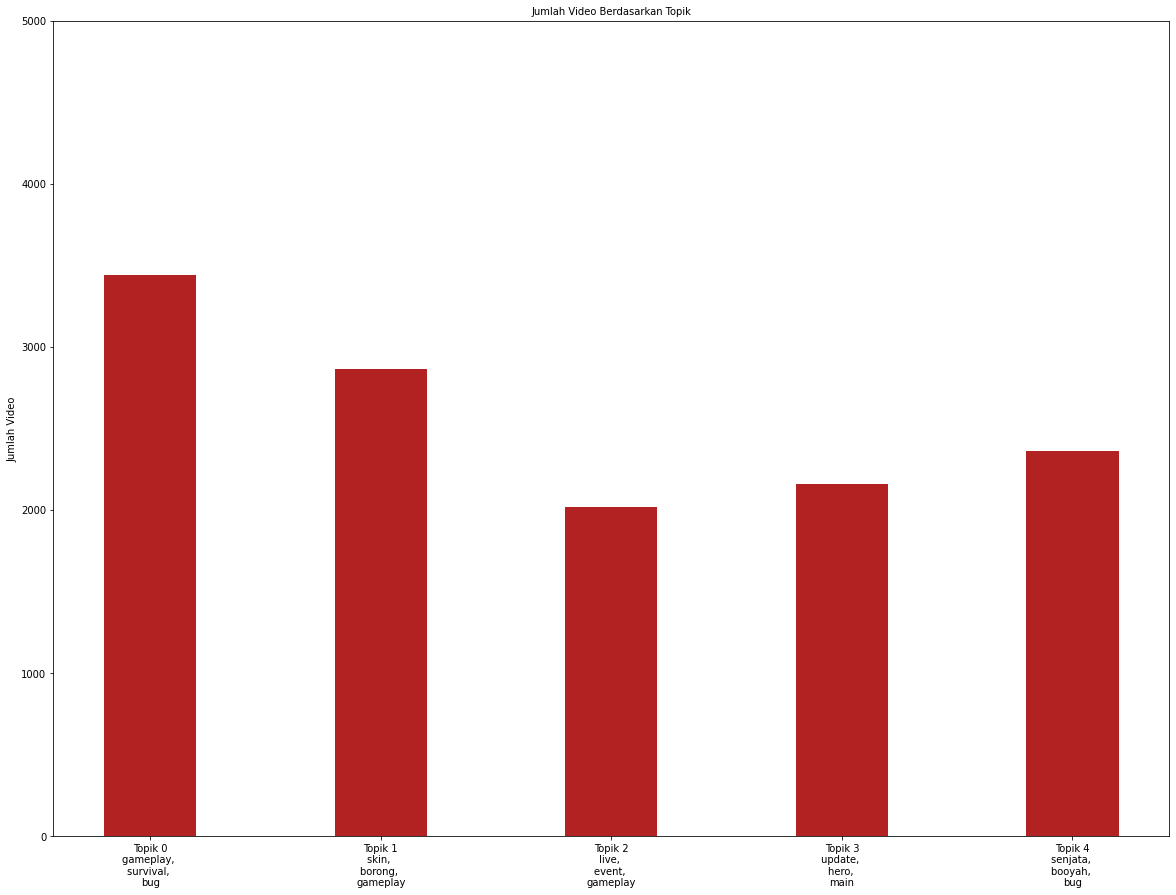

In [2]:
# -*- coding: utf-8 -*-
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle 
import numpy as np, pandas as pd
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

random_state = 0 

doc_set = """


StartDataYoutuber

start data_bud1
BAPAK INI UDAH COCOK JADI MANDOR  GOD OF WAR
BUDI01 GEMBEL VS CODEX GAMING
PRUSTASI SOLO SQUAD  MASUK TRAINING SOLUSINYA   
NGEJAMED DI  TAHUN FREE FIRE
DAPAT SURAT CINTA  TAHUN GARENA ISINYA  
LAGI NYAMAR BEBAN CS ADA YANG NGEMOT PULAK LAH
APAKAH TUKANG SATE INI BERPIKIR DENGAN DENGKUL  
DI VIDEO KALI INI  
BERKAT MAT1 SURI  SQUAD KENA PEPENGSUT
LAGI SAKIT KETEMU PULAK ANAK ANGKAT
SI BOTAK SUKA NYUNDUL KEPALA ORANG
NGUSIR HANTU PAKEK SENTER
NANI  DOUBLE AWM KU TAK NYANGKAH BISA KILL  
JADI CHARLY ES TEH DUA GELAS TANPA VEST 
MEMBONGKAR BONGKAHAN MAGIC CUBE   DIAMOND ADA YANG PERMANEN  
LAGI PAKEK MINI UZI DIAJAK ALIANSI SAMA KANG CEPCIL  
GAK ADA SERAM SERAM NYA  
JADI TUKANG KEYBOARD  MENCARI LANGGANAN   
ADU COLLECTION   PAKAI JURUS TERAKHIR MELAWAN DYLAND PROS 
KENAPA HARUS SEPATU JORDI
LAGI NYOBAIN UPDATE BARU  ADA PULAK NGAJAK ALIANSI  
DIAMOND SEKARAT  GAK HOKI NGESPIN   TERPAKSA PANGGIL ORANG DALAM 
PEPENGSUT DI RANGKED
AKHIRNYA MAIN DI HP
BUDI GEMBEL VS IBU IBU BELUM MANDI
SEANDAINYA TANGANKU UDAH CEBOK BAKALAN HOKI  
ENGGAK SENGAJA   BISA PULAK MAEN RANDOM  
SHOTGUN  JUTA BAU CONGOR BEBEK
BAJU MEMPERGANTENG PRIPAYER
RANGKED RASA CLASSIC
COMEBACK DOUBLE AWM  SOLO VS SQUAD KILL    
KELEN MAU JAGO MAEN SOLO RANK MASTER TANPA SKIN SENJATA   KELEN TENGOK LAH INI 
NENGOK ORANG NGEBUCIN   JADI JAGA NYAMUK  
ATTACK TITAN DI JAMSUT
ARMORED TITAN HAMPIR KENA LEMPAR PICO
EREN PINGIN SUNAT TITAN
MENGAJARKAN DYLAND PROS JONGKOK EAK EAK
SUSAH KALI CARIK MP40 INI   PENING PALA BAWAH KU  
LAGI JADI KRATOS   KOK BISA BUG DAMAGE PULAK LAH  
GARENA JUALAN ULAR COBRA TANPA BISA
BUDI01 GAMING VS FDW
SENGOK NYA MELEWATI SUNGAI
KOK JADI DRAMA
BANYAK GAYA DI SIBOLANGIT
SOLO VS SQUAD EXE
UDAH LAMA GAK LAEP
EVENT BULANAN UWOE ID  KILL  DAPAT HP GEMING
MAU MASUK UWOE ID  BY1 DULU YUK 
CHARITY  JAM UNTUK KALSEL   SULBAR  
CHARITY  JAM UNTUK KALSEL   SULBAR
CHARITY  JAM UNTUK KALSEL   SULBAR  
LAGI ENAK REVIEW BERMUDA BARU  EHH KETEMU PULAK KECEBONG HANYUT 
REACTION MIM PRIPAYER  PART2
MENCARI JALAN KELUAR DARI HUTAN
UDAH GAK SABAR MASUK HUTAN
BUDI01 GAMING MAIN TRABASAN DI HUTAN
TIDOR DI HUTAN
MENGAJARI DYLAND PROS PEPENGSUT
DI BALIK LAYAR YOUTUBE REWIND 
REACTION YOUTUBE REWIND   
TOURNAMENT CHRONO MAX CREATOR
OP WARNET KANG TUSUN
TAMBAH BILLING KOM  BANG
NOSTALGIA ANAK WARNET
I MISS U BANDUNG
PAKEK MUKA ORANG YUK BIAR TRENDING 
AKU GAK KUAT    MASIH DUNIA BUDI01
MEMUNCAK KE BUKIT MENGKEK
PERTARUNGAN ADU PEPENGSUT ANTARA LEADER UWOE ID DENGAN MEMBER
THANKS  JUTA SUBS
KAMI MAU BERPERANG BUKAN BERTAMU
MENCIDUK MAL1NG
JEMPUT BANG RIO TERJADI SESUATU YANG TIDAK DI INGINKAN
PERTAMA KALI KE JAKARTA
DYLAND PROS MASUK OP WARNET
REACTION MEME PRI PAYER  PART1
SOLO VS SQUAD DOUBLE SHOTGUN IN RANKED DIAMOND  KILLS 
KANGEN PAKAI SCAR CUBIT LANGSUNG KEPLESET DI BERMUDA
MALAM INI KITA GANTENG
SEMANGAT LETDA HYPER   
REACTION DRAW MY LIFE INDONESIA INDONESIA BUDI01 GAMING
 JUTA SUB BARU CENTANG 
OP WARNET LATIHAN CLASH SQUAD UNTUK LAWAN BOCIL DI GLOBAL   
KASIH SAYANG KEPADA ORANG TUA  BANYAK PEPENGSUT  FREE FIRE INDONESIA 
DUO VS SQUAD FT  EVOS MR05 HABIS RATAKAN PEAK LANGSUNG NGOPI   
SEMOGA ELITE PASS SEASON  DIKELUARKAN
WEIRD GENIUS   LATHI  SEDIKIT ADA PEPENGSUT  FREE FIRE INDONESIA 
BERAKIT RAKIT KITA KE HULU 
HALO UWOE 
AKHIRNYA MEMBERSHIP DIMULAI 
MEMBERSHIP COMING SOON 
DOUBLE AK DRACO SANGATLAH MENGGODA   
AKAN INDAH PADA WAKTUNYA 
APA CERITA KITA NIH 
MALAM MINGGU KITA NIH CERITANYA   
MALAM MINGGU KITA NIH CERITANYA   
ROAD TO GRANDMASTER SEASON  SOLO BARBAR BUDI01 GAMING
LOGIN DAN MAIN GEM EPEP
BORONG SENJATA PEPENGSUT MEMATIKAN NYAMUK   
BENTARAN AJA   
RASANYA ANJIM BNGET 
PRIA TERSAKITI 
MALAM ITU GELAP 
MARI KITA JONGKOK EAKEAK MALAM INI   
KANGEN WE  
KETIKA ANAK MEDAN MAEN FREE FIRE   
FREE FIRE SUDAH TIDAK BURIK LAGI   
TUTORIAL BALIK KELOBBY   
DARI SHOTGUN INI AKU SEMAKIN SEMANGAT JONGKOK EAK EAK   
BUDI01 GAMING VS DYLAND PROS
BONGKAR ISI VAULT SENJATA   ITEM LANGKA BUDI01 GAMING   
TUKANG BECAK UNBOXING KALAHARI 
KAMI BEREMPAT INI BUKAN BERTIGA LOH  
BUYUNG APA ITU MAN   BUYUNG BUDI   
KETIKA PANUAN EPEP MENJADI SATU   
REACTION EDITOD BERKELAS   YAHAHAHA HAYUK  
AKHIRNYA CITA CITAKU BERHASIL MENDAPATKAN SCAR TITAN   
IPIN   KAPAN KAU GEDENYA  
MENUJU KEMENANGAN   
MAU PATAH PINGGANGKU KEJAR PLAYER MENGGOCEK   
JADI TUKANG ANGKAT KERANDA KETEMU MAKHLUK HIDUP BUCINAN EPEP   
SEGAR   JIKA KETEPAK KETEPUK KEPALA ANAK ORANG  
NANI   BUDI01 JADI JAMET  AUTO DINDING BADINDING  
PERTAMA KALI BUDI01 GAMING NGEPUSH  
LAGI LAGI   NGEDAB DI DEPAN MUSUH   MENGGOCEK  SQUAD DI BRAZILIA  
BUNDLE PETIR   BUKAN SEMBARANG PETIR  
LUAR BIASA   BARENG WAWANMKS  MOZILA  CODEX GAMING TOTAL KILL   
GILA   DIKROYOK  SQUAD MASIH SEMPAT NGEDAB  
GARA GARA MENGEJAR HADIAH  MENTALKU KUAT   
POKOKNYA BUDI01 GAMING JADI BUDI01 GIMANG   
BERBURU PLAYER NGENDOK DI MASTER   
MENTAL DOWN FIX IT   
MENTAL DOWN FIX IT   
ASLI NIH TUKANG PARKIR ADA ADA AJA   
MOHON DI REPORT FANSPAGE PALSU   ADA DI DESKRIPSI  
DANGER ITU MITOS  
BOT JUGA MANUSIA   ITU BAGUS  
TETAP DIRUMAH  JANGAN NONGKRONG 
TERIMA KASIH UNTUK  JUTA SUBREKNYA UWOE   
BORONG INCUBATOR MP40 RASA KNALPOT NINJA   
 
MENGGOCEK  SQUAD ITU BUKAN HAL YANG MUDAH   
TUTORIAL TIPS   TRIK SOLO VS SQUAD ALA BUDI01 GAMING   
BARBAR DI RANK MASTER   SAMPAI 6X BOOYAH   FREE FIRE INDONESIA  
BUNDLE RAGNAROK  
ITU BAGUS  
NICKNAME BARU  
BUDI01 GAMING KERASUKAN TOPENG SAMURAI  
KETEMU ULAR KOBRA BARENG WAWAN MKS  
UPIN BERKELANA DI FREE FIRE   
JADI GTA LUPA PENCET CIT HESOYAM  
KENAPA GARENA   KENAPA  
EMOTE ENEMY   EPIC MOMENT M1887 HEADSHOT FREE FIRE INDONESIA 
NANII    SATU SERVER TURUN DI BRAZILIA   ZONA PERTAMA SUDAH BOOYAH  
INI MALAM MINGGU YA
RANK DI MASTER MASIH BISA BARBAR FEAT GURU FRONTAL GAMING   
DARI PLAYER PLAYER INI KITA BISA BANYAK BELAJAR DARI MEREKA   
HABIS MULUNG MAIN EPEP   HAYUKKKK  
BESOK SENIN 
BAKU HANTAM YUK  
LAGI CARIK PINTU FREE FIRE BARENG GURU FRONTAL GAMING   
MENJADI KULI BANGUNAN ITU BUTUH PERJUANGAN YANG BERAT UWOE  
JADI RICARDO MILOS INGIN BERANTEM YUK  
GIVEAWAY  JUTA SUBS
CONGRATULATIONS    JUTA SUBSCRIBER 
PINGIN PANGKAS BOTAK SEPERTI BAPAK INI LAH  
BERBAHAYA JUGA JADI ROY KIYOSHI   DAPAT KIRIMAN NYAMUK   
SANGAT TERBAIK   JAGO MENGGAMBAR KARAKTER FREE FIRE DI INDONESIA   REACTION  
HAYUUUUUKKKKKKKKKKK MABAR UWOOOOOOOEE
HAYUUUUUKKKKKKKKKKK MABAR UWOOOOOOOEE
JADI POLWAN SOLO VS SQUAD PAKAI DOUBLE SHOTGUN   
SESUAI PERMINTAAN KELEN   SOLO VS SQUAD JADI JOKER  
AKU PENSIUN JADI PRE MAKAN
JANGAN KREAK KREAK KALI SAMA REY MYSTERIO   
PERTAMA KALI AKU MEMECAHKAN REKOR DAMAGE 5000AN DI SOLO RANGKED  
MAU MENYICIPIN RASANYA MENJADI TOP GEMBEL KILL  
MAEL NIH  BUKAN KALENG KALENG  
BUDI01 GAMING NYAMAR JADI ATTA HALILINTAR  
AKU TOBAT GARENA    AKU TOBAT   JADI MALING DI FREE FIRE  
BUDI01 GAMING EXE
INI SAATNYA AKU FESKEM UWOE 
JUTAAN ORANG TIDAK MENYADARI BAHWA BUDI01 GAMING ITU ADALAH  
MENJADI TENTARA PENEMBAK JITU TANPA HELM   VEST  FREE FIRE INDONESIA
BERBURU ADEK ADEK SUKA NGENDOK GAMING    FREE FIRE INDONESIA
JADI BENC0NG DI FREE FIRE ITU   KAYAK ADA MANIS MANISNYA   
BUDI01 GAMING BANTUIN RAMBUT OBBYPHY SAMPAI BOTAK  
HIGHLIGHT KILL SOLO SHOTGUN   AWM BUDI01 GAMING  FREE FIRE INDONESIA
DUA TUKANG PARKIR KETEMU AURA ESPORT   FREE FIRE INDONESIA
SQUAD RANDOM NYAMAR JADI BOT DI KATAIN KAMBENG  FREE FIRE INDONESIA
MABAR UWOE
SUSTER NGESHOT MENYUNTIK M4TI PASIEN YANG LARI   FREE FIRE INDONESIA
AKU HANYA BISA MEMBUNUH BOT  DENGAN DOUBLE SHOTGUN KU 
TUTORIAL CARA JONGKOK EAK EAK   FREE FIRE INDONESIA
ALASAN LENGKAP MENGAPA AKU TIDAK DI ETERNAL LAGI  
ISI VAULT BUDI01 GAMING KOK SEMUA GRATISAN   FREE FIRE INDONESIA
WAHAI PARA UWOE
DUO VS SQUAD FEAT CODEX GAMING NYAMAR JADI FRONTAL GAMING 
TUKANG PARKIR VERSI PEREMPUAN KENA KARMA ALIANSI 
BENTARAN AJA
AWAL SEASON SUNGGUH NIKMAT SEKALI  FREE FIRE INDONESIA
DOUBLE AWM  SOLO ITU LEBIH MENYENANGKAN  FREE FIRE INDONESIA
DEMI SUBREK  NYOBAIN FACECAM  APAKAH SUBREKKU BECANDA   
KILL MONTAGE SHOTGUN BUDI01 GAMING  FREE FIRE INDONESIA
TES JARINGAN 2MBPS BISA GAK YA  
BOSAN NGEKILL TERPAKSA PANGGILAN JIWA ALIANSI  FREE FIRE INDONESIA
SOLO VS SQUAD DI GANGGU SAMA NYAMUK MALAM  FREE FIRE INDONESIA
PAKAI BUNDLE EP SEASON  LANGSUNG JONGKOK EAK EAK 
TUKANG PARKIR KEMBALI LAGI MENGULAH DI BERMUDA  FREE FIRE INDONESIA
FULL SQUAD ETERNAL BARENG LETDA HYPER ETER GUGUN   TOP GLOBAL GRANDMASTER 
SOLO VS SQUAD PAKAI JURUS JONGKOK EAK EAK BISA KILL   
SOLO ITU PENIKMAT NGENDOK GAMING  FREE FIRE INDONESIA
MENCARI PLAYER NGENDOK SOLO MASTER  FREE FIRE INDONESIA 
MENGGOCEK MUSUH SAMPAI DIA LELAH  FREE FIRE INDONESIA 
PAKAI CROSSBOW MENJADI PEMANAH YANG BAIK  FREE FIRE INDONESIA
SOLO VS SQUAD DOUBLE AWM SANGAT GREGET MAKSIMAL  FREE FIRE INDONESIA 
KAR98K GAK KALAH JAUH DENGAN AWM  FREE FIRE INDONESIA 
AWM ITU RASANYA SANGAT UWOEEEE  FREE FIRE INDONESIA
WAK JANGEK SUKA NGEDAB  FREE FIRE INDONESIA
NYAMAR JADI TEKAB   NGELEK NGELEK DOT KOM  FREE FIRE INDONESIA
AURA GRIZZLY   BUDI01 GAMING MEMUSNAHKAN BERMUDA 
NYAMAR JADI BOT CUKUP MENEGANGKAN  FREE FIRE INDONESIA
TUKANG BEGAL KENAK BEGAL  FREE FIRE INDONESIA
DUAL MP40 SUNGGUH MERESAHKAN MUSUH  FREE FIRE INDONESIA
NYAMAR JADI FRONTAL PAKAI AN94 AUTO BURIQ  FREE FIRE INDONESIA
BUDI01 GAMING DITEMANIN OLEH FITRI   FREE FIRE INDONESIA
AWM KU PENUH DENGAN CITA RASA  FREE FIRE INDONESIA
PAKAI BUNDLE CRIMINAL BLUE LANGSUNG SOLO VS SQUAD  FREE FIRE INDONESIA
DUO VS SQUAD BERSAMA FDW  FREE FIRE INDONESIA
MENJADI NGENDOK GAMING YANG BAIK  FREE FIRE INDONESIA
JANGAN CURIK TUTUP PENTIL BAN ORANG  FREE FIRE INDONESIA
DUO DENGAN CEWEK  SALMON DARAT  FREE FIRE INDONESIA


start data_dyland
AWALNYA DIHINA JADI BOT PAS JADI SULTAN PADA KAGET 
GILA GARENA SKIN COBRA MALAH DIJUAL LAGI SEHABIS JENGGOT BNL
REUNI YOUTUBER FF ADA SIAPA AJA  
KERASNYA CLASH SQUAD GRANDMASTER  BINTANG  
GW HAPUS FREE FIRE
BOCIL PUNYA BUNDLE INI GAK  LEBIH LANGKA DARI JENGGOT BNL  
400BOX DAPET BERAPA MAGIC CUBE     HOKI APA TIDAK 
BORONG JENGGOT BNL MURAH MERIAH SAMBIL NANGIS
GW KECEWA  JENGGOT BNL DIJUAL LAGI   GARENA KENAPA 
DITELPON BOKAP DISURUH BALAP BADGE LOKESH GAMER   SAMPE DIAMONDNYA ABIS 
TIPS 1X CLICK LANGSUNG DAPET BUNDLE FADED WHEELS BARU  
ABISIN  TICKET WEAPON ROYALE TERBARU  
BISA MURAH  INI TOTAL DIAMOND UNTUK MP40 EVO GUN  
BALAP BADGE KOK CUMAN SERIBU     LOKESH GAMER KITA BANTAI 
EVOS RASYAH SIAP NGALAHIN PROPLAYER   SIAPA YA    THE DYLAND SHOW EP  
TIM BARU EVOS FREE FIRE ISINYA BOCIL EPEP       THE DYLAND SHOW  
RELA ABISIN DIAMOND BORONG SHOTGUN UNGU PALING GG KELUAR LAGI   
BELI 2JUTA GOLD ABISIN  7JUTA DIAMONDS  TOP GLOBAL GOLD  
SULTAN PERTAMA KALI NYOBA FREE FIRE MAX  GRAPHIC ULTRA   
 HP FREE FIRE MAX ANTI KENTANG  BUAT KALIAN 
ULANG TAHUN DYLAND PROS DICULIK 
PRANK JADI BOT SULTAN DI KICK DIKATAIN BADGE CONFIG SAMA BOCIL   KITA KASIH TAU 
MP5 INCUBATOR OP PARAH  BORONG SAMPE  EVOLUTION STONE 
APA DYLAND PROS PUNYA BUNDLE SEASON  ELITE PASS   
NGESPIN KATANA COBRA MALAH KETEMU BUG MATI KE TANAH   
BADGE DIBALAP LOKESH GAMER  SAATNYA KITA TUNJUKAN KEKUATAN INDONESIA  
1KILL 1JUTA CEWE GW AUTO KAYA  
SULTAN FREE FIRE BALIK  TOP UP    DIAMOND 
HOKI BANGET SPIN SKIN TINJU SEHARGA 3JUTA   KEREN PARAH 
PRANK NYAMAR JADI BOT SULTAN DIKICK   GW KASIH EMOT INI BOCIL KAGET 
SULTAN BULAN DEPAN JADI TOP GLOBAL BADGE LAGI  
TERIMA KASIH FREE FIRE 
CARA SPIN BUNDLE TERMINATOR BIAR HOKI  
TOPENG INI BIKIN ANAK FF TAKUT BARBAR   SIAPA YANG MAU DI GIFT 
MYSTERY SHOP LAGI   AUTO BORONG  
SIAPA YANG MAU JENGGOT BNL   GIVE JENGGOT BNL KE BANYAK ORANG   
CHEATER MANA TAU RASANYA PUNYA TOKENS     
LAGI BORONG THOMPSON BARU MALAH DAPET MAGIC CUBE 8BIJI   
REVIEW GLOOWALL BARU EFEKNYA LEBIH GEDE  
BUKA SEMUA CRATES DI AKUN FF DYLAND PROS  
REVIEW GROZA BARU  SENJATA TERLUPAKAN JADI DIINGAT LAGI  
BOSUPROS BUBAR   
MYSTERY SHOP MERDEKA   BORONG DAPET DISKON SPECIAL  AGUSTUS
HARUS   BADGE SAMPE RESET  ANGKA CANTIK   
DAH LAMA GA SPIN APA DIKASIH HOKI MANTAN TOP GLOBAL BADGE INI  
DAPET JACKPOT  DIAMONDS   ADA CARANYA  
NASEHATIN BOCIL EPEP DAN GIFT DIA TOPENG  
SULTAN JADI HACKER AUTO BORONG HACKER STORE SAMPE TAMAT  
SPIN INCUBATOR MALAH DIMINTAIN WUKONG SAMA BOCIL ALOK  
NIAT NYARI TEMEN MABAR MALAH DIKATAIN BOCIL SAMA CEWE  
BORONG INCUBATOR DEMI  EVOLUTION STONE  
AKHIRNYA XM8 2JUTA  AUTO BORONG UPGRADE SAMPE LEVEL MENTOK  
KETEMU SULTAN DICLASH SQUAD PAMER EMOTE  JUTA   AUTO ADU EMOTE 
REVIEW GLOOWAL BARU MUSUH GA BISA LEWAT DI CLASH SQUAD  
BORONG UPDATE TERBARU  TANGAN PEMBAWA HOKI SEKALI KLIK LANGSUNG DAPET  
BELI BADGE  ANGKA YANG SANGAT CANTIK  
GARA GARA INI BIKIN GAGAL BADGE ANGKA CANTIK  
LOKESH GAMER KASIAN BADGE NYA DIBALAP CHEATER   GW RESPECT 
GARA GARA CHEATER BADGE  SULTAN TIDAK MAU KEMBALI  
DYLAND PROS PENSIUN 
TERNYATA MIAWAUG ADALAH YOUTUBER PERTAMA YANG MAIN FREE FIRE  
GARENA BAIK  MYSTERYSHOP BELI  GRATIS   
BADGE DIBALAP ORANG VIETNAM GW MARAH  TAPI DITENANGIN SULTAN 
NGAJARIN TRETAN MUSLIM MAIN FREE FIRE 
RENDY RANGERS SENANG MELIHAT BUNDLE INI 
BELI MCLAREN BUAT MODUSIN CEWE DI TRAINING  
BORONG TAS SAYAP BISA DI PAKE DI LOBBY KEREN PARAH  
JUAL MOBIL DEMI BALAP BADGE 
ABIS POTONG SAPI ALOK LANGSUNG BORONG SEMUANYA  KETEMU BOCIL SOPAN AUTO GIFT  
DETIK DETIK ALOK SAPI 1TON DIPOTONG  
TOPUPIN 2JUTA BUAT ADIK GW LANGSUNG DIBELIIN SCAR MEGALODON  
REVIEW SHOTGUN  WINTERLANDS  AKHIRNYA GW PUNYA 
SULTAN BELI SAPI  TON BARENG PAPI PROS   ALHAMDULILLAH 
DI INVITE EVOS MR  DIAJAKIN RANKED AUTO RATA  BRAZILIA  
SPEEDRUN BORONG CELANA ANGEL  
AKHIRNYA DI TOPUPIN 500RIBU DIAMOND SAMA SULTAN FF  
CARA BUKA 4000BOX DALAM  VIDEO  
SULTAN FF MARAH LIAT DIAMOND SISA  LANGSUNG MAU DITOP UPIN  
KEGILAAN PERSATUAN YOUTUBER FREE FIRE TOURNAMENT HADIAH 200RIBU DIAMOND  
NEKAD  ABISIN DIAMOND SULTAN SAMPE   
CARA SETTING EMULATOR FREE FIRE AGAR JADI UWOK  
TUTORIAL NGABISIN DIAMOND FREE FIRE  
JANGAN SPIN DIAMOND ROYALE BARU  KALI  DAPET ITEM INI 
BUKA  KOTAK MAGIC CUBE  
PACAR NOTNOT ANAK EVOS        THE DYLAND SHOW EP   
KENAPA EVOS FREE FIRE KALAH DI FFWS     THE DYLAND SHOW EP   
BADGE GW DIBALAP ORANG VIETNAM   GW MARAH DAN ABISIN DIAMOND  
NYOBA MAIN FREE FIRE DI PC 100JUTA LANGSUNG REFLEK RUWOK  
NYOBA KARAKTER BARU D BEE GILA SKILLNYA PEPENG JADI GAMPANG  
SULTAN MARAH LANGSUNG TOPUP IN DYLAND PROS PAS LIVE   AUTO BORONG BADGE 
ADU KOLEKSI SENJATA  FRONTAL GAMING VS DYLAND PROS  GURU DAN MURID   
CELANA ANGEL  KELUAR DI INDONESIA AUTO BORONG GILA  
FREE FIRE MAU DI BLOKIR  TRUS GIMANA NASIB GW 
SIAPA YANG UDAH PO ELITE PASS BARU   SULTAN PROS SIAP SIAP 
RIZALMUK TUMAN VS DYLAND PROS  DUEL VAULT TERKERAS SAMPE KENA MENTAL  
BELI BUNDLE NAGA BIRU NAMBAH DAMAGE NAGA 2JUTA 
BUKA  KOTAK MISTERIUS  
INDONESIA NOMOR  LAGI   BERKAT KALIAN DAN GARENA INDONESIA   
BORONG SKIN MAGIC CUBE DAN INCUBATOR LEGEND  
NGEBUT DAN NOBAR FAST N FURIOUS     PROS VLOG
DAPET  MAGIC CUBE  DARI  BOX MAGIC CUBE BONGKAR SEMUA  
BORONG BUNDLE BARU MACAN EVOS  
DETIK DETIK BUG TOP UP SERVER PK KEBANNED SEMUA   TOP GLOBAL BADGE IS BACK  
CHEATER BADGE DIBANNED   SHORTS
CHEATER BADGE MULAI DIBANNED   LOVE U GARENA 
ABISIN  TICKET WEAPON ROYALE SULTAN BORONG WEAPON ROYALE BARU  
CERITA DEWASA KELLY DAN ALOK 
BOCIL SENANG GW BORONG JORDAN LAGI   
REAKSI GW JORDAN DIJUAL DI INDO  ‍♂️
BUDI01GAMING NANTANG DUEL KOLEKSI SENJATA   GILA TERNYATA LENGKAP KOLEKSINYA 
KLARIFIKASI CHEAT TOP UP DI SERVER PAKISTAN YANG BALAP BADGE GW   GW KECEWA 
SIAPA YANG BALAP BADGE GW  SEMUA DARI REGION PAKISTAN  APAKAH CHEAT 
BORONG SEMUA INCUBATOR M60 BARU MODE SULTAN  
MOBIL MCLAREN  MILYAR DIBUFF DI FREE FIRE
ASU  BORONG SEMUA UPDATE BARU TANPA RAGU  SETELAH MENUNGGU LAMA ERROR  
FF MAINTENANCE JADI GW KATAIN SHOTGUN KOK MURAH 
YOUTUBER INDIA INI GA TERIMA DAN NANTANG GW DUEL VAULT LAGI   BANTAI GA  
BADGE GW DIBALAP ORANG INDONESIA DAN DI REMEHIN  INI RESPON SULTAN 
BELI MUSTANG MOBIL IDAMAN MASA KECIL SULTAN   ALHAMDULILLAH 
TOP UPIN ADEK BOCIL GW 2JUTA BUAT BELI SHOTGUN NAGA   HADIAH ULTAH 
JUTAAN ORANG GAK TAU RASANYA PUNYA PEMINDAI    AUTO BOOYAH  
BUKA SEMUA CRATES YANG ADA DI VAULT SULTAN   PULUHAN RIBU CRATES 
RELA TOP UP BANYAK DI SERVER EROPA DEMI TAS SAYAP   JORDAN DAN BAJU LANGKA   DIJUAL LAGI 
SULTAN FREE FIRE NGABISIN 120JUTA RUPIAH TANPA RAGU     FREE FIRE INDONESIA
DITANTANG DUEL SKIN SENJATA SAMA YOUTUBER TERKAYA DI INDIA   AS GAMING KITA BANTAI 
FINAL DETIK DETIK KEMENANGAN PHOENIX BOOYAH 4X     NICE TRY TIM INDONESIAKU    
MATCH  INI DIA EVOS YANG GW TAU   DON T PLAY PLAY BOSKU RATAKAN    
MATCH    GW SEDIH  TIM INDONESIA TOO SOON   KENAPA    
MATCH  SINTING  TIM PHOENIX BOOYAH 3X BERTURUT TURUT HOKI ATAU JAGO    
MATCH  ADA APA DENGAN SAM13   LETSGO EVOS TUNJUKAN MACANMU    
MATCH  KEGILAAN FR JOKER DIRONDE PERTAMA MEMBUAT MUSUH KETAR KETIR    
AKHIRNYA DYLAND PROS PUNYA CELANA ANGEL   SULTAN BORONG SEMUANYA 
RELA TOP UP    DIAMONDS DEMI BORONG SEPATU OLD DIJUAL LAGI  
PRANK GLOBAL MALAH DIKICK  TAPI KETAR KETIR LIAT BADGE SULTAN AUTO NANGIS  
ADU ISI VAULT SET JORDAN SAMA WILLIAM GZ   SIAPA YANG MENANG    
BOCORAN MOBIL SUPERCAR TERBARU FREE FIRE 
NGAKAK  INI DIA PEMENANG GIVEAWAY PS5 INDONESIA 
UNBOXING SEPATU JORDAN FF ASLI 
BOCIL FF TOP UP MALAH DISURUH FREE STYLE  
RELA BORONG SEMUA SHOP BIAR DUEL KOLEKSI VAULT MENANG  
PENGUMUMAN PENTING    SHORTS
SET BNL TERNYATA SIMPLE TAPI KEREN   KALIAN BISA COBA 
DUEL KOLEKSI SENJATA GM FREE FIRE VS DYLAND PROS   GILA SENJATANYA KALAH   BANNED 
ANAK KECIL GA BOLEH NONTON 
LARI ADA WIBU 
DAPET  MAGIC CUBE  DEWA MAGIC CUBE DI DUNIA KEMBALI  
BADGE GW DIBALAP LAGI  ABISIN 1JUTA DIAMOND BELI   BADGE  
BUNDLE SULTAN BORONG MYSTERY SHOP  DAPET DISKON GEDE PARAH  
LEBARAN KELUARGA DYLAND PROS 
LEBARAN BALAP BADGE YOUTUBER INDIA ABISIN    DIAMOND  
TAKBIRAN   SHORTS
BESOK LEBARAN  
RELA BORONG SEMUA SKIN SCAR XM8 MP40 INCUBATOR PADAHAL UDAH PUNYA 
SULTAN MOGOK BELI BADGE   KARNA GW GA BELI INCUBATOR  
BNL VS DYLAND PROS DUEL KOLEKSI VAULT   PENCETUS JENGGOT BNL   LENGKAP 
SULTAN BORONG GEROBAK BUAT BUKA PUASA GRATIS  
BORONG MYSTERY SHOP TAPI CUMA 5HARI WAKTUNYA  GARENA BERCANDA 
BORONG SHOTGUN  M1887 KUALITAS 2JUTA   NO RELOAD COK 
DUEL KOLEKSI SENJATA SAMA LETDA HYPER  LENGKAP PARAH MP40NYA  
TOP UPIN 10JUTA BUAT PACAR GW  DIA MINTA SHOTGUN LEGENDARY 2JUTA  
SEWA HOTEL BUAT BUKBER PROSERS DAN KELUARGA 
BORONG SHOTGUN LEGENDARY M1040 SULTAN UPGRADE SAMPE LEVEL MAX  
ABISIN 1JUTA DIAMOND BUAT BORONG KATANA IJO DAN SEMUA DI SHOP 
SULTAN TOP UP 140JUTA   1JUTA DIAMOND LANGSUNG NGAMUK BELI BADGE  
GW NIKAH 
BALAP BADGE LOKESH GAMER DIDEPAN YOUTUBER INDIA SAMPE DIA KENA MENTAL  
PACAR MR05 DAN KAKAK EVOS STREET YANG CANTIK     THE DYLAND SHOW EP   
PERSIAPAN FFWS EVOS DIVINE  MEREKA SAMPE LEBARAN DI SINGAPORE     THE DYLAND SHOW EP   
BYE LOKESH GAMER  YOUTUBER INDIA INI ABIS DIAMONDNYA KARNA BALAP BADGE GW  
ADU KOLEKSI SKIN SENJATA SAMA FDW   TERNYATA DIA LENGKAP BANYAK SENJATA OLD 
DAPET HAMPIR  MAGIC CUBE  BUKA  CRATES ISI MAGIC CUBE SAMPE YOUTUBER INDIA KAGET  
TOP UP 1JUTA BUAT BOKAP GW  DIA MAU AK NAGA 2JUTA    
WAW  TERNYATA GW PUNYA SEPATU JORDAN   KEREN PARAH 
DUEL KOLEKSI ISI VAULT  LAWAN RENDY RANGERS TERNYATA DIA GA ADA BAJU INI  
TUKER CHARACTER LEVEL CARD DAPET   UNIVERSAL FRAGMENTS  
BOCIL TONTON SAMPE ABIS  REAKSI FREE FIRE MAU DIBLOKIR  
OH INI TANGAN UNGU YANG YOUTUBER INDIA PUNYA  BORONG SEMUANYA  
PLAYER OLD NANGIS PLAYER NEW SENANG  TURTLENECK DIJUAL LAGI 
DUEL KOLEKSI SENJATA  YOUTUBER INDIA VS DYLAND PROS SIAPA PLAYER PALING KAYA  
WUKONG DICLASH SQUAD BIKIN BEBAN CS JADI PRO  
LATIHAN UNTUK TOURNAMENT WAWAN MALAH AFK  
NANGIS  TOKEN FF ILANG   ABISIN   TOKENS SEBELUM HANGUS  
NGABUBURIT DAN BUKBER ALA SULTAN
TOP UPIN 2JUTA BUAT ADIK GW LANGSUNG BELI AK NAGA 2JUTA DIKASIH HOKI  
GIVEAWAY  PS5 INDONESIA TANPA RAGU  
ADIK GW MAIN FREE FIRE LANGSUNG MINTA AK NAGA 2JUTA   
DISURUH SULTAN BORONG SEMUA INCUBATOR SAMPE  EVO STONE
NGABUBURIT BORONG SEMUA UPDATE BARU KEREN BANGET FF SEKARANG  
KLARIFIKASI DRAMA MISTERY SHOP FF   TONTON SAMPE ABIS 
SAHUR PERTAMA DIRUMAH SULTAN DYLAND PROS
BISMILLAH CYBER BUNNY  EH LANGSUNG DAPET ALHAMDULILLAH AKHIRNYA  
BADGE DOANG GEDE MAIN CUPU 
500X CAPIT GA DAPET DAPET SKIN CYBER BUNNY GILA GW NGAMUK 1JAM 
LAGI BORONG SEMUA BUNDLE BARU MALAH MATI LISTRIK   DAN GA KEREKAM 
GW RUSHER TERKUAT DIBUMI  
KASIAN  DIAMOND LOKESH GAMER SAMPE ABIS SULTAN AUTO NGAKAK DAN BALAP LAGI BADGENYA 
SUBSCRIBER DOANG 13JUTA MAIN KAYA PEMULA  
BORONG AK DRACO 2JUTA BUAT  AKUN UPGRADE AMPE LEVEL  MAX 
DITANTANG LOKESH GAMER LAGI  BADGE GW DIBALAP  KITA TUNJUKAN KEKUATAN KITA    2JUTA DIAMOND 
EVOS RACHEL BA BARU EVOS DIGENITIN NETIZEN     THE DYLAND SHOW EP 
KETIKA DYLAND PROS SOK SOKAN MENCOBA BARBAR SOLO RANKED 
SULTAN FREE FIRE BORONG SEMUA ELITE PASS BARU  TANPA RAGU 
BTS FREE FIRE X ATTACK ON TITAN   DYLAND PROS  SHORT MOVIE 
FREE FIRE X ATTACK ON TITAN   DYLAND PROS  SHORT MOVIE 
BORONG PANCI ELITE PASS BARU NAMBAH DAMAGE RATA SEMUA     KECE ABIS 
BADGE GW DIBALAP DAN DIKATAIN BOCIL  SULTAN FF NGAMUK  
INTIP BONGKAR VAULT AKUN FF KEDUA ISINYA DIACAK ACAK SAMA HACKER
LOKESH GAMER NANTANGIN GW LAGI  SAATNYA TUNJUKAN 2JUTA DIAMOND  
FREE FIRE X ATTACK ON TITAN   OFFICIAL TEASER TRAILER
BORONG ATTACK TITAN EREN   SEMUA RATA DIJUMPSHOT TITAN 
BYE HACKER  LOGIN AKUN FF KEDUA YANG UDAH BALIK  ALHAMDULILLAH MASIH UTUH 
SULTAN ISENG FASTUR  RIBUAN  DIKATAIN GOCENGAN TAPI MINTA GIFT CHRONO  
ALHAMDULILLAH   AKUN FF GW BISA BALIK DIKIT LAGI GUYS  HACKERNYA TOLOL 
DIAMOND EDITOR GW MERAH   GW TOPUPIN 1JUTA   ANTI ILLEGAL 
DIAMOND MERAH BOCIL NANGIS REACTION MEME PRIPAYER PART 
AKUN FREE FIRE GW KE HACK DIAMOND 300JUTA HILANG 
BORONG ARMOR TITAN REINER  GILA ANCURIN TEMBOK BERMUDA 
KETIKA SEMUA KARAKTER FREE FIRE JADI ATTACK ON TITAN   NGAKAK 
DI TOPUPIN WINDAH BASUDARA 1JUTA  BUAT BUNDLE MIKASA DI FREE FIRE   NGAKAK 
AKHIRNYA  BUNDLE LEVI ACKERMAN  KEREN BANGET AOT X FREE FIRE 
ALASAN FREE FIRE COLLAB SAMA ATTACK ON TITAN   PROSPODCAST
DUO MAUT PEPENG  BUDI01 GAMING KAGET LIAT PEPENG GW RATAIN  SQUAD  
DEWA MAGIC CUBE BUKA  CRATES DAPET  MAGIC CUBE  
ANJIR  M4AI INCUBATOR BORONG SEMUA LANGSUNG DICOBA BUNUH SEMUA  
BARU BELI BADGE LANGSUNG DIBALAP ORANG AUSTRALIA   AUTO SUPER SAIYAN BADGE  
CARA BIKIN THUMBNAIL   MENARIK DAN ORIGINAL  
MENGJOGET BARENG GLOBAL DIKATAIN SOMBONG PAKE CONFIG    
SULTAN DIKASIH HOKI     DIAMOND LANGSUNG DAPET FURY SENIOR  CANDA SENIOR 
DIAMOND ROYALE BARU KEREN PARAH  SULTAN SPIN 1000X  
BORONG SHIROU COBRA SAMPE LEVEL MAX  OP BANGET DI CLASH SQUAD
BORONG BANYAK SENJATA TANPA RAGU RAGU 
SULTAN FREE FIRE NGABISIN TOTAL  MILYAR UNTUK TOP GLOBAL BADGE  TAHUN   
BTS ONE PROS MAN   DYLAND PROS  SHORT MOVIE 
FREE FIRE X ONE PROS MAN   DYLAND PROS  SHORT MOVIE 
SULTAN BELI BUNDLE COBRA LEGEND EMOT TERSULTAN  BISA GANTI WARNA 
GILA  NGESPIN TANGAN KOBRA NAMBAH DAMAGE KE MP40 2JUTA    
BONGKAR VAULT AKUN SULTAN FREE FIRE TAHUN   
FREE FIRE X ONE PROS MAN   OFFICIAL TEASER TRAILER
BORONG HACKER STORE ADA THUMBNAIL GRATIS     AUTO COLONG  
GELAPIN LOBBY GLOBAL PAKE EMOT 6JUTA   NGAKAK PADA KAGET DAN MINTA GIFT  
DAPET  MAGIC CUBE   BUKA  KOTAK MAGIC CUBE  
BORONG DAN UPGRADE LEVEL MAX MP40 ULAR COBRA   GILA EMOTNYA  
BORONG 3000CR  AUTO TOP GLOBAL TIKET CUSTOM ROOM   BOCIL BY1 BAHAGIA 
WAH  INCUBATOR BARU   AUTO BORONG DAN ABISIN DIAMOND SULTAN  
PODCAST FREE FIRE PART 
KOMPUTER 100JUTA KESAMBER PETIR  AUTO MELEDUG KAH  
BORONG SEMUA BUNDLE BARU   MALAH MOMENT LANGKA DYLAND PROS BOOYAH 
BOCIL BY  SENANG AKHIRNYA TIKET CUSTOM ROOM DIJUAL  
TOP GLOBAL   TOKENS BORONG BUNDLE FF TOKEN TERBARU   
TOP UP BUAT KACAMATA ALOK BIAR ALOK TIDAK TERLUPAKAN 
BELI DIAMOND ROYALE BARU   SPIN 1000X TANPA PAKE DIAMOND SAMA SEKALI  
SPIN 2000X WEAPON ROYALE BARU  
HAH  BELI  GRATIS  DIKETAWAIN SULTAN GW BORONG EVENT INI    TAPI BUNDLENYA KECE 
SHOTGUN PANJANG DIBUFF   INI BUKAN ERA LO LAGI DUAL VECTOR DAN SHOTGUN  
BORONG SEMUA UPDATE BARU   SULTAN AUTO SENENG KEREN PARAH GARENA  
BOCORAN SKIN FF X AOT  KEREN PARAH COY   BUNDLENYA 
GWS BUAT BOCIL TERJUN PAKE PARASUT KRESEK AUTO KNOCK     PROS REACTION
YOUTUBER INDIA TEMEN LOKESH GAMER BALAP BADGE GW     SULTAN LANGSUNG NGAMUK BAKAR DIAMONDS  
GARENA UDAH GILA  PELONTAR DAMAGE   SEKALI MELEDAK DUAR MEMEG 
SAATNYA DYLAND PROS BORONG SEMUA UPDATE BARU   DISURUH SULTAN ABISIN DIAMONDS CIL 
SULTAN SEMBUH  LANGSUNG BORONG ELITE PASS BARU AUTO TOP GLOBAL  BADGE  
BOCIL NANGIS AKUNNYA DI HACK REACTION MEME PRIPAYER PART 
BORONG BOCORAN ELITE PASS BARU   SEBELUM SULTAN DATENG  
BISA BISANYA BUNDLE BARU INI GW BELOM PUNYA  AUTO BELI  
BY1 SAMA BOCIL ALOK STRES PRANK GLOBAL KEMARIN   KITA BANNED AKUNNYA  
PRANK GLOBAL TAMPILAN BOT MALAH DIKATAIN   DIAJAK BY1 BOCIL ALOK BARBAR 
DAPET  MAGIC CUBE   TOP GLOBAL MAGIC CUBE BAHAGIA 
PROS REACTION MEME PRIPAYER
PRANK GLOBAL NYAMAR JADI CEWE DIKATAIN BOT  AUTO PAMER SCAR DAN AK 4JUTA 
SULTAN SPIN M4AI GENOS HOKI GA YA   KITA LIAT DOA BOCIL 
SULTAN BORONG MYSTERY SHOP  DAPET DISKON BERAPA YA  KALO MURAH SIH KELEWATAN  
PRANK GLOBAL TAMPILAN BOT CEWE SULTAN DIKICK  AUTO PAMER SHOTGUN SAITAMA  PART  
BORONG BAJU TIDUR SAITAMA SEBELUM PRANK GLOBAL  
TAU RASANYA ABISIN   FF TOKENS   BEGINI RASANYA CIL   
KURSI GAMING CYBERPUNK  DAN K DA LOL WILD RIFT DARI SECRET LAB   PROSUNBOXING
BOCIL TAU GAK CARA BELI SEMUA P90 INCUBATOR TANPA PAKE DIAMOND SEPESERPUN  
SAITAMA GENDUT BORONG SHOTGUN PUTER DAN TANGAN ONE PUNCH MAN  
PRANK GLOBAL TAMPILAN BOT SULTAN DIREMEHIN AUTO PAMER BADGE  
BOCIL MANA TAU INI SHOTGUN DUA ONE PUNCH MAN  SAKTI DAN SAKIT 
OH JADI INI YANG BALAP BADGE SULTAN FF     SULTAN NGAMUK   000BADGE
ABISIN  DIAMOND ROYALE VOUCHER SPIN 5000X AMPE OLENG 
KALIAN GA AKAN TAU KALO GW BORONG BUNDLE RAPPER 
BADGE GW DIBALAP PAS LAGI LIBURAN DI BALI  LANGSUNG NGAMUK BELI 80K BADGE 
DAPET  MAGIC CUBE  DARI  KOTAK ELITEPASS ABISIN 2JUTA DIAMONDS 
SAATNYA BORONG SEMUA BUNDLE BARU  
PROS NGANGKANG ONLINE WITH LUCIFER  
BYE BOCAH BUG VECTOR  AUTO BANNED  KITA BERHASIL HILANGIN BUG VECTOR 
BOCAH BUG VECTOR NANGIS DIBANNED     PROS PODCAST 
BUG VECTOR TOLOL MERESAHKAN YA BUND  
BORONG DAN UPGRADE LEVEL MAX SCAR MEGALODON MALAH KETEMU BUG VECTOR  
SULTAN FREE FIRE  TOP GLOBAL BADGE PERTAMA DI TAHUN BARU   NGAMUK 
BYE  DARI SULTANPROS 
111RIBU BADGE TERAKHIR DI   GOOD BYE FREE FIRE  
BORONG FREE FIRE TERAKHIR DI  
REWIND INDONESIA  PROS REACTION    RI2020
 PROSNYAWER TERAKHIR DI TAHUN  
BUNDLE RANK TOKEN TERKEREN SEDUNIA   I LOVE U GARENA  
SULTAN FF DIKASIH PROMO BELI  GRATIS  RONALDO BERCANDA   
BADGE GW MAU DIBALAP BANYAK ORANG  LANGSUNG NGAMUK GA KARUAN 
SAITAMA BOTAK MASUK EPEP   NGUTANG LAGI GAK YA 
AKHIRNYA THOMSON WEAPON ROYALE KELUAR  AUTO SPIN 2000X   
UNBOXING IPHONE  PRO MAX 256GB HP SULTAN FREE FIRE  
BAKAR DIAMOND DI MYSTERY SHOP TAPI KOK GA ABIS ABIS  MURAH TERNYATA 
SPIN DIAMOND ROYALE BARU 4000X DAPET ITEM LANGKA  
SPIN 5000X WEAPON ROYALE DOANG SAMPE TANGAN DIPANGGANG 
GARENA COLLAB SAMA RONALDO NGUTANG     HOAX  
PISTOL DESERT EAGLE   G18 CHRONO TERBARU  DAMAGE AUTO PEPENGSHOT 
INI DIA CHRONO ALIAS CR7 BYE ALOK  
GILAAA  BORONG AUG CYBERPUNK KALI INI PENGGANTI SCAR TITAN  
INCUBATOR BARU CYBERPUNK  BORONG  EVOLUTION STONE    
DEWA MAGIC CUBE BUKA 3000BOX DAPET  MAGIC CUBE  
BORONG SEMUA SKIN RONALDO AUTO GOL BOOYAH   CR7 MANTAP 
BANNED DAN BALAP BADGE GM GOBLOK BANYAK GAYA  SULTAN FREE FIRE NGAMUK 
AKUN GW VERIFIED ☑️ FITUR BARU FF BEGINI CARA DAPETNYA 
BORONG SEMUA UPDATE BARU  GILA GILAAN FREE FIRE LUAR BIASA 
UNBOXING BLACK DIAMOND PLAY BUTTON DARI EMAS ASLI  
GELAP GELAP GELAP 
MENDING RAKIT PC 100JUTA      BUAT MAIN FF MAX ULTRA 8K BIT 
NGESPIN 2000X INCUBATOR SAMPE EVOLUTION STONE     
SPIN 3000X DIAMOND ROYALE PAKE  VOUCHER   DAPET BARANG LANGKA 
DIKASIH SULTAN 3JUTA DIAMOND  JUTA RUPIAH  TANPA RAGU GW ABISIN SEMUA  
SULTAN FF DIKASIH EVENT BEGINIAN  GARENA BERCANDA    
SULTAN FREE FIRE ABISIN 1JUTA DIAMOND  TANPA RAGU 
SPIN 100X INCUBATOR LEGEND SAMPE TUMPAH TUMPAH  
PREORDER ELITE PASS BARU  SULTAN SIAP BORONG SEMUA 
SHOOTING IKLAN FF KETEMU BUDI01 PERTAMA KALI KE JAKARTA  
DYLAND PROS JOIN OP WARNET  AUTO BELAJAR PEPENG SHOT 
PROS UNBOXING PS5 INDONESIA HARGA SULTAN 
BORONG SEMUA UPDATE BARU  BUNDLE  SENJATA  SKIN KEREN SEMUA 
BYE  CHEATER BADGE KENA BANNED  TOP GLOBAL BADGE IS BACK 
BERSAMA  DYLAND PROS SHORT MOVIE 
REVIEW BAJU OLD SEASON  DARI SERVER THAILAND BLACK TURTLENECK  
REVIEW DM ROYALE SERVER THAILAND TERBARU  DI INDO BELOM KELUAR 
CHEATER BADGE LAGI  AKUN NYA DARI THAILAND   HMM   YA SUDAHLAH TUNGGU BANNED SAJA  
AKUN GW NYASAR KE SERVER THAILAND  AUTO BORONG SEMUA SKIN EH MALAH KETEMU RUOK  
BORONG BUNDLE SAYAP HITAM TAPI KOK KALUNG BABI  I 
YANG DITUNGGU  BOSUPROS OPEN MEMBER   GINI CARA JOINNYA 
BORONG SHOPPING SPREE DAN SEMUA UPDATE BARU  NGAMUK COY    NORUOK
YOUTUBER THAILAND HINA YOUTUBER INDONESIA  GW MARAH   PROSPODCAST BARENG LETDA 
BORONG SEMUA INCUBATOR BARU KUALITAS 5JUTA  
AK FLAMING DRAGON VS AK BLUE FLAME DRACO BAGUSAN MANA  
MARAKNYA CHEATER DI FREE FIRE    
SET TERBARU DYLAND PROS KEREN GAK GUYS  
SKIN TANGAN GOD HAND KEREN PARAH  AUTO BOOYAH 
CARA BELI DIAMOND ROYALE BARU TANPA PAKE DIAMONDS  
DI TOPUP IN SULTAN 2JUTA DIAMOND FREE FIRE TANPA RAGU 
MABAR CEWE GW TERNYATA JAGO LOL WILD RIFT AUTO GIFT SKIN   
SET TERBARU DYLAND PROS  COBA PILIH MANA YANG COCOK   
AKHIRNYA BUNDLE SET KELUAR JUGA LUCU PARAH AUTO BUY  
BELI BUNDLE MYSTERY CRATE  SKIN SAMA GLOWALLNYA KEREN ABIS  ROCKER ABIS   
SULTAN LOL BELI SEMUA CHAMPION DAN SKIN DI LOL WILD RIFT 
BADGE KEBANNED AKUN ORANG RUSIA INI KARNA DIAMOND ILLEGAL 
SULTAN FREE FIRE ABISIN 1JUTA DIAMONDS BELI ELITE PASS BARU  
BUKA  MAGIC CUBE BOX AND GET   MAGIC CUBE NO CLICKBAIT
PREORDER ELITE PASS BARU SEBELUM SULTAN BORONG 
SULTAN NGAMUK DIBALAP AKUN TURNAMEN RUSSIA  LANGSUNG BELI   BADGE  
BADGE GW DIBALAP ORANG RUSIA  AUTO BUY   BADGE NO CLICKBAIT 
CARA DAPETIN BUNDLE BARU INI GRATIS  GAMPANG BANGET 
NYOBA AK DRACO BARENG MEMBER CEWE BOSU PROS 
DAPET SEMUA BUNDLE DAN SKIN BOOYAH POWER DENGAN KEKUATAN ORANG DALAM  
SKIN DRACO UPGRADE LEVEL   MENTOK   EFEK DAMAGENYA GILA  
DONATE 6JUTA KE  YOUTUBER TANPA RAGU   PROSNYAWER
BONGKAR ISI VAULT SENJATA DAN ITEM LANGKA TAMPILAN TERBARU   
SKIN AUG AKHIRNYA KELUAR  AUTO BORONG SEMUA DAMAGENYA GILA 
BORONG ITEM LANGKA DI SERVER SINGAPORE KALIAN PASTI KAGET   
  TOKENS  SULTAN FREE FIRE NO  TOP GLOBAL TOKENS 
BORONG DAN REVIEW KARAKTER KAPTEN K  PENGGANTI ALOK BENERAN  
DETIK DETIK TIM ALOK KALAH   LAWAN KUMIS HYPER  SERU PARAH 
WE ARE THE CHAMPION  GOOD BYE AND THANK YOU LOKESH GAMER 
REPLAY DYLAND PROS VS LOKESH GAMER  KITA MENANG 
DYLAND PROS VS LOKESH GAMER 1V1 CUSTOM ROOM FINAL MATCH 
MENCOBA UMP BARU UNTUK DI PAKE BY  MALAM INI SAMA LOKESH GAMER 
GW SAMA FRONTAL BAKAL 1TIM DI TOURNAMENT   SAATNYA LATIHAN 
KAMI MENCOBA AMONG US PAKE NAMA ORANG LAIN   BEGINI JADINYA 
PEMANASAN SEBELUM 1V1 LAWAN LOKESH GAMER   
SULTAN FF BORONG PESTA DISKON MURAH SEMUA GILA  
BORONG SEMUA INCUBATOR XM8 SENJATA TERKUAT DI FREE FIRE  
NEW PET SKIN KYUBI UZUMAKI SABURO NAMBAH DAMAGE  
BUKA  ELITE PASS MAGIC CUBE BOX AND GET    MAGIC CUBE 
BUYING ALL MYSTERY CRATES WITH  1M DIAMONDS   SULTAN FF NUMBER  IN INDONESIA 
DI PRANK JESS NO LIMIT DIFITNAH IMPOSTOR AUTO NGAMUK
NEW DIAMOND ROYALE SULTAN AUTO BUY  
IMPOSTOR 9999IQ PROSFESSOR MENGGAL KEPALA JESS NO LIMIT SAMPE MAKIN BOTAK 
BUYING ALL NEW SKINS WITH    DIAMONDS IN FREE FIRE  BORONG SEMUA 
YOUNG LEX IMPOSTOR  KETAUAN MASUK VENT AUTO LARI EMERGENCY 
THE REAL SULTAN FF  BORONG   BADGE NEW ELITE PASS  SAMPE GA BISA DIBALAP LAGI  GOOD BYE 
BUYING 60K BADGE IN MY SECOND ACCOUNT  YOU RE DONE NOW 
STRATEGI ALOK JADI IMPOSTOR PATAHIN PALA SEMUA YOUTUBER  
BUYING   BADGE WITHOUT BEGGING FOR 5M SUBS  EWWW 
TOP UP    DIAMONDS WITHOUT CLICKBAIT AND BULLSHIT 
BALAP BADGE LOKESH INDIA PAKE AKUN KEDUA SULTAN SAMPE DIA MENANGIS  
BORONG SEMUA UPDATE BARU FREE FIRE GILA MAKIN HD COY NO BURIQ  
ASUS ROG PHONE   THE REAL SULTAN SMARTPHONE  
INI JADINYA KALO YOUTUBER FF MAIN AMONG US  
BORONG KARAKTER BARU DARI INDIA KEREN PARAH BUKAN TUKANG TIPU TIPU  
YOUTUBER INDIA INI BILANG BALAP BADGE GW TAPI TERNYATA TIPU TIPU HAHAHA 
KASIH BUDI01 GAMING 6JUTA DI  PROSNYAWER EPISODE SPECIAL 
SULTAN FF INDO DIHINA YOUTUBER INDIA  HMM LANGSUNG GW GA KASIH BALAP BADGE   SULTAN NGAMUK 
BORONG BORONG MYSTERY SHOP SAMPE SULTAN KESEL KARNA DAPET DISKON   
PEMBUNUHAN DALAM PERSAHABATAN MENJADI KEBANGSATAN    AMONG US  
SHOTGUN  RASA ODADING MANG OLEH DAMAGE IRON MAN ANJENG BANGET  
DYLAND PROS ROOM TOUR   SPECIAL  JUTA SUBSCRIBER
CARA DAPETIN SET PROSFESSOR GRATIS  KEREN PARAH 
BORONG INCUBATOR INUYASHA TERBARU   KECE PARAH SERIUS INI 
BAJAK AKUN ALWIKOBRA TOP GLOBAL RANK MINUSIN RANKNYA   HAHAHA 
BADGE GW DIBALAP YOUTUBER INDIA  LANGSUNG AUTO BALAP AMPE NANGIS 
WEAPON ROYALE BARU P90 DUIT  MUSUH AUTO BELI ALOK  
ULANG TAHUN KE   
PROSFESSOR BORONG SEMUA SKIN MONEY HEIST DAN BOOYAH DENGAN IQ   
BTS FREE FIRE X MONEY HEIST   DYLAND PROS  SHORT MOVIE 
AKHIRNYA SKIN MONEY HEIST KELUAR  VERSI CEWE AUTO BORONG  
AKHIRNYA BY  SAMA GURU JUMPSHOT KU FRONTAL GAMING RAJA SHOTGUN 
FREE FIRE X MONEY HEIST   DYLAND PROS  SHORT MOVIE 
SULTAN FREE FIRE ABISIN  JUTA DIAMONDS TANPA RAGU 
INCUBATOR BARU TAPI LAMA ANJAYYY  
ELITE PASS BARU  BUNDLE KECE  CEWE SULTAN  MOTOR CYBERPUNK BORONG SEMUANYA AUTO BOOYAH 
MIAW AUG  JESS NO LIMIT  HI PATRICK  DYLAND PROS   FALL GUYS INDONESIA
DIBANTAI BOCAH  TAHUN PROPLAYER PAS BY1  RASYAH RASYID BOSU 
AKHIRNYA DAPET MAHKOTA YANG MULIA   FALL GUYS INDONESIA
DITANTANG LEADER AURA NESC BY  SIAPA YANG MENANG   
ERA SULTAN  BORONG SKIN EMAS SULTAN TANPA RAGU BOSU  
DIAMOND GW ILLEGAL MAU DIBANNED GM KULGAR   ADIOS 
DETIK DETIK DYLAND PROS GRANDMASTER PAS BELI INCUBATOR   BUG TERGILA  
DONATE 7JUTA KE  STREAMER   TANPA RAGU    PROS NYAWER EPISODE 
FREE FIRE X PROS MONEY HEIST   OFFICIAL TEASER TRAILER
HAYATO AWAKENING PENGGANTI ALOK   AKHIRNYA KELUAR JUGA 
GAME MOBILE FAVORITE SULTAN PROS 
BANGKITNYA SULTAN MAGIC CHESS AUTO BORONG CHESSBOARD DRAGON ALTAR  
SULTAN INDONESIA  BORONG   BADGE TANPA RAGU   SPECIAL  AGUSTUS 
CAFE SULTAN DISERANG YOUTUBER FF PINTUNYA DICOPOTIN 
DUA TIGA NAIK MOTOR SHOTGUN KOK INCUBATOR 
HAH  5000BOX MAGIC CUBE NUMPUK DI TAS   GAS BUKA SEMUANYA 
INI DIA SET DYLAND PROS  COBAIN DI SOLO RANKED 
KASIH PACAR AKUN KEDUA SULTAN   AUTO SENANG TAPI NOOB 
PISO LEGEND BARU  BUNDLE YONDAIME  MOCO STORE  BORONG SEMUANYA 
ALOK JATOHHH HAYUUKKKK   
PROS BY1 SAMA GM KULGAR KALO MENANG DIBANNED ANJIR  
BIKIN AKUN KEDUA SULTAN TOP GLOBAL BADGE     INDOPRIDE
MENTOKIN SEMUA LEVEL KARAKTER DI AKUN KEDUA BOSU 
SULTAN ISIIN 1JUTA DIAMOND KE AKUN KEDUA DIA   DYLAND PROS SENANG 
AKUN TUA DYLAND PROS YANG HILANG  ADA DARI SEBELUM ELITE PASS SEASON  
BONGKAR VAULT AKUN FREE FIRE SULTAN DYLAND PROS  
BUNDLE ALOK KEMANA    BOSU GABISA DIKASIH ALOK LAGI   
ELITE PASS TERBARU     SULTAN KEMBALI ABISIN DIAMOND  
DETIK DETIK BOSU DAN AGUS DIPOTONG   SAPI DAN KAMBING PROS 
HAH  DIBALAP ORANG MENA BADGE GW  BECANDA YA LU 
UPDATE TERBARU     ADA KARAKTER BARU    LANGSUNG ABISIN AJA   
SULTAN BIKIN SQUAD  BOSU PROS SIAPA YANG MAU JOIN 
SULTAN NYARI SAPI SUPER DAN KAMBING BUAT DIKURBAN 
AKHIRNYA BADGE GW DIBALAP LAGI   HAHAHA HANCURKAN 
SULTAN VALORANT BELI SEMUA SKIN LEGEND PHANTOM TANPA RAGU  
NANTANG BY  BOCAH CALON MEMBER SQUAD BOSU PROS 
AKUN TITAN 1MILYAR SULTANPROS AWAKENING JADI DESTROYER AUTO BANTAI SEMUA MUSUH 
BELI AKUN BOSU SULTAN FREE FIRE
 YOUTUBER INI GW RATAIN BIAR KALIAN DAPET 93JUTA 
TANTANG BY1 KEMAS PAKE Z  KALAH   EDITOR NYA AUTO DIPECAT 
YAKIN PADA GA SUKA BUNDLE INI  KALO MENURUT GW SIH     
DIAMOND PLAY BUTTON DYLAND PROS    PERJALANAN  TAHUN DARI UMUR  TAHUN 
DETIK DETIK MASTER CLASH SQUAD PALING MENEGANGKAN 
BORONG SKIN KUNGLAO CEWEK LEBIH KEREN DARI YANG COWO 
SULTAN ML BALIK BORONG SEMUA SKIN LEGENDS TANPA RAGU  
ABISIN   TOKEN BUAT BORONG SEMUA BUNDLE   
ANJIR  ADA KUNG LAO DI FREE FIRE AUTO BORONG SEMUANYA 
ABISIN BANYAK DIAMOND BUAT DAPETIN BUNDLE KECE TERBARU INI   MABAR SAMA SULTAN GANG  
RAHASIA DAPET BUNDLE ALOK DARI SULTAN   BERHASIL 
INCUBATOR SHOTGUN PANJANG TERGILA SEDUNIA   SEMUA RATA 
NYOBAIN SENJATA NAGA INDOSYUR   ANIMASINYA KEREN ABIS  
PENGGANTI SCAR TITAN DAN CUPID   SCAR INI SANGAT GILA 
INI YANG KALIAN TUNGGU  DITANTANG BY1 SAMA FDW SIAPA YANG MENANG    
AKHIRNYA BORONG INCUBATOR LAGI  ABISIN DIAMOND TANPA RAGU WALAUPUN UDAH ADA 
EDITOR GW MAIN FF  AUTO GW GIFT  BUNDLE ALOK TANPA RAGU   BOSBERKELAS
DITANTANG WAWAN BRAJIL BY    KALAH   DUYUREDITULUS 
SPIN WEAPON ROYALE BARU TANPA PAKE DIAMOND    
DITANTANG BY  SAMA YOUTUBER FREE FIRE PERTAMA   KALAH   PENSI FF  
BUNDLE KEREN INI BIKIN BOSU BERGETAR     FREE FIRE INDONESIA
TOTAL DIAMOND DYLANDPROS   MILIAR RUPIAH   
BORONG   RAMPAGE TOKEN  SEBELUM ABIS 
SULTAN FREE FIRE NGABISIN    DIAMOND TANPA RAGU  
INI DIA  DITANTANG BUDI01GAMING BY      KALAH AUTO TRANSFER  
SULTAN GANTENG BAKAR 10JUTA DIAMOND BUAT GIFT BUNDLE ALOK  
DIKASIH LAPTOP SULTAN 30JUTA CYBERPUNK CANGGIH BANGET   IRI BILANG BOS 
ABISIN 11JUTA DIAMONDS  BALAP BADGE ORANG THAILAND TENGIL  
10JUTA SUBS DIKASIH GARENA 10JUTA DIAMONDS   GARENA TIDAK BERCANDA  
SKIN GRATIS TERKEREN MELEBIHI SKIN MAHAL   SULTAN SUKA SKIN INI  
GLOOWAL DARI BRAZIL KEREN COY  AUTO DUYUREDI TU WIN   
DETIK DETIK    SUBSCRIBERS DYLAND PROS  YOUTUBER FREE FIRE PERTAMA 
DITANTANG BY1 KING OF BUG  KALAH   BANNED CHAR   
 PROSNYAWER KEMBALI  LANGSUNG ABISIN    RUPIAH TANPA RAGU  
BONGKAR  CRATES ISINYA  MAGIC CUBE 
DITANTANG BY  SAMA TOP GLOBAL RANK   YANG KALAH DELETE AKUN  BYEBYE 
KETIKA YOUTUBER FF MAIN VALORANT AUTO BOOYAH  
NGESPIN SKIN MACAN PEMABUK AUTO PAKE JURUS MABOK
ALASAN BUNDLE SINGAPORE INI TIDAK ADA DI INDONESIA     PADAHAL KEREN 
BRAZIL BECANDA   BADGE GW DIBALAP LAGI  DUYUREDI TULUS    
BORONG SEMUA WARNA BAJU BOLA KECE BANGET BOI  I 
CARRYIN JESS NO LIMIT TOP GLOBAL ML DI CLASH SQUAD AUTO SAVAGE 
BALIK SERVER INDONESIA LANGSUNG BORONG SEMUA INCUBATOR DAN SKIN BARU  
BADGE GW DIBALAP ORANG BRAZIL   AUTO DUYUREDITULUS 
GILA  BORONG SEMUA SKIN LANGKA DI SERVER SINGAPORE   GARENA BERCANDA  
DETIK DETIK BOSU FF JUARA  SE ASIA BLACK DESERT MOBILE  
TIM IRI BILANG BOS MELAMPIASKAN KEKALAHAN DI CLASH SQUAD RANKED 
SULTAN VALORANT BORONG SEMUANYA GAME BARU MIRIP FF ADA GLOOWAL 
 HARI SEBELUM TOURNAMENT  LATIHAN GILA TIM IRI BILANG BOS 
KEMBALINYA NESC INDO LANGSUNG BANTAI CLASH SQUAD RANKED 
BOOYAH   BUNDLE ALOK  SQUAD  RANDOM RANKED CLASH SQUAD   
BORONG DINO MACAN BADUT SKIN LEGEND PALING NGAKAK  
ABISIN DIAMOND  BORONG SEMUA UPDATE BARU  KEREN ABIS  
AWM EPIC TERGILA BISA DIPAKE DILOBBY RATE OF FIRE TERCEPAT  
CEPCIL DIBILANG MENINGGAL      KAGAK WOI INI GW MABAR SAMA DIA   
DJ ALOK CEWE   KARAKTER RAHASIA BUNDLE ALOK CEWE 
SCAR TITAN KESUKAAN PRO PLAYER   SAKITNYA NGGAK MAIN MAIN   
MABAR TERAKHIR SAMA TOP GLOBAL MP40     BYE LETDA   
SULTAN MARAH ABISIN 2JUTA DIAMOND BUAT BORONG ELITE PASS BARU  
TIM ALOK DISKON  FRONTAL   BUDI01  KULGAR LATIHAN BUAT TOURNAMENT  
PREORDER ELITE PASS BARU LANGSUNG DAPET TOP GLOBAL BADGE  
RESTOCK    DIAMOND  BUAT ELITE PASS BARU  
PROS NYAWER THR KE STREAMER SAMPE ADA YANG NANGID  
PERBEDAAN ALOK  DIAMONDS VS ALOK DISKON  DIAMONDS  
NYAWER BUNDLE ALOK DI WORLD CHAT KETIKA ALOK DISKON 
MISTERY SHOP DATENG LAGI   GARENA BERCANDA  
LEBARAN PROS SHOLAT IED DIRUMAH 
DJ ALOK   SKILL KLA AUTO BOOYAH DI CLASH SQUAD BARENG WAWAN MKS  
MALAM TAKBIRAN BAGI BAGI THR 10JUTA RUPIAH UNTUK 10ORANG 
ES KEPAL PANAS NERAKA    PANTAT MUSUH KEBAKAR  
AKHIRNYA TAMAT  LEON PROS RESIDENT EVIL   
KETEMU ALIANSI NGAKAK MINTA ALOK 
LAWAN MAYOR GOBLOK SAMPE JADI TENGKORAK 
BLOCK NOMOR WA GM KULGAR BIAR GA DIKASIH DIAMONDS  
BUKA  CRATES MAGIC CUBE TANPA RAGU  
KEMBALINYA SI BEBAN TAPI GAPAPA DEH CANTIK 
GIFT ALOK DI RANDOM RANKED CLASH SQUAD 
MUSUH BARU PAKE GATLING GUN LEON PROS ILANG KEPALA
MAMANK GAROK MAIN FF  AUTO GW GIFT BUNDLE ALOK 
TIBA TIBA ADA ALIEN MIRIP ASHLEY WKWK
DETIK DETIK KELAPA MUDA COMEBACK DI SEMI FINAL 
AKHIRNYA INCUBATOR BARU KALI INI KEREN  
ASHLEY DICULIK LAGI SUEK 
BADGE GW DIBALAP SAMA RANK BRONZE    
SENJATA RAHASIA YANG HARUS KALIAN DAPETIN  
BORONG MAGIC CUBE ROYALE DAPET  MAGIC CUBE  
SENJATA PALING HAYUK MABAR BRO XM8 ABYYSAL 
TERBEBAS DARI ASHLEY   MALAH KETEMU PEMIMPIN PARA BOSU   
LAWAN WOLFERINE GILA DICAKAR AUTO CODET 
AN94 ATTACK SPEED TERCEPAT   
BAGI BAGI GRATIS  BUNDLE DJ ALOK  
DYLAND PROS DIPALAK BUNDLE ALOK SAMA BOCIL RENDY 
NGOKOK  FF HALAL KATA INI BOSU
LEON JADI SULTAN BORONG SENJATA PEDAGANG ZOMBIE 
LAWAN BOS KUYANG BOTAK   KEPALA DESA ILLUMINADOS 
BORONG DIAMOND ROYALE PAKE  TICKET   GIMANA RASANYA      
BUCIN SEJATI SUPER GIFT SEMUA SKIN EPIC KE PACAR  
AKHIRNYA KETEMU CEWE PARA BOSU  
NGAMUK  BADGE GW DIBALAP LAGI  KALI INI SAMA ORANG RUSIA  
LAWAN IKAN KON   WKAWKAKW
AK47 LEGENDARY KEMBALI  AUTO BORONG BOOYAH  
BIKIN DALGONA COFFEE ALA PROS UNTUK BUKA PUASA 
BARU BORONG BADGE LANGSUNG DIBALAP      
BORONG SENJATA LANGKA DI PEDAGANG ZOMBIE 
SULTAN FF DIRUMAH AJA BORONG SEMUA BADGE EP TERBARU 
RAFFI AHMAD TERNYATA JAGO MAIN ML AUTO GW GIFT SKIN EPIC  
ES KEPAL PALING ELIT DAN KEREN GA ADA OBENG  LEBIH GEDE UKURANNYA    
KETIKA DJ ALOK JADI GENG MOTOR WAHAHAHA 
KETEMU KEPALA DESA ILLUMINATI AUTO DICEKEK 
SKIN CEWEK PRO PLAYER KAWAII BANGET    
MAIN FF  BARENG RAFFI AHMAD AUTO DIBANTAI 
REAKSI GW KETIKA BAPAK GW MAIN TIKTOK 
NGABUBURIT NOSTALGIA KETEMU ZOMBIE GERGAJI MESIN RESIDENT EVIL 
SIAPA YANG MAU DIJOGETIN DI PETI COFFIN BARU  HAHAHA 
SAHUR PERTAMA KELUARGA SULTAN DYLAND PROS 
BORONG SKIN HARITH EVOS M1 KUALITAS 15JUTA 
B3 YOURS3LF AND NEV3R SURREND3R    
SHOTGUN SEKALI TEMBAK LANGSUNG MODAR  
TOP GLOBAL  RANKED PVP ARENA CHAR 1MILYAR   SKILL 
SKIN TOKEN BARU  TOP GLOBAL TOKEN LANGSUNG BELI  
BELI SEMUA INCUBATOR GG TERBARU BOLA BOSU  
DIRUMAH AJA DIMASAKIN MAMI ITU NIKMAT  MENUNYA APA YA  
BORONG SHOP TERBARU   SEMUA SKIN  PET  EMOT BARU KITA ABISIN      FREE FIRE INDONESIA
NI VIDEO FREE FIRE APAAN SIH WKWK    PROS REACTION
SULTAN FF KEMBALI TOP GLOBAL BADGE BADGE GM THAILAND HILANG    FREE FIRE INDONESIA
PET DJ BERANG BERANG SKILLNYA DUGEM KELUAR JAMUR EP   FREE FIRE INDONESIA
VIDEO INI AKAN BIKIN KALIAN SENANG DIRUMAH 
BADGE GW DIBALAP GM THAILAND  BADGENYA ILLEGAL AUTO BANNED     FREE FIRE INDONESIA
R I P WAGER   TAWURAN WAGER VS J1PROS    GAME HP PALING FULL HD     BLACK DESERT MOBILE
CHEAT BADGE ATAU BUG  ANJIR BADGENYA SAMA KAYA GW GARENA GILA    FREE FIRE INDONESIA
KELINCI NAKAL MENGGUNCANG GAME TANPA PINTU      FREE FIRE INDONESIA
KAPELLA KARAKTER PALING CAKEP DARI SEMUA KARAKTER FF   NAKSIR EUY   FREE FIRE INDONESIA
GRAFIK FREE FIRE  KAYAK PS5    DARI GAME 8BIT JADI 4K   
REAKSI PACAR GW LIAT GW JAMAN SMP ALAY BET BOSU     PROS REACTION
PELONTAR BARU INI BIKIN RUSUH   M79 HIPSTER BUNNY     FREE FIRE INDONESIA
BELI INCUBATOR BARU YANG TERLUPAKAN  TERNYATA KEREN     FREE FIRE INDONESIA
SKIN HERO  SKIN LEGEND  SKIN EPIC  BORONG SEMUANYA  SULTAN MAH BEBAS    MOBILE LEGEND INDONESIA
 KILL    SKIN EPIC   1JUTA BARENG NADINE PROS     MOBILE LEGENDS INDONESIA
BUCIN SEJATI  GIFT SEMUA SKIN FF KE CEWE GW 
SULTAN GABUT DIRUMAH SAWER STREAMER RP      PROS NYAWER EPISODE 
BELI GLOOWAL BARU ES KEPAL ANTI NUKLIR     FREE FIRE INDONESIA
ABISIN MIE SETAN TERPEDES DI DUNIA  DAPET  JUTA RUPIAH  
HAH  ORANG INDIA BALAP BADGE GW  CHAIYA CHAIYA BALAP LAGI    FREE FIRE INDONESIA
MENCOBA SKIN ELITE PASS BARU TERNYATA JADI SILUMAN KUCING       FREE FIRE INDONESIA
SULTAN FREE FIRE BORONG ELITEPASS TERBARU AUTO JADI TOP GLOBAL BADGE     FREE FIRE INDONESIA
TOP GLOBAL RANK NO  DAN TOP GLOBAL BADGE NO  BERSATU     FREE FIRE INDONESIA
INI BUNDLE BIKIN GA BETE DIRUMAH   SEGARIS KEREN BENER BORONG SEMUA    FREE FIRE INDONESIA
BORONG PO ELITE PASS TERBARU BOOYAH JADI KUCING ASO     FREE FIRE INDONESIA
KEGIATAN DYLAND PROS  MINGGU KARANTINA DIRUMAH 
SENJATA INI DULU DIHINA TAPI SEKARANG  OP PARAH DIPAKE SEMUA     FREE FIRE INDONESIA
GARENA SADIS  BORONG P90 FIRE RATE KAYA KNALPOT RACING     FREE FIRE INDONESIA
COVID  
SIEGE WAR SULTANPROS PERANG ISTANA SERU BANGET     BLACK DESERT MOBILE INDONESIA
KERASNYA SOLO RANKED FREE FIRE SEASON INI   JAGO SEMUA    FREE FIRE INDONESIA
BORONG SENJATA JOTA   SPAS RELOADNYA NGGAK SAMPE  DETIK     LANGSUNG BANTAI     FREE FIRE INDONESIA
BELI SEMUA DIAMOND ROYALE BARU TANPA PAKE DIAMOND   KEREN PARAH    FREE FIRE INDONESIA
BORONG MISTERY SHOP KELUAR LAGI GILA INI BUNDLE TERKEREN    FREE FIRE INDONESIA
BORONG SKIN MAGIC CUBE TERBARU ALUCARD GAJELAS BOSU      FREE FIRE INDONESIA
SKIN PET PORING BARU MAKIN LUCU  GG VEST GA PECAH PECAH    FREE FIRE INDONESIA
BORONG SEMUA SKIN TOKEN TERBARU KEREN SEMUA CUY       FREE FIRE INDONESIA
PET BARU PORING LEVEL MAX SKILLNYA UPGRADE VEST   VEST GA BAKAL PECAH    FREE FIRE INDONESIA
BORONG BUNDLE JOTA KARAKTER INDONESIA OP LEVEL MAX DARAH FULL TERUS    FREE FIRE INDONESIA
JOTA KARAKTER BARU INDONESIA SKILLNYA ANTI MATI  PROS REACTION 
ANJIR MP40 INCUBATOR GILA   AUTO BORONG MATIIN SEMUANYA    FREE FIRE INDONESIA
NGEBANTAI BOSU PAKE SKIN DOKTER WIBU PSIKOPAT       FREE FIRE INDONESIA
FREE FIRE UPDATE PINTU DI LOBBY AKHIRNYA HAHAHAHA COBA BUKA AH     FREE FIRE INDONESIA
GARENA GILA  BORONG SKIN RAGNAROK ASSASIN KEREN PARAH COY    FREE FIRE INDONESIA
SHOTGUN PANJANG BARU PEMBANTAI SHOTGUN    BISA DARI JAUH    FREE FIRE INDONESIA
WAH  DIKASIH JACKPOT   DIAMOND GARENA BECANDA    DAPET BUNDLE SEXY    FREE FIRE INDONESIA
MAIN DREADOUT  KETEMU SETAN PECEL LELE NGEBUG    DREADOUT 
XM8 DIBUFF GILA GILAAN SCAR TITAN DAN CUPID GA LAKU LAGI      FREE FIRE INDONESIA
TIPS RAHASIA SPIN DIAMOND ROYALE NGGAK PAKE DIAMOND  O      FREE FIRE INDONESIA
PUSH SOLO RANK PAKE X2 EXP 200BIJI ABIS RESET OTW MASTER    FREE FIRE INDONESIA
PRANK GILA CLASH SQUAD  TEAM TAEKWONDO  GA PAKE SENJATA AUTO BOOYAH NGAKAK     FREE FIRE INDONESIA
BELI  NUCLEAR ISI DIAMOND  BAGI BAGI DI LOBBY       FREE FIRE INDONESIA
BADGE GW DIBALAP ORANG VIETNAM  KITA TUNJUKAN KEKUATAN SULTAN INDO    FREE FIRE INDONESIA
SULTAN FREE FIRE BAKAR DUIT BELI 2JUTA DIAMOND   BORONG BADGE EP BARU    FREE FIRE INDONESIA
BUNDLE KEREN GAHAR  UDAH PUNYA DULUAN KEREN PARAH     FREE FIRE INDONESIA
PO ELITE PASS BARU DAPET ITEM LANGKA     AUTO SIAP TOP GLOBAL BADGE    FREE FIRE INDONESIA
AN94 WORTEL TERNYATA LUAR BIASA SAKIT       FREE FIRE INDONESIA
KLARIFIKASI KENAPA MAP PURGATORY DIHAPUS       FREE FIRE INDONESIA
BORONG SEMUA INCUBATOR KAMEN RIDER    FREE FIRE INDONESIA
DISURUH SULTAN FF BORONG UPDATE BARU     FREE FIRE INDONESIA
BORONG MOCO STORE SAMPE TUTUP BIAR PURGATORY TIDAK HILANG     FREE FIRE INDONESIA
NGAKAK  MABAR SAMA ORANG YANG PERTAMA KALI MAIN FF TAPI AUTO BOOYAH    FREE FIRE INDONESIA
BEDANYA MAKANAN JEPANG 20JUTA VS 300RIBU   
ALASAN MAGIC CUBE GW BISA BANYAK   DAPET  MAGIC CUBE    FREE FIRE INDONESIA
RASANYA GANTIIN FRONTAL MAIN BARENG AURA NESC AUTO BOOYAH RATA HAHAHA     FREE FIRE INDONESIA
UNBOX ASUS ROG PHONE II VERSI KOPER 30JUTA    GIVEAWAY     PROS REVIEW
TAWURAN INDONESIA VS FILIPINA PAKE CHAR 500JUTA RUPIAH AUTO RATA    BLACK DESERT MOBILE
INI DIA TOTAL BADGE SULTAN  ABIS 10JUTA DIAMONDS   2MILYAR RUPIAH    FREE FIRE INDONESIA
SULTAN ML BORONG SEMUA BOX VALENTINE SKIN EPIC TANPA RAGU     MOBILE LEGENDS INDONESIA
DUO ROYALE DAN AK47 VALENTINE BIKIN JOMBLO KNOCK   AUTO BOOYAH   FREE FIRE INDONESIA
BADGE GW DIBALAP GM THAILAND  KITA TUNJUKIN SULTAN INDONESIA BALAP LAGI    FREE FIRE INDONESIA
VALENTINE DYLAND PROS MALAH SELINGKUH  
BELI SEMUA SKIN MAGIC CUBE TERBARU   ABISIN  MAGIC CUBE BORONG     FREE FIRE INDONESIA
BORONG MAGIC CUBE ROYALE DAPET  MAGIC CUBE     FREE FIRE INDONESIA
SKIN CEWE GRAFITI SEXY MANTUL BETUL AUTO BOOYAH     FREE FIRE INDONESIA
GILA NIH SI ANG9A UDAH NEMBAK CEPET BANGET DAMAGE AK47      FREE FIRE INDONESIA
NGEGACHA ABISIN JUTAAN DAPET BANYAK HOKI      PROS GACHA
NYAWER KE STREAMER YOUTUBE ABISIN    DALAM SEHARI    PROS NYAWER
SULTAN BANGET SKIN   EMOT MOBIL BARU ATAP KEBUKA BIKIN MUSUH KAGET     FREE FIRE INDONESIA
AKHIRNYA SKIN GROZA LEGENDARY KELUAR JUGA ANJIR PEDIH PARAH     FREE FIRE INDONESIA
GILA BADGE GUE DIBALAP ORANG AMERIKA   GUE BALAP LAGI LAH TANPA RAGU      FREE FIRE INDONESIA
NGAKAK EMOT KHUSUS SULTAN KEBANYAKAN DUIT    KEREN BANGET TAPI MIRIP BANCI     FREE FIRE INDONESIA
RASANYA SOLO RANKED PAKE BUNDLE EP BARU   BADGE TERBANYAK SEDUNIA AUTO MATI    FREE FIRE INDONESIA
PROS VLOG JEPANG PALING SERU 
SULTAN FF TRAP SQUAD BELI 3JUTA DIAMONDS BORONG  BADGE EP TERBARU    FREE FIRE INDONESIA
RANKED DIJEPANG NGAKAK GRANGER PROS DILEPAS AUTO BANTAI     MOBILE LEGENDS INDONESIA
MAIN FREE FIRE DI SERVER JEPANG PAKE HAYATO DAMAGENYA NAMBAH        FREE FIRE INDONESIA
DYLAND PROS MAIN GAME HORROR   JANTUNG BREAKDANCE BARENG SUPER PROS TEAM   
KEMAS PAKE Z DISATUIN SAMA DYLAND PROS DI ML AUTO BACOT VICTORY    MOBILE LEGENDS INDONESIA
NYAWER KE STREAMER YOUTUBE ABISIN    RUPIAH TANPA RAGU    PROS NYAWER
PRANK MAIN FF TANGAN KOSONG MAD DOG AUTO BOOYAH    FREE FIRE INDONESIA
SULTAN FF CHALLENGE MAIN NGGAK PAKE SKIN SENJATA AUTO GELI     FREE FIRE INDONESIA
KARAKTER BARU IP MAN VERSI LAYANGAN AUTO COMBO     TEKKEN  ULTRA HARD SEASON 
PRANK MAIN PAKE ADAM NGGAK PAKE SKIN   NGAKAK ABIS BOT    FREE FIRE INDONESIA
KLARIFIKASI NESC FREE FIRE BUBAR    FREE FIRE INDONESIA
BUNDLE INI BAGUS TAPI TERMURAH   KECE ABISS     FREE FIRE INDONESIA
WOW KALIAN BISA BIKIN SENJATA SENDIRI  GINI CARANYA  UNTUNG BESAR   FREE FIRE INDONESIA
AMBYAR  SCAR INI DARI JAUH DAMAGENYA   KNOCK     FREE FIRE INDONESIA
SKIN KEBUN BINATANG BUKAN ROBOT KEREN ABIS ANTI ROBOT      FREE FIRE INDONESIA
EMOT KUNGFU TERBARU   DJ ALOK BISA KUNGFU  AUTO BOOYAH HAHA     FREE FIRE INDONESIA
SHOTGUN PANJANG PALING OP FRONTAL PASTI PAKE GGWP      FREE FIRE INDONESIA
BORONG SKIN MAGIC CUBE BARU AUTO TOP GLOBAL  MAGIC CUBE    REKOR DUNIA    FREE FIRE INDONESIA
BORONG SEMUA INCUBATOR GRAFFITI SQUAD  KEREN BANGET BUKAN ROBOT    FREE FIRE INDONESIA
DEWA BADGE NOMOR  DI DUNIA   BELI  BADGE NGEBUKA MODE BARU      FREE FIRE INDONESIA
BORONG DUO ROYALE BARU DAPET SKIN WING CHUN BRUCE LEE    FREE FIRE INDONESIA
BUNDLE BARU NERVE OF STEEL   BUNDLE PALING BANDEL BOOYAH     FREE FIRE INDONESIA
BORONG M4A1 YANG MENURUT GW PALING GG GA ADA OTAK    FREE FIRE INDONESIA
BORONG KARAKTER BARU  SKILLNYA GG MIRIP SESEORANG ASHOIPP      FREE FIRE INDONESIA
GM KULGAR BALAP BADGE GUE      LANGSUNG BALAP LAGI JADI TOP GLOBAL BADGE       FREE FIRE INDONESIA
BORONG 1JT DIAMOND SENILAI RP          FREE FIRE INDONESIA
PENGUMUMAN GIVEAWAY TOTAL  JUTA SPECIAL  JUTA SUBSCRIBER     FREE FIRE INDONESIA
DAPET JACKPOT   LANGSUNG AUTO JADI SULTAN       FREE FIRE INDONESIA
SKIN MP40 TERBARU AIMNYA LURUS BANGET KAYAK PAKE CHEAT      FREE FIRE INDONESIA
BORONG ELITEPASS BARU LANGSUNG JADI SULTAN TOP GLOBAL BADGE     FREE FIRE INDONESIA
SSHTT RAHASIA  BORONG BUNDLE SANTA CEWEK KEREN YANG BELOM RILIS    FREE FIRE INDONESIA
BERUANG GAMBAR BERUANG AUTO DAPET SKIN BERUANG NATAL TERBARU     FREE FIRE INDONESIA
KEREN  PRE ORDER ELITEPASS TERBARU DAPET KATANA AUTO BOOYAH    FREE FIRE INDONESIA
DAPET OREN DI SHAKATU  MENCOBA JADI SULTAN BLACK DESERT MOBILE ABISIN RATUSAN JUTA  
BORONG SUPERMARKET TERBARU DAPET SKIN DINO BONE FREEZE      FREE FIRE INDONESIA
SULTAN ML BELI SEMUA BOX SKIN EPIC TANPA RAGU     MOBILE LEGEND INDONESIA
BORONG INCUBATOR DINOSAURUS GILA SAMPE ABIS GAK PAKE RAGU       FREE FIRE INDONESIA
DIAMOND ROYALE BARU CEWE ELITE SANGAR BANGET AUTO BOOYAH     FREE FIRE INDONESIA
BORONG KURSI GAMING 20JUTA   BIJI KHUSUS SULTAN    SECRETLAB      PROS UNBOXING
GIVEAWAY MAGIC CUBE TOTAL 15JUTA   SPECIAL  JUTA SUBSCRIBERS   FREE FIRE INDONESIA
APA RASANYA PUNYA TOKENS 50RIBU  MANTUL TOP GLOBAL TOKEN     FREE FIRE INDONESIA
DEWA MAGIC CUBE MENGGILA LAGI  BORONG  CRATES EP DAPET  MAGIC CUBE SEBELUM GIVEAWAY 
BORONG SKIN ANAK JALANAN AUTO BAR BAR TAWURAN KUASAIN PEAK BOOYAH   FREE FIRE INDONESIA
GILA  PET ROBOT BARU NGASIH SHIELD TAMBAHAN GLOWALL ANTI ANCUR     FREE FIRE INDONESIA
YOUTUBER FREE FIRE MENUNJUKAN SKILL DI ML LAGI  AUTO BOOYAH VICTORY 
BORONG M60 SANTA DINGIN  GILA PEDIH BANGET INI META BARU HARUS BELI    FREE FIRE INDONESIA
WAJIB BELI  PREORDER SKIN PINGUIN LUCU ADA ES KEPALNYA    FREE FIRE INDONESIA
DISURUH PACAR BELI SKIN EPIC KAJA AUTO SEMANGAT VICTORY    MOBILE LEGEND INDONESIA
UPDATE BARU  BORONG SENJATA BLUEPRINT TER GG LANGSUNG COBAIN SEMUANYA 
BORONG SEMUA SKIN INCUBATOR BARU SPECIAL 7JUTA SUBS  KEREN COY     FREE FIRE INDONESIA
GILA INI KARAKTER BARU NOTORA AUTO 7JUTA SUBSCRIBERS    FREE FIRE INDONESIA
BELI SEMUA SLOT SKILL KARAKTER SAMPE  SLOT PAKE DIAMOND   FREE FIRE INDONESIA
KITA LANGSUNG BORONG UPDATE BARU SEMUANYA AMPE HABIS     FREE FIRE INDONESIA
BELI BUNDLE BARU KATANYA ADA SEGITIGA BERMUDANYA   HAHA   FREE FIRE INDONESIA
KETEMU DJ ALOK ASLI  CHARACTER PALING GG AUTO MABAR PAKE DJ ALOK BOOYAH 
DEWA MAGIC CUBE ABISIN MAGIC CUBE DI MAGIC SHOP DEMI TOKENS    FREE FIRE INDONESIA
SULTAN ML BELI SEMUA SKIN LIGHTBORN AUTO VICTORY BOOYAH GRANGER    MOBILE LEGENDS INDONESIA
BORONG BUNDLE LEGEND KEREN  SANGAR BANGET COY TUKANG ULER    FREE FIRE INDONESIA
GILA SULTAN ABIS  PANCI EMAS AUTO KEBAL PELURU    FREE FIRE INDONESIA
SULTAN BORONG BATTLE PASS   STORE CALL OF DUTY MODERN WARFARE ABIS 10JUTA 
ASUS ROG PHONE   HP SULTAN PALING CANGGIH BUAT MAIN FREE FIRE DOANG  
HARUS BELI  UMP BARU PALING OP MP40 KALAH  SAKIT BANGET GILA    FREE FIRE INDONESIA
BADGE GW DIBALAP ORANG BRAZIL  TOP GLOBAL BADGE INDONESIA NGAMUK BORONG    FREE FIRE INDONESIA
DYLAND PROS TOP GLOBAL PETA HARTA   SULTAN RAJA BAJAK LAUT    FREE FIRE INDONESIA
SULTAN BORONG ELITE PASS BAJAK LAUT TERBARU ABISIN 3JUTA DIAMONDS    FREE FIRE INDONESIA
DEWA TOP GLOBAL BADGE BORONG   BADGE ELITE PASS SEBELUM UPDATE     FREE FIRE INDONESIA
GINI RASANYA MABAR TOP GLOBAL RANK GRAND MASTER 12K POINT  AUTO BOOYAH    FREE FIRE INDONESIA
CHEATER TERBASMI  CARI CHEATER BARENG GM KULGAR AUTO BANNED SEMUA     FREE FIRE INDONESIA
JUTAAN ORANG TIDAK TAU RASANYA PUNYA TOKENS FF 38RIBU    FREE FIRE INDONESIA
BORONG DIAMOND ROYALE TERBARU  SILVER TITAN KEREN COY     FREE FIRE INDONESIA
DUARR GRANAT BOM LEGO AUTO MELEDAK SAMPE MUSUH NGETEH     FREE FIRE INDONESIA
MAIN FREE FIRE IN REAL LIFE BARENG PLAYER BARU EVOS STAR  
PERTAMA DI DUNIA  MAGIC CUBE FF DEWA MAGIC CUBE NOMOR      FREE FIRE INDONESIA
CERITA DIBALIK KESUKSESAN NO  DYLAND PROS SEBELUM JADI SULTAN  
HOKI KEREN PARAH  SKIN LEGEND BISA BERUBAH KALO KILL BANYAK    FREE FIRE INDONESIA
MENEGANGKAN DETIK DETIK SULTAN FREE FIRE MASTER HEROIC     FREE FIRE INDONESIA
BORONG SKIN AK47 HEADHUNTER DAMAGENYA OVER KAYA PAKE CHEAT     FREE FIRE INDONESIA
SKIN GLOOWALL TERBARU KEREN BANGET   LEBIH KUAT DAN GRATIS    FREE FIRE INDONESIA
GILA MANTAP BUNDLE BARU IRON SOLDIER AUTO BORONG BOOYAH     FREE FIRE INDONESIA
DAPET POKEMON LANGKA DI MALAYSIA   KEREN BANGET 
KEREN GILA  BORONG SKIN SPIRIT SQUAD SANGAT EFEKNYA HARUS LIAT     FREE FIRE INDONESIA
BRANDON KENT HARAPAN BANGSA DAN SULTAN ML TERKUAT BERGABUNG       MOBILE LEGENDS INDONESIA
HAH BUNDLE KOPASSUS   AUTO BORONG SEMUANYA HORMAT GRAK    FREE FIRE INDONESIA
BORONG DIAMOND ROYALE IRON MAN KEREN BANGET   BISA TERBANG BOOYAH    FREE FIRE INDONESIA
BAKAR 3JUTA DIAMOND  BORONG SEMUA SKIN INCUBATOR BARU KEREN BANGET    FREE FIRE INDONESIA
GG  MINUMAN INI BIKIN   BOOYAH    FREE FIRE INDONESIA
GARENA BERCANDA  SULTAN DAPET  TICKET DIAMONDS ROYALE DAN WEAPON ROYALE    FREE FIRE INDONESIA
DAPET  MAGIC CUBE  BUKA  CRATES ABISIN 3JUTA DIAMOND    FREE FIRE INDONESIA
DUO MAUT BANG ALEX DAN DYLAND PROS SANGAT RUSUH  
SADIS  DJ ALOK   FAMAS JUARA MANTEP BENER BORONG SEMUA SAMPE MAX    FREE FIRE INDONESIA
DIKASIH IPAD PRO 18JUTA SAMA PACAR IDAMAN AUTO MAKIN JAGO    FREE FIRE INDONESIA
BADGE GW DIBALAP  BORONG 50RIBU BADGE SAMPE TOP GLOBAL BADGE     FREE FIRE INDONESIA
SERU  PEMBUKAAN CABANG PROS COFFEE CAFE SULTAN HARGA MERAKYAT SEMUA YOUTUBER DATENG  
HABISIN 20JUTA BELI KARAKTER CAPTAIN PRICE   PISO LANGKA     CALL OF DUTY MOBILE INDONESIA
BAKAR 4JUTA DIAMONDS BELI DIAMOND ROYALE BARU VAMPIRE CINA    FREE FIRE INDONESIA
KEMBALINYA SULTAN FF BELI  4JUTA DIAMONDS BORONG BADGE ELITE PASS     FREE FIRE INDONESIA
HAH  JUMLAH DIAMONDS SAMA GOLD SAMA  KOK BISA       FREE FIRE INDONESIA
HARUS LIAT  SKIN GLOOWALL TERBARU LEBIH GEDE ES KEPALNYA    FREE FIRE INDONESIA 
SANGAR BANGET  M4A1 GHOST RIDER DAMAGENYA PANAS BANGET   FREE FIRE INDONESIA
NGAMUK  SKIN HULK BERUJUNG JADI HULK SAMPE NGABISIN DIAMONDS    FREE FIRE INDONESIA
BORONG  LABU DIAMONDS BAGI BAGI DI SOLO RANKED AUTO BERKAH     FREE FIRE INDONESIA
DISURUH ABISIN DIAMONDS LAGI  BORONG PET  SENJATA  BUNDLE BARU SEMUANYA    FREE FIRE INDONESIA
BELI SEMUA BARANG DI MYSTERI SHOP BAKAR DIAMONDS SULTAN PROS     FREE FIRE INDONESIA
NYOBA SOLO VS SQUAD PAKE CROSSBOW DAN HEADSET MASA DEPAN BOOYAH GA     FREE FIRE INDONESIA
SULTAN POKEMON BELI POKECOIN PULUHAN JUTA     POKEMON GO INDONESIA
BORONG DIAMOND ROYALE BARU AUTO ABISIN DIAMONDS     FREE FIRE INDONESIA
PROS VLOG FFIM PALING KECE MASUK TV  
GILA SHANI KARAKTER ANTI MATI AUTO BOOYAH     FREE FIRE INDONESIA
ABISIN DIAMOND SULTAN BORONG SEMUA UPDATE BARU TANPA RAGU     FREE FIRE INDONESIA
NYOBAIN FF PAKE IPHONE  PRO MAX SETELAH UPDATE GRAPHIC    FREE FIRE INDONESIA
LIAT ISI TAS AKUN SULTAN COD MOBILE TOTAL 20JUTA SEMUA SENJATA ADA    CALL OF DUTY MOBILE INDONESIA
SULTAN CODM BELI SEMUA SENJATA DI SHOP ABIS PULUHAN JUTA     CALL OF DUTY MOBILE INDONESIA
BRANDON KENT VS DYLAND PROS SULTAN RIBUT SAMA HARAPAN BANGSA LIVE   
BORONG SKIN KOKI MASAK JENGKOL AUTO BAU TAI   FREE FIRE INDONESIA
FROST DIAMOND VS DYLAND PROS LIVE PEMBANTAIAN SIMALING THUMBNAIL 
EVENT MENDADAK SULTAN DAPET 700RIBU DIAMONDS   AUTO SULTAN    FREE FIRE INDONESIA
NGAKAK  FREE FIRE BISA NYICIL PINTU GARENA BERCANDA     FREE FIRE INDONESIA
BORONG SKIN FAMAS DAN CEWE ALUCARD AUTO NATING LAS POREPER     FREE FIRE INDONESIA
MOBIL BARU SULTAN DALEMNYA KAYA PESAWAT  
MAIN CODM PAKE IPHONE  PRO MAX GRAPHIC AUTO 4K UHD MVP     CALL OF DUTY MOBILE INDONESIA
DAPET  MAGIC CUBE  DEWA MAGIC CUBE BUKA  CRATES BAKAR DIAMONDS    FREE FIRE INDONESIA
TAWURAN CATUR SAMPE SULTAN NGAMUK  
SULTAN CODM ABISIN 8JUTA BORONG SEMUA BATTLE PASS LEVEL      CALL OF DUTY MOBILE INDONESIA
SULTAN FF SEJATI BORONG ELITE PASS TERBARU GAS TOP GLOBAL BADGE    FREE FIRE INDONESIA
DISURUH SULTAN ML BORONG SEMUA SKIN BARU   AUTO MANIAC BOOYAH    MOBILE LEGENDS INDONESIA
KETIKA YOUTUBER FF MAIN MOBILE LEGENDS PAKE GLOOWAL BOOYAH SAVAGE   MOBILE LEGENDS INDONESIA
BORONG SKIN INCUBATOR YANG UDAH HALAL BARENG WAWAN MKS AUTO BOOYAH    FREE FIRE INDONESIA
BORONG SKIN ALUCARD FREE FIRE NGAKAK AUTO KE TOWER     FREE FIRE INDONESIA
TERNYATA GW PROPLAYER GAME INI BOSEN MENANG WOI  
DETIK DETIK BRAZIL JUARA  PAKE AWM DI THAILAND  PROS VLOG THAILAND  
UNBOXING IPHONE  PRO MAX 256GB HP SULTAN FREE FIRE  
BORONG SKIN GENJI MIYABI TAWURAN  LAWAN  BACOK BACOKAN     FREE FIRE INDONESIA
KACAU  P90 RASA AK47 SEMUA RATA   GARENA BERCANDA    FREE FIRE INDONESIA
PEMANASAN MENTAL SEBELUM LAWAN BRAZIL DI THAILAND    
TOP GLOBAL MAGIC CUBE BORONG  MAGIC CUBE DI MAGIC SHOP     FREE FIRE INDONESIA
GILA  AWM PLAYBOY NO RELOAD MUSUH KAGET    FREE FIRE INDONESIA
SULTAN MAGIC CUBE TOP UP DI GOGAMES DAPET  MAGIC CUBE     FREE FIRE INDONESIA
BORONG SKIN PLAYBOY DICIDUK PACAR AUTO MINTA DIAMONDS    FREE FIRE INDONESIA
DUAR  PARANG API BIKIN MUSUH TAKUT DAN MENAMBAH SKILL     FREE FIRE INDONESIA
DYLAND PROS TOP GLOBAL SOLO RANKED     KILL   MAP RATA    FREE FIRE INDONESIA
DICARRYIN EVOS MR13 AUTO GIVE 200K DIAMONDS    FREE FIRE INDONESIA
BUKA  CRATES KOLEKSI SULTAN FF CUMA BUAT SCAN SAMPE TANGAN KERAM     FREE FIRE INDONESIA
SERU  KETEMU BANYAK YOUTUBER GAMING DI GOGAMES  
REEDEM CODE RAHASIA ADA MAGIC CUBENYA    BURUAN IKUTAN    FREE FIRE INDONESIA
LIAT ISI VAULT DAN INVENTORY SULTAN FF UDAH KAYA SHOP   SEHARGA 900JUTA    FREE FIRE INDONESIA
GILA  BORONG CHAR BARU JOSEPH DITEMBAK LARI KAYA MALING BOOYAH    FREE FIRE INDONESIA
DETIK DETIK INDONESIA JUARA FFAI DAN KESERUAN SELURUH YOUTUBER FF 
SURPRISE ULTAH DYLAND PROS  TAHUN DAPET KADO DARI SULTAN  
TOP GLOBAL BADGE SOLO RANKED DIINCER  BRASIL AUTO KOCAR KACIR     FREE FIRE INDONESIA
SADIS  MP40 JOKER PENGHANCUR SHOTGUN   GILA NO RELOAD    FREE FIRE INDONESIA
DEWA MAGIC CUBE BUKA  CRATES ELITE PASS DAPET  MAGIC CUBE    FREE FIRE INDONESIA
SHOTGUN PALING GG PERMANEN NO RELOAD MUSUH AUTO KAGET JUMPSHOOT    FREE FIRE INDONESIA
GREBEK KANTOR BARU EVOS SPECIAL ULANG TAHUN YANG KE   
GANAS  BORONG SKIN CROSSBOW PEMBURU SETAN ADA RACUNNYA   AUTO BOOYAH    FREE FIRE INDONESIA
SULTAN FREE FIRE TOP GLOBAL BORONG BADGE NGABISIN    DIAMONDS   FREE FIRE INDONESIA
DIAJARIN SHOTGUN SAMA BAPAK JUMPSHOT FRONTAL GAMING AUTO BOOYAH     FREE FIRE INDONESIA
GILA KEREN ABIS   MOTOR BARU FREE FIRE AUTO NGEBUT     FREE FIRE INDONESIA
DICARRYIN FRONTAL GAMING SULTAN AUTO KASIH 200RIBU DIAMONDS    FREE FIRE INDONESIA
JEMPUT NADINE PROS DI SEKOLAH PAKE MOBIL SPORT TANPA ATAP  
RESET RANK TURUN KE GOLD LANGSUNG PUSH MASTER PAKE X2 SIMPANAN BANYAK    FREE FIRE INDONESIA
BORONG SENJATA ROBOT A124 PELONTARNYA PELURUNYA GA ABIS ABIS     FREE FIRE INDONESIA
DEWA MAGIC CUBE BORONG SEMUA MAGIC SHOP DEMI GIVEAWAY MAGIC CUBE     FREE FIRE INDONESIA
BORONG MYSTERY SHOP SAMPE ABIS 2JUTA DIAMONDS     FREE FIRE INDONESIA
BANNED PERMANEN CHEATER KEMAREN  GM SULTAN ANTI CHEAT AUTO NGAMUK    FREE FIRE INDONESIA
BORONG PET ANJING TERBANG BISA TERBANG SAMPE BOOYAH       FREE FIRE INDONESIA
RAJA BADGE NYOBA KARAKTER ROBOT A124 KAGET   EFEKNYA KAYA CHEAT    FREE FIRE INDONESIA
NYOBA SCAR ASSASIN MALAH KETEMU CHEATER TEMBUS AUTO KEBANNED     FREE FIRE INDONESIA
GREBEK ROOM TOUR APARTEMENT SULTAN ISINYA DIAMOND SAMA MAGIC CUBE  
SULTAN ISI    DIAMOND BIKIN GLORY NESC INDO TOP GLOBAL     FREE FIRE INDONESIA
DEWA BADGE BELI 160RIBU BADGE AUTO TOP GLOBAL    FREE FIRE INDONESIA
SULTAN ML KEMBALI  BORONG SEMUA SKIN LEGENDS TOTAL    DIAMOND    MOBILE LEGENDS INDONESIA
SULTAN FREE FIRE INDONESIA BORONG  JUTA DIAMOND BUAT TOP GLOBAL BADGE 150K     FREE FIRE INDONESIA
SULTAN CHESS RUSH ABISIN  JUTA BORONG SEMUA SKIN BARU  
INI JADINYA KALO  SERVER MAIN PUKUL PUKULAN HAHAHA NGAKAK    FREE FIRE INDONESIA  
SULTAN BAGI BAGI DIAMOND KE BOCIL SAMPE HISTERIS  
M4A1 BUMI ANTI ALIEN INI MELEBIHI SCAR CUPID PARAHH       FREE FIRE INDONESIA  
DETIK DETIK KURBAN ASEP DAN DENI PROS DIPOTONG NANGIS NGAMUK  
BELI MP40 LEGEND PALING OP RASA SHOTGUN DAMAGENYA NYETRUM     FREE FIRE INDONESIA  
SULTAN FREE FIRE MARAH ABISIN 3JUTA DIAMONDS TANPA RAGU     FREE FIRE INDONESIA  
SULTAN FREE FIRE DIGERUMUTIN RATUSAN BOCIL MINTA DIAMONDS  
DEWA GAMBAR BORONG  SET FAMAS SULTAN AUTO BOOYAH MANTUL     FREE FIRE INDONESIA  
SULTAN PROS NYARI SAPI DAN KAMBING BUAT DIKURBAN 
SULTAN GIVEAWAY  HP PALING CANGGIH BUAT MAIN FREE FIRE   
PROS GREBEK VILLA MEWAH DIBALI KETEMU TUKANG JUAL DIAMONDS FF  JUTA DIAMONDS  
DEWA MAGIC CUBE BORONG SEMUA MAGIC SHOP BAKAR DIAMONDS BANYAK     FREE FIRE INDONESIA  
BORONG PREORDER ELITE PASS   SKIN DEWI AIR AUTO BOOYAH DICARRYIN     FREE FIRE INDONESIA  
BORONG SCAR AIR LAUT DAMAGENYA PANAS LEBIH SAKIT DARI CUPID     FREE FIRE INDONESIA  
TOP GLOBAL GIVEAWAY DIAMONDS TOTAL  JUTA RUPIAH TANPA RAGU     FREE FIRE INDONESIA  
GIVEAWAY  CRATES SENJATA SHARK ATTACK PERMANENT    ORANG PEMENANG    FREE FIRE INDONESIA  
SULTAN PB KANGEN MAIN PISO AMOK KUKRI AUTO BACOK LEHER PECAH    POINT BLANK INDONESIA
MOBIL BARU KUTUKAN GARENA ADA TUYULNYA GOBLOK     FREE FIRE INDONESIA  
BORONG SKIN DJ GILA AUTO JADI GILA MUSUH RATA BOOYAH GILA     FREE FIRE INDONESIA  
OTW GRANDMASTER DIKASIH SULTAN X2 DOUBLE RANK  BIJI TANPA RAGU    FREE FIRE INDONESIA  
TIPS   BERHASIL DAPETIN   DISCOUNT MYSTERY SHOP DIHARI TERAKHIR     FREE FIRE INDONESIA  
AKUN FF GW DIBAJAK GM   JUTA DIAMONDS GW DIABISIN AUTO NGAMUK  
GREBEK KANTOR MEWAH GARENA FREE FIRE RUSUHIN SUMMER LEAGUE  
PROS MABAR SAMA TOP GLOBAL  GRAND MASTER   GIFT BUNDLE SULTAN     FREE FIRE INDONESIA  
ABISIN  4JUTA DIAMONDS BUAT BORONG  KELAPA DIAMONDS AUTO BOOYAH     FREE FIRE INDONESIA  
ANAK SULTAN BORONG SKIN M60 DAN XM8 MONSTER   LEBIH DARI CUPID     FREE FIRE INDONESIA  
DYLAND PROS JAMAN MISKIN SEBELUM SULTAN LAHIR 
EVOS MR13 RAJA MOST KILL GW GIFT BUNDLE BANYAK SAMPE PUAS     FREE FIRE INDONESIA  
BORONG MP40 ATTA HALILINTAR RATAIN SOLO RANKED PELURUNYA ANTI ABIS     FREE FIRE INDONESIA  
BORONG SKIN INCUBATOR SPIDERMAN SULTAN EMAS GILA   KACAU    FREE FIRE INDONESIA  
SULTAN NGAMUK BORONG DIAMONDS  5JUTA TOTAL 900JUTA DEMI BERBAGI     FREE FIRE INDONESIA  
KACAU BOM BARU IKAN GILA NAMBAH DAMAGE EFEKNYA BIKIN NGELAG   HAHAHA   FREE FIRE INDONESIA  
SPIN PET PANDA BARU EFEKNYA DARAH GA ABIS ABIS   GARENA BERCANDA     FREE FIRE INDONESIA  
BORONG SEMUA SKIN DIAMOND ROYALE API DAN LISTRIK MUSUH KEBAKAR KESETRUM     FREE FIRE INDONESIA  
MENEGANGKAN DETIK DETIK DYLAND PROS GRAND MASTER   SALAM X2   FREE FIRE INDONESIA  
AK  API MERAH DAMAGENYA KAYA AWM ANJIR RATA SEMUA GILA BOOYAH     FREE FIRE INDONESIA  
SHOTGUN PANJANG BARU RATAIN SOLO RANKED OP BANGET NO RELOAD     FREE FIRE INDONESIA  
GAME BARU SULTAN BIKIN IQ NAIK       CHESS RUSH INDONESIA
SULTAN TOP GLOBAL ABISIN TOTAL 400JUTA BORONG TANPA RAGU     FREE FIRE INDONESIA  
AKHIRNYA XM8 ADA SKINNYA   KEREN BANGET WOI ASLI NAMBAH TAIK   FREE FIRE INDONESIA  
DIKASIH SULTAN X2 RANK BANYAK   LANGSUNG AUTO GRANDMASTER       FREE FIRE INDONESIA  
BORONG SKIN PILOT AIRDROP GILA JATOHIN PESAWAT LANGSUNG BOOYAH     FREE FIRE INDONESIA  
SHHHTT  UPDATE BARU AWM JADI SAKIT BANGET BISA PAKE SILENCER  NEW META     FREE FIRE INDONESIA  
NEW SKIN MOTO GP BIKIN LARI LEBIH CEPAT KAYA ROSSI   HAHAHA    FREE FIRE INDONESIA  
KEKUATAN PROPLAYER CEWE RUSIA RATAIN BANYAK SQUAD   GA ADA OBAT    FREE FIRE INDONESIA  
BORONG NEW KARAKTER RAFAEL BARENG PAPI PROS RAFAEL   HAHAHA   FREE FIRE INDONESIA  
NGAKAK  SATU KAMPUNG RUSUH TURUN DI ATAS FACTORY TAWURAN     FREE FIRE INDONESIA  
NEW PET JANGAN PUSH RANK PAKE KUCING BARU INI KALO GA MAU MINUS     FREE FIRE INDONESIA  
NEW SKIN SULTAN GAUL AKHIRNYA BUKAN SKIN ROBOT LAGI SULTAN AUTO SENENG     FREE FIRE INDONESIA  
UMP SULTAN SKIN LEGEND LEBIH SAKIT DARI MP40    SQUAD RATA BOOYAH    FREE FIRE INDONESIA  
SULTAN BORONG IKAN CUPANG BIAR TRENDING     
NYOBAIN SEMUA SENJATA SULTAN PB FULL CASH 1JUTA DI PUBLIC AUTO WIN     POINT BLANK INDONESIA  
SULTAN ABISIN 1JUTA CASH PB TOTAL 10JUTA RUPIAH     POINT BLANK INDONESIA  
SKIN SENJATA HARAM   AN94 TAPI KOK SAKIT BANGET   GILAAA     FREE FIRE INDONESIA  
BORONG LUCK ROYALE SKIN ZOMBIE SETAN TAPI KEREN  GARENA BECANDA    FREE FIRE INDONESIA  
MAIN BARENG PILOT AIRDROP FREE FIRE AUTO ZERO G BOOYAH    FREE FIRE INDONESIA  
BORONG SEMUA SCAR SULTAN INCUBATOR   GAPAKE LAMA  RIP CUPID    FREE FIRE INDONESIA  
BUKBER SUPER PROSERS DI PROS COFFEE TELAT UPLOAD TAPI BAGI BAGI HP  
DISURUH SULTAN PUSH TOP GLOBAL MASTER   X2 ANCUR     FREE FIRE INDONESIA  
YOUNG LEX BERHENTI NGERAP  INI DIA YOUNG LEX RAPPERNYA FREE FIRE  
GILA SKIN BUNDLE LEGEND  DIAMONDS DOANG   GW GIVEAWAY     FREE FIRE INDONESIA  
TOP GLOBAL BADGE BORONG M4A1 RACUN SIANIDA SEMUA SQUAD RATA       FREE FIRE INDONESIA  
SULTAN ABISIN TOTAL  JUTA BUAT TOP GLOBAL BADGE INDONESIA    FREE FIRE INDONESIA  
MP40 JIN ALADIN   AK47 EMAS SULTAN MENGHANCURKAN SEGALANYA     FREE FIRE INDONESIA  
NAH INI PEMENANG GIVEAWAY  HP   BONUS THR SULTAN TOTAL 5JUTA  
LEBARAN KELUARGA SULTAN DYLAND PROS DIRUMAH BARU  
SERUNYA CARRYIN JUARA DUNIA EVOS CAPITAL DAN PRO PLAYER RUSSIA    FREE FIRE INDONESIA  
SELAMAT LEBARAN SULTAN ADA PENGUMUMAN MAU BAGI BAGI THR      FREE FIRE INDONESIA  
NGABUBURIT PAKE HARLEY DI PUASA TERAKHIR
YOUNG LEX TERNYATA PRO MAIN FREE FIRE  MUSUHNYA NGERAP BOOYAH      FREE FIRE INDONESIA  
SERU  SULTAN TRAKTIR BUKBER MEWAH YOUTUBER FREE FIRE  MOBILE LEGENDS  PUBG BERSATU 
LICENSI PILOT DICABUT CAPTAIN VINCENT MAU JADI PILOT PESAWAT FREE FIRE     PROS TALK
GILA NIH BOCAH  TAHUN JAGO MAIN FREE FIRE  NGATAIN GW NOOB     FREE FIRE INDONESIA  
PAKE SHOTGUN BARU SEMUA RATA MUSUH NYERAH DAN BOOYAH    FREE FIRE INDONESIA  
GRAPHIC FREE FIRE NAIK  INI DIA TRICK BUG BARU NGUMPET DIRUMPUT      FREE FIRE INDONESIA  
NGABUBURIT SULTAN BELIIN PAPI PROS VELG MOBIL 90JUTA BUAT LEBARAN AUTO BERKAH  
SULTAN BELI DOUBLE RANK POINT X2  BIJI TANPA RAGU     FREE FIRE INDONESIA  
LAPU LAPU SULTAN ML KEMBALI BUNUH PAKE GLOOWALL AUTO MVP BOOYAH     MOBILE LEGENDS INDONESIA
PERCOBAAN SOLO VS SQUAD PERTAMA BOOYAH GA YAA    FREE FIRE INDONESIA  
DIKASIH SULTAN DUIT  JUTA BUAT NGABUBURIT BORONG SEMUA BARANG   
JOMBLO JANGAN BAPER  BOOYAH BARENG PACAR AUTO MINTA DIAMOND BANYAK     FREE FIRE INDONESIA  
BAKAR DIAMONDS SPIN SKIN CEWE SEXY BUTA BOOYAH GA YA       FREE FIRE INDONESIA  
TELAT BORONG FAMAS SMOKE MALAH AUTO NGEVAPE NGEBUL NGAKAK     FREE FIRE INDONESIA  
SKILL TOP GLOBAL SULTAN KETIKA MASUK EVOS BANTAI  SQUAD    FREE FIRE INDONESIA  
GILA TERNYATA SKIN ANJING  TERBARU INI NAMBAHIN DAMAGE       FREE FIRE INDONESIA   
GM FREE FIRE DIBELI SULTAN AUTO LANGSUNG JADI GM  REVIEW SEMUA SKIN BARU    FREE FIRE INDONESIA  
SULTAN BERBAGI  KFC DIJALANAN UNTUK BUKA PUASA   NGABUBURIT BERFAEDAH 
SULTAN NGABISIN 250JUTA BUAT BELI CRATES LANGKA AUTO GIVEAWAY    FREE FIRE INDONESIA  
DETIK DETIK DYLAND PROS DAN KEMAS PAKE Z MASUK EVOS FREE FIRE PRO PLAYER  
TOP GLOBAL SULTAN MATI KENA LANDMINE AUTO NANGIS NGAMUK       FREE FIRE INDONESIA  
KATA YOUTUBER LAIN SENJATA INI BAGUS   COBA LIAT VIDEO INI    FREE FIRE INDONESIA  
DYLAND PROS JADI PRO PLAYER EVOS     AUTO BOOYAH KAYA CHEATER     FREE FIRE INDONESIA  
KETIKA PLAYER FF MAIN MOBILE LEGENDS AUTO VICTORY BOOYAH     MOBILE LEGENDS INDONESIA
CHALLENGE PUASA GA BOLEH NGEGAS AUTO BOOYAH SOLO RANKED     FREE FIRE INDONESIA  
SULTAN GIVEAWAY  HP KEREN BUAT MAIN FREE FIRE ANTI NGELAG  
LAGI PUASA LANGSUNG DIBERI COBAAN KAYA GINI AUTO TOBAT     FREE FIRE INDONESIA  
TOP GLOBAL BADGE GW DIBALAP ORANG BRAZIL  SULTAN AUTO NGAMUK    FREE FIRE INDONESIA  
SAHUR PERTAMA KELUARGA SULTAN DYLAND PROS  
PUASA  LANGSUNG GIVEAWAY DIAMONDS 4JUTA RUPIAH SPECIAL 4JUTA SUBS    FREE FIRE INDONESIA  
GAME YANG BIKIN DYLAND PROS JADI SULTAN BER IQ  
 JUTA DIAMOND SULTAN BUAT TOP GLOBAL BADGE PERTAMA LAGI      FREE FIRE INDONESIA  
SULTAN FF NGABISIN    DIAMONDS TOTAL 200JUTA RUPIAH TANPA RAGU     FREE FIRE INDONESIA  
DUO BOOYAH BARENG NAY AUTO TEGANG KELUAR SKILL HEROIC NGAKAK     FREE FIRE INDONESIA  
KESERUAN NOBAR AVENGERS END GAME BARENG EVOS DAN KEMAS PAKE Z  
HEROIC KOK GA PERNAH SOLO  LANGSUNG SOLO PAKE SKIN WAKANDA SPIDERMAN       FREE FIRE INDONESIA  
TIPS SPIN M4A1 PINK SEKALI PUTAR AUTO DAPET      FREE FIRE INDONESIA  
HATI HATI AK  THANOS UNGU SAKIT BANGET COY   FREE FIRE INDONESIA  
DYLAND PROS HEROIC DIJOKI  LANGSUNG TONTON VIDEO INI   FREE FIRE INDONESIA  
KETIKA MAU BUKTIIN SKILL HEROIC TAPI MALAH NOOB AUTO NGAMUK     FREE FIRE INDONESIA  
JANGAN PERNAH GAMBAR KAYA GINI KALO GA MAU DAPET TAI     FREE FIRE INDONESIA  
INI DIA PEMENANG GIVEAWAY BUNDLE ASSASIN AUTO LULUS UN     FREE FIRE INDONESIA  
MAIN BARENG LEADER NESC  IMBA JR AUTO BOOYAH GA YA     FREE FIRE INDONESIA  
BUANG DIAMONDS BUAT BORONG SEMUA AK  UNICORN DI INCUBATOR     FREE FIRE INDONESIA  
SKIN MP40 NYA PARA MASTER SANGAT MANTAP DARI JAUH DAMAGENYA PERIH     FREE FIRE INDONESIA  
DETIK DETIK SULTAN FREE FIRE HEROIC SUNGGUH MENEGANGKAN     FREE FIRE INDONESIA  
SULTAN PROS NYAMAR JADI ORANG GILA KELAPARAN BARENG BAIM WONG 
NYAMAR JADI CHEATER DI RANDOM RANKED SQUAD KOCAK BOOYAH    FREE FIRE INDONESIA  
DIKIRIM SULTAN WINNER BADGE BANYAK LANGSUNG BELI M4AI FURY PERMANENT    FREE FIRE INDONESIA  
BAKAR DIAMONDS BUAT LUCK ROYALE BIKIN PINTAR AUTO LULUS UN     FREE FIRE INDONESIA  
NGELAG TAPI BISA BOOYAH SOLO RANKED  KILL   GW JAGO    FREE FIRE INDONESIA  
DIBAJAK KEMAS PAKE Z   DIAMOND GW DIHABISIN AUTO NGAMUK     FREE FIRE INDONESIA  
PART   EVOS JUARA SULTAN FF PUN IKUT TOURNAMENT PIALA DUNIA AUTO BOOYAH     PROS VLOG THAILAND  
INI PET BARU ANJING KOK BISA BEGINI   GILA PROS BANGET HAHA    FREE FIRE INDONESIA  
KENAPA TOP GLOBAL BADGE SULTAN DIBALAP   INI KATA BOS FREE FIRE    FREE FIRE INDONESIA  
DETIK DETIK EVOS FREE FIRE JUARA DUNIA DAPET 1MILYAR   PROS VLOG THAILAND  
GIVEAWAY BUNDLE SULTAN BANYAK AGAR KALIAN SEMUA PINTAR     FREE FIRE INDONESIA  
RENDY RANGERS DIKASIH SULTAN   DIAMONDS KARNA NGAJARIN BUG     FREE FIRE INDONESIA  
AK  KOK TEMBAKAN AIR   TAPI LIAT DULU DAMAGENYA   KEREN PULA    FREE FIRE INDONESIA  
DUO KAMPRET MINANG KOCAK NGAKAK NYARI PINTU JANDA     FREE FIRE INDONESIA  
TOP GLOBAL BADGE GW DIKEJAR   LANGSUNG BELI BADGE LAGI TANPA RAGU   TAPI     FREE FIRE INDONESIA  
BAKAR   DIAMONDS LAGI  PENUHIN SEMUA SKILL KARAKTER SAMPE LEVEL     FREE FIRE INDONESIA  
WOI AKHIRNYA GW BISA NAIKIN NAGA HAHAHA    ICARUS ONLINE INDONESIA
SULTAN MAIN ML DI PIALA PRESIDEN AUTO MENANG 
NGABISIN   DIAMONDS BUAT BELI   BADGE TERBARU   TOP GLOBAL    FREE FIRE INDONESIA  
SULTAN FF BELI   DIAMONDS TOTAL 150JUTA TANPA RAGU     FREE FIRE INDONESIA  
WAWAN MKS DI CARRYIN DYLAND PROS   DUO MAUT    FREE FIRE INDONESIA  
SULTAN ML BACK  LANGSUNG BELI SEMUA SKIN LEGENDS TOTAL    DIAMOND    MOBILE LEGENDS INDONESIA
NGAJARIN BAIM WONG MAIN FREE FIRE  PAULA MARAH BESAR 
KENAPA ADA NAGA DI FREE FIRE YANG BIKIN JANTUNGAN SEMUA ORANG       FREE FIRE INDONESIA  
NYOBA SKIN GOLD ROYALE TERBARU KOK KAYA REY MYSTERIO BEGINI      FREE FIRE INDONESIA  
  DIAMONDS BUAT BORONG SKIN LEGENDS SAMURAI INCUBATOR    FREE FIRE INDONESIA  
NYOBA KARAKTER BARU HAYATO SOLO RANK SEMUA RATA BOOYAH     FREE FIRE INDONESIA  
BAGI BAGI BUNDLE KE SEMUA ORANG KARNA DIAMONDS TERLALU BANYAK     FREE FIRE INDONESIA  
DIKASIH FREE FIRE   DIAMONDS SULTAN AUTO GIVEAWAY    FREE FIRE INDONESIA  
PEMENANG GIVEAWAY DIAMONDS  JUTA RUPIAH  SELAMAT      FREE FIRE INDONESIA  
TIM SULTAN FREE FIRE BOOYAH DI TOURNAMENT FF AUTO JUARA 
AKHIRNYA UPDATE SKIN MOBIL BMW KEREN BANGET ANJIR    FREE FIRE INDONESIA  
SKIN BARU ROBOT GILA KEREN JANTUNGNYA MASA DIPERUT     FREE FIRE INDONESIA  
BELIIN BOKAP HP SAMSUNG S10 KARNA HPNYA DIMASUKIN MICROWAVE MELEDAK 
GILA  RAHASIA SKIN SENJATA INI TERNYATA SADIS    FREE FIRE INDONESIA  
NYOBAIN SKIN MAGIC CUBE PALING BARU ANJIR INI SIH SANGAR     FREE FIRE INDONESIA  
GILA SKIN M4A1 INI PELURUNYA GA ABIS ABIS     FREE FIRE INDONESIA  
HEBOH  KERUSUHAN YOUTUBER TAWURAN   
TIPS BOOYAH PALING GAMPANG   DIJAMIN BERHASIL     FREE FIRE INDONESIA  
DYLAND PROS JADI WIBU MAIN GAME YANG SANGAT KIMOCHI 
SULTAN GIVEAWAY DIAMONDS  JUTA RUPIAH SPECIAL  JUTA SUBS     FREE FIRE INDONESIA  
SOLO RANKED PAKE AWM   AKM GILA GW JAGO AUTO BOOYAH     FREE FIRE INDONESIA  
SULTAN ISI   DIAMONDS AUTO GW BELI   BADGE TERBARU    FREE FIRE INDONESIA  
GAMER KOK CUMA MAIN FREE FIRE     BACOT    APEX LEGENDS INDONESIA  
SULTAN BELI   DIAMONDS TOTAL 100JUTA TANPA RAGU SPECIAL 3JUTA SUBS    FREE FIRE INDONESIA  
SELAIN ADA PINTU FREE FIRE UPDATE ITEM RAHASIA      FREE FIRE INDONESIA  
ANJIR INI GAME MOBILE  KOK BAGUS BANGET GRATIS PULA  
DETIK DETIK    SUBSCRIBERS 
WEDEW  FREE FIRE UDAH ADA PINTUNYA    GA BISA DIPERCAYA    FREE FIRE INDONESIA  
NYOBAIN SKIN OPPA KPOP AUTO JADI BOYBAND KOREA   HAHAHA   FREE FIRE INDONESIA  
SKIN TERBARU INCUBATOR KEREN BANGET   GW BELI SEMUANYA    FREE FIRE INDONESIA  
APAKAH SULTAN BISA NYETIR PESAWAT FREE FIRE 
SULTAN APEX ABISIN  BOX TOTAL 6JUTA BUAT PISO HEIRLOOM      APEX LEGENDS INDONESIA  
NYOBAIN PESAWAT FREE FIRE BERUJUNG PETAKA  BIT   
KETEMU ORANG GILA BUNUH DIRI DI RANDOM RANKED SQUAD     FREE FIRE INDONESIA  
WOY INI SKIN SCAR KOK SAKIT BANGET   GW GIVEAWAY SEKALIAN DEH    FREE FIRE INDONESIA  
NYOBAIN SKIN MAGIC CUBE TERBARU KAYA JOKER KEREN BANGET     FREE FIRE INDONESIA  
DYLAND PROS LANGSUNG BELI SEMUA BUNDLE BARU TANPA RAGU     FREE FIRE INDONESIA  
DIKASIH SULTAN FF ANGPAO 20JUTA BUAT BELI DIAMONDS FREE FIRE    FREE FIRE INDONESIA  
SULTAN SHOLAT DI MASJID SULTAN DI JALAN SULTAN  
SULTAN NGABISIN RP    DALAM  HARI TANPA RAGU  
NONTON PERSIJA DI SINGAPORE 
RANDOM SQUAD RANKED KETEMU BOCAH GENDENG OTAK MINI     FREE FIRE INDONESIA  
DYLAND BORONG SEMUA SKIN KEREN DI MYSTERY SHOP    BELI SEMUANYA    FREE FIRE INDONESIA  
BAGI BAGI ANGPAO SPECIAL IMLEK DI FREE FIRE     MUSUH AUTO SENENG    FREE FIRE INDONESIA  
ANJIR  SKIN ES KEPAL TERBARU DAN SQUAD MISTERIUS BIKIN BOOYAH      FREE FIRE INDONESIA  
SULTAN ABISIN   DIAMOND BUAT  BADGE ELITE PASS SEASON       FREE FIRE INDONESIA  
HATI HATI DENGAN SKIN TERKUTUK INI   KACAU  GARENA BECANDA     FREE FIRE INDONESIA  
GILA GUYS GAME INI   SAMA FREE FIRE     HAHAHA    BLACK DESERT INDONESIA
GILA  SKIN BARU MP40 NO RECOIL LURUS BANGET   KACAU    FREE FIRE INDONESIA  
COBAIN MOTOR BARU SULTAN KE KANTOR DPR LANGSUNG KETEMU KETUA DPR      PROS MOTOVLOG
DOMPET HILANG DIJEPANG  APAKAH BISA KETEMU     COBA TONTON     PROS VLOG JEPANG THE END
SIAPA BILANG   DIAMOND SULTAN GAK BAGI BAGI   FT  YUDIST ARDHANA   FREE FIRE INDONESIA  
SULTAN FREE FIRE ORIGINAL NGABISIN   DIAMOND TANPA RAGU      FREE FIRE INDONESIA  
ABISIN DUIT 30JUTA CUMA BUAT MAKAN DI JEPANG       PROS VLOG JEPANG DAY 
HOKI BANGET   KALI PUTER LANGSUNG DAPET M4A1 PALING KEREN     FREE FIRE INDONESIA  
FAMAS TERWIBU BAU BAWANG ASIK ASIK CHEATER MATI      FREE FIRE INDONESIA  
TRAKTIR NIHONGO MANTAPPU MAKANAN MAHAL DI JEPANG     PROS VLOG JEPANG DAY 
NGAJARIN JEROME MANTAPPU MAIN FREE FIRE DIJEPANG AUTO BOOYAH      FREE FIRE INDONESIA  
ALHAMDULILLAH   AKHIRNYA  BELI MOGE HARLEY SETENGAH MILYAR  
INI DIA UMP LEGENDARIS PALING DITAKUTIN   DAMAGENYA MANTUL    FREE FIRE INDONESIA  
SENJATA INI KALO JONGKOK NAMBAH DAMAGE     CHEATER AUTO KUBURAN     FREE FIRE INDONESIA  
 SQUAD SAMA NESC PAKE WUKONG GG   CHEATER PUN KABUR      FREE FIRE INDONESIA  
NYOBA SKIN FEMALE SAMURAI LANGSUNG DIJEPANG    KETEMU ORANG JEPANG JAGO    FREE FIRE INDONESIA  
GW PENSIUN MOBILE LEGENDS   
NYOBAIN MP40 TERMAHAL MALAH MATI SAMA LANDMINE     FREE FIRE INDONESIA  
MAIN JADI PRESIDEN  GA MEGANG SENJATA SEMUA MUSUH TEWAS     PUBG MOBILE INDONESIA
DIBELIIN SKIN MAHAL DIAMOND ROYALE TERBARU SAMA SULTAN  AUTO BOOYAH    FREE FIRE INDONESIA  
KETIKA EDHO ZELL JADI PRO PLAYER PUBG MOBILE     HAHAHA    PUBG MOBILE INDONESIA
KEKUATAN SOLO RANKED PAKE SKIN BANDIT   AUTO BOOYAH     FREE FIRE INDONESIA  
INI DIA NESC SULTANN CHEATER PUN MATI AUTO BOOYAH      FREE FIRE INDONESIA  
WOI INI GAME BENER BENER DAH    KEREN BANGET    MU ORIGIN 
SULTAN BELI SQUAD NESC DYLAND PROS AUTO MASUK NESC      FREE FIRE INDONESIA  
DIKASIH SULTAN FREE FIRE DIAMONDS BUAT BELI ELITE PASS DAN SEMUANYA       FREE FIRE INDONESIA  
SUNMORI   BARENG ATTA HALILINTAR  RAFFI AHMAD DAN BOKAP GW       PROS MOTOVLOG
KETIKA MATI TERUS DIJOGETIN CHEATER   AUTO NGAMUK       FREE FIRE INDONESIA  
GILA GROZA   MP40    BOOYAH TERGILA BARENG KEMAS PAKE Z     FREE FIRE INDONESIA  
DYLAND PROS TOP GLOBAL MOBILE LEGENDS PALING JAGO SEPANJANG MASA    MOBILE LEGENDS INDONESIA
HP ASUS ROG 20JUTA PALING SULTAN SANGAT CANGGIH BUAT MAIN FREE FIRE    PEMBAGIAN GIVEAWAY TERGANAS 
TERNYATA SOLO RANK ITU SAYUR ANJING     FREE FIRE INDONESIA  
BELI BUKU SKIN EPIC BANYAK  CUMA BUAT FRAGMENT       GIVEAWAY    MOBILE LEGENDS INDONESIA  
SULTAN PROS NANTANG BALAPAN KODRAT MAEL LEE 
DYLAND PROS BELI SEMUANYA  AUTO DAPET KEMBARAN    FREE FIRE INDONESIA  
ADIK GW MEMANG JAGO FREE FIRE   YA GITU    FREE FIRE INDONESIA  
DUO PREMAN PENCARI LOOT KEMATIAN       PUBG MOBILE INDONESIA
KARAKTER PALING GG KALO PAKE SHOTGUN AUTO PECAH KEPALA    FREE FIRE INDONESIA  
BELIIN PACAR SKIN FREE FIRE AUTO   YAH GITU     FREE FIRE INDONESIA  
YOUTUBE REWIND INDONESIA    OFFICIAL BEHIND THE SCENES
ANTONIO SANGAT KUAT DARAHNYA MANTAPKALI     FREE FIRE INDONESIA  
KALENG KALENG GAMING SAYUR ANJING DAGING KOL       FREE FIRE INDONESIA  
HP   PALING MANTAP BUAT MAIN FREE FIRE     GW GIVEAWAY BUAT KALIAN 
GILA  NYOBAIN SKIN KEREN YANG DIBELIIN SULTAN FREE FIRE    FREE FIRE INDONESIA  
TOP GLOBAL FANNY LAUT SKIN BARU   AUTO WIN    MOBILE LEGENDS INDONESIA  
SULTAN FREE FIRE ASLI  BELI SEMUANYA TOTAL  JUTA   GIVEAWAY DIAMONDS    FREE FIRE INDONESIA  
KETIKA MAIN PUBG BARENG PILOT DAN POLISI     AUTO TURUN DI BEKASI 
BANG ALEX BELAJAR JADI SULTAN      PUBG MOBILE INDONESIA
PANJAT PEDAS YANG SANGAT BERBAHAYA     GGGRRRAAAHH 
SULTAN FREE FIRE NGABISIN  JUTA BUAT BELI SEMUANYA TANPA RAGU       FREE FIRE INDONESIA  
RASYAH BOCAH SD  TAHUN TOP GLOBAL FANNY    GANAS BANGET    MOBILE LEGENDS INDONESIA  
PAK MENTERI RUDIANTARA LEBIH SULTAN DARI GW     CHIEF RA BERCANDA    MOBILE LEGENDS INDONESIA  
MALAM MINGGU SKIN BARU GROCK AUTO SAVAGE       MOBILE LEGENDS INDONESIA  
PACAR MAIN PUBG GA PAKE BAJU   AUTO BELIIN    PUBG MOBILE INDONESIA
CERITA PAPI PROS MELIHAT DYLAND PROS SEPERTI SEKARANG 
HERO INI DIREMEHIN TAPI PAS DIPAKE EVOS OURA DI MPL AUTO WIN    MOBILE LEGENDS INDONESIA  
BELI SEMUA ROYALE PASS SEASON  SAMPE LEVEL      PUBG MOBILE INDONESIA
GILA  SULTAN KAGET ADA SKIN MURAH SEBAGUS INI       MOBILE LEGENDS INDONESIA  
MINSITTHAR MENGGILA  MOONTON BERCANDA       MOBILE LEGENDS INDONESIA  
DUO TERMANTAP BARENG NYOKAP       PUBG MOBILE INDONESIA
DYLAND PROS BELI SEMUA HERO DAN SKIN ADVANCED SERVER       MOBILE LEGENDS INDONESIA  
JADI KENAPA EVOS BISA KALAH      PROSVLOG MPL DAY 
KESERUAN MPL SURABAYA EVOS MENANG        PROSVLOG MPL DAY 
KEKUATAN ASLI AKM YANG TIDAK DIKETAHUI     PUBG MOBILE INDONESIA
INI MM YANG PALING DITAKUTIN DI MPL        MOBILE LEGENDS INDONESIA  
INI BARU YANG NAMANYA PROS VLOG 
SEDIKIT KLARIFIKASI    PUBG MOBILE INDONESIA
WOI SKIN EPIC HARLEY MENGGILA AUTO FERGUSO       MOBILE LEGENDS INDONESIA  
BELIIN ADIK GW KADO RAHASIA SPECIAL ULANG TAHUNNYA  
YOUTUBE REWIND INDONESIA    MOBILE LEGENDS HERO VERSION
RAFFI AHMAD TERNYATA JAGO BANGET MAIN GAME     PROSDUEL   PES  INDONESIA
HAHAHA TIDAK SEMUDAH ITU FERGUSO    
DYLAND PROS BEBAS BELI SEMUA SKIN BARU  TANPA RAGU       MOBILE LEGENDS INDONESIA  
SULTAN NGABISIN 12JUTA DI PUBG MOBILE TANPA RAGU       PUBG MOBILE INDONESIA
DITELPON SULTAN DISURUH BUKA CRATE  JUTA RUPIAH       PUBG MOBILE INDONESIA
KETIKA SULTAN BEGAL KERETA AUTO COWBOY       RED DEAD REDEMPTION   
BOKAP GW DISURUH TIDUR DILUAR        PROSDUEL
HIYA  SKIN KARRIE PALING SERAM AUTO SETAN    HAHAHA    MOBILE LEGENDS INDONESIA  
SURPRISE ULANG TAHUN MAMI PROS PALING HEBOH SAMPE TERHARU  
TERUNGKAP  SULTAN DYLAND PROS JAGO FANNY DAN TERNYATA       MOBILE LEGENDS INDONESIA  
INI DIA KEKUATAN TOP GLOBAL LAPU LAPU EXECUTE SULTAN       MOBILE LEGENDS INDONESIA  
GAME YANG BIKIN SULTAN BANGGA     KEREN ABIS    RED DEAD REDEMPTION   
PUBG HALLOWEEN  LANGSUNG SOLO CHICKEN LAGI     PUBG MOBILE INDONESIA
SULTAN BELI SKIN EPIC MARTIS DAN SEMUA SKIN BARU TANPA RAGU       MOBILE LEGENDS INDONESIA  
HERO BARU  KIMMY MM PALING GANAS SAKIT BANGET       MOBILE LEGENDS INDONESIA  
SOLO CHICKEN DINNER PAKE BOM PALING MANTAP        PUBG MOBILE INDONESIA
OH JADI INI KELEBIHAN IPAD UNTUK MAIN PUBG MOBILE       PUBG MOBILE INDONESIA
BOSEN MAIN SAMA ORANG CUPU MANA BISA CHICKEN    PUBG MOBILE INDONESIA
KETIKA PUNYA PACAR MINTA SKIN ML MULU       MOBILE LEGENDS INDONESIA  
ALAT YANG BIKIN JAGO ML    
DIGREBEK ATTA HALILINTAR DISURUH PUSH UP      PROSDUEL   FIFA  INDONESIA
GILA  DIBELIIN SULTAN  SET BAPE AUTO HYPEBEAST    PUBG MOBILE INDONESIA
SULTAN BELI  SET BAPE ABIS  JUTA TANPA RAGU       PUBG MOBILE INDONESIA
MAMI PROS MINTA SKIN SAMA SULTAN AUTO DIKASIH       MOBILE LEGENDS INDONESIA  
RUMAH BARU IDAMAN SULTAN BUAT MAMI PROS     ALHAMDULILLAH 
DISURUH SULTAN BELI SEMUA SKIN BARU  GA PAKE RAGU       MOBILE LEGENDS INDONESIA  
ERICKO LIM KASIH KADO HURUF R DI TRAKTIRAN ULANG TAHUN SULTAN    
PENAMPAKAN SULTAN NYAWER HP DI YOUTUBE FANFEST     
KENAPA YOUTUBER BISA NAIK GARA GARA MOBILE LEGENDS       MOBILE LEGENDS INDONESIA  
KETIKA SULTAN MAIN MOBA BETMEN TAPI SERU HAHAHA 
DIBELIIN PS4 PRO SAMA PACAR SULTAN   HADIAH ULANG TAHUN TERBAIK    
KETIKA  KELUARGA PROS MAIN MOBILE LEGENDS SEMUA     GILA    MOBILE LEGENDS INDONESIA  
GAME MOBA SURVIVAL PALING KEREN SEDUNIA       REPLAY 
WAH  JADI INI SULTAN PROS SEBENARNYA       MOBILE LEGENDS INDONESIA  
SULTAN PROS KURBAN  SAPINYA NGAMUK NGEGAS TERKEJOET   
DIKASIH SULTAN HP PALING CANGGIH SEDUNIA    SAMSUNG GALAXY NOTE 
GAME PENUH WANITA KESAYANGAN SULTAN     AUTO SENANG 
SULTAN BELI  LAPTOP ROG BERJUTA JUTA CUMA BUAT MAIN FANNY    
KETIKA CEWE GW LEBIH JAGO ML DARI GW       MOBILE LEGENDS INDONESIA  
INI DIA  MOBIL BARU IDAMAN GW AKHIRNYA KEBELI     ALHAMDULILLAH   
CEWE GW MAIN DI MSC     GW KAGET SAMPE KE TULANG    PROS VLOG
KETIKA SULTAN PAKE FANNY SKIN EPIC DAN TERNYATA        MOBILE LEGENDS INDONESIA  
DIPALAK ADIK GW SKIN KAGURA DAN INI YANG TERJADI   MALU    MOBILE LEGENDS INDONESIA  
DYLAND PROS RAKIT PC 80JUTA BUAT MAIN ML     ULTRA  BIT HAHAHA 
SULTAN BELI MONITOR 20JUTA CUMA BUAT BELAJAR FANNY    
KETIKA PUNYA BOKAP MAIN MOBILE LEGENDS JUGA  AUTO SAVAGE       MOBILE LEGENDS INDONESIA  
FULL TEAM YOUTUBER S A B E R SKIN EPIC AUTO MANIAC      MOBILE LEGENDS INDONESIA  
LEBARAN PROS   PENUH MAKNA DAN THR    
BAGI BAGI THR     ALHAMDULILLAH  SEMOGA BERKAH  
SULTAN BUKA  BUKU SKIN SEKALIGUS DEMI FRAGMENT       MOBILE LEGENDS INDONESIA  
AKHIRNYA SETELAH SEKIAN LAMA    DAN INILAH YANG TERJADI       MOBILE LEGENDS INDONESIA  
REPLAY LIVE PUSH RANK TERUS NGABUBURIT   
KETINGGALAN PESAWAT   SAMPE PAKE ULTI ZILONG  
SULTAN BELI SKIN GORD LEGENDS TANPA RAGU  MACEM RECEH       MOBILE LEGENDS INDONESIA  
JESS NO LIMIT MEMANG DEWA   GA ADA OBAT       MOBILE LEGENDS INDONESIA  
BUKBER PENUH ADSENSE DEWA DAN CLICKBAIT    
MOBA KOK PANGKAS RAMBUT  HAHAHA AKHIRNYA YA      MOBILE LEGENDS INDONESIA  
SULTAN MAIN OME TV KETEMU SETAN MINTA SKIN  
KETIKA PUNYA MAMI MAIN MOBILE LEGENDS JUGA       MOBILE LEGENDS INDONESIA  
INI SKIN EPIC CYCLOPS KACAU AUTO SAVAGE    TAPI     MOBILE LEGENDS INDONESIA  
INI UNTUK KALIAN SEMUA PROSERS   GOLD PLAY BUTTON TERBARU   
UDAH MAIN HAMPIR 1JAM TERUS MVP DAN TERNYATA     MOBILE LEGENDS INDONESIA  
SULTAN TRAKTIRAN  JUTA PENUH ANALOG DAN DRAMA  
DYLAND PROS BELI MOTOR RATUSAN JUTA     ALHAMDULILLAH 
BELIIN ADIK GW HP PALING MANTAP BUAT MAIN MOBILE LEGENDS    
DYLAND PROS GAMER PALING GOBLOK SEKECAMATAN      PUBG MOBILE  
MOBA KOK POLISI  DICIDUK POLISI KARNA MAIN MOBILE LEGENDS    
BENER BENER PERJUANGAN YANG SANGAT   HAHA   PUBG MOBILE  
PUBG MOBILE   MAJU TERUS PANTAT MUNDUR DEMI AYAM   REPLAY LIVE 
NGAJARIN ADIK GW CARA SAVAGE     HAHAHA    MOBILE LEGENDS INDONESIA  
DYLAND PROS ROOM TOUR  JUTA SUBSCRIBERS    
BUKA APAAN YA     DIBELIIN SULTAN NIH HAHAHA 
NEW SKIN SABER EPIC  LEBIH KEREN DARI SKIN LEGEND       MOBILE LEGENDS INDONESIA  
AKHIRNYA DAPET KEPALA AYAM      PUBG MOBILE  
PUBG MOBILE   DISURUH SULTAN CARI PANTAT AYAM BUAT MAKAN       
 REPLAY  PUBG MOBILE   JAGO BENER GW DIDIDIK SULTAN    DAPET AYAM 
ALASAN JESS NO LIMIT  JOMBLO         PROS QNA  HAHAHA   
SULTAN BUKA LAPTOP 30JUTA BUAT MAIN MOBILE LEGENDS    
SULTAN BELI SKIN EPIC ODETTE TANPA RAGU     HAHAHA    MOBILE LEGENDS INDONESIA  
WOI  HP LU NGELAG BUAT MAIN PUBG MOBILE  INI DIA CARA MAIN DI PC PAKE NOXPLAYER  
CARA MENJADI SULTAN    INI DIA RAHASIANYA    HAHAHA
KACAU  HERO BARU HANABI   HP BARU   SEMANGAT BARU         MOBILE LEGENDS INDONESIA  
CARA GAMPANG JOGET ALA SULTAN     HAHAHA    AYODANCE MOBILE INDONESIA
SULTAN BUKA GACHA BANYAK  DI LINEAGE  REVOLUTION        PROS LIVESTREAM 
APAKAH SKIN ZILONG TERBARU INI HARUS DIBELI     HMM     MOBILE LEGENDS INDONESIA  
KESERUAN  TAWURAN ONLINE KEMARIN DI LINEAGE  REVOLUTION    
WOW  INI DIA PEMENANG GIVEAWAY  DIAMONDS SULTAN    
NYOBAIN NEW SKIN STARLIGHT IRITHEL TERNYATA   DYLAND PROS CUPU       MOBILE LEGENDS INDONESIA  
SULTAN BELI SKIN EPIC LANCELOT MACEM RECEH     HAHA    MOBILE LEGENDS INDONESIA  
NGAJARIN PACAR MAIN ML AMPE JAGO     INILAH YANG TERJADI     MOBILE LEGENDS INDONESIA  
ALHAMDULILLAH  DI UMUR  TAHUN BISA BELI MOBIL BARU    
KETIKA PUNYA  ADIK CEWE MAIN ML SEMUA       MOBILE LEGENDS INDONESIA  
PENGUMUMAN PALING PENTING DARI SULTAN PROS       LINEAGE  REVOLUTION
WAH  NEW SKIN ALUCARD GANTENG BENER GA KUAT      MOBILE LEGEDS INDONESIA  
YOUNG LEX DIBANTAI ABIS SULTAN PROS TANPA AMPUN       MOBILE LEGENDS INDONESIA  
SULTAN BALIK LANGSUNG BAGI BAGI DIAMONDS ML       
GILA  NEW HERO VALIR SADIS PARAH GUYS HARUS DIBELI        MOBILE LEGENDS INDONESIA  
SULTAN BELI MOBIL BARU     LANGSUNG DIPAKE NGEDRAG    DRAG SIM 
DYLAND PROS BELIIN HP BARU BUAT BOKAP    
YA  INI ALASAN KALIAN HARUS BELI SKIN YSS TERBARU INI       MOBILE LEGENDS INDONESIA  
KALIAN HARUS TAU KALO JAWHEAD SEKARANG MAKIN GANAS       MOBILE LEGENDS INDONESIA  
WAH  GAMENYA SULTAN EMANG PALING BEBAS   
GILA  MAP BARU KEREN BANGET BIKIN GW GAMPANG SAVAGE       MOBILE LEGENDS INDONESIA  
INI DIA  KEGILAAN HERO BARU GOSSEN SADIS PARAH       MOBILE LEGENDS INDONESIA  
WIH  SKIN BARU SABER YANG HARUS KALIAN BELI SEKARANG      MOBILE LEGENDS INDONESIA  
SULTAN MENIKMATI LIBURAN TAHUN BARU     
BERANI NANTANGIN SULTAN BY      INI DIA AKIBATNYA  HAHA   MOBILE LEGENDS INDONESIA  
NGAJARIN ADIK GW NADINE PROS NEMBAK COWO AMPE MATI       FREE FIRE INDONESIA  
SULTAN BUKA  BUKU SKIN GIFTPACK TOTAL   DIAMOND SEKALIGUS       MOBILE LEGENDS INDONESIA  
HERO BARU BOCAH GILA NAIK ROBOT GILA   FIGHTER GILA       MOBILE LEGENDS INDONESIA  
GILA  CARA BOOYAH TERGAMPANG SEDUNIA       FREE FIRE INDONESIA  
SULTAN BELI SEMUA SKIN DI SHOP     NOT CLICKBAIT  HAHAHA     MOBILE LEGENDS INDONESIA  
CARA SULTAN NEMBAK CEWE DENGAN JANTAN       BERHASIL    FREE FIRE INDONESIA  
INI DIA PEMENANG GIVEAWAY RIBUAN DIAMONDS SULTAN    
JANGAN PERNAH MAININ GAME INI   KALO GA MAU JADI GOBLOK      GETTING OVER IT INDONESIA  
 TEAM YOUTUBER TITISAN SULTAN FULL EPIC SKIN       EPIC CUMBACK    MOBILE LEGENDS INDONESIA  
INI DIA FREE FIRE KETIKA MASIH 1BIT   GRAPHIC ANCUR    FREE FIRE INDONESIA  
GUYS  NEW SKIN EPIC FREYA KEREN GILAAAA        MOBILE LEGENDS INDONESIA  
WAH  INI DIA SKIN ALUCARD YANG HARUS KALIAN BELI        MOBILE LEGENDS INDONESIA  
 TEAM YOUTUBER FULL STARLIGHT SKIN     IMBA     MOBILE LEGENDS INDONESIA  
WOI  INI DIA CARA MAIN MOBILE LEGENDS DI PC KOMPUTER PAKE NOXPLAYER     GIVEAWAY DIAMONDS    
SKIN TERBARU ZHASK   UDAH DI NERF KOK MASIH DI BAN        MOBILE LEGENDS INDONESIA  
DYLAND PROS EMOSI KETIKA LIVE      MOBILE LEGENDS INDONESIA LIVE REPLAY 
YES    INI DIA SKIN LAPU LAPU TERKEREN        MOBILE LEGENDS INDONESIA  
  PROSERS 
SULTAN BELI SEMUA SKIN LEGENDS SEKALIGUS     TOTAL    DIAMOND    MOBILE LEGENDS INDONESIA  
DIAJARIN JESS NO LIMIT CARA JADI TOP GLOBAL       MOBILE LEGENDS INDONESIA  
NEW SKIN HYLOS PALING MAHAL TAPI KEREN ABIS       MOBILE LEGENDS INDONESIA  
ULANG TAHUN NADINE PROS  ADIKNYA SULTAN    
YAKIN  MASIH NGEREMEHIN CLINT    MAKIN GG SEKARANG    MOBILE LEGENDS INDONESIA  
HERO BARU PALING EDAN SEJAGAT ML     ZHASK    MOBILE LEGENDS INDONESIA  
WOW  CARA DAPET BONUS DIAMOND GAMPANG ALA SULTAN       MOBILE LEGENDS INDONESIA
KETIKA PUNYA ADIK CEWE JAGO MAIN ML       MOBILE LEGENDS INDONESIA  
NEW SKIN EPIC IRITHEL   BUILD IMBA   NIKMAT SANGAT      MOBILE LEGENDS INDONESIA  
WAH  CEWE GW DICULIK ZOMBIE GOBLOK       RESIDENT EVIL  INDONESIA  
NEW CHOU JADI KEREN BANGET GUYS ASLI      MOBILE LEGENDS INDONESIA  
GILA  NEW SKIN STARLIGHT ARGUS KEREN ABIS COY      MOBILE LEGENDS INDONESIA  
NYOBAIN SKIN DIGGIE TERBARU MAKIN GANGGU AJA INI BEKICOT     MOBILE LEGENDS INDONESIA  
JADI INI ALASAN NEW SKIN ELITE LOLITA MAHAL       MOBILE LEGENDS INDONESIA  
NEW HERO HYLOS   PAKE PROS BUILD    MENGERIKAN       MOBILE LEGENDS INDONESIA  
DIKASIH SULTAN DUIT BUAT BELI SKIN EPIC ROGER     SIAP    MOBILE LEGENDS INDONESIA  
INI YANG TERJADI KALO KALIAN NGEREMEHIN MUSUH     WKWK    MOBILE LEGENDS INDONESIA  
NEW LOLITA  UDAH GEDE   ULTINYA MAKIN GANAS PARAH    MOBILE LEGENDS INDONESIA  
NEW EPIC SKIN ROGER  INI BAKAL BIKIN KALIAN NGILER        MOBILE LEGENDS INDONESIA  
NEW HERO  DIGGIE SI SUPPORT PALING NGESELIN     ANJIR      MOBILE LEGENDS INDONESIA  
KETIKA LANCELOT DAN ODETTE BERTEMU DI REAL LIFE       MOBILE LEGENDS INDONESIA  
PEMENANG GIVEAWAY DIAMOND MOBILE LEGENDS SULTAN   
TAMPAN GAMING BERKORBAN  DEMI GW NYOBA SKIN TERBARU AURORA       MOBILE LEGENDS INDONESIA  
KURSI GAMING PALING NYAMAN SEDUNIA       DX RACER RACING SERIES PROS UNBOXING
KETIKA ORANG GOBLOK VS ZOMBIE GOBLOK       RESIDENT EVIL  INDONESIA  
GLENN JULIFER VS DYLAND PROS     1V1 TERKOCAK  KATANYA SI KITA MIRIP    MOBILE LEGENDS INDONESIA  
INI ALASAN KENAPA KALIAN HARUS BELI SKIN BALMOND TERBARU    KEREN    MOBILE LEGENDS INDONESIA  
SULTAN PROS GIVEAWAY DIAMOND BUANYAKKKK      YUK IKUTAN LANGSUNG 
NYOBA SKIN HILDA TERBARU KEREN SANGAT  TANKER TERSAKIT    MOBILE LEGENDS INDONESIA  
PANTES AJA NI CEWE DICULIK TERNYATA         RESIDENT EVIL  INDONESIA  
KALIAN GA AKAN NYESEL BELI ODETTE    SINTING       MOBILE LEGENDS INDONESIA  
NGAGETIN ORANG DI RANKED PAKE GLAIVE    KATANYA SERING DIBAN    VAINGLORY INDONESIA  
WADUH  SKIN FREYA INI BIKIN COWO PADA PENGEN     PENGEN BELI    MOBILE LEGENDS INDONESIA  
SULTAN BUKA BUKU  DIAMOND TANPA RAGU       MOBILE LEGENDS INDONESIA  
NGEBUT     DI BELITUNG YANG INDAH DAN SEPI   GASPOL    PROS VLOG   MOTOVLOG
GA KUAT    NYOBA SKIN ARGUS HERO BARU TERGILA     GANAS      MOBILE LEGENDS INDONESIA  
WAH  SKIN SCHOOL DAYS TAKA BIKIN GW JAGO       VAINGLORY INDONESIA  
NYOBAIN SKIN STARLIGHT TERBARU CLINT GGWP     MOBILE LEGENDS INDONESIA  
WAH    SEKARANG LAPU   LAPU SUDAH KUAT       MOBILE LEGENDS INDONESIA  
SAPI NGAMUK  KURBAN DI RESIDENT EVIL          RESIDENT EVIL  INDONESIA  
GG  NYOBAIN SKIN HERO BARU GROCK  TANKER TERSADIS       MOBILE LEGENDS INDONESIA  
WEW  DISELAMATIN CEWE SEXY MISTERIUS       RESIDENT EVIL  INDONESIA  
GAGAL STREAM ML   AKHIRNYA BUNUH TUKANG   NGEBOM WARTEG       LIVESTREAM REPLAY 
NYOBAIN SKIN BARU IRITHEL  ASLI INI SIH KEREN LIAT DAH      MOBILE LEGENDS INDONESIA  
YIPPIE  AKHIRNYA GW MAIN ML LAGI       MOBILE LEGENDS INDONESIA  
ETA TERANGKANLAH     SERAH LO DAH    PET S ISLAND INDONESIA
XIAOMI BIKIN KEYBOARD KEREN       XIAOMI YUEMI MK01 MECHANICAL KEYBOARD REVIEW INDONESIA
KECEKEK SAMPE JANTUNGAN  KAGET JIWARAGA      RESIDENT EVIL  INDONESIA  
NADINE PROS JAGO MAIN VAINGLORY       VAINGLORY INDONESIA  
ZOMBIE DESPACITO       NOSTALGIA BARENG    RESIDENT EVIL  INDONESIA  
MOBA TANPA ANALOG     GRAPHICNYA  IMBA    VAINGLORY INDONESIA  
VIDEO MOBILE LEGENDS TERAKHIR DYLAND PROS    DILIAT AJA DULU     MOBILE LEGENDS INDONESIA  
GILA    ALUCARD BARU   HP BARU   KESENANGAN ABADI    MOBILE LEGENDS INDONESIA  
AKHIRNYA TAMAT    TANGAN GOD HAND JADI DUA       GOD HAND INDONESIA ENDING 
APA YANG KALIAN LAKUIN KETIKA INTERNET LAG KAYA GINI   GW SIH   NANGIS  MOBILE LEGENDS INDONESIA  
TANGAN GW UDAH DEWA      NO DIE       GOD HAND INDONESIA  
KEYBOARD GANTENG UNTUK GAMERS       LOGITECH G910 ORION SPECTRUM PROS REVIEW INDONESIA
NYOBAIN SKIN TERBARU KARRIE     PAKE FIDGET SPINNER     MOBILE LEGENDS INDONESIA  
SINGAPORE ITU BERSIH  TAPI     TONTON AMPE ABIS    PROS VLOG SINGAPORE  
BANYAK YANG BENING BENING       PROS VLOG SINGAPORE  
NGAJARIN ADIK CEWE BIAR JAGO MAIN ML       MOBILE LEGENDS INDONESIA  
MANTAP   NYOBAIN SKIN TERBARU MINOTAUR   R I P EPIC    MOBILE LEGENDS INDONESIA  
MUSUH TERSUSAH DI GODHAND   LIAT NIH    GOD HAND INDONESIA  
DESPACITO   LUIS FONSI FT  DADDY YANKEE   CADEL VERSION  DYLAND PROS COVER  INDONESIA
GAWAT   CABE CABEAN NGAMUK      GOD HAND INDONESIA  
KETIKA PUNYA ADIK CEWE MAIN ML JUGA     MOBILE LEGENDS INDONESIA  
LEBARAN ALA KELUARGA PROS 
NYARI MAKAN SAHUR DIRUMAH ORANG   PUBG PROS LIVESTREAM  
NYOBAIN SKIN HERO BARU ROGER  GILA INI HERO BENER  SADIS     MOBILE LEGENDS INDONESIA  
JANGAN LUPAKAN TEMAN SD KALIAN   
KETEMU KAKEK SINTING     GOD HAND INDONESIA  
HMMMMM        HAHAHA   GOD HAND INDONESIA  
APA YANG LO LAKUIN KALO KETEMU TEAM KEK GINI     MOBILE LEGENDS INDONESIA  
BOSS GENDUT MELEDAK NGAMOK GAN     GOD HAND INDONESIA  
PENGAMEN GAY BIKIN CRINGE     GOD HAND INDONESIA  
BERKORBAN UNTUK TAMPAN GAMING     MOBILE LEGENDS INDONESIA  
EARPHONE YANG WAJIB KALIAN MILIKI     SUDIO VASA BLÅ REVIEW INDONESIA
TERKADANG CEWE HARUS DIKASIH PELAJARAN     GOD HAND INDONESIA  
NYOBAIN SKIN TERBARU YUNZHAO CAKEPP      MOBILE LEGENDS INDONESIA  
NGABUBURIT CARI MAKAN SAMBIL NGEBUT ASOY 
HERO BARU LAPU LAPU ENAK BENER COY    MOBILE LEGENDS INDONESIA  
ROBOT DI TUSBOL     GOD HAND INDONESIA  
BAITCLICK ITU BAIK    MOBILE LEGENDS INDONESIA  
MATCHMAKING PALING TAK BERGUNA    
GUA KECEWA SANGAT    GOD HAND INDONESIA  
PROS SQUAD MEMBOBOL RUMAH     PLAYERUNKNOWN S BATTLEGROUNDS PROS LIVESTREAM 
PALA GW DITEMBAK     PUBG REAL LIFE  PERANG AIRSOFTGUN 
RANDOM SQUAD MENCARI RANK      PLAYERUNKNOWN S BATTLEGROUNDS  REPLAY 
AWAL DARI MANUSIA BUGIL MENGGILA     PLAYERUNKNOWN S BATTLEGROUNDS INDONESIA  
DICIUM CEWEK BRAYY     GOD HAND INDONESIA  
CABE CABEAN NAKAL       GOD HAND INDONESIA  
AKSI GILA POWER RANGER GADUNGAN    GOD HAND INDONESIA  
SUNMORI TERAROGAN WITH ICALACI  
GA NGERTI LAGI 
PUKULAN TIDAK MENDIDIK     GOD HAND INDONESIA  
MEMBUNUH HARAMBE      GOD HAND INDONESIA  
NGOMONG R ITU GAMPANG    CADEL VS CADEL CHALLENGE
AKHIRNYA   PEMANDANGAN   GOD HAND INDONESIA  
CAMERA TERBAIK BUAT MOTOVLOG     XIAOMI YI  4K PROS REVIEW INDONESIA
VALENTINE   DAN MASIH JOMBLO   ADUH     YUME 
SUNMORI BARENG BOKAP ITU   SERUUUU COYYY   PROS MOTOVLOG
DYLAND PROS   EWING HD DIMAKAN ZOMBIE GILA     CSGO INDONESIA
GIVEAWAY   MECHANICAL KEYBOARD SPECIAL  TAHUN CHANNEL DYLAND PROS 
DAPET ANGPAO BANYAK BANGET  
INI BARU MOTOVLOG    
TAHUN BARU DUIT BARU     PROS TALK
SUNMORI TERASIK SEPANJANG MASA     TEST RIDE KTM RC  JOSSS  
HERO BARU   GGWP BEUD     SEVEN KNIGHTS  
YOUTUBE AKHIR TAHUN      PROS VLOG BARU BANGET
GAME SMARTPHONE YANG WAJIB DIMAININ     SEVEN KNIGHTS  
MOTOR GW BALIK     HAPPY NEW YEAR    SUNMORI PERTAMA 
OM TELOLET OM     HELLO NEIGHBOR
YOUTUBE REWIND INDONESIA    UNITY IN DIVERSITY   PROS REACTION  
YOUTUBE REWIND INDONESIA    UNITY IN DIVERSITY   BTS TERGOKIL COY     PROS VLOG 
KETIKA KILLER BEKERJASAMA DENGAN SURVIVOR   DEAD BY DAYLIGHT INDONESIA
DYLAND PROS CRASH
TEST RIDE MOTO GP  REAL BUKAN MAIN   
CUPU SEMUA LAH KECEWA     PALADINS  
KESERUAN UJIAN FISIK DAN MENTAL   PROS VLOG 
NYOBAIN SUARA KAWASAKI ZX 14R MOTOR SPORT CC TERBESAR  
TERBULLY MENTAH MENTAH    ASLI KOCAK   GTA  INDONESIA FUNNY MOMENT
BELLE BOLLO CURANG   TAPI TETEP MENANG     DEAD BY DAYLIGHT INDONESIA
RUST KEMBALI     PETUALANGAN DIMALAM HARI
VIDEO APAAN INI  
PARAGON   KITA BANTAI BOT YANG SANGAT EZ W  RENDY ANDIFA
PARAGON   GAME SERU GRAPHIC IMBA     PROS LIVESTREAM MALAM ABIS UJAN COY   W  SONALIBABA DKK
NGOBROL YUK     PROS MOTOVLOG PERTAMA
YOUTUBE FANFEST INDONESIA    MOMEN YANG TAK AKAN TERLUPAKAN   
NEW DYLAND PROS PC GAMING BUILD    KHILAF
OUTLAST  DEMO MEMBUAT KU GILA DAN TERTAWA
TIBA TIBA    AAAA   PALADINS  
REZA ARAP OKTOVIAN TERBANG KE LUAR ANGKASA   RAPSTRONAUT THE SPACE JOURNEY
 VIDEO PENUH CERITA      INDOVIDVEST 
GAME GRATIS TERASIK SEDUNIA  
KAMBING NGAMUK MAU DI KURBAN
DYLAND PROS BIRTHDAY  
JUMPSCARE ISTIMEWA   GMOD INDONESIA W  DUNISME SI KOKO GLODOK
DYLAND PROS ROOM TOUR    SPECIAL   SUBSCRIBERS  
INDONESIA 71TH MERDEKA  
GAME MASA DEPAN ROBOT MENJADI GILA   CHROMA GUN INDONESIA
YOUTUBER GAMING INDONESIA BERSATU      YTHAPPYHOURGAMING   PROS VLOG 
EVOLVE  POKEMON   100K XP   EPIC RARE    CP POKEMON   POKEMON GO INDONESIA  
PEMENANG GIVEAWAY     MINI GATHERING   KETEMUAN YUK   PROS TALK
POKEMON TRAINER MASA DEPAN PALING KEKINIAN     POKEMON GO INDONESIA  
LIBURAN LEBARAN KEPUNCAK   MACETT     PROS VLOG 
KEJAMNYA MALAM MINGGU DI OFFICIAL SERVER   RUST INDONESIA   PROS LIVESTREAM  REPLAY 
EWOK DI PERMALUKAN     DYLAND PROS VS EWOK   FIFA  FRIENDLY MATCH  FIFA  FUNNY MOMENT 
NGAKAK GA DANTA   CSGO INDONESIA   HIDE N SEEK KETAWA SAMPE BENGEK  
TOO MUCH ANJIR      DEAD BY DAYLIGHT INDONESIA  MOMENT LUCU   KOCAK DEAD BY DAYLIGHT INDONESIA 
PETUALANGAN PROS MEMBURU ANAK MEME    RUST INDONESIA
RAID TIME     NGEBANTAI ANAK MEME   RUST INDONESIA  
GIVEAWAY BAGI BAGI THR     SELAMAT HARI RAYA IDUL FITRI  H GUYS  
NGERUST   MEMBURU MANUSIA BOTAK BUGIL AMPE SAHUR     PROS LIVESTREAM
MAKAN GRATIS DI KANTOR GOOGLE     BUKBER YOUTUBER   PROS VLOG 
BOLA BESAR YANG NAKAL GAK MAU MASUK   ROCKET LEAGUE INDONESIA    
BUKBER SERU    PROS VLOG 
SEMUANYA AJA SULIT    YOUTUBE HAPPY HOUR JAKARTA CHALLENGE 
BOCAH KAYA YANG LEMAH     BULLY SCHOLARSHIP EDITION INDONESIA     PROS GAMING
KERUSUHAN DI MIAWAUG LIVESTREAM   DYLANDPROS NINJA     CSGO INDONESIA     COMPETITIVE MODE
NGABUBURIT NONTON NOW YOU SEE ME  WITH FRIENDS     PROS VLOG 
PEMBANTAIAN ALAMI     TAWURAN     GTA V ONLINE INDONESIA FUNNY MOMENTS  
DEREN FIRDAUS VS DYLAND PROS   CSGO INDONESIA    COUNTER STRIKE GLOBAL OFFENSIVE FUN DEATH MATCH 
 TIPS MENJALANI PUASA AGAR TETAP FIT ALA DYLAND PROS   PROS TALK
WELCOME TO MY CHANNEL     DYLAND PROS CHANNEL TRAILER
NUNGGU BUKA PUASA   NGABUBURIT BARENG   PROS LIVE STREAM
DYLAND PROS BERBEDA    KETIKA UAS KIMIA TEMEN LO BUDEK     PROSASK 
NGEGAME NGOBROL BARENG   DYLAND PROS LIVE STREAM
JAUH2 NYEKEK ORANG     YOUTUBE CREATOR DAY JAKARTA    PROS VLOG 
IDE GILA TERANJAYY VIANO GAMING     GTA V ONLINE INDONESIA PT     PROS GAMING 
ANAK GILA HOMOSAPIEN     BULLY SCHOLARSHIP EDITION INDONESIA PT    PROS GAMING
WHISPER CHALLENGE DI SLITHER IO   MATA GW GELAP   PROS GAMING
NYANYANG PALKON NGEDANCE      YTHAPPYHOUR   PROS VLOG 
 FAKTA TENTANG DYLAND PROS
PAGELARAN TARI ANTI MAINSTREAM     PROS VLOG 
HP GW HAMPIR HILANG     1V1 NXL CSGO   PROS VLOG 
NYOBAIN THE DIVISION DILAPTOP  JUTA     PROS GAMING   THE DIVISION INDONESIA
ERIKA SU JAGO MAKAN     PROS VLOG 
POTATO HOUSE PROJECT  DYLAND PROS    PROS VLOG 
KETEMU YOUTUBERS   PROS VLOG 
NGUNGSI KE HOTEL     PROS VLOG 
XENOM HERCULES HC15S DL23 GAMING LAPTOP   PROS REVIEW INDONESIA
KESERUAN KUMPUL YOUTUBERS DIRUMAH RENDOY   PROS VLOG 
AKHIRNYA BELI CAMERA BARU     PROS VLOG 
I M BACK EARLY PROSERS  
VIDEO TERAKHIR DYLAND PROS  
KALAH KARNA TEAM    BLACK SQUAD INDONESIA W  TAMPAN GAMING PT 
DYLAND PROS NYOBAIN HOVERBOARD     PROS RANDOM VIDEO
SAMYANG   BONCABE   MAICIH PROS CHALLENGE   MELETAK W  FRIENDS
LOGITECH G810 ORION SPECTRUM PROS REVIEW INDONESIA
PROS VLOG    MEET N GREET LAURENTIUS RANDO   GAZELLE CROSS   NONTON BIOSKOP BARENG  
NOOB RAGE    SPEEDRUNNERS W  RENDY ANDIFA   DAMH GAMING   SERIOSA BEAR
GOD HAND INDONESIA   BOSS GENDUT MELEDAK ROKOK OVERPOWER   PT 
NGEGAME DAN NONTON DEADPOOL   GABUT SENDIRI    PROS VLOG 
PROS VLOG    LAYARIA TANCAP   MEET UP YOUTUBERS TANGERANG
CSGO INDONESIA   GAK BOTTOM FRAG LAGI  W  MIAWAUG AND FRIENDS PT 
YOUTUBE CREATOR S LAB    PROS VLOG 
BAD DAY    SNIPER ELITE   NAZI ZOMBIE ARMY  PT  PROS GAMEPLAY W  HAEVIJAR
PERJALANAN CHANNEL DYLAND PROS     PROSASK PT  FT  PINKYCATZ SPECIAL 3K SUBSCRIBERS
PROS VLOG    SHORT VLOG HAPPY CHINESE NEW YEAR   
PROS UNBOXING   REVIEW   LG LED MONITOR IPS PANEL  22MP67HQ  FULL HD
BLACK SQUAD INDONESIA   MELEE MODE PERBAIKI KETURUNAN  WITH GAMERSEJATI PT 
CSGO INDONESIA   FUN MATCHMAKING WITH FRIENDS PT   MLG INSIDE M DELAPAN 
PROS VLOG    COLLAB WITH GAZELLE CROSS   FIRST DAILY VLOG IN SCHOOL
SELAMAT ULANG TAHUN DYLAND PROS CHANNEL 1TAHUN XD
MINUM SAMPE KEMBUNG CHALLENGE    PROS CHALLENGE
YOUTUBER VS GM  GAMEMASTER     BLACK SQUAD INDONESIA    MATCH  DYLAND PROS  PART 
 PROSASK PT  SPECIAL 2K SUBSCRIBERS   APA YANG BISA MEMBUAT LO BANYAK SUBS   SUBS4SUBS KAH  
BLACK SQUAD INDONESIA   NEW UPDATE SHOTGUN MODE   FUN MELEE MODE PART 
PROS UNBOXING   FIRST IMPRESSION ASUS ZENFONE SELFIE  3GB  INDONESIA  DYLAND PROS 
HAPPY NEW YEAR  GUYS   DOUBLE FIREWORK GUN GONE WRONG 
GTA V ONLINE INDONESIA   ACTION IN THE END OF 2K15  LAST VIDEO IN 2K15 
ALMOST 2K SUBS    OPEN Q A  PROSASK PART    PENGGANTIAN NAMA CHANNEL
YOUTUBE YEAR END   YTYE   PROS VLOG    KETEMU YOUTUBER YOUTUBER KEREN 
YOUTUBE REWIND INDONESIA PARODY     PROS REACTION   KENDALA KETIKA MEMBUAT INI 
CSGO INDONESIA   MENCOBA FACE IT    NSGTEAM    MAIN SAMBIL MAKAN PERMEN PT 
PROS VLOG    KOPDAR GABUNGAN NINJA 250RC   WEST CHAPTER   OTW ON NMAX    HBD MY FATHER
GTA V ONLINE INDONESIA   KEINDAHAN ULTRA SETTING DAN RANDOM MOMENT   WITH FRIENDS  
GOD HAND INDONESIA   PROS NORMAL MODE   BENCONG KEHILANGAN OTONG PT 
TYPERACER   TYPING BATTLE  DYLAND PROS VS ERIKA SU   AKWARD   GROGI ABIS 
BORDERLANDS  INDONESIA   GAME KEREN    TEMBAK TEMBAK  WITH MOMO
PROS VLOG    GASUKU TAEKWONDO DECHIN CLUB   PUNCAK 
PEMENANG GIVEAWAY SPECIAL 1K SUBSCRIBERS  SELAMAT KEPADA PEMENANG 
 PROSASK PT    PENGALAMAN HORROR YANG PERNAH GW ALAMIN 
GOD HAND INDONESIA   PROS PLAY NORMAL MODE   BANTAI SEMUA ORANG 
1K SUBSCRIBERS   ROOM TOUR   BEHIND THE SCENE   GIVEAWAY   Q A PROS ASK
BEAN BOOZLED CHALLENGE    SUBSCRIBER WITH RENDY HITZEED CH KAOS KAKI BASI 
PROS VLOG    YOUTUBE FANFEST  NO  BERAKHIR MEET UP BARENG YOUTUBER
SPEEDRUNNERS      DYLAND PROS GAMING VS GAMER SEJATI  KAMEHAMEHA  
PROS VLOG    LDKS KE PUNCAK DAN SERU AN   SMA YADIKA  1080P 60FPS
GAME OF BOMBS   WITH SHIRLEY LIN   CEWE GAMER EMOSIAN    FUN GAMEPLAY
PROS VLOG    MINI GATHERING WITH LOGITECH   INAYMA   REVIVAL E SPORTS AT TRIBECA PARK  1080P 60FPS 
CSGO INDONESIA   THUG LIFE NINJA DEFUSE AND TIED  WITH EWING HD AND FRIENDS PT 
PROS VLOG    JALAN  KE GAMER VILLAGE   K GAME GLOBAL CAMP INDONESIA
THE LEGEND OF ZODIACSPARTA   NOSTALGIA     DRAGON NEST INDONESIA
PROS VLOG    AFAID    JIEXPO   KETEMU MIAWAUG DAN YOUTUBER LAINNYA 
KAMBING NAEK SEPEDA GA DIGOES      FLASH GAME SPECIAL IDUL ADHA   GAME NGESELIN 
XIAOMI YI UNBOXING INDONESIA   REVIEW   FIRST IMPRESSION ON BENELLI 600N DYLAND PROS GAMING
CSGO INDONESIA   WITH REVIVAL FAMILY   COMPETITIVE MODE PT   1080P 60FPS 
CSGO INDONESIA   NOOB IS BACK TO KILL    WITH MIAWAUG   RENDY ANDIFA PT 
LEFT  DEAD    THUG LIFE GAN    RUSUH BARENGG   PT 
TAEKWONDO   SPARRING WITH FRIENDS   FUN FIGHT DYLAND PROS GAMING
THANKS FOR 500SUBS AND THANK YOU FOR SUPPORTING ME PROSERS   PROS VLOG 
CSGO INDONESIA   WITH INDIRA  INAYMA    SERU SERUAN CIEEEE   1080P 60FPS
LETS PLAY DEADPOOL   REVIEW GAMEPLAY   KILL EM ALL   BANTAII   PT 
FIVE NIGHTS AT FREDDY S  INDONESIA   SMA YADIKA  GILA AN BARENGG 
PEMENANG GIVEAWAY       SADES SA  GAMING HEADSET   DYLAND PROS GAMING
BLACK SQUAD INDONESIA   CAMERA JATOHH    WITH TAMPAN CREW PT   720P 60FPS 
RESIDENT EVIL    PROS FUNNY REVIEW   JOMBLOO BAPER    PT 
BLACK SQUAD INDONESIA   PROS GAMING MELEE MODE   BACOKK   1080P 60FPS PT 
BLACK SQUAD INDONESIA   NEW PROS GAMING DEATH MATCH     PT 
ATRAKSI TAEKWONDO DECHIN    AT TSM DYLAND PROS GAMING
GTA V ONLINE   SERU AN BALAPAN BARENG TEMEN2   2K RESO ULTRA  INGAME   
LETS PLAY GTA V INDONESIA   MOBIL NYANGKUT     2K RESO ULTRA  IN GAME  PT 
BOMBERMAN ONLINE    GAMEOFBOMBS FUNNY GAMEPLAY WITH INDIRA MASGARIN   ETC  PT 
DON T JUDGE CHALLENGE PT  MY NOUVO Z BECOME MY BENELLI 600N
GA KUAT UDAHANN   FIVE NIGHTS AT FREDDY S  PT  SHIT MOMENT
NEW NUNCHAKU FREE STYLE VIDEO   DYLAND PROS GAMING PT 
BERANI  MERINDING     FIVE NIGHTS AT FREDDY  GAMEPLAY   PT 
SLENDYTUBBIES  TELETUBBIES GILAA SEREM   FUNNY GAMEPLAY PT 
GTA V INDONESIA PROS REVIEW  FUNNY WITH GTX  ULTRA SETTING
AKHIRNYA KETEMU TANTE YEN    THE WITCHER  FUN GAMEPLAY PT 
THE WITCHER    MSI GTX  2GB OC   ULTRA MAX SETTING REVIEW GAMEPLAY PT 
OUTLAST DLC   JOMBLO MABOK JUMPSCAREE  HOLY SHIT  PT 
AYO KITA MAIN BULLY   NYOLONG SEMPAK PT 
AYO KITA MAIN BULLY   SCHOLARSHIP EDITION   FUNNY PT 
TOUKIDEN   KIWAMI  PC  PROS REVIEW GAMEPLAY
CALL OF DUTY MODERN WARFARE  PROS GAMING
BACOK   BLACK SQUAD MELEE MODE PROS  PT  FINAL 
BLACK SQUAD INDONESIA   PROS GAMING PT  WITH BAKWAN
BLACK SQUAD INDONESIA WITH DYLAND PROS GAMING VIDEO PT  
FIRST GAMING VIDEO BLACK SQUAD INDONESIA REVIEW PT 
MONSTER HUNTER COMBO FREESTYLE   MY FREESTYLE
SPINNING HOOK KICK WITH NUNCHAKU
SEBELUM MENJADI SULTAN 



start data_erpan
MAIN PUBGM SAMA MBA MBA GEMES CUMAN  RIBU  
CARA PEMBUATAN BENDA SEHARI HARI   
IM BEK
MELIHAT KEINDAHAAN PAL PALE PAL PALEE  
HARTA YG PALING BERHARGA ADALAH KELUARGA  
GAME HP YG LAGI HYPE AKHIR AKHIR INI  
SEKARANG KITA MENJELAJAH REELS INSTAGREM 
MENJELAJAHI YOUTUBE SHORT  
HANYA BAPAK BAPAK YG BISA MELAKUKANNYA  
SIAPA YG TIDAK SUKA MENJADI BEBAN KELUARGA DAN KAYA RAYA  
MELIHAT KEGABUTAN WARGA PRINDAPAN DI INTERNET 
ERPAN KEMBALI BERMAIN MENKREP
BENDA PALING KOTOR DI HP KALIAN  
PENJUAL KOPI TERKECE YG ADA DI PRINDAPAN 
BAPAK KAU HANYA SEGELAS SUSU  SAATNYA JADI DEDMIM
MELIHAT SENSASI MAKANAN ALA JEPUN  
INDIA JUGA PUNYA MAKANAN YG HIGIENIS BOS  
ALHAMDULILLAH BIJIKERS UDH PADA GEDE  
MELIHAT MEME DISCORD YG BERDEBU 
IYA IYA VIDEO YG INI KAN YG KLEAN MAU  
TOLONG JANGAN SENYAM SENYUM  
NONTON SAMBIL MAKAN DONG  
BERMACAM KEBOHONGAN DUNIA MAYA  
SUDAH DITUNGGU BERIBUTAHUN LAMANYA
DIRIKU KEMBALI   PECINTA ANIME MASYUK  
INI VIDEO DIBUAT  MINGGU YG LALU   
SUSAH PUNYA TEMEN OTAKNYA GESER 
INI DIA TERNYATA PENCIPTA BAHASA MEKSIKO 
STOP MAKSIAT START NONTON ERPAN 
MARKAS TERKUAT DARI MARS  MENGGUNAKAN METEOR 
MENCARI AIB     MENYELAM AELAH 
KELAKUAN WARGA MERAH PUTIH EMANG ASYIK 
JANGAN LUPA FREESTYLE DULU DONG   PAPALE PAPALE   
SAKIT YA OBATNYA NONTON ERPAN NONTON TIKI TOKO 
CARI TAQJIL ONLEN BERSAMA  
CHANEL PALING TYDAK CLIKBAIT DI UTUP 
UPIN DAN IPIN ADVENTURE  
PIJETAN TERENAK HANYA ADA DI PRINDAPAN 
HAL ANEH YG TERJADI WAKTU MAIN GAME 
HANYA ERPAN YG TIDAK PUNYA MALU  
HANYA PARA LEGEND YG PERNAH MAININ GAME INI 
MAHLUK MARS AKHIRNYA KEMBALI JUGA  
SANGAT SANGAT GELAPP  
PARKAN 
BACAIN KOMENT SUBSCRIBER   ISINYA PADAN GEJOKE 
TRY NOT TO SAT W0OOUUUWW
ERERERERERERERE DI TIKITOKO  
MAKANYA YOUTUBE PREMIUM  JAN PERTALITE
CARA MELATIH KESABARAN DENGAN INTERNET CEPAT 
TATTO INDIA BONUS HADIAH LEBARAN 
SUARA BIJIKERS SEPERTI ALUNAN CINTA
YG NONTON JAM SEGINI KALIAN SEMUA LUAR BIASA  
AWTO TOXIC MASUK TIKI TOKO  
BIARPUN AWTIS TAPI TETEP CINTE  
NONTON ERPAN TANPA HEADSET DONG  
KENA RICKROLL 2X DI DISCORD   
ERPAN GREEN SCREEN DARI YUTUP LEBIH KREATIP 
NGAPAIN TIDUR KALAU BISA NONTON ERPAN  
MAIN MENKREP MALAH BERGELUD  
KELUH KISAH ANAK STM     PARAKACUK DEMO
TIDUR BANGUN DAN NONTON SPONBOB  
TUTOR GELUD SAMA MAHLUK BUMI  
GAME SIMPLE JELAS PADAT DAN NO 8BIT CLUB 
IBU NEGARA REAKSIIN MAP ERPAN YG LEGEND 
PARA MEMBERSHIP SABAR OI   ABIS NI RAJIN AKTIP DISCORD 
IYA IYA INI UPLOAD KOK 
INTRO ERPAN  VERSI LITE  
MAIN KE GURUN   MARSNYA BUMI  
 EDITAN YG MENGALAHKAN EDITAN MARVEL 
VLOG KE DUBAI BUAT NONTON PUBGM TURNAMENT 
TIKTOK JEPUN TOP GLOBAL
NONTON FINAL TURNAMEN PUBGM DUBAI  
CARA MEMBUAT LAPAR MAHLUK BUMI  
MENCOBA MENENGOK HUMOR INSTAGRAM  
KULI JAVVA PALING PRO DAN KREATIP 
GAME HP KOK 8BIT   GENSHINLAH PRO EA  
MENCARI DOMBA DI MINECRAFT 
 FACECAM KEK SEKOLAH ONLEN 
HARI MINGGU LIAT KETOMBELAH  
ANIMASI PRIPAIR TERSYEDIH YG PERNAH ADA 
MARI BERCOCOK TANAM DI MENKREP  
INGIN DIRIKU KE JEPUN LAGI  
CAPE JADI UTUBER   PEN JADI SPANDUK AJA   
EGA SURO AGA BIGI DIGA SUWROO  
HUEHEUEHEUEHUEHEUHEEE
TUTORIAL MENGUASAI BUMI   
BUMI SETELAH TAHUN  MELAWAN MARS 
EDITAN MAHLUK BUMI SUDAH KREATIF  
SUSAH PUNYA TEMEN AKHLAKNYA MINUS  
TUTORIAL BERMIMPI BURUK  
VIDEO YG MEMBUAT WARGA BUMI BERTAUBAT  
GREEN SCREEN ERPAN1140  
GREEN SCREEN ERPAN1140  
KLW BISA SUSAH KNP HARUS GAMPANG  
KETEMU BIJIKERS GH4Y DI OME   GELUT SAMA BOCAH EP EP  
KASIH IBU NEGARA KEJUTAN RUMAH BARU MENKREP 
SAYA TAU KALIAN SEMUA GABUT  
FIX ORANG INDO TOP GLOBAL SARANGHEAN 
ERPAN PADA JAMAN  MASEHI  
BELI DAIMOND EP EP  JUTA HAYUUK  
HANYA ORANG INI YG BISA MENYELAMATKAN KONOHA 
KERJA SHIFT MALAM ANGKER BIKIN TREAK   
TOP GLOBAL DUNIA PERTEMBAKAN 
BERUBAH MENJADI ARTIS KOREA  
BERIKANLAH KREATIFITASAN KEPADA MAHLUK BUMI   AMIN  
SUSAH PUNYA INTERNET KECEPATAN CAHAYA  
BERGABUT RIA DI YOUTUBE  
SIAPA YG CITA CITANYA JADI MAHLUK MARS 
BEDAH RUMAH IBU NEGARA DI MENKREP 
MAIN KAPAL KAPALAN LAH SKUYY  
MAIN KAPAL KAPALAN LAH SKUYY  
BUMI BULAT ATAU DATAR   TANYA PAK RT
KONTEN GABUT MEWARNAI RAMBUT   LILPAN IS BACK 
MARI KITA MELIHAT KEKREATIFITASAN BIJIKER  
KUCING PAKBOS YG TERKYUTUK  
KALIAN SEMUA HARUS BERTAUBAT11 
MABAR CRITICAL OPS  RELOADED BARENG BIJIKERS  TANGAN GUE SAMPE KERINGETAN   
DIGOMBALIN MBA BIGO   TERCIDUK IBU NEGARA  
BIJIKERS TERNYATA ASIK ASIK ORANGNYA  
PECEBOOK DI MINGGU HARII  
SUDAH LAMA TIDAK MELAKUKAN QNA 
MAIN GAME SEKARANG BISA DAPET DUIT WOI  
MENCARI SETAN DI TIKI TOKO  
BAGI BAGI HADIAH TOTAL 25JT   CRITICAL OPS   RELOADED
ANIMASI SATISFYING JAUH LEBIH MANTAP  
KENAPA HARUS DI PC KALAU BISA DI HP   CRITICAL OPS RELOADED
VIDEO YG GAMUNGKIN DIPERCAYA KALAU GAADA PIDEONYA
HUMOR WARGA PLANET MEMBERSHIP  
INTERVIEW ALIEN DAN MAHLUK BUMI   REAL WOW ESMEZING
MARI BERMINGGU RIAA  
MAHLUK BUMI PALING SIAL DIDUNIA 
ALAM SEMESTA IS A LIE
HUMOR BIJIKERS DISCORD SUDAH BERKEMBANG  
TEKNOLOGI YG DICIPTAKAN UNTUK MAHLUK MARS 
CAPE MAKAN MAKANAN MANUSIA  
MAIN MINECRAFT BERSAMA IBU NEGARA  
KALAU BISA DESIGN SENDIRI KENAPA HARUS BAYAR    
HIDUP PENUH DENGAN WARNA WARNI  
MEMEMEMEMEMEMMEMEEMMEMEMEME
AKU YG DULU BUKANLAH YG SEKARANG  
GAMEPLAY GENSHIN IMPACT KEREN ABIS   GAME BURIQUEE TOLONG MINGGIR DULU  
BOSEN JADI IRONMEN   JADI SHREK AJALAH  
ANJAYANI JADI BORKEN HOME  
COLLABORASI PRINDAPAN DAN IRONMEN  
HUMOR INSTAGRAM SAMPAH   DOLAR KUNING LAGI  
HUMOR BIJIKER MEMBERSHIP DISCORD  
MENKREP PART2 YG DITUNGGU TUNGGU  
EP BE ISINYA IMPOSTER SEMUA  
MAHLUK MARS MEMPUNYAI IQ  
TUTORIAL MENJADI YUTUBER TANPA EDIT 
MACAM MACAM PERBEDAAN PERSONALITY ERPAN  
ORANG BAIK EMG GABISA MAIN INI GAME  
MENDING JADI IRONMEN AJALAH   
INTRO UNTUK MEMBERSHIP MAHLUK BUMI  
MARI MERUSAK PERTEMANAN  
KEJADIAN LANGKA YG TERTANGKAP KAMERA  
ERPAN  MENCOBA MAIN MENKREP 
SATISPAING SATISPAING SATISPAING
KETIKA ISTRI MUDA TYDAK BISA MASAK  
TYDAK MUNGKIN TAKUT AKAN PIDEO SETAN  
SUARA YG MEMBUAT TELINGA KALIAN GELI GELI KEJU  
PRE PIRE GAMA APA TUH        MENDING INILAH   
JANGANLAH BERKATA A N J A Y
A N J A Y
MOMENT AKWARD SAAT LAGI LIVESTREAM 
BEGINILAH HIDUP KALAU TIDAK ADA INTERNET  
QUIS PSIKOLOGI DAN BAHASA INGGIRS BERSAMA MAHLUK MARS 
SODARA DARI BUMI YG TERPISAH  
VIDEO INI AMAN DARI AH AH  
4BROTHER KEMBALI BERMAIN FALL GUYS  
PERMAINAN YG PALING DICARI CARI SAAT PANDEMI  
MENGECEK SELERA HUMOR WARGA BUMI DI INSTEGREM  
TUTORIAL PERANG DI MARS  
MALAM MALAM YA NONTON ERPANLAH   
REAKSIIN VIDEO ERPAN JADI GEMBEL    CRINGE EDITION  
APAKAH MAHLUK MARS BISA TERWOW OLEH VIDEO BUMI 
YG LAGI CARI JODOH BISA CEK DI VIDEO INI    
ERPAN TAHUN  BUKA BUKA PECEBOOK
IYA IYA INI DI REAKSIIN YG MIRIP ERPAN  
BUKA PECEBOOK INTERNET MATI     
MASUK MAFIA DI GTA ROLEPLAY     GARUDA ROLEPLAY  
DITUDUH GANGSTER MALING MOBIL   GARUDA ROLEPLAY  
CABUT KOMEDO PALING SATISFYING  
RAMPOK BANK DI GTA ROLEPLAY   GARUDA ROLEPLAY  
WARGA BUMI KLW MAIN VR PASTI HEBOH  
BIJIKER TERNYATA GAADA YG PUNYA BAKAT  
PANTUN GOMBAL MEMBUAT TAK BISA TIDUR  
HUMOR INSTAGRAM UDH SAMPAH DOLLAR KUNING    
BERMINGGU RIA DI EF BEE    
MASAK MASAKAN VERSI MOLEKUL   
KUE YG MEMBUAT TERKENA GENJUTSU  
FILM DIJADIIN GAME AWTO KEREN   
MAIN NAGA BISA DAPAT 93JT       
APAKAH DI YOUTUBE ADA MEME   
MEMBUTUHKAN MEME PRESH DI PECEBOOK  
VIDEO YG DIBUAT KHUSUS UNTUK ROASTING BY U 
HUMOR INSTAGRAM ISINYA JOGET TIPIS TIPIS SEMUA  
DIY DIY BIJI BAPAK KAU MELEDAK  
MASUK PENJARA GARA GARA PELECEHAN     GARUDA ROLEPLAY  
LOBANG YG DITAKUTI MAHLUK BUMI  
ERPAN NEW VS ERPAN OLD  
BUKA PECEBOOK BIKIN NGERI AJJJ   
MAHLUK PURBA JADI PEMAIN UFC   GARUDA ROLEPLAY  
HAL HAL YG SANGAT WADAW SAAT LIVESTREAM  
INSTEGREM ISINYA DEDE GEMES DOANG    
RASA INGIN MENGAMOX   GARAGARA INI    
BUAT SELAMETAN RUMAH DI GTA ROLEPLAY 
BIJIKERS TERNYATA UDH PADA GEDE  
MASUK PENJARA GTA ROLEPLAY   GARUDA ROLEPLAY  
MALMING BERGABUT RIA BERSAMA ERPAN  
MAIN GAME MURDEROUS PURSUITS   MULTIPLAYER STEALTH MURDER PARTY MENCARI SEORANG PEMBUNUH  
MENJADI MANUSIA PURBA DI GTA  GARUDA ROLEPLAY  
MEME DENGAN PERFECT CUT  
HAMPIR KETANGKAP GARA GARA BEGAL   GTA ROLEPLAY  
MOMENT MOMENT AKWARD DI INTERNET  
SERIAL KILLER MENUNGGU DI YOUTUBE LIVE 
MEMBEGAL PARA PEMANEN BARANG HARAM     GTA ROLEPLAY  
KESEMPURNAAN KEGABUTAN BAPAK TE ES  
PINDAH KERJAAN JADI TUKANG BUS    GTA ROLEPLAY  
 VIDEO PENAMPAKAN YG SULIT DIJELASKAN  
JUAL AYAM MALAH DI PUKULIN      GTA ROLEPLAY  
PAKE APLIKASI NETBOOM INDONESIA BISA MAIN GTA V DI HP  
MENGEMIS DI GTA V ROLEPLAY   GTA ROLEPLAY  
BERGABUT RIA KARNA ANDA SEMUA GABUT  
BELAJAR MAIN GTA ROLEPLAY    GTA ROLEPLAY  
VIDEO INI SANGAT CRINGE  
GAME ANIME YG BISA MENGALAHKAN MAHLUK MARS  
ORANG ORANG YG DED INSIDE  
UPLOAD BANG WOI UPLOAD   
MEME INDIEGOGO NEED TO STOP  
RAPI AHMAD NGEMEME    
MARI MENGKORUPSI DANA JEMBATAN 
MENJADI PRO PLAYER MEMBUAT JEMBATAN  
KEKEYI KOSPLAY ENSTEGREM ENSTEGREM
BUYUNG APA TUH    BUYUNG PUYUH  
KEMBALI KE MAP MINECRAFT JAMAN DULU  
MAIN MINECRAFT DUNGEONS BERSAMA ANTO  
AYO MAIN MENKREP LAGI     MINECRAFT DUNGEONS  
ISTRI MASA DEPAN DI GAME MOBILE ZOMBIEE   LIFEAFTER
SATISFAING YG SANGAT TIDAK MENYENANGKAN  
MEMBUKA MEMBUKA DAN MEMBUKA    
MAIN PUBG BERSAMA IBUNEGARA     PUBGM
VIDEO YG MEMBUAT MERASAKAN GENJUTSU  
SUDAH LAMA TIDAK MEMBUKA INSTEGEREM  
SUARA SUARA HALUS YG GHOIB CHALLANGE  
MARI KITA MERAWAT BAYI DARI MARS LAGI  
KELAKUAN MAHLUK BUMI DI OME TV 
NGEMEME PACEBUK SAMBIL LIVEE  
MUKBANG MAKAN ALIEN    
TRY NOT TO NGANGKANG   PART  
MENEMANI KEGABUTAN WARGA BUMI DIBULAN RAMADHAN  
INI GAME COCOK BUAT PECINTA ANIME   
SATISPAING BIKIN NGANTUK BAPAK KAU GEMING  
BUKAN KELUARGA PRINDAPAN   
MENCARI TETANGGA BARU   ANIMAL CROSSING  
BERSAHUR RIA DENGAN BOLLYWOOD  
SAHUR BERSAMA RAMADHAN BOYS  
JANGAN LUPA BERBUKA DENGAN YG MANIS  
I LOPE BIJIKERS   NGABUBURIT EDITION  
MENJUAL TEMAN DI TOKO ONLEN   
KETEMU TANTE GIRANG DI ANIMAL CROSSING   ANIMAL CROSSING  
BAWAPESAN INI KE PERSEKUTUANMUU   
HEBOH ORANG INI MENANGKAP SETAN     ANIMAL CROSSING  
MAKANAN THAILAND MEMANG MENGGAIRAHKAN  
TOLONG GABISA BERENTI MAININ NI GAME   ANIMAL CROSSING  
DIRUMAH AJALAHH    
GAME HP DENGAN GRAPIKKK PC WOI  
MENYELAMATKAN PILOT YG TERDAMPAR   ANIMAL CROSSING  
INI GAME SERU JUGA TERNYATA     ANIMAL CROSSING
CHALLANGE YG SANGAT TIDAK BERFAEDAH  
TAMAT TAMAT TAMAT TAMAT    DREADOUT2  
HARI MINGGU KETEMU LINDA DULU   DREADOUT2  
BERGABUT RIA KREATIVITAS TINGGI  
DING DING PAK DING DING OUWW   
MARI BERGABUT RIA DI YOUTUBE  
WANITA YG MENGALAHKAN LINDA     RE 
AKHIRNYA LINDA MELAWAN KUYANG   DREADOUT2  
HARI MINGGU BERGABUT RIA DONG  
INI KAN YG KALIAN TUNGGU TUNGGU   DREADOUT   
CUMAN DISINI BISA NAIK IKAN     ETERNALSWORD
BUNUH BUNUHIN JIN SKUY   DEVIL HUNTER
FOTO FOTO KEGABUTAN TERLARANG
GELUD BERSAMA LINDA BER SKIN LEGEND     DREADOUT2  
KEGABUTAN TIKTOK WARGA PRINDAPAN  
DIRUMAH AJA YA KLEAN NOLEP  
 BARANG KESAYANGAN ERPAN WAJIB COBA  
MENDENGARKAN CURHATAN DARI SIPOCONG      DREADOUT2  
DI INDIA TERNYATA JUGA ADA LONDRY MATA  
TERTAWALAH SEBELUM DITERTAWAKAN  
PEKERJAAN PALING DICARI DI INDIA   
GALLERY YG PENUH BERKAH   
CHAT GABUT PARA PRIMARS  
REAKTION VIDEO PENAMPAKAN YG TIDAK SERAM  
BUKA PECEBOK ISINYA      KELAS ONLINE SEMUA 
KEMAMPUAN LINDA SANGAT MENONJOL   DREADOUT2  
MALMING BUKA BUKA PECEBOOK SKUYT
GALLERY OH GALER ERPAN   
BIJIKERS EMG KELAKUAN SANGAT RANDOOM  
MAIN BER  SEKARANG UWAW     DREADOUT2  
INSTEGREM OH INSTEGREMMMM   
MEMEFRESHKAN OTAK DENGAN PIDEO ERPAN 
INI GALLERY ERPAN BISA SAMPE  EPISODE 
NEGARA TERSANTUY DI ALAM SEMESTA  
KENAPA KUCING KELAKUANNYA ANEH    
PENGEN NGAKAK MAEN DREADOUT   
TIKTOK JEPUN SANGAT MELEDAK LUAR DALAM 
PERTANYAAN GEY   STOP IT GET SOME HELP   PILIHMANA  
CIRI CIRI TIDAK MENONTON ERPAN IQ RENDAH 
GAME TERLUCU DAN TERIMUT DI HP     LIGHT OF THEL
NGEBUKA FOTO GALERY ERPAN  ISINYA WADUH   
RICH BRIAN NYANYI LAGU LEBARAN     
VIDEO TIKTOK BUKAN PIDEO BUCIN  
REACTION DRAW MAY LIFE ERPAN1140  
KETEMU WARGA MARS DI WARNET   INTERNET CAFE SIMULATOR  
MEMBUAT RUANG VIP DARI MARS     INTERNET CAFE SIMULATOR  
PENJUAL CILOR YG FHAKBOI   KLEAN SEMUA LEWAT  
BERGABUT RIA DI OME TV  
HUMOR INSTAGRAM GITU GITU AJA    
TOP GLOBAL PERITITAN DUNIAWI  
ANDA KETAWA ANDA DOSA    
NI ORANG BISA BERUBAH WUJUD   AMAJING  
PILIHAN YG SULIT       PILIHMANA  
VIDEO INI GA ADA APA APA    
VIDEO BIJIKERS  
SEMAKIN JAUH DARI HUMOR BERKUALITAS    
TEMPAT MACAM APA INI       INTERNET CAFE SIMULATOR  
EREREREREREREREEEEEE  
INSTEGREM ISINYA TIK TOK OO DOANG  
BISA TEMBUS DINDING WOI     INTERNET CAFE SIMULATOR  
BARU PUNYA WARNET UDH BANGKRUT     INTERNET CAFE SIMULATOR  
IYA IYA INI REACTION VIDEO MINECRAFT REWIND 
CARA MENJADI KECE ALA ERPAN DAN MR BIJIX  
FACEBOOK PAKET MALEM  
ABANG ABANG WARNET DARI MARS      INTERNET CAFE SIMULATOR  
JADI OP WARNET DULU LAH      INTERNET CAFE SIMULATOR  
MAKAN SALJU CAMPUR NUGGET  
INTRO BARU WOI   
GAME JAMAN WARNET YG BIKIN KANGEN  
TERSECAM TAHUN BARU DI JEPUN   
LAGI JAMANNYA TIKKI TOKOO   
INI GAME NGAPA NGATUR NGATUR   
GAME IQ MAHLUK MARS SAAT BOCAH  
INSTAGRAM ISINYA GINI AMAT SI    
CUMAN MAHLUK MARS YG SMART YG BISA MIN NI GAME  
GAME HAMSTER JAMAN SD YG BIKIN KESEL   
JADI MAKIN SERU INI GAME     SIMULACRA  
INI GAME MALAH JADI SEREM     SIMULACRA  
PERDAMIAN ITU INDAH  
BELI UDUD ATAU SKIN GAME   PILIH MANA  
BUKA INSTAGAREM ISINYA KEGABUTAN  
MAIN ULAR YG MEMILIKI SENSOR MATA MASA DEPAN 
MASA MASA INDAH DIWARNET JAMAN DULU  
BIJIKERS WHY U AWTIS MENN    
MATI KARNA PENYAKIT ATAU KIAMAT      PILIHMANA  
BUKA PACEBOOK KETEMU EDITAN NGAKAK  
REACTION TIKTOK BERSAMA NISA SABIAN 
KENAPA MAHLUK BUMI DOYAN NGEGAS    
BALIKAN SAMA MANTAN   MACARIN MANTAN TEMEN    PILIHMANA  
KISAH KEHIDUPAN DOBLEH DAN ISTRINYA  
MENDENGAR SUARA BIJIKER LAGI  
PERSONALITY   TRAILER
AKHIRNYA GAME TAVVURAN TAMAT  
TAVVURAN MAHLUK MARS VS MAHLUK BUMI  
NI ORANG ANAKNYA NARUTO KEDUA  
PADA KANGEN PILIH MANA GA     PILIHMANA  
GAME TAVVURAN TERBAIK   
JAKA SEMBUNG   MAMAK KAU KEMBUNG  
GAME PALING MENEGANGKAN DIBANDING AVENGER  
PACARAN SAMA TEMEN SENDIRI      PILIHMANA  
TAVVURAN ANAK STM VS GAJAH   
MENDENGAR SUARA DARI PLANET LAIN  
ROASTING OME TV DI PAGI HARI YANG INDAH
TOKO YG TIDAK MENJUAL APA APA   
PILIHMANA TERNGAKAK     PILIHMANA  
ASUPAN 1CAK DI PAGI HARI  
GAME YG DAPAT MEMBUAT TETANGGA NGAMOK
MARI GABUT DI FACEBOOK   
GAME SUARA YG MEMBUAT PERMUSUHAN    
ERPAN DKK BELAJAR AKTING RANDOM 
DITUSBOL ATAU MENUSBOL   PILIHMANA  
MELIHAT VIDEO LEGEND DI 1CAK TIPI
MENDENGAR SUARA HEWAHUNJA DIBUMI  
PARA SETAN SEDANG BEKERJA SAMA  
HEWAHUNJA REBORN  
TUTORIAL SOMBONG   
REAKSI WEBCAM TERLARANG ERPAN    
MAKAN KECOA ATAU MAKAN BELATUNG     PILIHMANA  
MENJADI GANTENG SEPERTI MAKHLUK MARS   DERMASTER
REACTION VIDEO PRIVATE MINECRAFT ERPAN 
MARI MENJADI PINTAR DI CHANEL ERPAN  
KEHILANGAN PACAR ATAU BARANG KESAYANGAN    PILIH MANA  
MAIN BARENG TEMEN CHESS RUSH AUTO WIN  
KE UNIVERSAL MALAH KETEMU JARJIT    BUKANVLOG SINGAPUR  
MAIN COD MOBILE ADA MAHLUK MARSNYA  
KE SEA WORLD SINGAPURA   BUKANVLOG SINGAPUR  
MASTER BIJX DAN ERPAN COLLAB GRANNY CHAPTER 
KESINGAPUR SKUY    BUKANVLOG SINGAPUR  
MAEN PAKE HP AUTO MENANG PUBGM   
GAME HP YG IMUT IMUTT ADA UPDATE TERBARU      LUMIA SAGA
JADI BENCONG ATAU NGEGAY      PILIH MANA  
MEMBUAT PARMING MONSTER MINECRAFT   SKYBLOCK  
MAIN SOLO SAMPE TELER JUGA KAGA MENANG   
INI GAME MERUSAK PERTEMANAN   GAMELAKNAT  
MENUJU PULAU REDSTONE      SKYBLOCK  
DIHINA SUBSCRIBER SENDIRI  
JANGAN MAEN PUBG WAKTU MAU BERAK   
GAME HANDPHONE YG BIKIN CANDU   ODE TO HEROES 
MENGGAMBAR YOUTUBER INDONESIA BERSAMA 4BROTHER  
MENUJU NERAKA SKYBLOCK   SKYBLOCK  
PUNYA BINATANG BIKIN KALAH MAIN PUBGM  
NYERAH     JANGAN   
MENCARI DOMBA CHABUL YG HILANG     SANS SMP  
MALAH NGOMONGIN BIJI WOI    WOULD YOU RATHER  
GAME JAMAN NINTENDO BIKIN DITERIAKIN TETANGGA     4BROTHER
MELAWAN MONSTER DARI MARS     4BROTHER
AKHIRNYA BISA MENANG DI PUBGM   
MENUJU PULAU KEHIDUPAN MINECRAFT   SKYBLOCK  
MENYEBRANGI PULAU GOIB MINECRAFT   SKYBLOCK  
ERPAN YG INI KAH YG KALIAN SUKA       
PEMAIN MINECRAFT TER SMART       SKYBLOCK  
KALIAN UDH TAU INI KONTEN APA   
TIM PALING GAJELAS DI PUBGM   
BIJI KEGORES ATAU KENA MINYAK PANAS     WOULD YOUR RATHER  
MARI UNBOXING HADIAH DARI WARGA SANS   SANS SMP  
MENCARI ALEK YG BARU   ALEK PART   
HIDUP MENJADI LUBANGG      
 AGUSTUSAN DI MARS   
MAIN PUBG BERSAMA TEMAN TERNYATA TERLALU RANDOM   
BERI KESEMPATAN WARGA MISKIN SANS SMP   SANS SMP  
DHUARRR      MHEMEW     
UDAHLAH NIKMATIN AJA     
INI SIAPA YG PRANK RUMAH TERKEREN DI SANS SMP   SANS SMP  
MAHLUK MARS TOP GLOBAL CHESS RUSH  
PRESIDEN MAHLUK MARS TERPINTAR  
JADI MAHLUK ALAM DI PUBG   
AYO KITA JALAN JALAN KE BUMI  
VIDEO TERLARANG MAHLUK MARS DI PACEBUK  
PARAH MELAWAN PENGECIT   PUBGM
AYO KITA TURNAMEN CHESS RUSH  
INI IBU NGAJAK GELUD PANTAI SELATAN   
LEBIH BAIK HIDUP DIMANA       WOULD YOU RATHER  
ORANG UDH BUAT HOTEL   ERPAN MASIH TINGGAL DI GOA   SAN SMP  
DI PUBG MOBILE ADA DAJJAL      PUBG MOBILE
MAHLUK MARS SUDAH DITEMUKAN DI BUMI   
MEMBUAT RUMAH DIBAWAH LAVA   SANS SMP  
MEMBUAT GUNUNG BERAPI DI MINECRAFT   SANS SMP  
AU AH GELAP
MANUSIA TERKUAT YG ADA DI BUMI   
DISURUH SUBSCRIBER GAMBAR H3NTHAI   GAMBARBEBAS  
MEMBUAT TEMPAT ENCHANT DI SANS SMP   SANS SMP  
MASA HARUS MATI SIH        WOULD YOU RATHER  
MAIN GAME INI BISA NAMBAH IQ   
NI BOCAH SUARANYA NGEBASS OI  
FOTO ERPAN PADA JAMAN PERANG MARS  
GAME HP YG SERU DIMAININ BARENG ALIEN  
HARUSKAH MAHLUK MARS MEMBANTAI BUMI      WOULD YOU RATHER  
GAMBAR ANIME GINI AMAT       GAMBARBEBAS  
MENJADI PECINTA ALAM DIBUMI  
MEMBUAT TEMPAT NYANTAI DI SANS SMP   SANS SMP  
AKHIRNYA MAHLUK MARS TIDAK JOMBLO LAGI   TOGETHER VR 
PERBEDAAN JEPANG DAN INDONESIA   FT JEROMETRAMPOLIN
KONTEN KREATOR YG GAPERNAH KEHABISAN IDE    WOULD YOU RATHER  
DIRIKU SUNGGUH CINTA FACEBOOK   
SIMULASI PENGHANCURAN BUMI LAGI   
GAMBAR GAMBAR LAGI TANPA REFRENSI   GAMBARBEBAS  
MEMBUAT KAMAR UNTUK ANTO      SANS SMP  
DAPAT THR DARI WARGA SANS SMP   SANS SMP  
INI GAME DARI PLANET MANA WOI   GAJELAS  
NGEGAMBAR DARI DALAM PIKIRAN   GAMBARBEBAS  
MAHLUK BUMI TOLONG YA PERTANYAAN YG BENER   WOULD YOU RATHER  
SIMULASI UNTUK MEMBANTAI BUMI    
BUAT RUANG RAHASIA SEKALIAN MALING   SANS SMP  
INI GAME INSTAGRAM BIKIN KESEL   
NONTON MINECRAFT SELAGI TAKBIRAN   SANS SMP  
MARI MEMILIH SEBELUM LEBARAN   WOULD YOU RATHER  
EMULATOR DARI PELANET MARS   
MEMBUAT LIFT TERHEBAT DI MINECRAFT   SANS SMP  
MEMBUAT RUMAH RAHASIA DI MINECRAFT   SANS SMP 
TEBAKAR MULUT MAIN GAME BEGINIAN   
GAME MARS MEMPERTARUHKAN NYAWA   
AKHIRNYA BISA SERU DI MINECRAFT      SANS SMP  
KONTEN YG LAMA TELAH KEMBALI       WOULD YOU RATHER  
INI GAME NGAJARIN JADI BEGAL   
BEGINILAH RASANYA HIDUP DI MARS   
AKHIRNYA ERPAN MAIN MENKREP  
WARGA MARS MENYUKAI MAKANAN BUMI   
LAUT DI BUMI BEGITU INDAAH   
MAHLUK MARS KE BUMI JALAN JALAN  
REALME  PRO  KECEPATANNGEBUT X ERPAN1140 MAHLUK MARS BAGI HP
CARA DAPAT DUIT DENGAN MUDAH DI YOUTUBE
MEME UNTUK PARA JOMBLO DIMALAM MINGGU
TUTORIAL JADI ORANG GILA    
GAME HIDUP DAN MATI MANUSIA MARS     GAMELAKNAT 
GAME LANKAT DARI MARS  
GAME EXTREME MAHLUK DARI MARS      GAMELAKNAT  
GAME AGAR MENGGUNAKAN PILL KB  
GAME TUTORIAL DURHAKA KEPADA EMAK  
KAMUS ERPAN    
NGEMEME VERSI EXTREME DARI MARS   
 AGUSTUSAN DI MARS    
GINI DOANG GAME PACIFY      TAMAT
YG BILANG GAME PACIFY SEREM SIAPA    
JADI OPPA KOREA DI OME TV    
CUMAN MAU MAIN GAUSH BACOT 
ERPAN JADI BAPAK   
INI MALAH ANAKNYA YG PSIKOPAT   V
MAIN TINJU KUY    
MAP PARKUR BUATAN INDONESIA KEREN  
MAIN SEMUA MINI GAME DI MINIWORLD   
KASIAN NGEBUNUH ANJING SAMA ANTO   
PERANG SAMA ANTO LUCK NUT 
WARGA BUMI KALIAN SEMUA REMEDIAL MEME   
GELUD DI RANJANG SAMA ANTO   
MASUK KE DALAM DUNIA SETAN  
MAIN PUBG VERSI HALLAL BERSAMA ANTO   
MAIN HORROR VR BISA JANTUNGAN   
BELAJAR MENJADI PSIKOPAT DI VR   VR GAME
INI GAME JADI MAIN TINJU BENERAN      VR GAME
MAIN GAME BATTLE ROYALE PAKE JURUS      CYBERHUNTER
KEHIDUPAN MASTER BIJIX DAN ERPAN 3JT SUBS  
MAIN TINJU DI VR AUTO RUSUH   
STREAMING DEVIL MAY CRY  MALAM   DMC   
KETEMU HEWAN PURBA DI PULAU INI   BUKANVLOG
BANTU VIDEO INI SAMPE 1JT VIEW AGAR IQ KLEAN BERTAMBAH 
INI GAME EMAKNYA MAKIN SADIS    
INI GAME EMAKNYA PSIKOPAT GILA   
PERTARUNGAN UNTUK REALME   REALME3BATTLE
SHAWDIKAP 
INILAH KELAKUAN PARA MAHLUK MARS DINEGARA BERKEMBANG  
FAMILY PENI SHOW   SHOW TERBAIK DI ALAM SEMESTA 
GAME SHOW PAKE TELOR BERSAMA PARA BIJI THOLOL  
NAIK GUNUNG KIMI HIME   EH FUJI   BUKANVLOG  
SEHARIAN DIATUR OLEH NETIZEN LAKNAT  
KENAPA MAU JADI ORANG GILA DEMI YOUTUBE
JADI GEMBEL BENERAN   NYEBUR GOT   KENCING CELANA   NO SETTINGAN CLUB  
BEGINIKAH SUARA YG DITUNGGU UMAT MANUSIA 
ERPAN MAIN GAME INI JADI PSIKOPAT     IDENTITY V
SUARA SUARA SUBSCRIBER MEMBUAT TERCENGANG   
BELI SEMUA BARANG DI PEDAGANG ASONGAN  
AKHIRNYA MENAMATKAN GAME BERSAMA DAJAL 
DI GAME INI KITA BISA BERTEMU DAJALL  
MAIN PARKUR MINIWORLD BIKIN NGAKAK  
BELI BARANG 2MILIAR DI DEEP WEEB  
KETEMU SETAN TERSERAM SEINDONESIA   NOMOR  BIKIN BIJI KALIAN TERCENGANG 
RASANYA BOTAK DARI GONDRONG   QEPO  
MANDI COCACOLA PAKE MENTOS  MELDAK   
INI GAME HORROR BIKIN NGAKAK WKWK
MENCARI MAKANAN PANDA MINIWORLD   MINIWORLD  
GAME MOBILE DENGAN ANIMASI KEREN   MOBILE ROYALE  RTS 
ERPAN DIROASTING SUBSCREBER SENDIRI     
GAMERS SEJATI HARUS MAININ GAME MOBILE INI   SPEED DRIFTER
PERTAMA KALINYA MEGANG SALJU     BUKANVLOG  
INI KEREN PARAH    WAJIB NONTON LINK DI DESKRIPSI 
MEMBUAT RAMUAN BIAR ANTO GA GILA   SURVIVAL SERIES  
PERBEDAAN JEPANG DAN INDONESIA   QEPO  
TERSESAT DAN SALAH KERETA DI JEPANG   BUKANVLOG JEPANG  
BUAT SKIN MINIWORLD BERSAMA ANTO DAN SUJINEM
PERJALANAN SEBELUM KEJEPANG   BUKANVLOG JEPANG  
MAKAN DAGING HARGA JUTAAN DI JEPANG SUPER ENAK  
TAURAN DI PUBGM AWTO NGAKAK WKWK
BOTAK PERAYAAN   JT SUBSCRIBER   
GAME MOBILE TERKEREN      MU ORIGIN 
MAKAN SIRUP PAKE SALJU RASANYA ENAK SUPER   
BERUBAH JADI AYAM DEMI SEMBUNYI   
AKHIRNYA TAMAT INI GAME HORROR TERCINTA   
SERU SERUAN MAIN MAINAN ANAK KECIL MINECRAFT  
RASANYA MEMPUNYAI KEKUATAN SUPER   JUST IN TIME
INI GAME PERUSAK PERTEMANAN   
BEKERJA MENJADI BUDAK DEMI BANGSA DAN NEGARA   JOB SIMUOLATOR  
MARI KITA TAMATKAN INI GAME LUCKNUT
GINI NIH KALAU BIJI DIKASIH NYAWA   AUTO RIBUT  
BEGINI JADINYA KALAU MAIN MINECRAFT VR ONLINE 
PEMBEGALAN YOUTUBER DI LAMPUNG    
MAIN VR ONLEN BARENG AWTO NGAKAK WKWK
BERUBAH JADI FLASH WOI    YOUTUBE REWIND  REACTION
KENERAKA BERSAMA ANTO DAN SUJINEM   SURVIVAL SERIES  
INI ORANG BISA NEBAK SEMUA YUTUBER   AKINATOR
REAKSIIN ORANG RAKSI VIDEO CLIP LIL PAN  FAMILY FRIENDLY FT WIYANA SAKTI
INI SIH PERTANYAAN SULIT   WOULD YOU RATHER  
NGEBUAT PORTAL NETHER DARI KAYU   SURVIAL SERIES  
FOTO ERPAN WAKTU MASIH BOCAH  
NGEPRANK BOCAH JATUH DARI ATAS GEDUNG     VR GAME
GELUD SAMA POLISI KETAUAN MALING   THIEF SIMULATOR  
LIL PAN  FAMILY FRIENDLY   OFIICIAL LIRIK   ARTI   PERIPID
LILPAN   FAMILY FRIENDLY FT WIYANA SAKTI  OFFICIAL MUSIC VIDEO 
PERSIAPAN MENUJU WATER TAMPLE   SURVIVAL SERIES  
JADI MALING DEMI MAKAN   THIEF SIMULATOR  
PILIH MANA PEWDIEPIE ATAU T SERIES    WOULD YOU RATHER  
MASUK GAME BUAT KERJA DI INDOMERIT   JOB SIMULATOR
MASUK KE DALAM GAME MELAWAN ZOMBIE      ARIZONA SHUNSHINE
MEMELIHARA PANDA LUCU DI MINIWORLD   MINIWORLD  
BERENTI YUTUP   SEKARANG JADI MALING   THIEF SIMULATOR  
BELAJAR JADI MALING DULU KUY     THIEF SIMULATOR  
DISURUH PILIH AGAMA SAMA SUBSCRIBER      WOULD YOU RATHER  
MEMBUAT RUANG PENYIMPANAN DI HUTAN   SURVIVAL SERIES  
MOMENT RANDOM ERPAN DKK DI MINI WORLD SERVER 
BELI BARANG DARI DEEPWEB BUAT DI UNBOXING     PARODY 
MEMBUAT RUMAH MINI WORLD BERSAMA ANTO DAN SUJINEM   MINIWORLD  
MALAM JUMAT MAIN GAME HORROR AWTO KESURUPAN  
ERPAN1140 BUTUH BANTUAN KALIAN   
MEMBAWA KURA KURA BALIK KERUMAH   SURVIVAL SERIES  
MOMENT KOCAK ERPAN DAN SUBSCIRBER MAIN PUBGM  
PERTANYAAN TERSULIT DIDUNIA      WOULD YOU RATHER  
BELI SEMUA SKIN DI MINI WORLD   MINI WORLD
INSTAGRAM ERPAN1140 HILANG    
MEMBUAT KANDANG KURA KURA MINECRAFT   SURVIVAL SERIES  
ASHYM GREBEK APARTEMEN ERPAN1140     PARODY 
MINING DI MINIBLOCK BERSAMA MAHLUK ALAM   MINIWORLD  
MARI MAIN MUSIKELI TYDAK JELAS LAGI  
PERTANYAAN GA WARAS DARI SUBSCRIBER     WOULD YOU RATHER  
GAME PALING SULIT DIDUNIA   
SURVIVAL IMUT BARENG ANTO   SUJINEM   MINIWORLD 
MAIN GAME LETOY LAGI BERSAMA ANTO GILA  
MAIN PUBGM BARENG SUBSCRIBER AWTO NGAKAK WKWK
TERNYATA SUBSCRIBER ERPAN MASIH BANYAK YG PINTAR   BIJICOMENT  
INI GAME MUSIC APA GAME CABUL   RHYTHM HEAVEN  
GAUSH CLICK GAADA VIDEONYA   
CARA DANCE FORTNITE DI DUNIA NYATA  
AKHIRNYA ISTRINYA ANTO KEMBALI   SURVIVAL SERIES  
PERTANYAAN FANS PADA GA WARASS   WOULD YOU RATHER  
INI GAME HORROR BIKIN KENCING CELANA       OUTLAST2  
INI GAME KAYA BIJINYA ANTO   RHYTHM HEAVEN  
BOSEN NGEYUTUB NGELUKIS JUKIWO KUY   
ADA KAMERA DISITU KESIALAN TERJADI    
INI GAME GAY SANGAT BARENG 4BROTHER 
INI GAME SUMPAH BIKIN BINGUNG   MUSEUM SIMULATION
PERPUSTAKAAN DI ATAS POHON   SURVIVAL SERIES  
MEMILIH PILIHAN DARI PARA SUBSCRIBER      WOULD YOU RATHER  
MCGREGOR GANTI PROPESI SAMBIL NYANYI    RHYTHM HEAVEN  
KAPAN KELARNYA INI GAME HORROR       OUTLAST2  
SERU SERUAN MAIN MINI GAME BERSAMA 4BROTHER  
JATOH KEJURANG TINGGI 7METER   BUKAN VLOG  
GAME MUSIK SUPER KOCAK   RHYTHM HEAVEN  
MANUSIA MAHLUK PALING CRINGE  
PROSOTAN PALING BIKIN JANTUNGAN   BUKAN VLOG  
JALAN JALAN MALAH NEMU STRONGHOLD   SURVIVAL SERIES  
AYO TERIAK BARENG       OUTLAST2  
SUSAH PUNYA SUBSCREBER CANCER       BIJICOMENT  
GAMBAR SQUIDWARD KENA PENYAKIT KUNING
PEMBUATAN TATTO TERMAHAL SEDUNIA  
GASANGGUP MAIN GAME HORROR  LIVE STREAM       OUTLAST2  
INI GAME JADUL BIKIN NGAKAK   NOSTALGIA GAME  
BERKELILING DUNIA DI MINECRAFT   SURVIVAL SERIES   
INI ORANG KENAPA HARUS BIKIN KESEL    
SAATNYA MENJADI PELUKIS YG BAIK DAN RAJIN MENABUNG 
MENCARI KURA KURA DI MINECRAFT   SURVIVAL SERIES  
TERIAK MALAM MALAM BERSAMA ERPAN    OUTLAST   
MENCARI PETA HARTA KARUN MINECRAFT   SURVIVAL SERIES  
TERIAK BARENG SUBSCIRBER AWTO NGAKAK     OUTLAST2  
MAIN MONYET NYANYII   RHYTHM HEAVEN  
NGEBACAIN KOMEN PARA SUBSCRIBER   BIJICOMENT 
YUTUB GALAKU JADI PELUKIS KELAPARAN LAGI   
MENCARI DIAMOND BERSAMA ANTO   SURVIVAL SERIES  
MASTER BIJIX VS NENEK LAMPIR   EVIL NUN
MOMENTGAKOCAK ERPAN DKK MAIN FORTNITE   
MENJELAJAHI LAUT MINECRAFT   SURVIVAL SERIES  
JURUS PAK EKO MELAWAN ZOMBIE   MINIEGAME  
ANGELA DI RASUKIN OLEH POU  JAM  PAGI
MAIN GAME MUSIKELY LAGI   RHYTHM HEAVEN  
SAMUEL MASUK NERAKA JAHANAM   MANUAL SAMUEL   END 
JEMBATAN TARZAN MINECRAFT   SURVIVAL SERIES  
MOMENT KOCAK ERPAN DKK MAIN GTA V  
INI GAME PENUH BOS BOS KEREN   ERA OF CELESTIALS
MEMBUAT BENDERA INDONESIA MINECRAFT   SURVIVAL SERIES  
KEMBALI LAGI DENGAN SAMUEL BIJI   MANUAL SAMUEL  
MENJADI ULAT BESAR ALASKA   SLITHER IO  
FACE REVEAL ANTO   SUJINEM 2JT SUBSCIRBER
MEMBUAT TANAMAN ATAS POHON   SURVIVAL SERIES  
INI GAME NGAPA BIKIN JENGKEL      MANUAL SAMUEL  
INI ORANG HIDUPNYA BIKIN SUSAH SUMPAH     MANUAL SAMUEL  
BELAJAR GILA BERSAMA ANTO   SUJINEM  
MEMULAI HIDUP BARU DI HUTAN   SURVIVAL SERIES  
MINECRAFT TERBARU   SURVIVAL SERIES ERPAN BALIK  
TEKA TEKI MINECRAFT BERSAMA ANTO   SUJINEM
BERKEMAH BERSAMA SI BALDI BOTAK  
KETEMU DENGAN BAPAKNYA MASTER BIJIX   
ANTO SELINGKUH BERSAMA MASTER   RIP SUJINEM   
PERNAH TELANJANG DI DEPAN CEWE     QEPO  
UPGRADE JADI DEWA MINECRAFT   SURVIVAL MOD  
KETIKA RAPPER DISURUH JADI PEMBANTU  
MOMENT KOCAK MAIN THE FOREST INDONESIA    
TERIAK TERIAK SIMULATOR   ONE HAND CLAPPING
KETIKA RAPPER LIL PAN MAIN GAME   
MAIN GAME HORROR BARENG  BROTHER  
MASUK KEDALAM GOA BERSAMA ANTO   SURVIVAL MOD  
SALAH PILIH BIJI MELEDAK   WOULD YOU RATHER  
ONMYOJI GAME YG HARUS DIMAININ PECINTA ANIME 
AKHIRNYA KANTOR JADI BAGUS   HOUSE FLIPPER  
KENAPA GA NGIKUTIN TREND 
KABUR DARI DASAR LAUT BERSAMA SPONGEBOB  
JEMBATAN UNTUK MINING   SURVIVAL MOD  
INI GAME APAAN PLIS LAH YA    
SUMPAH ANTO SAMA SUJINEM BIKIN NGAKAK   
MALAH JADI TUKANG LEDENG   HOUSE FLIPPER  
SONIC UDH JADI GILLA      SONIC EXE
GAUSH JADI YUTUBER LAH   JADI PEMBANTU AJA   HOUSE FLIPPER
SAPI JADI JADIAN KAYAK BABI   SURVIVAL MOD  
INTERNET PERSONALITY 
INI SIBOTAK JADI ASLI      BALDI S BASICS
MEMBELI AYAM DI MBA MBA MENCREP   SURVIVAL MOD  
GAME HORROR INDONESIA SUPER SERAM   
MAIN GAME KHUSUS KELUARGA   GUTS AND GLORY  
KETEMU MANTANNYA REZA ARAP DI OME     
RUMAH TERBARU PAK RT MINECRAFT   SURVIVAL MOD  
TERSAKITI EXE
MAKAN MIE SAMYANG AWTO NANGIS   
MEMBUAT TANAMAN LOBAK MINECRAFT   SURVIVAL MOD  
MAIN GAME HORROR BARENG MASTER BIJIX  
SERU SERUAN BARENG ANTO   SUJINEM     MINIGAME  
MAIN GAME HORROR PAKE VR BIKIN JANTUNGAN   
JADI GILA DI MINECRAFT   SURVIVAL MOD  
INI NENEKNYA ANTO MAKAN ORANG   
MOMENT KOCAK ERPAN DKK MAIN GTA V  
STREAMING LAGI NGEDIT  BAGI YG MAU BELAJAR NGEDIT  
WHEN YOU CAN T SPEAK ENGLISH SO RUSSIAN TEACH YOU  VR CHAT
KUCING ANGGORA DI MINECRAFT   SURVIVAL MOD  
MAIN MUSIK PAKE LIGHT SABER   
MELIHAT DINOSAURUS SECARA NYATA  
BELAJAR METIK YG BIKIN JANTUNGAN   
MENEMUKAN KUCING YG LUCU DI MINECRAFT   SURVIVAL MOD  
HAI TEMEN TEMEN SQUAD MINECRAFT   
MOMENT KOCAK MAIN HAND SIMULATOR INDONESIA    
MOMENT KOCAK MAIN THE FOREST INDONESIA  
ROOM TOUR BAGI MAP DI SURVIVAL ERPAN      SURVIVAL SERIES  
BERUBAH MENJADI KARTUN DI VR PART    MINDSHOW
BERENTI JADI YUTUBER   JADI PELUKIS AJA   
MENEMUKAN KAPAL BAJAK LAUT DI THE END   SURVIVAL SERIES  
NO CRINGE SIMULATOR CHELENK  
AKHIRNYA BISA NAMATIN MINECRAFT   SURVIVAL SERIES  
ANTO TERNYATA MAHLUK PENYUKA SESAMA JENIS   
MEMBUAT LABIRIN DI MINECRAFT   SURVIVAL MOD  
AKHIRNYA BISA MENANG PUBG MOBILE   
PILIH JADI SUPERMAN ATAU SPIDERMAN     WOULD YOU RATHER  
UNBOXING GOLD PLAY BUTTON TERBARU   
MENUJU THE END MINECRAFT   SURVIVAL SERIES  
MAIN PUBG MOBILE BARENG ORANG RANDOM  
ANAK BUAH MASTER BIJIX TERBARU   
MEMBUAT TEMPAT UNTUK TELOR NAGA   SURVIVAL SERIES  
PUBG MOBILE MODE TERBARU SUPER KEREN    
MEMBANGUN RUMAH YG LEBIH BAIK   PIXARK  
ERPAN TERNYATA ORANG CYNA   QEPO  
CARI AYAM LAGI DI PUBGMOBILE 
PARA PENCARI EMAS DI NERAKA      SURVIVAL SERIES  
CARA MENGASUH ANAK ANTO YG BAIK DAN BENAR   
MASA KECIL MASTER BIJIX YG DI HANTUI  
NGAJAK ISTRI ANTO ROOM TOUR MINECRAFT   SURVIVAL MOD  
UNBOXING PC DEWA  JT   
MEMELIHARA DINOSAURUS TERBANG      PIXARK  
MASTER BIJIX JUARA SATU PUBG MOBILE  
PERSIAPAN SEBELUM KE THE END   SURVIVAL SERIES  
MASTER BIJIX TAK TAKUT SPONGEBOB HORROR   
ANTO NGEBUNUH ISTRINYA SENDIRI       MINIGAME  
MEMBUAT KANDANG DINOSAURUS     PIXARK  
BELI SNAK ALELDUL DAPAT BONUS BULU    
MAEN PUBG MOBILE DAPAT AYAM GOYENG     
MELAWAN ENDERMAN UNTUK ENDERPEARL   SURVIVAL SERIES  
SERU SERUAN MAEN PUBG MOBILE BARENG MASTER ERPAN   
VIDEO TERSEMBUNYINYA ERPAN   
ISTRINYA ANTO KEMBALI KE MINECRAFT   SURVIVAL MOD  
DIMINECRAFT ADA DINOSAURUS       PIXARK  
PUBG MOBILE LIVESTREAM BARENG ERPAN   
MEMBANGUN KERAJAAN BUSUK BERSAMA ANTO   BUILD BATTLE  
JENDRAL ERPAN MENGAWAL KERAJAAN BIJIKERS   
LIVE STREAM GAME HORROR   AUTO TERIAK BARENG   
ISTRINYA ANTO DICULIK PARA MONSTER   SURVIVAL MOD  
PENCARIAN PARA BIJIKERS DI OME TV   
NGELIAT ANTO LAGI MANDI   SURVIVAL SERIES  
MENDAPATKAN SURAT DARI BIJIKERS  KINGDOM CBT   
STREAMING MAEN BARENG ERPAN DI MINERAFT SERVER 
KUMPULAN MUKA ERPAN LAGI KETAKUTAN      ARAYA
PUISI INDAH UNTUK ERPAN   KEPAB  
PERTAMAKALI ISTRI ANTO MAIN BEDWAR   
GAME GTA KALAU LOW BUDGET    
MEMBUAT HOTEL BAWAH LAUT     SURVIVAL SERIES  
MAIN INI GAME AUTO ZIKIIR GUYS   
MENCARI MANTICORE UNTUK ISTRI ANTO   SURVIVAL MOD  
SI ERPAN TERNYATA DULUNYA ORANG GILA     
BERTEMU ISTRINYA ANTO YG HILANG   SURVIVAL SERIES  
INI GAME NGESELIN PARAH DARIPADA CAT MARIO   
ERPAN TERNYATA BISA BUAT ANIMASI      
4BROTHER GANTI NAMA JADI TETEW SQUAD   PUBG MINECRAFT
YOU SO PRECIOUS WHEN YOU SMILE ERPAN  KEPAB  
MEMBUAT PENJARA BAWAH LAUT MINECRAFT   SURVIVAL SERIES  
PRO FANNY GLOBAL ORANG INDO TERNYATA   MOBILE LEGEND  
KETEMU PARA FANS ERPAN DI OME TV   
MENANGGKAP MACAN DI MINECRAFT   SURVIVAL MOD  
INI KEPAB APA TRY NOT TO NGAKAK   KEPAB  
RUMAH SURVIVAL MENJADI NYATA   COUNTER STRIKE ONLINE STUDIO MODE
ANTO SANG BAJAK LAUT PEMBANTU MASTER   MAP ADVENTURE  
MUKANYA ERPAN WAKTU SMP        QEPO  
ERPAN DAN ANTO PENGUASA LAUTAN   SURVIVAL SERIES  
GAME BOLA PAKE JURUS SAWLIN    NOSTALGIA GAME  
ERPAN DAN ANTO JADI SEKSI   KEPAB  
ERPAN DAN ANTO MENJADI MANUSIA IKAN   SURVIVAL MOD  
INI GAME ISINYA ORANG KENTUT   DUDE SIMULATOR
COBA MAININ SI BOTAK LIVE           END NGAMOXXX
MEMBUAT PETERNAKAN LELE MINECRAFT   SURVIVAL MOD  
 MENIT MAEN BARENG ERPAN DI HYPIXEL    
GIMANA ANTO VERSI GANTENG       KEPAB  
GAME MOBILE SUPER LUCU DAN KEREN       TINY BATTLE GROUND
ANTO NGEPRANK MASTER ERPAN   SURVIVAL SERIES  
ERPAN SI MANUSIA GURITA       OCTODAD  
BLOCK PALING DEWA DI MINECRAFT   SKYWAR  
INI GAME ANDROID PENUH EMOJI MEME     BARBARQ  GO SAVAGE  
DUNGEON YG BERBAHAYA MINECRAFT   SURVIVAL MOD  
KARYA PARA ANAK BUAH ERPAN       KEPAB  
MENJADI NOMOR  DI PUBG MINECRAFT     
MEMBUAT PENJAGA KASIR KERETA   SURVIVAL SERIES  
YOUTUBER BARU   REUPLOADER AKAN MUSNAH DARI YOUTUBE    
SUMPAH INI SI BOTAK BIKIN PUSING  KELILING      GETTING OVER IT 
BISA MAIN PUBG DI MINECRAFT    
GAME HORROR YG BIKIN TERIAK APA NGAKAK    
MEMBUAT SPHINX MESIR MINECRAFT   SURVIVAL MOD  
MENJADI DOKTER DAN BERTEMU BOBI   VRSURGEON  
GAME KOCAK YG WAJIB DI MAENIN      PARTY GAME
WOW   TERUNGKAP BAPAKNYA UPIN IPIN   NOSTALGIAGAME 
MEMBUAT STASIUN BAWAH TANAH MINECRAFT   SURVIVAL SERIES  
HARUS MENATAP MUKA ANTO       MINECRAFT MINIGAME
ERPAN BERUBAH JADI KARTUN DI VR   MIND SHOW
MINECRAFT ANIMATION REWIND SUPER KEREN   
MEMBUAT ANAK PYRAMID MINECRAFT   SURVIVAL MOD  
ERPAN ROOM TOUR 1JT SUBSCRIBER   
MOMENT ERPAN 
PERMAINAN YG MUSTAHIL DILAKUKAN       VRIMPOSSIBLE
ANTO MEMBUAT JEBAKAN UNTUK MASTER   SURVIVAL SERIES  
WOI KAPAN ROOMTOUR 1JT SUB   UNBOX GOLDEN PLAY BUTTON  
PACAR MODEL GINI BUANG KELAUT AJA GUYS   
PERTARUNGAN MELAWAN JUTAAN ZOMBIE    BROTHER
SOSOK PEMBUNUH SANTA CLAUS   ADVENTURE MAP   
UDAHLAH GAPEDULI SAMA GAME GILA SATU INI   GETTING OVER IT  
MENYELAMATKAN SANTA CLAUS DI MINECRAFT   ADVENTURE MAP  
MEMBUAT PYRAMID SUPER BESAR MINECRAFT   SURVIVAL MOD  
YOUTUBE REWIND  GAADA   BSI AJA      BUKAN IKLAN 
INI GAME LETOY KOCAK ABISSS   GANG BEASTS
MINECRAFT MENJADI KENYATAAN   SURVIVAL SERIES    HTC VIVE 
INI GAME BIKIIIN GILA WOIII      GETTING OVER IT  
KELUARGA DARI DESA PASIR   SURIVIVAL MOD  
INI GAME MOBILE YANG BIKIN NGAKAK   FREE FIRE
MEMBUAT ISI RUMAH HOBBIT   SURVIVAL SERIES  
BERTEMU KEMBARAN ANTO DI HORROR   DREAD EYE  HTC VIVE 
PARODY MANS NOT HOT INDONESIA  LETSREWIND
INI KAMBING PUNYA KEKUATAN       GOAT SIMULATOR  
AKHIRNYA ERPAN KETEMU PACAR MASA DEPAN   KEPAB  
MEMBUAT DESA PASIR MINECRAFT   SURVIVAL MOD  
GAME UNTUK SENAM JANTUNG   EMILY WANTS TO PLAY
INI VIDEO BIKIN KETAWA SAMPE BERAK   TRY NOT TO NGAKAK  
MEMBUAT PASAR DI MINECRAFT   SURVIVAL SERIES  
MAP MASA DEPAN DI MINECRAFT   MAP ADVENTURE  
MEMBUAT SUNGAI DEPAN KASTIL   SURVIVAL MOD  
MINECRAFT ERPAN DIKUTUK ANTOOO      SURVIVAL MOD  
SEMUA ORANG PADA SUKA GENDUT      GOOGLE FUED
LIVESTREAM GAME MOBILE LEGEND ITITZ   
BERSEMBUNYI DARI MAHLUK LAKNAT BERHADIAH   
MEMBUAT RUMAH HOBIT MINECRAFT   SURVIVAL SERIES  
KAMBING PENGHANCUR KOTAAA   GOAT SIMULATOR  
PILIHAN MACAM APA INIII      WOULD YOU RATHER  
MEMBUAT MENARA PENGINTAI MINECRAFT   SURVIVAL MOD  
MENJADI SERIGALA GGS  ROGER    MOBILE LEGEND  
TERNYATA ERPAN PECANDU MICIN   KEPAB  
INI PENTING PLISS   
MEMBUAT RUMAH POHON TERBARU   SURVIVAL SERIES  
KENAPA ERPAN GAMAU MAEN GAME HORROR   GARRY S MOD
PENCARI MAKANAN DI KIAMAT MINECRAFT    APOCALYPTIC SURVIVAL  
KAMBING DEWA KEMBARAN ANTO   GOAT SIMULATOR  
HARUS MEMILIH YG TERBAIK   WOULD YOU RATHER   
MEMPERBAIKI MAP DAN OTAKNYA ANTO   SURVIVAL SERIES  
LIVESTREAM GAME MOBILE BUTIPULL   
AKHIRNYA FOTO BARENG PRESIDENT JOKOWI   KEPAB 
ANTO AKHIRNYA BISA NGOMONG   MARIO KART MINECRAFT
ERPAN JADI BOCAH     ROBLOX HIDE AND SEEK
PINDAH KE PLANET BARU    
MONITOR CEKUNG 3D UNTUK PARA GAMERS   
GAMBARAN SUPER BUTIPUL UNTUK ERPAN        KEPAB  
MEMBUAT GERBANG KASTIL MINECRAFT   SURVIVAL MOD  
MEMBUAT DINDING UNTUK WARGA MINECRAFT   SURVIVAL MOD  
TINGGAL DI KOTA MATI MINECRAFT   APOCALYPTIC SURVIVAL
PERTAMA KALI ERPAN MAENIN MOBILE LEGENDS  
MEMBUAT RUANG ARMOR SUPER BUTIPUL   SURVIVAL SERIES  
PERLOMBAAN PALING NGAKAK 4BROTHER   VIVA SMP  
ERPAN GA UPLOAD VIDEO UNTUK SEMENTARA   
MOMENT KOCAK ERPAN MAIN PUBG  
MEMBUAT KANDANG BABI MINECRAFT   SURVIVAL SERIES  
GAME MOBILE TERKEREN DAN BYUTIPUL   TALES OF THORN
INFO PENTING UNTUK SURVIVAL SERIES ERPAN   
ASAL MULA LAGU SPEEDUP ERPAN   NOSTALGIA GAME  
MEMBUAT SEKOLAH ANAK ERPAN DAN ANTO   SURVIVAL MOD  
MAP SURVIVAL ERPAN RUSAK            SURVIVAL SERIES  
INI GAME BIKIN ZIKIR COY      ERY S ACTION  
PARA PENCARI AYAM GOYENG    
ERPAN DAN ANTO MENYELAMATKAN DUNIA   ADVENTURE MAP   
ERPAN DAN ANTO MEMPUYAI ANAK   SURVIVAL MOD  
MELAWAN PARA MAMANG JAHAT     LORDS MOBILE
KESATRIA PENCARI BABI MINECRAFT   SURVIVAL SERIES  
UNBOXING HEADSET UNTUK PARA GAMERS     GEARBEST 
4BROTHER BERUBAH MENJADI KUCING   BLOODY TRAPLAND
PERSEMBUNYIAN MONSTER MINECRAFT   SURVIVAL MOD  
ERPAN MENJALANI KEHIDUPAN ROTI   I AM BREAD
ERPAN DIPENJARA KARENA ANTO   ADVENTURE MAP   
ERPAN NGEROKOK GA SIH      QEPO  
MEMBUAT RUMAH BAWAH TANAH   SURVIVAL SERIES  
GAME MUSIKALE PALING BERFAEDAH   RHYTHM HEAVEN  
ERPAN DAN ANTO MENJADI MATA MATA   MAP ADVENTURE  
ANTO MENIKAH DENGAN ERPAN   SURVIVAL MOD  
ERPAN MAIN MUSICLY PERSI JADUL   RHYTHM HEAVEN
BERKURBAN SAPI   DOMBA DI MINECRAFT   SURVIVAL SERIES  
GAME NINJA PALING KOCAK SEJAGAT RAYA   TENCHU
AYO BERSEMBUNYI DARI AYAM LAKNAT   HIDE   SEEK
BERTEMU KELUARGANYA ANTO DI NEARAKA   SURVIVAL MOD  
ERPAN VS MANUSIA DIGIMON IKAN   ERY S ACTION  
MEMBUAT TAMAN MENUJU MASJID   SURVIVAL SERIES  
TRAILERBERAKSHOW   ERPAN1140
PERTARUNGAN PELARI 4BROTHER   MINECRAFT BALAP  
YOUTUBER TERKENAL BACAIN KOMEN GA SIH    
ERPAN DAN ANTO BERUBAH JADI MARIO   PARKOUR MAP
MEMBUAT NETHER PORTAL 17AN   SURVIVAL MOD  
MELAWAN PARA PENJAJAH DAN MENJADI NO    PUBG
MEMBUAT RUMAH KACA DI MINECRAFT   SURVIVAL SERIES  
ADA HANTU DI MINECRAFTTT     VIVA SMP  
LANTAI MENJADI LAVA MINECRAFT   MAIN SANTAI  
SPIDERPAN NYANYI ETA TERANGKANLAH   ERYS ACTION  
ANTO BERHIANAT KE MASTER ERPAN   SURVIVAL MOD  
RUMAH REDSTONE PALING ETA TERANGKANLAH   MAP ADVENTURE  
OPERASI PRESIDENT AMERIKA   SURGEON SIMULATOR  
MEMBUAT JAMUR RAKSASA DI MINECRAFT   SURVIVAL SERIES  
ERPAN PERNAH BERAK CELANA     NEVER HAVE I EVER
PETUALANGAN 4BROTHER DI VIVA   VIVA SMP   
MEMBUAT KUBURAN UNTUK ANTO   SURVIVAL MOD  
UNBOXING LAPTOP SUPER DEWA    MAIN GAME TANPA LAG   ASUS ROG
BERKELANA MENCARI PULAU JAMUR   SURVIVAL SERIES  
FOTO PARA MANTANNYA ERPAN   QEPO  
PERPERANGAN ANTARA ERPAN DAN ANTO   SKYWAR  
SUPER HERO MINECRET ERPAN DAN ANTO   SMASH HEROES  
MEMBUAT GOA PENYIMPANAN BARANG   SURVIVAL MOD  
INSTAGRAM BIJI ONTA ERPAN DI HACK    
ANTO BERUBAH JADI ZOMBIEEE   MINIGAME  
MEMBUAT KANDANG BEO IMUT   SURVIVAL SERIES  
ERPAN MENJADI DOKTER GADUNGAN   SURGEON SIMULATOR
MEMBUAT TAMAN AIR MANCUR   SURVIVAL MOD  
4BROTHER MENJADI ANAK PANTAI   4BROTHER REKREASI  
PERESMIAN MASJID DI MINECRAFT   SURVIVAL SERIES  
MOMENT KOCAK ERPAN MAIN CAT MARIO   TAMAT 
PROSES PEMBUATAN MASJID SUPER BESAR   SURVIVAL SERIES  
4BROTHER JALAN JALAN ROMANTIS   4BROTHER REKREASI   
PENGUMUMAN GIVEAWAY BAJU ERPAN1140
MEMBUAT YANGLEK MAKAN BANG   BUILD BATTLE  
AKHIRNYA ERPAN BISA MENJADI PIJIT SPINER   
MEMBUAT DESA DI MINECRAFT   SURVIVAL MOD  
ANTO MENJADI ANAK GAULLL   SURVIVAL SERIES  
 BROTHER BERSAING MENJADI TERBAIK   MINECRAFT BALAP  
GIVEAWAY BAJU WAYAW   600KSUB MOMENT
JALAN JALAN BERSAMA MONSTER   SURVIVAL MOD  
MOMENT KOCAK ERPAN MAIN CAT MARIO  
ERPAN DIBULLY DI 4BROTHER   BALAPAN MINECRAFT
MENCARI BURUNG BEO DI MINECRAFT   SURVIVAL SERIES  
MEMBUAT KANDANG SUPER BESAR   SURVIVAL MOD  
 BROTHER TERPECAH BELAH KARNA LUCKNUT BLOCK      LUCKY BLOCK
VIDEO PALING PENTING SEDUNIA   TRY NOT TO NGAKAK  
MINECRAFT UPDATE PALING KEREN VERSI      BURUNG BEO 
MEMBUAT BEACON MENUJU LANGIT   SURVIVAL SERIES  
PERJALANAN ERPAN DARI    SAMPAI SETENGAH JUTA SUBSCRIBER 
MEMBAWA PULANG WANITA CANTIK   SURVIVAL MOD  
MAIN MINECRAFT SERU SERUAN   FT ISANKARIS HITZEEDCH
CARA MELAWAN WITHER BOS DENGAN MUDAH   SURVIVAL SERIES  
DIMARAHIN KONTESTAN BISKUAT   TRY NOT TO NGAKAK  
ERPAN DAN ANTO MENCARI JODOH   SURVIVAL MOD  
ERPAN BERUBAH JADI BOCAH  
MAIN BOM BARENG ANTO   MINIGAME
ERPAN DAN ANTO SPESIAL RAMADAN   SURVIVAL SERIES  
ERPAN MAININ PIJIT SPINER   QEPO  
MONSTER JADI JADIAN DI MINECRAFT   SURVIVAL  MOD  
MEMBUAT KAMAR ERPAN DAN ANTO   SURVIVAL MOD  
MAP ERPAN1140 EPISODE    SURVIVAL SERIES  
INI MANUSIA BIKIN KESEL   TTS CAK LONTONG
MEMBUAT PERTERNAKAN ULAR   SURVIVAL MOD  
ERPAN DAN ANTO JADI MISKIN   SURVIVAL SERIES  
MEMBUAT RUMAH PERTAMA ERPAN ANTO   SURVIVAL MOD  
MOMENT KOCAK ERPAN MAIN GTA V PART 
MEMBUAT PERPUSTAKAAN SUPER BESAR   SURVIVAL SERIES  
PUZLLE SUPER SUSAH       BROTHER
MABAR ERPAN DAN ANTO DI HYPIXEL   
PERMAINAN MINECRAFT PALING SERUU   PARTY GAME
SERIES TERBARU ERPAN DAN ANTO   SURVIVAL MOD  
SI ERPAN SANGAT NGAMOOOKKK       CAT MARIO
MEMBUAT SUMUR PERMOHONAN   SURVIVAL SERIES  
 JAM MAIN BARENG ERPAN1140   ANTO
APAANDAH   
GAME MACAM APA INI     
MEMBUAT HOTEL UNTUK VILLAGER   SURVIVAL SERIES  
MEMBUAT ONTA VERSI ALIEN   BUILD BATTLE  
MISI TERAKHIR UNTUK 4BROTHER   PUZZLE MAP  
PERNIKAHAN PARA VILLAGER   SURVIVAL SERIES  
GAK LAGI ERPAN MAIN GAME HORROR   WOUNDED
ANTO TERNYATA PUNYA OTAK   MAP ADVENTURE   
MISI PENCULIKAN VILLAGER   SURVIVAL SERIES  
KERJA SAMA TERHEBAT 4BROTHER   PUZZLE MAP  
MOMENT KOCAK ERPAN MAIN GTA V PART 
TERKURUNG BERSAMA ANTO      MAP ADVENTURE  
AYO BERBURU PEMBUNUH MINECRAFT WITH SUBSCRIBER    MURDER MYSTERY  
MENYELESAIKAN TEKA TEKI TERSULIT DIDUNIA   4BROTHER  
MEMBUAT MUKANYA ANTO WITH SUBSCRIBER    BUILD BATTLE  
ERPAN1140 ROOM TOUR 400K SUBSCRIBER   
AKHIRNYA SERIGALA PUNYA RUMAH   SURVIVAL SERIES  
ANTO MARAH BESARRR        SMASH HEROES  
MOMENT KOCAK ERPAN MAIN GTA V PART1
MEMBUAT KANDANG SUPER DINGIN   SURVIVAL SERIES  
AYAM GILA MIRIP ANTO   CHICKEN SCREAM
ERPAN DAN ANTO BERUBAH MENJADI PAHLAWAN   SMASH HEROES  
PENCARIAN BERUANG KUTUB   SURVIVAL SERIES  
ANTO DAN ERPAN PEMENANG SEJATI       BEDWARS  
MENEMUKAN RUMAH ANTO DI HUTAN   SURVIVAL SERIES  
MEMBUAT KOMPUTER SUPER CANGGIH   BUILD BATTLE  
MELAWAN BOS PALING KUAT SEDUNIAFT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
ERPAN BERUBAH JADI YOUNGLEX   QEPO  
DUNIA MINECRAFT WARNA WARNI   SURVIVAL SERIES  
PELIHARA HEWANNYA NARUTO   ARK SURVIVAL  
I M BACK        
ERPAN DAN ANTO MENJADI ORANG JAHAT   MURDER MYSTERY
MELINDUNGI KASUR SANG RAJA   BEDWAR
MEMBUAT PERTANIAN SUPER TINGKAT   SURVIVAL SERIES  
ANTO PALING BANYAK KILL   SKYWAR  
MISTERI 4BROTHER YG TAK TERPECAHKANFT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
MEMBUAT IBLIS YG MENGERIKAN   BUILD BATTLE  
KANDANG AYAM BAWAH LAUT   SURVIVAL SERIES  
LEBIH KEREN DARIPADA DIAMOND   MOD SHOWCASE  
TEAM PALING CACAD DI MINECRAFT   SKYWAR  
MEMBUAT RUANG RAHASIA REDSTONE   SURVIVAL SERIES  
ANTO BIKIN KALAH DI BUILD BATTLE   BUILD BATTLE  
MENCARI HARTA KARUN DI WATER TEMPLE   SURVIVAL SERIES  
MENUJU  PORTAL SUPER KEREN  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
MENUJU WATER TEMPLE   SURVIVAL SERIES  
MEMBUAT ANAK SKATEBOARD   BUILD BATTLE  
 300K ANTO SEKARANG PUNYA CHANEL YOUTUBE   
MEMBUAT RUMAH SAKIT UNTUK ANTO   SURVIVAL SERIES  
4BROTHER MENJADI GILA SEPERTI ANTO  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
KEREN KERENAN BUILD BARENG ANTO   BUILD BATTLE  
POTONG RAMBUT BIAR GANTENG   ARK SURVIVAL  
KEHIDUPAN ANTO DI HUNGER GAME   HUNGER GAME  
KERETA LAUT PENGHUBUNG MENUJU KASTIL   SURVIVAL SERIES  
JADI KELUARGA KANIBALLL     RESIDENT EVIL   
KELILING DUNIA DINOSAURUS   ARK SURVIVAL  
MEMPERBARUI PENJARA ANTO MENJADI KASTIL   SURVIVAL SERIES  
ANTO JADI SUPERMAN   HUNGER GAME  
ISTRI KESUURUPAAANN     RESIDENT EVIL   
MEMBUAT PETA RUMAH YG BYUTIPUL   SURVIVAL SERIES  
DINOSAURS BISA TERBANG DI ARK  PTERANODON    ARK SURVIVAL SERIES  
MENCARI ISTRI DI MINECRAFT  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
BAGAIMANA HIDUP MENJADI ANTO   SURVIVAL SERIES  
DINO SERBA GUNA DI ARK  STEGOSAURUS    ARK SURVIVAL SERIES  
MEMBUAT BARBERSHOP UNTUK ANTO   SURVIVAL SERIES  
ANTO GABISA MAIN MINECRAFT   HUNGER GAME  
100K SILVER PLAY BUTTON ERPAN  
KANDANG DINOSAURS PERTAMA   ARK SURVIVAL SERIES  
ERPAN BERHENTI MAIN MINECRAFT   QEPO  
KERETA DI BAWAH AIR   SURVIVAL SERIES  
DINOSAURUS PALING SANGAR   ARK SURVIVAL SERIES  
HEWAN IMUUUUTNYA ANTO   MODS SHOWCASE  
PELABUHAN PALING WAYAW WAYAW   SURVIVAL SERIES  
TRY NOT TO NGAKAK  ERPAN EDITION   
DINO PERTAMA YG KERENNN      ARK SURVIVAL SERIES  
MEMBUAT RUMAH KUCING LUCU   SURVIVAL SERIES  
RUMAH PERTAMA DI DUNIA DINOSAURUS   ARK SURVIVAL SERIES  
MINECRAFT DI MASA DEPAN  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
 200KSUB MOMENT KOCAK ERPAN1140    
MENDAPATKAN KUCING LUCU DI HUTAN   SURVIVAL SERIES  
MALAM TAHUN BARU NO NGENES    WAR OF ANGELS
MINECRAFT VERSI KEREEEENNN   ARK SURVIVAL SERIES  
AYO MEMBUAT RUMAH POHON   SURVIVAL SERIES  
ORANG TAILAND BIKIN NGAKAK     CSGO
AYO MEMBUAT LABORATUTRIUM   SURVIVAL SERIES  
ERPAN RAMBUT PANJANG APA PENDEK      QEPO 
BALAPAN SAMA ANTO DI MINECRAFT   MOD SHOWCASE  
AYO MEMBUAT TAMAN POHON   SURVIVAL SERIES  
BETAPA KERENNYA YOUTUBE REWIND INDONESIA    REACTION TIME
MELAWAN MONSTER BESAR  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
    BAGI BAGI MAP LAGI   SURVIVAL SERIES  
MEMPERBARUI RUMAH PERTAMA   SURVIVAL SERIES  
TEMPAT PENYIMPANAN BARANG TERBARU   SURVIVAL SERIES  
JALAN JALAN KE KUTUB UTARA   SURVIVAL SERIES  
BERTEMU KAWANAN DONKEY  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
NARUTO MAIN GAME HORROR   WICK HORROR GAME
MELAWAN RATU LEBAH  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
BERPETUALANG DI WOODLAND MANSION   SURVIVAL SERIES  
AKHIRNYA MENDAPATKAN LLAMA   SURVIVAL SERIES  
HEWAN BARU DAN LUCU DI MINECRAFT   MOD SHOWCASE  
TETANGGAAN SAMA BANG IPUL   HELLO NEIGHBOUR
BASECAMP PERTAMA  FT  4BROTHERS   MINECRAFT ADVENTURE INDONESIA  
MENDAPATKAN PETA WOODLAND DAN RAWA RAWA   SURVIVAL SERIES  
HEWAN TERANEH YANG ADA DI MINECRAFT   MOD SHOWCASE  
KELILING DUNIA BERSAMA ANTO   SURVIVAL SERIES  
KELUARGA KUDA YG BAHAGIA   SURVIVAL SERIES  
ERPAN1140 SHOWCASE MAP ZENMATHO   MAP SHOWCASE  
PERTUALANGAN DI NERAKA   SURVIVAL SERIES  
AYO MEMBUAT TAMAN YG INDAH   SURVIVAL SERIES  
AYO MEMBUAT PORTAL NETHER   SURVIVAL SERIES  
PINTU AJAIB SERBAGUNA DI MINECRAFT   MOD SHOWCASE  
PEMENANG GIVEAWAY XIAOMI REDMI NOTE 
BANYAK DIAMOND DI MINESHAFT   SURVIVAL SERIES  
AYO MEMBUAT RUMAH ANTO   SURVIVAL SERIES  
MINECRAFT MENJADI NYATA   MAP SHOWCASE  
APA ITU WAYAW WAYAW   QEPO  
 SPESIAL 100K  KETEMU ANTO   SURVIVAL SERIES  
GAME MANTAN   EH MANTAP      WAR OF ANGELS
TAS AJAIB DI MINECRAFT   MOD SHOWCASE  
DOWNLOAD MAPS ERPAN    SURVIVAL SERIES  
MENCARI ISTRI UNTUK TONO   SURVIVAL SERIES  
CARA MENDAPATKAN XP DENGAN MUDAH   SURVIVAL SERIES  
MENUJU DIMENSI LAIN   MOD SHOWCASE  
AYO MEMBUAT RUANG PERBAIKAN   SURVIVAL SERIES  
PERPUSTAKAAN BAWAH LAUT   SURVIVAL SERIES  
CARA MENDAPATKAN DIAMOND DENGAN MUDAH   SURVIVAL SERIES  
AYO MEMBUAT KANDANG KUDA   SURVIVAL SERIES  
CREEPER MENJADI VILLAGER   MOD SHOWCASE  
PERJALANAN MENCARI KUDA   SURVIVAL SERIES  
JALAN JALAN PENUH BERKAH   SURVIVAL SERIES  
HEROBRINE BARU DI MINECRAFT   MOD SHOWCASE  
AYO BUAT RUANG PENYIMPANAN   SURVIVAL SERIES  
KANDANG SAPI DI ATAS AIR   SURVIVAL SERIES  
AYO MEMBUAT TOWER PINGGIR PANTAI   SURVIVAL SERIES  
RUMAH TERKECIL DI MINECRAFT   COMMAND SHOWCASE  
PERTANIAN DI ATAS AIR   SURVIVAL SERIES  
MENJELAJAH GOA YG PENUH BERKAH   SURVIVAL SERIES  
RUMAH PINGGIR PANTAI PERTAMA   SURVIVAL SERIES  
AYO MENAIKI NAGA   CREEPER   ENDERMAN   MOD SHOWCASE  
ERPAN1140 DOWNLOAD MAP   SURVIVAL INDONESA  EDISI SPESIAL
MINECRAFT JADI KEREN   MOD SHOWCASE  
CARA MEMBUAT KULKAS   WC   DAPUR   SURVIVAL INDONESIA  
BERPETUALANG DI NERAKA   SURVIVAL INDONESIA  
AYO MEMBUAT PORTAL NETHER   SURVIVAL INDONESIA  
CREEPER JADI HEWAN PELIHARAAN   MOD SHOWCASE  
ANTO BERULAH LAGI   SURVIVAL INDONESIA  
AYO KUASAI SELURUH SEKOLAH   BULLY  
PUNYA TEMEN BARUU   SURVIVAL INDONESIA  
VILLAGER BARU DIMINECRAFTâ—COMPANIONS MODâ—  MOD SHOWCASE  
SAPI DAN DOMBA YG TERTUKAR   SURVIVAL INDONESIA  
AYO MENCARI HEWAN TERNAK   SURVIVAL INDONESIA  
RUMAH POHON KITA SELESAI   SURVIVAL INDONESIA  
PORTAL BARU DI MINECRAFT   MODSHOWCASE  
AYO MEMBUAT RUMAH POHON   SURVIVAL INDONESIA  
BIKIN KUE KUNGKINGKANG   BUILD BATTLE  
MARI BERCOCOK TANAM   SURVIVAL INDONESIA  
ERPAN SUDAH PUNYA PACAR      QEPO 
MENJADI ROBOT DI MINECRAFT   MODSHOWCASE  
VILLAGER TERSESAT   SURVIVAL INDONESIA  
KETEMU CREEPER KUNING   SURVIVAL INDONESIA  
â—MODPACK SURVIVALâ—   MODSHOWCASE  
BONUS VIDEO SPEEDUP   SURVIVAL INDONESIA   
MARI MEMBUAT RUMAH   SURVIVAL INDONESIA  
GAME PALING TOLOL SEDUNIA
KETEMU GOLEM DIMINECRAFT   SURVIVAL INDONESIA  
MARI MEMULAI PERJALANAN   SURVIVAL INDONESIA  
NEW CUBEWORLD
MAHLUK PRIMITIVE MINECRAFTâ—PRIMITIVE MOBâ—   MOD SHOWCASE  
MARI POTONG SAPI   CUBEWORLD SURVIVAL  
KELUAR DARI KOTAK   CUBEWORLD  
MASUK KEDALAM MIMPI DI MINECRAFTâ—MOD GDNIGHTSLEEP   MODSHOWCASE  
MARI MEMULAI PERJALANAN   CUBEWORLD  
     CUBEWORLD  
MARI MEMBUAT KANDANG BINATANG   CUBEWORLD  
WEBSITE PALING GAJELAS SEDUNIA
SIAPKAN PERTANYAAN KALIAN
SUPERHERO DI MINECRAFTâ—SUPERHERO MOD   MODSHOWCASE  
KESATRIA DOMBA   CUBEWORLD  
 FAKTA UNIK TENTANG KUDA MINECRAFT
BERAK DI MINECRAFTâ—FURNITURE MODSâ—   MOD SHOWCASE  
MEMBUAT RUANGAN BAWAH TANAH   CUBEWORLD  
BUTUH MAKANAN      CUBEWORLD  
BERTEMAN DENGAN DEEDY CORBULER   TF2  
MARI MEMBUAT JEMBATAN   CUBEWORLD  
AYO MENJADI PETANI       CUBEWORLD  
MARI MEMBUAT LANTAI    CUBEWORLD  
CJ IKUT  AGUSTUSAN   DYOM  
MENEMUKAN SPAWN       CUBEWORLD  
MENEMUKAN DOMBA HILANG   CUBEWORLD  
 FAKTA UNIK TENTANG PIGMAN
BELAJAR MENJADI DOKTER   SURGERY SQUAD
TERSESAT BERSAMA VILLAGER   CUBEWORLD  
HEWAN PELIHARAAN MONSTER  ELEMENTAL WITCHES MOD    MODS SHOWCASE  
MENCARI DOMBA   CUBEWORLD  
MARI MENJELAJAH   CUBEWORLD 
TINGGAL DI DALAM KOTAK   CUBEWORLD  
BERBURU MONSTER MINECRAFT   MODS SHOWCASE  
AKHIR DARI PORTAL SURGA
ANAK DURHAKA   GUTS AND GLORY  
MARI MINING DI PORTAL SURGA   AETHER  
 FAKTA UNIK TENTANG GHAST
MEMBUAT RUMAH BARU   AETHER SERIES  
GTA  AKHIRNYA RELEASE     
MENCARI TEMPAT TINGGAL   AETHER SERIES  
MENUJU SURGA PORTAL   AETHER SERIES  
LIMBO DAB   LIMBO  
 FAKTA UNIK TENTANG STEVE
ANDIKA KANGEN BAND MENINGGAL   CS GO  
TUTORIAL MAKE SKIN DAN MAIN DI SERVER
JADI POCONGG         LIMBO  
 FAKTA UNIK WITHER
PENGUMUMAN GIVEAWAY MINECRAFT PREMIUM ACCOUNT
TAWURAN SAMA SETANâ—MISTERI JUMPSACREâ—   DYOM  
INI GAME HORROR YAK         LIMBO  
10K GIVEAWAY
SARI ROTI GAUL   GTA SAN ANDREAS INDONESIA  DYOM   
 FAKTA UNIK TENTANG ENDER DRAGON
 CARA MEMBUAT RUANGAN BAWAH TANAH RAHASIA
CARA MENUJU KE THE END MINECRAFT
ERPAN JADI BOCAH     ROBLOX SLENDER  
 FAKTA UNIK TENTANG HEROBRINE
PENGUMUMAN GIVEAWAY
PENYIKSAAN DIGAME   LEFT4DEAD     
KENA AZAB KUBUR    LEFT4DEAD2       
PERTEMUAN PERTAMA BAPAK BARBER    LUMBER TYCOON   
GIVEAWAY 5K SUBSCRIBER
JURUS JOHN CENNA   TEAM FORTRESS  INDONESIA
 FAKTA UNIK TENTANG BABI MINECRAFT
VALAQ KENA BULLY   REACTION TIME  
MOMENT LUCU  SUBSCRIBER
CARA INSTALL SHADERS MOD DAN RESOURCPACK MUDAH
OTW  SUB KOMPLIKASI
ARTIS SAYKOJI MAIN ROBLOX    ROBLOX  
 FAKTA UNIK TENTANG NETHER PORTAL
CARA MUDAH INSTALL MOD MINECRAFT
  MOD YANG HARUS KALIAN COBA DI MINECRAFT
NGEHE TUTORIAL   MEMBUAT ANIMASI DENGAN CARA YANG MENYENANGKAN
 FAKTA UNIK TENTANG MOB RAHASIA
 HAL YANG NEWBIE HARUS KETAHUI DI MINECRAFT
FORMASI BAMBANG PAMUNGKAS    SKYWAR  
 FAKTA UNIK TENTANG AYAM
KETEMU HARRY POTER   HUNGER GAME 
 CARA MEMBUAT JEBAKAN YANG MUDAH DAN MEMATIKAN
MASUK PANTAT   HUNGER GAME  
GIMANA KALAU TELETUBBIES MAIN FILM    
 FAKTA UNIK TENTANG ENDERMAN
 CARA MEMBUAT RUANGAN RAHASIA
BERDUKA CITA   SKYWAR  
YANG PENTING ISLAM   SKYWAR  
KESEEELLL GAME INI BIKIN ZIKIR    SLITHER IO
 FAKTA UNIK TENTANG ZOMBIE
AYO MENCURI DI NETHER   TUTORIAL SURVIVAL  
 FAKTA UNIK TENTANG CREEPER
VLOG     LOMBA ANIMASI LKS
KOTAK KECILKU   SHORT MOVIE
APA ITU MINECRAFT   
 HAL YANG NEWBIE LAKUKAN DI MINECRAFT
DAILYVLOG ISTIGOSAH
PERJALANAN DIMULAI    TUTORIAL SURVIVAL  
BERSABARLAH SAYANG   TUTORIAL SURVIVAL  
NEMUUU SPAWWWNNN    TUTORIAL SURVIVAL  
 BIJI CELENK       PEMBUNUHAN BERENCANA
IKLAN REXONA
BANGKIT  SHORT MOVIE 
GOYANG DUMANG    HAPPY WHEELS
BELUM BAYAR LISTRIK    SKYWAR  
MARRY CHRISMAST   TUTORIAL SURVIVAL  
MINECRAFT STORY MODE      TAMBAH BESAR
 BIJI CELENK    MAKAN CABE CABEAN
MINECRAFT STORY MODE      OMG DIA BERBUAT
MINECRAFT STORY MODE      ZOMBI DIMANA MANA
MINECRAFT STORY MODE      PETUALANGAN DI MULAI
BIJI ONTA IS TE BES   AGAR IO
 QEPO  OTONGLU BRP PANJANG
AYO MAIN GTA      
APASIH  QEPO ITU 
APA SIH ISI CHANEL INI    
AYO MAIN GMOD   BATTLE SINI KAMPRET
PERMEN KARET PRANK  V   ASLIIII GOOOOBLOOOK    
AYO MAIN SKYWAR    PANTAT ATAU AYAM  V
AYO MAIN SKYWAR     SIAPA JADI PANTAT  
AYO MAIN DUNGEON NIGHTMARE     SALAH TATAP COK  V
AYO MAIN DUNGEON NIGHTMARE     TBC PENYAKITAN  V
FUN TIME   WHEN YOUR GF PLAY GTA V
KOMPLIKASI  SUBSCRIBER    
AYO MAIN DUNGEON NIGHTMARE   SAYA JADI HANTU  V
ALONE
AYO MAIN PIZZA DELIVERY   MAMANYA ANAK NGELIM  V
MINJEM DUIT STORY
CINTA SEGITIGA  V
AYO MAIN MINECRAFT SKYWAR     MULAI LEMES  V
TOUR KE SERVER BURN CRAFT INDONESIA
AYO MAIN OSU   MUAK DENGAN KULIT MANGGIS   INDONESIA GAMERS 
AYO MAIN MINECRAFT SKYWAR    ADEK ANE NYANYI HEYEYAHEAYEHAY MULU  V
ISGT GAGAL  V       INDONESIA STICK ANIMATION  
AYO MAIN MINECRAFT SURVIVAL   BIKIN RUANG BAWAH TANAH  
AYO MAIN MINECRAFT SURVIVAL   BIKIN RUMAH YOK  
AYO MAIN MINCRAFT  SKYWAR   ADA YG CIT  GAMERS INDONESAI 
AYO MAIN MINECRAFT   HUNGER GAME  
AYO MAIN MINECRAFT   HARDCORE MODE   BIKIN RUMAH
UNIVERSITAS MINECRAFT SERVER   TRAILER
AYO MAIN ONE LATE NIGHT   LOL HANTUNYA NENE NENEK   INDONESIA GAMERS 
NEMU DOMPET STORY   FUNNY VIDEO
WOW GAME BARU BUATAN INDONESIA   RISE OF NUSANTARA  GAME BARU YG MEMBANGGAKAN INDONESIA 
AYO MAIN STELKER    JUMSCARENYA BANYAK
SEMUA TENTANG KITA   VIDEO CLIP COVER  SEKALIAN TUGAS SEKOLAH XD 
AYO MAIN PESADELO   HANTUNYA PEROKOK
AYO MAIN EYES KUYANG BERKELIARAN
AYO MAIN   THE MIDNIGHT MAN V3    HANTUNYA NGAGETIN GILA


start data_frontal
GTA BATTLEGROUND    NAIK PESAWATNYA MANUAL KEREN BANGET   
THE POWER OF CEMISTRY TEAM    DAPA   SEAN    GAGAL BOOYAH   
IM BACK    DIBARBARKEUN DI EDANKEUN   COBAIN BUNDLLE BOLA TERBARU    
FASTTOUR YOUTUBER SATU TIM BARENG ETERNAL   AURA   DOUBLE BARRET      AUTO BOOYAH KILL BANYAK
JUMPSHOOT PAKAI MOTOR DI FASTTOUR YOUTUBER  
KANG GOFUUD MENGBAR BAR DI BERMUDA     MUSUH AUTO KESEL SEMUA
KETIKA MOTOR LEBIH BERHARGA DARI TEMAN     FASTTOUR YOUTUBER TERNGAKAK   
KENA AZAB KARNA SERING NABRAK ORANG     FREE FIRE BATTLEGROUNDS
CHRONO MENANGIS DENGAN META INI     MISHA   DOUBLE SNIPER KILL BANYAK DAMAGE BESAR   
OTW TOP GLOBAL MISHA FREE FIRE    RA MINGGIR TABRAK
DUET MAUT BARENG ISTRI AUTO RATAKAN BERMUDA     FREE FIRE BATTLEGROUNDS
PRESET AM JEDAG JEDUG 2JT MERESAHKAN YA BUN    DJ BOMA BOMAYE
UDAH LAMA GA MAIN TETAP KITA BARBARKEUN POKONYA     DUO BUCIN PANTANG MUNDUR
BEWAN SAMA ISTRI     YANG MENANG DAPET IPHONE  PROMAX    
DITINGGAL SOLO VS SQUAD SAMA ISTRI AUTO NGILMU     BOYAH KILL 
AKHIRNYA BISA BAR BAR LAGI    AUTO ACAK ACAK BRASILIA PAKE CR7 SAMPE BERSIH    
AKHIRNYA KITA SOLO VS SQUAD LAGI    PAKE BUNDLE AKATSUKI
REVIEW   TIPS SENJATA BARU VECTOR   TERNYATA NGGAK OVERPOWER
REVIEW SKIN M1887  SHOTGUN  WINTERLAND  COCOK BUAT PECINTA PEPENGSHOOT 
PAKE BUNDLE INI AUTO JADI NINJA PERUSUH PEAK     MOMENTGAGALBOYAH
DI TINGGAL SOLO VS SQUAD MALAH DI CASTERIN DAPA AUTO GAGAL FOKUS   
AM SO SAT BRUDA 🤕❤️  WKOAKOWKOAKWAOKKAWO
SAPU BERSIH CLOCKTOWER DAN PEAK   FREE FIRE BATTLEGROUNDS
MAU PRANK RANDOM EH KETEMU ETER LETDA KW PAKE CHEAT    LEBIH NGERI DARI RUOK SIH INI    
 VS  DI BRASILIA MASIH BISA LOLOS BOOOOOOOOY    AUTO AUTO AUTO AUTO POKONYA AUTO
BELAJAR PAKE BARETA   COBAIN BUNDLE INCUBATOR TERBARU     HAMPIR RATA SETENGAH SERVER
DI TINGGAL SOLO VS SQUAD   AUTO BERJUANG SAMPE BOYAH KILL   
NGAKAK MAIN PAKE BAHASA DAERAH    FREE FIRE BATTLEGROUNDS
COBAIN BUNDLE ELITEPAS TERBARU     FREE FIRE BATTLEGROUNDS
COBAAN BIKIN KONTEN   ABIS RATAIN PEAK EH MALAH BEGINI
BARBAR PAKE BUNDLE YG BELUM KELUAR DI FREE FIRE BATTLEGROUNDS  
EPIC MOMENT NGEBAR BAR DI SERVER SINGAPORE   
SAKIT   AKURASI BAGUS   GAMPANG DICARI   FIX INI SENJATA BAKALAN JADI META BARU   
SEASON BARU BIKIN PUSING   MENDING NONTON INI BIAR ASIIK
SEKIAN LAMA GA MABAR BARENG AURA NESC    KAPTEN NYA MAKIN NGERII    
KARAKTER BARU PANTES BUAT GANTIAN ALOK     MASA SIHH
COBAIN SKIN XM8 TERBARU BUAT SOLO SQUAD    BIKIN ORANG PENSIUN   
SKINCARE XM8 ENAK GA SIH    FREE FIRE BATTLEGROUNDS
RATA SETENGAH SERVER    NGEBAR BAR PAKE BUNDLE HARIMAU   FREE FIRE BATTLEGROUNDS
TOP GLOBAL NYAMPAH BRASILIA     VS  FREE FIRE BATTLEGROUNDS
BARBAR TENGAH MALEM PAKE BADGE  AUTO JADI BURONAN SATU SERVER    
BELAJAR SHOTGUN PAKE TOMBOL TEMBAK KIRI    ENAK GA YAHH
MABAR BARENG BOCIL TERNYATA ASIK JUGA    FREE FIRE BATTLEGROUNDS
COBAIN BUNDLE GOLD ROYALE TERBARU BIKIN GWA TERIAK TERIAK     
BUNDLE INCUBATOR TERBARU   GLOWALL GWA JADI TERBANG
KONTEN PENUH COBAAN   SOLO VS SQUAD KILL 
HAL FATAL YANG BIKIN KITA GAGAL BOYAH     BAR BAR NOREM
BY ONE SERU SERUAN SAMA DYLAN PROSS   FREE FIRE BATTLEGROUNDS
BEST MOMENT EARLY GAME   FREE FIRE BATTLEGROUNDS
OHH TERNYATA INI EFFECT PAKE BUNDLE ELITEPASS TERBARU   KILL AUTO BANYAK
DUET BUNDLE LEGEND ACAK ACAK BRASILIA     SERVER GAJADI MASALAH BOSS 
RUSSSAK KILL  RASA     FREE FIRE BATTLE GROUNDS
GWA DI REKRUT KE TEAM KUMIS HYPER   AUTO BERSIH BERSIH BERMUDA
GARA GARA BIKIN KONTEN INI GWA HAMPIR BANTING HP   GREGET MOMENT
EPIC MOMENT SESON    PREEMAN FREE FIRE INI BOUUS     
INI DIA KESERUAN AURA NESC DISAAT TOURNAMENT MELAWAN CIWI CIWI
TUTORIAL JADI SPIDERMAN GAGAL DI KALAHARI    
MABAR BARENG GLOBAL KETEMU EFDEWE   SCAR TITAN GWA AUTO JADI CEPRAK CEPRAK
DUO BUCIN VS GM FREE FIRE   SIAPA YANG MENANG 
REVIEW SENJATA BARU AUG  BAGUS GASIH     FREE FIRE BATTLEGROUNDS
JADI DINOSAURUS DI KALAHARI    AUTO JADI PENGUASA KALAHARI
KONTEN EKSLUSIF   BY ONE SAMA JESSNOLIMIT TERNYATA JAGO JUGA
EPIC MOMENT FREE FIRE   DIJAMIN TAMBAH SEMANGAT MAIN
FUN MATCH  VS       KILL AWP POINTBLANK INDONESIA   
PAKE SKIN SHOTGUN TERBARU   SVD   AUTO CEPRAK SEMUA PALA MUSUUHHH    
DI TANTANG BY ONE SAMA ISTRI   GA NYANGKA MAINNYA BEGINI   FREE FIRE BATTLEGROUNDS
SPONTAN MAIN PAKE DUA HP BEGINI JADINYA   FREE FIRE BATTLEGROUNDS
REKOR BARU    KILL SOLO VS SQUAD   FREE FIRE BATTLEGROUNDS
SOLO VS SQUAD USING TRIPLE SHOOTGUN    KILL BOYAHH
 KILL IN BRASILIA USING SHOOTGUN   MP40    HIGHLIGHTS    FREE FIRE BATTLEGROUNDS
SOLO VS SQUAD DI TONTON  ORANG    AUTO JOGET JOGET
SAPU BERSIH MILL FEAT WAWANMKS    TOTAL KILL 
MEMORIABLE
MY INTRO



start data_frost
AUTO KAYA  BOCIL MANCING DI DANAU PAKAI MAGNET MENEMUKAN HARTA KARUN BELANDA BERUMUR  TAHUN   
BARU BELI SENJATA WOODPACKER NECROMANCER     VS  SQUAD BISA RATAIN SENDIRIAN AUTO BOOYAH 
DRAMA BOCIL DI CULIK PENJUAL ICE SCREAM PSIKOPET  APAPUN YANG TERJADI KITA HARUS SELAMATKAN BOCIL   
PRANK BOCIL LOUDSPEAKER SUARA HANTU LAGI PUSH RANK EP EP DIKAMAR MANDI  DIA MARAH BESAR GAGAL BOYAH 
AKHIRNYA BARU BELI SENJATA UZI AMBER MEGACYBER     VS  SQUAD BISA RATAIN SENDIRIAN 
BEGINI RASANYA JADI IKAN BAR BAR DI DUNIA NYATA    I AM A FISH   
GILA    EXPERIMENT MOBIL MAINAN   ROKET   IDE BURUK  AKU GA PERNAH SETAKUT INI   
FROST DIAMOND DIKEJAR PENJUAL PIZZA MENGERIKAN DI ROBLOX   
KISAH BARU NEMO  MENCARI IBU KANDUNGNYA DI PALUNG MARIANA    I AM A FISH   
DI TELFON CARTOON CAT    SEMUA PANIK  FROST DIAMOND KETAKUTAN SAMPAI TIDUR DI LANTAI NANGIS KEJER   
GILA    BELI GLOW WALL BERLIAN GA HANCUR HANCUR  OVER POWER AUTO BOOYAH    FREE FIRE
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
DRAMA FROST DIAMOND DAN BOCIL JUALAN BAKSO SEBELUM JADI YOUTUBER TERKENAL  SEDIH   
SAMPERIN PRILLY DARI BANDUNG  DIA SAMPAI JAUH JAUH KE BALI  LANGSUNG BAPER PARAH   
BARU BELI SENJATA S1887 RAPPER NERAKA     VS  SQUAD BISA RATAIN SENDIRIAN AUTO BOOYAH 
TERUNGKAP MONSTER  TANGAN CARTOON CAT VS SIREN HEAD YANG SELAMA INI DICARI MOJANG DI MINECRAFT 
DIKIRA PRANK  PENAMPAKAN KUNTILANAK NYATA DI RUMAH BARU  BOCIL KOCAR KACIR NGOMPOL DICELANA   
AKHIRNYA FROST DIAMOND BERHASIL KABUR DARI PENJARA TAHANAN  TAHUN DI ROBLOX   
PARKOUR DAJJAL PAKAI MOBIL  JUNGKIR BALIK KOCAR KACIR   ORANG YG BISA TAMATIN DI SAKURA SIMULATOR 
YANG KALIAN TUNGGU    FROST DIAMOND DI BEKAM  GA BISA GERAK MALAMNYA HAMPIR MASUK RUMAH SAKIT   
AKHIRNYA BARU BELI SENJATA PELONTAR MAFIA API     VS  SQUAD BISA RATAIN SENDIRIAN   
BIKIN JANTUNGAN  DETIK DETIK MENGERIKAN KAPAL PETI RAKSASA TERKUBUR TENGGELAM DI DALAM LAUTAN   
PERMINTAAN KALIAN  PRANK BOCIL AKU BERAK DI KOLAM RENANG  DIA JIJIK LANGSUNG KABUR SAMBIL MARAH   
NGANTERIN BOCIL BELI POP IT BARU  TIBA TIBA ADA ORANG MISTERIUS NYAMPERIN  GA PERNAH SETAKUT INI  
AKHIRNYA BARU BELI SENJATA MP5 ROGUE LAVA     VS  SQUAD BISA RATAIN SENDIRIAN 
MINECRAFT TIKTOK BOCIL BOCIL INDONESIA PALING KEREN SEPANJANG SEJARAH   
SEDIH  FREE FIRE DUNIA NYATA  DRAMA DI KATAIN BOT SAMA BOCIL  AUTO KASI PAHAM  HIT RATA SEMUA   
BEGINI RASANYA MENJADI PETUGAS KEBUN BINATANG PALING GANAS DI DUNIA   
LIBURAN KE WATERPARK TERBARU PALING BESAR DI SAKURA SIMULATOR    ADA TEROWONGAN RAHASIANYA   
HANYA BERDIRI DIATAS KAYU SELAMA  JAM DIKELILINGI HIU  MALAMNYA BOCIL HAMPIR TENGGELAM   
NANI  CARA BARU 1X KLIK GRATIS   DAPAT PUKULAN GALAXY  DAMAGE  HIT MATI   KILL BOOYAH   
GILAAA  BIKIN KOLAM RENANG BAWAH TANAH PRIMITIVE DENGAN RUMAH BAWAH TANAH YANG KEREN PARAH   
MAIN FF DI HP YANG BISA LIPAT JADI  LAYARNYA MAKIN LEBAR  MUSUH JAUH KELIATAN JELAS    BOOYAH   
NANGIS KEJER   PRANK POCONG BOCIL LAGI TIDUR SAMPAI KOCAR KACIR NGOMPOL DICELANA  AUTO MATI RASA   
BISA HIDUP LAGI  HERO BARU THIVA AUTO BELI  SKILL REVIVE GABISA MATI  BAR BAR SENDIRI RATAIN 8SQUAD 
BELI PET MACAN IMUT LUCU PARAH  DUAR  MUSUH BISA KELIATAN BERASA PAKE CHEAT KILL    
TANTANGAN TEBAK BENTUK DAN WARNA POP IT LEGEND DENGAN BENAR    GA ADA ORANG YANG TAU NOMOR     
BELIIN AKUN CEWE PALING SULTAN DI FREE FIRE BUAT PRILLY  DIA SAMPAI NANGIS  AKUN LAMANYA HILANG   
LEVEL TERAKHIR    OBBY PARKOUR SEPEDA PALING SULIT DAN EXTREME SEPANJANG SEJARAH SAKURA SIMULATOR 
TES KEJUJURAN BOCIL BELI  DIAMOND FF TAPI KASI   DIAMOND FF  GA ADA NGAKU  LANGSUNG KABUR 
HERO BARU DJ DIMITRI AUTO BELI  SKILL TAMENG GABISA MATI  BAR BAR SENDIRI RATAIN  SQUAD MATI 
GILAA    HANYA PRIA INI YG BISA GAMBAR 3D YANG AKAN MENIPU PIKIRAN KALIAN   
TAKUT    KAK ROS BENERAN VIDEO CALL DI HUTAN TEPAT TENGAH MALAM    SAMPAI PINGSAN TOLONGGG   
PRANK PEMBALASAN    PILOK RUMAH FROST DIAMOND  AUTO MARAH BESAR  BOCIL HAMPIR DI USIR   
KOCAK PARAH  PAKE BAJU P3MBUNNUH BAYARAN SAMA BOCIL AUTO MABOK WKWKW    FREE FIRE
BEGINI AKIBAT JADI ARWAH DI ALAM KUBUR YANG NYATA ADA DI MINECRAFT   
PRANK BOCIL PERGI DARI RUMAH SELAMANYA  RUMAH JADI SEPI  GA PERNAH SAMPAI SESEDIH INI   
AKHIRNYA BARU BELI SENJATA THOMPSON THARSH METALLIC CRYSTAL     VS  SQUAD BISA RATAIN SENDIRIAN 
JADI RAJA DAN RATU YANG BAIK    AJAK SEMUA WARGA SAKURA SIMULATOR MAKAN DI DALAM ISTANA   
NYOBAIN BELI BARANG BARANG ANEH YANG DIJUAL ONLINE  GA PERNAH SESEDIH INI   HARI NANGIS KEJER   
HANYA ADA  TIPE ORANG DI DUNIA    KALIAN TERMASUK YG MANA     TERNYATA SELAMA INI KITA SALAH   
NANI  BELI SENJATA GROZA OPERANO SHENG  DAMAGE  HIT MATI   KILL AUTO HEADSHOOT 
DRAMA BOCIL NANGIS KEJER PENGEN BELI RUMAH POP IT SUPER BESAR    DIA GAPERNAH SESENANG INI   
DIKIRA BOHONGAN    PRANK OPRASI GIGIKU SALAH CABUT BERD4RAH GA BISA GERAK  BOCIL PANIK NANGIS KEJER 
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
KETIKA BOCIL BOCIL MINECRAFT BERSATU    GA ADA OBAT TERBAIK NO DEBAT  FF KALAH JAUH   
DRAMA BOCIL BERBURU POP IT JUMBO LANGKA DI SALURAN PENGAIRAN  DIA NANGIS KEJER KENA TIPU   
BAWA PULANG SEMUA KENDARAAN KE RUMAH MAIMUNAH    LANGSUNG MENDADAK JADI SULTAN DI SAKURA SIMULATOR  
NANI  BELI SKIN BUNDLE AIRSPEED  KECEPATAN NAMBAH  MUSUH KELIATAN  BAR BAR   BOOYAH 
DI TELFON UPIN IPIN    SEMUA JADI PANIK  BOCIL TAKUT BANGET SAMPAI TIDUR KETAKUTAN NANGIS KEJER   
BELI MOBIL RACING MC LAREN SERBA BERLAPIS EMAS MURNI BARU BIKIN KALIAN TERLIHAT SULTAN DI FREE FIRE
ORANG MENERTAWAKAN HARGA RUMAH INI    TAPI MEREKA DIAM SETELAH MELIHAT KEDALAMNYA   
FREE FIRE DUNIA NYATA  SENDIRIAN  APAPUN YG TERJADI KITA HARUS BISA SELAMATKAN BOCIL MASTER SONGONG 
PRANK CAT PILOK MOBIL KESAYANGAN BOCIL YG BARU BELI  MINGGU  AUTO MARAH BESAR   JUTA SUBSCRIBERS 
AKHIRNYA BARU BELI SENJATA XM8 DESTINY GUARDIAN PETIR     VS  SQUAD BISA RATAIN SENDIRIAN 
TERUNGKAP MONSTER SCP  YANG SELAMA INI DICARI MOJANG DI MINECRAFT 
PERTAMAKALI MEMBUAT RUMAH UPIN DAN IPIN SUPER BESAR DARI KARDUS MINIATUR  OPA DAN KAKROS LAGI MARAH 
GILA  BELI SKIN BUNDLE OPERANO SHENG AURA BAR BAR UNGU   BOOYAH  MUSUH LARI KETAKUTAN 
NGAKAK    PRANK BU GURU KILLER NGINJEK T4I SAPI BAU BUSUK    DIA GAPERNAH SETAKUT INI   
DRAMA BOCIL MAIN GAME EP EP SAMBIL BERENDAM   IDE BURUK 
YANG KALIAN TUNGGU TUNGGU  DIBANTAI  VS  LAWAN CEWE CEWE CANTIK  GILAAA AKU HAMPIR KALAH   
 KENDARAAN SUPER MAHAL YANG ADA DI DUNIA    YANG TERKAHIR HANYA  ORANG YANG PUNYA   
PARAH    BOCIL BELI SEMUA POP IT YANG LAGI VIRAL  TAPI DIA NANGIS KEJER KENA TIPU   
PRANK BOCIL AKU HILANG SELAMA  HARI  DIA NYARI KE SEMUA TEMPAT  GA PERNAH SEPANIK INI    
HANYA 1X KLIK   DAPAT  CARA BARU BELI FURY TRIBE  MUSUH KETAKUTAN  HIT MATI  RATA  MAP   
AKU TERJEBAK  JAM JADI MAINAN TOY STORY DI MINECRAFT  HANYA  ORANG YANG BISA KABUR DARI SINI   
KERAS BENERAN     LAPIS LAKBAN SILVER VS GERGAJI  HAMPIR GABISA TEMBUS  GERGAJI SAMPAI MELEDAK   
TAMAT    LAWAN BOS TERAKHIR RAKSASA SPONGEBOB ROBOT   
KEREN  PERTAMAKALI MAIN OBBY PARKOUR SETAN DI SAKURA SIMULATOR    HANYA  ORANG YANG BERHASIL 
TEBAK NAMA NAMA KARAKTER YANG ADA DI BOBOIBOY    NOMOR  GA BAKAL ADA ORANG YANG TAU   
KOCAK PARAH  PAKE BAJU MC LAREN KEMBARAN SAMA BOCIL AUTO MABOOK KILL  SENDIRIAN WKWKWKW   
PERTAMAKALI BOCIL LIHAT MEMES MINECRAFT LANGSUNG KETAWA SAMPAI NANGIS WKWKWKW   
PERMINTAAN KALIAN  MEMBUAT APPLE STORE DIRUMAH SENDIRI  TAPI SEMUA MARAH GA KEBAGIAN HP GERATIS   
DRAMA BOCIL SURPRISE MOBIL IMPIAN MAMA DARI DULU  MAMA GA BERHENTI NANGIS    JUTA SUBSCRIBERS   
AKHIIRNYA BELI MOBIL TERCEPAT 380KMH BIKIN KALIAN TERLIHAT SULTAN DI FREE FIRE    BOOYAH  KILL  
KITA MENEMUKAN RUMAH POP IT YANG LAGI VIRAL    SUPER BESAR DAN LUCU BANGET DI SAKURA SIMULATOR   
INILAH KFC TERKECIL YANG VIRAL DI SELURUH DUNIA    KITA BELINYA SAMPAI HARUS TIDURAN   
AKHIRNYA KITA BERHASIL MASUK KEKAPAL MENGERIKAN FLYING DUTCHMAN LVL98 PALING AMAN DI BIKINIBOTTOM   
EXPERIMENT TERJUN BEBAS PALING SADIS PAKAI BEBERABA MACAM MOBIL    YANG BUS PALING EXTREME   
DIKIRA BOHONGAN  MONSTER MENGERIKAN BENERAN MENYERANG KOLAM RENANG KITA TEPAT JAM  MALAM   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
NANI  BELI SENJATA WINTERLAND   DAMAGE  HIT MATI   KILL BOOYAH RATA  MAP 
YUK KITA TEBAK YANG MANA KEPALA UPIN IPIN DAN TEMANNYA YANG BENAR    KAMU PASTI SALAH   
AKHIRNYA KITA BERHASIL MEMBUKA BRANKAS HARTA KARUN PERANG DUNIA   ISINYA BIKIN SEMUA MELONGO   
CARA BARU 1X KLIK   DAPAT SENJATA KORD SHINOBI  DAMAGE  HIT MATI   KILL BOOYAH RATA  MAP 
MINECRAFT MEMES PALING LUCU DI SELURUH DUNIA SEPANJANG MASA   
KAYA MENDADAK  KITA GAK SENGAJA MENEMUKAN BRANKAS HARTA KARUN TERSEMBUNYI 1JUTA TAHUN DIBAWAH TANAH 
AKHIRNYA SELAMA  TAHUN    KITA BISA MASUK KEDALAM RUANG RAHASIA CHUMBUCKET PALING AMAN LEVEL    
KITA MENEMUKAN TEMPAT TERLARANG PALING BERBAHAYA YANG SENGAJA DI RAHASIAKAN DI DUNIA GTA MINECRAFT 
AKUN EP EP FROST DIAMOND DI HINA BOCAH GLOBAL SONGONG  TANPA RAGU TOP UP  JUTA DIAMOND   
TERBONGKAR MASA DEPAN KRUSTY KRAB DI TAHUN  SEMUA MEWAH FULL PENUH UANG   
KAMPRET    BOCIL HABISIN   DIAMOND EF EF AKUN FROST DIAMOND  SISA     DIA PASTI MARAH BESAR  
BARU TAU     RIBU DAPAT APA AJA DI INDOMARET  CARA DAPAT BELANJA MURAH LANGSUNG KITA BORONG SEMUA 
PERTAMAKALI MAIN MERIAM KARBIT KALENG SUPER BESAR  SUARANYA KERAS BANGET  BOCIL FF MANA TAU INI   
NANI    BARU BELI HERO MARO  SKILL SEMUA MUSUH  PELURU MATI  BISA LIHAT JARAK JAUH  AUTO BOOYAH   
KITA MENEMUKAN KUBURAN FROST DIAMOND DI MASA LALU MINECRAFT SEBELUM DI HIDUPKAN MOJANG KEMBALI   
HARI TERAKHIR HIU SUPER BESAR SEBELUM MATI  SEDIH GA KUAT LIHAT PAS NGUBURNYA     
MELAWAN BOS AYAHNYA PATRICK PALING BAR BAR DI BIKINI BOTTOM    SPONGEBOB SAMPAI PUSING   
PARAH    BOCIL KETAHUAN TOPUP 10JUTA SAUSAGE MAN PAKE DUIT ATM FROST DIAMOND  DIA PASTI MARAH BESAR 
BIKIN KEJANG    BOCIL PILIH TOMBOL MISTERI YG SALAH    DIA HAMPIR NANGIS  GABISA GERAK SEHARIAN   
NANI  BELI PUKULAN NAGA BIRU MITOLOGI  MUSUH KETAKUTAN DAMAGE  HIT MATI   KILL BOOYAH RATA  MAP 
BENERAN BISA    VIDEO INI AKAN BIKIN KALIAN LUPA SAMA NAMA SENDIRI    GA PERNAH SEKAGET INI   
 CARA MELEPASKAN DIRI DARI IKATAN TALI  RANTAI  DAN WRAPING  SERAM KALAU BENERAN DICULIK PENJAHAT  
AKHIRNYA    PRANK GORENG IPHONE  KESAYANGAN BOCIL  DIA SAMPAI SENGAMUK INI   
AKHIRNYA DUEL KOLEKSI SENJATA FROST DIAMOND VS BOCIL    DIA SAMPAI KAGET AKU PUNYA SENJATA LEGEND   
KITA TERDAMPAR DI TENGAH LAUT DAN MENEMUKAN HARTA KARUN STEVE SEBELUM DIA PENSIUN DARI MINECRAFT 
 BALON BOLA MISTERI RAHASIA   HANYA ADA  YANG BISA BIKIN KALIAN JADI SULTAN  SAMPAI SETAKUT INI 
AKHIRNYA KITA MENEMUKAN BURONAN PALING BERBAHAYA DAN DICARI DI SELURUH KOTA MINECRAFT GTA   
SERAM  TERUNGKAP ROCK BOTTOM TEMPAT RAHASIA MONSTER LAUT DI FILM SPONGEBOB  TONTON SEBELUM DI HAPUS 
BOCIL MENJADI BAYI SELAMA  JAM    LUCU TAPI BIKIN EMOSI    GAPERNAH SEMARAH INI   
GILAAA    BELI SKIN BUNDLE AZURE STORMBRINGER AURA NAGA BIRU   BOOYAH  MUSUH LARI KETAKUTAN 
GILAA    PRIA INI MASUKIN GRANAT KE MESIN HYDRAULIC  TON    DIA LANGSUNG MENYESAL   
TANTANGAN ZOMBIE KAYA VS ZOMBIE MISKIN DI KUBURAN   MOMENT LUCU DAN JAILIN TEMAN   
KAMPRET    PERTAMAKALI  JAM BILANG IYA KE BOCIL    GA KUAT AKU NYERAH   
YANG DITUNGGU TUNGGU    ADU KOLEKSI VAULT FROST DIAMOND VS BOCIL    DIA SAMPAI KAGET AKU PUNYA SEMUA
 HARI FROST DAN BOCIL TERDAMPAR DI KELILINGI HIU MEGALODON DI TENGAH LAUT MINECRAFT   
SETIAP  MENIT MEREKA MENAMBAHKAN ITEM    BOCIL GATAHAN DI MENIT     DIA GABERHENTI NANGIS   
AKHIRNYA LAWAN BOS SANDY MENGERIKAN DI MASA DEPAN    DIA BESAR BANGET  SPONGEBOB KETAKUTAN   
AKHIRNYA MAIMUNAH LIBURAN KE JURASSIC PARK TAPI ANAKNYA MALAH ILANG  SUAMINYA PANIK DI JURASSIC PARK
PERMINTAAN KALIAN  NYUMPET   TNT KEMBANG API DIDALAM TOILET    SEMUA PANIK 
AKHIRNYA BARU BELI AN94 RUBY BRIDE  MUSUH KETAKUTAN  DAMAGE BENERAN  HIT MATI  KILL 
TIDAK PANTAS    KETIKA ORANG DEWASA MEWARNAI BUKU MASA KECIL   
TANTANGAN PENJARA ORANG KAYA VS PENJARA ORANG MISKIN   MOMENT LUCU DAN JAILIN TEMAN   
BIKIN JANTUNGAN  MAIN PETAK UMPET JAM   MALAM  BADUT IT MENGERIKAN DATANG  GAPERNAH SETAKUT INI 
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
BEGINI RASANYA PERTAMAKALI JADI DOKTER KANDUNGAN EMAK   EMAK      SAMPAI BIKIN PUSING   
 TOMBOL MISTERI RAHASIA    HANYA  YANG BISA BUAT KELUAR DARI KOTAK INI   GA PERNAH SETAKUT INI 
AKHIRNYA UCOK BERHASIL KABUR DARI PENJARA LVL  PALING MENGERIKAN DI DUNIA    GTA MINECRAFT 
AKHIRNYA PATRICK REKREASI BANYAK PERMAINAN SERU DI DUFAN BIKINI BOTTOM BAWAH LAUT 
BIKIN JANTUNGAN  NYALAIN KEMBANG API ROKET INI DI PANTAI  SUARANYA KYK PETIR   LAUTNYA TERBELAH    
BISA TERBANG    BELI BUNDLE BURUNG PHOENIX VERMILION    DAMAGE JADI  HIT   VS  SQUAD RATA SEMUA 
BENERAN MENYESAL   MOBIL MELINDAS SEMUA BENDA BENDA INI    NYANGKUT DI MESIN HAMPIR MELEDAK SAMPAI  
GILA  BIKIN AQUARIUM RAKSASA DI ATAS MOBIL    IKAN PREDATOR NGAMUK  SAMPAI RETAK HAMPIR PECAH   
DIKIRA PRANK    TANGAN BOCIL BENERAN PATAH GABISA GERAK  HARUS DI OPERASI    SEMUA NANGIS   
PERMINTAAN KALIAN  AKHIRNYA BELI SEPATU JORDAN AUTO KELIATAN JADI SULTAN DI FREE FIRE   
MINECRAFT TIKTOK VIRAL DENGAN PENONTON TERBANYAK DI SELURUH DUNIA SEPANJANG SEJARAH   
SERAM DIA BENERAN DATANG  DI TELPON TALKING BEN LEWAT JAM   MALAM    GA PERNAH SETAKUT INI    
RAMPOK SEMUA UANG DI BANK HANYA UNTUK MENYELAMATKAN SAHABAT  SEMUA WARGA NANGIS    GTA MINECRAFT
TERUNGKAP SETELAH  TAHUN    ISI DALAM RUMAH BATU PATRICK  SANGAT MEWAH    SPONGEBOB SAJA GATAU   
GILA  GABUNGIN BANYAK KEMBANG API JADI      LEDAKANYA BISA BIKIN RUMAH MELEDAK     KESALAHAN BESAR 
PRANK GLOBAL PAKE BOT GOSONGAN  NEKAT GOMBALIN CEWE SOMBONG DIKATAIN MISQUEN  AKU GIFT BUNDLE DIA   
BENERAN ADA     HAL MENAKJUBKAN YANG BELUM PERNAH KITA LIHAT SEBELUMNYA 
KEJAILAN PRANK TERBAIK UNTUK SAUDARA KANDUNG    KAKAK VS ADIK SERU BANGET    DIA SEMARAH INI 
NGERI    TEPAT JAM   MALAM BOCIL TIDUR SAMBIL BERJALAN  SEMUA KETAKUTAN DIA HAMPIR JATUH   
AKHIIRNYA BELI MOBIL MCLAREN BARU BIKIN KALIAN TERLIHAT SULTAN DI FREE FIRE 
NGAKAK    PRANK MANTAN TERSAVAGE KARENA DI SELINGKUHIN    AUTO GA BISA TIDUR  HARI   
PERTAMAKALI  JAM BIKIN ISTANA PASIR DI PANTAI  MALAMNYA LANGSUNG HANCUR  BOCIL GA BERHENTI NANGIS 
GILA  SENDIRIAN MENYELAMATKAN SAHABAT KABUR DARI PENJARA      GTA IV MINECRAFT 
PARAH  PRANK BUGURU DI TABRAK PESAWAT TERBANG    DIA SAMPAI JANTUNGAN  SEKOLAH LIBUR  BULAN 
WAW  NYALAIN GRANAT KEMBANG API DIBAWAH TANAH  WARGA KAGET LEDAKANYA SAMPAI GEMPA   KESALAHAN BESAR 
ANIMASI TAMAT  SIREN HEAD BERHASIL MENGUASAI BUMI TAHUN     SEMUA MANUSIA BUMI LENYAP   
AUTO BANGKRUT    BOCIL BUKA TOKO DIAMOND KAGET FF PALING MURAH DI DUNIA  GA PERNAH SEMARAH INI   
TINGGAL DIRUMAH ATAS AIR VS RUMAH DIBAWAH AIR SELAMA  JAM   BOCIL KETIDURAN  SAMPAI TENGGELAM   
MASIH BISA  1X KLIK BELI MR  NUTCRACKER PALING BAR BAR    GA BISA MATI MATI  KILL  AUTO BOOYAH 
GILA  PRANK MATA BU GURU DI KASI CABAI SUPER PEDAS  DIA SAMPAI GA BISA LIHAT LAGI   
BIKIN KEJANG  NYALAIN  JUTA KEMBANG API JUMBO DIDEPAN RUMAH  KENA RUMAH ORANG  SAMPAI WARGA PANIK 
BEGINI RASANYA KALAU GTA  JADI MINECRAFT    KOTAK SEMUA WKWKW   
SETELAH  TAHUN BARU BELI BUG GRATIS SCAR TITAN  MUSUH KETAKUTAN  DAMAGE BENERAN  HIT MATI  KILL 
BENERAN BISA    RAHASIA CARA BERNAFAS DALAM AIR    BOCIL SAMPAI KETIDURAN   
AWALNYA PRANK TAMPILAN BOT TAPI SEKARANG UDAH BAPER SAMPAI DI AJAK NIKAH      FREE FIRE
TIKTOK SERAM  KALAU GA DIREKAM GA BAKAL ADA YANG PERCAYA    JANGAN DI TONTON MALAM HARI   
DIKEJAR GAMBARAN PSIKOPAT    PENSIL AJAIB SPONGEBOB BENERAN ADA    SERAM  BENTUKNYA  DIMENSI    
DIKIRA BOHONGAN   PRANK KAKIKU PUTUS DIMAKAN HIU TERBESAR DIKOLAM RENANG  BOCIL PANIK SAMPAI NANGIS 
AKHIRNYA BARU BELI PUKULAN ES BERLIAN BEKU  MUSUH BISA JADI BEKU  DAMAGE BENERAN  HIT MATI  KILL 
BIKIN RUANGAN RAHASIA DIDALAM AIR TERJUN OTOMATIS ANTI MALING PALING AMAN DI DUNIA MINECRAFT   
PERTAMAKALI BOCIL EP EP MAIN MAINAN TAHUN     ANAK JAMAN OLD PASTI TAU   
NGERI    KARTUN LUCU TELETABIS MASA KECIL YANG SEKARANG JADI ANCAMAN PALING MENGERIKAN DI DUNIA   
KEREN    DRAMA MALL BARU DISAMPING APARTEMENT    BENERAN BISA BELANJA DI SAKURA SCHOOL SIMULATOR   
HAMPIR DIGEBUKIN    KITA TERBANGIN LAYANGAN VALAK PALING MENAKUTKAN DI SIANG BOLONG  WARGA NGAMUK 
PRANK GLOBAL PAKE TAMPILAN BOT MALAH DIHINA CEWE SOMBONG    UJUNGNYA TUKERAN NOMOR WA      FREE FIRE
SEREM    INILAH LUBANG TERDALAM YG MENEMBUS INTI BUMI  SUDAH DITUTUP   ADA KEHIDUPAN YG MENNGERLKAN 
TANTANGAN  LAPIS MAKANAN DARI PERMEN SLIME  T I  K0T0RAN  KETELAN SEMUA SAMPAI MUNTAAH  MENCREET 
DIKIRA BOHONGAN    PRANK KEP4LA KEJEDOT DINDING  BOCIL HILANG INGATAN    AKU SAMPAI PANIK PARAH   
BUG VECTOR NAMBAH SAKIT    BARU BELI SENJATA FFWS  UNTUNG BANYAK  MUSUH KETAKUTAN AUTO KILL   
BERUNTUNG  KITA MENEMUKAN TELUR DINOSAURUS T REX JUTAAN TAHUN YANG DICARI WARGA DESA DIHALAMANKU   
TAMAT  AKHIR DARI BUMI YANG DI MAKAN HIU ALIEN TERBESAR DI ALAM SEMESTA TAHUN    
DRAMA SEDIH  TAHUN LALU MALMUNAH MISKIN DI PUKULLN TEMEN SEKELAS    SAKURA SCHOOL SIMULATOR 
BOCIL EP EP MANA TAU BALON TIUP RAKSASA JADUL INI    SEMUA LARI KETAKUTAN PAS MELEDAK   
NANI  BELI M1887 SENJATA HARAPAN   KILL   VS  RATAIN SENDIRIAN DAMAGE SAKIT  HIT AUTO BOOYAH 
SERAM    INILAH  LEDAKAN NUKLIR TERBESAR PALING MENGERIKAN SEPANJANG SEJARAH   
BENERAN BISA    CARA CURANG ANAK SEKOLAH JAMAN SEKARANG  NULIS  KALIMAT MAKIN MUDAH   
 HARI LALU PUASA TERAKHIR BIKIN MIE DAJJAL LVL       LANGSUNG TELFON AMBULAN  DIA NANGIS   
BARU BELI SENJATA SHOTGUN NAGA HIJAU     VS  SQUAD BISA RATAIN SENDIRIAN  DAMAGE SAKIT PARAH  HIT
NGAKAK 4G    PRANK JADI BOT NGELAG GA ADA KONEKSI MALAH DI EMOTIN MUSUH    LANGSUNG KITA BANTAI   
GA BISA DIKASI TAU  BOCIL TOP UP  JUTA DIAMOND FF DI INDOMARET  MBAKNYA HERAN SAMPAI MELONGO WKWKW
BENERAN ADA    IKAN DINOSAURUS PALING BAR BAR YANG MASIH HIDUP SEMPAT MENGGEMPARKAN DUNIA   
KITA MENEMUKAN RUMAH RAHASIA BAWAH TANAH OTOMATIS ANTI MALING PALING AMAN DI DUNIA SAKURA SIMULATOR 
DI TELFON SPONGEBOB    SEMUA PANIK  BOCIL SAMPAI KETAKUTAN NGOMPOL DI CELANA NANGIS KEJER   
MASIH BISA 1X KLIK GRATIS   DAPAT SENJATA THOMPSON DRAGON  DAMAGE  HIT MATI   KILL BOOYAH 
GILAAA    PEROBOHAN GEDUNG YANG GAGAL  SAMPAI PEMILIKNYA LANGSUNG MENYESAL   
SAKIT PARAH  DUO PEDANG VLRUS PALING SAKIT DI FF   KILL   TEBAS RATA   BOOYAH   
WOW    MESIN PEMBUAT POPCORN PALING UNIK DAN ANEH    SAMPAI JADI        
BENERAN ILANG    PRANK HAPUS GAME FF BOCIL TAPI AKUNNYA LUPA PASSWORD  DIA SAMPAI SEMARAH INI   
MINECRAFT TAPI SEMUA TERINFEKSI PARASIT BERBAHAYA YANG DITAKUTI NOTCH DARI  TAHUN LALU   
MAINAN ANAK JAMAN DULU  BOCIL FF GA BAKAL TAU GAME INI    DIA SAMPAI NANGIS SENJATANYA MELEDAK   
NGAKAK    PRANK TELEPORTASI BU GURU KILLER KE ZAMAN PURBA    DIA GA PERNAH SETAKUT INI   
KITA MENEMUKAN LOKASI RUMAH BAWAH AIR SPONGEBOB BARU YANG ADA DI SAKURA SIMULATOR   
PERMINTAAN KALIAN  PRANK COTTON BUD NYANGKUT DI TELINGA     SAMPAI TELFON AMBULAN 
BELI PET ALIEN SUPER IMUT LUCU PARAH  DAPET UFO PELINDUNG BERASA PAKE CHEAT   BOOYAH 
GILAAA    KOMEDO HITAM SUPER BESAR YANG PERNAH ADA DI TUBUH MANUSIA    BIKIN PUAS SAMPAI KETIDURAN 
MENGERIKAN    HIU MEGALODON KESERET OMBAK TERDAMPAR DI PANTAI  SEMUA LARI KETAKUTAN   
WOW    BIKIN RUMAH KUCING  LANTAI DARI KARDUS TERBESAR DI DUNIA    KUCING SAMPAI GA MAU KELUAR   
NANI  CARA 1X KLIK GRATIS   DAPAT PUKULAN  HIT K O  DAMAGE  HIT MATI   KILL RATA  MAP   
MINECRAFT TIKTOK  TERBAIK SEPANJANG MASA DALAM SEJARAH DUNIA   
AKHIRNYA BOCIL PERTAMAKALI PUASA DALAM HIDUPNYA    DIA LANGSUNG LEMAS HAMPIR PINGSAN   
MERINDING    SPONGEBOB DIRASUKI IBLIS DAJ4L DAN SEDANG MELIHAT KALIAN    TONTON SEBELUM   
NGAKAK    BARBAR DI WATERPARK  TINGGI BANGET MAIN PROSOTAN DI SAKURA SIMULATOR   
PERTAMAKALI BOCIL DIBEKAM SAMPAI KELUAR PENYAKITNYA    DIA GA BERHENTI NANGIS   
WOW  BELI SKYWING BISA JADI CHEATER TERBANG NEMBAKIN MUSUH    KILL  AUTO BOOYAH   
TIDAK DISANGKA    PRIA INI NARUH MOBILNYA KE DALAM MESIN PENGHANCUR LANGSUNG MENYESAL   
PRANK PENUHIN   BOLA PLASTIK DI MOBIL AYAH BOCIL  BOLA KESANGKUT DI MESIN  DIA MARAH BESAR   
PARAH    ADA YANG NINGGALIN BAYI LUCU DI DEPAN RUMAH  SEMUA PANIK  DIA GA BERHENTI NANGIS   
HERO BARU XAYNE AUTO BELI  SKILL DARAH NAMBAH TERUS   MUSUH NEMBAKIN SAMPAI GA MATI2   
WOW     BUILD MINECRAFT ANAK  TAHUN PALING BESAR SEPANJANG SEJARAH DUNIA   
PERMINTAAN KALIAN  BELI HIU LAUT MASUKIN KE AQUARIUM SUPER BESAR  DIA NGAMOK KACA HAMPIR PECAH   
GILA    PRANK PACAR BU GURU KASI RAMUAN BERUBAH JADI ZOMBIE  DIA KETAKUTAN SAMPAI LOMPAT DARI ATAP 
BENERAN ADA    LOKASI TEMPAT MCDONALD YANG JARANG ORANG TAU    KEREN BANGET BISA DRIVE THRU   
TES KETAJAMAN KAPAK PALU THOR YANG ASLI    TAJAM BANGET SAMPAI KEBELAH JADI    
CARA BARU 1X KLIK   DAPAT SENJATA KAR EXECUTION   HIT MATI SAKIT PARAH SAMPAI MUSUH KETAKUTAN   
NGERI   MONSTER PENGUASA LAUT TERBESAR SEPANJANG SEJARAH DUNIA YANG MASIH HIDUP SAMPAI SEKARANG   
BOCIL SURPRISE BELI MOBIL IMPIAN AYAHNYA PAKAI CELENGAN SEJAK  TAHUN LALU  DIA GABERHENTI NANGIS   
KAMPRET  BOCIL BAJAK BELI HP PALING MAHAL TAHUN  PAKE DUIT FROST DIAMOND  GA PERNAH SEMARAH INI 
CARA TERBARU 1X KLIK   DAPAT BUNDLE STAR ORACLE   KILL SEMUA RATA  MAP AUTO BOOYAH   
ANIMASI MINECRAFT PERANG DINERAKA VS RAJA ZOMBIE PIGMEN TERBESAR DISELURUH DUNIA SEPANJANG MASA   
PARAH    BELI SEMUA YANG BOCIL BISA PEGANG    AUTO BANGKRUT  GA PERNAH SEMARAH INI   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
DRAMA LIBURAN NAIK PESAWAT KELILING DUNIA BERSAMA MAIMUNAH DI SAKURA SIMULATOR    SERU BANGET   
JANGAN SAMPAI PILIH PETI M4TI DI KUBURAN YANG SALAH    KEMAZ KETAKUTAN DI KUBUR HIDUP HIDUP   
AKHIRNYA TOPUP AKUN BOCIL BUAT BELI AK NAGA BIRU    DIA GA PERNAH SESENANG INI 
SERAM     KARAKTER SPONGEBOB DI MASA KECIL YANG MENJADI MIMPI BURUK SETELAH  TAHUN   
TEBAK NAMA PET TERSULIT YANG ADA DI FREE FIRE    YG NOMOR  DAN  SUSAH  GM PUN GA ADA YG TAU   
SEDIH    BOCIL MECAHIN CELENGAN DARI  TAHUN LALU    DEMI BELI KADO PAPA  TAPI UANGNYA KURANG     
WAW     PEMAIN MINECRAFT PALING HEBAT SEPANJANG SEJARAH DUNIA    ADA FROST DIAMOND   
BOCIL TAHAN TAWA  MENIT  VIDEO BINATANG PALING LUCU DINEGARA   TAHUN    
HERO BARU SKYLER AUTO BELI  SKILL KAMEHAMEHA API TEMBUS  GLOW WALL  BAR BAR SENDIRI RATAIN  SQUAD 
KITA MENEMUKAN RAHASIA CARA PERGI KE SURGA YANG ADA DI SAKURA SIMULATOR   
TANTANGAN PANAS VS BEKU DI KOLAM RENANG    SAMPAI KULIT KEBAKAR   BEKU SEMUA   
AKHIRNYA BARU BELI SENJATA SHOTGUN M1014 TITAN    SENDIRIAN  VS  BISA RATA  DAMAGE SAKIT  HIT   
JARANG YANG TAU     KARAKTER KARTUN MASA KECIL YANG SEKARANG SUDAH DEWASA   
WAW  KITA BIKIN KAPAL SELAM KARDUS TERBESAR SEPANJANG SEJARAH DUNIA  SEMUA MARAH BOCIL PECAHIN KACA 
PERTAMAKALI DIEMIN BOCIL TANPA SEPATAH KATA    SAMPAI GAK TEGA  DIA GAPERNAH SEMARAH INI   
HERO BARU COBRA AUTO BELI  SKILL PELURU TEMBUS ARMOR  HIT MATI  BAR BAR SENDIRIAN KILL    
PERANG LUCKY BLOCKS ANIMASI MINECRAFT TERKEREN YANG PERNAH DIBIKIN MANUSIA DI DUNIA      
MAIN PETAK UMPET DI DALAM STYROFOAM    MAKIN SUSAH   BOCIL GAK KETEMU DIA SAMPAI KETIDURAN   
NGILU    JADI DOKTER OPRASI GIGI PRIA YANG JAMURAN SANGAT SATISFYING  LANGSUNG SAMPAI NGANTUK   
KITA MENEMUKAN LOKASI RUMAH UPIN IPIN BARU YANG ADA DI SAKURA SIMULATOR   
TEBAK SUARA SENJATA YANG ADA DI FREE FIRE  NO  SAMA  GARENA PUN GA BAKAL ADA YG TAU   
GILA  KASI JESS NO LIMIT TOPUP 5JUTA DIAMOND  DAPET ITEM LANGKA  KEREN PARAH SEMUA 1XKLIK PERMANENT 
NGERI     KARAKTER KARTUN MASA KECIL  TAHUN LALU YANG SEKARANG MENJADI MONSTER MUTANT   
AUTO KAYA  BAWA KABUR BERLIAN PALING MAHAL SEPANJANG SEJARAH    HAMPIR KENA JEBAKAN LASER MEMATIKAN 
KAMPRET    BOCIL JUAL ANAK KUCING LUCU KESAYANGAN FROST DIAMOND  DIA PASTI MARAH BESAR   
PERMINTAAN KALIAN  BELI TITAN EREN PALING BAR BAR SEPANJANG MASA     HIT MATI  KILL  AUTO BOOYAH 
MINECRAFT THE MOVIE    BLOCK TERKUAT   FULL ANIMATION 
HARI TERAKHIR CAMPING  JAM DI DEPAN RUMAH    MALAMNYA BANJIR BESAR  HAMPIR TENGGELAM   
SHOCK    AKUN  JUTA FROST DIAMOND MINUS  JUTA DIAMOND    GA PERNAH SEMARAH INI   
DRAMA HARI PERTAMA BOCIL MASUK SEKOLAH SD NEGRI SAKURA SIMULATOR    DIA GA MAU SEKOLAH SAMPAI BOLOS 
TEBAK NAMA NAMA KARAKTER YANG ADA DI FREE FIRE    YG NOMOR  DAN     GA BAKAL ADA ORANG YG TAU 
AKHIRNYA BARU BELI PET DRAGON BIRU LUCU PARAH  MUSUH DIMAP KELIATAN BERASA PAKE CHEAT   BOOYAH 
AKHIRNYA BARU BELI TITAN ARMORED  KULIT BAJA  GA MATI MATI   VS  BISA RATAIN SENDIRIAN BOOOYAH   
PARAH  BOCIL MASUKIN  TON PENUH SLIME KE KOLAM RENANG  GABISA DIBERSIHIN  GA PERNAH SEMARAH INI   
SEMUA PANIK    TENGAH MALAH TENGGELAM  JAM DI KOLAM PENUH SLIME HISAP     IDE BURUK 
BISA TERBANG    BELI SKIN BUNDLE PEMBUNUH TITAN    DAMAGE JADI  HIT   VS  SQUAD RATA SEMUA 
TERUNGKAP  MONSTER TITAN YANG SELAMA INI DICARI MOJANG SELAMA  TAHUN DI MINECRAFT 
PERTAMAKALI AKU MASUKIN DRY ICE   COLA   MENTOS   IDE BURUK  BOCIL GA PERNAH SETAKUT INI   
NGAKAK    BOCIL TOP UP MP40 COBRA LVL MAX PAKAI DUIT MAMA    AKU TELFON MAMA  BOCIL KETAKUTAN   
MISTERI VAL4K SADAK0 MENGERIKAN DI DALAM GUNUNG ANGKER  SEMUA MERINDING LIAT ENDING KISAH HORROR 
DRAMA KITA JADI ASTRONOT BENERAN BISA PERGI KE BULAN  TERBUKTI   ALIEN ADA DI BULAN   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
GILA  KITA PRANK MANGGIL PESAWAT ALIEN MEMATIKAN KE RUMAH BUGURU  DIA MARAH BESAR LOMPAT DARI ATAP  
JANGAN SAMPAI PILIH LOCKER RUANGAN YANG SALAH  KEMASUKAN API SUPER PANAS  MANDI AIR  T I MENJIJIKAN 
INI NYATA    BATU BAWAH LAUT PATRICK BENERAN ADA  TERUNGKAP MISTERI BATU BISA SECEPAT INI  VIRAL  
YANG KALIAN TUNGGU TUNGGU     VS  LAWAN AYAH BOCIL  TAHUN  AIMNYA GILA AUTO HEADSHOOT   
GA DISANGKA  INILAH FAKTA KETIKA YOUTUBER KELUAR DARI PENJARA LANGSUNG JADI SULTAN   
BISAKAH KALIAN MENYELAMATKAN CEWE INI DARI OM OM CABUL TANPA 1X PUN SALAH   
PERMINTAAN KALIAN  CARA DAPETIN UANG DARI ANAK RAJA    RAYU SAMPAI UANGNYA HABIS DI SAKURA SCHOOL   
GOKILLL    BIKIN PERAHU YANG MANA BISA BERTAHAN HIDUP DARI BANJIR DAN TSUNAMI DI DUNIA NYATA   
GILAAA  BARU  MENIT SELESAI NIKAH LANGSUNG SELINGKUH SAMA SAHABAT SENDIRI    AUTO MARAH BESAR   
PERMINTAAN KALIAN  BELI SKIN BUNDLE FF PALING MAHAL SEPANJANG MASA   
MAAF  HARI TERAKHIR BIKIN VIDEO  SELAMAT TINGGAL BOCIL  DIA GABERHENTI NANGIS  RUMAH DIJUAL   
DIKIRA BOHONGAN  SPONGEBOB INVISIBLE BOAT MOBILE BENERAN ADA  MASUK KE AIR  BENTUKNYA TERLIHAT   
PERTAMA KALI BOCIL MAIN KE RUMAH PALING ANGKER DI MINECRAFT    DIA SAMPAI GA BISA TIDUR   
AKHIRNYA BARU BELI SENJATA MP40 PREDATOR COBRA     VS  BISA RATAIN SENDIRIAN DAMAGE SAKIT  HIT 
KITA BIKIN LABIRIN TAKTERLIHAT UNTUK ANAK KUCING SUPER GEMAS  BISAKAH MEREKA KELUAR  HANYA  DETIK 
NANI  CARA 1X KLIK GRATIS   DAPAT PUKULAN COBRA  DAMAGE  HIT MATI   KILL BOOYAH RATA  MAP   
TERBONGKAR SEMUA  JADI TUYUL BISA LIHAT SEMUA LOKASI UANG DI SAKURA SCHOOL SIMULATOR   
PARAH    PERTAMAKALI  JAM RENANG DIKOLAM PIRANHA SAMA BAHAYANYA DENGAN HIU  GAPERNAH SETAKUT INI 
NGERI     AKSI PILOT PENDARATAN DARURAT PESAWAT PALING DRAMATIS YANG PERNAH TERJADI DI DUNIA   
DITANTANG BY ONE LAGI SAMA BOCIL  TAHUN  GA NYANGKA DIA LATIHAN  BULAN AIMNYA AUTO   HEADSHOOT 
BENERAN BISA  MENYELINAPKAN MAKANAN KE BIOSKOP PAKE CARA LIFE HACK INI  SATPAM KEBINGUNGAN   
DIKIRA BENERAN  PRANK KAKIKU DIGIGIT LINTAH SUPER GANAS DI SAWAH   BOCIL NANGIS TELFON AMBULAN 
TERUNGKAP MONSTER GODZILA MEMATIKAN YANG SELAMA INI DICARI NOTCH DI MINECRAFT 
AKHIRNYA KETEMU BOCIL FF DIPANTAI KITA TOP UP  JUTA BELI SCAR MEGALODON  DIA GAPERNAH SESENANG INI 
AKU PESEN OJOL ONLINE KIRIM IPHONE  PRO MAX TAPI MALAH DI BAWA KABUR    SEMUA LANGSUNG PANIK   
NGAKAK  DRAMA BOCIL KABUR GA MAU DI SUNAT    DIA KETAKUTAN SAMPAI SALAH POTONG  GA BERHENTI NANGIS 
DIKIRA MAIN   MAIN  HANYA   ORANG YANG TAU CARA BISA SELAMAT DARI KECELAKAAN PESAWAT   
MINECRAFT IBLIS TAPI BENERAN ADA DI DUNIA NYATA     TAHUN LALU SEMUA MANUSIA DI BUMI KETAKUTAN   
PERTAMAKALI  JAM MASUKIN  KG PENUH DRY ICE KE SELURUH RUANGAN RUMAH LANGSUNG BEKU SEMUA   
GILA  BELI SKIN BUNDLE ALDOUS INFERNAL MATA AURA API  DAMAGE JADI  HIT   SQUAD RATA AUTO BOOYAH 
HARI TERAKHIR MAKAN  AYAM NUCLEAR LEVEL    SUPER PEDAS    BOTOL CABAI  PENGEN NANGIS   
AKHIRNYA  PRANK HANCURIN PS  PRO KESAYANGAN BOCIL  TAPI KASI PS  YANG BARU  SAMPAI SEMARAHH INI   
PRANK ATTA HALILINTAR MAIN SOLO VS SQUAD TAPI DIRATAIN SEMUA KILL  SAMPAI BOOYAH   
AKHIRNYA KITA MENEMUKAN LOKASI KUBURAN DIAMANA HEROBRINE DI KUBUR DI MINECRAFT   
GOKIL  KASI ATTA TOPUP  JUTA DIAMOND FF DAPAT APA AJA  KEREN PARAH SEMUA 1X KLIK DAPAT PERMANENT   
HANYA SENDIRIAN  SELAMATKAN PAIJO DARI SLKSAAN BOS GENG YAKUZA    KEJAM DIA IKAT SEPERTI INI   
HIU MEGALODON VS ULAR TITANOBOA TERBESAR  APA YANG AKAN TERJADI  MASIH HIDUP SAMPAI SEKARANG   
TANTANGAN  LANGKAH MAJU KEDEPAN    BOCIL KESENENGAN AKU HARUS NYEBUR KE KOLAM RENANG   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
SERAM    SUDAH  CARTOON CAT MENGERIKAN YANG TERTANGKAP KAMERA DI DUNIA   
PARAH    PAQUI ONE CHIP SUPER PEDAS LEVEL   JUTA  SAMPAI MUNTAH D4R4H    BOCIL TELFON AMBULAN   
TANTANGAN MAKANAN ASLI VS MAKANAN RAKSASA SELAMA  JAM    LANGSUNG KENYANG  HARI GA MAKAN   
FROST DIAMOND SEWA BOCIL UMUR  TAHUN SEHARGA  JUTA UNTUK AJARIN BUILD DI MINECRAFT  EMOSI PARAH 
GOKIL  KASI BOCIL DI JALANAN TOP UP   JUTA DIAMOND PREE PAYER  DIA GAK PERNAH SESENANG INI   
LABIRIN TERBESAR UNTUK ANAK KUCING SUPER LUCU    BISAKAH MEREKA KELUAR  HANYA HITUNGAN DETIK   
SERAM    BAKU HANTAM PARA DINOSAURUS BUAS  INILAH JIKA T REX BERHASIL DIBANGKITKAN DI MASA DEPAN   
APAPUN YANG BOCIL  TAHUN BISA GAMBAR    AKU AKAN LANGSUNG BELI   
GILAA    BELI SKIN BUNDLE ACIENT ROME AURA MESIR GANAS   BOOYAH  MUSUH KETAKUTAN RATA JADI DEBU   
BISA BELI ISTRI   PASAR PALING ANEH  UNIK DAN BERBAHAYA YANG BENERAN ADA DI PENJURU DUNIA   
TANTANGAN MAIN SEMBUNYI SEMBUNYIAN DI SATU WARNA  MAKIN SUSAH    GA ADA ORANG BISA MENEMUKAN   
NEPATIN JANJI  BELI SEMUA MINUMAN  MAKANAN DI MESIN PENJUAL OTOMATIS    SAMPAI HABIS SEMUA   
MEMANG GA ADA OBAT  AKHIRNYA BELI P90 BLASTER PALING SAKIT DI FF   HIT MATI  BOOYAH KILL    
 ZOMBIE VS FROST DIAMOND    MINECRAFT TAPI KALIAN HARUS BISA MENJAGA TOWER   
PERMINTAAN KALIAN  TOP UP IN AKUN BOCIL BUAT BELI SCAR  JUTA MEGALODON  DIA GA PERNAH SESENANG INI 
SUAMI MAIMUNAH MEMILIKI HUBUNGAN SPESIAL SAMA PEMBANTU CANTIK IMUT  DIA MARAH BESAR MINTA CERAI   
HANYA BOLEH HAPUS SATU BAGIAN      ORANG JAWAB SALAH  OTAK MESUM KAMU PASTI HAPUS BAGIAN ITUNYA   
DIKIRA BOHONGAN  PRANK TANGANKU PUTUS DIMAKAN KURA KURA ALDABRA TERBESAR  BOCIL PANIK SAMPAI NANGIS 
AKHIRNYA BARU BELI PUKULAN ONE PUNCH MAN FIST     VS  BISA RATAIN SENDIRIAN DAMAGE SAKIT  HIT   
VIDEO SATISFYING PALING ANEH YANG WAJIB KALIAN NONTON SEBELUM TIDUR    BISA BIKIN MIMPI KAMU INDAH  
ANAK BIASA AJA VS ANAK TAJIR     SITUASI PALING LUCU DAN JAILIN TEMAN SEKOLAH   
NGAKAK  PRANK  GRAVITASI BOCIL NAIK HELIKOPTER SENDIRIAN  SAMPAI NEKAT MINTA DITURUNIN   
CARA BARU 1X KLIK GRATIS   DAPAT SENJATA M4A1 GENOS  DAMAGE  HIT MATI   KILL BOOYAH RATA  MAP 
TERUNGKAP KISAH RAHASIA FROST DIAMOND PERNAH JADI OJOL ONLEN SEBELUM JADI YOUTUBER   
TANTANGAN YANG BISA PUKUL BOLA KE LOBANG BOLEH AMBIL PS    DIA HAMPIR MENANG BOCIL MARAH BESAR   
MERINDING    LEDAKIN KEMBANG API TERBESAR SEPANJANG SEJARAH DUNIA   
BELI PET MONYET IMUT LUCU PARAH  BOM  GLOW WALL BISA JAUH   TEMBUS BERASA PAKE CHEAT KILL    
GOKIL ABIS    BIKIN LINTASAN HOTWHEELS DIDALAM AQUARIUM    SUPER UNIK KEREN PARAH   
NANI     JAM JADI ONE PUNCH MAN DI FF  MUSUH KETAKUTAN 1X HIT PUKUL MATI   KILL   
SEBEBAS INI KAH     RESTORAN PALING ANEH DI DUNIA    KALIAN GA BAKAL PERCAYA   
GILA    HANYA SENDIRIAN  DICULIK SIREN HEAD  APAPUN YANG TERJADI KITA HARUS BISA SELAMATKAN BOCIL   
DRAMA BOCIL PENGEN SEPATU RODA IMPIAN SEJAK MASIH BAYI  FROST DIAMOND SALAH BELI  DIA MARAH BESAR   
PERTAMAKALI BOCIL MAIN OME TV GODAIN CEWE ADA YANG SAMPAI DILIHATIN ITUNYA       
AKHIRNYA BARU BELI SENJATA M1887 ONEPUNCH MAN  MUSUH KETAKUTAN  DAMAGE BENERAN  HIT MATI  KILL   
GILA  KASI KEMAZ TOPUP   JUTA DIAMOND  DAPAT APA AJA  KEREN PARAH SEMUA 1X KLIK DAPAT PERMANENT   
SEBERAPA BESAR NYALI KALIAN LEWATIN JEMBATAN BUATAN FROST DIAMOND  DIA KETAKUTAN GABRANI LIAT BAWAH 
DRAMA KE DUFAN    MAIMUNAH SAMA PAIJO SAMPAI KETAKUTAN    KE DUA ANAKNYA GA BERHENTI NANGIS WKWKW   
SIAPA PALING LAMA DIATAS BANTENG YANG MENANG   BOCIL DIGUNCANG SAMPAI NANGIS TERPENTAL JAUH WKWKW   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
GOKIL  PRAKTIS GAK RIBET     INOVASI KAMAR TIDUR DAN SERBAGUNA SUPER KEREN SEPANJANG SEJARAH   
DRAMA KUCING MELAHIRKAN  ANAK SUPER LUCU DAN GEMAS    GREY PINGSAN GAGERAK    BOCIL SAMPAI PANIK   
SERAM    HANYA SENDIRIAN JAM   SUBUH SIREN HEAD BENERAN TELFON  NGERI DIA TAU LOKASI RUMAH AKU   
DIKIRA BOHONGAN    PRANK OPERASI TANGANKU BERD4R4H GABISA GERAK    BOCIL SAMPAI PANIK PARAH   
KOCAK  PRANK CABUT WIFI BOCIL BOCIL BARU KENAL LAGI PUSH RANK  SEMUA GAGAL BOYAH NGAKAK REAKSINYA   
AKHIRNYA  KITA PRANK GURU HIDUPIN MAYAT YANG DIA KUBUR  TAHUN YANG LALU  TIBA TIBA JANTUNGAN 
WAW    PERTAMAKALI BIKIN RUMAH BARU DIDALAM MICROWAVE SUPER PANAS    KEREN BANGET   
KASI DIAMOND KE BOCIL GAK KENAL DIJALANAN SECARA GRATIS  GABERHENTI NANGIS DIA PERTAMAKALI TOP UP   
PERMINTAAN KALIAN  BELI MONSTER LAUT PALING GANAS YANG BISA MEMAKAN HIU MEGALODON  KRAKEN 1X GIGITT 
WAW     VENDING MACHINE OTOMATIS PALING GILA DISELURUH DUNIA  DAPET MOBIL PEMILIK TOKO MARAH BESAR 
AKHIRNYA BARU BELI SENJATA SCAR HIU MEGALODON     VS  BISA RATAIN SENDIRIAN DAMAGE SAKIT  HIT   
KAMPRET  MOTOR KESAYANGAN BOCIL HILANG DIRUMAH  MALINGNYA TEREKAM KAMERA  BOCIL GABERHENTI NANGIS   
MINECRAFT MONSTER TAPI BENERAN ADA DI DUNIA NYATA    TAHUN  SEMUA MANUSIA DIBUMI AKAN KETAKUTAN 
GOKIL  KASI BOCIL TOP UP  JUTA DIAMOND FF DAPAT APA AJA  KEREN PARAH SEMUA 1X KLIK DAPAT PERMANENT 
GARA GARA CAPIT BOCIL VIRAL    TEKAN TOMBOL RAHASIA BIKIN RUGI PEMILIK TOKONYA    BAR BAR PARAH   
AKHIRNYA TERTANGKAP  PENCURI MONSTER BERUANG MENGERIKAN KITA MASUKIN PENJARA SEMUA   
PERTAMAKALI JADI RUSA HANCURIN SELURUH PENJURU DUNIA    RUSA PALING DICARI SEMUA MANUSIA DIBUMI   
TRIK GAMPANG  JAM MAIN ARCADE DI MALL   JACKPOT  GOKIL BENERAN BISA DAPET TERUS    AUTO KAYA   
PERMINTAAN KALIAN  BONGKAR ISI VAULT AKUN FROST DIAMOND  LENGKAP KEREN PARAH   
KUCING SUPER LUCU MAIN TIKTOK BISA BIKIN KETAWA NGAKAK    KAMU KETAWA KAMU KALAH 
SEMPAT DIREKAM  PERTAMAKALI BOCIL MANCING TAPI MALAH SALAH KE KOLAM BUAYA GANAS  HAMPIR DIMAKAN   
BALAPAN MOBIL VS MOTOR DIGUNUNG  BOCIL JOGET TIKTOK TAPI SIREN HEAD MARAH  UNTUNG ADA IRONMAN 
WAW  TNT BUATAN AYAH NOTCH SUPER DAHSYAT  SAMPAI DUNIA HAMPIR PUNAH BISA LOBANGIN BUMI DI MINECRAFT 
HARI TERAKHIR MENGERIKAN  SENDIRIAN LEWAT JAM   SUBUH TALKING TOM BENERAN TELFON  DIA DATANG   
TERUNGKAP MISTERI HANTU PENGANTIN YG BU \ UH DLRL  MENGERIKAN DI JEMBATAN MERAH  SEMUA MERINDING   
YANG KALIAN TUNGGU TUNGGU  SEBENARNYA FROST DIAMOND SAMA BUDI01 LAGI NONTON INI       KEREN PARAH 
NGAKAK  PRANK MATIIN WIFI BOCIL PAS LAGI PUSH RANK AUTO MATI GAGAL BOOYAH  DIA SAMPE SEMARAH INI   
GA DIKASI NEMBAK    PAKE SERBA FROST DIAMOND DRAGO    MUSUH TAKUT  KILL  LANGSUNG BOOYAH 
ANIMASI MINECRAFT TERBAIK DI AKHIR TAHUN  BUATAN BOCIL INDONESIA PALING KEREN SEPANJANG SEJARAH 
AKHIRNYA    HANCURIN IPHONE  BOCIL YG BARU DIBELI  HARI  TAPI KASI YG BARU  SAMPAI SEMARAH INI 
NGAKAK 4G  AKHIRNYA PRANK BAJAK ATM BOCIL PAKAI BELI  IPHONE  PRO MAX  DIA GA BERHENTI NANGIS 
CARA BARU 1X KLIK   DAPAT SENJATA THOMPSON TIME TRAVEL   KILL BOOYAH RATA  MAP   
TERUNGKAP MONSTER CARTOON CAT MENGERIKAN YANG SELAMA INI DICARI MOJANG DI MINECRAFT 
GILA  BIKIN RUMAH RAHASIA DIBAWAH AIR ANTI MALING PALING AMAN DI DUNIA    BOCIL SAMPAI GA LIHAT   
DRAMA ANDAI AKU TIDAK PUNYA ADEK COWO    SAMPAI AKU DILUPAKAN SAMA MAMA DAN PAPA  GABERHENTI NANGIS 
PERMINTAAN KALIAN  PRANK PLANT VS ZOMBIE BIAR MAKAN BUK GURU SUPER GALAK    HAMPIR M4TI SEMUA 
SEHARI SETELAH KEJADIAN KEMARIN  GEMBEL INI DIKEJAR GENG YAKUZA SAMPAI JUAL TANAH  BOCIL KETAKUTAN 
NANI    PAKE SERBA PINK    BAR BAR MUSUH KETAKUTAN  BARU TURUN LANGSUNG KILL  AUTO HEADSHOOT   
WOW     KARYA SENI KREATIF ORANG ORANG YANG BERADA DI LEVEL DEWA    SANGAT SATISFYING 
MAIN SEMBUNYI SEMBUNYIAN PALING SUSAH  AYAH BOCIL JADI POHON GAKELIATAN  BOCIL TENGGELAM DI KOLAM 
PURA PURA MATI DIDEPAN KUCING POM  POPOL  KING  GREY    SUPER LUCU BANGET REAKSINYA   
HERO BARU CRISTIAN RONALDO AUTO BELI  SKILL TAMENG GABISA MATI  BAR BAR SENDIRI RATAIN  SQUAD MATI 
KITA BIKIN RUMAH RAHASIA DIDALAM GUNUNG BERAPI LEVEL  SUPER AMAN SEPANJANG SEJARAH MINECRAFT   
KAGET    TERNYATA SELAMA INI ADA ORANG ASING TINGGAL DIBAWAH GUDANG  DIA NYERANG BOCIL SAMPAI NANGIS
HANYA 1X KLIK   DAPAT  CARA BARU BELI SPIN SENJATA AUG CYBER    KILL SEMUA RATA  MAP   
DRAMA SUAMI MAIMUNAH SELINGKUH SAMA POLISI CANTIK    DIA GAPERNAH SEMARAH INI   
GA DIKASI GERAK    PAKE SERBA BERKULIT NAGA API BIRU    DAMAGE SAKIT PARAH  AUTO HEADSHOOT 
EXTREME MAKAN  CIUM  ATAU LIHAT SAJA  MAMA SAMPAI NANGIS  BOCIL KEGIGIT TARING IKAN BESAR MEGALODON 
BIKIN JANTUNGAN     PRANK DI LIFT PALING SERAM SEPANJANG SEJARAH DUNIA   
TANTANGAN SISWA KAYA VS SISWA MISKIN DI SEKOLAH   MOMENT LUCU DAN JAILIN TEMAN SEKELAS   
DRAMA BELI HOVERBOARD IMPIAN BOCIL SEJAK TK    DIA GAKBERHENTI NANGIS    FROST DIAMOND SALAH BELI 
GILA    TERJEBAK DIDALAM BOLA RAKSASA MELUNCUR DARI ATAS GUNUNG    GA PERNAH SETAKUT INI   
SEMUA PANIK    MAIN SALJU  JAM DI TSUNAMI SALJU    GASADAR SAMPAI KENA TABRAK  HAMPIR PINGSAN   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
PERTAMAKALI KE JURASSIC PARK TAPI MALAH SALAH BUKA KANDANG DINOSAURUS    SELAMAT TINGGAL SEMUANYA 
NANI    PAKAI SEMUA SERBA BERLAPIS SILVER PLATINUM MURNI  BARU TURUN LANGSUNG KILL  AUTO BOOYAH   
MESIN AJA KALAH    MOTONG BUAH  DETIK    INILAH MANUSIA SUPER CEPAT DENGAN SKILL DEWA   
TANTANGAN COKELAT VS BENDA ASLI    MIRIP  BOCIL KETELAN IPHONE  PRO MAX  KESETRUM SAMPAI NANGIS 
DRAMA BELI MOBIL IMPIAN BOCIL SEJAK UMUR  TAHUN    DIA SAMPAI EMOSI  FROST DIAMOND SALAH BELI   
MEMANG GA ADA OBAT  BELI BUNDLE BARU TANGAN SAMA MATA DEWA PUNYA MUSUH JADI KELIATAN SEMUA  KILL  
WAW  MENGUNGKAP  KEANEHAN YANG TERLARANG DI MINECRAFT   MENGGANDAKAN DIAMOND   
PARAH    NOMOR ASLI FROST DIAMOND GASENGAJA KESEBAR    GABISA TIDUR SUMPAH MAU GILAAA   
SEBERABA RASA SAKIT KALAU KAMU JADI IBU YG PERTAMAKALI MELAHIRKAN ANAK    SAMPAI NANGIS KESAKITAN 
AKHIRNYA KITA BERHASIL MEMBONGKAR RAHASIA BRANKAS KANTOR PAJAK YANG SENGAJA DISEMBUNYIKAN   
TANTANGAN PANAS VS DINGIN SELAMA  JAM PART     MAKANAN MELELEH  MINUMAN SAMPAI BIKIN BEKU   
HERO BARU DASHA AUTO BELI  SKIL JATUH DARI LANGIT GAMATI  BAR BAR SENDIRI RATAIN  SQUAD MATI SEMUA 
NGERI    SUDAH  SIREN HEAD PALING MENAKUTKAN YANG TEREKAM KAMERA BENERAN ADA DI INDONESIA   
TANTANGAN MAKANAN JILAT  GIGIT ATAU DIAM SAJA PART   KETUSUK BULU TAJAM LABA LABA SUPER BERACUN 
DRAMA ADIK POM KAWLN SAMA KING TENGAH MALAM    MASIH KECIL DIA KESAKITAN SAMPAI NANGIS   
AKHIRNYA BARU BELI SENJATA SVD SHARINGAN 1X KLIK DAPAT   VS  BISA RATAIN SENDIRIAN  DAMAGE SAKIT 
MINECRAFT TAPI BENERAN BISA BIKIN ARMOR DARI BLOCK APAPUN    GA MATI MATI   HIT LANGSUNG TAMAT   
DRAMA BELI MOTOR IMPIAN BOCIL SEJAK  TAHUN LALU    FROST DIAMOND SALAH BELI    DIA MARAH BESAR   
FROST DIAMOND PERNAH JADI GURU SEBELUM JADI YOUTUBER WKWKW    SAMPAI SEMUA MURID DI DUNIA TAKUT   
DRAMA PUNYA ADIK    MAIMUNAH MELAHIRKAN ANAK DARI PAIJO    DIA GABERHENTI NANGIS SAMPAI PINGSAN   
MAIN SEMUA WAHANA GA SADAR BOCIL HILANG DI DUFAN    SAMPAI TEMPATNYA TUTUP  HAMPIR NANGIS   
GILA    NAIK WAHANA ROLLER COASTER GAPAKAI SABUK PENGAMAN  SEMUA PANIK KETAKUTAN LIHAT BOCIL JATUH 
DRAMA BOCIL PERTAMAKALI KE DUFAN LANGSUNG NAIK WAHANA PALING SERAM    NGAKAK DIA GABERHENTI NANGIS 
HARI TERAKHIR SALAH BUKA KANDANG    SINGA VS HARIMAU JADI BERANTEM  SEMUA LARI GAADA YANG BERANI 
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
JANGAN SAMPAI PILIH TNT VS AIR VS LAVA YG SALAH ATAU INI YANG TERJADI  MASUK KE AIR SUPER PANAS   
HILANG SELAMA  MINGGU  KUCING BOCIL MENANGIS SAAT ADA ORANG YANG BERHASIL MENEMUKAN  SEMUA KAGET 
GILAAA  KITA PRANK LEPASIN HIU MEMATIKAN KE KOLAM RENANG BU GURU    SAMPAI DIA MARAH KETAKUTAN 
DRAMA KITA ADOPSI ANAK YATIM YANG DI SIA SIAKAN    PERTAMAKALI DIA AKHIRNYA BISA SENANG LAGI  
TANTANGAN MAKAN MAKANAN PANAS VS DINGIN SELAMA  JAM  BOCIL RASANYA KEBAKAR  FROST SAMPAI BEKU   
NANI    FROST DIAMOND PAKE SERBA LAPIS API PANAS  BARU TURUN SENDIRIAN KILL  SQUAD AUTO BOOYAH   
SEMUA MERINDING     AKSI SULAP GAGAL TERSERAM YANG PERNAH TERJADI BERUJUNG MAUT   
TANTANGAN MAKANAN JILAT  GIGIT ATAU DIAM SAJA PART   NYANGKUT DURI KAKTUS PALING BERACUN 
APAPUN YANG KALIAN BIKIN DI MINECRAFT  AKU AKAN LANGSUNG BELI  DIA BUAT YANG MEWAH  KESALAHAN BESAR 
DRAMA ADIK KEMBAR POOM DATANG NYARI KAKAKNYA YANG UDAH TIDAK ADA    SEDIH BOCIL SAMPE NANGIS   
SEBERABA BESAR NYALI KALIAN PAKAI BAJU BUATAN FROST DIAMOND    DIA GABERANI KELUAR RUMAH PAKE BAJU 
CEWE DESA DISERANG ULTRAMAN UNTUNG BISA BERUBAH JADI GODZILLA SUPER BESAR    WARGA KETAKUTAN   
TANTANGAN MAKANAN JILAT  GIGIT ATAU DIAM SAJA  KETELAN TINTA GURITA OCTOPUS SUPER BERACUN 
MEMANG GA ADA OBAT  AKHIRNYA DUO PEDANG DEWA PALING SAKIT DI FF   TEBAS RATA   BOOYAH   
ANIMASI SIREN HEAD VS CARTOON CAT SEBELUM BUMI HANCUR DI TAHUN     SEMUA MANUSIA KETAKUTAN   
DIKIRA BENERAN  BOCIL MENGUJI KIAT PRANK TUMPAHIN KOPI KE LAPTOP FROST DIAMOND  DIA MARAH BESAR   
NGAKAK 4G    BAKAR SEPEDA KESAYANGAN BOCIL SAMPAI HANGUS  GA BERHENTI NANGIS GAPUNYA SEPEDA LAGI   
BELI PET CHIPMUNKS IMUT LUCU PARAH  DAPET SKILL COOLDOWN TERUS BERASA PAKE CHEAT BARU TURUN  KILL 
BENERAN TAK TERLIHAT  BIKIN PINTU SUPER RAHASIA OTOMATIS ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
DRAMA BOCIL BELI KURA KURA SUPER BESAR DAN GEMAS    MEREKA LANGSUNG GANAS SEMUA DIGIGIT   
MENYELAMATKAN CEWE SMA DARI SLKSAAN BOSS GENG YAKUZA    KEJAM DIA DI IKAT SEPERTI INI   
PARAH  TERNYATA BUAH BUAHAN PUNYA KEHIDUPAN  BISA MERASAKAN SAKIT    OPRASI MELAHIRKAN DIA NANGIS 
ROOM TOUR GAMING  MILLIAR     MINECRAFT FREE FIRE MOBILE LEGEND 
AKHIRNYA BARU BELI SENJATA AK NAGA BIRU     VS  BISA RATAIN SENDIRIAN  DAMAGE SAKIT PARAH  HIT   
GILA  HANYA ANAK INILAH YANG BISA MENYELESAIKAN RUBIK 100X100 HANYA DALAM  DETIK    SEMUA KAGET   
DIKIRA BENERAN    PRANK BOCIL DISUNTIK TAPI JARUMNYA PATAH DAN NYANGKUT  DIA SAMPAI KETAKUTAN   
BENERAN BISA  MENGUJI   KEBERHASILAN TIKTOK TERBAIK DI DUNIA  NO  PALING KEREN 
HERO BARU K AUTO BELI  SKILL EP GA HABIS HABIS  BAR BAR SENDIRI RATAIN  SQUAD MATI SEMUA   
TELAT  DETIK MATI   MANUSIA SUPER SEDANG BERAKSI YANG NYATA TEREKAM KAMERA   
KASIHAN  ANAK KUCING LUCU DIBUANG DIJALAN SAMBIL MENANGIS LIHAT AYAH IBUNYA SUDAH MATI DIKUBUR   
TERUNGKAP KISAH GELANDANGAN DESA SAMPAI JADI YOUTUBER NO  DI TAHUN    
KIAMAT   KEJADIAN YANG AKAN TERJADI DI AKHIR ZAMAN    NO  BIKIN MERINDING   
PERTAMAKALI  JAM CAMPING DIATAS KOLAM RENANG    MALAMNYA SEMUA TENGGELAM  GA PERNAH SETAKUT INI 
GILA  FROST DIAMOND JADI SERBA VAMPIR SEMUA SOLO VS SQUAD BARU TURUN KILL   MUSUH JADI TAKUT 
 MENIT TINGKAH LUCU KUCING PALING GEMAS SEPANJANG MASA BIKIN KETAWA NGAKAK 
DIKIRA PALSU  TIPS AND TRICK KECANTIKAN UNTUK MENJADIKANMU BINTANG    SEMUA KAGET   BERHASIL   
DIKIRA BOHONGAN  PRANK BOTAKIN BOCIL TAPI KEPALANYA BOC0R BERD4RAH    SAMPAI YANG LIHAT KETAKUTAN 
NANI    FROST DIAMOND JADI HULK FREE PAYER SEMUA KETAKUTAN SOLO VS SQUAD RATA AUTO BOYAH   
WAW  MENGUJI  KEAJAIBAN TIKTOK YANG PERNAH TERJADI DI MINECRAFT 
DRAMA KETIKA EDITOR BOCIL BAWEL MINTA DIJAJANIN KAMERA  JUTA    PARODI KOCAK   
SEBERAPA BISAKAH KALIAN BANTU AKU NAMBAHIN GAMBARNYA YANG KURANG    ORANG JAWAB SALAH 
KECELAKAAN PARAH  INILAH KONDISI TANGAN AKU HARI INI       
PERTAMAKALI SEJAK  TAHUN YANG LALU  BIKIN ARUM MANIS SENDIRI  JAJANAN SD PALING VIRAL DI    
PINJEM KEKUATAN KEHOKIAN BOCIL  DAPAT SEMUA LUCKY INCUBATOR XM8  SENJATA OVERPOWER  SHOOT MATI 
MENAKUTKAN    WANITA INI MATL TENGGELAM DILUMPUR HISAP YANG SEMPAT TEREKAM KAMERA SEBELUM BENCANA   
BENERAN SERAM    PRANK BOCIL BOKER WCNYA KITA TARUH KEPALA HANTU  DIA BELUM CEBOK LARI KOCAR KACIR 
BOCIL KETAUAN TOP UP   DIAMOND FF TANPA RAGU  FROST DIAMOND  MAMA GAPERNAH SEMARAH INI
WAW  TNT BUATAN IBLIS SUPER DAHSYAT  SAMPAI DUNIA HAMPIR KIAMAT YANG PERNAH TERJADI DI MINECRAFT 
KUCING KESAYANGAN BOCIL HILANG  KITA CARI DI  KOTA TAPI GAKETEMU  BOCIL TRAUMA GA BERHENTI NANGIS 
GABOLEH NGANTUK OPRASI KAKI PRIA YANG JAMURAN SANGAT SATISFYING    SAMPAI LANGSUNG KETIDURAN GAKUAT 
MENGERIKAN  TERUNGKAP RAHASIA BUMI PERNAH KIAMAT  KALI  SAMPAI MERINDING   
SETELAH  BULAN  BOCIL PRANK PENUHIN KOLAM RENANG PAKAI RIBUAN BOLA PLASTIK  DIA MARAH BESAR 
TIDAK DISANGKA  PRIA INI BERJALAN DI ATAS LAVA MAGMA SUPER PANAS LANGSUNG MENYESAL   
BENERAN BISA  PRANK PERMEN KITA GANTI LEDAKAN SUPER PEDAS    NGAKAK MUNCRAT SAMPAI KEMANA MANA 
MAAFIN AKU  SEDIH BANGET KUCING LUCU SAKIT PARAH SAMPAI GABOLEH DISUNTIK  DAN AKHIRNYA            
GA DIKASI NAFAS    PAKE SERBA BERTUMPUK ES BATU DINGIN    BARU TURUN LANGSUNG KILL  AUTO BOOYAH   
DIKIRA EDITAN  MENGUJI KEBENARAN TIKTOK MINECRAFT PALING VIRAL SEPANJANG MASA    BENERAN BISA 
DRAMA KUCING SUPER LUCU TAPI KAWIN SAMA KUCING JALANAN    BOCIL SAMPAI MARAH BESAR   
AKHIRNYA MAIMUNAH DILAMAR PAIJO MENIKAH    SAMPAI TERHARU DIA GABERHENTI NANGIS   
NGAKAK    PRANK BAWA GORILA ASLI KE RUMAH BU GURU KILLER    DIA GA PERNAH SETAKUT INI   
PERTAMAKALI  JAM DI KAMAR STYROFOAM TERKEREN DI DUNIA    SAMPAI DIA NANGIS GAMAU TIDUR   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
SERAM    BEGINILAH KEHIDUPAN MONSTER MENGERIKAN DIBAWAH SAMUDRA TERDALAM DISELURUH PENJURU DUNIA   
WAW  KIAT SEDERHANA MENYELAMATKAN HIDUP KALIAN  SEMUA KAGET   BENERAN BISA   
PERTAMAKALI MEMBUAT INDOMARET DIRUMAH SENDIRI  TAPI SEMUA EMOSI BOCIL SALAH KASI UANG KEMBALIAN   
NANIII    PAKAI SEMUA SERBA BERLAPIS EMAS MURNI  AUTO HEADSHOOT MUSUH JADI TAKUT   
HARI TERAKHIR KUCING SUPER LUCU SEBELUM MATI  SEDIH SAMPAI GATEGA NGUBURNYA       
TERUNGKAP MISTERI VAL4K MENGERIKAN DI TEMPAT PERNIKAHAN  SEMUA MERINDING LIAT ENDING KISAH HORROR 
YANG KALIAN TUNGGU TUNGGU     VS  LAWAN BOCIL  TAHUN  AIMNYA GILA AUTO HEADSHOOT 
GILAAA  PRANK SEMEN HIDUP HIDUP BU GURU MEMATIKAN SAMPAI GA BISA NAFAS    DIA MENYESAL   
EDITOR BERKELAS COMEBACK TAPI BOCAH BOCAH   SEMAKIN BAR BAR    YANG KETAWA   DOSA   
IQ KAMU HARUS     BEGINI CARA   MENANG DI AMONG US   
GILAAA    PRIA INI MASUKIN LAVA SUPER PANAS KEDALAM AIR DINGIN    DIA LANGSUNG MENYESAL   
DIKIRA PALSU    PRANK BOCIL LINDES AKU SAMPAI PATAH TULANG    DIA PANIK TRAUMA SAMPAI NANGIS   
PERTAMAKALI  JAM BIKIN RUMAH TAPI DENGAN  WARNA    BOCIL MARAH SAMPAI HANCURIN RUMAH KU   
NGAKAK    GAME YANG BISA MERUSAK PERTEMANAN YOUTUBERS    DIA SALING FITNAH  AMOUNG US   
TERUNGKAP MONSTER SIREN HEAD YANG SELAMA INI DICARI MOJANG DI MINECRAFT 
DRAMA BOCIL BELI KUCING SUPER LUCU DAN GEMAS    MEREKA LANGSUNG SALING NGAMBEKAN   
SENDIRIAN SERANG MARKAS YAKUZA    CEWE BAR BAR BISA BUNUH SEMUANYA      SAKURA SCHOOL SIMULATOR 
HERO BARU JAI AUTO BELI  SKILL PELURU GA HABIS HABIS  BAR BAR SENDIRI RUSUHIN  SQUAD MATI SEMUA   
KEBETULAN ATAU BERUNTUNG    KITA MENEMUKAN TELUR EMAS  ABAD LALU DENGAN HARGA SELANGIT   
BERUBAH JADI HULUK BAR BAR IN SEMUA SEKOLAH YANG ADA DI DUNIA    LANGSUNG JADI BURONAN   
SEPERTI INILAH  BAYI HEWAN YANG BARU SAJA SEMENIT DILAHIRKAN    SUPER LUCU DAN GEMAS 
DIKATAIN EDITAN    TAPI MEMANG BISA NGERUBAH KERTAS MENJADI UANG 100RB    SEMUA LANGSUNG NYOBAIN   
PERTEMUAN MENEGANGKAN    NGASI MAKAN DAGING LANGSUNG KEDEPAN SINGA   
KAMPRET  NAIKIN GAJAH TAPI DIA SALAH JALAN MALAH TENGGELAM KE DANAU    GA PERNAH SETAKUT INI 
PERTAMAKALI KE KEBUN BINATANG TAPI MALAH SALAH MASUK KE KANDANG SINGA    SELAMAT TINGGAL SEMUANYA 
OTAKNYA SUDAH ILANG    NGELINDES SEMUA GURU MATEMATIKA DI SEKOLAH    SEMUA MURID BAHAGIA   
SEGAR    JADI HIJAU SEMUA SOLO VS SQUAD RATA  MUSUH KETAKUTAN GA LIHAT KALAU NYATU SAMA RUMPUT   
YANG DI TUNGGU TUNGGU  MEMBUAT MCDONALD S DIRUMAH SENDIRI  TAPI SEMUA MARAH BOCIL BAWA KFC    
PINJEM KEKUATAN KEHOKIAN BOCIL 1X KLIK P90 MONEY HEIST   DAPAT    SOLO VS SQUAD RATA AUTO BOOYAH 
PENEMUAN JENIUS  TEKNOLOGI CANGGIH BIKINAN CHINA DI MASA DEPAN YANG MEMBUAT HIDUP KITA JADI MUDAH 
BENERAN BISA    PRANK KEPALA DIP0T0NG D4R4HNYA KEMANA MANA    BOCIL SAMPAI KETAKUTAN   
KETIKA  JAM NAIKIN BERAT BADAN BOCIL 30KG DALAM SEHARI    DIA SAMPAI GA BISA JALAN   
NANI    FROST DIAMOND JADI GEMBEL SOLO VS SQUAD  SEMUA MUSUH KETAKUTAN   
FROST DIAMOND TAMATIN MINECRAFT DENGAN PEDANG HEROBRINE    1X PUKUL   MENIT LANGSUNG TAMAT   
BALASAN PRANK BOCIL KAMARNYA KITA BUNGKUS PLASTIK WRAP    DIA KAGET LANGSUNG GABERHENTI NANGIS   
PERTAMAKALI NGERASAIN JADI SISWI BARBAR    TENDANG SEMUA ITUNYA COWO    LANGSUNG KNOCK  
GABISA DIKASI TAU  BOCIL GIFT SEMUA SKIN BUNDLE KE JESS NO LIMIT PAKE ID FROST DIAMOND SAMPAI EMOSI 
PERTAMAKALI DRIVE THRU NAIK MOBIL KOLAM RENANG    MBAKNYA HERAN SAMPAI NGAKAK WKWKW   
SEMAKIN NAKAL    MALING KE RUMAH KEPALA SEKOLAH PAKAI JETPACK    SAMPAI DI LAPORIN POLISI   
KEJADIAN SERAM YANG JARANG TERJADI DI TIKTOK YANG TIDAK HARUS KAMU TONTON SEBELUM TIDUR   
BENERAN GA DILIHAT    PRANK BOCIL KLOSETNYA KITA WRAPING  NGAKAK EEK NYA KEMANA MANA   
PERMINTAAN KALIAN     JAM MATA MATAIN BOCIL TERNYATA DIA SERING BANGET BOHONG    SEDIH   
BEGINI RASANYA PUNYA BAYI FROST DIAMOND DI ROBLOX   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX   KILL   
JANGAN SAMPAI PILIH DISPENSER YANG SALAH    KETELAN TAI  CABAI SUPER PEDAS   
GILAAA    PRANK TERPARAH  KITA PANGGIL DUKUN BIAR ADA TSUNAMI DI SEKOLAH  BANJIR TERBESAR DI DUNIA 
KETIKA FROST DIAMOND JADI MERAH SEMUA SOLO VS SQUAD RATA  MUSUH JADI PANIK   
APAPUN YANG KENA BOLA  AKU AKAN BELIIN    DIA DAPETIN IPHONE  PRO MAX   
AKHIRNYA SETELAH  TAHUN    KITA MENEMUKAN ENDING RAHASIA KOTA BESAR DI RAFT    BANJIR BESAR   
BENERAN BISA     TIKET TAPI MASUK  ORANG KEBIOSKOP PAKAI CARA LIFE HACK INI  SATPAM KEBINGUNGAN 
KAMPRET    SEBENARNYA DIA BUKAN AYAH KANDUNG BOCIL    KEBOHONGAN BESAR SAMPAI GABERHENTI NYETRUM   
BELI PET PINGUIN IMUT LUCU PARAH  DAPET GLOW WALL TERUS BERASA PAKE CHEAT   BOOYAH 
PERTAMAKALI  JAM MANDI ES BATU DI KOLAM RENANG    KEDINGINAN SAMPAI MENGIGIL  BEKU SEMUA  
GILAAA    BELI SKIN BUNDLE DEMENTED MANIAC MATA AURA GANAS   BOOYAH 
GILAA    RAMALAN   BENAR YOUTUBER NOMOR  INDONESIA DI TAHUN    
DRAMA BOCIL BELI SEMUA IKAN CUPANG PALING MAHAL DI PASAR IKAN   
ANIMASI PERTAMAKALI MUNCULNYA SIREN HEAD TERBAIK SEPANJANG SEJARAH DUNIA 
DIKIRA BERCANDA  PRANK FROST DIAMOND POTONG JARI TANGAN SENDIRI    AYAH  BOCIL SAMPAI TAKUT GINI   
SEMUA PANIK    BOCIL TENGGELAM DI KOLAM RENANG    DIA PINGSAN SAMPAI KELUAR BUSA   
KISAH FROST DIAMOND DIJEBAK HACKER MENGERIKAN YANG KEMBALI LAGI DI ROBLOX 
HOKI PARAH    BARU BELI 1X KLIK PAKE KARTU LANGSUNG DAPET M60 SPIRITED OVERSEERS GRATIS   
YANG TERAKHIR KELUAR LINGKARAN MENANG    BOCIL2 GA ADA YG MAU KELUAR SAMPAI TENGAH MALAM   
NYEBURIN MOBIL SEKOLAH KE DANAU    PELANGGARAN TERBESAR YANG PERNAH TERJADI DISEKOLAH  
TERUNGKAP RAHASIA AKINATOR BISA NEBAK SEMUA YANG KITA TANYA    DIA HACKER   JIN   DAJJ   L   
NAIKIN BERAT BADAN FROST DIAMOND DALAM  MENIT   
NANI    FROST DIAMOND JADI BIRU SEMUA SOLO VS SQUAD  MUSUH JADI TAKUT   
JENIUS    MANCING IKAN DI LOBANG PAKAI COLA VS MENTOS VS TELUR LANGSUNG   PASTI DAPAT   
TIDAK TERLIHAT    PRANK FULL LAKBAN DIDEPAN PINTU KAMAR AYAH BOCIL    DIA GA BISA LEPAS   
NGAKAK 4G    SIAPA YANG PALING SUKA GANTI GANTI PACAR    RAHASIA BOCIL KEBONGKAR SEMUA   
HERO BARU LUQUETA AUTO BELI  SKILL MAX DARAH JADI NAMBAH TERUS   SQUAD NEMBAKIN SAMPAI GA MATI2   
LEVEL TERAKHIR    NINJA WARRIOR DI ATAS AIR  FROST DIAMOND JUARA  DUNIA   
KAMPRET  BOCIL KETAUAN TOP UP  JUTA DI GAME SAINGAN FF PAKE DUIT FROST DIAMOND    AUTO MARAH 
HARI PERTAMA    LEPASIN HIU MEGALODON KE KOLAM RENANG DI SEKOLAH   
NEPATIN JANJI    BELI LAYANGAN  METER TERPANJANG YANG PERNAH KITA TERBANGIN    SAMPAI KESERET   
SERAM    SUDAH  MAHLUK SIREN HEAD MENGERIKAN YANG TERTANGKAP KAMERA DI DUNIA   
DIKIRA BOHONGAN    PRANK FROST DIAMOND KELUARIN BOLA MATA ASLI    AYAH  BOCIL SAMPAI KETAKUTAN   
TERHARU  KASI KEJUTAN BOCIL BAWA AYAH KANDUNGNYA KE RUMAH  GA BERHENTI NANGIS 
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX 
JANGAN SAMPAI PILIH BOX YANG SALAH    KEINJEK MUNTAH  EEK SAPI  CABAI BUSUK   
TERUNGKAP SETELAH  TAHUN ALASAN SANDY TURUN KE BAWAH LAUT   
HARI PERTAMA FROST DIAMOND WAKTU SMA    DI KELUARIN DARI SEKOLAH BIKIN CHANEL YOUTUBE   
PERMINTAAN TERAKHIR KALIAN  TERBANGIN LAYANGAN KUNTILANAK DISIANG HARI MALAH KEBAKAR  WARGA PANIK 
BEGINI RASANYA  JAM JADI VENOM DI ROBLOX   
MASAKAN MAKANAN TERKECIL DARI BUTIRAN ATOM YANG BISA DI MAKAN    RASANYA LEBIH ENAK   
AKHIRNYA FROST DIAMOND CARI AYAH KANDUNG BOCIL   
JANGAN SAMPAI PILIH SAPI QURBAN YANG SALAH    NGAKAK BOCIL SALAH SEMBELIH   
KAMBING QURBAN BOCIL NGAMUK PAS DISEMBELIH    SEMUA TAKUT  SAMPAI RUMAH DIA GABERHENTI NANGIS   
HARI TERAKHIR KAMBING QURBAN BOCIL SEBELUM DI POTONG    DIA SEHARIAN SEDIH  SAMPAI DIMANDIIN   
PERTAMAKALI BOCIL BAJAK ATM BELI KAMBING QURBAN SENDIRI  DIA GA PERNAH SESENANG INI   
GILAAA    MURID PRANK PALING SADIS KE GURUNYA SENDIRI    BESOKNYA DIKELUARIN DARI SEKOLAH 
SETELAH  TAHUN AKHIRNYA SPONGEBOB BERHASIL MENGALAHKAN RAJA UBUR UBUR   
AKHRINYA PERMINTAAN KALIAN TERBANGIN BOCIL PAKAI LAYANGAN BESAR    DIA GA BERHENTI NANGIS   
JANGAN PERNAH KAMU CAMPING DI TENGAH LAUT ROBLOX   
GA MASUK AKAL     DESAIN GAGAL YANG BIKIN KALIAN MENYESAL  2X MIKIR SEBELUM NYOBAIN   
DIKIRA RIBET    TAPI SANGAT BERGUNA    LIFE HACKS BISA MERUBAH HIDUP KALIAN JADI LEBIH MUDAH   
NGAKAK 4G    JAM  PAGI PRANK BOCIL MASUKIN ULAR MAINAN KE KAMARNYA  DIA PHOBIA SAMPAI KAGET   
AKHIRNYA BARU BELI ELITE PASS SEASON   TANPA RAGU LANGSUNG BELI SAMPAI LVL MAX 
GOKILLL    BIKIN LINTASAN HOT WHEELS DI BAWAH AIR TERBAIK SEPANJANG MASA   
NGAKAK    PRANK GURU TERBAIK SEPANJANG MASA  SEKOLAH LANGSUNG DILIBURIN  TAHUN   
BOCIL PREE PAYER LAWAN BOCIL PUBG    EDITOR BERKELAS  BIT TETAP NOMER    
MALAM TERAKHIR TERBANGIN LAYANGAN KUNTILANAK PALING MENGERIKAN    WARGA SAMPAI SETAKUT INI   
AWAL MULA KISAH CERITA FROST DIAMOND MENJADI MONSTER LEVEL  DI ROBLOX   
  ORANG DIKIRANYA ASLI   KUE DESIGN TERBAIK SEBELUM DIPOTONG 
HARUS TAU     HACKS FOTO IDE KREATIF TERBAIK DARI MASA DEPAN AGAR INSTAGRAM KALIAN   VERIFED   
PRANK FULL LEHER DICUPANG CEWE    FROST DIAMOND LANGSUNG SEMARAH INI  SAMPAI TELFON MAMA   
HERO BARU CLU AUTO BELI  SKILL SEMUA MUSUH TEMBUS KELIHATAN SEMUA DI MAP  1X PELURU MATI SEMUA   
PERTAMAKALI  JAM TIDUR DIDALAM RUMAH KARDUS DIATAS KOLAM RENANG  MALAMNYA HAMPIR TENGGELAM   
KITA MENEMUKAN CARA MEMBUNUH PENJUAL ICE CREAM YANG MENGERIKAN      ICE SCREAM 
KARYA BOCIL BOCIL EDITOR BERKELAS TERKEREN DI NEGARA    PASUKAN GIVE ALOK 
AKHIRNYA YG KALIAN MINTA    KITA TERBANGIN LAYANGAN KUYANG PALING MENGERIKAN  SAMPAI WARGA NGAMUK 
DETIK DETIK KITA KABUR DARI PENJARA LVL  YANG PALING AMAN DI ROBLOX 
BENDA TAPI DENGAN UKURAN BESAR   DILARANG BILANG WOW SELAMA  MENIT  GA MUNGKIN BISA   
KLARIFIKASI BAPAK GILE KELUAR DARI FROST DIAMOND TEAM    DIA NUNJUKIN WAJAH ASLI SEBELUM KELUAR   
NGAKAK 4G    PRANK FROST DIAMOND PERGI DARI RUMAH  DIA GA BERHENTI MELUK SAMBIL NANGIS   
VIDEO BOCAH KAYA DI TIKTOK  KUNCI MOBIL LAMBORGHINI DIBUANG TAPI DIGANTI YANG BARU   
AKHIRNYA PERMINTAAN KALIAN  BELI AKUN ANAK PALING SULTAN DI FREE FIRE 
JANGAN SAMPAI PILIH SELUNCURAN YANG SALAH    MASUK KE LUBANG SUPER PANAS   
AKHIRNYA SETELAH  TAHUN     KITA HOUSE TOUR RUMAH NYATA SPONGEBOB SQUAREPANTS   
KARYA YOUTUBER EDITOR BERKELAS FREE PAYER TERBAIK SEPANJANG MASA   
PERMINTAAN KALIAN    KIRIM DIRI SENDIRI PAKAI BOX DARI JAWA KE BALI  BENERAN BISA  AKU SETAKUT INI 
APAPUN TAWARANYA KITA JANGAN PERNAH MAU CAMPING PESTA DITEMPAT BERMAIN BADUT IT DI ROBLOX   
WAW    KITA SEMUA SALAH  LIFE HACKS BARANG BEKAS YG MASIH BISA BERGUNA  HIDUP JADI MURAH DAN MUDAH 
AKHIRNYA KITA MENEMUKAN RUMAH PENINGGALAN LELUHUR FROST DIAMOND PADA ZAMAN BATU DI MINECRAFT 
BIKIN JANTUNGAN     SELUNCURAN AIR TERTINGGI DAN TERGILA DI DUNIA 
PERTAMAKALI KITA TERBANGIN LAYANGAN POCONG PALING SERAM    SEMUA WARGA SAMPAI TAKUT   
EDITAN VIDEO FREE FIRE BERKELAS PALING GOKIL SEPANJANG SEJARAH DUNIA 
JANGAN SAMPAI KALIAN SALAH MENGGALI KUBURAN DI TEMPAT NENEK MOYANG PENCIPTA ROBLOX DIKUBUR 
KAMPRET    BOCIL PRANK BORGOL FROST DIAMOND  TAPI KUNCINYA ILANG  DIA SAMPAI EMOSI   
SEBERAPA HEBAT KALIAN GAMBAR TATTO  1X  COBA LANGSUNG JADI JUARA TATTO  DUNIA 
  ORANG TERTIPU DENGAN ILUSI GAMBARAN 3D DI KERTAS YANG PALING KEREN INI   
PERMINTAAN KALIAN  BONGKAR ISI DOMPET BOCIL GA NYANGKA ISINYA     KOK ADA GINIAN  
AWALNYA DITERTAWAKAN    TAPI BENERAN BISA BAJU ANTI BASAH  AIRNYA LANGSUNG MENTAL  
GILA  PRANK TEXT CHAT BU GURU PUTUSIN PACARNYA  DIA NANGIS SAMPAI MAU LOMPAT DARI JENDELA   
BERBAHAYA UNTUK BOCAH  FILM KARTUN YANG TIDAK BOLEH DITAYANGKAN DI TV ANAK   ANAK   
REKOR DUNIA    KM NAIK OJEK MOBIL ONLINE TERPANJANG DI INDONESIA  LANGSUNG LEMES 
ASIK BANGET    JANGAN SAMPAI KALIAN SALAH BELI RUMAH DI MONOPOLY RAKSASA   
SEBERAPA CEPAT KALIAN NEMBAK ORANG   LANGSUNG JADI PENEMBAK JITU TERHEBAT DI SELURUH DUNIA   
GINI RASANYA MAIN FF DI LAYAR LEBAR  KAYAK CHEATER MUSUH KELIATAN SEMUA   LANGSUNG BOOYAH   
SULIT DIPERCAYA    KEPALANYA BENERAN BISA GINI  LIFE HACKS MAGIC TRICKS YANG TIDAK MUNGKIN 
YANG KITA TUNGGU TUNGGU  PRANK BOCIL BERAK DI KASUR    DIA JIJIK SAMPAI MARAH BESAR   
GARA GARA BOCIL RUMAH FROST DIAMOND DISITA POLISI    GA PERNAH SEMARAH INI   
KESALAHAN BESAR  JAM MANDI  KG PENUH DRY ICE DI BATHTUB  LANGSUNG  BADAN BEKU   
APAPUN YANG TERJADI JANGAN SAMPAI KALIAN DITANGKAP MAFIA ROBLOX 
NOOB VS PRO VS HACKER RECHARGE PLEASE    KALIAN PASTI MENANG PAKAI TRIKS INI   
HARI TERAKHIR SENDIRIAN CAMPING  JAM DI TENGAH HUTAN    GA PERNAH SETAKUT INI   
JARANG KITA LIHAT   BAYI HEWAN LIAR PALING LUCU DAN GEMAS SEBELUM DEWASA 
KEREN PARAH    NYOBAIN LIFE HACKS  ALAT ELEKTRONIK SUPER CANGGIH  BISA PATAHIN HP   
NGAKAK    PRANK AKU KESURUPAN KARENA CERITA HANTU  BOCIL NANGIS  TEAMKU SEMUA PANIK 
KEREN PARAH    REMOTE CONTROL PERAHU AIR  JANGAN SAMPAI TENGGELAM   
PERMINTAAN KALIAN  PRANK TANGAN NYANGKUT DI BLENDER     LANGSUNG TELFON AMBULAN 
SEBELUM DIHAPUS  INILAH VIDEO KUBURAN TULANG MANUSIA PERTAMA DI DUNIA   
GILAAA  PRANK GURU BAKAR RUMAHNYA SAMPAI HANGUS    LANGSUNG DIKELUARKAN DARI SEKOLAH   
PARAH    LEMPAR DIAMOND BUTTON FROST DIAMOND DARI KETINGGIAN  PECAH    GA BERHENTI NANGIS 
BAGAIMANAPUN CARANYA KITA HARUS BUNUH PENYIHIR TERKUAT DI MINECRAFT   
ASIKNYA PERTEMPURAN DENGAN RAJA GOLEM TITAN TERBESAR DI MINECRAFT 
TERLALU PANAS    BISA MASAK TELUR DI ASPAL LANGSUNG MATENG  LIFE HACKS TELUR PALING KEREN   
AKHIRNYA PRANK PECAHIN MONITOR BOCIL  TAPI KASI YANG LEBIH BARU  DIA TETEP MARAH BESAR   
NGAKAK    SEBERAPA KUAT TENAGA KALIAN BISA KELUARIN BERAK   DORONGAN LANGSUNG KELUAR SEMUA TAHI NYA
AKHIRNYA TIBA  KISAH FROST DIAMOND MENYELAMATKAN DUNIA MINECRAFT DARI KEHANCURAN SEBELUM JADI RAJA 
DIKIRA EDITAN    TAPI JALAN DI ATAS AIR BENERAN BISA     GA PERNAH SAMPAI GINI 
AKHIRNYA CEWE INI BISA PERGI KE BULAN   
GILAAA  PRANK GURU MINUM FULL TELUR BUSUK    DIA MARAH BESAR SAMPAI DI PANGGIL ORANGTUA   
NGAKAK    PRANK NGEROKOK DEPAN BOCIL SAMPAI DIA MARAH BESAR  DILAPORIN KE MAMA   
AKHIRNYA    PERMAINAN PALING SATISFYING TERBAIK DI TAHUN    
 CARA MATI TERGILA BUAT NGERJAIN TEMEN KALIAN DI MINECRAFT YANG HARUS KALIAN KETAHUI 
DIKIRA PALSU    TERNYATA BISA BENERAN  LIFE HACKS MAGIC TRICKS TERBAIK DI DUNIA   
KAMPRETTT    HANCURIN LAPTOP KESAYANGAN FROST DIAMOND  TAPI KASI YANG BARU  GA BERHENTI NANGIS   
SEBERAPA PINTAR OTAK KALIAN UNTUK BERTAHAN HIDUP DARI KEHANCURAN DUNIA DI TAHUN  NANTI   
GILAAA    DARI ATAS LOMPAT KE LUBANG DI KOLAM RENANG SESUAI GAYA   BOCIL DORONG AKU   
JANGAN SALAH PILIH    PINTU SURGA VS PINTU NERAKA    ATAU INI YANG TERJADI   
PARAHHH    BOCIL HABISIN DIAMOND BELI SKIN ZODIAK SELENA TANPA RAGU  SAMPE EMOSI 
TIDAK DISANGKA    ORANG DI SELURUH DUNIA GA ADA YANG BISA MENEMUKAN PERBANDINGANNYA 
GILAAA    PRANK HILANGIN BOCIL PAKAI MAGIC    DIA LANGSUNG MARAH BESAR   
JANGAN SAMPAI PILIH AYAM YANG SALAH    KETELAN AYAM LEVEL 1JUTA SUPER PEDAS SAMPE NANGIS   
GA DISANGKA   TERNYATA FROST DIAMOND BISA KETAGIHAN GAME WAIFU   
MATA GA KEDIP    TIKTOK ARTIS  YANG BIKIN LANGSUNG LEMES    GA LAGI   
NGAKAK    PRANK TELFONAN ALAY SAMA PACAR DISAMPING FROST DIAMOND  LANGSUNG DILAPORIN KE MAMA   
YANG DI TUNGGU TUNGGU  YOUTUBE NGE PRANK SALAH KASIH DIAMOND PLAY BUTTON    GA BERHENTI NANGIS   
GILAAA    MAKANAN DARI EMAS  GRAM BISA BIKIN PUASA KALIAN KUAT  HARI TANPA MAKAN   
SEBERAPA KUAT BADAN KALIAN GENDONG ORANG   LANGSUNG PECAHIN REKOR TERTINGGI DI SELURUH DUNIA   
AKHIRNYA JEBAK SELURUH TOP GLOBAL MENGGAMBAR  LANGSUNG PERINGKAT  DI SELURUH DUNIA 
DIKIRA BOHONGAN     LIFE HACKS TERKEREN UNTUK NGERJAIN TEMEN KALIAN   
PRANK PENUHIN KECOA DI KAMAR BOCIL    LANGSUNG NGAMUK TERIAK TERIAK KETAKUTAN 
PERTAMAKALI  JAM TERKUNCI DI LUAR RUMAH  LANGSUNG BINGUNG MAU TIDUR DIMANA   
JANGAN SAMPAI PILIH PINTU YANG SALAH    NGAKAK SEMUA BADANKU JADI BEGINI 🤢🤮   
KAMPRETTT    BOCIL BELI SEMUA HERO  RIBU DIAMOND LEBIH TANPA RAGU PAKE DUIT FROST DIAMOND   
AKHIRNYA KITA MENEMUKAN DIAMOND MILIK NENEK MOYANG FROST DIAMOND ZAMAN PURBA DI ROBLOX 
DIA GA BANGUN    PRANK PINDAHIN KASUR BAPAK GILE KE KOLAM RENANG    WKWKWKW
AKHIRNYA CEWE INI KETEMU SAMA GARAGA   
PARAH  KITA PRANK PECAHIN KOLAM RENANG ES BU GURU  SAMPAI DIA MARAH KEDINGINAN   
GOKILLL  LIFE HACKS KREATIF UNTUK MEMPERMUDAH KEHIDUPAN KALIAN  BISA DISPENSER SEMANGKA   
GILAAA    MASUKIN  KG PENUH DRY ICE KE KOLAM RENANG  LANGSUNG BEKU SEMUA   
SIAPAKAH YANG BENAR NEBAK HARGANYA BOLEH AMBIL MOBIL MEWAH   
YANG KALIAN TUNGGU TUNGGU  PRANK HILANG INGATAN KE BOCIL    DIA GA BERHENTI NANGIS   
AKHIRNYA PRANK BONEKA HIDUP KE BOCIL  DIA GA PERNAH SETAKUT INI   
AKHIRNYA KETEMU    RUMAH BAWAH TANAH FROST DIAMOND YANG SENGAJA DIRAHASIAKAN DARI DUNIA MINECRAFT 
BEGINI JADINYA KALAU KAMU NONTON FILM BIOSKOP SENDIRIAN DI ROBLOX 
GILAAA  HANYA 1X KLIK NYAWA BOCAH INI ADA DI TANGAN KALIAN SEMUA   
DIKIRA EDITAN    PADAHAL BENERAN BISA  LIFE HACKS MAGIC TRICKS PALING KEREN SEPANJANG SEJARAH 
NGAKAKK    PRANK JATUHIN IPHONE BOCIL KE KOLAM RENANG  DIA MARAH LANGSUNG NYEBUR   
MENYELAM    YANG CEPAT BOLEH AMBIL IPHONE  PRO MAX DI DALAM KOLAM RENANG   
KAMPRET  DIBAJAK BOCIL BELI SKIN LEGEND TANPA RAGU  SAMPE EMOSI 
PERMINTAAN KALIAN  PRANK MASUKIN BELASAN TIKUS DI RUMAH BU GURU    LANGSUNG MARAH BESAR 
JANGAN SAMPAI PILIH MAKANAN YANG SALAH    KETELAN CABAI ASLI SUPER PEDAS   
WOW  KITA BIKIN KAPAL TITANIC KARDUS TERBESAR SEPANJANG SEJARAH DUNIAI   
KOCAK  GANGGUIN ORANG LAGI BERAK PAKAI TEMBAKAN NERF    DIA LANGSUNG EMOSI  
SEBERAPA PINTAR OTAK KALIAN UNTUK MENYELAMATKAN CEWE INI DARI KEMATIANNYA   
GOKILLL  KITA MENGUJI LIFE HACKS RAHASIA YANG SENGAJA DISEMBUNYIKAN DUNIA 
NGAKAK    PRANK BOCIL NGOMPOL AKU KATAIN MASIH BAYI    SAMPAI DIA NGAMUK   
AKHIRNYA KITA RAMPOK BERLIAN SATU SATUNYA YANG TERSISA DI DUNIA ROBLOX   
DRAW MY LIFE FROST DIAMOND DARI PENJAGA TOKO SAMPAI JADI YOUTUBER MINECRAFT NOMER  INDONESIA   
JANGAN SAMPAI PILIH KARDUS YANG SALAH    NGAKAK KECEBUR DI KOLAM   
NINJA FRUIT DI DUNIA NYATA   SEBERAPA HEBAT KALIAN MEMBELAH SEMANGKA   
BEGINI JADINYA JIKA KALIAN BLENDER IPHONE  PRO MAX   
GILAAA  PRANK GURU BATHUB MANDINYA FULL PAKE SLIME    LANGSUNG MARAH BESAR DI PANGGIL ORANGTUA   
AWAL KISAH FROST DIAMOND MENJADI SUPIR BUS SEBELUM MENJADI YOUTUBER 
WOW    TERNYATA KITA SALAH  MENGUJI LIFE HACKS YG SEHARUNYA DILAKUKAN AGAR HIDUP LEBIH MUDAH   
JANGAN SAMPAI PILIH BOTOL MINUMAN YANG SALAH    KETELAN SAUS CABAI SUPER PEDAS   
DETIK DETIK  JUTA SUBSCRIBERS MINECRAFT PERTAMA DI INDONESIA    GA PERNAH SESENANG INI   
AKHIRNYA  PRANK HANCURIN IPAD KESAYANGAN BOCIL  TAPI KASI IPAD  YANG BARU  SAMPAI SEMARAH INI   
KISAH SERAM DI BUNKER BAWAH TANAH YANG SEMPAT MENGHEBOHKAN DUNIA ROBLOX   
SEBERAPAKAH PINTAR OTAK KALIAN MENYELAMATKAN NYAWA BOCAH INI DARI SERANGAN BUAYA   
GOKILLL  KITA BIKIN BIOSKOP KARDUS TERBESAR SEPANJANG SEJARAH DUNIAI   
KITA BIKIN RUMAH SERBA OTOMATIS BAPAK GILE SECURITY KELAS  ANTI MALING TERAMAN DI DUNIA MINECRAFT 
PERMINTAAN KALIAN  PRANK BOTAKIN GURU    LANGSUNG MARAH BESAR DI KELUARIN DARI SEKOLAH   
PARAHHH    BOCIL TOP UP   DIAMOND TANPA RAGU PAKE DUIT FROST DIAMOND  MARAH BESAR   
AWALNYA GA PERCAYA    KITA MENGUJI LIFE HACKS KEKUATAN SUPER HERO  TANGAN API    
TUTUP MATA    YANG BERUNTUNG BOLEH AMBIL IPHONE  PRO MAX DI KOLAM RENANG   
PRANK BOCIL DITANGKAP POLISI KARENA NYEBARIN NOMOR HP    DIA SAMPAI SETAKUT INI   
BISAKAH KALIAN MENJADI JUARA  DUNIA TAMPAR  TANPA 1X PUN KALAH 
GILAAA    KITA BIKIN RUMAH KARDUS  LANTAI TERBESAR SEPANJANG SEJARAH DUNIA   
AKHIRNYA    KITA PRANK GURU PALING MENAKUTKAN DI SEKOLAH 
JADI GINI RASANYA MASUK KEDALAM PENJARA BURONAN LEVEL  YANG PALING DITAKUTI PENJAHAT DUNIA ROBLOX
KAMPRET    BOCIL BELI RUMAH MEWAH PAKAI DUIT ATM FROST DIAMOND  DIA PASTI MARAH BESAR   
BOCIL NOOB VS PRO PLAYER VS FROST DIAMOND HACKER SIAPA YANG PALING HEBAT DI DRAW CLIMBER 
BEGINI RASANYA JIKA TANGAN KALIAN MASUK KE BLENDER 
SULIT DIPERCAYA  TAPI BENERAN BISA  KITA MENGUJI TEKNOLOGI LIFE HACKS CANGGIH DARI MASA DEPAN 
TANPA SENGAJA KITA MENEMUKAN RUMAH OTOMATIS  TAHUN LALU PUNYA BAPAK GILE PAS MASIH BOCAH 
PARAH  BOCIL GIFT SEMUA SKIN EPIC  SPECIAL KE JESS NO LIMIT PAKE DUIT FROST DIAMOND SAMPAI EMOSI 
SIAPAKAH YANG GAMBARNYA LEBIH JELEK HARUS MAKAN   
BISAKAH KALIAN MENYELAMATKAN MANUSIA INI TANPA 1X PUN MATI   
FROST DIAMOND DAN BAPAK GILE TERTANGKAP POLISI PALING DITAKUTI SELURUH TOP PLAYER ROBLOX 
AKHIRNYA PRANK BOCIL BUKAN ANAK PAPA MAMA  DIA GA ADA DI KARTU KELUARGA    SAMPAI SESEDIH INI   
CACING NOOB VS CACING BESAR PRO VS CACING BESAR ALASKA HACKER  YANG MANA TOP GLOBAL DUNIA   
SEBERAPA KUAT TANGAN KALIAN   HIT TAMPARAN LANGSUNG JADI JUARA  DUNIA   
GOKILLL  KITA MENGUJI LIFE HACKS YG BIKIN HIDUP KALIAN TIDAK SUSAH  BISA HAPUS RETAKAN DI HP   
GILAAA  BOCIL BELI SEMUA IPHONE  PAKE DUIT ATM FROST DIAMOND  GA PERNAH MARAH BESAR 
RUMAH RAHASIA BAWAH TANAH FROST DIAMOND VS RUMAH OTOMATIS BAWAH TANAH BAPAK GILE DI MINECRAFT 
DIKIRA BENERAN    PADAHAL PRANK  LIFE HACKS ALAT UNTUK NGERJAIN TEMAN KALIAN   
GAME PALING ANEH YANG PERNAH DIBIKIN MANUSIA BUMI DALAM SEPANJANG SEJARAH DUNIA 
GAMBAR YANG PALING BAGUS BOLEH AMBIL NINTENDO SWITCH CANGGIH TERBARU   
AKHIRNYA PERMINTAAN KALIAN  BOTAKIN BOCIL    DIA GA PERNAH SEMARAH INI   
GILA  CARA MUDAH BUNUH CACING BESAR ALASKA    LANGSUNG NO  DUNIA 
DIKIRA EDITAN    PADAHAL ASLI  LIFE HACKS CANGGIH HOLOGRAM MASA DEPAN NYATA DI DUNIA   
PRANK FULL CAT RAMBUT    FROST DIAMOND  MAMA GA PERNAH SEMARAH INI   
KITA BIKIN RUMAH RAHASIA FROST DIAMOND SECURITY LEVEL  ANTI MALING TERAMAN DI DUNIA MINECRAFT 
GAWAT    DETIK DETIK TEAM FROST DIAMOND POSITIF TERJANGKIT VIRUS   
INILAH YANG AKAN TERJADI JIKA KALIAN MENCOBA MENYENTUH VIRUS DI ROBLOX   
NOOB VS PRO VS HACKER DRAW CLIMBER    KALIAN PASTI LANGSUNG MENANG PAKAI CARA INI   
KAMPRET    UDAH JADI CACING BESAR MALAH DI JEBAK CACING PALING KECIL    GA PERNAH SESEDIH INI   
GILA    KAMI MENGUJI LIFE HACKS YG AKAN BIKIN HIDUP KALIAN MENJADI LEBIH MUDAH  BISA CHARGE HP   
NGAKAK    PRANK TELFON BOCIL PAS LAGI PUSH RANK LANGSUNG MATI  DIA SAMPAI SEMARAH INI   
KITA MENEMUKAN FOSIL RAJA DINOSAURUS T REX YANG BERUMUR RATUSAN JUTA TAHUN DI MINECRAFT 
SIAPAKAH YANG GAMBARNYA PALING MIRIP BOLEH AMBIL IPHONE  PRO MAX   
JANGAN SAMPAI KALIAN JATUH MENDAKI GUNUNG PALING TINGGI DI ROBLOX 
BISAKAH OTAK KALIAN MENJAWAB  PERTANYAAN HANYA  DETIK SAMPAI LEVEL    
ASMR MAKAN SARANG LEBAH MADU ASLI MANISNYA BIKIN KALIAN PENGEN NANGIS   
TERLALU BESAR  BISA JEBAK SEMUA CACING YANG ADA DI MAP  LANGSUNG PERINGKAT  DUNIA   
TIDAK DISANGKA    MYSTERY BOX AVENGERS LEVEL MAX  JUTA TERBESAR DI DUNIA   
 HAL LUAR BIASA YANG AKAN KAMU LIHAT UNTUK PERTAMA KALINYA  DILARANG BILANG WOW   
AKHIRNYA KITA MENEMUKAN RUMAH PENINGGALAN NENEK MOYANG BAPAK GILE DI MINECRAFT 
BAGAIMANAPUN CARANYA JANGAN SAMPAI KALIAN SALAH PILIH PORTAL DI ROBLOX   
 PERTANYAAN  DETIK TANPA SALAH  FROST DIAMOND MANUSIA TERPINTAR DALAM SEJARAH DUNIA   
GILA    JADI CACING BESAR NO  DUNIA LANGSUNG DIJEBAK SEMUA CACING BESAR ALASKA DARI SELURUH PLANET 
JANGAN SAMPAI KALIAN SALAH MELANGKAH DI ULAR TANGGA TERBESAR DI SELURUH PENJURU DUNIA 
KAMPRETTT    PRANK HYDRO DIPPING SEPATU  JUTA FROST DIAMOND  GAPERNAH SEMARAH INI 
NGAKAK    DILARANG KETAWA  MENIT  VIDEO BANJIR TIKTOK EMAK  BOCIL NEGARA   
LEWAT JAM   MALAM DIAJAK JALAN JALAN  TAPI MALAH TERJEBAK DIRUMAH NENEK GILA EVIL NUN   
JANGAN SAMPAI KALIAN KETAHUAN MERAMPOK KE BANK PALING BESAR DI ROBLOX 
TIDAK DISANGKA    VIDEO PALING MENAKUTKAN YANG TEREKAM KAMERA DI PESAWAT   
DIANGGAP REMEH    CACING KECIL BISA BUNUH SEMUA RAJA CACING BESAR ALASKA DI SELURUH DUNIA 
AUTO KAYA    KITA ISENG NYOBAIN TIKTOK LIFE HACKS YANG LAGI VIRAL     KAGET LIAT HASILNYA 
GILA    HANYA SENDIRIAN  APAPUN YANG TERJADI KITA HARUS BISA SELAMATKAN BOCIL   
KELAKUAN LUCU MANUSIA TIKTOK DI NEGARA    TAHAN TAWA  MENIT   
BAGAIMANAPUN CARANYA KITA JANGAN SAMPAI TERJEBAK DI LORONG RUMAH PENYWISE ROBLOX 
ANIMASI MINECRAFT ASAL USUL MULA REDSTONE 2D PALING KEREN SEPANJANG SEJARAH 
TERUNGKAP MISTERY KISAH YANG SEBENARYNYA DARI BADUT ES CREAM MENGERIKAN      ICE SCREAM 
TIDAK DISANGKA    JEBAK SEMUA CACING BESAR NO  DI SETIAP NEGARA  LANGSUNG KENYANG 
GIGI KERAS    ASMR MAKAN LOBSTER JUMBO SUPER PEDAS BISA BIKIN KALIAN PUAS    CRUNCHY   
GILAAA    NOMOR HP FROST DIAMOND DISEBARIN BOCIL    GA PERNAH SE EMOSI INI 
KALIAN JANGAN SAMPAI JATUH KEDALAM LAVA VIRUS  SANGAT BERBAHAYA DI MINECRAFT 
BOCIL KECIDUK SERING PACARAN DI SEKOLAH PAKE ALAT INI DI SMARTPHONE 
BAGAIMANAPUN CARANYA KALIAN HARUS BERTAHAN HIDUP DARI HIU KARENA BANJIR BESAR DI ROBLOX 
APAPUN YANG AKAN TERJADI JANGAN SAMPAI KALIAN DI TANGKAP PENJUAL ES CREAM PENCULIK B0CLL   
AKHIRNYA JEBAK SEMUA CACING BESAR ALASKA  LANGSUNG PERINGKAT  DI SELURUH DUNIA   
MULUT MELELEH    ASMR MAKAN AYAM LAVA LEVEL IBLIS BISA BIKIN KALIAN NANGIS SEHARIAN 
INI ADALAH RUANGAN TERSEMBUNYI HARTA KARUN RAHASIA TERBAIK SEPANJANG MASA YG PERNAH DIBIKIN MANUSIA 
MINECRAFT TAPI APAPUN YANG KALIAN SENTUH SEMUANYA AKAN TERBAKAR 
BEGINI RASANYA JADI MANUSIA TERKAYA DI ROBLOX  PUNYA PABRIK COCA COLA  RESTORAN PRIBADI 
APAPUN YANG TERJADI  DILARANG BILANG WOW SELAMA  MENIT DI VIDEO INI     GA MUNGKIN BISA 
MENANGIN KEJUARAAN KOMPETISI TERSERAM SUPER MARIO DI MINECRAFT 
MINECRAFT THE MOVIE    RAJA TERAKHIR   FULL ANIMATION 
PERMINTAAN KALIAN    FOTOCOPY WAJAH ASLI FROST DIAMOND  HASILNYA TAK TERDUGA   
PACAR PRANK  JAM HANCURIN RUMAH SERBA OTOMATIS FROST DIAMOND DI MINECRAFT  DIA GA TAU
SEBANYAK APAPUN HARTA KARUN NOTCH  JANGAN SAMPAI KALIAN TERTIPU DI MINECRAFT 
APAPUN YANG TERJADI JANGAN PERNAH KAMU KELUAR DARI TENDA CAMPING DI ROBLOX 
ANIMASI 4D MINECRAFT SERANGAN HIU MEGALODON PALING KEREN SEPANJANG SEJARAH 
TIDAK BISA DI PERCAYA    VIRUS ADALAH AKHIR DARI DUNIA MINECRAFT 
KITA MENEMUKAN PORTAL DUNIA HAMPA YANG SENGAJA DISEMBUNYIKAN MOJANG DI MINECRAFT 
GA NYANGKA    BIKIN AUDISI INDONESIA BOCIL BOCIL IDOL 
NGAKAK    BOCIL TAHAN TAWA  MENIT  VIDEO PALING LUCU TH  DI NEGARA     
BAGAIMANAPUN CARANYA KITA HARUS BISA SELAMAT DARI KECELAKAAN PESAWAT DI ROBLOX 
KAMPRET    MALING PALING BODOH SEPANJANG SEJARAH DUNIA YANG TEREKAM KAMERA   
KITA MENEMUKAN RUMAH DALAM TANAH ANTI PERANG DUNIA KE III GA BISA HANCUR DI MINECRAFT 
GILA     RUMAH ANEH PALING GA MASUK AKAL YANG ADA DI DUNIA 
 BARANG YANG BELI DI PASAR MALAM JEPANG  NYESEL KALAU GA BELI   
JANGAN KAMU SEMBARANGAN BERENANG DI TENGAH LAUT  KALAU GA MAU KAYA GINI 
MINECRAFT  TETAPI KAMU AKAN MATI SETIAP  DETIK   
APAPUN YANG TERJADI JANGAN SAMPAI KAMU JATUH DARI PERAHU DI ROBLOX 
TIDAK DISANGKA     FITUR GOOGLE RAHASIA YANG KAMU HARUS TAHU   
JANGAN PERNAH KALIAN MASUK KEMULUT ULAR GARAGA TERBESAR DI MINECRAFT 
AKHIRNYA KITA BIKIN KOTA BIKINI BOTTOM TERBESAR SEPANJANG SEJARAH DI DUNIA 
 JAM FROST DIAMOND MAKAN MAKANAN MINECRAFT    ADA DI DUNIA NYATA 
FROST DIAMOND VS BOCIL KABUR DARI PENJARA MINECRAFT 
TRIK YANG DIGUNAKAN PENGIKLAN UNTUK MEMBUAT MAKANAN TERLIHAT ENAK  PADAHAL ASLINYA SEPERTI INI   
KITA BERHASIL MEMECAHKAN TELUR NAGA TERKUAT BISA MELEYAPKAN  KOTA MINECRAFT DALAM SEKEJAP 
JANGAN SAMPAI KALIAN MENGINJAK PASIR HISAP PALING DAHSYAT YANG PERNAH TERJADI DI ROBLOX 
PENEMUAN TRAKTOR BARU HANYA  KALI KLIK   DAPETIN RATUSAN DIAMOND DI MINECRAFT 
JANGAN SAMPAI KALIAN SALAH PILIH WC BERAK DI MINECRAFT 
GILA    PRANK HANCURIN PS KESAYANGAN BOCIL TAPI KASI YANG BARU  SAMPAI SEMARAH INI   
BOCIL TERPERANGKAP SELAMA  JAM DI PENJARA DENGAN KEAMANAN LEVEL  DI MINECRAFT 
ALAT YANG BISA MEMBUAT HIDUP KALIAN MENJADI LEBIH SANGAT MUDAH DENGAN SEMANGKA 
TERUNGKAP FROST DIAMOND ADALAH BURONAN PALING DI CARI OLEH SELURUH PLANET DI DUNIA MINECRAFT 
NGECEK RUMAH  MILIYAR FROST DIAMOND DAN BOCIL  SPECIAL  JUTA SUBSCRIBERS 
JANGAN SAMPAI KALIAN SALAH MASUK LOBANG DI ROBLOX WKWKW 
LORONG MASA DEPAN MINECRAFT VS FREE FIRE VS POKEMON YANG MANA LEBIH VIRAL DI AKHIR TAHUN  
KITA MENEMUKAN BATU PALING LANGKA DI DUNIA   
PERMINTAAN KALIAN    AKHIRNYA BOCIL PUNYA AKUN MINECRAFT 
  GA ADA ORANG YANG BISA MENJAWAB TEKA   TEKI BERTAHAN HIDUP SEPANJANG SEJARAH DUNIA 
PRANK FULL TATTO    FROST DIAMOND  PAPA GA PERNAH SEMARAH INI   
TERNYATA BEGINI RASANYA BISA MENGENDALIKAN SEMUA MONSTER DI DUNIA GAME 
 TRICKS MURID JENIUS MENYONTEK YANG HARUS KALIAN KETAHUI SEBELUM UJIAN 
TNT INI BISA MELENYAPKAN DUNIA APAPUN HANYA DALAM  DETIK DI MINECRAFT 
BUKA AIRDROP FF TERBESAR PERTAMA KALI YANG PERNAH ADA DI SELURUH DUNIA 
PRANK HANCURIN NINTENDO KESAYANGAN BOCIL  TAPI KASI YANG BARU  DIA SAMPAI SEMARAH INI   
LARUT TENGAH MALAM JANGAN PERNAH KALIAN TERPANCING MASUK KE RUMAH SAKIT INI DI MINECRAFT 
TIDAK DISANGKA    PRIA INI NARUH LAVA DI ATAS MOBILNYA LANGSUNG MENYESAL 
JANGAN SAMPAI KALIAN MASUK JEBAKAN HACKER MENGERIKAN INI DI ROBLOX 
MENGGAMBAR 3D ART DIKERTAS PALING GOKIL SEPANJANG SEJARAH DUNIA 
PERTARUNGAN POKEMON LEGENDARIS TERDAHSYAT YANG PERNAH TERJADI DI DUNIA MINECRAFT 
KITA PINDAH KE RUMAH BARU BAPAK GILE SEMUANYA MODERN OTOMATIS DI MINECRAFT 
KAMAR GAMING FROST DIAMOND AKHIR TAHUN SEBELUM PINDAH RUMAH 
AKHIRNYA PACAR FROST DIAMOND BIKIN KARAKTER AKUN MINECRAFT 
HAL HAL ANEH YANG HANYA ADA DI JEPANG 
AKHIRNYA KITA BERHASIL MENEMUKAN BUNKER PERSEMBUNYIAN PALING AMAN JIKA TERJADI KIAMAT DI MINECRAFT 
AKHIRNYA FROST DIAMOND BERHASIL MENANGKAP PIKACHU THUNDER STORM TERKUAT SEPANJANG SEJARAH MINECRAFT 
GA NYANGKA    YOUTUBE REWIND   NO   MINECRAFT GAME PALING BANYAK PENONTON DI DUNIA 
ANIMASI LUCU BAPAK GILE MINECRAFT BUATAN ANAK INDONESIA KEREN PARAH  PART 
PRANK BOCIL BUKAN ADIK KANDUNG FROST DIAMOND ANAK PUNGUT     GA PERNAH SESEDIH INI 
PORTAL DIMENSI PENGHISAP TERDAHSYAT YANG PERNAH TERJADI DI DUNIA POKEMON MINECRAFT 
MEMBANGUN RUMAH PRIMITIVE DENGAN KOLAM RENANG TERKEREN SEPANJANG SEJARAH DUNIA 
JANGAN SAMPAI KALIAN SALAH PILIH POKE BALL DI MINECRAFT 
KITA MAIN MAP PERTAMA FROST DIAMOND BIKIN DI DUNIA MINECRAFT   TAHUN LALU
 HAL SALAH YANG TETAP DILAKUKAN MANUSIA DI NEGARA   
KISAH PERJALANAN BARU FROST DIAMOND KEMBALI KE SANS SMP SEASON  DI MINECRAFT 
BAJAK ATM FROST DIAMOND  DAN ISI SALDONYA BISA BELI RUMAH SUPER MEWAH   
MEGA CHARIZARD BERSAUDARA BISA MENGHANCURKAN  PLANET DALAM SEKALI SERANG DI MINECRAFT 
FROST DIAMOND BERHASIL MENGUASAI SEMUA ELEMENT API  AIR  ANGIN  TANAH DI MINECRAFT 
KITA BERHASIL MENANGKAP POKEMON PENGUASA API MAGMA TERBESAR DI DUNIA MINECRAFT 
FROST DIAMOND MENANGIN KOMPETISI NINJA WARRIOR SEASON  ROBLOX 
GOKIL   BOCIL NGELUNCURIN MEGA ROCKET NUCLEAR  MELEDAK DI ANGKASA 
GILA    TANTANGAN JANGAN SAMPAI KALIAN SALAH LEMPAR DADU RAKSASA  MENANGIN  JUTA   
JANGAN SAMPAI KALIAN SALAH PILIH POKEMON SURGA DAN POKEMON NERAKA DI MINECRAFT 
FROST DIAMOND DAN BOCIL TAHAN TAWA  MENIT  VIDEO PALING LUCU DINEGARA TETANGGA   
KITA MENEMUKAN LOKASI DIMANA ALIEN MERAHASIAKAN RUMAH TERCANGGIH SERBA OTOMATIS DI DUNIA MINECRAFT 
DIMAKAN POKEMON BLUE WHALES PENGUASA LAUTAN TERBESAR DI DUNIA MINECRAFT 
JANGAN SAMPAI KALIAN MASUK KE LABORATORIUM EXPERIMENT MEMATIKAN DI ROBLOX WKWKW 
SETELAH  TAHUN    TEMPAT RAHASIA KERAJAAN KUNO RIBUAN TAHUN YANG MEGHILANG DI MINECRAFT 
KAYA    HANCURIN BOX KACA ANTI PELURU  MENANGIN   JUTA RUPIAH  GA PERNAH SESENENG INI 
FROST DIAMOND BERHASIL MENEMUKAN RAHASIA MEMBANGKITKAN MEWTWO POKEMON LEGENDARIS DI MINECRAFT 
EDITAN VIDEO MAGIC TRICKS PALING GOKIL SEPANJANG SEJARAH DUNIA 
BAPAK GILE BERHASIL MEMBANGKITKAN TELUR NAGA YANG MEMBEKU SELAMA  RIBU TAHUN DI MINECRAFT 
KITA BERHASIL MENEMUKAN FOSIL POKEMON TERLANGKA ZAMAN PURBA DI MINECRAFT 
BEGINI JADINYA JIKA BLOCK MINECRAFT SUDAH MENJADI LINGKARAN SEMUA 
KAMPRET    HANCURIN IPHONE  FROST DIAMOND  TAPI KASI YANG BARU  GA PERNAH SEMARAH INI   
BOCIL BAJAK DUIT FROST DIAMOND BELI IPHONE  PRO MAX  JUTA  MARAH BESAR 
CERITA KISAH BARU FROST DIAMOND DAN BAPAK GILE BERPETUALANG DI DUNIA POKEMON MINECRAFT 
MERINDING    NGEPRANK TUYUL TERCIDUK MUNCUL DI OME TV WKWKW 
KITA MENEMUKAN KUBURAN HARTA KARUN PENINGGALAN NENEK MOYANG FROST DIAMOND DI MINECRAFT 
ANIMASI POKEMON MINECRAFT 4D PALING KEREN SEPANJANG TAHUN  
TANTANGAN HARUS SABAR MENYELESAIKAN RUANGAN INI SETELAH KALIAN MASUK   
KITA BIKIN RUMAH LEGO RAHASIA DIBAWAH AIR PERTAMA ANTI MALING DI MINECRAFT 
 COMMANDS TERGILA YANG PERNAH DI CIPTAKAN OLEH NOTCH SEBELUM PENSIUN DARI MINECRAFT 
AKHIRNYA KITA BISA MENYELESAIKAN UJIAN KELAS  DARI MANUSIA TERPINTAR DI MINECRAFT 
PARAH    CHAT HISTORY MANTAN TER SAVAGE ANAK SEKOLAHAN WKWKW 
TERBONGKAR CARA MERUBAH BOS MINECRAFT MENJADI GADIS CANTIK DI MINECRAFT 
  CREEPER GOD YANG SUDAH LAMA DIRAHASIKAN MOJANG DARI MINECRAFT 
MAP PALING TUA YANG SUDAH DI MAININ OLEH  JUTA ORANG LEBIH DI MINECRAFT 
PARAH    AIR DIRUMAH MATI TANPA RAGU BOCIL LANGSUNG PESAN HOTEL ⭐️⭐️⭐️⭐️⭐️
PRANK BALASAN NEMPEL   STICKER DI MOBIL BOCIL  DIA AUTO MARAH   
BOCIL UJIAN CHUNIN  MENIT  KEPINTARAN BOCAH   BOCAH DI NEGARA   YANG MAKAN MICIN SETIAP HARI WKW
KITA BERHASIL MENEMUKAN PLANET ASAL BAPAK GILE DILAHIRKAN DI MINECRAFT 
JANGAN SAMPAI KALIAN BANGKITKAN KEMBALI IRON GOLEM ULTIMA PURBA INI DI MINECRAFT 
JANGAN SAMPAI KALIAN SALAH PILIH PORTAL NOTCH ATAU INI YANG AKAN   
CARA BERUBAH MENJADI JOKER  DI MINECRAFT 
KITA MENEMUKAN  MONSTER LAUT YANG SENGAJA MENYEMBUNYIKAN DIRINYA DARI MINECRAFT 
HANYA MAKAN  WARNA MAKANAN SELAMA  JAM  BOCIL HIJAU  FROST DIAMOND MERAH  PACAR KUNING   
SERUNYA BAPAK GILE BEKERJA DELIVERY PIZZA MC DONALD DI MINECRAFT 
ASMR GAGAL DINEGARA   MEMANG GA ADA OBAT    NGAKAK
JANGAN SAMPAI KALIAN TERTIPU OLEH PENYWISE IT  DI MINECRAFT 
TERUNGKAP CARA BIKIN KAPAL SELAM SUPER CANGGIH MASA DEPAN TAHUN  DI MINECRAFT 
KITA BERHASIL KABUR DARI LABORATORIUM NOTCH YANG PENUH DENGAN JEBAKAN DI MINECRAFT 
BEGINI TERNYATA YANG ADA DIDALAM MIMPI FROST DIAMOND YANG DIRAHASIAKAN MOJANG DARI MINECRAFT 
AKHIRNYA PERTANDINGAN TERBESAR DI INDONESIA   FROST DIAMOND VS DYLAN PROS 
PRANK PINDAHIN EDITOR FROST DIAMOND TIDUR KE TENGAH LAUT   NOTCLICKBAIT 
PACAR FROST DIAMOND JANGAN SAMPAI SALAH PILIH DI MINECRAFT 
BOCIL TAHAN TAWA  MENIT  VIDEO PALING LUCU DINEGARA      
BIKIN RUMAH POHON DI TENGAH PULAU BERACUN DI MINECRAFT 
PERTARUNGAN RAJA LABA LABA ANIMASI MINECRAFT TER EPIC SEPANJANG SEJARAH DUNIA 
JANGAN SAMPAI KALIAN JATUH ATAU TERKENA DAMAGE ATAU   AKAN   
FROST DIAMOND LATIHAN LAWAN TOP PLAYER CHESS RUSH UNTUK PERSIAPAN TOURNAMENT TERBESAR 
GA NYANGKA    PENEMUAN FOSIL DINOSAURUS T REX YANG TERKUBUR RIBUAN TAHUN DI DALAM BATU 
AUTO KAYA    BOCIL TANPA SENGAJA MENEMUKAN HARTA KARUN YANG HILANG RATUSAN TAHUN   NOTCLICKBAIT 
KITA MENEMUKAN LOKASI DIMANA CASTLE DIBAWAH LAUTAN BERACUN YANG HILANG DI MINECRAFT 
TERBONGKAR SEMUA CHAT HISTORY YOUTUBER TERKENAL MINTA CEWE PAP TT DAN NGAJAK KE HOTEL TER SAVAGE 
TANTANGAN GILA LOMPAT DARI JURANG LAVA PALING MEMATIKAN SEPANJANG SEJARAH DI MINECRAFT 
RAHASIA CARA BIKIN     PEDANG TERTUA  OVERPOWER  YANG DILARANG NOTCH DI MINECRAFT 
RAHASIA CARA BIKIN SAYAP ENDER DRAGON MASA DEPAN DI MINECRAFT 
FROST DIAMOND MENJADI SQUAD TOP GLOBAL DI CHESS RUSH 
AWAL MULA MUNCULNYA GAME MINECRAFT DALAM SEJARAH DUNIA 
KE SPBU NAIK MOBIL BOCIL   BISA GAK YAA   MBAK SAMA MASNYA BINGUNG WKWKW
JANGAN SAMPAI BENCANA SUPER METEOR TERJADI DI BUMI MINECRAFT 
KISAH TERAKHIR DI KEBUN BINATANG FROST DIAMOND 
ASMR MAKAN ICE SPIKE ASLI BISA BIKIN KALIAN NGILU   GA BISA TIDUR SEHARIAN 
HANYA   KEMUNGKINAN KALIAN BISA KELUAR DARI RUMAH TERKECIL INI DI MINECRAFT 
TERBUKTI PEDANG DIRT LEBIH SAKIT DARI PADA PEDANG DIAMOND DI MINECRAFT 
BIKIN GUNUNG BERAPI SUPER VOLCANO BENERAN BISA MELEDAK DI DUNIA NYATA 
PRANK BOCIL KE DRIVE  THRU NAIK MOBIL MAINAN  MBAKNYA HERAN SAMPAI NGAKAK WKWKW
KALIAN HARUS PERCAYA RAJA WITHER STORM MEMATIKAN TERNYATA BISA DILAHIRKAN KEMBALI 
PERTAMA KALI BOCIL MAIN JANGAN SAMPAI SALAH PILIH RUANGAN HIDUP DAN MATI DI MINECRAFT 
BUNGLON MAMALIA RAKSASA TERGANAS KITA BAWA DI KEBUN BINATANG FROST DIAMOND 
DARI LUAR BIASA SAJA  TAPI PAS PINTU DIBUKA ISINYAA TAK DISANGKA SANGAT MENGEJUTKAN DI MINECRAFT 
TANTANGAN HANYA DENGAN SETENGAH DARAH BERTAHAN HIDUP DARI BANYAK RINTANGAN DI MINECRAFT 
WATERPARK  DETIK VS  MENIT VS  MENIT DI MINECRAFT 
GOKIL   BELI MOBIL IMPIAN BOCIL DARI LAHIR  LAMBORGHINI AVENTADOR   
 SENJATA ZAMAN PERADABAN KUNO TERKUAT YANG SENGAJA DIRAHASIAKAN NOTCH DARI MINECRAFT 
PERNIKAHAN BOBOIBOY DENGAN YAYA  KALIAN YANG JOMBLO JANGAN BAPER DI MINECRAFT 
AKHIRNYA KITA BISA MENANGKAP BUAYA TERBESAR DALAM SEJARAH YANG ADA DI DUNIA 
TANTANGAN BERTAHAN HIDUP PAKAI  BALON DI MINECRAFT 
TERUNGKAP KAMPUNG HALAMAN HAMPA TANPA WARNA PERTAMA NOTCH DI MINECRAFT 
PERTAMA KALI FROST DIAMOND  BAPAKGILE  BOCIL MAIN BARENG  GAME    CHESS RUSH BEST SQUAD
PRANK MUNTAH DARAH    BOCIL  PACAR  MAMA SAMPAI PANIK PARAH 
NYAMAR JADI GEMBEL  DIJEMPUT CEWE KAYA    GOLD DIGGER EXPERIMENT
BIKIN ARMOR TERKUAT YANG BELUM BISA DIBIKIN MOJANG DI MINECRAFT 
BOBOIBOY NGAJARIN YAYA SEMUA JURUS ELEMENT LEGENDARIS DI MINECRAFT 
AWAL MULA KISAH FROST DIAMOND TERDAMPAR DI PULAU BERACUN DI MINECRAFT 
KALIAN HANYA PUNYA  DETIK UNTUK MENYELESAIKAN MAP BOCAH  TAHUN INI DI MINECRAFT 
CARA MENJADI MANUSIA SUPER CEPAT SEPERTI HALILINTAR DI MINECRAFT 
ROLLERCOASTER  DETIK VS  MENIT VS  MENIT DI MINECRAFT 
PRANK BOCIL CAT PILOK MOBIL FROST DIAMOND  AUTO MARAH BESAR     JUTA SUBSCRIBERS 
AKHIRNYA KEMUNCULAN BOBOIBOY MAGNET SUDAH SAATNYA TIBA   BOBOIBOY MOVIE MINECRAFT 
TERUNGKAP SEMUA RAHASIA RUMAH PRESIDEN SEMUANYA SERBA OTOMATIS DI MINECRAFT 
KITA BERHASIL MENEMUKAN KORDINAT TEMPAT PORTAL ALIEN AREA  YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
TERUNGKAP KENAPA BELUM ADA PLAYER MINECRAFT YANG BERHASIL MENYELESAIKAN MAP INI 
BELI BADAK BERCULA  YANG DI LINDUNGI MILITER DUNIA KE KEBUN BINATANG FROST DIAMOND 
RAHASIA CARA MERUBAH MOBS MENJADI CEWE CANTIK DI MINECRAFT
PARAH   BOCIL BELI MOBIL MEWAH PAKE DUIT ATM FROSTDIAMOND  GAK PERNAH SEMARAH INI 
SETELAH  TAHUN KISAH BARU FROST DIAMOND DAN BAPAK GILE DI LABORATORIUM 
 TNT DORAEMON DARI MASA DEPAN TAHUN  NYATA ADA DI MINECRAFT 
PREDATOR DENGAN RACUN PALING MEMATIKAN BERHASIL KITA TANGKAP DI KEBUN BINATANG 
ASMR MAKANAN TERBUAT DARI EMAS BISA BIKIN KALIAN   MENJADI ORANG PALING KAYA 
CARA BIKIN RUMAH BISA TERBANG DI MINECRAFT 
JANGAN PERNAH KALIAN BUKA LORONG ATAU HAL INI YANG AKAN TERJADI   
PRANK BOCAH BOCAH EMBER DI KASI EEK SAPI   NGAKAK KENA EEK SEMUA WKWKW
KITA MENEMUKAN KORDINAT LOKASI DIMANA PULAU TANGAN BESAR BERSEJARAH YANG HILANG DI MINECRAFT 
PENYU RAKSASA TERBUAS KITA JINAKKAN DI KEBUN BINATANG FROST DIAMOND 
SAYAP MINECRAFT ZAMAN PURBA DAN SAYAP MINECRAFT MASA DEPAN 
JANGAN SAMPAI KALIAN SALAH LOMPAT KE PORTAL MEMATIKAN INI DI MINECRAFT 
MENYELAMATKAN YOUTUBER MINECRAFT KABUR DARI PENJARA 
SEHARI SEBELUM QURBAN DI KEBUN BINATANG FROST DIAMOND  
BAGI BAGIIN DIAMOND KE BOCIL DI JALANAN   GA NYANGKA REAKSINYA BAKAL GINI   
MONSTER BUATAN MANUSIA YANG BISA MEMBAHAYAKAN DUNIA MINECRAFT 
MAP PARKOUR PALING GAMPANG YANG ADA DI DUNIA MINECRAFT 
FROST DIAMOND MENGALAHKAN RAJA TITAN YANG MENGUASAI DUNIA DARI ABAD KE  DI MINECRAFT 
KALIAN GA BAKAL NYANGKA APA YANG SUDAH KITA TEMUKAN DI KUTUB UTARA MINECRAFT 
KEBUN BINATANG FROST DIAMOND PUNYA KOMODO LANGKA YANG HAMPIR PUNAH 
ORANG KAYA JADI MISKIN NOOB VS ORANG MISKIN JADI KAYA PRO DI MINECRAFT 
 JEBAKAN TAK TERLIHAT PALING GAMPANG DIBUAT SANGAT MEMATIKAN DI MINECRAFT 
BERUANG MAMALIA RAKSASA TERGANAS KITA JINAKKAN DI KEBUN BINATANG FROST DIAMOND 
ASIKNYA BAPAK GILE NYOBAIN MOBIL BALAP HYBRID TERCEPAT PALING MAHAL DI MINECRAFT 
TERBONGKAR RAHASIA CARA MEMBAWA MILYARAN DIAMOND SEKALIGUS DI MINECRAFT 
KITA MENEMUKAN LOKASI MAINAN HIDUP TERBESAR DI TOY STORY  MINECRAFT 
KISAH CERITA BARU DI KEBUN BINATANG TERBESAR FROST DIAMOND ZOO
KAPAL SELAM JAMAN DULU NOOB VS KAPAL SELAM MASA DEPAN PRO DI MINECRAFT 
APAKAH YANG AKAN TERJADI JIKA BAPAK GILE PUNYA KEKUATAN DEWA API DI MINECRAFT 
 SEJARAH TERSEMBUNYI DIBALIK PEMBUATAN LOGO TERKENAL YANG ADA DI DUNIA 
BEGINI JADINYA KALAU FROST DIAMOND JADI HACKER PALING DITAKUTI DI MINECRAFT 
ASIKNYA BAPAK GILE BERKEJA DRIVE THRU DI KFC MINECRAFT 
ASMR MAKAN MIE TERCEPAT DAN TERBANYAK BISA BIKIN KALIAN TIDUR NYENYAK SEMINGGU 
KITA MENEMUKAN KEKUATAN RAHASIA POWER RANGERS YANG SELAMA INI LENYAP DARI MINECRAFT 
PETAK UMPET ORANG NOOB VS PETAK UMPET ORANG PRO DI MINECRAFT 
 TOMBOL RAHASIA YANG BISA MERUBAH GAME MINECRAFT KALIAN DENGAN SEKEJAP 
KALIAN JANGAN SAMPAI SALAH PILIH UNTUK LOMPAT ATAU INI YANG AKAN TERJADI   
JANGAN SAMPAI KALIAN SALAH MASUK LUBANG HITAM DI MINECRAFT 
TERBONGKAR RAHASIA CARA MAIN PS  NYATA DI MINECRAFT 
ASMR KEPITING KING CRAB BISA BIKIN KALIAN PENGEN MAKAN TERUS SAMPAI NANGIS 
ASIKNYA SEHARIAN MENJADI ORANG PALING KAYA BELI SEMUA YANG ADA DI DUNIA MINECRAFT 
MAZE PLAYER BOCIL NOOB VS MAZE PLAYER DEWASA PRO DI MINECRAFT 
ANIMASI 5D FROST DIAMOND MINECRAFT BUATAN ANAK INDONESIA KEREN PARAH    PART 
JANGAN SAMPAI KALIAN MASUK KEDALAM RUMAH BERHANTU YANG BISA HIDUP DI MINECRAFT 
CUKUP  KLIK KALIAN BISA MINING  DIAMOND MENGGUNAKAN MOBIL SUPER TRACKTOR DI MINECRAFT 
HANYA   KALIAN UNTUK BISA KABUR DARI PENJARA OM HELLO NEIGHBOR DI MINECRAFT 
ASMR GURITA OCTOPUS HIDUP HIDUP BISA BIKIN KALIAN   GA BISA NGOMONG SEHARIAN 
AKHIRNYA KITA OPRASI MINDAHIN OTAK BAPAK GILE BIAR JADI ORANG PALING PINTAR DI MINECRAFT 
PEPSI VS COCA COLA  YANG MANA LEBIH TRENDING DI MINECRAFT 
PRANK NYOBAIN KEKUATAN INFINITY GAUNTLET THANOS KE BOCIL SAMPAI NANGIS 
CHAT HISTORY INDONESIA TERANGKER   DI BUS HANTU NYATA   NERROR
BEGINI JADINYA KALAU KALIAN TIDUR JAM  MALAM DIRUMAH TUA DALAM HUTAN MINECRAFT 
KISAH BARU KEHIDUPAN MAINAN TOY STORY  DI DUNIA NYATA MINECRAFT 
ASMR MAKAN BAKSO SUPERMAN BISA BIKIN KALIAN TIDUR SAMBIL NANGIS BAHAGIA 
NYOBAIN TNT LUBANG BLACKHOLE YANG BISA MENYERAP SELURUH ISI DUNIA MINECRAFT 
KUBURAN ZAMAN DULU NOOB VS KUBURAN MASA SEKARANG PRO DI MINECRAFT 
TERUNGKAP CARA MINING DIAMOND TERCEPAT MENGGUNAKAN MOBIL BULDOSER  HANYA  DETIK DI MINECRAFT 
BOCIL PRANK BALIK MINDAHIN FROST DIAMOND TIDUR DI KOLAM RENANG 
BOY VS GIRL KABUR DARI PENJARA MINECRAFT 
ASMR MAKAN ICE CREAM BISA BIKIN KALIAN MIMPI INDAH SEMALAMAN 
GA HABIS NYANGKA  MAP BUATAN BOCIL  TAHUN TERNYATA SEKEREN INI DI MINECRAFT 
PARAH  BARU BUKA PACAR FROST DIAMOND HOKI LANGSUNG DAPAT  SKIN BUNDLE PERMANEN    FREE FIRE
KAMPRET    BOCIL KETAUAN BELI PC 70JUTA  LEBIH PAKE DUIT FROST DIAMOND 
JANGAN SAMPAI KALIAN SALAH MASUK LANTAI LAHAR DI KOLAM 
KITA MENEMUKAN JEJAK DINOSAURUS JURASSIC PARK TERBESAR LEVEL  DI MINECRAFT    SANS SMP  
JANGAN SAMPAI KALIAN SALAH PILIH LAUTAN DI MINECRAFT 
ASMR MAKAN LIDAH BUAYA ALOEVERA ASLI BIKIN KALIAN GA BISA TIDUR SATU MINGGU 
TERUNGKAP RUMAH MARSHA AND THE BEAR BENERAN NYATA ADA DI MINECRAFT 
ISTANA KERAJAAN ATLANTIS ANIMASI MINECRAFT TERBAIK DI SELURUH DUNIA SEPANJANG SEJARAH 
OPRASI MASUK KE DALAM OTAK FROST DIAMOND DI MINECRAFT 
JANGAN SAMPAI KALIAN JATUH DARI JEMBATAN LAKBAN DI DUNIA NYATA WKWKW 
CHAT HISTORY INDONESIA PENAMPAKAN SERAM   DI RUMAH SAKIT   NERROR
BEGINI JADINYA KALAU BAPAK GILE MEMPUNYAI KEKUATAN THANOS DI MINECRAFT 
FROST DIAMOND DIKELUARKAN DARI SANS SMP MINECRAFT 
 CARA MATI ZAMAN PURBA  TAHUN MASEHI YANG DILARANG NOTCH DI MINECRAFT 
 ROLLER COASTER EXTREME PALING MEMATIKAN SEPANJANG SEJARAH DUNIA 
BIKIN KANDANG GODZILLA PARK LEVEL  PALING AMAN DI DUNIA MINECRAFT    SANS SMP  
KALIAN GA BAKAL PERNAH TAHU TEMPAT FROST DIAMOND BERSEMBUNYI  
CHAT HISTORY INDONESIA PALING SERAM   DI SEKOLAHAN   NERROR
JANGAN SAMPAI KALIAN TERTIPU DALAM RUANGAN INI DI MINECRAFT 
PERTAMAKALINYA FROST DIAMOND MUDIK LEBARAN SETELAH MENJADI YOUTUBER DI MINECRAFT    SANS SMP  
JADI BEGINI AKIBAT DARI SIKSA KUBUR NYATA ADA DI MINECRAFT 
  TNT DARI MASA DEPAN YANG BISA MENGHANCURKAN DUNIA MINECRAFT SAMPAI JADI BUTIRAN DEBU 
PORTAL MENUJU SURGA VS PORTAL MENUJU NERAKA NYATA ADA DI MINECRAFT 
SIAPA YANG TERAKHIR JATUH DARI KOLAM MENDAPATKAN 100JUTA   
HANYA 1X KLIK KALIAN BISA MELENYAPKAN SEPARUH KEHIDUPAN DENGAN MENGGUNAKAN INFINITY GAUNTLET DIDUNIA
AKHIRNYA FROST DIAMOND MENEMUKAN KELUARGANYA YANG SELAMA INI MENGHILANG DI MINECRAFT    SANS SMP  
PORTAL MASA DEPAN MINECRAFT VS FREE FIRE VS MOBILE LEGEND YANG MANA LEBIH BANYAK DIMAININ TAHUN 
MULUT KEBAKAR  ASMR MAKAN RICHEESE FIRE CHICKEN LVL  SUPER PEDAS BIKIN KALIAN PENGEN NANGIS 
BOY VS GIRL MAIN PETAK UMPET DI MINECRAFT WKWKW 
KISAH CERITA BAPAK GILE DARI BAYI SAMPAI BISA JADI SPIDERMAN AVENGERS DI TAHUN  MINECRAFT 
JANGAN SAMPAI KALIAN SALAH PILIH KARDUS   
JANGAN SAMPAI KALIAN DAPAT TAKDIR UNTUK MEMEGANG KERTAS INI DI MINECRAFT ATAU INI YANG AKAN TERJADI
KITA MENEMUKAN LOKASI DIMANA RAJA NAGA MENYIMPAN TELUR NAGA TERBESARNYA NYATA DI DUNIA MINECRAFT 
KISAH PETUALANGAN BARU FROST DIAMOND DAN BAPAK GILE BERSAMA YOUTUBER MINECRAFT 
TERBONGKAR MICROSOFT BAKAL BIKIN GAME MINECRAFT DI DUNIA NYATA 
TANTANGAN SERU NEBAK SUARA YOUTUBER MINECRAFT INDONESIA 
AQUARIUM NOOB VS AQUARIUM SULTAN MODERN PRO DI MINECRAFT 
KITA BIKIN RUMAH PERAHU DALAM KOLAM DI DUNIA NYATA   
BAPAK GILE MINUM RAMUAN   JAM BERUBAH JADI HULK SUPER POWER DI MINECRAFT 
ASMR SAHUR MAKAN PIZZA KEJU BIKIN KALIAN KENYANG SAMPAI BUKA PUASA 
KAMPRET  BAPAK GILE BERANI COBA UNTUK OPRASI JANTUNG FROST DIAMOND DI MINECRAFT 
PERANG ANTAR HEWAN ANIMASI MINECRAFT PALING GOKIL SEPANJANG HIDUP KALIAN 
PARKOUR SIKSAAN PALING MENGERIKAN YANG PERNAH ADA DI MINECRAFT 
MONAS NOOB VS MONUMEN MONAS PRO VS MONAS MODERN MASA DEPAN DI MINECRAFT 
PRANK BAKAR SEPATU BALENCIAGA SEHARGA  JUTA MILIK FROST DIAMOND SAMPE DIA PANIK PARAH   
TANTANGAN BERENANG DI KOLAM HIU MEGALODON TERBESAR DI DUNIA MINECRAFT 
ASMR BUKA PUASA MAKAN MADU ASLI BIKIN KALIAN TIDUR NYENYAK 
PENGHANCURAN NEW IPHONE XS MAX  PUNYA FROST DIAMOND SANGAT CRUSHED CRUNCHY SATISFIED AND MORE
  ORANG GAGAL MAIN MAP PARKOUR INVISIBLE SANGAT TAK KASAT MATA DI MINECRAFT 
GINI RASANYA KALAU BAPAK GILE MEMILIKI KEKUATAN TERHEBAT DOCTOR STRANGE DI MINECRAFT 
PORTAL BIASA NOOB VS PORTAL DIAMOND PRO VS PORTAL HACKER TNT BERBAHAYA DI MINECRAFT 
 RUMAH PERTAMA YOUTUBER INDONESIA DI MINECRAFT 
KITA MENEMUKAN TEMPAT DIMANA NOTCH MENGUBUR BINATANG ZAMAN PURBANYA DI MINECRAFT 
NGERI    JANGAN SAMPAI KALIAN TERTIPU SETELAH LIHAT CEWE INI 
HARUS HATI HATI OPRASI JANTUNG BAPAK GILE YANG SUDAH TUA DI MINECRAFT 
ASMR MAKAN MIE SAMYANG  BUNGKUS BIKIN KAMU GA BISA TIDUR 
ASIKNYA FROST DIAMOND MENJADI IRON MAN END GAME KEKUATAN PENUH  SELAMA  JAM DI MINECRAFT 
NGERI    JANGAN SAMPAI KALIAN KETEMU HACKER INI DI OMETV ATAU INI YANG AKAN TERJADI 
PRANK NARUH  DUS INDOMIE KE BATHTUB  INI YANG TERJADI
BELI RUMAH TERAKHIR OM HELLO NEIGHBOR PALING BANYAK MISTERI YANG ADA DI MINECRAFT 
JANGAN SAMPAI KALIAN MANDI BUBLE PANAS SEPERTI INI DIRUMAH KALIAN 
FROST DIAMOND DAN AGEN CIA BERHASIL KABUR DARI PENJARA PALING MENGERIKAN DI DUNIA MINECRAFT 
PRANK MINDAHIN ADIK TIDUR KE TENGAH TENGAH KOLAM SELAMA  JAM 
SERUNYA FROST DIAMOND  JAM MENJADI THOR SI MANUSIA TITISAN DEWA PETIR PALING SAKTI DI MINECRAFT 
SERUNYA BOCIL TEBAK SUARA MONSTER YANG ADA DI MINECRAFT CHALLENGE 
JANGAN SAMPE SALAH PILIH KOLAM FULL SLIME MENJIJIKAN 
KITA MENEMUKAN CARA AMPUH MEMBUNUH OM HELLO NEIGHBOR DI MINECRAFT 
TERCIDUK FROST DIAMOND MENANG BANYAK LAGI GODAIN CEWE CEWE DI OME TV 
MAP PARKOUR YANG PALING BANYAK DI DWONLOAD SEPANJANG SEJARAH DI MINECRAFT 
PEMILIHAN PRESIDEN TAHUN  DI MINECRAFT 
ASIKNYA BAPAK GILE BIKIN KOLAM AIR PANAS MODERN TANPA PAKE MOD DI MINECRAFT 
RUMAH NANAS SPONGEBOB DIDUNIA MINECRAFT VS RUMAH NANAS SPONGEBOB DI FILM 
KITA MENEMUKAN LOKASI DIMANA TEMPAT STEVE MEMBUAT RUMAH MEWAHNYA DI MINECRAFT 
 LANGKAH BODOH BISA KALIAN LAKUKAN UNTUK MENGHANCURKAN SELURUH PLANET DI MINECRAFT 
ASIKNYA FROST DIAMOND SEHARIAN MENJADI SUPERMAN DENGAN KEKUATAN SUPER DI MINECRAFT 
FROST DIAMOND AGENT CIA TERTANGKAP DI PENJARA BAWAH TANAH MEMATIKAN DI MINECRAFT 
BIKIN PINTU PORTAL RAHASIA ANTI ZOMBIE APOCALYPSE   AMAN DI MINECRAFT 
ASIKNYA BAPAK GILE BERUBAH MENJADI MOBS APAPUN YANG ADA DI MINECRAFT 
KOMPETISI MELEWATI   BLOCK PARKOUR TERPANJANG DI DUNIA MINECRAFT 
SUARA ASMR MAKAN CHOCOLATE BISA BIKIN KAMU PUAS DAN MENYENANGKAN 
SERUNYA BAPAK GILE MENYUSUP KE PENJARA PALING MENGERIKAN DI DUNIA MINECRAFT 
TERBONGKAR BIKIN PEDANG CAHAYA SURGA  OVERPOWER  SEHARGA     MILYAR DI MINECRAFT 
APPLE NGIRIM IMAC SUPER BESAR UNTUK MAIN GAME MINECRAFT MASA DEPAN 
SENANGNYA FROST DIAMOND SEHARIAN MENJADI VENOM TERKUAT SEPANJANG SEJARAH NYATA DI MINECRAFT 
TERNYATA BUKAN DIAMOND BATU PALING MAHAL YANG ADA DI MINECRAFT 
 JEBAKAN POHON SUPER TNT MEMATIKAN YANG BELUM KALIAN KETAHUI DI MINECRAFT 
KITA MENEMUKAN LOKASI DIMANA GREEN STEVE BERSEMBUNYI DI MINECRAFT 
TANK JADUL TAHUN 1900AN MINECRAFT VS TANK MASA DEPAN 2023AN MINECRAFT 
ASIKNYA FROST DIAMOND PUNYA RESTORAN BINTANG  KELAS SULTAN DI MINIWORLD 
HANYA  DETIK WAKTU UNTUK KELUAR DARI RUANGAN INI ATAU INI YANG AKAN TERJADI 
ASIKNYA BAPAK GILE LATIHAN OLYMPIADE TERBESAR  DI MINIWORLD 
 JUTA ORANG SUDAH BERHASIL MENANGIN MAP PALING GAMPANG DI DUNIA MINECRAFT 
JANGAN SAMPAI KALIAN SALAH MEMILIH LAVA DAN AIR DI MINECRAFT 
BAPAK GILA KABUR DARI PENJARA BAWAH LAUT DI MINECRAFT 
 TINGKAH GOBLOK YANG BISA MEMBUAT KALIAN MATI DI MINECRAFT WKWKW 
BIKIN KANTOR POLISI PALING AMAN ANTI MALING YANG ADA DI MINIWORLD 
TERBONGKAR RAHASIA JIKA KALIAN MENGGALI SAMPE DALAM DILOKASI INI DI MINECRAFT 
SENANGNYA FROST DIAMOND MENANGIN KOMPETISI BALAPAN LIAR DI MINIWORLD 
MELANGGAR  PERATURAN DI MINECRAFT YANG MEMBUAT NOTCH PENSIUN 
JANGAN SAMPAI KALIAN PERNAH MASUK KEDALAM  TEMPAT INI DI MINECRAFT 
RAHASIA CARA MENJADI CAPTAIN MARVEL SUPER KUAT DI AVENGER MINECRAFT 
BIKIN JURASSIC PARK LEVEL  PALING AMAN DI DUNIA MINECRAFT 
MENYELINAP NGAMBIL DIAMOND BAPAK GILE DI TEMPAT PALING AMAN DI DUNIA MINIWORLD 
 JUTA ORANG SUDAH MAININ MAP INI  BAGAIMANA DENGAN KALIAN 
TERBONGKAR LAGU MARSHMELLO BENERAN NYATA ADA DI MINIWORLD 
TERUNGKAP RAHASIA IPHONE XS MAX MINECRAFT YANG KITA TEMUKAN 
PERTANDINGAN SERU MEREBUTKAN GELAR SIAPA YANG TERHEBAT DI MINECRAFT 
UPIN MENDAPATKAN LOKASI DIAMANA TEMPAT IBUNYA MENARUH HARTA WARISANNYA   OPAH SANGAT SENANG 
PENGHANCURAN SODA COCA COLA  SPRITE  FANTA PAKE MOBIL  SATIFIYING  SQUISHY  AND MORE 
KITA MENEMUKAN LOKASI KUBURAN DIAMANA STEVE DI KUBUR DI MINECRAFT 
TERNYATA GINI RAHASIANYA  JAM MENJADI HEROBRINE INFINITY DI MINECRAFT 
APAKAH YANG BAKAL TERJADI JIKA BAPAK GILE SALAH MENEKAN TOMBOL INI DI MINECRAFT WKWKW 
RUMAH POHON BIASA NOOB VS RUMAH POHON SANGAT BERSEJARAH PRO DI MINECRAFT 
MOMEN KOCAK FROST DIAMOND  MAIN MINECRAFT 
KUASA BARU BOBOIBOY GALAXY  DAN FROST DIAMOND MENGALAHKAN RAJA KEGELAPAN DI MINECRAFT 
ANIMASI BIKINAN NOTCH OFFICIAL DARI MINECRAFT TERKEREN SEPANJANG SEJARAH 
KAPAL NOOB VS KAPAL TITANIC SUPER CANGGIH MASA DEPAN PRO DI DUNIA MINECRAFT 
 CARA PALING BODOH UNTUK MATI PADA ABAD KE  DI MINECRAFT 
BIKIN RUMAH SAKIT BINTANG  TERMEWAH PALING MAHAL YANG ADA DI MINIWORLD 
BISAKAH KALIAN MENYELESAIKAN PERMAINAN INI DALAM  DETIK DI MINECRAFT WKWKW 
MOBIL POLISI NOOB VS MOBIL POLISI MODERN MASA DEPAN PRO DI MINECRAFT 
APAKAH YANG SEBENARNYA ADA DIDALAM PIKIRAN BAPAK GILE DI MINECRAFT 
BIKIN KEBUN BINATANG DINOSAURUS JURASSIC PARK BINTANG  TERBESAR DI MINIWORLD 
CREEPER NOOB VS CREEPER MASA DEPAN PRO VS CREEPER DARI SURGA GOD DI MINECRAFT 
TANTANGAN GILA LOMPAT KE LAVA PALING PANAS SEPANJANG SEJARAH MINECRAFT 
MENANGIN SEMUA KOMPETISI NINJA WARRIOR SEASON  DI MINEWORLD 
JADI GINI RASANYA SEHARIAN MENJADI BLAZE DI MINECRAFT WKWKW 
BOBOIBOY DAN FROST DIAMOIND MEMBUAT RUMAH TINGGAL MASA DEPAN BERSAMA DI MINECRAFT WAV
FROST DIAMOND MENJADI POLISI MENANGKAP PENJAHAT KELAS KAKAP DI DUNIA MINECRAFT 
FROST DIAMOND MENANGIN KOMPETISI BALAPAN LIAR PERTAMA MINIWORLD  
MINING DIAMOND NOOB VS MINING SURGA DIAMOND PRO DI MINECRAFT 
TANTANGAN BELI RUMAH ROBOT CANGGIH BISA BERBICARA SEPERTI MANUSIA DI MINECRAFT 
BIKIN KOLAM RENANG BERTINGKAT PERTAMA YANG ADA DI DUNIA MINIWORLD 
KITA MENEMUKAN CARA BERUBAH KEMBALI MENJADI BOCAH DI MINECRAFT 
BUMI NOOB VS BUMI MASA DEPAN PRO VS BUMI BUATAN HACKER DI MINECRAFT 
SERUNYA BAPAK GILE TERPERANGKAP DI RUMAH TERKECIL YANG BELUM KALIAN KETAHUI 
MALING NOOB VS MALING PROFESIONAL YANG ADA DI MINECRAFT WKWKW 
BIKIN KFC RAHASIA MASA DEPAN PALING CANGGIH DI DUNIA MINIWORLD 
TANTANGAN GILA LOMPAT KE DURI PALING MEMATIKAN SEPANJANG SEJARAH  DI MINECRAFT 
PETUALANGAN BARU BOBOIBOY GALAXY  BERSAMA FROST DIAMOND DI MINECRAFT 
RAHASIA TAKTERLIHAT PENJARA NOOB VS RAHASIA TAKTERLIHAT PENJARA PRO DI MINECRAFT 
APAKAH YANG ADA DIDALAM PIKIRAN FROST DIAMOND DI MINECRAFT 
ANIMASI MINECRAFT BOCAH  TAHUN PALING VIRAL SEPANJANG SEJARAH DI DUNIA 
PESAWAT NOOB VS PESAWAT CANGGIH PRO VS PESAWAT JET HACKER DI MINECRAFT 
KITA MENEMUKAN RAHASIA CARA BERNAFAS DALAM AIR DI MINECRAFT 
 RUANGAN BERBAHAYA YANG MUNGKIN BELUM KALIAN KETAHUI DI MINECRAFT 
BIKIN SHOVEL MASA DEPAN YANG SELAMA INI DIRAHASIAKAN NOTCH DI MINECRAFT 
KERETA API CANGGIH NOOB VS KERETA API CANGGIH PRO DI MINECRAFT 
JANGAN SAMPAI KALIAN SALAH PILIH ANTARA HIDUP DAN MATI DI MINECRAFT 
ANIMASI 4D MINECRAFT BUATAN ANAK INDONESIA PALING KEREN SEPANJANG SEJARAH 
BEGINI RASANYA SEHARIAN JADI ENDER DRAGON TERKUAT DI MINECRAFT WKWKW 
BIKIN VIDEO INI DENGAN LIKE TERBANYAK DI YOUTUBE MINECRAFT INDONESIA 
TERUNGKAP CARA MEMPERKECIL RUMAH YANG ADA DI DUNIA MINIWORLD 
HANYA   MANUSIA YANG BISA MENEMUKAN PINTU INI DI MINECRAFT 
RUMAH RAHASIA NOOB VS RUMAH RAHASIA PRO YANG ADA DI MINECRAFT 
JANGAN SAMPAI KALIAN SALAH MASUK PINTU DI MINECRAFT 
NAGA NOOB VS NAGA DIAMOND PRO YANG TERNYATA MASIH HIDUP DI MINECRAFT 
FROST DIAMOND NAMPOL WAJAH PAKE CREAM GA MANUSIAWI CHALLENGE 
MC DONALD MASA DEPAN TERBESAR YANG DI BIKIN OLEH MANUSIA PERTAMA DI DUNIA MINIWORLD 
HANYA  DETIK KITA MENYELESAIKAN GAME MINECRAFT 
JEMBATAN NOOB VS JEMBATAN PRO YANG PERNAH ADA DI MINECRAFT 
GINI RASANYA SEHARIAN MENJADI ZOMBIE DI MINECRAFT WKWKW 
BIKIN INDOMARET PERTAMA YANG ADA DI PLANET TAK BERPENGHUNI MINIWORLD WKWKW 
NEBAK HARGA BARANG BARANG MILIK WANITA  GA NYANGKA HARGANYA SEGINI   
JALAN RAHASIA NOOB VS JALAN RAHASIA TAK TERLIHAT PRO DI MINECRAFT 
JADI GINI ASAL PROSES PEMBUATAN GAME KOTAK KOTAK PERTAMA YANG ADA DI DUNIA 
NGIKUTIN PILIHAN DARI SUBSCRIBERS  NIKAHIN BAPAK GILE DI MINECRAFT WKWKW 
JANGAN SAMPAI KALIAN SALAH PILIH RUANGAN DI MINECRAFT 
GINI RASANYA SEHARIAN MENJADI ENDERMAN DI MINECRAFT WKWKW 
SERUNYA FROST DIAMOND IKUT KOMPETISI PIALA DUNIA MINIWORLD  
JANGAN SAMPAI KALIAN TERTANGKAP OM HELLO NEIGHBOR DI RUMAH BARUNYA 
YOUTUBER MINECRAFT NOOB VS YOUTUBER MINECRAFT PRO VS YOUTUBER MINECRAFT HACKER 
APAKAH INI YANG BAKAL TERJADI DI MINECRAFT TAHUN 2O19 NANTI 
UNBOXING BOX MINECRAFT PEMBERIAN MOJANG AKHIR TAHUN  KIRA KIRA APA ISINYA  
MAIN MINECRAFT DI IPAD LAYARNYA SUPER BESAR 
KITA MENEMUKAN KOTA DIDASAR LAUT SAMUDERA TERDALAM YANG ADA DI MINECRAFT 
GINI RASANYA KALAU BUMI DI MINECRAFT JADI TERBALIK 
TSUNAMI NOOB VS TSUNAMI PRO TERBESAR DALAM SEJARAH DI MINECRAFT 
ASIKNYA LIBURAN IKUT LOMBA DI WAHANA BERMAIN SANGAT SERU DI MINIWORLD 
HANYA   MANUSIA DI DUNIA YANG BERHASIL MEMILIH LUBANG INI DI MINECRAFT 
BURONAN NOOB KABUR DARI PENJARA VS BURONAN PRO KABUR DARI PENJARA DI MINECRAFT 
FROST DIAMOND BELI RUMAH TONY STARK IRON MAN SANGAT BERSEJARAH DI MINECRAFT 
PEDANG MANUSIA DIRT VS PEDANG DEWA DIAMOND YANG ADA DI MINECRAFT 
BUS TAYO ZAMAN PURBA NOOB VS BUS TAYO MASA DEPAN PRO OTOMATIS YANG ADA DI MINECRAFT 
BAGAIMANA RASANYA SEHARIAN MENJADI CREEPER DI MINECRAFT WKWKW 
  MANUSIA GA AKAN BISA MENEMUKAN PERBEDAANYA DI MINECRAFT 
ASIKNYA BAPAK GILE BIKIN WAHANA ROLLER COASTER PALING KECIL YANG ADA DI DUNIA MINECRAFT 
WATERPARK NOOB VS WATERPARK PRO VS WATERPARK HACKER YANG ADA DI MINECRAFT 
JANGAN SAMPAI KALIAN SALAH PILIH LUBANG DI MINECRAFT 
PENJARA NOOB VS PENJARA PRO OTOMATIS ANTI MALING PALING AMAN DI MINECRAFT 
TOP  MINECRAFT YOUTUBE CHANEL INDONESIA  
BEGINI RAHASIA CARA MASUKIN DUNIA MINECRAFT KEDALAM AQUARIUM KECIL 
TRANSFORMERS CANGGIH NOOB VS TRANSFORMERS OTOMATIS PRO SANGAT RAHASIA DI DUNIA MINECRAFT 
YOUTUBE REWIND MINECRAFT  SANGAT KEREN   YOUTUBEMINECRAFTREWIND
FROST DIAMOND NYOBAIN OMNITRIX BEN  ILEGAL YANG DILARANG NOTCH DI MINECRAFT 
TERBONGKAR RAHASIA CARA BIKIN PANAH DEWA    YANG SUDAH DIHAPUS NOTCH DI MINECRAFT 
RUMAH DIRT VS RUMAH DIAMOND BERTAHAN DARI SERANGAN TSUNAMI EMERLAD VIRUS DI MINECRAFT 
KITA MENEMUKAN HIU MEGALODON TERBESAR YANG BELUM PUNAH DARI ABAD KE  DI DUNIA MINECRAFT
KITA MENEMUKAN RAHASIA CARA GIMANA NOTCH PERGI KE MATAHARI DI MINECRAFT 
RUMAH RAHASIA FROST DIAMOND VS RUMAH RAHASIA BAPAK GILE DI DUNIA MINECRAFT 
FROST DIAMOND KASI HADIAH KE LITTLE BROTHER WITH  NEW  IPAD PRO MINECRAFT LIMITED EDITION 
BAPAK GILE JADI BURONAN PALING DI CARI SELURUH MANUSIA YANG ADA DI MINIWORLD 
RAHASIA CARA MENJADI MANUSIA SUPER DENGAN KECEPATAN MELEBIHI KILAT DI MINECRAFT 
ASIKNYA BAPAK GILE REKREASI SERU KE TEMPAT BERMAIN PALING LENGKAP DI MINECRAFT 
FROST DIAMOND MENANGIN KOMPETISI NINJA WARRIOR SEASON  DI MINIWORLD 
 TNT CIPTAAN TUHAN SANGAT DAHSYAT BISA MELENYAPKAN SETENGAH POPULASI DI BUMI MINECRAFT 
JEBAKAN RAHASIA NOOB VS JEBAKAN RAHASIA PRO PALING MEMATIKAN YANG ADA DI DUNIA MINECRAFT 
 MAP BERBAHAYA YANG SEHARUNYA DIHAPUS NOTCH YANG HARUS KALIAN KETAHUI DI MINECRAFT 
KITA MENEMUKAN CARA KABUR DARI  PENJARA PALING AMAN DI MINIWORLD 
RUMAH BERAK BAPAK GILE RAHASIA OTOAMTIS PALING UNIK DI DUNIA MINECRAFT 
BIKIN RUMAH MEWAH BINTANG  DIBAWAH AIR PALING MAHAL YANG DI DUNIA MINIWORLD 
FROST DIAMOND MENGHILANG DARI DUNIA MINECRAFT 
KITA MENEMUKAN RAHASIA CARA MEMBUAT RUMAH MEWAH DIDALAM AWAN DI DUNIA MINECRAFT 
PORTAL NOOB CANGGIH OTOMATIS VS PORTAL PRO CANGGIH OTOMATIS YANG PALING CANGGIH DI MINECRAFT 
RUANGAN MASA DEPAN MINECRAFT VS PUBG VS MOBILE LEGEND YANG MANA LEBIH TRENDING TAHUN  
JANGAN PERNAH KALIAN MELIHAT BAYANGAN TEPAT JAM   SUBUH DI MINECRAFT 
TERBONGKAR RAHASIA CARA MINING  DIAMOND    DETIK AUTO KAYA DI MINECRAFT 
HANYA   ORANG YANG ADA DIDUNIA INI YANG BISA MELIHAT PERBEDAANYA 
JANGAN PERNAH KALIAN MASUK KE  PANJARA PALING AMAN YANG ADA DI DUNIA MINIWORLD 
 JEBAKAN TAK TERLIHAT RAHASIA OTOMATIS SANGAT MEMATIKAN YANG DILARANG NOTCH DI MINECRAFT 
IPHONE OTOMATIS NOOB VS IPHONE OTOMATIS PRO YANG PALING CANGGIH DI MINECRAFT 
HALLO MANUSIA PLANET BUMI  WAJAH ASLI BAPAK GILE 
KISAH PETUALANGAN BARU FROST DIAMOND DI DUNIA MINIWORLD 
RUMAH MEWAH RAHASIA PALING AMAN YANG MUNGKIN KALIAN GA BAKAL PERCAYA APA YANG ADA DIDALAMNYA 
BIKIN KAPAK MEMATIKAN SEHARGA    YANG PALING DITAKUTI SEMUA PLAYER DI MINECRAFT 
 CARA MATI SUPERHEROIK PALING KEREN SEPANJANG MASA YANG PERNAH TERJADI DI MINECRAFT 
 SENJATA PALING MEMATIKAN FORTNITE YANG WAJIB KALIAN COBA DI MINECRAFT 
KITA MENEMUKAN RUMAH BAWAH AIR OTOMATIS RAHASIA ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
I CAN T BELIEVE THIS   JAM BERTAHAN HIDUP DIDALAM RUMAH BOX 
ROLLER COASTER NOOB VS ROLLER COASTER PRO PALING EXTREME YANG ADA DI DUNIA MINECRAFT 
AKHIRNYA BAPAK GILE BELI TANK    BAJA PALING KUAT YANG ADA DI DUNIA MINECRAFT 
 CARA MATI TERBAIK SEPANJANG SEJARAH MINECRAFT YANG PERLU KALIAN KETAHUI 
BIKIN SENJATA PEMUSNAH  PLANET YANG DISEMBUMYIKAN OLEH PIHAK MOJANG DARI MINECRAFT 
ISTANA BEDROCK PRO VS ISTANA OBSIDIAN PRO MANA YANG GA BAKAL BISA HANCUR 
NEMBAK  PENGHARGAAN DARI YOUTUBE KALIAN GA PERCAYA APA YANG BAKAL TERJADI 
KITA MENEMUKAN CARA MECAHIN TELOR NAGA YANG SENGAJA DIRAHASIAKAN NOTCH DI MINECRAFT 
 JEBAKAN GEMPA BUMI RAHASIA MEMATIKAN ANTI MALING PALING AMAN DI MINECRAFT 
RAHASIA CARA BIKIN    PEDANG CAHAYA  OVERPOWER  YANG DILARANG NOTCH DI MINECRAFT 
HANYA  KLIK KALAU KACANG AJAIB INI KENA AIR SESUATU LUAR BIASA YANG AKAN TERJADI 
AKHIRNYA BAPAK GILE BISA BELI RUMAH MEWAH TERCANGGIH SEMUANYA OTOMATIS DI MINECRAFT 
KITA BIKIN KEPALA BAPAK GILE DI DUNIA NYATA  MIRIP ASLINYA 
JANGAN PERNAH KALIAN BERCERMIN DISUNGAI BERHANTU ATAU INI YANG AKAN TERJADI 
KITA MAKAN PERMEN GAK MANUSIAWI CHALLENGE 
PRANK KASIH LAKBAN ALUMUNIUM ON MY GIRLFRIEND BEDROOM 
TERBONGKAR RAHASIA CARA BIKIN    PICKAXE   OVERPOWER  YANG DILARANG NOTCH DI MINECRAFT 
  GA ADA ORANG YANG BISA MENEMUKAN PERBANDINGANYA DI MINECRAFT 
JANGAN PERNAH KALIAN SALAH MEMILIH RUMAH BERHANTU ATAU INI YANG AKAN TERJADI 
BIKIN KUE MINECRAFT DI DUNIA NYATA  MIRIP ASLINYA 
 HERO CLASH OF CLAN TERKUAT YANG AKAN DIRELEASE MOJANG DI MINECRAFT 
RUMAH OTOMATIS NOOB VS RUMAH OTOMATIS PRO YANG ADA DISELURUH DUNIA MINECRAFT 
AKHIRNYA BAPAK GILE BISA BELI PESAWAT JET FIRST CLASS TERMAHAL DI MINECRAFT 
KITA MENEMUKAN CARA PERGI KELUAR ANGKASA YANG DIRAHASIAKAN NOTCH DI DUNIA MINECRAFT 
PERANG TERAKHIR ANIMASI MINECRAFT PALING BERSEJARAH SEPANJANG MASA 
FROST DIAMOND MINTA MAAF YA SEMUA   SHAREDLOVE
FROST DIAMOND NGIKUTIN TARIAN YANG ADA DI MINECRAFT  FORTNITE CHALLANGE 
MASUK KEDALAM GOA BERHANTU YANG SELAMA INI DIRAHASIAKAN OLEH VILLAGER DI MINECRAFT 
TEBAK SUARA MONSTER YANG ADA DI MINECRAFT CHALLANGE 
BAPAK GILE BELI MOBIL SPORT     LAMBORGHINI TERMAHAL YANG PERNAH ADA DI DUNIA MINECRAFT 
GINI JADINYA KALAU PUBG DI MINECRAFT SUDAH DI RELEASE NOTCH DAN MOJANG 
JANGAN PERNAH KALIAN SALAH MEMILIH PORTAL ISTANA ATAU INI YANG AKAN TERJADI 
 JEBAKAN TNT LAVA SUPER RAHASIA BAWAH TANAH MEMATIKAN SERBA OTOMATIS DI MINECRAFT 
KITA MENEMUKAN TULANG MUMMY ABAD KE  YANG TERNYATA MASIH HIDUP DI DUNIA MINECRAFT 
RAJA ANIMASI MINECRAFT YANG LUAR BIASA DENGAN PROSES PEMBUATAN PALING RUMIT DI DUNIA 
TERBONGKAR RAHASIA MISTERI HEROBRINE MENANGIS YANG SENGAJA DIRAHASIAKAN NOTCH DI MINECRAFT 
PERTAMAKALINYA FROST DIAMOND NYOBAIN MAIN ROBLOX BARENG BAPAK GILE WKWKW 
SENENGNYA BAPAK GILE MASUK KEDALAM MULUT ANJING DI MINECRAFT WKWKW 
BAPAK GILE JADI BOSS DARI MINIONS TAHUN  MASEHI YANG MASIH HIDUP DI MINECRAFT 
BIKIN ELEVATOR RAHASIA BAWAH AIR ZAMAN DULU ABAD KE  DI MINECRAFT 
KITA MENEMUKAN CARA MENGGUNAKAN KEKUATAN SENJATA NEPTUNUS TERBARU DI MINECRAFT 
BAGAIMANA JADINYA KALAU SEMUA YANG DI MINECRAFT MENJADI ANGRY BIRD WKWKW 
AKHIRNYA BAPAK GILE BISA MASUK KE WC SUPER CRUNCH PALING KEREN DI MINECRAFT 
FROST DIAMOND TERTANGKAP POLISI KARENA BERKELAHI SAMA BAPAK GILE DI MINECRAFT 
JADI GINI CARANYA BAPAK GILE BERUBAH JADI SPIDERMAN PS  TERKEREN DI MINECRAFT 
 TNT BUATAN DEWA PALING DAHSYAT SEPANJANG SEJARAH YANG PERNAH TERJADI DI MINECRAFT 
BIKIN RUANGAN RAHASIA DALAM CACTUS BERDURI ANTI MALING PALING AMAN DI MINECRAFT 
KITA MENEMUKAN RUMAH POHON TUA NOTCH WAKTU PERTAMA KALI LAUNCHING GAME MINECRAFT 
LEWAT JAM   SUBUH PACAR FROST DIAMOND KE  RUMAH BERHANTU DI MINECRAFT 
ANIMASI MINECRAFT PALING KEREN YANG DIBUAT PADA ZAMAN PURBA ABAD KE  
JANGAN PERNAH KALIAN HANCURKAN LUCKY BLOCK TERBESAR YANG PERNAH ADA DI MINECRAFT 
PERTARUNGAN YOUTUBER MINECRAFT INDONESIA TERBESAR PERTAMA DALAM HISTORY DUNIA 
LEWAT JAM   JANGAN PERNAH KALIAN BERCERMIN SENDIRIAN DI KAMAR MANDI ATAU INI YANG TERJADI   
JADI GINI RAHASIANYA BISA TINGGAL DIDALAM GHAST PALING BERACUN DI MINECRAFT 
MUSIC BLOCK ANIMASI MINECRAFT TERBAIK DI SELURUH DUNIA SEPANJANG SEJARAH 
 PANTAI PASIR HISAP PALING DAHSYAT YANG PERNAH TERJADI DI DUNIA MINECRAFT 
TANTANGAN BERTAHAN HIDUP DARI SERANGAN KINGKONG MADAGASKAR YANG MASIH HIDUP DI MINECRAFT 
KITA MENEMUKAN WARISAN PENINGGALAN NOTCH SEBELUM DIA PENSIUN DARI MINECRAFT 
TERBONGKAR SELAMA INI BAPAK GILE ADALAH BURONAN YANG PALING DICARI SELURUH DUNIA MINECRAFT 
BIKIN LORONG RAHASIA OTOMATIS   TAK TERLIHAT PALING AMAN DI DUNIA MINECRAFT
BAPAK GILE MENGGUNAKAN OMNITRIX BEN  ILEGAL YANG DILARANG NOTCH DI MINECRAFT 
ANIMASI MINECRAFT 3D PALING KEREN SEPANJANG MASA DI DUNIA 
KALIAN HARUS PERCAYA NAGA KEPALA  TERNYATA BISA DILAHIRKAN KEMBALI 
LEWAT JAM   SUBUH KALIAN BISA BUNUH NENEK GRANNY DI MCPE 
TERBONGKAR RAHASIA MEMBANGKITKAN ENDERMAN INFINITY ZAMAN PURBA YANG SANGAT DILARANG DI MINECRAFT 
RAHASIA CARA BIKIN PEDANG TERPANJANG DALAM SEJARAH MINECRAFT DI DUNIA 
BIKIN RUANGAN RAHASIA BAWAH LAVA OTOMATIS TAK TERLIHAT ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
TERUNGKAP LOKASI DIMANA RUMAH RATU FROST DIAMOND YANG DISEMBUNYIKAN NOTCH DI MINECRAFT 
JANGAN PERNAH KALIAN PACARAN SAMBIL MAIN MAP HORROR JAM  SUBUH DI MINECRAFT 
FROST DIAMOND NYOBAIN TOUCH MY BODY SAMA PACARNYA  ENAKIN   
TERHARU BAPAK GILE QURBANIN SAPI SUPER DELUXE TERMAHAL DI MINECRAFT 
TANTANGAN RUMAH MANA YANG BISA BERTAHAN DARI GODZILA ABAD KE  TERBESAR DI MINECRAFT 
BIKIN PINTU SENSOR LISTRIK RAHASIA OTOMATIS ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
KITA MENEMUKAN LOKASI DIMANA NOTCH MENYEMBUNYIKAN RUMAH HEROBRINE DI MINECRAFT 
ROLLER COASTER ANIMASI MINECRAFT TERKEREN YANG PERNAH DIBIKIN MANUSIA DUNIA 
TERUNGKAP RAHASIA MENGHIDUPKAN CREEPER INFINITY YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
 PLANT VS ZOMBIE  YANG BISA MENGHANCURKAN SELURUH DUNIA DI MINECRAFT 
TANTANGAN BERTAHAN HIDUP DIZAMAN DINOUSAURUS ABAD KE  DI MINECRAFT 
FROST DIAMOND JADI JUARA KOMPETISI SEPAK BOLA DIHARI KEMERDEKAAN INDONESIA MINECRAFT 
BIKIN PINTU RAHASIA TAK TERLIHAT OTOMATIS ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
 GEMPA BUMI PALING DAHSYAT SEPANJANG SEJARAH YANG PERNAH TERJADI DI MINECRAFT 
JANGAN PERNAH KALIAN SENDIRIAN MASUK KEBASEMENT MOMO HORROR DI MINECRAFT 
TERNYATA GINI RAHASIA MEMBANGKITKAN ZOMBIE INFINITY YANG DILARANG DI MINECRAFT 
JADI GINI SURVIVAL DARI DUNIA LAVA YANG BISA MELENYAPKAN  KOTA DI MINECRAFT 
PASANGAN YOUTUBER MINECRAFT KABUR DARI PENJARA PALING AMAN DI DUNIA WKWKW 
FROST DIAMOND KETAHUAN PERNAH SELINGKUH SAMA FANS SENDIRI PAKE ALAT INI DI SMARTPHONE 
BIKIN RUANGAN RAHASIA BAWAH AIR OTOMATIS ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
PERANG ANIMASI MINECRAFT DENGAN PROSES PEMBUATAN PALING LAMA DI DUNIA 
TERNYATA SLITHER IO LEBIH TERLIHAT NYATA KALAU DIMAININ DI MINECRAFT 
SENANGNYA BAPAK GILE MASUK KEDALAM OTAK MANUSIA DI MINECRAFT 
KITA MENEMUKAN LOKASI DIMANA NOTCH MENYEMBUNYIKAN RUMAH BAPAK GILE DI MINECRAFT 
TERNYATA PINTU MASA DEPAN PALING CANGGIH DORAEMON BENERAN NYATA ADA DI MINECRAFT 
TERUNGKAP PERBEDAAN MINECRAFT SAMA DUNIA NYATA YANG MUNGKIN KALIAN BELUM KETAHUI 
BIKIN RUANGAN PENYIMPANAN LASER OTOMATIS MEMATIKAN ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
REACT VIDEO PERTAMA FROST DIAMOND BIKIN NGAKAK SAMPE NANGIS WKWKW 
JAM   SUBUH FROST DIAMOND UJINYALI PACARAN KERUMAH PALING ANGKER DI DUNIA MINECRAFT 
CHALLENGE BUILD MANA YANG PALING BAGUS YANG ADA DI DUNIA MINECRAFT 
KITA MENEMUKAN LOKASI DIMANA NOTCH MENYEMBUNYIKAN RUMAH FROST DIAMOND DI MINECRAFT 
TERUNGKAP CARA CRAFTING GOLEM TITAN MASA DEPAN PALING MEMATIKAN DI MINECRAFT 
MENGERIKAN LEWAT JAM   SUBUH TALKING ANGELA BENERAN TELFON DI IPHONE X GW 
BIKIN RUANGAN BAWAH TANAH RAHASIA OTOMATIS ANTI MALING PALING AMAN DI DUNIA MINECRAFT 
ALASAN KENAPA NOTCH MEMBUAT CREEPER GAK PUNYA TANGAN    MINECRAFT THE MOVIE EPISODE 
ANIMASI MINECRAFT TERBAIK DI SELURUH DUNIA SEPANJANG MASA 
I SPENT  HOUR OVERNIGHT IN COCA COLA BATH CHALLENGE GONE VERY WRONG 
TANTANGAN TORNADO TERBESAR MEMATIKAN YANG BISA MENERBANGKAN  KOTA MEGAH DI MINECRAFT 
TERUNGKAP MONSTER TITAN ZAMAN PURBA YANG SELAMA INI DICARI MOJANG DI MINECRAFT 
TERBONGKAR RAHASIA  PORTAL MASA DEPAN YANG DIRAHASIAKAN NOTCH DI MINECRAFT 
KITA MENEMUKAN FLASH DISK MINECRAFT DARI FANS DI MASA DEPAN 
KISAH BARU FROST DIAMOND DI PS  PRO MINECRAFT LIMITED EDITION    EPISODE 
AKHIRNYA BAPAK GILE BISA KABUR DARI RUMAH NENEK GRANNY HOROR 
SENENGYA BAPAK GILE JADI AVENGERS DEWA THOR TERKUAT DI DUNIA MINECRAFT WKWKW 
TERUNGKAP LOKASI TEMPAT BLACKHOLE TERBESAR YANG DISEMBUNYIKAN MOJANG DI MINECRAFT 
KITA MENEMUKAN TULANG MANUSIA PURBA PERTAMA YANG DISEMBUNYIKAN NOTCH BERABAD TAHUN DI MINECRAFT 
TERNYATA GINI RAHASIANYA KOSTUM ANT MAN HANYA  KLIK BISA SEBESAR INI DI MINECRAFT WKWKW 
RAHASIA FROST DIAMOND DI DUNIA NYATA 
BAPAK GILE HAMPIR MENINGGAL DITABRAK KERETA API OTOMATIS TERCANGGIH DI MINECRAFT 
GINI JADINYA KALAU FROST DIAMOND NYOBAIN  AIR MINERAL SEKALIGUS WKWKW 
KITA MENEMUKAN MESIN WAKTU OTOMATIS YANG DIRAHASIAKAN NOTCH DI MINECRAFT 
YOU WON T BELIEVE THIS  GOOGLE SENT ME NEW NINTENDO SWITCH MINECRAFT EDITION 
BIKIN RUANGAN LASER RAHASIA PALING AMAN ANTI MALING OTOMATIS DI DUNIA MINECRAFT 
JANGAN PERNAH KALIAN NAIKIN KAPAL TITANIC TERBESAR DI DUNIA MINECRAFT WKWKW 
CHALLENGE RUMAH YANG PALING ANEH  RUMAH TORCH ATAU ENCHANTMENT DI MINECRAFT 
TERNYATA BEGINI RASANYA TINGGAL DIRUMAH DIAMOND SWORD TERKECIL DI DUNIA MINECRAFT 
TERUNGKAP JOKER HARLEY MOBILE LEGEND LEBIH TERLIHAT NYATA DI MINECRAFT 
CRAZY GIRLFRIEND THROWS  FROST DIAMOND IPHONE X IN POOL PRANK GONE WRONG 
ANGRY BOYFRIEND IPHONE X IN SWIMMING POOL PRANK GONE VERY WRONG 
VLOG PERTAMA FROST DIAMOND  REVIEW VILLA MEWAH DI BALI    VLOG 
NYEBURIN YOUTUBER MINECRAFT KE KOLAM RENANG PAS LAGI LIVE STREAMING WKWKW 
YOUTUBER BOCAH  TAHUN MEMBUAT LEGO MINECRAFT PALING LANGKA DI DUNIA 
MICROSOFT SENT ME NEW PS  PRO MINECRAFT LIMITED EDITION ON MY BIRTHDAY 
TERBONGKAR RAHASIA CARA BIKIN RUMAH FULL PORTAL TANPA OBSIDIAN DI MINECRAFT 
LEWAT JAM  MALAM KITA BISA BUNUH NENEK GRANNY DI MINECRAFT    GRANNY HORROR 
HANYA  KLIK KALIAN BISA MENERBANGKAN  KOTA SEBESAR INI DI MINECRAFT 
TERNYATA BEGINI RASANYA KALAU KITA BUKAN MANUSIA LAGI DI MINECRAFT WKWKW 
FROST DIAMOND MENANGIN KOMPETISI WORLD CUP  DI DUNIA MINECRAFT 
CHALLENGE RUMAH YANG PALING UNIK  RUMAH PORTAL ATAU CACTUS DI MINECRAFT 
KITA MENEMUKAN FOSIL DINOSAURUS YANG DISEMBUNYIKAN NOTCH BERABAD TAHUN DI MINECRAFT 
PERTAMAKALINYA BAPAK GILE MUDIK LEBARAN SETALAH MENJADI YOUTUBER DI MINECRAFT 
JADI BEGINI RAHASIA CARA MEMBUAT KOSTUM INCREDIBLES  SUPERHERO DI MINECRAFT WKWKW 
TERUNGKAP SIAPA SEBENARNYA FROST DIAMOND DI MINECRAFT 
JADI GINI RASANYA TINGGAL DIRUMAH PERTAMA BIKINAN NOTCH DI MINECRAFT WKWKW 
TERUNGKAP  DIGIMON JAMAN PURBA YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
SENENGNYA BAPAK GILE JADI HULK DENGAN KEKUATAN SUPERPOWER DI MINECRAFT 
LAHIRNYA ANAK BAPAK GILE KE DUNIA MINECRAFT DI BULAN RAMADHAN 
TERNYATA GINI RAHASIANYA SEBELUM STEVE MENJADI HEROBRINE INFINITY DI MINECRAFT 
TERBONGKAR  PLANET MEGAH DIMASA DEPAN TAHUN  DI DUNIA MINECRAFT 
SENJATA RAHASIA YANG MUNGKIN KALIAN BELUM KETAHUI DI DUNIA MINECRAFT 
TERBONGKAR JADI INI KUBURAN BAPAK GILE DI MASA DEPAN MINECRAFT 
HANYA  KLIK KALIAN BISA MUNCULIN UFO YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
TERBONGKAR RAHASIA CARA CRAFTING IRON MAN INFINITY WAR DI MINECRAFT 
TERNYATA GINI JADINYA KALAU FROST DIAMOND GAK MAIN MINECRAFT WKWKW 
AKHIRNYA BAPAK GILE MENIKAH SAMA KAK ROS DI BULAN RAMADHAN WKWKW 
TERBONGKAR RAHASIA CARA MEMBUAT MINECRAFT TERLIHAT LEBIH NYATA WKWKW 
TERUNGKAP  MOBIL ILEGAL TRILIUNAN RUPIAH YANG DIRAHASIAKAN NOTCH DI MINECRAFT WKWKW 
TERUNGKAP RAHASIA DESA MEGAH DIBAWAH BEDROCK YANG TERSEMBUNYI DI MINECRAFT 
ASIKNYA BAPAK GILE MASUK KEDALAM TELINGA MANUSIA TERBESAR DI MINECRAFT WKWKW 
TERBONGKAR RAHASIA CARA CRAFTING JADI DEADPOOL  DI MINECRAFT 
HANYA  KLIK KALIAN BISA JADI RAKSASA SEBESAR INI DI MINECRAFT 
JANGAN PERNAH KALIAN SENDIRIAN KEMAH TEPAT TENGAH MALAM JUMAT DI MINECRAFT 
  ALAT CANGGIH POLICE YANG DIRAHASIAKAN NOTCH DI DUNIA MINECRAFT 
SENENGNYA BAPAK GILE MASUK KEDALAM MATA MANUSIA DI MINECRAFT WKWKW 
I CAN T BELIEVE THIS  MOJANG SENT ME BIGGEST MINECRAFT LEGO   
KITA MENEMUKAN PULAU RAHASIA YANG TERSEMBUNYI DI MINECRAFT 
TERUNGKAP KOTA MEGAH DIBAWAH BEDROCK YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
PERTAMAKALI PACAR FROST DIAMOND SHOWCASE MOD DI MINECRAFT 
LEWAT JAM  SUBUH UJINYALI PACARAN KERUMAH BERHANTU DI MINECRAFT WKWKW 
MINTA PUTUS GARA2 KALAH CHALLENGE SAMA FROST DIAMOND WKWKW 
FROST DIAMOND NGAJARIN BULE JAWA NGOMONG BALI NGAKAK WKWKW 
TERNYATA BEGINI RASANYA MAININ MCPE DI IPHONE X 
HANYA  KLIK KALIAN BISA BIKIN BANGUNAN SEMEGAH INI DI MINECRAFT 
TERBONGKAR RAHASIA CARA CRAFTING TRANSFORMERS DI MINECRAFT 
SENENGNYA BAPAK GILE MASUK KEDALAM MULUT MANUSIA DI MINECRAFT WKWKW 
JANGAN PERNAH KALIAN SENDIRIAN MELAWAN TITAN SLENDERMAN DI MINECRAFT 
PERCOBAAN COCA COLA DICAMPUR LUCKY BOX SODA   MENTOS INI YANG TERJADI WKWKW 
TERBONGKAR RAHASIA CARA MAININ SUBWAY SURFERS DI MINECRAFT 
SENENGNYA BAPAK GILE JADI BOCAH KECIL DI MINECRAFT WKWKW 
TERNYATA BAPAK GILE YOUTUBER BOCAH YANG MASUK PENJARA KARNA MENCAKAR WARGA MINECRAFT WKWKW 
TERUNGKAP CARA HIDUPIN BLOCK DIAMOND BENERAN NYATA DI DUNIA MINECRAFT 
TERBONGKAR RAHASIA CARA MAININ MOBILE LEGEND DI PSP MINECRAFT WKWKW 
FROST DIAMOND JADI AVENGERS TERKUAT DI MINECRAFT WKWKW 
FROST DIAMOND KECIDUK LAGI CIUMAN DI OME TV WKWKW 
PERTAMA KALINYA PACAR FROST DIAMOND MAIN MINECRAFT WKWKW 
TERBONGKAR RAHASIA CARA MAININ TEMPLE RUN  DI MINECRAFT WKWKW 
BAPAK GILE DELETE CHANEL KALAU KALAH 
TERNYATA BEGINI RASANYA TINGGAL DIRUMAH DIAMOND TERKECIL DI DUNIA MINECRAFT WKWKW 
TERUNGKAP KALAU WITCH DI MINECRAFT PUNYA BANYAK DOSA WKWKW 
ENAKNYA KALAU JADI PASIEN DI MINECRAFT  SUSTERNYA CANTIK SEMUA DI MINECRAFT WKWKW 
BAPAK GILE MENANGIN KOMPETISI MARIO BROS DI MINECRAFT WKWKW 
JANGAN PERNAH KALIAN SENTUH BENDA TITAN ANEH INI DI MINECRAFT 
TERBONGKAR RAHASIA CARA MAININ IPHONE X BENERAN BISA DI MINECRAFT WKWKW 
KITA MASUK KEDALAM HIDUNG MANUSIA DI MINECRAFT WKWKW 
JANGAN PERNAH KALIAN MASUK KERUMAH CRAFTING TERKECIL DI DUNIA MINECRAFT WKWKW 
GIMANA JADINYA KALAU TOP GLOBAL MINECRAFT PINDAH MAIN MOBILE LEGEND WKWKW 
JANGAN PERNAH KALIAN MAKAN BUAH IBLIS INI DI MINECRAFT WKWKW 
JANGAN PERNAH KALIAN MAININ STAR WARS SEBELUM UMUR  TAHUN DI MINECRAFT 
NGELEDAKIN  NUKLIR MEMATIKAN YANG SUDAH DIHAPUS MOJANG DI MINECRAFT 
TERNYATA BEGINI RASANYA TINGGAL DIRUMAH TNT TERKECIL DI DUNIA MINECRAFT WKWKW 
TERBONGKAR RAHASIA CARA MAININ CLASH OF ROYAL DI MINECRAFT 
 TEAM SAMA SULTANYA TOP GLOBAL MINECRAFT AUTO MENANG    MOBILE LEGENDS
TERNYATA BEGINI RASANYA BISA SATU SEKOLAHAN SAMA YOUTUBERS DI MINECRAFT WKWKW 
HANYA  KLIK KALIAN BISA MENGHIDUPKAN ENDER DRAGON TERKUAT DI MINECRAFT 
JADI GINI KERASNYA KEHIDUPAN PARA BABI SUPER CRUNCH DI DUNIA MINECRAFT 
NYOBAIN  SENJATA LEGENDARIS YANG BISA MENGALAHKAN BOSS TERKUAT DI DUNIA MINECRAFT 
TERUNGKAP  KEHIDUPAN HAMSTER YANG NYATA ADA DI MINECRAFT 
REKREASI YUK KE TAMAN PENGUIN MADAGASKAR YANG NYATA DI DUNIA MINECRAFT 
TERNYATA BEGINI RASANYA TINGGAL DI RUMAH PALING KECIL DI DUNIA MINECRAFT WKWKW 
BEGINI JADINYA KALAU TOP GLOBAL MINECRAFT VS TOP GLOBAL MOBILE LEGEND WKWKW 
BAGAIMANA KEHIDUPAN BAPAK GILE KALAU JADI TRANSFORMERS DI MINECRAFT WKWKW 
TERUNGKAP FROST DIAMOND SERING KETAHUAN PERNAH ML  PERNAH ATAU GA PERNAH 
GINI RASANYA KALAU YOUTUBER JADI AVENGERS DI MINECRAFT WKWKW 
GINI JADINYA KALAU TOP GLOBAL MINECRAFT MAIN MOBILE LEGEND WKWKW 
RUMAH UPIN IPIN KENA TSUNAMI TERBESAR YANG PERNAH TERJADI DI MINECRAFT    YOUTUBERS COMES ALIVE
JADI GINI CARANYA BIKIN RUMAH SPONGEBOB BIAR MIRIP SAMA ASLINYA DI MINECRAFT 
TERUNGKAP  AYAM LEGENDARIS YANG DIRAHASIAKAN NOTCH DI MINECRAFT 
BEGINI JADINYA KALAU DRAGON BALL Z BENERAN ADA DI MINECRAFT WKWKW 
BAGAIMANA KEHIDUPAN SKELETON SEBELUM JADI TENGKORAK DI MINECRAFT WKWKW 
GIMANA JADINYA KALAU HP DI MINECRAFT ADA KAMERA SELFIENYA WKWKW 
IPIN DIMAKAN HIU PUTIH DOUBLE DELUXE TERBESAR DI MINECRAFT    YOUTUBERS COMES ALIVE
TERBONGKAR RAHASIA CARA MAININ THE SIMS   THE SIMS  DI MINECRAFT 
NYOBAIN  MAP BUATAN PARA SUBSCRIBERS MINECRAFT DI DUNIA WKWKW 
GINI JADINYA KALAU MAINAN TENTARA HIJAU INI ADA DI MINECRAFT WKWKW 
TERUNGKAP  ALASAN KENAPA NOTCH MEMBUAT CREEPER TIDAK PUNYA TANGAN 
GIMANA JADINYA KALAU RUMAH MINECRAFT TERBUAT DARI TNT DAN KAKTUS WKWKW 
TERUNGKAP  MONSTER MENAKUTKAN TAHUN 180AN YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
UPIN IPIN BIKIN KOLAM RENANG DIBLAKANG RUMAH OPAH DI MINECRAFT WKWKW    YOUTUBERS COMES ALIVE
MENAHAN  KINGKONG YANG BISA MENGHANCURKAN  KOTA DI MINECRAFT 
TERUNGKAP  LUCKY BOX FROZEN YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
KEHIDUPAN FROST DIAMOND SEBELUM MENJADI YOUTUBER DI MINECRAFT 
TERBONGKAR  ARMOUR LEGENDARIS YANG DIRAHASIAKAN NOTCH DI MINECRAFT 
MENAHAN TSUNAMI ZOMBIE TERDAHSYAT YANG PERNAH TERJADI DI MINECERAFT 
MENGALAHKAN MUSUH TERKUAT DI BOBOIBOY GALAXY KUASA    BOBOIBOY MINECRAFT 
JADI GINI RASANYA UPIN IPIN BISA NAIKIN BARONGSAI DI MINECRAFT WKWKW    YOUTUBERS COMES ALIVE
TERBONGKAR  DINOSAURUS TAHUN  MASEHI YANG DIRAHASIAKAN NOTCH DI MINECRAFT 
JANGAN PERNAH KALIAN BUKA LUCKY BOX VALENTINE ISINYA MALAH GINIAN DI MINECRAFT 
GINI JADINYA KALAU GRAVITASI BUMI DI MINECRAFT UDAH GA STABIL LAGI 
VIDEO RAHASIA FROST DIAMOND      SUBSCRIBERS 
TERBONGKAR  CARA BERTAHAN HIDUP DIDALAM RUMAH LAVA DI MINECRAFT 
UPIN IPIN BIKIN KFC MODERN DIMODALIN FROST DIAMOND WKWKW    YOUTUBERS COMES ALIVE
JADI GINI RASANYA BISA KABUR DARI PENJARA LEWAT WC DI MINECRAFT WKWKW 
GINI JADINYA KALAU MINECRAFT UDAH GA KOTAK LAGI WKWKW 
JANGAN PERNAH KALIAN LAKUKAN RITUAL MENGHIDUPKAN  MUMMY INI DI MINECRAFT 
JADI GINI RASANYA IKUT TEST KEPINTARAN YOUTUBERS DI MINECRAFT 
MENAHAN TSUNAMI ES YANG BISA MEMBEKUKAN SEMUA RUMAH BAWAH LAUT DI MINECRAFT 
MENYELAMATKAN YAYA DI BULAN BOBOIBOY GALAXY KUASA     BOBOIBOY MINECRAFT 
KISAH RUMAH BARU UPIN IPIN SETELAH BERTEMU FROST DIAMOND DI MINECRAFT    YOUTUBERS COMES ALIVE
JADI DETECTIVE BAYARAN MEMBASMI BURONAN SPIDERMAN UNGU DI MINECRAFT 
GIMANA JADINYA KALAU GAME INI ADA DI MINECRAFT WKWKW    GETTING OVER IT MINECRAFT
TERNYATA  MAHLUK KANIBAL PEMAKAN DAGING MANUSIA MASIH HIDUP DI MINECRAFT 
JADI GINI SUSAHNYA HIDUP BAPAK GILE SEBELUM BERTEMU FROST DIAMOND DI MINECRAFT 
TERUNGKAP  KEHIDUPAN ALIEN BENAR2 NYATA ADA DI MINECRAFT 
TERBONGKAR  MANUSIA ELEMENT YANG DIRAHASIAKAN MOJANG DI MINECRAFT 
LEWAT JAM  MALAM KALIAN BISA LIHAT HANTU THE DOLL PALING MENGERIKAN DI MINECRAFT 
DIMAKAN LUCKY BOX HIU MEGALODON TERBESAR DOUBLE DELUXE DI MINECRAFT 
TERUNGKAP CARA MENCUCI OTAK FIVE NIGHTS AT FREDDY S DI MINECRAFT 
TERNYATA BEGINI RASANYA BAPAK GILE BISA GYM DI MINECRAFT WKWKW 
TERBONGKAR RAHASIA CARA BERUBAH JADI VAMPIRE DI MINECRAFT 
TERBONGKAR CARA BERTAHAN HIDUP DARI PLANT VS ZOMBIE TERBESAR DI MINECRAFT 
TERUNGKAP SEMUA JURUS RAHASIA BOBOIBOY GALAXY KUASA     BOBOIBOY MINECRAFT 
JANGAN SAMPAI KALIAN LAKUKAN  RITUAL PEMANGGIL IBLIS DI MINECRAFT    THE ORPHANAGE 
NAIKIN  PERMAINAN CANGGIH YANG BIKIN KALIAN KETAGIHAN DI MINECRAFT 
TERNYATA BAPAK GILE ADALAH HACKER YANG PALING DITAKUTI DI MINECRAFT 
TERBUKTI  HARTA KARUN YANG PALING DICARI SEMUA YOUTUBER DUNIA DI MINECRAFT 
TERUNGKAP  EXPERIMENT MESIN PENCUCI OTAK YANG DILARANG DI MINECRAFT 
TERBONGKAR RAHASIA CARA NASA PERGI KE PLANET MARS DI MINECRAFT 
KEKUATAN BARU BOBOIBOY GALAXY KUASA     BOBOIBOY MINECRAFT 
LEWAT JAM   TERUNGKAP MISTERI ARWAH MBAK KUNTI DI MINECRAFT    THE ORPHANAGE 
JANGAN SAMPAI KALIAN MASUK KE  SEKOLAH MENYERAMKAN INI DI MINECRAFT 
GIMANA JADINYA PERANG DUNIA MINECRAFT GEN BIRU MELAWAN GEN MERAH 
TERNYATA BEGINI CARANYA BIKIN MUSIC VIDEO DIJE DI MINECRAFT 
JANGAN SAMPAI KALIAN SENTUH  VIRUS YANG BISA MELENYAPKAN KOTA DI MINECRAFT 
MENAHAN TSUNAMI BAWAH LAUT YANG BISA MENENGGELAMKAN KRUSTY KRAB DI MINECRAFT 
TERBONGKAR RAHASIA CARA MAININ GAME GTA VI  GTA SA DI MINECRAFT 
JAM   MALAM KALIAN BISA MELIHAT PENAMPAKAN HANTU PENYWISE DI MINECRAFT 
TERUNGKAP SELAMA INI KITA DIMANIPULASI SAMA HELLO NEIGHBOURS DI MINECRAFT 
TERNYATA BEGINI RASANYA BISA BERTAHAN HIDUP DI BULAN WKWKW 
TERBONGKAR RAHASIA CARA DAPETIN SILVER  GOLD  DIAMOND PLAY BUTTON DI MINECRAFT 
MAP BARU TRY NOT TO LAUGH YANG BIKIN NGAKAK SAMPE NANGIS DI MINECRAFT WKWKW 
JANGAN PERNAH KALIAN MAININ FIVE NIGHTS AT FREDDY S DI MINECRAFT 
♪   STARS IN THE SKY   WOLVES   SELENA GOMEZ  ANIMATION MINECRAFT COVER VIDEO 
TERBONGKAR SEMUA RAHASIA BASEMENT TERAKHIR OM NEIGHBOURS DI MINECRAFT    ALPHA 
TERUNGKAP TIDUR LEWAT JAM   MALAM BISA MENGUNDANG HANTU DI MINECRAFT 
 TEMPAT HIBURAN YANG WAJIB KALIAN COBA DI HARI LIBURAN MINECRAFT 
TERNYATA BEGINI RASANYA JIKA KITA BISA BERNAFAS DI DALAM AIR MINECRAFT 
TERBONGKAR RAHASIA CARA MAIN GAME PS2  PS4  XBOX DI MINECRAFT 
JANGAN SAMPAI KALIAN MASUK KE  PENJARA INI DI MINECRAFT    MVLOG  
MENAHAN  TORNADO YANG BISA MENERBANGKAN  KOTA BESAR DI MINECRAFT 
AKHIRNYA OM NEIGHBOURS JUAL RUMAH MEWAHNYA  BANYAK ADA RAHASIA    ALPHA 
JAM   SUBUH UJINYALI KE KUBURAN SELENDERMAN DI MINECRAFT 
MISTERI EXPERIMENT TERLARANG YANG DIRAHASIAKAN MOJANG DI MINECRAFT    MVLOG  
JANGAN PERNAH KALIAN JADI SPESIALIS OPRASI DOKTER GADUNGAN DI MINECRAFT 
LEWAT JAM  MALAM KITA BISA BUNUH HELLO NEIGHBOURS DI MINECRAFT    ALPHA 
NYOBAIN   ALAT MUSIK MODERN TERCANGGIH DI MINECRAFT    YOUTUBERS COMES ALIVE
TERBONGKAR RAHASIA CARA PERGI KEBULAN  PLANET MARS DI MINECRAFT 
TERNYATA PERMAINAN PUBG LEBIH SERU KALAU DIMAININ DI MINECRAFT 
JANGAN PERNAH KALIAN MAININ HELLO NEIGHBOURS DI MINECRAFT 
TERBONGKAR RAHASIA CARA NONTON YOUTUBE  INSTAGRAM DI MINECRAFT 
TERUNGKAP MISTERI DARI UJIAN CHUNIN NARUTO LEBIH MENGERIKAN DI MINECRAFT    MVLOG  
FROST DIAMOND JADI FINALIS KOMPETISI NINJA WARRIOR SEASON     MVLOG  
TERNYATA BEGINI RASANYA JADI SANTA CLAUS DI MINECRAFT    MVLOG  
MENAHAN  TSUNAMI YANG BISA MENENGGELAMKAN  KOTA DI MINECRAFT    MVLOG  
MINECRAFT YOUTUBE REWIND  THE ULTIMATE HEAD  CHALLENGE   LETSREWIND
JAM   SUBUH AKHIRNYA KITA BISA BUNUH JASON   
FROST DIAMOND JADI SPESIALIS OPRASI DOKTER GADUNGAN    MVLOG  
NYOBAIN  JURUS NARUTO YG BISA MELENYAPKAN  DESA DI MINECRAFT    MVLOG  
BAGAIMANA KEHIDUPAN BAPAK GILE KALAU JADI POWER RANGERS WKWKW    MVLOG  
GIMANA JADINYA KALAU BAPAKGILE KERJA DI MCDONALD HAHAHA    MVLOG  
BIKIN ESKALATOR MODERN OTOMATIS PALING CANGGIH NYATA DI MINECRAFT    YOUTUBER COMES ALIVE
TERUNGKAP MAGIC DEMIAN YANG GAGAL LEBIH MENGERIKAN DI MINECRAFT    MVLOG  
LEWAT JAM  MALAM UJINYALI KE KUBURAN PALING MENYERAMKAN DI MINECRAFT    MVLOG  
TERNYATA BEGINI RASANYA KABUR DARI PENJARA MINECRAFT    MVLOG  
BIKIN JEBAKAN PASIR HISAP PALING MEMATIKAN DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
FROST DIAMOND MENANGIN KOMPETISI NINJA WARRIOR    MVLOG  
BIKIN JEBAKAN LASER INDOMARET ANTI MALING PALING AMAN DI DUNIA    YOUTUBERS COMES ALIVE
NYOBAIN  MISSILE MEMATIKAN YANG BISA NGEHANCURIN  KOTA BESAR DI MINECRAFT    MVLOG  
LEWAT JAM  MALAM SACRED RIANA LEBIH TERLIHAT MENYERAMKAN DI MINECRAFT 
TERNYATA PACMAN LEBIH TERLIHAT NYATA KALAU DIMAININ DI MINECRAFT    MVLOG  
TERUNGKAP RAHASIA DARI MISTERI NOTCH YANG MENANGIS NYATA DI MINECRAFT    MVLOG  
TERNYATA SPONGEBOB LEBIH TERLIHAT NYATA DI MINECRAFT    YOUTUBERS COMES ALIVE
NYOBAIN KAPAL SELAM MODERN PALING CANGGIH NYATA DI MINECRAFT    MVLOG  
KERASNYA KEHIDUPAN BAPAK GILE SAAT MASIH JADI BOCAH MICIN    MINECRAFT SURVIVAL  
 BENCANA ALAM TERBESAR YANG PERNAH TERJADI DI MINECRAFT    MVLOG  
HANYA  KLIK BENDA INI BISA NGEHANCURIN  KOTA BESAR DI MINECRAFT    MVLOG  
SENENGNYA BAPAK GILE BERMAIN BALAPAN LUCKY BOX DAPET JACKPOT    YOUTUBERS COMES ALIVE
KEBUN BINATANG MEWAH YANG PALING MAHAL DI DUNIA MINECRAFT    MVLOG  
HANYA  BAYI BESAR KALIAN BISA MENGHANCURKAN  KOTA DI MINECRAFT    MINECRAFT SURVIVAL  
JINAKIN   MONSTER PENGHANCUR MEMATIKAN YANG DIHAPUS DI MINECRAFT    MVLOG  
TERNYATA PLANTS VS ZOMBIE LEBIH TERLIHAT NYATA DI MINECRAFT    MVLOG  
DI MAKAN MAHLUK MISTERIUS YANG TERNYATA MASIH HIDUP DI MINECRAFT    YOUTUBERS COMES ALIVE
NYOBAIN IPHONE X PLUS TERCANGGIH SEHARGA  MOBIL NYATA DI MINECRAFT    MVLOG
BIKIN PESAWAT BERHANTU PALING HOROR DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
NAIKIN  KERETA API MODERN TERCANGGIH MASA DEPAN NYATA DI MINECRAFT    MVLOG  
NYOBAIN   BAJU BERBAHAYA YANG DILARANG DI MINECRAFT    MVLOG  
GIMANA JADINYA KALAU PEDANG KALIAN JADI SEPERTI INI     YOUTUBERS COMES ALIVE
BEST DIAMOND MINECRAFT ROOM TOUR END OF YEARS  
TORNADO TERBESAR MEMATIKAN YANG BISA MENERBANGKAN  RUMAH DI MINECRAFT    MVLOG  
BIKIN ARENA BALAPAN TERBESAR MOTOR KURA2 NINJA NYATA DI MINECRAFT    MINECRAFT SURVIVAL  
EXPERIMENT COCA COLA DI CAMPUR MENTOS APA YANG TERJADI     MVLOG  
NGELEDAKIN   TNT YANG BISA MENGHANCURKAN  PLANET NYATA DI MINECRAFT    MVLOG  
SENENGNYA BAPAK BERMAINAN LUCKY BOX CASTLE DI DUFAN MINECRAFT    YOUTUBERS COMES ALIVE
 SENJATA PENGHANCUR YANG BISA MEMBELAH  PULAU DI MINECRAFT    MVLOG  
DIMAKAN SEA MONSTER DOUBLE CRUNCH TERBESAR NYATA DI MINECRAFT    MINECRAFT SURVIVAL  
JANGAN PERNAH QURBANIN  SAPI ANEH DELUXE CRUNCH DI MINECRAFT    MVLOG  
BIKIN   MOBIL OVERPOWER TERMAHAL SEMUANYA OTOMATIS DI MINECRAFT    YOUTUBERS COMES ALIVE
PORTAL BARU KE DIMENSI MALAIKAT SURGA PUNYA DORAEMON NYATA DI MINECRAFT    MVLOG  
JALAN2 YUK BANYAK PERMAINAN LUCU DI DISNEYLAND MINECRAFT    MVLOG  
MEMBUAT PEMAKAMAN SERAM BAPAK GILE  KOTA KETAKUTAN DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
NYOBAIN   SENJATA PENGHANCUR MEMATIKAN YANG DIHAPUS DI MINECRAFT    MVLOG  
HANYA  KLIK KALIAN BISA BIKIN  KOTA SEMEWAH INI DI MINECRAFT    MVLOG  
LIBURAN YUK PAKAI   PESAWAT FIRSTCLASS PALING MAHAL DI DUNIA MINECRAFT    MVLOG  
ASIKNYA JADI SUPERMAN DENGAN KEKUATAN SUPERPOWER NYATA DI MINECRAFT    MVLOG  
JANGAN PERNAH MAININ MINECRAFT SAAT HELLOWEN LEWAT JAM  MALAM    MINECRAFT SURVIVAL  
NYOBAIN   KUE TERLANGKA PALING MEMATIKAN DI MINECRAFT    MVLOG  
 TSUNAMI PALING MENGERIKAN YANG BISA MENGHANCURKAN DUNIA DI MINECRAFT    MVLOG  
ASIKNYA JADI PEMBASMI HANTU YANG DILARANG MAIN JAM  MALAM DI MINECRAFT    YOUTUBERS COMES ALIVE
 MESIN EXPERIMENT BERBAHAYA YANG SANGAT DILARANG DI MINECRAFT    MVLOG  
 KOTA DIMAKAN CACING TANAH SUPER CRUNCH DELUXE DI MINECRAFT    MINECRAFT SURVIVAL  
JANGAN PERNAH HIDUPIN KINGKONG BENER2 NYATA ADA DI MINECRAFT    MVLOG  
NGELEDAKIN   ANGRY BIRDS PALING ANEH NYATA DI MINECRAFT    MVLOG  
BIKIN ALFAMART DOUBLE DELUXE TERLANGKA NYATA DI MINECRAFT    YOUTUBERS COMES ALIVE
NYOBAIN   TRANSFORMERS TERCANGGIH NYATA DI DUNIA MINECRAFT    MVLOG  
SERIUSAN    RESTORAN FAST FOOD LEVEL   TERPEDAS DI MINECRAFT    MINECRAFT SURVIVAL  
BIKIN BANK MAXIMUS TERCANGGIH BINTANG  DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
JIKA SEMUA MENJADI HEROBRINE DI MINECRAFT    MVLOG  
JANGAN PERNAH MENANGKAP HANTU DI MINECRAFT    YOUTUBERS COMES ALIVE
MELAWAN   GOLEM TERKUAT YG MEMILIKI KEKUATAN SUPERPOWER DI MINECRAFT    MVLOG  
SENENGNYA BAPAK NEMUIN SURGANYA DIAMOND    MINECRAFT SURVIVAL  
BIKIN MESIN SHOWER OTOMATIS PALING CANGGIH DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
SENENGNYA BAPAK JADI SUPERHERO DENGAN KEKUATAN SUPERPOWER NYATA DI MINECRAFT    MVLOG  
DIMAKAN PAUS WHITE WHALES TERBESAR DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
DALAM  DETIK KALIAN BISA BIKIN BUILD SEKEREN DAN SEBESAR INI DI MINECRAFT    MVLOG  
MOTOR KURA2 NINJA MASA DEPAN PALING CANGGIH DI MINECRAFT    MINECRAFT SURVIVAL  
REKREASI YUK BANYAK PERMAINAN SERU DI DUFAN MINECRAFT    MVLOG  
BIKIN RUANG PENYIMPANAN GOKIL PALING AMAN DI DUNIA NO MODS    MINECRAFT REDSTONE HOUSE
NYOBAIN   DUNIA MINECRAFT BARU YG MUNGKIN KALIAN BELUM KETAHUI    MVLOG  
MEMBUAT BISNIS ES CREAM PANDA DELUXE TERMANIS LEVEL   DI MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN STADION SEPAKBOLA BINTANG  PALING MEGAH DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
BIKIN DIMENSI MESIN WAKTU TERCANGGIH MASA DEPAN NYATA DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
DIMAKAN CACING TANAH SUPER CRUNCH DELUXE TERBESAR DI DUNIA MINECRAFT    MVLOG  
BAPAK GILE NGEBAKAR MCDONALD TERCANGGIH DI DUNIA    MINECRAFT COMES ALIVE
NETESIN   TELOR NAGA MISTERIUS YG TERNYATA NYATA ADA DI MINECRAFT    MVLOG  
BIKIN RUMAH BERHANTU PALING HOROR DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
JANGAN PERNAH SENTUH LANTAINYA   BIKIN JEBAKAN PALING MEMATIKAN    MINECRAFT REDSTONE HOUSE
LIBURAN YUK PAKE  PESAWAT FIRSTCLASS PALING MEWAH DI MINECRAFT    MVLOG  
KITA KASI HUKUMAN GANTUNG YUK  KE RAJA BOCAH BAJAK LAUT    YOUTUBERS COMES ALIVE
HANCURIN DUNIA PAKE   DYNAMIT TERKUAT DI MINECRAFT    MVLOG  
JANGAN PERNAH MAININ MINECRAFT LEWAT JAM  MALAM    MINECRAFT SURVIVAL  
BIKIN PINTU HARTA KARUN TERSEMBUNYI PALING AMAN DI DUNIA    MINECRAFT REDSTONE HOUSE
NGELEDAKIN   TNT RAHASIA TERCANGGIH DI DUNIA    MVLOG  
JANGAN PERNAH NIKAH DI USIA BOCAH   JANGAN SAMPAI      YOUTUBERS COMES ALIVE
BIKIN INDOMARET SUPER CRUNCH DELUXE VERSI MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN AQUARIUM MAXIMUS PRIME MASA DEPAN DI MINECRAFT    MINECRAFT SURVIVAL  
 PORTAL PALING BERBAHAYA DI MINECRAFT    MVLOG  
JANGAN PERNAH QURBANIN SAPI SUPER DELUXE DI MINECRAFT    MVLOG  
MEMBUAT BISNIS MIE IBLIS TERPEDAS LEVEL   DI MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN DAPUR BINTANG  SEMUANYA OTOMATIS DI MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN POM BENSIN SPBU VERSI MINECRAFT    MINECRAFT SURVIVAL  
BIKIN JEBAKAN LASER SLIME PALING AMAN DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
JADI PENJAHAT BAYARAN DI BAJAK SAMA BAPAK GILE  200K SUBSCRIBERS 
MAMMOTH PURBAKALA MEMBEKU NYATA MASIH HIDUP DI MINECRAFT    YOUTUBERS COMES ALIVE
KEMAH YUK TAPI JANGAN SAMPAI KALIAN DI MAKAN BERUANG GANAS INI YAAAA    YOUTUBERS COMES ALIVE
RUMAH KURCACI RAHASIA YG MUNGKIN KALIAN BELUM PERNAH LIAT    MINECRAFT SURVIVAL  
BIKIN ELEVATOR TERCANGGIH MASA DEPAN NYATA DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
NGELEDAKIN   CREEPER MASA DEPAN MILIK DORAEMON NYATA DI MINECRAFT    MVLOG  
AKHIRNYA BAPAK GILE MASUK PENJARA PALING AMAN DI DUNIA    YOUTUBERS COMES ALIVE
BIKIN PROSOTAN AIR YUKK  BOCAH GILA SENENG AWWWWWW    YOUTUBERS COMES ALIVE
RUMAH TELETUBIS MASA DEPAN BINTANG  DI MINECRAFT    MINECRAFT SURVIVAL  
KERETA API BAWAH LAUT PALING MEMATIKAN DI DUNIA    MINECRAFT REDSTONE HOUSE
NYOBAIN   PORTAL TERBARU MILIK DORAEMON NYATA DI MINECRAFT    MVLOG  
IMUTNYA BOCAH GILE PAKE BAJU SD AWWWW    YOUTUBERS COMES ALIVE
RAYAIN UPACARA KEMERDEKAAN INDONESIA YUKKK    YOUTUBERS COMES ALIVE
BOCAH DIMAKAN MACAN TERBESAR DI DUNIA    MINECRAFT SURVIVAL  
BIKIN LAB SEBELUM BAPAK GILE JADI BAYI SELAMANYA AWWWWW    MINECRAFT REDSTONE HOUSE
JADI TENTARA BAYARAN MEMBASMI BATMAN KELAS MALING    MVLOG  
BIKIN TAMAN BERMAIN YUK  BOCAH GILA SENENG AWWW    YOUTUBERS COMES ALIVE
BOCAH LANGSUNG KAYA NEMUIN SURGANYA DIAMOND    YOUTUBERS COMES ALIVE
IMUTNYA BAPAK GILE JADI BAYI AWWWWWW    MINECRAFT SURVIVAL  
BIKIN LASER LANTAI LAVA YG KALIAN GA BAKAL BISA LEWATI    MINECRAFT REDSTONE HOUSE
REKREASI YUK KE KEBUN BINATANG TERLANGKA DI DUNIA    MVLOG  
DIMAKAN HIU MEGALODON TERBESAR DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
BAKAR   T REX PALING MEMATIKAN DI MINECRAFT    YOUTUBERS COMES ALIVE
RUMAH DINOSAURUS TERLANGKA LEVEL  DI DUNIA    MINECRAFT SURVIVAL  
BIKIN PENJARA PENGINTAI LASER LAVA MEMATIKAN PALING AMAN DI DUNIA    MINECRAFT REDSTONE HOUSE
JADI PROFESOR MENELITI MANUSIA PURBA NYATA DI BELANDA MINECRAFT    MVLOG  
MESIN PEPSI MODEL TERBARU LEVEL  DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN MCDONALD MASA DEPAN SANGAT CANGGIH DI DUNIA MINECRAFT      YOUTUBERS COMES ALIVE
BIKIN PEMANDIAN AIR PANAS TERLANGKA DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
BIKIN BANK TERCANGGIH BINTANG  PALING AMAN DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
NYOBAIN   PEDANG TERLANGKA MILIK DORAEMON NYATA DI MINECRAFT    MVLOG  
BIKIN KANTOR POLISI DENGAN PENGINTAI ANTI MALING DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN BIOSKOP DOUBLE DELUXE TERMEWAH DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
KALIAN PERCAYA  POHON BERHANTU BISA TERBANG DI MINECRAFT    MINECRAFT SURVIVAL  
BIKIN  JEBAKAN LASER BERDURI PALING AMAN DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
NGELEDAKIN   TNT TERLANGKA MILIK DORAEMON NYATA DI MINECRAFT    MVLOG  
BIKIN MESIN COCA COLA MASA DEPAN BINTANG  DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN BARBERSHOP MEWAH LEVEL  UNTUK BAPAK GILA    YOUTUBERS COMES ALIVE
MISTERI DANAU BERHANTU PALING MENAKUTKAN DI DUNIA MINECRAFT    MINECRAFT SURVIVAL  
BIKIN PENJARAN LASER LEVEL  PALING AMAN DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
MESIN WAKTU KE MASA DEPAN DORAEMON NYATA DI MINECRAFT    MVLOG  
BIKIN KOLAM RENANG BINTANG  TERMEWAH DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN MALL MASA DEPAN TERMAHAL DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
MISTERI KAPAL BAJAK LAUT BERHANTU NYATA DI MINECRAFT    MINECRAFT SURVIVAL  
BIKIN TSUNAMI LAVA LASER MEMATIKAN PALING AMAN DI MINECRAFT    MINECRAFT REDSTONE HOUSE
JADI AGEN TERKENAL MEMBASMI SPIDERMAN HITAM DI MINECRAFT    MVLOG  
BIKIN KEBUN BINATANG TERLANGKA DI MINECRAFT  100K SUBSCRIBERS    YOUTUBERS COMES ALIVE
BIKIN HOTEL MEWAH BINTANG  TERMAHAL DI DUNIA MINECRAFT    YOUTUBERS COMES ALIVE
BIKIN JAM RAKSASA TERBESAR SANGAT CANGGIH DI MINECRAFT    MINECRAFT SURVIVAL  
BIKIN  TRAP MEMATIKAN PALING AMAN DI DUNIA MINECRAFT    MINECRAFT REDSTONE HOUSE
RUMAH PRESIDEN MENYIMPAN BANYAK RAHASIA TERSEMBUNYI    MVLOG  
BIKIN RUMAH SAKIT SUPER CANGGIH SEMUANYA OTOMATIS    YOUTUBERS COMES ALIVE
ASTAGA BUAYA INI MENELAN BAPAK GILA DI MINECRAFT    YOUTUBERS COMES ALIVE
KALIAN PERCAYA  SUMUR BERHANTU NYATA ADA DI MINECRAFT    MINECRAFT SURVIVAL  
BIKIN JEBAKAN LASER LAVA MEMATIKAN PALING AMAN DI DUNIA    MINECRAFT REDSTONE HOUSE
MCDONALD MODERN SUPER CANGGIH DI MINECRAFT    MVLOG  
SERIUSAN    MACAN JUGA BISA TERBANG DI MINECRAFT   KOCAK    YOUTUBERS COMES ALIVE
ERPAN MENEMUKAN MANUSIA SERIGALA API SANGAT MEMATIKAN    YOUTUBER COMES ALIVE
MISTERI POHON BERHANTU YG HIDUP DI MINECRAFT    MINECRAFT SURVIVAL  
SERIUSAN    BIKIN KERETA API MASA DEPAN SERBA OTOMATIS    MINECRAFT REDSTONE HOUSE  
BISA BERNAFAS DI AIR    SPONGEBOB ASLI ADA DI MINECRAFT    MVLOG  
MUSTAHIL BAPAK DI TELAN ULAR PALING BERBISA DI MINECRAFT    YOUTUBERS COMES ALIVE
SERIUSAN    BUAYA JUGA BISA TERBANG DI MINECRAFT   KOCAK    YOUTUBERS COMES ALIVE
MUSTAHIL BAPAK DI MAKAN MACAN PUTIH TERLANGKA DI DUNIA    MINECRAFT SURVIVAL  
BIKIN TROWONGAN MODEREN RAHASIA    ANTI MALING OTOMATIS    MINECRAFT REDSTONE HOUSE  
BAPAK MELIHAT CAHAYA PUTIH MISTERIUS DI MEKAH MINECRAFT    MVLOG  
ERPAN TERNYATA MEMELIHARA BUAYA BESAR DI RUMAHNYA    YOUTUBERS COMES ALIVE
ERPAN JADI MALAIKAT PENCARI KUDA TERBANG DI MINECRAFT   NYATA     YOUTUBERS COMES ALIVE
BAPAK GILA JADIIN MACAN UNTUK KURBAN DI MINECRAFT    MINECRAFT SURVIVAL  
CARA BIKIN JEMBATAN TNT ANTI RAMPOK MEMATIKAN OTOMATIS    MINECRAFT REDSTONE HOUSE  
VILLA DIAMOND TERBESAR BUATAN ANAK INDONESIA    FINAL FULL REDSTONE MVLOG  
ERPAN JADI ARSITEK RUMAH MEWAH BERTINGKAT    YOUTUBERS COMES ALIVE
PERNIKAHAN ZENMATHO BATAL   KOK BISA     YOUTUBERS COMES ALIVE
GEMBEL MEMELIHARA GAJAH SANGAT LIAR DI HARI PERTAMA    MINECRAFT SURVIVAL  
CARA BIKIN ELEVATOR ICE MODEREN TAK TERLIHAT OTOMATIS    MINECRAFT REDSTONE HOUSE  
TERNYATA BAPAK GILE MEMPUNYAI RAHASIA BESAR DI RUMAHNYA    MVLOG  
BAPAK GILE MENYIAPKAN PERNIKAHAN MEWAH REZA ARAP SANGAT RAHASIA     YOUTUBERS COMES ALIVE
BAPAK GILE JUGA PUNYA BISNIS TERNAK KUDANYA ORANG KAYA    YOUTUBERS COMES ALIVE
CARA BIKIN RUANGAN RAHASIA TAK TERLIHAT PALING AMAN DI DUNIA OTOMATIS    MINECRAFT REDSTONE HOUSE  
CARA BIKIN PINTU LASER ANTI MALING OTOMATIS PALING AMAN DI DUNIA    MINECRAFT REDSTONE HOUSE  
BAPAK GILE TERNYATA RUMAHNYA SANGAT MEWAH BANYAK RAHASIANYA     MVLOG  
BAPAK GILE MENEMUKAN SURGANYA DIAMOND LANGSUNG KAYA     YOUTUBERS COMES ALIVE
GINI JADINYA KALAU YOUTUBER TINGGAL DI SATU RUMAH MEWAH    YOUTUBERS COMES ALIVE
BIKIN HELIKOPTER SANGAT CANGGIH SERBA OTOMATIS FULL REDSTONE    MINECRAFT REDSTONE HOUSE  
CARA BIKIN RUMAH MEWAH FULL REDSTONE SERBA OTOMATIS    MINECRAFT REDSTONE HOUSE  
FROST DIAMOND CHANEL TRAILER



start data_jess
HERO INI SEKARANG JADI KUAT BANGET    MOBILE LEGENDS
AKHIRNYA FANNY KEMBALI    MOBILE LEGENDS
HERO INI SUDAH KUAT JADI TAMBAH KUAT    MOBILE LEGENDS
SKIN ALPHA TERBARU RP3     MOBILE LEGENDS
MAIN LANCELOT JADI MUDAH   MOBILE LEGENDS
SKIN GRATIS MIYA KUALITAS RP5     MOBILE LEGENDS
HERO INI BIKIN AKU TAKUT   MOBILE LEGENDS
HERO FAVORIT AKU DI GAME MOBILE LEGENDS
MAKANAN RP10  VS MAKANAN RP1  
KABAR GEMBIRA UNTUK PEMAIN FANNY 
HERO INI JARANG DIPAKE  PADAHAL BAHAYA BANGET   MOBILE LEGENDS
MAIN GAME VIRAL TIKTOK SAMA TEMAN TEMAN
REVIEW HERO TERBARU FLORYN   MOBILE LEGENDS
HERO PALING KUAT DI GAME MOBILE LEGENDS
SKIN TERBARU URANUS KUALITAS RP3     MOBILE LEGENDS
EKSPERIMEN SIMPLE YANG BISA KAMU COBA
SELAMAT TINGGAL HAYABUSA 
SKIN TERBARU BEATRIX KUALITAS RP1     MOBILE LEGENDS
RRQ LEMON PASTI SENANG LIHAT VIDEO INI   MOBILE LEGENDS
DETIK DETIK DAPET SAVAGE   MOBILE LEGENDS
TERIMA KASIH MOBILE LEGENDS
HERO KESAYANGAN GAME MOBILE LEGENDS
MAGE PALING SAKIT DI MOBILE LEGENDS
SELAMAT TINGGAL SUPREME
SKIN ALDOUS TERBARU RP1     MOBILE LEGENDS
REVIEW HERO TERBARU AULUS DI ORIGINAL SERVER   MOBILE LEGENDS
SKIN STARLIGHT PHARSA RP150    MOBILE LEGENDS
SELAMAT TINGGAL CHOU
CHALLENGE RP5   UNTUK JESSICA JANE
ULTIMATE TERBARU NATAN  BISA TELEPORT    MOBILE LEGENDS
SELAMAT TINGGAL FLICKER 
BKENT PASTI SENANG LIHAT VIDEO INI
ITEM BUILD RAHASIA NATAN   MOBILE LEGENDS
HERO PALING JELEK DI MOBILE LEGENDS 
AAMON  HERO PALING KUAT DI MOBILE LEGENDS
SKIN JOHNSON TRANSFORMERS RP10     MOBILE LEGENDS
SKIN X BORG TRANSFORMERS RP10     MOBILE LEGENDS
SKIN GRANGER TRANSFORMERS RP9     MOBILE LEGENDS
REVIEW SKIN TERBARU MOSKOV RP1     MOBILE LEGENDS
MAIN BARENG  CEWEK CANTIK   MOBILE LEGENDS
 HARAPAN BANGSA JADI SATU TIM   MOBILE LEGENDS
ROGER  KILL GAMEPLAY   MOBILE LEGENDS
DERITA SOLO RANKED   MOBILE LEGENDS
APA YANG TERJADI JIKA TOP GLOBAL BERMAIN DI MASTER 
SKIN TERBARU TIGREAL KUALITAS RP10     MOBILE LEGENDS
SELAMAT TINGGAL BALMOND
HAYABUSA REVAMPED TERBARU   MOBILE LEGENDS
TUTORIAL CARA MAIN HERO GUSION DI UPDATE TERBARU   MOBILE LEGENDS
HERO PALING SERING MENANG DI MOBILE LEGENDS
REVIEW SKIN TERBARU WANWAN MPL KUALITAS RP1  
CARA MEMBUAT MUSUH KESAL   MOBILE LEGENDS
VIDEO MOBILE LEGENDS PALING MEMBOSANKAN
ITEM BUILD RAHASIA BALMOND   MOBILE LEGENDS
CARA MUDAH LAWAN HERO SABER   MOBILE LEGENDS
HERO TERLUPAKAN INI BISA  VS    MOBILE LEGENDS
HERO PALING NGESELIN DI MOBILE LEGENDS
HERO PALING DITAKUTI DI MOBILE LEGENDS
ITEM BUILD RAHASIA GUSION   MOBILE LEGENDS
HERO PALING TIDAK LAKU DI MOBILE LEGENDS
REVIEW SKIN TERBARU BALMOND COLLECTOR RP1     MOBILE LEGENDS
BUILD RAHASIA BALMOND   MOBILE LEGENDS
REVIEW HERO TERBARU FLORYN   MOBILE LEGENDS
HERO AAMON  KAKAKNYA GUSION JADI SAKIT BANGET   MOBILE LEGENDS
 JAM MASAKIN JESSICA JANE
DETIK DETIK JADI SUPREME LING  MOBILE LEGENDS
REVIEW HERO TERBARU AULUS REVAMP   MOBILE LEGENDS
DETIK DETIK JADI SUPREME NO   LEOMORD   MOBILE LEGENDS
REVIEW ODETTE REVAMP   MOBILE LEGENDS
SELAMAT TINGGAL INDONESIA
REVIEW SKIN TERBARU STARLIGHT LUO YI   MOBILE LEGENDS
TOP  LANCELOT REVIEW LANCELOT REVAMP   MOBILE LEGENDS
KAGURA UPDATE TERBARU BIKIN RRQ LEMON SEDIH    MOBILE LEGENDS
AKHIRNYA HERO INI JADI TOP  GLOBAL   MOBILE LEGENDS
HERO PENGGANTI EUDORA   MOBILE LEGENDS
REVIEW SKIN TERBARU LANCELOT BREN   MOBILE LEGENDS
BEGINI NASIB EUDORA SEKARANG   MOBILE LEGENDS
PRANK JADI TOP  GLOBAL BALMOND   MOBILE LEGENDS
HERO PALING BERBAHAYA DI MOBILE LEGENDS SEKARANG
REVIEW SKIN TERBARU ZILONG SUMMER   MOBILE LEGENDS
REVIEW SKIN TERBARU GUINEVERE SUMMER   MOBILE LEGENDS
HERO INI BIKIN AKU GAGAL JADI TOP GLOBAL YSS   MOBILE LEGENDS
HERO INI BIKIN MUSUH JADI DUIT   MOBILE LEGENDS
HERO INI 1X COMBO MUSUH PASTI MATI   MOBILE LEGENDS
AKHIRNYA HERO NATAN KELUAR DI ORIGINAL SERVER   MOBILE LEGENDS
AKHIRNYA JADI TOP GLOBAL SAUSAGE MAN
CARA MAIN HERO NATAN   MOBILE LEGENDS
REVIEW HERO TERBARU NATAN DAPAT SAVAGE   MOBILE LEGENDS
TOP GLOBAL BRUNO REVIEW SKIN TERBARU   MOBILE LEGENDS
REVIEW HERO AAMON  KAKAKNYA GUSION   MOBILE LEGENDS
REVIEW HERO TERBARU AULUS   MOBILE LEGENDS
HERO PALING DITAKUTI DI RANK EPIC   MOBILE LEGENDS
HERO RUSAK DI GAME MOBILE LEGENDS
MAIN BARENG TOP GLOBAL SAUSAGE MAN
MAIN SAUSAGE MAN SAMA SISCA KOHL
HERO PENGGANTI EUDORA   MOBILE LEGENDS
BUILD RAHASIA HARLEY  AUTO SAVAGE   MOBILE LEGENDS
 JAM MAKAN MAKANAN PEDAS
 JAM DIMASAKIN SISCA KOHL
REVIEW SKIN ARGUS STAR WARS RP1     MOBILE LEGENDS
REVIEW SKIN CYCLOPS STAR WARS RP1     MOBILE LEGENDS
AKU JADI TOP  GLOBAL SAUSAGE MAN
DETIK DETIK MASTER  AKU NEKAT SOLO RANK   SAUSAGE MAN
AKU DIREMEHKAN SAMPE DIBILANG ANAK YATIM   MOBILE LEGENDS
TOP UP RP5   DI GAME SAUSAGE MAN
REVIEW SKIN BENEDETTA COLLECTOR RP1     MOBILE LEGENDS
REAKSI CEWEK CANTIK MAIN SAMA TOP GLOBAL YSS   MOBILE LEGENDS
TOP GLOBAL YSS PRANK DISURUH MAMA BELI GULA   MOBILE LEGENDS
CARA MUDAH LAWAN HERO EUDORA   MOBILE LEGENDS
BAGI BAGI SKIN STARLIGHT SUN KUALITAS RP3     MOBILE LEGENDS
ITEM BUILD RAHASIA CLAUDE   MOBILE LEGENDS
PRANK NYAMAR JADI TOP  GLOBAL EUDORA   MOBILE LEGENDS
CARA PRANK WINRATE KE TEMAN KALIAN   MOBILE LEGENDS
 JAM MAKAN MAKANAN KESUKAAN JESSICA JANE
RAHASIA TOP GLOBAL YSS  MATCH    WINRATE  RRQ BLESS 
TEAM JESS NO LIMIT VS TEAM BRANDON KENT  MATCH     MOBILE LEGENDS
TEAM JESS NO LIMIT VS TEAM BRANDON KENT  MATCH     MOBILE LEGENDS
CARA KELUAR DARI NERAKA EPIC KE RANK MYTHIC   MOBILE LEGENDS
JESS NO LIMIT VS TOP GLOBAL YSS  RRQ BLESS    YSS VS YSS
PRANK FANNY DARAT   MOBILE LEGENDS
SKIN ESMERALDA HERO RP3     MOBILE LEGENDS
AKHIRNYA GUSION KEMBALI    MOBILE LEGENDS
TOP GLOBAL INDONESIA VS TOP GLOBAL ITALIA   MOBILE LEGENDS
REVIEW KARINA REVAMP UPDATE TERBARU   MOBILE LEGENDS
TOP GLOBAL YSS LAWAN BRANDON KENT   MOBILE LEGENDS
DETIK DETIK MASUK SUPREME INDONESIA YI SUN SHIN   MOBILE LEGENDS
REVIEW SKIN TERBARU EPIC LUNOX   MOBILE LEGENDS
LAWAN TOP GLOBAL YI SUN SHIN   MOBILE LEGENDS
CARA CEPAT NAIK LEVEL HERO   MENIT LEVEL MAX  RAHASIA FARMING CEPAT    MOBILE LEGENDS
MAIN SAMA TOP GLOBAL ESTES  DAPET  KILL   MOBILE LEGENDS
CARA MEMBUAT MUSUH KENA MENTAL   MOBILE LEGENDS
LAWAN JUARA MOBILE LEGENDS MALAYSIA
EVOS BERSATU LAWAN HARAPAN BANGSA SINGAPURA   MOBILE LEGENDS
CARA MENANG MAIN MOBILE LEGENDS
JIKA MENANG DAPAT RP50     POCO F3 5G   MOBILE LEGENDS
MAIN BARENG TOP  GLOBAL GLOO   MOBILE LEGENDS
REVIEW SKIN LING COLLECTOR KUALITAS RP5     MOBILE LEGENDS
MAU REVIEW SKIN MALAH LAWAN EVOS REKT   MOBILE LEGENDS
MAIN BARENG EVOS GPX LAWAN HARAPAN BANGSA VIETNAM   MOBILE LEGENDS
HERO INI DIREMEHKAN  TERNYATA MENGERIKAN   MOBILE LEGENDS
DETIK DETIK TOP GLOBAL YI SUN SHIN SAVAGE   MOBILE LEGENDS
LAWAN EVOS FERXIIC   MOBILE LEGENDS
MAIN BARENG RRQ ALBERT KETEMU JUARA MPL   MOBILE LEGENDS
REVIEW HERO TERBARU NATAN   MOBILE LEGENDS
PRANK CEWEK CANTIK DI MOBILE LEGENDS
GROCK ASSASSIN  1X COMBO MUSUH MATI   MOBILE LEGENDS
HERO PALING MENYEBALKAN DI MOBILE LEGENDS
SELAMAT TINGGAL LANCELOT
MAIN PETAK UMPET RP50  
PAKE SKIN EVOS DI DEPAN PEMAIN EVOS LEGENDS   MOBILE LEGENDS
MINOTAUR UPDATE TERBARU   MOBILE LEGENDS
SELAMAT TINGGAL GUSION
REVIEW SKIN HARITH  KUALITAS RP5     MOBILE LEGENDS
HERO PALING PENTING SAAT INI   MOBILE LEGENDS
BUILD RAHASIA GRANGER   MOBILE LEGENDS
BELI HP RP25   BUAT MAIN MOBILE LEGENDS
SUN UPDATE TERBARU ADA  SKILL   MOBILE LEGENDS
DETIK DETIK NAIK MYTHIC GLORY  HP MALAH RUSAK   MOBILE LEGENDS
REVIEW SKIN SELENA S T U N KUALITAS RP10     MOBILE LEGENDS
BUG BANE  BURUAN PAKE SEBELUM DIUPDATE    MOBILE LEGENDS
HERO INI SEPERTI HANTU   MOBILE LEGENDS
CARA MEMBUAT MUSUH KESAL   MOBILE LEGENDS
PRANK PICK ZILONG AWALNYA DIREMEHKAN  AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
BUILD RAHASIA BANE  1X SKILL MUSUH MATI   MOBILE LEGENDS
RRQ JESS NO LIMIT 
HERO INI SEPERTI MICIN   MOBILE LEGENDS
PESTA SAVAGE DI MOBILE LEGENDS
REVIEW HERO BANE DI UPDATE TERBARU   MOBILE LEGENDS
CARA DAPAT HERO TERBARU PHOVEUS GRATIS   MOBILE LEGENDS
TOP GLOBAL CHANG E KEMBALI    MOBILE LEGENDS
CEWEK PALING KUAT DI MOBILE LEGENDS
JESSICA JANE PRANK GOMBALIN COWOK SAMPAI BAPER
TIGREAL TERBAIK DI DUNIA
VIDEO  DETIK
YANG PALING LAMA DI AIR DAPAT RP10  
REVIEW SKIN BRODY S T U N KUALITAS RP5     MOBILE LEGENDS
PRANK BAJAK AKUN JESSICA JANE
INDONESIA NO   BRUNO KEMBALI   MOBILE LEGENDS
HERO PALING TERKENAL DI MOBILE LEGENDS
TANGAN TERKUAT DI DUNIA
DETIK DETIK NAIK KE MYTHIC  NEKAT SOLO RANK   MOBILE LEGENDS
SKIN TERBARU YU ZHONG KUALITAS  JUTA   MOBILE LEGENDS
GAMBAR DI JALAN YANG MIRIP SEPERTI ASLI
MAIN ALPHA REVAMP DAPET  KILL   MOBILE LEGENDS
HAMPIR SEMUA ORANG TIDAK BISA LAKUKAN INI
 JAM MAKAN KUE LEBARAN
REVIEW M1014 GREEN FLAME DRACO RP2     FREE FIRE INDONESIA
PRANK BERUJUNG GAGAL
REVIEW SKIN STARLIGHT YI SUN SHIN AZURE SENTRY   MOBILE LEGENDS
TEBAK GAMBAR DI PUNGGUNG
 JAM NAIKIN BERAT BADAN LEBIH BANYAK DAPET RP10  
PRANK CEWEK CANTIK  AWALNYA DIHINA AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
REVIEW SKIN CHOU S T U N KUALITAS RP10     MOBILE LEGENDS
EKSPERIMEN LUAR BIASA YANG BISA KAMU COBA
 JAM MAKAN MAKANAN HIJAU
DESAIN GAGAL PALING LUCU DI DUNIA
TOP UP RP10   DI MOBILE LEGENDS
BELI SEMUA MAKANAN DI WARUNG
REVIEW SKIN LEGEND GRANGER RP3     MOBILE LEGENDS
 JAM MAKAN TAKJIL
BALON AIR DALAM SLOW MOTION
CHALLENGE RP10  
CARA TERBARU SAVAGE PAKE KARINA   MOBILE LEGENDS
REVIEW HERO TERBARU PHOVEUS   MOBILE LEGENDS
YANG SABAR DAPET SKIN EPIC   MOBILE LEGENDS
CHALLENGE MAKAN MAKANAN DARI A SAMPAI Z
MAKAN  BUNGKUS SAMYANG NUCLEAR SAMA JESSICA JANE
MAIN MOBILE LEGENDS SAMA SISCA KOHL
REVIEW CARA MAIN HERO GLOO   MOBILE LEGENDS
WHISPER CHALLENGE SAMA JESSICA JANE
 JAM PUASA SAMA JESSICA JANE
CHALLENGE MAKANAN GIGIT  JILAT ATAU DIAM
REVIEW SKIN TERBARU PAQUITO KUALITAS  JUTA   MOBILE LEGENDS
CARA MAIN HERO BEATRIX   MOBILE LEGENDS
 JAM TUKERAN KAMAR SAMA JESSICA JANE
RP100  UNTUK SETIAP KALI PUSH UP
TOP  GUSION PRANK GOMBALIN CEWEK CANTIK   MOBILE LEGENDS
 JAM JADI BAYI
 JAM MAKAN MAKANAN PANAS VS DINGIN
 JAM BILANG IYA KE PAPA MAMA
PARTY BARENG DJ ALESSO  R3HAB  LOST FREQUENCY
PRANK GUSION  AWALNYA DIREMEHKAN AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
YANG GAMBARNYA JELEK HARUS MAKAN
TEBAK YOUTUBER INDONESIA
PRANK MUNTAH DARAH KE KELUARGA
 JAM AKUR SAMA JESSICA JANE
PRANK BOCIL CEWEK MATI 10X   MOBILE LEGENDS
 JAM MAKANAN MERAH VS MAKANAN BIRU   CHALLENGE
KLARIFIKASI KOPRAL JONO
JESSICA JANE PRANK MARAH KE JEROME
TEBAK INTRO YOUTUBER INDONESIA  PART  
LOMBA BERENANG SAMA JESSICA JANE
 JAM MAKAN DIATUR JESSICA JANE
JESS KHILAF TOP UP  JUTA
TEBAK INTRO YOUTUBER INDONESIA
PRANK JESSICA JANE DI KOLAM RENANG
JESSICA JANE TAKUT SAMA DOKTER JESS NO LIMIT
MOBILE LEGENDS NO CUT NO EDIT
TEBAK SUARA YOUTUBER INDONESIA
REVIEW SKIN WANWAN COLLECTOR TERBARU   MOBILE LEGENDS
REACTION TIKTOK JESSICA JANE
AKU PENSIUN MAIN MOBILE LEGENDS 
VIDEO ANEH PALING SATISFYING
BAGI RP5   DIAMOND FREE FIRE KE BOCIL
 JAM BILANG IYA KE JESSICA JANE
RAHASIA CARA CEWEK VIRAL MAKE UP
FIKI NAKI PILIH DAYANA ATAU ECHI 
JANGAN SALAH PILIH MINUMAN MISTERI   CHALLENGE
PEROSOTAN AIR PALING CEPAT  TINGGI  GILA DI DUNIA
PRANK GLOBAL PAKE SKIN SAITAMA ONE PUNCH MAN   FREE FIRE INDONESIA
YANG KETAWA MAKAN AYAM SAMYANG
CARA MAIN HERO PAQUITO   MOBILE LEGENDS
AKU BELI MYSTERY BOX RP10  
MANIAC PAKE SKIN TERBARU CLINT M2   MOBILE LEGENDS
PERNAH DIAM DIAM SUKA SAMA ORANG 
DULU HERO INI BUAT INDONESIA JUARA   MOBILE LEGENDS
AKU JADI GURU BAHASA INDONESIA ULYANA
UPDATE TERBARU  HERO INI JADI KUAT BANGET    MOBILE LEGENDS
HERO PALING SAKIT DI UPDATE TERBARU   MOBILE LEGENDS
REVIEW SKIN TERBARU VALE SAMA JESSICA JANE
MAIN PAKE SENJATA  JUTA DI FREE FIRE
PRANK BKENT   MOBILE LEGENDS
REACTION FILM JESS NO LIMIT
SKIN BARU VALIR NAMANYA RAJA IBLIS    MOBILE LEGENDS
MAKAN PIZZA EMAS SAMA JESSICA JANE
PRANK MAMA  PELIHARAAN KESAYANGAN HILANG
   SUBSCRIBERS
BELI SKIN SCAR MEGALODON HARGA  JUTA   FREE FIRE INDONESIA
DIA SUKA AKU   OME TV
VIDEO JESSICA JANE YANG TERHAPUS
TIPE COWOK JESSICA JANE
SKIN TERBARU BENEDETTA KUALITAS  JUTA   MOBILE LEGENDS
JOHNSON TERBARU ADA TURBO    MOBILE LEGENDS
MAIN KEMBANG API SAMA JESSICA JANE
SKIN TERBARU GUINEVERE DARI KOREA    MOBILE LEGENDS
KETEMU CEWEK CANTIK RUSIA   OME TV
MAIN MASAK MASAKAN SAMA JESSICA JANE
REACTION YOUTUBE REWIND INDONESIA 
BELI SEMUA DI FREE FIRE
GOMBALIN CEWEK DI OME TV
KETEMU JESS NO RAMBUT   MOBILE LEGENDS
PRANK JESSICA JANE SAMPAI NANGIS
SELAMAT TINGGAL EPICAL GLORY   MOBILE LEGENDS
PRANK RAFAELA HYPER CARRY   MOBILE LEGENDS
BUAT POHON NATAL SAMA JESSICA JANE
YANG PENTING FREESTYLE DULU BOSS   MOBILE LEGENDS
SOLO RANK DI EPICAL GLORY PAKE SKIN BARU ZILONG   MOBILE LEGENDS
CARA MENDAPATKAN  JUTA DI USIA MUDA FT   ANDIKA SUTORO PUTRA   PART  
SIAPIN   DIAMOND DEMI SKIN FRANCO   MOBILE LEGENDS
SELAMAT TINGGAL MYTHICAL GLORY   MOBILE LEGENDS
SOLO RANK KETEMU BKENT   MOBILE LEGENDS
HERO INI JARANG DIPAKE  PADAHAL BAHAYA BANGET   MOBILE LEGENDS
PRANK ESTES HYPER CARRY   MOBILE LEGENDS
GAMEPLAY RONALDO DI GAME FREE FIRE
SKIN CHOU HERO   DIAMOND   MOBILE LEGENDS
MAIN PS5 SAMA JESSICA JANE   SACKBOY A BIG ADVENTURE  PLAYSTATION  
SKIN JOHNSON TERBARU GRATIS DARI MOBILE LEGENDS 
CARA MAIN MATHILDA  HERO GRATIS MOBILE LEGENDS
SKIN TERBARU CLAUDE KUALITAS  JUTA   MOBILE LEGENDS
SELAMAT TINGGAL MOBILE LEGENDS   FREE FIRE    FR LEGENDS
PRANK DIAM DI DEPAN JESSICA JANE
JESS NO LIMIT PAKE EUDORA
AKU JOHNSON  PATRICK FANNY   MOBILE LEGENDS
AKU CINTA ZILONG   MOBILE LEGENDS
HERO INI BIKIN INDONESIA MENANG   MOBILE LEGENDS
KASIH JESSICA JANE IPHONE 
MAIN PAKE SKIN GRATIS MOBILE LEGENDS
REVIEW SKIN ESMERALDA RASA TOURNAMENT   MOBILE LEGENDS
PENYEBAB RAJA RRQ KALAH   RRQ VS ALTER EGO MATCH   MPLI 
ORANG INI BIKIN RAJA KALAH   RRQ VS ALTER EGO MATCH   MPLI 
KASIH JESSICA JANE JAM TANGAN IMPIAN
SKIN TERBARU JAWHEAD DARI JEPANG    MOBILE LEGENDS
JOGET TIKTOK SAMA JESSICA JANE
RAHASIA RRQ LEMON
MAIN BARENG RRQ VYN  TANK TERBAIK INDONESIA   MOBILE LEGENDS
MAKAN  AYAM SAMYANG SAMA JESSICA JANE
SKIN TERBARU YU ZHONG MIRIP CACING    MOBILE LEGENDS
AKU JADI JESSICA JANE
CARA DAPAT SKIN GRATIS DI MOBILE LEGENDS
NOOB VS PRO VS HACKER   SHORTCUT RUN INDONESIA
JESSICA JANE BAJAK AKUN AKU
SKIN TERBARU FRANCO MAKIN GENDUT    MOBILE LEGENDS
HERO INI BIKIN INDONESIA JUARA MOBILE LEGENDS
HERO MOBILE LEGENDS RASA FREE FIRE
LAKI LAKI LAWAN PEREMPUAN   FREE FIRE INDONESIA
TOP  KARRIE PAKE SKIN KUALITAS  JUTA   MOBILE LEGENDS
TIM JESS NO LIMIT VS FINALIS MPL INDONESIA   MOBILE LEGENDS
INDONESIA DAN MALAYSIA BERSATU LAWAN TOP GLOBAL   MOBILE LEGENDS
AKU POTONG RAMBUT JESSICA JANE
SELAMAT TINGGAL CHOU    MOBILE LEGENDS
BOTAK SAVAGE MOBILE LEGENDS
JESSICA JANE POTONG RAMBUT AKU
REVIEW SKIN EPIC LAYLA TERBARU   MOBILE LEGENDS
HERO INI BIKIN RRQ LEMON JUARA DI INDONESIA   MOBILE LEGENDS
TIDAK SENGAJA PRANK RRQ XINNN   MOBILE LEGENDS
FRONTAL KIRANA VS JESS JESSICA   FREE FIRE INDONESIA
UPDATE TERBARU NOVEMBER   HERO INI KUAT BANGET   MOBILE LEGENDS
TARIK SIS SEMONGKO   MOBILE LEGENDS
REVIEW SKIN TERBARU ALDOUS KETEMU JESS KW   MOBILE LEGENDS
PAKE HERO INI SEBELUM DI NERF MOBILE LEGENDS 
HERO INI ISTRI GUSION    LEAGUE OF LEGENDS WILD RIFT
HERO INI BIKIN MUSUH MARAH   MOBILE LEGENDS
JADI YANG JAHAT BARENG ADIK TERCINTA   AMONG US INDONESIA
TUTORIAL CARA MAIN BENEDETTA   MOBILE LEGENDS
SKIN XBORG TERBARU HARGA  JUTA   MOBILE LEGENDS
MAIN BARENG BOCAH MYANMAR   MOBILE LEGENDS
MOBILE LEGENDS HAPUS JOHNSON 
SOLO RANKED PAKE SKIN TERBARU YI SUN SHIN   MOBILE LEGENDS
MAIN PETAK UMPET DI AMONG US INDONESIA   CHALLENGE
PRANK TOP  GUSION MATI 15X   MOBILE LEGENDS
MOBILE LEGENDS VS LEAGUE OF LEGENDS WILD RIFT
JESS NO LIMIT VS BRANDON KENT   MOBILE LEGENDS
SULTAN BELI SEMUA DI LEAGUE OF LEGENDS WILD RIFT
MOBILE LEGENDS VS LEAGUE OF LEGENDS WILD RIFT
REVIEW SKIN TERBARU HALLOWEEN MOBILE LEGENDS 
JESS NO LIMIT MAIN LEAGUE OF LEGENDS WILD RIFT
JESS NO LIMIT VS TOP  GLOBAL INDONESIA   MOBILE LEGENDS
PRANK TOP  LANCELOT MATI 11X   MOBILE LEGENDS
DETIK DETIK JESS MYTHIC  NEKAT SOLO RANK    MOBILE LEGENDS
SULTAN FREE FIRE HABISKAN  JUTA TANPA RAGU 
JESS NO LIMIT VS RRQ LEMON   MOBILE LEGENDS
CARA PALING LUCU UNTUK MENANG   AMONG US INDONESIA
AMONG US  MENANG DAPAT  JUTA   CHALLENGE
TOP  LANCELOT REVIEW SKIN TERBARU KETEMU RRQ   MOBILE LEGENDS
JESS NO LIMIT VS RRQ ALBERTTT   MOBILE LEGENDS
MAIN AMONG US PAKE NAMA MOBILE LEGENDS    CHALLENGE
VIDEO LUCU MOBILE LEGENDS INDONESIA  
PRANK JESSICA JANE DI MOBILE LEGENDS 
SAAT JESS NO LIMIT KW NGAKU YANG ASLI    MOBILE LEGENDS
MUDAH MAIN SENDIRI ATAU RAME RAME    MOBILE LEGENDS
PRANK NYAMAR JADI JUARA MPL INDONESIA  RRQ LEMON    MOBILE LEGENDS
DIKEJAR RADITYA DIKA DI AMONG US INDONESIA 
CARA MAIN HERO BRODY   MOBILE LEGENDS
TAWA RADITYA DIKA JADI YANG JAHAT    AMONG US INDONESIA
CARA TERBARU TAHU SIAPA YANG JAHAT    AMONG US INDONESIA
PRANK TOP  GUSION AFK SEKOLAH    MOBILE LEGENDS
SKIN TERBARU MOBILE LEGENDS  GRANGER 
PRANK TOP  FANNY MOBILE LEGENDS
JESSICA JANE MARAH    AMONG US INDONESIA
CARA MENANGKAP YANG JAHAT DI AMONG US INDONESIA 
TUKAR NAMA CHALLENGE    AMONG US INDONESIA
BUG TANPA NAMA DI AMONG US INDONESIA 
CEWEK CANTIK JADI YANG JAHAT    AMONG US INDONESIA
PENJAHAT TERBAIK DI GAME AMONG US INDONESIA 
NOOB VS PRO VS HACKER   AMONG US INDONESIA
MAIN PAKE NAMA HEWAN  AMONG US INDONESIA   CHALLENGE
CARA TERBARU MAIN AMONG US INDONESIA    CHALLENGE
CARA TERBARU MENANG MAIN AMONG US INDONESIA 
CARA ARTIS MENANG MAIN AMONG US INDONESIA 
CARA TERBAIK MENANG JADI YANG JAHAT    AMONG US INDONESIA
POLISI TERBAIK DI AMONG US INDONESIA 
AKU DAN BAIM WONG JADI YANG JAHAT    AMONG US INDONESIA
NAMA WARNA CHALLENGE    AMONG US INDONESIA
PRANK JADI YANG PALING JAHAT DI AMONG US INDONESIA 
CARA TERBAIK LAWAN YANG JAHAT DI AMONG US    TIKTOK REACTION
RAJA PRANK INDONESIA JADI ORANG JAHAT DI AMONG US 
PRANK ORANG PALING AKU BENCI DI AMONG US INDONESIA 
AMONG US INDONESIA MEMBUAT AKU SEDIH 
HERO INI BIKIN RRQ SAVAGE LAWAN EVOS    MOBILE LEGENDS
PRANK FITNAH SULTAN DYLAND PROS DI AMONG US    INDONESIA
FILM SUPER HERO MAIN AMONG US DI TIKTOK 
SEMUA ORANG JAHAT DI AMONG US BENCI AKU    AMONG US INDONESIA
ORANG JAHAT DI PRANK MIC    AMONG US INDONESIA
ADIK KAKAK JADI YANG JAHAT DI AMONG US    INDONESIA
MATHILDA  HERO TERBARU MOBILE LEGENDS 
TEBAK YANG JAHAT DI AMONG US     INDONESIA
CARA ORANG JAHAT MENANG MAIN AMONG US INDONESIA
JADI ORANG JAHAT SAMA TEMAN LAMA    AMONG US INDONESIA
ORANG JAHAT PALING PINTAR DI AMONG US INDONESIA 
CHEAT AMONG US TERBARU DI TIKTOK 
JESSICA JANE TIDAK PERCAYA AKU    AMONG US INDONESIA
ZILONG UPDATE TERBARU 1X SKILL MATI    MOBILE LEGENDS
ORANG PALING AKU BENCI DI AMONG US    INDONESIA
ORANG JAHAT TERBARU AMONG US YANG VIRAL DI TIKTOK 
CARA MENANG CEPAT JADI YANG JAHAT    AMONG US INDONESIA
HERO INI AYAH LANCELOT    LEAGUE OF LEGENDS WILD RIFT INDONESIA
PRANK FITNAH ADEK JADI ORANG JAHAT    AMONG US INDONESIA
FANNY TERBARU MIRIP ANIME ATTACK ON TITAN    MOBILE LEGENDS
PEMAIN AMONG US PALING BODOH DI INDONESIA 
TERIMA KASIH MOBILE LEGENDS   
AKU JADI ORANG JAHAT    AMONG US INDONESIA
CARA PINTAR UNTUK MENANG    AMONG US INDONESIA
UPDATE TERBARU  MIYA JADI SERAM BANGET    MOBILE LEGENDS
META MOBILE LEGENDS DI UPDATE TERBARU 
ADA ORANG JAHAT DI ANTARA KITA    AMONG US INDONESIA
SKIN EPIC MOSKOV TERBARU KUALITAS  JUTA    MOBILE LEGENDS
PEMAIN ALUCARD HARUS BAHAGIA NONTON VIDEO INI    MOBILE LEGENDS
DUA JESS BAGI BAGI IPHONE 
SULTAN FREE FIRE NGABISIN   DIAMOND 
PRANK NYAMAR JADI BOT FREE FIRE
HERO INI JADI SAKIT BANGET    MOBILE LEGENDS
CARA MAIN SABER TERBARU SETELAH REVAMP    MOBILE LEGENDS
MAIN PAKE SKIN TERBARU NATALIA  DI PRANK TEMEN    MOBILE LEGENDS
SHOOTGUN FREE FIRE TERBARU KUALITAS  JUTA 
CARA MAIN HERO TERBARU BARATS   MOBILE LEGENDS
KEMAS PRANK AJAK BY1 TAPI YANG MAIN TOP GLOBAL
SKIN FREE FIRE TERBARU   DIAMOND
HERO TERBARU BENEDETTA KUALITAS  JUTA    MOBILE LEGENDS
DETIK DETIK MASTER FREE FIRE  NEKAT SOLO RANK 
HERO TERBARU YVE KUALITAS  JUTA    MOBILE LEGENDS
MAIN FREE FIRE PAKE ROG PHONE   ADA TOMBOL CHEAT 
PRANK NYAMAR JADI LETDA HYPER    FREE FIRE
SET FREE FIRE JESS NO LIMIT 
TERIMA KASIH GURU FREE FIRE KU 
SKIN TERBARU KHUFRA   DIAMONDS  KEREN TIDAK YA    MOBILE LEGENDS
SKIN P90 TERBARU MONEY HEIST KUALITAS  JUTA   FREE FIRE
PRANK MASTER TANTANG MYTHIC  VS    MOBILE LEGENDS
PRANK NYAMAR JADI BUDI01 GAMING    FREE FIRE
MAIN FREE FIRE PAKAI HP  JUTA 
INDONESIA NO   BRUNO NEKAT SOLO RANK    MOBILE LEGENDS
PRANK NYAMAR JADI FRONTAL GAMING    FREE FIRE
DUA JESS VS GM FREE FIRE  SIAPA MENANG    FREE FIRE
HERO INI BIKIN AKU MARAH    MOBILE LEGENDS
HERO RAHASIA INI SAKIT BANGET    MOBILE LEGENDS
 TOP GLOBAL GUSION VS  ORANG MASTER   MOBILE LEGENDS
BELI AKUN FREE FIRE PALING SULTAN DI INDONESIA
HERO KESUKAAN PEMAIN MOBILE LEGENDS  SIAPA DIA 
CHALLENGE BOCIL JIKA BOOYAH DAPAT   DIAMOND FREE FIRE
HERO PALING SERAM DI MOBILE LEGENDS
BELI AKUN TOP GLOBAL MOBILE LEGENDS
ABANG ADEK VS SUAMI ISTRI  SIAPA MENANG    MOBILE LEGENDS
DETIK DETIK MYTHIC  JESSICA NEKAT SOLO RANK    MOBILE LEGENDS
PRANK MID  BUFF PAKAI HERO INI    MOBILE LEGENDS
 ANGGEP SAJA SAVAGE    RRQ TUTURUUU  MOBILE LEGENDS 
SKIN TERBARU ESMERALDA        MOBILE LEGENDS
AKU KASIH BUDI01 GAMING  JUTA   FREE FIRE
JESS NO LIMIT WAKTU SMA KAYAK APA SIH  
HERO TIDAK LAKU INI TERNYATA BAHAYA BANGET    MOBILE LEGENDS
 HERO SOLO RANK UNTUK NAIK MYTHIC    MOBILE LEGENDS
DETIK DETIK MYTHIC JESS  NEKAT SOLO RANK    MOBILE LEGENDS
TANTANG BOCAH  TAHUN  VS   INI YANG TERJADI    FREE FIRE
CHALLENGE MIAWAUG  DYLAND PROS  PATRICK MAIN FALL GUYS
HERO INI BIKIN EVOS LEGEND KALAH    MOBILE LEGENDS
SUMPAH  DULU GAMPANG SAVAGE PAKE INI HERO    MOBILE LEGENDS
SOLO RANK KETEMU SULTAN TOP GLOBAL DUNIA   MOBILE LEGENDS
SOLO RANK SAVAGE DI UPDATE TERBARU  PAKE HERO INI    MOBILE LEGENDS
META  MARKSMAN DI MYTHIC  MANTAP GILA     MOBILE LEGENDS
PRANK TOP  GLOBAL MATI 25X   MOBILE LEGENDS
MAIN PAKE SKIN TERBARU CARMILLA LAWAN PACAR SENDIRI   MOBILE LEGENDS
 TOP GLOBAL VS  ORANG EPIC   MOBILE LEGENDS
PRANK JADI MASTER TANTANG  VS  LEGEND  MALAH DIREMEHKAN   MOBILE LEGENDS
HACK   CHEAT TERBARU YI SUN SHIN  MOBILE LEGENDS 
VIDEO LUCU MOBILE LEGENDS  
DETIK DETIK AKAN JADI RAJA DI GAME VIRAL   FALL GUYS
PRANK PICK ZILONG AWALNYA DIREMEHKAN  AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
 KILL    SKIN GRATIS UNTUK ADEK TERCINTA   MOBILE LEGENDS
SKIN FREYA TERBARU KUALITAS  JUTA   MOBILE LEGENDS
HACK CHEAT 1X PUKUL MATI TERBARU  ANTI BANNED   MOBILE LEGENDS
PRANK NYAMAR JADI TOP  FANNY  GUSION  JOHNSON   MOBILE LEGENDS
HERO INI BIKIN RRQ MENANG LAWAN EVOS   MOBILE LEGENDS
TANTANG TOP  GLOBAL FANNY  VS    MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
MAIN GAME LUCU VIRAL   FALL GUYS INDONESIA
TANTANG JESSICA JANE  VS   KAGURA   LEMON   MOBILE LEGENDS
SKIN TERBARU HANZO MIRIP ANIME TOKYO GHOUL    MOBILE LEGENDS
TOP  LANCELOT NGAMUK MAIN AKUN JESSICA JANE   MOBILE LEGENDS
MAIN MODE TERBARU DAPAT SAVAGE   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
TANTANG ADIK  VS   MENANG DAPAT SKIN LEGEND JUTAAN   MOBILE LEGENDS
CHALLENGE ADEK  JESSICA JANE NANGIS MAKAN AYAM CABE JEPANG
SEMUA LUPA HERO INI  PADAHAL MASIH PALING BAHAYA   MOBILE LEGENDS
CHALLENGE  ORANG MAIN  HP   MOBILE LEGENDS
SKIN EPIC PHARSA TERBARU KUALITAS  JUTA   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
MAIN AKUN ADEK JESSICA JANE  KETEMU JESS KW SOMBONG   MOBILE LEGENDS
TOP  GLOBAL PRANK PICK MIYA AWALNYA DIREMEHKAN   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
MAIN HERO TERBARU KHALEED HANYA  DIAMONDS   MOBILE LEGENDS
TANTANG PLAYER FANNY  TANGAN  MENANG DAPAT  JUTA
PRANK TOP  GUSION MATI 9X  MAIN SAMA ADEK   MOBILE LEGENDS
MAIN WANWAN PAKAI SKIN TERBARU HAMPIR SAVAGE   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
ABANG ADEK VS ORANG PACARAN  SIAPA MENANG    MOBILE LEGENDS
TOP  FANNY MAIN SAMA CEWE CANTIK   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
TOP  GUSION KETEMU CEWEK CANTIK DAPAT SAVAGE   KILL   MOBILE LEGENDS
HERO TERLUPAKAN INI BIKIN INDONESIA JUARA   MOBILE LEGENDS
PRANK TUKAR SKILL KAGURA ADIK  JESSICA JANE   MOBILE LEGENDS
HERO TERBARU SUPER KUAT BELUM BISA DILAWAN   MOBILE LEGENDS
TOP  FANNY ATRAKSI KABEL PAKAI AKUN JESSICA JANE   MOBILE LEGENDS
HARAPAN BANGSA INDONESIA VS MALAYSIA   VS    MOBILE LEGENDS
PRANK TOP  FANNY NYAMAR JADI JESSICA JANE   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
SOLO RANK  KETEMU ALDOUS SAVAGE  STACK SAINGAN MARKOCOP   MOBILE LEGENDS
PRANK TOP  GUSION NYAMAR JADI JESSICA JANE   MOBILE LEGENDS
MAIN GAME DI HP DOANG BISA BIKIN PINTER  
JESS NO LIMIT VS FRONTAL GAMING  VS    FREE FIRE
CHALLENGE ADIK PAKAI FANNY  MENANG DAPAT  SKIN EPIC   MOBILE LEGENDS
SUPER EPIC COMEBACK PALING GILA  HERO INI BIKIN MENANG   MOBILE LEGENDS
SKIN TERBARU BOCIL ANGELA KUALITAS  JUTA   MOBILE LEGENDS
SKIN TERBARU BOCIL NANA KUALITAS  JUTA   MOBILE LEGENDS
PRANK SABER AWALNYA DIREMEHKAN  AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
UPDATE TERBARU  HERO KUALITAS  JUTA INI BAHAYA BANGET   MOBILE LEGENDS
SULTAN FREE FIRE NGABISIN  JUTA TANPA RAGU
CHALLENGE ADIK PAKAI GUSION  MENANG DAPAT  SKIN EPIC   MOBILE LEGENDS
RANK KETEMU EVOS FULL TEAM  SIAPA YANG MENANG    MOBILE LEGENDS
PRANK TOP  GUSION AFK ANGKAT JEMURAN   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
META  DRAGON TAMER BERSAMA PARA SULTAN   MOBILE LEGENDS
SKIN LING DRAGON TERBARU KUALITAS  JUTA   MOBILE LEGENDS
TANTANG ADIK  VS   MENANG DAPAT SKIN EPIC   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
NYAMAR JADI FANNY NOOBQUEEN PAKAI SPELL RAHASIA   MOBILE LEGENDS
SKIN TERBARU BAXIA KUALITAS  JUTA   MOBILE LEGENDS
TANTANG TOP  GLOBAL JOHNSON  VS    MOBILE LEGENDS
TANTANG TOP  GLOBAL GRAND MASTER  VS    FREE FIRE
PRANK TOP  FANNY JADI DARAT   MOBILE LEGENDS
PENGUMUMAN YOUTUBE PENTING  TOLONG DITONTON 
VIDEO LUCU MOBILE LEGENDS  
HERO INI BIKIN INDONESIA JADI JUARA   MOBILE LEGENDS
SKIN TERBARU KIMMY DRAGON TAMER KUALITAS  JUTA   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
TANTANG TOP GLOBAL SCAR FDW BY    FREE FIRE
 VS  LAWAN TOP GLOBAL ALDOUS  STACK  MARKOCOP    MOBILE LEGENDS
SAVAGE PAKAI SKIN TERBARU BADANG KUALITAS  JUTA   MOBILE LEGENDS
JIKA MENANG DAPAT TAS SEKOLAH  JUTA   CHALLENGE
TOP GLOBAL FANNY KETEMU ZXUAN KW   MOBILE LEGENDS
VIDEO LUCU MOBILE LEGENDS  
PRANK AFK OLEH GRAND MASTER   FREE FIRE
PERJALANAN KE MASTER   FREE FIRE INDONESIA
 VS  LAWAN EVOS RAJA BARONG   MOBILE LEGENDS
RAHASIA FUNGSI ITEM MAGIC OLEH TOP GLOBAL   MOBILE LEGENDS
RAHASIA FUNGSI ITEM TANK OLEH TOP GLOBAL   MOBILE LEGENDS
BALAPAN GILA BERSAMA TEMAN   GRAND THEFT AUTO  ONLINE  GTA V 
RAHASIA FUNGSI ITEM PHYSICAL OLEH TOP GLOBAL   MOBILE LEGENDS
SULTAN FREE FIRE NGABISIN   DIAMOND TANPA RAGU    FREE FIRE
THE LAST OF US   PERTAMA KALI MAIN GAME INI   PART   REMASTERED 
VIDEO LUCU MOBILE LEGENDS  
PRANK NYAMAR JADI TOP  LANCELOT  OURA   MOBILE LEGENDS
ROOM TOUR GAMING  JUTA  MOBILE LEGENDS FREE FIRE 
META HERO TERBARU BUAT NAIK MYTHIC   MOBILE LEGENDS
DETIK DETIK MYTHIC  JESS NEKAT SOLO RANK   MOBILE LEGENDS  S17 
SKIN TERBARU MASHA DRAGON KUALIATAS  JUTA   MOBILE LEGENDS
SOLO RANK KETEMU SUPREME MALAYSIA   MOBILE LEGENDS
TOLONG   
KENA PRANK TEAM  DISURUH MAIN FANNY LAWAN HELCURT   MOBILE LEGENDS
MOMEN MYTHIC GLORY  HILANG   MOBILE LEGENDS
SEBELUM BOOYAH  KASIH EMOTE SULTAN KE MUSUH   FREE FIRE
BELI AKUN SULTAN FREE FIRE
HARAPAN BANGSA INDONESIA VS MALAYSIA  SIAPA YANG MENANG    MOBILE LEGENDS
HERO TERLUPAKAN INI  DI UPDATE BARU BAHAYA BANGET   MOBILE LEGENDS
BEGINI NASIB HERO CLAUDE DI UPDATE TERBARU   MOBILE LEGENDS
HERO TIDAK LAKU  SEKARANG JADI SAKIT BANGET   MOBILE LEGENDS
AKU  VS  SAAT ORANG INDONESIA DIREMEHKAN   MOBILE LEGENDS
PRANK PEMAIN BOLA INDONESIA SAMPAI AFK   MOBILE LEGENDS
PC  JUTA UNTUK MAIN FREE FIRE
SOLO RANK  KETEMU TOP GLOBAL FANNY SAINGAN NOOB QUEEN   MOBILE LEGENDS
TANTANG  VS  DYLAND PROS  KALAH HAPUS FREE FIRE
MAU KASIH SKIN DIKIRA JESS KW  JESS NGAMUK   MOBILE LEGENDS
JANGAN LAKUKAN HAL INI SAAT SOLO RANK   MOBILE LEGENDS
JADI MURID FRONTAL GAMING  LANGSUNG PESTA HEADSHOT   FREE FIRE
TOP GLOBAL HEADSHOT YANG VIRAL DI TIKTOK   FREE FIRE
BUG ALDOUS YANG VIRAL DI TIKTOK   MOBILE LEGENDS
PRANK NOOB GUSION AWALNYA DIREMEHKAN  AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
ORANG PALING NGESELIN BUAT AKU MARAH   MOBILE LEGENDS
DETIK DETIK MASTER JESS  NEKAD SOLO RANK    FREE FIRE
DIREMEHKAN PAKAI SKIN TRIAL  KITA BUKTIKAN SKILL LEGEND   MOBILE LEGENDS
PRANK NYAMAR JADI TOP  GLOBAL LANCELOT  OURA   MOBILE LEGENDS
KENA PRANK RAJA BUG INDONESIA  RENDY RANGERS   FREE FIRE
HERO INI BIKIN INDONESIA JUARA DUNIA   MOBILE LEGENDS
GIFT BOCIL SKIN BUNDLE ALOK    DIAMOND   FREE FIRE
CEWEK IDAMAN JESS NO LIMIT
SKIN EPIC TERBARU ESTES KUALITAS  JUTA   MOBILE LEGENDS
SUPREME INDONESIA VS SUPREME THAILAND   MOBILE LEGENDS
HERO TERLUPAKAN INI TERNYATA BAHAYA BANGET   MOBILE LEGENDS
DETIK   DETIK MYTHIC RADITYA DIKA   MOBILE LEGENDS
PRANK JADI TOP GLOBAL FREE FIRE  BUAT TIM NGAMUK   MOBILE LEGENDS
PRANK NYAMAR JADI INDONESIA NO  MOSKOV  RRQ XINNN   MOBILE LEGENDS
SKIN EPIC TERBARU CHANG E KUALITAS  JUTA   MOBILE LEGENDS
TERIMA KASIH LETDA HYPER
SUPREME INDONESIA VS SUPREME SINGAPURA   MOBILE LEGENDS
ARTIS INI JAGO BANGET MAIN MOBILE LEGENDS    MOBILE LEGENDS
KEREN BANGET   KONTEN MOBILE LEGENDS YANG VIRAL DI TIKTOK
DETIK DETIK  JUTA SUBSCRIBERS PERTAMA DI ASIA  GAMING 
BUILD TERBARU GUSION MUDAH SAVAGE   MOBILE LEGENDS
TOP GLOBAL PAKE MAP HACK    MOBILE LEGENDS
AKHIRNYA RRQ LEMON PAKAI KAGURA LAGI   MOBILE LEGENDS
REVIEW SKIN X BORG TERBARU  KUALITAS  JUTA   MOBILE LEGENDS
TOP GLOBAL FANNY BIKIN MEMBER RRQ TERPUKAU   MOBILE LEGENDS
KEVIN SANJAYA TERNYATA JAGO MAIN MOBILE LEGENDS  UDAH MYTHIC
MAIN BARENG RRQ LEMON   RRQ LJ   MOBILE LEGENDS
PRANK BAN MIYA DI MYTHIC   TEAM MARAH   MOBILE LEGENDS
SAVAGE PAKAI SKIN LEGEND TERBARU GUSION   MOBILE LEGENDS
TOP  GLOBAL GUSION MOBILE LEGENDS LIVE  EX 
TOP GLOBAL GUSION   SKIN LEGEND KUALITAS  JUTA   MOBILE LEGENDS
TOP  GUSION DI PRANK  AKU BALAS SAVAGE   MOBILE LEGENDS
TOP  GLOBAL S6 SOLO RANK MOBILE LEGENDS  
MAIN BARENG ARTIS  BAIM  RAFFI  IRWANSYAH  ZASKIA    MOBILE LEGENDS
SKIN BARU SILVANNA KUALITAS  JUTA   MOBILE LEGENDS
DIREMEHKAN PAKAI SKIN TRIAL  KITA BUKTIKAN SKILL LEGEND   MOBILE LEGENDS
AWALNYA DIREMEHKAN  UDAH DI BATTLE DIBILANG JAGO   MOBILE LEGEND
RRQ JESS NO LIMIT    MOBILE LEGENDS
CHALLENGE RRQ LEMON ALIEN PAKE MIYA   MOBILE LEGENDS
AKU SAWER RRQ LEMON RP5     MOBILE LEGENDS
JIKA MENANG  SETIAP ORANG DAPAT THR TOTAL  JUTA   CHALLENGE MOBILE LEGENDS
KETEMU PEMAIN BARU RRQ   SAMA LEMON   MOBILE LEGENDS
CHEAT FANNY TERBARU UNLIMITED ENERGY  ANTI BANNED   MOBILE LEGENDS
PRANK FARMING TERUS SAMPAI LEVEL MAX  TIDAK PERNAH PERANG   MOBILE LEGENDS
KETIKA ADA  SELENA DI  TEAM   MOBILE LEGENDS
JESS NO LIMIT VS RRQ XINNN  GUSION VS GUSION    MOBILE LEGENDS
PRANK GM FREE FIRE REBUTAN KILL  DIMAININ LETDA HYPER   FREE FIRE INDONESIA
RAHASIA HARITH MUDAH SAVAGE DENGAN ITEM INI   MOBILE LEGENDS
PRANK FANNY DARAT AWALNYA DIREMEHKAN  AKHIRNYA DIBILANG JAGO   MOBILE LEGENDS
SPELL TERBARU TOP GLOBAL GUSION MALAH DIREMEHKAN    MOBILE LEGENDS
ITEM RAHASIA META TOP GLOBAL   MOBILE LEGENDS
PRANK MAPHACK BIKIN TIM MUSUH BERANTEM   MOBILE LEGENDS
TERIMA KASIH
CARA MAIN LUO YI  BUILD RAHASIA    MOBILE LEGENDS
RAHASIA TEAM RRQ LEMON MENANG VS TEAM JESS   MOBILE LEGENDS
SOLO RANK PAKAI FANNY  MUSUH LANGSUNG LARI   MOBILE LEGENDS
HERO TERMURAH MOBILE LEGEND  PADAHAL BAHAYA BANGET   MOBILE LEGENDS
JUARA DUNIA NGAMUK  BERSAMA  TOP GLOBAL   MOBILE LEGENDS
HERO TOP GLOBAL DIBUAT LEMAH  APAKAH MASIH SAKIT    MOBILE LEGENDS
BISA  VS   HERO RAHASIA TOP GLOBAL   MOBILE LEGENDS
JIKA MENANG  SETIAP ORANG DAPAT SKIN EPIC   CHALLENGE MOBILE LEGENDS
PRANK PICK MIYA AWALNYA DIREMEHKAN  AKHIRNYA SAVAGE   MOBILE LEGENDS
HERO INI JARANG DIPAKAI  PADAHAL BAHAYA BANGET   MOBILE LEGENDS
UPDATE TERBARU  HERO BOCAH MUDAH SAVAGE   MOBILE LEGENDS
SKIN TERBARU GROCK KUALITAS  JUTA  BIKIN LAWAN MARAH   MOBILE LEGENDS
DI TANTANG BOCIL  BOCAH SD  VS    MOBILE LEGENDS
BERANI BERANINYA JESS KW AJAK AKU MAIN BARENG   MOBILE LEGENDS
TOLONG  DIAMOND AKU DI HACK SAMA BOCIL INI   MOBILE LEGENDS
PRANK NOOB GUSION  YANG PUJI DAPAT SKIN   MOBILE LEGENDS
SOLO RANK MOBILE LEGENDS  
LATIHAN SEBELUM SKIN LEGEND TERBARU KELUAR   MOBILE LEGENDS
JESS   GENG KAPAK VS LEMON   MOBILE LEGENDS
HERO SOLO RANK  PASTI MYTHIC   MOBILE LEGENDS
 ORANG TIM AFK DI MYTHIC  BISA MENANG   MOBILE LEGENDS
MOBILE LEGENDS WTF  VIDEO LUCU  INDONESIA  
PICK LAYLA DI MYTHIC  AWALNYA DIREMEHKAN  AKHIRNYA DIPUJI   MOBILE LEGENDS
BE YOURSELF AND NEVER SURRENDER
UJIAN REVIEW SKIN  JESS MAU DI TROLL   MOBILE LEGENDS
KAPAN AKU REVIEW SKIN SELENA JIKA SEPERTI INI    MOBILE LEGENDS
SKIN BARU LYLIA  KUALITAS  JUTA   MOBILE LEGENDS
KETEMU BRANDOM KENT  DIA INCAR AKU TERUS   MOBILE LEGENDS
KETEMU NOOBQUEEN  DIA MINTA SKIN EPIC   MOBILE LEGENDS
CHALLENGE DARI JESSICA JANE  DI PILIHIN HERO DAN SKINNYA   MOBILE LEGENDS
TANTANG RRQ LJ  TOP  GLOBAL KHUFRA  VS    MOBILE LEGENDS
TANTANG RRQ R7  PEMAIN  SUPREME  VS    MOBILE LEGENDS
JESS NO LIMIT BOTAK
RRQ VS EVOS  SIAPA YANG MENANG    MOBILE LEGENDS
TOP  GLOBAL KARRIE SAVAGE LAWAN PESULAP   MOBILE LEGENDS
JESS KENA 1X COMBO MUSUH  LANGSUNG MATI    MOBILE LEGENDS
REAKSI INDONESIAN IDOL MAIN MOBILE LEGENDS
GARA GARA AKU  JKT48 JADI KALAH  VALKYRIE48    MOBILE LEGENDS
SIAPA MARKSMAN TERKUAT   MM VS MM    MOBILE LEGENDS
CEWEK CEWEK INI JAGO BANGET  MUSUH GAK DIKASIH NAFAS   JKT48 VALKYRIE48    MOBILE LEGENDS
ORANG INI BIKIN JESS HAMPIR KALAH   MAGE VS MAGE    MOBILE LEGENDS
LAGI  VS   DIA MINTA SKIN    ASSASSIN VS ASSASSIN    MOBILE LEGENDS
 VS  LAWAN TOP GLOBAL SELENA DARI RRQ   MOBILE LEGENDS
DARI JUALAN VOUCHER SAMPAI JADI NOMOR  INDONESIA   DRAW MY LIFE
PRANK FANNY DARAT  PURA PURA AFK SAAT PICK   MOBILE LEGENDS
MAU REVIEW SKIN  DIAMBIL LAWAN  TERNYATA BRANDON KENT   MOBILE LEGENDS
SKIN BARU GRANGER KUALIATAS  JUTA   MOBILE LEGENDS
SAYA MINTA MAAF   
META BARU  MM DI MYTHIC   MOBILE LEGENDS
DETIK DETIK MYTHIC GLORY  JESS NEKAT SOLO RANK   MOBILE LEGENDS
BOSAN KALAH TERUS DI RANK  HAL BERIKUT WAJIB DILAKUKAN JIKA MAU MENANG
 JESS NO LIMIT DALAM  GAME   MOBILE LEGENDS
MANTAN KE  AJAK BALIKAN   MOBILE LEGENDS
JIKA ASSIST PALING BANYAK  DAPAT  JUTA CASH   CHALLENGE MOBILE LEGENDS
TOP GLOBAL KARRIE  MENIT LEVEL MAX  SOLO RANK    MOBILE LEGENDS
NOSTALGIA BARENG MANTAN   MOBILE LEGENDS
GENDONG PLAYER MOBILE LEGENDS YANG DITAKUTI DUNIA
LAWAN TOP GLOBAL LANCELOT TEMAN NOOB QUEEN DI RANK   MOBILE LEGENDS
HARAPAN BANGSA NOMOR   TERNYATA CHEATER    MOBILE LEGENDS
CARA POTONG RAMBUT YANG SALAH
APA YANG TERJADI KETIKA TOP  LANCELOT DI TROLL     MOBILE LEGENDS
PRANK TOP   HANZO MATI 10X   MOBILE LEGENDS
BEGINI NASIB HERO ANDALAN RRQ LEMON SEKARANG      MOBILE LEGENDS
KETEMU MEMBER BARU EVOS JADI LAWAN  DIA SURRENDER    MOBILE LEGENDS
TOP GLOBAL VS JUARA MSC DI SOLO RANKED   MOBILE LEGENDS
MAIN PAKAI JARI JEMPOL VS JARI TELUNJUK   CHALLENGE MOBILE LEGENDS
SAVAGE PAKAI SPELL BARU GUSION  BUAT MUSUH EMOSI   MOBILE LEGENDS
DAPAT SAVAGE LAWAN EVOS LEGEND   MOBILE LEGENDS
TOP GLOBAL BANYAK HERO MASUK SQUAD AKU   MOBILE LEGENDS
UPDATE BARU  MAIN HANZO DI RANK  MUSUH MINTA SURRENDER   MOBILE LEGENDS
HERO PALING MUDAH SAVAGE  BOCAH JUGA BISA   MOBILE LEGENDS
PRANK LEMPAR RAFFI AHMAD SAMPAI DIA MARAH   MOBILE LEGENDS
CHALLENGE ATTA  JIKA MENANG AKU KIRIM  JUTA   MOBILE LEGENDS
FREE FIRE MOMEN LUCU DAN WTF  
HERO INI BIKIN MUSUH MARAH DAN MENYERAH   MOBILE LEGENDS
SKIN HARITH EVOS LEGEND  KUALITAS  JUTA   MOBILE LEGENDS
MOBILE LEGENDS WTF  VIDEO LUCU  INDONESIA  
TERIMA YOUTUBE DIAMOND PLAY BUTTON MALAH NANGIS
CARA MAIN POPOL AND KUPA  BUILD RAHASIA    MOBILE LEGENDS
KENA PRANK TEAM  LAGI PERANG DIA TIDUR   MOBILE LEGENDS
LAWAN BILANG TOP GLOBAL GUSION  LANCELOT  KAJA CHEAT   MOBILE LEGENDS
TOP GLOBAL LANCELOT DIBILANG KW  INI AKIBATNYA    MOBILE LEGENDS
HERO INI BIKIN INDONESIA JADI JUARA DUNIA   MOBILE LEGENDS
TUTORIAL   TIPS   TRICK CLAUDE  SAVAGE    MOBILE LEGENDS
KETIKA JESS MARAH SAMPAI NGAMUK   MOBILE LEGENDS
MAU PRANK OURA  MALAH DI PRANK BALIK GENG KAPAK   MOBILE LEGENDS
RRQ LEMON KW BILANG AKU JESS KW  JESS MARAH    MOBILE LEGENDS
HERO RAHASIA YANG BIKIN RRQ JUARA   MOBILE LEGENDS
 HARAPAN BANGSA  JADI SATU MELAWAN EVOS   MOBILE LEGENDS
TOP GLOBAL INDONESIA DAN MALAYSIA BERSATU   MOBILE LEGENDS
LAWAN INCAR AKU  AKU INCAR BALIK SAMPAI COKLAT   MOBILE LEGENDS
PRANK BAIM WONG SAMPAI KENA MARAH PUBLIK   MOBILE LEGENDS
TOP GLOBAL GUSION  VS  SAVAGE   MOBILE LEGENDS
PRANK BIKIN RRQ LEMON SI ALIEN MARAH   MOBILE LEGENDS
PRANK TOP GLOBAL   CLAUDE MATI 10X   MOBILE LEGENDS
CARA JADI TOP GLOBAL HERO    BERHASIL  CHEAT HACK     MOBILE LEGENDS
TOP GLOBAL GUSION    PEDANG HIJAU  BLADE OF DESPAIR    MOBILE LEGENDS
PRANK FANNY DARAT   PERTANDINGAN     WINRATE   TIDAK ADA   MOBILE LEGENDS
BUG BIKIN LAWAN TIDAK BISA GERAK  RAHASIA    MOBILE LEGENDS
TOP GLOBAL ALUCARD VS FANNY  JESS NO LIMIT VS COLD    MOBILE LEGENDS
TOP GLOBAL ALUCARD VS GUSION  JESS NO LIMIT VS COLD    MOBILE LEGENDS
CARA CEPAT NAIK LEVEL HERO   MENIT LEVEL MAX  RAHASIA FARMING CEPAT    MOBILE LEGENDS
PRANK NYAMAR JADI ANDMESH   TEAM DAPAT SKIN EPIC   MOBILE LEGENDS
RAHASIA BISA SAVAGE DAN MENANG SAAT TEAM AFK   MOBILE LEGENDS
PRANK JADI PASPAMPRES  JAGA ANAK PRESIDEN JOKOWI  KAESANG   MOBILE LEGENDS
PICK MIYA DI MYTHIC  AWALNYA DIREMEHKAN  AKHIRNYA DIPUJI   MOBILE LEGENDS
 TOP GLOBAL VS  ORANG EPIC   MOBILE LEGENDS
MOBILE LEGENDS WTF  VIDEO LUCU  INDONESIA  
  NAIK MYTHIC SETELAH TONTON VIDEO INI   MOBILE LEGENDS
BAGI BAGI DIAMOND KE BOCIL DI GAME   MOBILE LEGENDS
TOP GLOBAL GUSION  LANCELOT  CHOU BERSATU  JESS  OURA  DONKEY    MOBILE LEGENDS
ASSASSIN JAGOAN PEMAIN MOBILE LEGENDS
SKIN BARU BELERICK KUALITAS RP1     MOBILE LEGENDS
JESS MATI  DIBILANG PALSU  JESS LANGSUNG NGAMUK   MOBILE LEGENDS
JIKA MENANG  AKU KIRIM UANG  JUTA   CHALLENGE MOBILE LEGENDS
HERO RAHASIA INI TERNYATA SAKIT BANGET   MOBILE LEGENDS
INCAR LAWAN SAMPAI DIA MARAH MARAH  NGAMUK   MOBILE LEGENDS
TUTORIAL CARA MAIN KARRIE  BIKIN LAWAN MARAH   MOBILE LEGENDS
MAIN BERSAMA TEAM RAHASIA AKU   MOBILE LEGENDS
MATCH PALING LAMA AKU DI MOBILE LEGENDS
HERO RAHASIA INI BIKIN MUSUH MARAH   MOBILE LEGENDS
HERO JAGOAN DIPAKE MUSUH  JESS LANGSUNG MARAH   MOBILE LEGENDS
SKIN LEGEND TERBARU    MOBILE LEGENDS
TOP GLOBAL FANNY MAIN DI GRAND MASTER   MOBILE LEGENDS
HERO RAHASIA INI  BIKIN LAWAN TIDAK BISA LARI   MOBILE LEGENDS
LAWAN INCAR AKU  TOP GLOBAL GUSION INCAR BALIK  SAMPAI MARAH   MOBILE LEGENDS
PRANK PURA PURA BELAJAR FANNY  PADA AKHIRNYA     MOBILE LEGENDS
BISA KILL AKU  DAPAT SKIN LEGEND   CHALLENGE MOBILE LEGENDS
COBA UNTUK JANGAN NGAKAK CHALLENGE     MOBILE LEGENDS
BAGAIMANA JESS NO LIMIT WAKTU SMA    REACTION TIME
HERO RAHASIA TOP GLOBAL NO  DUNIA   MOBILE LEGENDS
KASIH BOCAH  ADIK FROST DIAMOND   DIAMOND   MOBILE LEGENDS
RAHASIA TOP GLOBAL GUSION  MUDAH SAVAGE   MOBILE LEGENDS
PRANK  AWALNYA DIREMEHKAN  DI BATTLE DIBILANG JOS   MOBILE LEGEND
GAMEPLAY HERO HAYABUSA DARI TOP GLOBAL   MOBILE LEGENDS
DETIK DETIK GAMER  JUTA SUBSCRIBER PERTAMA DI INDONESIA
JADI JOKI NYA RADITYA DIKA   MOBILE LEGENDS
 TOP GLOBAL VS  ORANG MASTER   MOBILE LEGENDS
DETIK DETIK MYTHIC  JESS NEKAT SOLO RANK   MOBILE LEGENDS
PUNYA  SKILL  HERO INI MUDAH SAVAGE   MOBILE LEGENDS
MANTAN AJAK BALIKAN   MOBILE LEGENDS
TOXIC KE TOP GLOBAL LANCELOT  DIBALAS SAVAGE   MOBILE LEGENDS
SOLO  TOP GLOBAL GUSION SAVAGE   MOBILE LEGENDS
HACK CHEAT 1X PUKUL MATI  ANTI BANNED   MOBILE LEGENDS
KILL   MINGGU SOLO RANK LAWAN BOCAH    MOBILE LEGENDS
PRANK TOP  LANCELOT MATI 10X   MOBILE LEGENDS
JOHNSON BIRU VS JOHNSON PINK  MODE MAYHEM    MOBILE LEGENDS
TOXIC JANGAN PAKE DOA    MOBILE LEGENDS
SELAMAT JALAN EDO  
MOBILE LEGENDS WTF  VIDEO LUCU  INDONESIA  
TUKAR HERO JAGOAN  JESS JOHNSON PATRICK LANCELOT   CHALLENGE MOBILE LEGENDS
SUMBANG RP100   UNTUK LAWAN CORONA
LING  INI  BAGAIKAN  VS    MOBILE LEGENDS
TUTORIAL LANCELOT     SAVAGE   MOBILE LEGENDS
JIKA MENANG  SETIAP ORANG DAPAT SKIN EPIC   CHALLENGE MOBILE LEGENDS
DIBILANG KW SUPER  JESS MARAH BESAR   MOBILE LEGENDS
 HERO SOLO RANK UNTUK NAIK MYTHIC   MOBILE LEGENDS
SOLO RANK KETEMU JESS KW  JESS ASLI DIKIRA KW  AUTO NGAMUK    MOBILE LEGENDS
 HARAPAN BANGSA  META  ASSASSIN   MOBILE LEGENDS
PEMAIN EPIC VS JUARA DUNIA MOBILE LEGENDS
SOLO RANKED PAKE SKIN BARU WANWAN   MOBILE LEGENDS
AKIBAT NGE TROLL TOP  LANCELOT   MOBILE LEGENDS
BUG DARAH LANGSUNG PENUH  RAHASIA KITA YAH    MOBILE LEGENDS
TEKAN TOMBOL INI  LANGSUNG MENGHILANG  UPDATE BARU    MOBILE LEGENDS
MAIN BARENG ADIK  KAGURANYA KATANYA   SAMA LEMON   MOBILE LEGENDS
NOOB VS PRO VS HACKER   SLAP KINGS INDONESIA  REACTION VIDEO KUGO 
PRANK JESS KW  GUSION    WIN RATE   MOBILE LEGENDS
TOP  FANNY  PRANK    WIN RATE   MOBILE LEGENDS
ASSASSIN TERBAIK  VS ASSASSIN TERBAIK DUNIA   MOBILE LEGENDS
HERO TERLUPAKAN BISA MASUK KE TANAH  UPDATE BARU   MOBILE LEGENDS
CHEAT GAK BISA MATI    MOBILE LEGENDS
HERO BARU ATLAS  BISA LEMPAR  MUSUH SEKALIGUS   MOBILE LEGENDS
INDONESIA NO  BRUNO   SKIN RP3     MOBILE LEGENDS
TOP  LANCELOT  PRANK BELAJAR LANCELOT   MOBILE LEGENDS
CACING BESAR ALASKA VS CACING KECIL
NOOB VS PRO VS HACKER   DRAW CLIMBER INDONESIA  REACTION VIDEO KUGO 
 VS  FANNY LAWAN BOCAH  TAHUN   MOBILE LEGENDS
PEMAIN   VS  LAWAN NEGARA LAIN   MOBILE LEGENDS
 HARI GAK MAIN MOBILE LEGENDS  LANGSUNG SAVAGE
SAMPAI JUMPA LAGI
MAIN GAME CACING SELAMA  JAM
 HARAPAN BANGSA  VS  HARAPAN BANGSA    MOBILE LEGENDS
TOP  FANNY KABEL KUSUT   MOBILE LEGENDS
TOP  FANNY  TOP  GUSION  TOP  JOHNSON BERSATU    MOBILE LEGENDS
TOP  GUSION    DAGGER  MAYHEM          MOBILE LEGENDS
SAYA GOOGLE DIRI SENDIRI  
PRANK LEMPAR TEMEN PAKE JAWHEAD   MOBILE LEGENDS
MASTER CHEF INDONESIA  AKU DATANG
JEBAK CACING BESAR ALASKA  LANGSUNG PERINGKAT  DUNIA   FT  JESSICA JANE
HAL YANG DIPELAJARI DARI CACING PERINGKAT  DUNIA
BELI CACING RP10  
BOSAN MAIN RANK KALAH TERUS  PAKAI CARA INI UNTUK WINSTREAK MOBILE LEGENDS 
BOCAH JADI PRO PLAYER
JEBAK CACING BESAR ALIEN PERINGKAT   WORMS ZONE INDONESIA
SELAMAT TINGGAL MOBILE LEGENDS
KONDISI EDO
PERANG GAME ANTARA COWO DAN CEWE   PLAYSTATION  INDONESIA
JEBAK CACING BESAR ALASKA  LANGSUNG PERINGKAT  DUNIA   WORMS ZONE  IO
EVOS REBORN
TAS PAMPERS RP30   UNTUK KIANO TIGER WONG
KIANO TIGER WONG DAPET TAS GUCCI RP30     PART 
PERTAMA KALI MAIN ML  ANDRE TAULANY FREESTYLE PAKE FANNY
AJAK JESSICA NGEBUT NAIK LAMBORGHINI
DIKATAIN DARAT  JESS NGAMUK SAMPE TOXIC   MOBILE LEGENDS
PRANK TOP  FANNY  PERTAMA KALI MAIN   MOBILE LEGENDS
GEMBEL BELI LAMBORGHINI
REAKSI TENTANG TIK TOK   
HP RP30   BUAT MAIN MOBILE LEGENDS
BOSEN MENANG  JANGAN PAKE HERO INI   MOBILE LEGENDS
FANNY ZXUAN MENGHINA INDONESIA  JESS NGAMUK    MOBILE LEGENDS
PRANK TOP  GUSION GAGAL   MOBILE LEGENDS
 KILL   RP1   FREE FIRE GAME   CHALLENGE
  PAMPERS UNTUK KIANO TIGER WONG
RP3   DALAM SEHARI
EDO MENDADAK MASUK RUMAH SAKIT   
GAMER SATU TANGAN BEROBAT DITEMENIN IDOLA
PENYAKIT YANG DIDERITA GAMER SATU TANGAN   
GAMER SATU TANGAN TERNYATA   
KETIKA JESS NGAMUK   MOBILE LEGENDS
TANGAN EDO AKHIRNYA BISA DIANGKAT
EDO  GAMER SATU TANGAN DEG2AN KETEMU RIA RICIS
GAMER SATU TANGAN NGEBUT NAIK  FERRARI
KASIH SAHABAT GAMER SATU TANGAN HP RP20  
EDO  GAMER SATU TANGAN AKHIRNYA MERASAKAN KAKINYA KEMBALI
EDO  GAMER SATU TANGAN BERTEMU IDOLA
ARTI DARI SAHABAT SEJATI
SETELAH  TAHUN  AKHIRNYA GAMER SATU TANGAN BEROBAT
UPDATE BARU  JESS JADI RAJA GARA2 INI   MOBILE LEGENDS
AJAK GAMER SATU TANGAN BELANJA SEPUASNYA SEBELUM BEROBAT
RUMAH BARU UNTUK GAMER SATU TANGAN
HERO PALING NGESELIN DI    MOBILE LEGENDS
GAMER SATU TANGAN DAPET HADIAH TERINDAH
MENJEMPUT GAMER SATU TANGAN BERSAMA BAIM WONG
SAYA TIDAK SIAP UNTUK PERANG DUNIA KE    VIRTUAL REALITY GAME
PRANK TOP  GUSION MATI 10X   MOBILE LEGENDS
PRANK BOCAH JATUH DARI ATAS GEDUNG   VIRTUAL REALITY GAME
TANTANG BOCAH  TAHUN  MENANG DAPAT RP1  
KASIH GAMER SATU TANGAN RP50  
SETELAH  BULAN  EDO AKHIRNYA DIOBATI DOKTER
BELI AKUN GAMER SATU TANGAN RP10  
SKIN BARU VALIR MIRIP NUTCRACKER    MOBILE LEGENDS
REAKSI MAIN HERO GK LAKU   JADI RAJA   MOBILE LEGENDS
PRANK CURI SEMUA BUFF FANNY   MOBILE LEGENDS
TOP  GUSION PRANK MATI TERUS   MOBILE LEGENDS
TOP  FANNY  PRANK BELAJAR FANNY   MOBILE LEGENDS
SKIN BARU BADANG  KUALITAS  JT BOSS     MOBILE LEGENDS
MABAR SAMA MANTAN DI EVOS  OURA   NGAKAK ABIS   HAHAHA   MOBILE LEGENDS
JESS NO LIMIT TOP  FANNY GLOBAL   
  WINRATE  HERO PALING GILA SE MOBILE LEGENDS DILEPAS   MUSUH BERCANDA     MOBILE LEGENDS
MANA NIH  YANG BILANG FANNY JESS DIJOKI NOOBQUEEN     MOBILE LEGENDS
SIAPA PUN DITINJU HERO INI  AUTO MENINGGAL     MOBILE LEGENDS
SKIN BARU CLAUDE CHRISTMAS  KUALITAS  JT BOSS   EFEKNYA LUAR BIASA     MOBILE LEGENDS
JESS OTW TOP  GLOBAL FANNY      MOBILE LEGENDS
HERO GK LAKU   PRO PLAYER BILANG SEKARANG KUAT BANGET   BURUAN PAKE SEBELUM REBUTAN   MOBILE LEGENDS
LAGI RANK  MATI LAMPU   
UPDATE BARU  HERO INI JADI RAJA     MOBILE LEGENDS
JESS FANNY  SET SET SET  KILL   WKWKWKK   MOBILE LEGENDS
BELAJAR FANNY BIAR KYK NOOBQUEEN   MOBILE LEGENDS
REAKSI BULE JESS PAKE RAFAELA MID  BUILD DAMAGE   MOBILE LEGENDS
SOLO RANK DI AUSTRALIA  MUSUH FIRST PICK JOHNSON
JESS NO LIMIT VS LEGENDA FANNY  KABEL  ZXUAN   FANNY VS FANNY   KALAH DELETE ML    MOBILE  LEGENDS
5OL0 R4NK AMMMPOOQWNN BOWOWOSSS                    MOBILE LEGENDS
BANTAI MASTER   WARRIOR PAKE SKIN BARU HARITH LIGHTBORN     MOBILE LEGENDS
JESS PAKE SKIN BARU FANNY  NOOBQUEEN MAH LEWAT   AUTO BANTAI     MOBILE LEGENDS
HERO TER HARAM SE MOBILE LEGENDS     WINRATE   AUTO BANTAI  
  AUTO WIN    VS    AUTO WIN   TIDAK WIN   UANG ANDA KEMBALI       MOBILE LEGENDS
ANTERIN TANBOY KUN  AYAM    BOTOL SAMYANG   FT  JESSICA JANE
TOP  GUSION   SPELL STUN  PETRIFY         MOBILE LEGENDS
  IRON MAN VS   IRON MAN
SKIN BARU DYRROTH  KOK GINI DOANG     MOBILE LEGENDS
TOP  GUSION PAKE PURIFY   AUTO BANTAI   MUSUH TAK BERKUTIK     MOBILE LEGENDS
ADU PANCO LAWAN ANAK PRESIDEN  KAESANG 
 HERO OLAHRAGA YG BERTANDING DI SEA GAMES   HAHAHA   MOBILE LEGENDS
LIMA ELEMEN   API  LISTRIK  ANGIN  AIR  TANAH JADI SATU   MUSUH AUTO MENINGGAL     MOBILE LEGENDS
SUPER AGRESIF   MANTAN THE BEST ASSASSIN MAIN FANNY LAGI   AUTO BAR BAR     MOBILE LEGEND
HERO BARU WANWAN LEBIH SUSAH DARI FANNY   PALA MAU PECAH     MOBILE LEGENDS
 HERO ELEMEN API  PERTAMA DI INDONESIA      MOBILE LEGENDS
MAIN BARENG JUARA DUNIA FREE FIRE   AUTO BOOYAH   FT  EVOS MANAY   FREE FIRE INDONESIA
KETIKA JESS NGAMUK     MOBILE LEGENDS
BORONG SKIN LEGENDARY  DIAMOND   BERUBAH PAS KILL   YOUTUBER TER HOKI   FREE FIRE INDONESIA
 JAM JOKIIN JESSICA JANE DI EPIC   WKWKWKKW   MOBILE LEGENDS
SKIN BARU LIGHTBORN TIGREAL   AUTO SEDOT SEMUA ORANG     MOBILE LEGENDS
SKIN BARU LIGHTBORN ALUCARD   JESS KERASUKAN COLD   VS    AUTO MENINGGAL     KITANYA WKWK     ML
ZILONG VS MASHA    RAJA MALING TOWER   SIAPA YANG MENANG    MOBILE LEGENDS
SKIN GORD  DIAMOND  KUALITAS  JT   SKIN LEGEND LEWAT      MOBILE LEGENDS
ASSASSIN PALING MENAKUTKAN BAGI EVOS SAAT LAWAN RRQ   AUTO DI BAN SAMA EVOS     MOBILE LEGENDS
SKIN BARU TERIZLA   KUALITAS 3JT   KETEMU PRO PLAYER   HAJAR   MAKIN GK ADA OBAT     MOBILE LEGENDS
MENIT  MANIAC   PANTES EVOS JUARA   WAJIB DI PICK KALAU MAU MENANG     MOBILE LEGENDS
HERO PEMAIN TIMNAS INDONESIA INI AUTO DI BAN SAMA TIM RRQ   HAMPIR SAVAGE    MOBILE LEGENDS
HERO INI BIKIN INDONESIA JUARA DUNIA M1 WORLD CHAMPIONSHIP   DI RANK  AUTO  KILL   MOBILE LEGENDS
HERO GAK LAKU  MENDADAK JADI MEMATIKAN DI TOURNAMENT DUNIA M1   MOBILE LEGENDS
MATCH PENENTUAN SIAPA SANG JUARA   PEMBANTAIN HABIS2AN  MATCH  M1 WORLD CHAMPIONSHIP MOBILE LEGENDS
OURA MENGAMUK   RRQ DIACAK2 FIGHTER TIMNAS   MATCH  M1 WORLD CHAMPIONSHIP  MOBILE LEGENDS
EVOS WANNN DIKASIH HARITH   RRQ BERCANDA   RRQ DIACAK2 MATCH  M1 WORLD CHAMPIONSHIP  MOBILE LEGENDS
LEMON RAJA MAGE IS BACK   EVOS DIACAK2   EVOS VS RRQ MATCH  M1 WORLD CHAMPIONSHIP   MOBILE LEGENDS
TUTURU BUKTIKAN RAJA MM SEBENARNYA   EVOS DITUMBANGKAN RAJA EVOS VS RRQ MATCH3 M1 WORLD CHAMPIONSHIP
DONKEY MENGGILA  RRQ DIACAK2   EL CLASICO  MATCH  M1 WORLD CHAMPIONSHIP   MOBILE LEGENDS
 KILL   MENIT    EVOS VS RRQ   EL CLASICO TERGILA  MATCH  M1 WORLD CHAMPIONSHIP  MOBILE LEGENDS
LEMON HAMPIR SAVAGE   RRQ BUKTIKAN SIAPA RAJANYA   RRQ VS TODAK MATCH  M1 WORLD CHAMPIONSHIP
META  MAGE MALAYSIA MENGHANCURKAN RRQ   RRQ VS TODAK MATCH  M1 WORLD CHAMPIONSHIP  LOWER BRACKET 
TUTURU IS BACK   LEMON   TUTURU   AUTO WIN   RRQ VS TODAK MATCH  M1 WORLD CHAMPIONSHIP
KEJENIUSAN TOP  GUSION XINN   VS  MUSUH YANG MATI   RRQ VS TODAK MATCH  M1 WORLD CHAMPIONSHIP
GENG FERRARI INDONESIA LOMBA NEMBAK   JESS MENANG   HAHAHA
EVOS VS RRQ SEMI FINAL M1 WORLD CHAMPIONSHIP MATCH 
EVOS VS RRQ   DONKEY DIKEROYOK   RRQ BERCANDA   M1 WORLD CHAMPIONSHIP MATCH    MOBILE LEGENDS
JANGAN TATAP MATA SAYA
HAYABUSA RRQ ALIEN HAMPIR SAVAGE   RRQ VS TODAK M1 WORLD CHAMPIONSHIP   MOBILE LEGENDS
INDONESIA VS MALAYSIA  CUMA ANCUR  TOWER   RRQ VS TODAK M1 MATCH 
PEMAIN JEPANG  VS  LAWAN EVOS    GILA   EVOS VS 10S   M1 WORLD CHAMPIONSHIP
SUPER EPIC COMEBACK PALING GILA  EVOS  TAK PERNAH MENYERAH  VS RUSIA DEUS  VULT M1 WORLD
HAL YANG SY PELAJARI DARI EVOS INDONESIA VS ONIC PH  M1 WORLD CHAMPIONSHIP    MOBILE LEGENDS
CHEAT FIRST BLOOD V1    GAK FIRST BLOOD   POTONG KUKU SAYA     MOBILE LEGENDS
SKIN BARU MOSKOV   KOK KAYAK GINI DOANGG     MOBILE LEGENDS
 SKIN LEGEND BY  HARAPAN BANGSA INDONESIA      MOBILE LEGENDS
MM  MAGE  ASSASSIN   1X COMBO MENINGGAL SAMA HERO INI     MOBILE LEGENDS
JESS  KAKEK ASSASSIN DIKASIH LING   MUSUH BERCANDA   WKAAKAK  JESSMONTAGE1   MOBILE LEGENDS
PRANK ALUCARD DI EPIC  AWALNYA DIKATAIN  BOCAH GILA    AKHIRNYA HAMPIR SAVAGE     MOBILE LEGENDS
SKIN LEGEND LESLEY  DIAMONDS TERNYATA GINI EFEKNYA     MOBILE LEGENDS
MENANTANG MIAWAUG  7JT SUBSCRIBER  ADU BANYAK KILL   SERU BANGET   HAHA   RIDE OUT HEROES
PARA ASSASSIN AUTO MENINGGAL KITA PAKE INI HERO   AUTO MINGKEM     MOBILE LEGENDS
PERTAMA KALI DAN TERAKHIR KALI PAKE HERO INI   TERIMA KASIH      MOBILE LEGENDS
PRANK BELAJAR LING DI EPIC YANG KATANYA NERAKA   WKWKWKWKW   MOBILE LEGENDS
SKIN BARU IRITHEL  DIAMONDS KOK KAYAK GINI     MOBILE LEGENDS
JESS PAKE LING TERLALU SAKTI  MUSUH SAMPE TOXIC PARAH     MOBILE LEGENDS
NOOBQUEEN FANNY   JESS LING  INCER MM MUSUH SAMPE SURRENDER   WKWKWWKK   MOBILE LEGENDS
MAKAN BARENG TEAM EVOS   DONKEY  OURA  REKT  WANNN  LUMINAIRE AND FRIENDS  
LING  HERO ASSASSIN BARU   PENGGANTI FANNY INI MAH    FAVORIT BARU JESS     MOBILE LEGENDS
SKIN STARLIGHT GROCK KOK BENTUKNYA GINI      MOBILE LEGENDS
 HARAPAN BANGSA  MAIN  TANK  MALAH KETEMU PRO PLAYER   WAAKAKKAK   MOBILE LEGENDS
KALIAN KETAWA  KALIAN KALAH   
BELI MOBIL BARU SAMA KYK RAFFI AHMAD   IMPIAN JADI NYATA  
PAKE HERO INI  EZ WIN BOSSKU   KAKINYA   EH    SIAPA HAYO   HAHAHA   MOBILE LEGENDS
SKIN BARU ANGELA HALLOWEEN   AUTO SAVAGE BOSS     NOCLICKBAIT     MOBILE LEGENDS
 JAM MAKAN YANG WARNA MERAH TERBANYAK SEINDONESIA    
SKIN BARU ALDOUS WORLD CHAMPION   KUALITAS  JT INI MAH BOSS     MOBILE LEGENDS
BRANDON KENT HARAPAN BANGSA BERENTI YOUTUBE   MILIH JUAL NASI GORENG  
MAIN SURVIVAL MODE  MALAH DITOXIC IN TEMEN SENDIRI      MOBILE LEGENDS
ASSASSIN  MARKSMAN  MAGE   LARI TERKENCING2 KETEMU INI HERO     MOBILE LEGENDS
SKIN ZODIAC HELCURT   KUALITAS  JT BOSS   EFEK BINTANGNYA KEREN BANGET ASLI     MOBILE LEGENDS
JADI BABU MIDLANER TIMNAS INDONESIA   OTAK ALIEN   GILAA JAGONYA    WANNN    MOBILE LEGENDS
PRANK MATI TERUS DI EPIC   AWALNYA TEAM TOXIC  AKHIRNYA SAVAGE BOSS   WKAKAKAKA   MOBILE LEGENDS
RAJA MOSKOV INDONESIA IS BACK   TOMBAK NYA KAYAK PAKE CIT  KENA TERUS    WARPATH    MOBILE LEGENDS
 HARAPAN BANGSA  MAIN  MARKSMAN   GILA BOSS   WAAKAKKAK   MOBILE LEGENDS
QNA RAJA BARONG
JESS NO LIMIT VS RAJA BARONG  EMPEROR    VS  GUSION     MOBILE LEGENDS
PRANK JESS PALSU  GUSION    WINRATE   DIKATAIN TIM  BACOT  WKWKWKWKW   MOBILE LEGENDS
TOP  GUSION MAIN DI RANK MASTER   BEGINI JADINYA     MOBILE LEGENDS
UPDATE BARU  HERO LEGENDA INI MENGGILA   MUSUH DIEM DI TEMPAT  MATI     MOBILE LEGENDS
APA YANG TERJADI JIKA PERINGKAT  DUNIA MAIN DI WARRIOR     MOBILE LEGENDS
PANTES AJA JADI MEMBER RRQ   MAINNYA KAYAK ALIEN     MOBILE LEGENDS
NAIKIN RANK BOSSKU   COD MOBILE INDONESIA
SKIN BARU ESMERALDA  KUALITAS SKIN LEGEND  JT   AUTO SAVAGE    NO CLICKBAIT    MOBILE LEGENDS
GILAA BOSS    HARAPAN BANGSA  JADI SATU TIM   LAWAN JUARA MPL   BANTAI     MOBILE LEGENDS
1X SKILL SIAPA PUN JADI DEBU   HERO TERGILA DI MOBILE LEGENDS     MOBILE LEGENDS
TOP UP  JUTA DEMI SENJATA INI      DEG2AN BGT     COD MOBILE
HERO GK LAKU  GK BISA MATI SAMA INI PUBLIK  SAKTI WOY  DIBANTAI    MOBILE LEGENDS
LV  MUSUH SIAPAPUN MATI PAKE HERO INI BOSS     MOBILE LEGENDS
SUMPAH INI PUBLIK JAGO BANGET  TOP  GLOBAL DIJADIIN DEBU     MOBILE LEGENDS
EVOS   ONIC BERSATU MELAWAN RRQ   FT  DONKEY PSYCHOO WANN COVERBOY   MOBILE LEGENDS
JESS JADI BABU LEMON SI RAJA MAGE   AUTO BANTAI LAH KITA   HAHAHA   MOBILE LEGENDS
JESS NO LIMIT TOP  GLOBAL LAGI BOSS     MOBILE LEGENDS
LEMON KAGURA  JESS MOSKOV  TIM AFK AUTO WIN      MOBILE LEGENDS
OTW TOP  GLOBAL BOYS  SEKARANG RANK  GLOBAL  
MUSUH TERIAK  AMPUN SETAN  KITA PAKE HERO INI   GILA BOSS     MOBILE LEGENDS
DETIK2 NAIK RANK TERTINGGI  MALAH KETEMU ORANG2 INI     MOBILE LEGENDS
AKHIRNYA JESS TOP GLOBAL LAGI   HAHAHA   MOBILE LEGENDS
KALAHIN LEMON PATRICK JESSICA PAKE HP CANGGIH HUAWEI NOVA 5T
HERO PALING GAMPANG SAVAGE SEPANJANG SEJARAH MOBILE LEGENDS     NO CLICKBAIT  
CUKUP  JAM BISA NAIK KE MYTHIC BOSS     MOBILE LEGENDS
MOMEN  BINTANG HILANG   
DAFTAR HERO  JAM AUTO MYTHIC BOSS   SLOW2 FARMING DULU  MASIH BISA     MOBILE LEGENDS
SKIN BARU KHUFRA KELUAR  TANTANG TOP  KHUFRA  VS      MOBILE LEGENDS
INDONESIA VS MALAYSIA  KOK MALAH GINI MAINNYA      MOBILE LEGENDS
UPDATE BARU    HERO INI REBUTAN   BURUAN PAKE SEBELUM DINERF LAGI     MOBILE LEGENDS
CHOU  MATCH MAINNYA KABUR2AN     JESS NO LIMIT VS FREDO     MOBILE LEGENDS
GAME KE  PAKE MASHA LANGSUNG SAVAGE   NYAWANYA  BOSS     MOBILE LEGENDS
LAWAN  ORANG  TOP  GLOBAL  HERO JADI MUSUH   AMPUN BOSS     MOBILE LEGENDS
 HARAPAN BANGSA INDONESIA  BINTANG   VS SINGAPURA     MOBILE LEGENDS
LIMA ITEM ROAM
MAU NAIK KE  BINTANG  MALAH KETEMU PRO PLAYER MPL   AMPUNNNN   MOBILE LEGENDS
REVIEW SKIN TERSURAM SEPANJANG MASA  SKIN BARU KADITA    MOBILE LEGENDS
CARA MAIN TOP  GLOBAL BOSS     MOBILE LEGENDS
JESS ASLI VS JESS KW   SAMPE MINTA AMPUN   WKAKAAKAK   MOBILE LEGENDS
TIM JESS VS TIM MIAWAUG   PENENTUAN HARAPAN BANGSA SESUNGGUHNYA     CHESS RUSH BEST SQUAD
SKIN EPIC LEOMORD KUALITAS  JT BOSS   REVIEW SKIN TERINDAH SEPANJANG MASA   MOBILE LEGENDS
SETELAH  TAUN AKHIRNYA JESS MAIN KADITA       MOBILE LEGENDS
DIKIT LAGI TOP  GLOBAL BOSS   SEKARANG RANK      MOBILE LEGENDS
LATIHAN BUAT LAWAN MIAWAUG     CHESS RUSH
SKIN BARU GRANGER TERMINATOR KOK GINI DOANG BOSS   WKAKAKAKA   MOBILE LEGENDS
BUG TERGILA    MARKSMAN  FREYA EMBLEM MAGE   TOLONG       MOBILE LEGENDS
SKIN BARU GUINEVERE KUALITAS  JT   CANTIKNYA PARAH MEN     MOBILE LEGENDS
KETEMU PUBLIK TOP  ARGUS DI RANK   AUTO SAVAGE BOSS     MOBILE LEGENDS
 HARAPAN BANGSA   FANNY  MATCH   FRANCO  MATCH  TIM BOSS   JESS   FOX   MOBILE LEGENDS
JESS NO LIMIT VS FOX  FRANCO  MATCH    FRANCO VS FRANCO     MOBILE LEGENDS
TOP  LANCELOT DIKASIH LANCELOT   AUTO SAVAGE BOSS   MUSUH BERCANDAAA     MOBILE LEGENDS
NGERTI VIDEO INI   DIJAMIN MYTHIC BOSSKUU   GK MYTHIC   POTONG   WKWKKWK   MOBILE LEGENDS
UPDATE BARU  MAIN HERO INI AUTO SAVAGE  BURUAN PAKE MASIH ANGET BOSS      MOBILE LEGENDS
LATE GAME  DITONJOK DIA   JADI DEBU BOSS     MOBILE LEGENDS
REAKSI JESS NO LIMIT DIBUATIN LAGU   WKAAKAKAKKA BY SAWAL CREZZ
SEDEKAH BINTANG FT BRANDON KENT  HARAPAN BANGSA PALING AGUNG     WKWKKWKWK  MOBILE LEGENDS
JESS MENANTANG MIAWAUG     CHESS RUSH
GUSION MAIN GUSION   AUTO BANTAI BOSS     MOBILE LEGENDS
JADI GUSION DI KEHIDUPAN NYATA   HAHAHA
UPDATE BARU   INI HERO   BAKAL REBUTAN BOSS    POTONG KALAU ENGGAK     MOBILE LEGENDS
JESS VS JESSICA   TEBAK SUARA HERO MOBILE LEGENDS  
SKIN KOF AURORA   ABIS   DIAMONDS    KUALITAS  JT BOSS   KEREN PARAH BOSS     MOBILE LEGENDS
SKIN GUSION KOF   SKIN TERKEREN SELAMA SAYA HIDUP   KUALITAS  JT BOSS     MOBILE LEGENDS
JESS  VS  BRANDON KENT   HARAPAN BANGSA MAIN CURANG   BANTAI BOSS     MOBILE LEGENDS
HERO FAVORIT KITA JAMAN DULU  MASIH SAKIT BANGET BOSS   GAK ADA OBATT   WAKAKAKAKA   MOBILE LEGENDS
GAMEPLAY KING OF GUSION JESS NO LIMIT  GUSION MONTAGE PT     MOBILE LEGENDS
HOTEL  MALEM  JUTA KOK GINI   
VIDEO PERTAMA JESS KOK KYK GINI   MALU2IN ASLI   WAKAKAKKAKAK
CARA JADI YOUTUBER GAMING
JESS KW PALING NGESELIN        MOBILE LEGENDS
FERRARI NYA RUSAK BENERAN         FT  RADITYA DIKA
1X COMBO DIJAMIN MUSUH MATI BOSS   GAK MATI   POTONGG     MOBILE LEGENDS
PRANK FERRARI RUSAK   RADITYA DIKA GANTI 250JT     PART 
KECEPATAN JARI JESS SELENA    WINRATE   GAMEPLAY  HANDCAM    MOBILE LEGENDS
AKHIRNYA    PIALA PERTAMA JESS DI MOBILE LEGENDS       TERHARU     MOBILE LEGENDS
SKIN LAPU2 SPECIAL KUALITAS  JT  HARI INI GRATIS   BURUAN AMBIL SKINNYA     MOBILE LEGENDS
KETIKA TOP  GUSION  TOP  CHOU   TOP  GROCK  TOP  KARRIE BERSATU         MOBILE LEGENDS
X BORG DARAHNYA ABIS KOK GAK MATI   BUG KETEMU ESMERALDA     MOBILE LEGENDS
HP RP    SPEK SULTAN   GAME APA PUN GASKAN  
DULU JESS SANGAT DITAKUTI PAKE HERO INI   RAJANYA SAVAGE INI HERO     MOBILE LEGENDS
SKIN BARU THAMUZ   JT PUN KU BELI   EFEKNYA KEREN PARAH MEN     MOBILE LEGENDS
DIMULAI DARI  VIEWS 
HERO FAVORIT JO WIK WIK   1X COMBO MUSUH ILANG   PARAH MEN WIK WIK   MOBILE LEGENDS
2X BERTURUT TURUT MUSUH SURRENDER PAKE HERO INI   PARAH MEN     MOBILE LEGENDS
PASTI MUSUH MARAH2 KITA PAKE HERO INI   PENENTU KEMENANGAN GAME     NO CLICKBAIT     MOBILE LEGENDS
HERO BARU XBORG    JT PUN KU BELI   DIKEROYOK MALAH MUSUH YANG MATI   PARAH MEN     MOBILE LEGENDS
HERO YANG PALING DITAKUTI RRQ   YAKIN GAMAU PICK INI HERO     MOBILE LEGENDS
SKIN BARU CHOU    JT PUN KU BELI   KEREN BANGET ASLI EFEKNYAA     MOBILE LEGENDS
TUTORIAL LYLIA  HERO TERHARAM DI DUNIA   WAKAKKAKKA PLEASE BAN INI HERO     MOBILE LEGENDS
DIEM DIEM KETEMU MISELL    D
TERNYATA INI RAHASIA EVOS AKHIRNYA JUARA     MOBILE LEGENDS
SIAPA BILANG JESS GAK BERANI SOLO   SOLO GUSION AUTO SAVAGE   PARAH MEN     MOBILE LEGENDS
REVIEW SKIN BARU FANNY   AUTO SAVAGE BOYY   PARAH MENN   WKAKAAK   MOBILE LEGENDS
KETEMU HARAPAN BANGSA  BRANDON KENT   TEAM MALAH AFK    VS    BANTAI     MOBILE LEGENDS
SUPER EPIC COMEBACK  SISA  TOWER  HERO INI JADI PAHLAWAN     HAMPIR KALAH     MOBILE LEGENDS
HERO INI TUKANG RAMPOK BANK    MENIT  GOLD   LAWAN JESS KW     MOBILE LEGENDS
HERO BARU LYLIA   DAMAGENYA GAK ADA OBATT   OTW TOP1 HERO INI      MOBILE LEGENDS
HERO INI DULU REBUTAN  SEKARANG DILUPAKAN   TAPI TETEP 1X COMBO AUTO MATI     MOBILE LEGENDS
JESS GUSION VS GEN X   TOP  SEASON  VS TOP  SEASON     GAMEPLAY ONLY    MOBILE LEGENDS
JESS LATIHAN BARENG TIM BARU BUAT TANDING BESOK     MOBILE LEGENDS
TOP  GUSION  TOP  LEOMORD  TOP  KARRIE  TIM   AUTO BANTAIII   AUTO SAVAGE     MOBILE LEGENDS
KEMAS PAKE Z TERNYATA JAGO ML   RIP HEADSET ATI2   WKWKWKK   MOBILE LEGENDS
JESS  VS  GURU ASSASSINNYA   SIAPA YANG MENANGG   WKWKWKWK   MOBILE LEGENDS
SKIN GUSION BARU   JT PUN KU BELI   REVIEW BY TOP  GUSION   WKWKWKW   MOBILE LEGENDS
KECEPATAN JARI JESS GUSION TOP  GLOBAL   GAMEPLAY  HANDCAM    MOBILE LEGENDS
CLAUDE   ITEM INI DARAHNYA GAK ABIS2   META BARU TOP  GLOBAL CLAUDE     MOBILE LEGENDS
JESS GUSION  VS      JESS GUSION MONTAGE  
KASIH JESSICA JANE LAPTOP SULTAN  
AKHIRNYA TOP  GUSION GLOBAL     NOCLICKBAIT     MOBILE LEGENDS
KETIKA JESS ASLI DIBANTAI JESS KW   
JESS MAIN GAME BARU TENCENT  AUTO BANTAI SEMUA MUSUH     CHESS RUSH
INGINKU BERKATA KASAR SAMA INI HERO       MOBILE LEGENDS
SKIN BARU KIMMY INI COCOKNYA HARGA  JUTA   MOONTON SALAH KASIH HARGA     MOBILE LEGENDS
SETELAH HAMPIR  MATCH MAEN GUSION AKHIRNYA DPT BUILD INI   TANK JADI ABU     MOBILE LEGENDS
HERO YANG KALIAN TUNGGU2   HAMPIR SAVAGE DISAMPAH FABIENS   AMPONN     MOBILE LEGENDS
SAMA JESSICA
SKIN BARU ALDOUS  HERO FAVORIT BRANDON KENT   AUTO KENA KUTUKAN REVIEW SKIN      MOBILE LEGENDS
1X  SKILL DOANG MUSUH LANGSUNG ILANG     NO CLICKBAIT     MOBILE LEGENDS
PAKE HERO HERO INI DIJAMIN  JAM AUTO MYTHIC   GK MYHTIC   POTONGG     MOBILE LEGENDS
DIKATAIN MUSUH JESS KW  JESS ASLI NGAMUK  AUTO SAVAGE     MOBILE LEGENDS
TANK AUTO JADI KERUPUK KENA HEROO   ITEM INI     MOBILE LEGENDS
BENCI BANGETT SAMA INI HEROO   MOONTON  PLEASE DELETE INI HEROO      MOBILE LEGENDS
PRANK AFK FANNY  DIKATAIN  PUB BABI     AMPUNN     MOBILE LEGENDS
TERNYATA GINI CARA MAIN DYRROTH   PAKE SPELL INI   ULTI  BIKIN MUSUH TERKEJOED     MOBILE LEGENDS
UPDATE BARU   HERO INI BISA KELUARIN HIU   SAKITNYA GK ADA OBAT     MOBILE LEGENDS
PANTESAN HERO INI DI PAKE TERUS DI MSC   DIPAKE DI RANK MUSUH AUTO SURRENDER     MOBILE LEGENDS
 VS  ALUCARD BARENG NO LIMITERS  ALUCARDNYA NGAMBEK DONGG       MOBILE LEGENDS
OTW TOP  GUSION KETEMU MALAYSIA NOMOR  LUNOX   AMPUNNN MAINNYA JAGO BENER      MOBILE LEGENDS
HERO INI SUSAH BANGET DIPAKENYAA    PANTES GAK LAKUU   AMPUN MOONTON     MOBILE LEGENDS
PRANK FANNY AFK  AWAL2 MATI 3X  DISURUH OPERASI PANT T   WKWKKK   MOBILE LEGENDS
LAGI KEJAR TOP  GUSION  TEAMNYA MALAH AFK    VS     MOONTON BERCANDA    MOBILE LEGENDS
 HARI 4X SAVAGE PAKE HERO INI   HERO TER HARAMM SE MOBILE LEGENDS  
PRANK FANNY AFK GAGAL  MALAH SAVAGE 3X    SAVAGE  SAVAGE  SAVAGE      MOBILE LEGENDS
KHUFRA VS HANABI   PERTAMA KALI MAIN MIRROR MODE KOK GINI       MOBILE LEGENDS
AKHIRNYAA   TOP  GUSION JUGAA      DI RUNGKUT     MOBILE LEGENDS
COBAIN SKIN VENOM HARLEY KETEMU PRO PLAYER MPL   AMPUNN       MOBILE LEGENDS
FRANCO PUBLIK HOOKNYA PAKE CHEAT   BIKIN TEAM EZ WIN EZ SAVAGE     MOBILE LEGENDS
AMPUNN   LAGI BELAJAR GUSION KETEMU TOP  GLOBAL BINTANGNYA       MOBILE LEGENDS
MUSUH HARITH  JESS SAVAGE   MUSUH BERCANDA   CARA COUNTER HARITH     MOBILE LEGENDS
JESS MAIN FANNY MINTA  VS     INI YANG TERJADI      MOBILE LEGENDS
PANTES JADI TOP  GUSION   GAK MATI2 GUSION PAKE BUILD INI     MOBILE LEGENDS
MUSUH DIKASIH  KILL DOANG SAMA ALIEN2 RRQ INI   MENIT SURRENDER   GILA BANGET    MOBILE LEGENDS
 MENIT    KILL   COMBO PALING GILA SE MOBILE LEGENDS  
MUSUH LEVEL  LANGSUNG MATI PAKE CARA INI     BERHASIL     SSSSTT  RAHASIA KITA YAHH INI    
REKOR KILL PALING BANYAK    KILL  GAME     MOBILE LEGENDS
REVIEW SKIN BARU KAJA  DIKATAIN ALDOUS  JESS IDIOT   ALDOUS NGAMUK HAMPIR SAVAGE     MOBILE LEGENDS
GILAAA   CUMA  DETIK MUSUH LANGSUNG ILANGG     MOBILE LEGENDS
COLD ALUCARD  UDIL PHARSHA  JESS JADI BABUNYAAA   NGAKAK ABIS  WKAKAKAKA   MOBILE LEGENDS
JESS ASLI VS JESS PALSU   BARU MULAI DIA LANGSUNG MINTA  AMPUN     WKAKAKAKA   MOBILE LEGENDS
MAIN GUSION DILIATIN UDIL   COLD  AUTO GROGI   ULTI KE TEMBOK    WKWKWK   MOBILE LEGENDS
UPDATE BARU  HERO INI   BAKAL REBUTAN   TEMEN MATI TERUS  AUTO WIN   MOBILE LEGENDS
JESS NO LIMIT VS OURA   TOP  LANCE VS TOP  LANCE      MOBILE LEGENDS
SKIN BARU LEOMORD RASA SKIN LEGEND   MOONTON SALAH KASIH HARGA      MOBILE LEGENDS
JESS MATI  DISURUH MAEN POU AJA SAMA MUSUH   JESS AUTO NGAMUK     MOBILE LEGENDS
APAKAH KALIAN TAU INI HERO APA   WKWKWWK   MOBILE LEGENDS
SAVAGE HAMPIR 3X DISAMPAH MARSHA   AUTO BANTING HP   FT RASYAH     MOBILE LEGENDS
LEMON NGAMUK  NGOMONG B     BUFF   KILL DISAMPAHIN JESS   WKWKWKWK   MOBILE LEGENDS
HAMPIR SAVAGE   HAMPIR MENANG   MALAH        MOBILE LEGENDS
SKIN BARU HARITH   BUILD UDIL   AUTO SAVAGE         MOBILE LEGENDS
 MENIT   LEGENDARY   HERO PALING HARAM SETELAH LUNOX   HARITH   MOBILE LEGENDS
AMPUN PAKK EKOOO   OURA TROLL PICK FRANCO    
TIAP KALI KALAH   GIVEAWAY HANDPHONE   AUTO TEGANG TIAP MATCH   WKWKWKWK   MOBILE LEGENDS
RAMADHAN SHOPPING HAUL   GAMING GADGET WAJIB UNTUK NEMENIN LEBARAN  
SOLO RANK DI JEPANG  META BARU 2MM      MOBILE LEGENDS
HERO PALING HARAM  TEMENNYA KIMMY   BURUAN PAKE POKOKNYA SEBELUM DIBENERIN MOONTON    MOBILE LEGENDS
JESS TOP UP   DIAMONDS FREE FIRE  BINGUNG HARUS BELI APA       GIVEAWAY   FREE FIRE INDONESIA
AMPUN   COBA SKIN BARU RUBY  KETEMU JUARA MPL     
MAIN HERO INI SOLO   BISA GILAAAAA     MOBILE LEGENDS
LEMON OUT RRQ   INI JAWABAN LEMON      MOBILE LEGENDS
AKHIRNYAA KELUAR JUGA HERO INI   AUTO JADI HERO FAVORIT     MOBILE LEGENDS
NGERTI VIDEO INI   PASTI AUTO BANTAI MUSUH   WKAKAAAKAK   MOBILE LEGENDS
AMPUNN   KAPOK   GAK MAU LAGI PAKE HERO INI     
HERO INI DULU REBUTAN   KUAT  VS    SEKARANG KOK GAK LAKU  
NEMBAK MUSUH GK USAH SENTUH LAYAR   ROG PHONE  JUTA     PUBG MOBILE
JESS NO LIMIT VS ARIEF MUHAMMAD    ADU BANYAK KILL   PUBG MOBILE
CHEAT  ITEM   BURUAN PAKE  SEBELUM PADA TAU  
AWAS JANGAN PAKE SPELL INI   AUTO UMUR PENDEK PAKE GRANGER  
 VS  AUTO WIN PAKE HERO GK LAKU INI   WKWKWKWKW
DIGENDONG PUBLIK  WINRATENYAA    
LEOMORD   FLEETING TIME   KUDANYA GAK ABIS2    META BARU  
ITEM RAHASIA CLAUDE   ULTINYA GAK ABIS2     SSTTT  RAHASIA KITA YAH    
MPL SEASON   DONKEY BALIK KE EVOS LAGI   
MABAR BARENG LEMON SETELAH IGNYA KE HACKK    FT  FABIENS   BILLY
CARA MAIN GROCK YANG BENAR   DONKEY MAH LEWATT   
AUTO TURUN RANK PICK HERO INI   AWAS JANGAN DIPAKE  
CHEAT LUNOX TERBARU    MENIT  KILL  
SOLO RANK FANNY DIGENDONG AKAI TERKUAT DI DUNIA   LIAM LJ PSYCHO LEWAT  
KIRIM   DIAMONDS KE REKT  SKIN LEGEND   KOF AUTO DIBELI  
COBA ESMERALDA SOLO RANK  KETEMU TOP  GLOBAL    AUTO  KILL   MOONTON BERCANDA  
HERO OP SEASON    AUTO MYHTIC   GK MYTHIC POTONG  
ONIC SASA JD EVOS SASA   JESS X SASA
JESS TOP GLOBAL SEASON  VS LY4 TOP GLOBAL SEASON    BINTANGNYA HAMPIR   
AZAB FREESTYLE FANNY   KEASIKAN MAIN KABEL  JADI LUPA BASE  
EX TOP  LANCE  JESS   VS    AUTO SAVAGE  
JESS MAIN FANNY DIKATAIN MUSUH    TAI   AUTO NGAMUK    
SORRY AND THANK YOU   
BAYAR PAJAK SEHARGA MOBIL SPORT   BAYAR GAK YAHH  
HERO INI DULU DIREMEHKAN   SEKARANG MENGGILAA   CLAUDE AKAI MINO GABISA ULTI  
 DUTA PIALA PRESIDEN BERSATU   JESS   MAUNGZY   PERTAMA X MABAR  
DETIK2 NAIK MYTHIC   DIPAKSA MAIN FANNY FREESTYLE KABEL   WKWKKWK
SEASON BARU AUTO MYHTIC   SAVAGE PAKE CARA INI   SSTT   RAHASIA KITA YAHH    
MUSUH EMOSI MARAH2  HERO INI GABISA MATI   UPDATE BARU  
BURUAN PAKE   SEBELUM DINERF LAGI SAMA MOONTON   AUTO MYHTIC   
COBAIN SKIN KARINA BARU KING OF FIGHTER   AUTO SAVAGE  
ABIS  DIAMONDS   SKIN CHOU KING OF FIGHTER    LEBIH KEREN DARI SKIN LEGENDS  
EX TOP  LANCE HAMPIR DISAVAGE MUSUH   AUTO NGAMUK  
LEDAKIN PESAWAT KAPTEN VINCENT  
BOHONGIN SUBSCRIBER “KITA LORD”  TERUS KITA KILL   WKKWWKKK
ALASAN SAYA SELESAI   
LEMON SASA BILLY FABIENS TROLL    TIM SPRINT SEMUA WKWWKK
KHUFRA    AUTO BAN    TEBEL BANGET   OURA AUTO AFK  
KETIKA LEMON NGETROLL   
JESS JADI TANK REKT JADI CARRY  
CARA GILA ANTIMAGE BIKIN MUSUH KALAH  LEVEL     
BANGUN BANGUN   VLOG DI GAMING HOUSE WWKWKWK
DIPAKSA MAIN FANNY   ’ 
COBAIN SKIN BARU HANZO JADI MALING   DIKEJARR TERUSSS    AMPUNNN
CEWEK INI CANTIK BANGET    MISELL KALAH CANTIK  
OTW TOP  LEOMORD SOLO RANK   AUTO GILA  
SOLO HABIS MPL  AUTO  KILL PAKE SELENA  
CHEAT TURBO KIMMY  LARINYA KAYAK PAKE NOS  
OTW TOP  LEOMORD KETEMU SQUAD MANTANN    AUTO    
COBA SKIN LEGEND ALUCARD  JESS KERASUKAN COLD TOP  ALUCARD  
RRQ KALAH    NATALIA TETEP ILANG WALAU DISERANG   PAKE ITEM INI  
DIBANTAI RRQ     KARENA HERO INI      
KETIKA MAGE PAKE BUILD MARKSMAN      
HERO BARU  GUEINEVERE BISA JADI BOLA   MOONTON BERCANDA    
GAMING HOUSE BARU GEDE BANGETTT   O O
TOP  LANCE PAKE SKIN BARU  KETEMU MANTAN  AUTO  KILL  
SOLO RANK HARITH ABIS NERF KETEMU LEMON TRIO  HARITH MASIH KUAT  
SOLO RANK KETEMU JESS KW  JESS ASLI DIKIRA KW SAMA TIM   AUTO NGAMUK  
MAIN FANNY TUTUP MATA  KALAH MAKAN      PATRICK MUNTAHHH   
NATASHA WILONA MAIN MOBILE LEGENDS RANK NYA MYTHIC  
DIAJARIN BUG JOHNSON SAMA PATRICK  ULTI TEMBUS TEMBOK   TOWER  
SKIN VALENTINE GUSION   LESLEY   AUTO SAVAGE  
SOLO RANKED  KETEMU KAPTEN TIM EVOS  G   TAPI JADI MUSUH   MOONTON BERCANDA    
BATTLE ROYALE PALING SERU   TEMBAK TEMBAKAN LEWAT  
 VS  GROCK WITH JIAO  YANG KALAH PUSH UP 50X   WKWKWKWKKWK
DIGENDONG BOCAH  TAHUN PAKE FANNY   JAGO BANGETT    RASYAH
CARA CURANG PUSH RANK  ORANG  LAWANNYA SOLO   RAHASIA KITA YAHH   SSSTTTT  
SOLO RANK LEOMORD  SPELL   BUILD RAHASIA  VS  AUTO WIN  
BAIM PAULA MAU PUNYA ANAK    BIKIN TIM SEPAK BOLA 
HEHEHE
MAEL LEE MAIN MOBILE LEGENDS LANGSUNG GABUNG EVOS   FT  BAIM WONG  MR  MARCOWW   RAMBO
SKIN STARLIGHT ALICE   VS    AUTO SAVAGE AUTO CLICKBAIT   WKWKWKWKKWK
JESS ASLI   JESS PALSU   LEMON PALSU   AUTO NGAKAK   WKAKAAKAKAK
JESS PAKE VALE  DIKATAIN TEAM IDIOT  AUTO NGAMUK  MUSUH 1X COMBO MATI   
HERO INI PUNYA  SKILL BEDA   BURUAN PAKE SEBELUM DI BAN 
THANKS KUCING   
JESS SOLO RANK ALUCARD  TIMNYA CHAT  BAPAK KAU ALUCARD 
SOLO RANK FANNY MYTHIC KETEMU EPIC   MOONTON BERCANDA  
AUTO SAVAGE  HERO INI HABIS DI NERF MASIH KUAT  
JOHNSON PATRICK PAKE CHEAT   BISA MUTER BALIKK  
COBA SKIN BARU LUNOX  KETEMU ALUCARD GILA    MENIT MUSUH SURRENDER  
DUO YETI PRANK LEDAKIN BANG ALEX   PUBG MOBILE
PAKE HERO INI DARAHNYA GA ABIS2   ALUCARD LEWAT    
SAINTS JESS A7 IS BACK  
SKIN BARU SELENA JADI ROBOT   ULER LELE BERCANDA  
PAKE HERO INI  TEAM AFK TETEP WINN    VS   DARAH NYA NAMBAH TERUS  
BADANG HERO BARU TP GAK GITU OP   MOONTON BERCANDA  
KUDA JESS NO LIMIT BERANAK JADI     
HERO2 AUTO MYTHIC JANUARI   
COBAIN MOBIL DENNY CAGUR SAMPE LEPAS SEMUA  
SPELL RAHASIA ALDOUS  AUTO SAVAGE  
DENNY CAGUR PELIHARA BURUNG SAMPAI RATUSAN JUTA     AGUS CITA BERCANDA  
JESS NO LIMIT VS BOCAH  TAHUN   FANNY VS FANNY  BOCIL BERCANDA  RASYAH BERCANDA 
VLOG TOURNAMENT PERTAMA BARENG TIM BARU  WELCOME G  REKT 
RELA MAIN WARNET  JAM DEMI TOP GLOBAL GAME INI    MU ORIGIN 
TOP UP  JUTA DEMI SKIN YETI     DEG2AN POLLL   DAPET GAK YAHH     PUBG MOBILE
JESS SOLO RANK  LOSE STREAK 7X  PENSIUN MOBILE LEGENDS    
JESS NO LIMIT   FREE FIRE    KILL SOLO VS SQUAD   GARENA BERCANDA  
GIVEAWAY   DIAMONDS MOBILE LEGENDS 
1X COMBO HERO APAPUN PASTI MATI   GAK MATII  POTONGGG   KUKU SAYA    HE HE HE
MOSKOV EGOIS  AMBIL  BUFF  DAPET  SAVAGE    MANIAC  BLUE BUFF BERCANDA  
BELAJAR JADI PRO PLAYER PUBGM DARI RRQ D2E    AUTO  KILL SOLO VS SQUAD  
 MM VS  MM BARENG NO LIMITERS   NGUAKAK POLL   WKWKWKWK
WANITA PERKASA KUAT TAPI JARANG DIPICK   KENAPA YAH  
LEOMORD STARLIGHT RASA LEGEND   AUTO MANIAC   WKWKWKWKWK
JESSICA DIKASIH HP BARU  KAGURANYA LANGSUNG  VS    KESURUPAN LEMON  
BAPE   VIKENDI   AUTO  KILL SOLO   WKWKWKW   PUBG MOBILE
SETELAH  TAHUN NABUNG  AKHIRNYA KEBELI SKIN INI   THANKS MOONTON
ID MOBILE LEGENDS SAYA MAU DIBELI     OME TV
SKIN BARU VALIR HORROR   
KIMMY DIKEROYOK  ORANG  MUSUHNYA YANG LEMES   MALAH DAPET MANIAC   AWWW 
HERO INI  VS    SAVAGE    GARA2 DIBUFF MOONTON  
SKIN ZODIAC MARTIS BARU KUEREN POLL   
JESS SULTAN SESUNGGUHNYA FREE FIRE       DIAMONDS   CLICKBAIT  
HABIS UPDATE  HERO INI OP POLLLL    BURUAN PAKE SEBELUM DINERF LAGI  
UPDATE BARU  BYE CHOU TANK  HI CHOU DAMAGE   1X COMBO   MATI   MANTUL MOONTON  
WKWKKWKKWKW
JESS VS EMPEROR   EVOS BERCANDA  
JESS NO LIMIT VS JESS NO LIMIT   JESS NO LIMIT BERCANDA     BERCANDA BERCANDA   
DRAW MY LIFE   JESS NO LIMIT
SUMPAH  INI GROCK NGESELIN POLL   LAGI AMBIL BUFF DITUTUP  
ML VS AOV LAGI   YOUTUBE REWIND INDONESIA   REACTION 
JESS NO LIMIT JADI TOP GLOBAL TIK TOK   AUTO GIVEAWAY DIAMONDS ML  
HERO INI 1X COMBO MUSUH LANGSUNG MATI   TAPI JARANG DIPICK  KALIAN BERCANDA   WKWKWK
SKIN STARLIGHT HAYA RASA SKIN LEGEND  MOONTON BERCANDA   
DIPUTUSIN GARA GARA   
PAKE SPELL   BUILD INI  AKHIRNYA HANZO JESS BUKAN KALENG2   WAKAKAKAK
MAIN FANNY PAKE SKIN BARU DI MID LANE   BOTAK MAH BEBAS 
JESS PAKE HANZO   DIKATAIN IDIOT   TEAMNYA AUTO SURRENDER   WAKAKKAKAK
JESS PAKE SKIN GATOT BARU LANGSUNG SAVAGE   MOONTON BERCANDA  
CEKER BEBEK HONGKONG   UENAK POL   
BUILD LUNOX TERKUAT DI DUNIA DARI FILIPINA  
MAKAN BARENG SUBSCRIBER DARI BANDUNG   D
NGEBUT DI TEMPAT BALAP  JESSICA GAK TAKUT    FERRARI BERCANDA    
KITA BENCII CACING GAMINGGGG     MAIN BARENG ADIK   PUBG MOBILE
BARU BELAJAR ML  LANGSUNG PAKE FANNY    NAJWA BERCANDA    WKWKWK
 ORANG JANJIAN TURUN DI BOOTCAMP    PUBG MOBILE
SIAPAKAH DIRIKU  PRO PLAYER  YOUTUBER  HMMMM   WKWWKWW
CHICKEN DINNER PAKE PANCI   FT  BANG ALEX   PUBG MOBILE
RAHASIA JADI TOP  GLOBAL YOUTUBER INDONESIA     ATTA HALILINTAR
HORRORNYA   RAHASIA NAIK KE CONQUEROR FT  JUARA  PUBG M INDO  BTR ZUXXY   LUXXY 
CARA DAPETIN PACAR DI RAGNAROK M ETERNAL LOVE
JESS PAKE ESTES  PRESIDEN JOMBLO BERCANDA    FT  BAIM WONG
SKIN EPIC HARLEY CUMA  DIAMONDS   MOONTON BERCANDA     CLICKBAIT 
KUDA TERKUAT DI DUNIA   SUAKITTT POLL  
TOP UP  JUTA DEMI SKIN MUMI    ASTAGAAA    WIK WIK   PUBG MOBILE
HARITH  PAKE ITEM INI SKILL NYA BISA KELUAR CRITICAL   SSTT   RAHASIA KITA YA 
COBAIN LAMBORGHINI RAFFI AHMAD  SUANGAR POLL    WKWKWKWK
RAHASIA TIDAK JOMBLO BY PRESIDEN JOMBLO   BAIM WONG
JESS NO LIMIT VS SQUAD  DAPET  KILL    PUBG MOBILE
AKHIRNYA   BELI KUDA WARNA MERAH    HAHAHAHA
COBAIN STARLIGHT CLAUDE  MUSUH AUTO MINTA FOTO  
MAIN ML   NGOMONG BAHASA INGGRIS       HAHAHA
HERO TERKUAT DI MOBILE LEGENDS    ANALOGNYA   
CARA POTONG RAMBUT YANG BENAR   
ALDOUS OH ALDOUSSSSS
DIBANTAI HABIS SAMA CEWEK SURABAYA   
SPELL INI BUG   KITA LV   YANG LAIN LV   
EMBLEM RAHASIA MOSKOV  GOLD BISA 2X LIPAT MUSUH 
LEOMORD BISA MUKUL SAMBIL JALAN  KEKASIHNYA IRITHEL  
MAGE PALING SAKIT SEASON INI  
JESS NO LIMIT PAKE MAP HACK  LAYARNYA JADI LUAS BANGET  
LAGI COBAIN STARLIGHT GUSION  TEAM   MUSUH TOXIC   AUTO SAVAGE   WKWKWWK
BELAJAR FANNY DARI ORANG JEPANG   AUTO SAVAGE  
SKINNYA KEREN BANGET  TAPI HERONYA DINERF  MOONTON BERCANDA 
GAME INI BISA DIMAININ SAMBIL AFK     BATTLE OF SOULS
MARKSMAN INI JADI PALING KUAT SEKARANG  
PENANTANG INI BERHASIL MENANG LAWAN SAYA  
HOUSE TOUR TEAM EVOS ML  HAHAHA
SIAPA MAU  VS  LAWAN SAYA  MENANG DAPET HP  
JESS NO LIMIT PAKE CHOU   TIMNYA BERCANDA   
TERNYATA NATALIA JARANG DIPICK GARA2 INI   
SKIN BARU ODETTE  BUILD LEMON   AUTO MANIAC  
LESLEY PAKE ITEM INI KAYAK PAKE CHEAT  BURUAN PAKE SEBELUM DIBETULIN MOONTON 
MAIN BASKET BARENG SKINNYINDONESIAN24
LUNOX CD SKILLNYA CUMA  DETIK    MOONTON BERCANDA 
AKHIRNYA RANK      SURVIVAL HEROES
TIM YANG PICK HERO INI   AUTO WIN   
SKIN BARU CYCLOPS  STARLIGHT  MUSUH AUTO SURRENDER  
TOP  HAYABUSA  ANTIMAGE  VS TOP  HAYASABUN   HAHAHA
HERO INI MAKIN KUAT  TAPI KENAPA JARANG DIPICK  
 VS  SELENA LAWAN DEDE ICAN   RRQ LEMON 
SELAMAT TINGGAL BANE  
CARA MAIN SELENA BY JESS NO LIMIT
BUILD BARU   CARA MAIN BARU LANCELOT 
PAKE CLAUDE  TIM AFK  TIM MATI TERUS  BISA MENANG  
ALASAN FANNY JARANG DIPICK
REVIEW STARLIGHT ANGELA  D
SELENA   BAKAL KENA NERF 
ROOM TOUR SPECIAL 3JT SUBSCRIBERS  D
AKU LAGI SYANTIK
HERO BARU STUN HAMPIR  DETIK   
  SEBENTAR LAGI PADA REBUTAN HERO INI 
SKIN BARU KAGURA CANTIKNYA BANGET  GAK PAKE AJA 
SAVAGE   MANIAC DI  MATCH 
HAYABUSA BARU JADI LEBIH KUAT  
AKHIRNYAAA MYTHIC LAGIIII
ITEM MAGE JAMAN NOW   UPDATE BARU 
APAKAH DENGAN ITEM INI  META MM HIDUP LAGI  
ITEM INI  BIKIN KITA GABISA DISERANG  
AKHIRNYA    PUNYA KURSI GAMING
DIAJAK RANKED SAMA JESSICA NO LIMIT   
 VS  LAWAN DEDE ICAN   RRQ LEMON 
KENAPA HERO INI JARANG DIPICK 
TUTORIAL ALPHA  HERO YANG SELALU DIPICK SEKARANG   BY JESS NO LIMIT
KAJA BAKAL JADI HERO SUPPORT TERKUAT  
DI RANK MYHTIC PADA REBUTAN HERO HERO INI 
COBAIN BUILD ITEM KARRIE DARI JEPANG 
AKAI RASA ASSASSIN  HAHAHA
DIGIFT     DIAMONDS   
VIDEO TERAKHIR DI JEPANG
TOPENGNYA MIRIP TEMANKU   
HUJAN HUJANAN 
TAMAN WISATA IMPIAN PARA JOMBLO 
SOLO RANK DI JEPANG  TIM FIRST PICK FRANCO
PINDAH KE JEPANG  
JADI NYAMUKNYA AFIF YULISTIAN   VANIA
JESS NO BARBAR VS DONKEY BARBAR  HAHAHA
FANNY DI NERF ATAU CUMA BUG  
JESS PAKE LANCELOT  JODIE PAKE ODETTE      
CHANG E   IMUT  CANTIK  SAYANGNYA MASIH KECIL  HAHAHA
JESS NO LIMIT KALAH SAMA DYLAND PROS  
KETIKA JESS DAN SKYWEE  TOP  ZILONG  NGOBROL PAKE BAHASA INGGRIS   HAHAHA
COBAIN SKIN BARU GORD  MUSUHNYA CHAT   DASAR BANCI
JESS DI CARRY TAMPAN GAMING  HAHAHA
GAME TERAKHIR BARENG TOP  GUSION  BAMBI 
TUTORIAL KARINA  HERO TERLUPAKAN YANG SAKIT BANGET   BY JESS NO LIMIT
SOLO RANKED PAKE SKIN BARU ZILONG 
AKHIRNYA   SAVAGE LAGI  SETELAH SEKIAN LAMA MENANTI 
DASAR JESS NO LIMIT PELIT   JUTA SUBSCRIBER GAK PERNAH TRAKTIR 
KETIKA JESS  OURA  DONKEY  IOS  MARSHA TINGGAL BARENG
BELI JOHNSON  WARNA MERAH   LAGI   HAHAHA  D
LEMON VS JESS NO LIMIT  MONYET VS MONYET 
COUNTER LAWAN HERO ASSASSIN BY JESS NO LIMIT
TUTORIAL NATALIA  HERO CAKAR CAKARAN  BY JESS NO LIMIT
WANITA CANTIK CIPTAAN JESS NO LIMIT 
HERO HERO PALING SAKIT BUAT NAIK KE MYTHIC    MENURUT JESS NO LIMIT  
MABAR SAMA BOCAH THAILAND SUARANYA CUTE BANGET  PUBG MOBILE
RAHASIA JAWHEAD   AUTO LEGENDARY   SSSTTT     RAHASIA KITA YA   
URANUS OHH   URANUS   GIMANA CARA PAKENYA   HAHAHA
   SUBSCRIBERS  THANK YOU SO MUCH   D
MAIN BARENG ADIK  KAGURANYA KATANYA   SAMA LEMON   
JESS SOLO VS SQUAD CHALLENGE  SIAPA YANG BISA  HAHAHA   PUBG MOBILE
TUTORIAL GUSION  1X COMBO LANGSUNG MATI  BY JESS NO LIMIT
JESS NO LIMIT BAKAL LIVE STREAM MOBILE LEGENDS HAMPIR SETIAP HARI 
REVIEW SKIN BARU PAKE HP BARU  HASILNYA      
VEXANA OH VEXANA  MULAI SEKARANG KAMU AKAN DIPEREBUTKAN BANYAK ORANG   
WE WIN  INDONESIAN CHOICE AWARDS 
JESS NO LIMIT MAKAN SAMYANG   AYAM PEDES   PUBG MOBILE      
ZXUAN ATRAKSI KABEL  DIGIFT   DIAMONDS  
JESS NO LIMIT UNBOXING LAPTOP SULTAN   
 MULAIAJADULU JESS NO LIMIT COBAIN MAIN VIRTUAL REALITY 
PUBG MOBILE   UPDATE BARU ARCADE MODE 
PACAR JESS NO LIMIT   JAM TANGAN   
INI DIA PENGGANTI EVOS DONKEY   
COBAIN HERO BARU CANTIK  HANABI 
TUTORIAL MARTIS  HERO YANG WAJIB DIPICK   DIBAN SEASON   BY JESS
JESS NO LIMIT BIKIN MUKA DAYLEN HANCUR LEBUR  
HERO PALING GILA DI AWAL SEASON   
AWAS JESS NO LIMIT PALSU DI ARENA CONTEST 
JESS NO LIMIT IS BACK  GAME PERTAMA DI SEASON BARU 
JESS NO LIMIT KETEMU PAHLAWAN BERTOPENG DI OME TV   
JESS NO LIMIT PENSIUN MOBILE LEGENDS  
JESS NO LIMIT NUMPANG MENANG SAMA SULTAN DYLAND PROS 
GOOD BYE   GOOD LUCK EVOS DONKEY  BEST TANK IN THE WORLD 
PUBG MOBILE   AKHIRNYA JESS CHICKEN DINNER   
SORRY AND THANK YOU   
VIDEO TERAKHIR  WISH US LUCK   D
TANYA EVOS IOS  BRAND AMBASSADOR PALING CANTIK      
PUBG MOBILE   JESS NO LIMIT  VS   HASILNYA     YUKMABAR
TRUTH OR DARE  MAKE UP JESS JADI CEWEK   JESS NO LIMIT FT EDELYN
PUBG MOBILE   SIAPA YANG MAU TEMENIN CARI AYAM  HAHAHA
TUTORIAL LESLEY  MARKSMAN PALING SAKIT DI LATE GAME  BY JESS NO LIMIT
JESS NO LIMIT VS YOUNG LEX  RAJA TERAKHIR  FT  IOS   KRIS
REZA ARAP OKTOVIAN DULUNYA TERNYATA   
MENGEJAR MUSUH    RING OF ELYSIUM   INDONESIA
DITINGGAL EVOS OURA  IOS  KNEER  OREO   
JESS NO LIMIT DI    SSTTT  
REVIEW HERO BARU PAKE HP BARU  HAHAHA
MOBIL BARU JESS NO LIMIT 
MAIN RANK BARENG REZA ARAP OKTOVIAN  HAHAHAHAHAHA
JESS NO LIMIT VS HALLUCINATES  NEXT TOP  GLOBAL FANNY  FANNY VS FANNY
LIMIT COMPANY   TOP  NATALIA  PAKE BUILD TANK  HASILNYA     
JESS NO LIMIT VS COLD  FANNY VS ALUCARD 
TUTORIAL  KABEL BY JESS NO LIMIT
AKHIRNYA RANK  JUGA  RING OF ELYSIUM   INDONESIA
TUTORIAL HELCURT  HERO PALING BAGUS SEKARANG  BY JESS NO LIMIT
VLOG PERTAMA  TOURNAMENT BARENG EVOS IOS
JESS NO LIMIT VS COLD  BOCAH  TAHUN   ALUCARD VS ALUCARD
TERNYATA INI ALASANNYA   
HAYABUSA JADI GILA LAGI  
HAMPIR SAVAGE ABIS BERGURU ALUCARD SAMA COLD 
TUTORIAL FANNY SETELAH DINERF BY JESS NO LIMIT
SAVAGE GRATIS  WINRATE GRATIS  MVP GRATIS  GINI CARANYA  HAHAHA
BUILD RAHASIA JOHNSON  AUTO LEGENDARY  SSTTT 
AKHIRNYA NYAMPE   AKHIRNYA BISA PAKE HERO INI  HAHAHA
ZXUAN MAIN FANNY DIGIFT   DIAMONDS 
RAHASIA COLD  PRO ALUCARD  TAHUN TERNYATA SUKA   
STOP MAIN MOBILE LEGENDS TERUS TERUSAN 
COUNTER SEMUA ASSASSIN  MARKSMAN  MAGE PAKE BUILD INI  TUTORIAL AURORA
JESS BELAJAR JOHNSON   RRQ LEMON   TUTURU   IOS   ZACKERS     
   SUBSCRIBERS DALAM  BULAN 
ATTA HALILINTAR   TAHUN  BELI MOBIL  MILIAR    CARANYA 
BINTANG TERBANYAK DI DUNIA  PAKE JOHNSON HAMPIR SAVAGE 
HERO YANG PALING JARANG DIPICK   KENAPA YAH 
RAHASIA JESS NO LIMIT  RRQ TUTURU  HINELLE LAYARNYA LEBIH LUAS  SSSTTT 
TUTORIAL GROCK  PALING GAK ADA OBAT DI EARLY GAME 
LAWAN HELCURT YANG PALING SAYA TAKUTI   GURU HELCURT SAYA JUGA  
VALENTINE BARENG RRQ LEMON   KAPOK  HAHAHA
CARA RAHASIA TAU POSISI MUSUH DIMANA  SSSSTTT 
AKIBAT MALES BACA   JANGAN DITIRU   HAHAHA
  BOTAK KELUAR   DIAMONDS TANPA RAGU    LANGSUNG SAVAGE 2X  
AKHIRNYA MENANG JUGA LAWAN TIM INI  SETELAH BERTAPA  TAHUN  
TUTORIAL LANCELOT  HERO TERKUAT DI MOBILE LEGENDS  BY TOP  LANCELOT  EX 
AKHIRNYA PAKE FANNY LAGI DI ARENA CONTEST  DITEMENIN ANGELA   HAHAHA
TANK INI WAJIB DIPICK DI RANK SEKARANG   SAKIT BANGET 

SAVAGE  HAHAHA
JESS AFK DI ARENA CONTEST  INI PENYEBABNYA  SSSTTT  
 BINTANG BOTAK    DIAMONDS   BUAT KALIAN
GAGAL  BINTANG      
KAGET KAGET KAGET   HAHAHA   FREE FIRE   BATTLEGROUNDS INDONESIA
  DIAMONDS    REKOR DIAMOND TERBANYAK DI MOBILE LEGENDS    GIVEAWAY
TUTORIAL HAYABUSA  RAHASIA GOLD 2X 3X LIPAT MUSUH  MOBILE LEGENDS
NGEPRANK PAKE JAWHEAD BIKIN TEAM NGOMONG      
HERO HERO PALING GAMPANG NAIK KE MYHTIC    
RRQ LEMON KAGURA   TUTURU FANNY   AUTOWIN    GIVEAWAY   DIAMONDS   
HERO RAHASIA PENYEBAB EVOS KALAH VS BTR DI MPL
  RANKED KALAH AKIBAT GAK BAN INI HERO 
GAMAU KENA TIPU  WAJIB NONTON  UDAH BANYAK KORBAN 
 MENIT KILL  ORANG  THE POWER OF BOTAK   FREE FIRE   BATTLEGROUNDS INDONESIA
RAHASIA COUNTER ZHASK PAKE JAWHEAD   TERNYATA GITU DOANG    HAHAHA
TUTORIAL CYCLOPS   BUILD RRQ LEMON  GILA BANGET GAK PAKE AJA    MOBILE LEGENDS INDONESIA
RAHASIA FARMING COLD  ALUCARD  TAHUN    JESS NO LIMIT DIBANTAI   
SUSUNAN TALENT   EMBLEM BARU BY JESS NO LIMIT
SWOLLEN JOIN EVOS  SWOLLEN NEBENG RANKED  KLARIFIKASI TENTANG SWOLLEN
BOTAK DIBANTAI RRQ    YANG DIPELAJARI SETELAH DIBANTAI
JESS BELI MOBIL BARU  HAHAHAHAHAHAHAHAHA   DRAG SIM 
MAU MYHTIC  CEPET PAKE ALPHA SEBELUM DINERF   
HERO PALING NGESELIN   CARA COUNTERNYA    EMOSI   
HAMPIR BOOYAH  KENA BOKONG    FREE FIRE   BATTLEGROUNDS INDONESIA
  LIKE  DAYLEN COLLAB SAMA WARPATH  
GOODBYE TOP  GLOBAL 
TUTORIAL SABER  1X COMBO MUSUH MATI    BY JESS NO LIMIT   MOBILE LEGENDS INDONESIA
COBA SKIN  BOTAK NUMPANG WIN SAMA OURA   IOS   DISCORD
GAME PERTAMA JESS NO LIMIT DI MPL
WIN TERAKHIR SEBELUM MPL DI ARENA CONTEST
HABIS BRONZE  TERBITLAH MVP   HAHAHA
B O O Y A H   HAHAHA   FREE FIRE   BATTLEGROUNDS INDONESIA
RRQ   EVOS   BTR  TIM DI ARENA CONTEST      
MENCARI SESUAP DIAMONDS  HAHAHA
HERO KUAT JAMAN NOW  PUSING LAWAN HERO INI      SUMPAH  
BOTAK SALAH PILIH HERO DI ARENA CONTEST    HASILNYA 
BOTAK GAMAU SWAP DI ARENA   HAHAHA
KAMAR SI BOTAK   SSSTT   RAHASIA YAH   
SENJATA BARU   FANNY   ARENA CONTEST    
SAYA MASIH MAU HIDUP
BOTAK NGUMPET DI RUMPUT  MUSUHNYA LIAT  FREE FIRE INDONESIA
TELOR DIGGIE IKUT ARENA CONTEST   PUAS KALIAN  HAHAHA
TUTORIAL IRITHEL  MACAN IRITHEL JADI BOTAK  MOBILE LEGENDS
X TOP  FANNY VS X TOP  LANCELOT    MOBILE LEGENDS
GOODBYE ARENA CONTEST  
MOMEN  BINTANG HILANG   
SUMPAHHH GAMPANG SAVAGE PAKE INI HERO   
JESS NO LIMIT DI    MOBILE LEGENDS
BOTAK NEMBAK EDELYN  HASILNYA   
SETAN INI HERO     EMOSI  
BALDMON DIPAKSA PAKE BALMOND DI ARENA   
SQUAD VIETNAM CHEAT  MOONTON BERTINDAK  
PHARSA ULTI SAMBIL JALAN    GILA BANGET  
INDONESIA KALAH GARA GARA INI HERO  
HAMPIR HAMPIR HAMPIRRRR   YUK MABAR   FREE FIRE INDONESIA
TERCYDUK   MALU SETENGAH MATI   
PASTI MYHTIC PAKE HERO INI BY BOTAK   MOBILE LEGENDS INDONESIA
BOTAK KELUAR  DIAMONDS TANPA RAGU     MOBILE LEGENDS INDONESIA
B O T A K           THANK YOU 300K SUBSCRIBERS
KALAU AKU BOTAK GANTENG GAK  FT  EDELYN
CUKURAN RAMBUT OTW KE RUMAH   HAHAHA
SEBELUM BOTAK  NYANYI DULUUUUUU
PENIPU JAMAN NOW PINTER BANGET 
KASIHAN ORANG INI 
MAUNYA APAAAAAAAAA      
DELAPAN JARI 
LAWAN PALING SUSAH DI   
LAST GAME WITH ZXUAN 
PERTAMA KALI REACTION   HAHA
INI RAHASIA KITA JUGA YAH   SST  HAHAHA   MOBILE LEGENDS
MAU JADI TOP GLOBAL HERO  SST INI RAHASIA KITA YAH   HAHAHA
GIFT TERBANYAK DI MOBILE LEGENDS 
KETIKA SAYA BELAJAR ALUCARD      
SUMPAH GILA BANGET          
SAYA MENANG   
BUANG  DIAMONDS   BUAT SKIN BARU FREYA   HAHAHA   MOBILE LEGENDS
INI ALASANNYA    
BERISIK                  
KAPAN TERAKHIR KALIAN FRUSTASI  HAHAHA
KAPAN KALIAN TERAKHIR KALI DEG DEGAN  HAHAHA
JANGAN KASIH TAU SIAPA SIAPA YAH   INI RAHASIA MICHAEL SOUW   HAHAHA
HAHAHA   AMPUN BOSSKU  MICHAEL SOUW 
GAME FAVORIT SAYA SEBELUM ML   HAHAHA
GIMANA SIH CARA PAKE ALUCARD       VS  WITH PEDJUANG GAMERS   MOBILE LEGENDS
MAAF MOHON SAYA YAH GUYS  
REKOR BARU SAYA   REKOR KALIAN BERAPA  HEHEHE   FREE FIRE   BATTLEGROUNDS INDONESIA
MAU TAU CARANYA  HAHAHA
APA YANG HARUS SAYA LAKUKAN 
NEXT HERO YANG BAKAL DIPICK TERUS SETELAH YSS   JESS NO LIMIT   MOBILE LEGENDS
GIVEAWAY   DIAMONDS   SPECIAL Q A   AKHIRNYA BISA GREEN SCREEN   HAHAHA
TUTORIAL HAYABUSA BY JESS NO LIMIT   HAHAHA   MOBILE LEGENDS INDONESIA
FANNY OLD MEMORIES   JESS NO LIMIT  ZXUAN S STUDENT    MOBILE LEGENDS
NEW UPDATE LANGSUNG RANK    HAHAHA   FREE FIRE   BATTLEGROUNDS INDONESIA
TUTORIAL LANCELOT BY TOP  LANCELOT  EX  PASTI EPIC     JESS NO LIMIT   MOBILE LEGENDS INDONESIA
THANK YOU GUYS   FINALLY BISA FULL SCREEN   HAHAHA   JESS NO LIMIT   MOBILE LEGENDS
DIGGIE RASA MM  JESS NO LIMIT VS BEN  TOP GLOBAL DIGGIE  HAHAHA    MOBILE LEGENDS
JESS NO LIMIT VS OURA   FANNY VS FANNY   MOBILE LEGENDS
JESS NO LIMIT VS TOP  GLOBAL ODETTE  BEN    MOBILE LEGENDS
PAKE BUILD FANNY OURA DI ARENA CONTEST   GG BANGET   HAHA   MOBILE LEGENDS
MINO VS MINO  JESS NO LIMIT VS THE JOOOMERS   NGAKAK ABIS   HAHAHA   MOBILE LEGENDS
JESS NO LIMIT TABRAK  ORANG HINGGA TEWAS   PUBG ANDROID IOS
JESS NO LIMIT VS SAINTS SYNO   FANNY VS CHOU   MOBILE LEGENDS
JESS NO LIMIT PERTAMA KALI PAKE ZHASK DI ARENA CONTEST  INDO VS VIETNAM   MOBILE LEGENDS
 VS  CHOU WITH SAINTS SYNO   KEPALA SAYA TERSLEDING  CEDERA   HAHA   MOBILE LEGENDS
JESS NO LIMIT DIBANTAI SUBSCRIBERNYA   WITH FACECAM   HAHAHA   EVENT MABAR  
SARAN GAME PERTAMA DI PC  PLS JANGAN HORROR   HAHAHA   JESS NO LIMIT
JESS NO LIMIT KESURUPAN LEMON DI ARENA CONTEST   INDONESIA VS THAILAND   MOBILE LEGENDS
ADA YANG PERNAH SAVAGENYA TERCIDUK TEMAN SENDIRI  JESS NO LIMIT   MOBILE LEGENDS
 VS  FRANCO  HMM   GIMANA KILLNYA YA  HAHAHA   JESS NO LIMIT   MOBILE LEGENDS
JESS NO LIMIT UJI NYALI BARENG MANTAN   MOBILE LEGENDS
BEST MATCH SAINTS INDO VS RRQ   JESS NO LIMIT   MOBILE LEGENDS
TOURNAMENT TERAKHIR JESS BARENG SAINTS  SEMI FINAL
JESS NO LIMIT  VS  SAMA ADIKNYA AFGAN   MOBILE LEGENDS
PUSING KALAH TERUS  COBA PUBG ANDROID DULU DEH   PENASARAN   HAHA   JESS NO LIMIT
JESS BALIK KE SAINTS  TOP  LANCELOT GAMEPLAY   ARENA INDO VS FILIPIN   MOBILE LEGENDS
FANNY AFTER NERF BY MURID ZXUAN    NOV    MOBILE LEGENDS
JESS MAIN PETAK UMPET SAMA SAINTS FT BEEF TOP  GORD   HAHAHA   MOBILE LEGENDS
HERO PALING OP SETELAH FANNY DINERF   GAK OP  POTONG KUKU SAYA   MOBILE LEGENDS
JESS NO LIMIT VS TOP  GLOBAL SEASON   WARPATH  FINAL ROUND   FANNY VS MOSKOV    MOBILE LEGENDS
HERO PALING ENAK BUAT NYAMPAH  TAPI SAYA GAGAL NYAMPAH TERUS    NEW SKIN  HAHAHA   MOBILE LEGENDS
HAYABUSA PIARA TUYUL  TERNYATA INI RAHASIA FARMING HAHABUSA   HAHAHA   MOBILE LEGENDS
TOP KAMPUNG FANNY VS TOP GLOBAL ZILONG  SIAPA  YANG MENANG YA  HAHAHA   MOBILE LEGENDS
WOW   DIAMOND NYA LANGSUNG MASUK GUYS   MOBILE LEGENDS
HOW TO BRONZE FANNY  BY MURIDNYA ZXUAN   HAHA   MOBILE LEGENDS
TOP KAMPUNG MOSKOV VS TOP GLOBAL MOSKOV  WARPATH    JESS NO LIMIT   MOBILE LEGENDS
JESS NO LIMIT  VS  FANNY SAMA WARPATH  TOP  GLOBAL SEASON      MOBILE LEGENDS
WOW SAYA HAMPIR MENANG  VS  ZILONG SAMA SKYWEE   MENANGIS   HAHAHA   MOBILE LEGENDS
BUG  KAGURA BANGKIT DARI KUBUR  EH   PAYUNG MAKSUDNYA   HAHAHA   MOBILE LEGENDS
MAIN SAMA SULTAN PROS   BIKIN SAYA NGOMONG SENDIRI   HAHAHA   MOBILE LEGENDS
RANK SAMA ZXUAN   HINELLE   SLT  SAYA MATI MULU  KAGET DAPET MVP   HAHAHA   MOBILE LEGENDS
RRQ LEMON VS JESS NO LIMIT  VS  KAGURA    GURU LAWAN MURIDNYA   HAHAHA
ZXUAN COWOK  KLARIFIKASI   DIA MAIN FANNY DIRECORD DARI HPNYA   GIVEAWAY  MOBILE LEGENDS
TUTORIAL KAGURA WITH RRQ LEMON  TOP  KAGURA    ADA BUG GILA   SAYA  BARU TAU    MOBILE LEGENDS
RESEP RAHASIA MANTAN TOP GLOBAL AURORA   PEDIH BANGET GUYS   NEW SQUAD NO LIMIT  MOBILE LEGENDS
JESS NO LIMIT   UJI NYALI MAIN SOLO RANK   BIKIN JANTUNGAN GUYS   HAHAHA   MOBILE LEGENDS
RANK  GLOBAL   MANIAC   SAVAGE ROGER IN ONE GAME    JESS NO LIMIT   MOBILE LEGENDS
TUTORIAL FANNY HASIL WAWANCARA ZXUAN   PART2  TOP  GLOBAL FANNY  BY JESS NO LIMIT
FANNY GAMEPLAY AFTER NERF   JESS NO LIMIT AKA MURID ZXUAN   HAHAHA  PATCH  OCTOBER  
KLARIFIKASI JESS  NO LIMIT  GANTI NICK   TIDAK ADA SQUAD
RAHASIA END GAME LEBIH CEPAT FT IDNS  YANG DAPAT  JUTA DARI GAME INI 
ZXUAN VS SAINTS JESS  NO LIMIT   VS  FANNY    GURU LAWAN MURIDNYA   HAHAHA
TUTORIAL FANNY HASIL WAWANCARA ZXUAN   PART1  TOP  GLOBAL FANNY  BY JESS NO LIMIT


start data_kemas
UNBOXING DAN REVIEW GAMING  INCH ULTRAWIDE CURVED MONITOR DARI XIAOMI
I BINGED WATCHED ATTACK ON TITAN UNTIL SEASON   SHOULD YOU 
PERGI HILANG DAN LUPAKAN  COVER    KANG BAHAR
UNBOXING DAN REVIEW CONDENSER MICROPHONE ALCTRON UR33
CELENGAN RINDU  COVER    KANG BAHAR
HILO   MENGENANG MASA SMA  CATATAN AKHIR KELAS 
KEAKTIFAN MAHASISWA DALAM KELAS  EXTROVERT VS INTROVERT
REACTING TO MY OLD DIARY ENTRY
BIRTHDAY SURPRISE FOR BIGGY
BRISBANE   THE BEST FAMILY HOLIDAY DESTINATION
SEGALA TENTANG KEWIRAUSAHAAN BIBIT TANAMAN HIAS
MANCHESTER UNITED   FIXTURES ANNOUNCED
judul
KEMAZ PAKE Z BIKIN RUSUH DI ACARA REUNIAN KREATOR FREE FIRE    
DRAMA FREE FIRE PERCINTAAN YANG MERESAHKAN BOCIL ALOK    LORD KEMAZ KASIH PAHAM
TIDAK PERNAH NYENTUH FREE FIRE INI ALASAN NYA    
JALAN JALAN DI KAMPUNG HALAMAN LORD KEMAZ  
PULANG KAMPUNG HALAMAN KENALIN ISTRI SAH    
TES KRIUK MAKANAN DI BALI AUTO NYESEL
LORD KEMAZ PAKE BAJU FREE FIRE LEGEND GUA DIBILANG BURIIQQ       BIT
 JAM PAKE BAHASA INGGRIS    
UJI NYALI PAKE BAJU FREE FIRE BAYAK BULE YANG TAU WKWKWKK NGAKAK HABIS    
AKHIRNYA LORD KEMAS HEM WKWKWKWK    
PRANK SUPRISE ROMANTIS KASIH ISTRI KAWIN HONEYMOON TERBAGONG    
CINTA YANG DI GHOSTING   KEMAS PAKE Z   OFFICIAL MUSIC VIDEO  
JADI JUGA HONEY MOON DI BALI   MAU BIKIN ANAK AMPE      
ISTRI NGIDAM MAU HONEYMOON DIBALI  BIAR CEPET JADI    
PRANK SOCIAL EXPERIMENT JADI CEWE    
SUAMI DI MAKE UP IN ISTRI BIAR CANTIK KOK JADI GINI  
LANGSUNG BELI TEST PACK KE DOKTER KEHAMILAN MALAH ISTRI JADI NANGIS     KENAPA  
MAAF SAMPAI KETEMU
GEREBEK HOUSE TOUR RUMAH BARU     KEMAZ DAN ISTRI
HONEYMOON KESEKIAN KALINYA BUAT JADIIN LORD KEMAZ JUNIOR   
MAAF LORD KEMAZ ISTRI HAMIL DILUAR NIKAH     PANIK GA   
IJIN AMA ISTRI SOLO RANKED AUTO MODE DOUBLE AWM KEMAZ DULU RATA ABIZZ      FREE FIRE INDONESIA
DI PRANK ISTRI BAJAK AKUN DI BORONG SEMUA      DIAMOND AUTO HABIS PULUHAN JUTA PARAH    
MAKAN DUREN HARGA  JUTA SAMBIL BELAH DUREN BERSAMA ISTRI     RASA NYA AH MANTAP
PAKSA ISTRI JALAN   JALAN TAPI HARUS PAKE HIJAB NO SEXY      APA REAKSI SEMUA ORANG    
MENCOBA KE HOKIAN ISTRI DI GARENA FREE FIRE INDONESIA BORONG SEMUA
BARU SEHARI KAWIN MALAH MINTA BELIIN HP IPHONE  TEKOR  JUTA ANYING     RUGI BANDAR
WE SELOW Q A KAWIN PART  BERSAMA ISTRI TERCINTA     KENAPA MAU CEPET NIKAH  
Q A KAWIN BERSAMA ISTRI   BONGKAR LORD KEMAZ KASAR SAAT DIRANJANG    
AKHIRNYA HONEY MOON BRO    YANG DI TUNGGU TUNGGU    
MOMENT LORD KEMAZ SAAAAAHHHH        
AKHIRNYA LORD KEMAZ MALAM PERTAMA    
AKHIR NYA LORD KEMAZ KAWIN BRO    
WEDDING DAY KEMAZ AND FANNY    
CHALLENGE BERDAMA CALON ISTRI LORD KEMAZ    
AKHIRNYA CALON ISTRI LORD KEMAZ PAKE HIJAB
LOKASI AKAD NIKAH KITA NTAR GINI GAESSS     MENURUT KALIAN GIMANA    
NYARI LOKASI YANNG COCOK BUAT TEMPAT AKAD KITA   GIMANA YA KIRA   KIRA    
UDAH FITTING BAJU UNTUK NIKAH EH MALAH DITINGGAL NIKAH 
BAHAYA CALON ISTRI NGIDAM MAKAN AN SULTAN KERAJAAN DI JOGJA AUTO PANIK 🥲🥲🥲
MISTERI DAPAT JODOH LEWATIN POHON DI JOGJA    
LEGENDA IS BACK AWM KEMAS PAKE Z HOKKY BET AUTO BOOYAH TLPON MAMAH LANGSUNG     FREE FIRE INDONESIA
PELONTAR KEMAS PAKE Z ONE SHOT ONE KILL ELIT SKRIM KETEMU CREATOR FREE FIRE INDONESIA    
LIVE YOUTUBER FREE FIRE BERSATU DALAM MELODI    
FASTUR TERGILA SEMUA YOUTUBER FREE FIRE MENANGIS MELIHAT INI DUA BARETA KEMAS PAKE Z KILL 
WAR FREE FIRE CREATOR
KE GOBLOK AN DI BALIK LAYAR VIDEO POSTWEDD    
OUR LOVE STORY KEMAZ   FANNY   WILL YOU MARRY ME
VLOG PREWEDDING DI BROMO     
KLARIFIKASI     
MAIN FF AMA PACAR AH    
KEMAZ BIKIN RUSUH DI DUFAN BERSAMA PACAR TERCINTA     AUTO DI USIR    
JANTUNG GUA HAMPIR COPOT   DI PRANK PACAR GUA     
MINTA RESTU NIKAH KE SEMUA KELUARGA CEWEK AUTO PANIK     FIX OTW HALAL
BARU KENAL SEBULAN LANGSUNG LAMAR   AKHIR NYA OTW HALAL    
LOAD KEMAZ NGELAMAR ANAK ORANG FLASHMOB SUPRISE PROPOSAL MARRY YOU       BIOSKOP JAKARTA
REAL MELAMAR NO SETINGAN    
HAPPY ANNIVERSARRY PERTAMA KALI    
GEREBEK RUMAH ADEK KANDUNG    TERNYATA KEMAZ UDAH PUNYA ANAK   
KE KONDANGAN LAMARAN ADE EH MALAH DITANYA NIKAH     KAPAN YAAH  
BALIK KE JAKARTA BUAT URUS HAL YANG SERIUS      
DI GREBEK SAMA PACAR    
LANGSUNG DISURUH HALAL IN    
NGENALIN PACAR PERTAMA KALI LANGSUNG KE MAMAH   PULANG KAMPUNG BANGKA AUTO DEKDEKAN DITOLAK     
GENDONG CEWE CANTIK KALO BOOYAH DAPET CIUM      FREE FIRE INDONESIA
RATAIN SATU SQUAD PAKE DOUBLE BARETA   AWM MINGGIR    
WOI MUMPUNG SEPI GAS    
GREBEK PLAYER PENGGANTI AURA NESC   INI LAH MEREKA AURA AIM GOD AND AURA ADAM    
KENA METAL SOMBONMG KE BOT     
LIVE BELAJAR AWM BERSAMA PART  LETSGO MABAR      BIT
BENTAR AJA YH     
HAYOOOO TEMENIN LATIHAN LAGI    
KEDUA TIM INI BANGGAKAN INDONESIA DI FFWS  SINGAPORE  SEMANGAT EVOS DAN FIRST RAIDERS   
NEW AURA ESPORT  BIT    
EVOS DAN FIRST RAIDERS TETAP SEMANGAT YAAH      FINAL ROUND MATCH  FFWS 
INI EVOS SAMS  SANG KAPTEN BANTAI HABIIS PEMAIN BRAZIL GAES YAAK      MATCH KE  FFWS 
NOBAR FINAL FFWS EVOS DAN FIRST RAIDERS    
MANTAP KALI FINAL FFWS EVOS DAN FIRST RAIDERS    
GREBEK KANTORNYA EDHO ZELL  LANGSUNG DIKASIH KANTOR   
FFWC INDONESIA PASTI BISA SEMANGAT EVOS DAN FR
GREBEK MIE AYAM ALDI TAHER RASANYA ANJ     BANGET     PART DIUSIR IBU IBU
MAIN GAME SAMBIL REBAHAN DI RUMAH BISA DAPET DUIT     
GEREBEK RUMAH ISTANA ALDI TAHER TERNYATA TENTANGGANYA BAYAK GA SUKA      AUTO DIUSIR
GEREBEK ISTANA DINAR CANDY  PRANK KONDOM AUTO PANIK TERNYATA WOW EXPRESINYA    
OTAK NYAAAA    
YAH SEPI NIH TEMEN IN YAH MABAR    
NGERASAIN BY ONE DI BIOSKOP BERSAMA PRO PLAYER FREE FIRE       GARENA FREE FIRE
TAKBIRAN MOHON MAAF LAHIR BATIN     
YU SEMNGAT    
BISA GA NI REV   
GAS AH    
RESIDENT EVIL  VILLAGE FULL ENGLIS LANGUAGE        PART 
MYSTERY SHOP ANJIIIIYUYYYYYYYYYYYYYYYYYYAAAAAAAAAAAA       
NGAJARIN CEWE CANTIK MAIN FREE FIRE GA BISA SURUH EMOT TERLARANG       GARENA FREE FIRE
OME TV DI BIOSKOP KETEMU CEWE CANTIK   TERKAGET   KAGET   FIRST TIME OME TV DI BIOSKOP     
LAWAN BOCIL ALOK SAMPE NANGIS DI BIOSKOP BERSAMA PRO PLAYER FREE FIRE   GARENA FREE FIRE
NYEWA SATU BIOSKOP HANYA UNTUK MAIN GAME BURIK FREE FIRE MANTAP KALI   GARENA FREE FIRE
NYURUH BOCAH FREE FIRE NGEMOT TERLARANG DIKASIH DIAMOND   OME TV INDONESIA
PRANK GOMBALIN CEWE VIRAL TIKTOK   OME TV INDONESIA    
KEJADIAN MISTERIUS INI PARAH SI GARENA KENAPA FREE FIRE GUA      
KEJADIAN ANEH AWM KEMAS PAKE Z IS BACK    
GEREBEK ROOM GAMING FROST DIAMOND LANGSUNG GUA BAJAK AKUN FREE FIRE SI BOCIL    
DI REACTION VIDEO CLIP GUA AMA PENYANYI HIT CITA CITATA AUTO JATUH CINTA DENGAN SUARA KU   
DIGOMBALIN ARTIS DINAR CANDY AUTO PASRAH  
GEREBEK RUMAH FROST DIAMOND DI PRANK AMA BOCIL SATU RUMAH    
GEREBEK DINAR CANDY DI VILLA GILAK ASLINYA BONUS BH DONG WKWKWK    
KLARIFIKASI KEBODOHAN GUA MAKAN BABI DI BALI PAS RAMAHDHAN     VIRAL DI TIKTOK UNBOXING MAKAN BABI  
GEREBEK VILA BALI DENGAN TEMA HANIMUN ADA KOLAM PRIBADI DENGAN HARGA MURAH    
ADA APA DENGAN MISTERI SHOP   DRAMA FREE FIRE INDONESIA
PREDATOR FFIM  FREE FIRE TERNYATA DULU DI MANTAPKALI ITU MUDAH   PODCAS NGOCOT
GEREBEK ISTANA VILLA SIREN ESPORT JUARA  FFIM  GANGGUIN MEREKA TIDUR AUTO NGAMUK     
OTW BALI GEREBEK NEMUIN CEWE BULE DISANA    
NGAJAKIN BY ONE SAMA YOUTUBER FREE FIRE EMU PAKE HP       GARENA FREE FIRE
NANTANG EVOS BY  AMA JUARA FFIM    GARENA FREE FIRE
UNBOXING PS  MALAH KENA PRANK MOZILA HANCUR LAH SUDAH    
PRANK EVOS BELI DUREN SEHARGA  JUTA PAKSA ANAK2 EVOS MAKAN DURIAN WKKWKW AUTO NGAKAK
KALIAN HARUS TAU BELAKANG LAYAR LAGU EVOS SUSAH BET WKEKE EVOS KENZO   STREAT   MANAY DAN SUM  BTS
NEW SONG EVOS X KEMAS PAKE Z   THIS IS EVOS FREE FIRE   OFFICIAL MV  
MV TEASER SONG OF TIHS IS EVOS   KEMAS PAKE Z   FEAT EVOS FREE FIRE      
NGPRANK JUARA FFIM EVOS   CURI PIALA FFIM  DIMARAHIN SATPAM DIKIRAIN NYURI BENERAN    
GEREBEK ISTANA GH EVOS YANG BARU TERNYATA ADA KOLAM RENANG NYA MEWAH KALI     MANTAPKALI POKOKNYA
AKHIR NYA KETEMU LAGI EVOS NOT NOT DYLAN PROS DLL  
KEMAS PAKE Z PHOTOSHOOT BUAT MAJALAH DEWASA    
PODCAST EVOS ESPORT SANG JUARA FFIM  INDONESIA FREE FIRE DAN ULASAN PERSIAPAN WORLD CUP SINGAPUR
GEREBEK JALAN BUNTU YANG VIRAL DI TIKTOK TERNYATA UJUNGNYA       
DI PRANK GARENA  KALI SPIN MALAH ILANG BORONG SKIN ATTACK TITAN AUTO MARAH   FREE FIRE INDONESIA
WELCOME  JUTA SUBREBER KEMAS PAKE Z DI BENCI PARA YOUTUBER    
HOKKY  KALI SPIN DOANG NEW COBRA MP40 HABIS 2JT FIREE FIRE INDONESIA KEMAS INI BOS    
DRAMA VIRAL BOCAH TOP UP FREE FIRE    
GEREBEK VILA DI LEMBANG   MASAK MIE PAKE AIR BELERANG   ENAK JUGA TERNYATA    
FREE FIRE REAL LIFE PRANK GLOBAL PAKEAN BOT DIBACOTIN LANGSUNG GANTI PAKE CRONO SKIN  JT AUTO WOW
DRAMA KLARIFIKASI LAPOR POLISI ADA APA DENGAN FREE FIRE    INI PADANGAN KEMAS PAKE Z BUKA SUARA    
MAIN BARENG BERSAMA EVOS SREET DAN EVOS KENZOO BUAT RATAIN PURGATORY EHH KETEMU MR     
HABISIN UANG JUTAAN RUPIAH DEMI BORONG SEMUANYA YANG ADA DI FREE FIRE   GARENA FREE FIRE
PERANG SAUDARA IOG AURA ESPORT MENANG DAPETIN DUIT JUTAAN RUPIAH DARI GUA     
GEREBEK ISTANA GH IOG YANG MEWAH SEKALI ADA KOLAM RENANG NYA GILA PRANK TELANJANGI MEREKA    
NGEDATE SAMA CEWE ARTIS PENYANYI CHERRBELLE JKT DI BAWAH LAUT EHH MALAH JADI IKAN DUYUNG WKWKWK    
GEREBEK NEW UPDATE FREE FIRE GAS KUY
CINTA DALAM HATI   UNGU COVER SEPENUH HATI KEMAS PAKE Z INDONEDIA IDOL
GEREBEK PESAWAT PRIBADI KAPTEN VINCEN   GUA DISURUH MAKE PESAWAT GILA LANGSUNG KE JEPANG    
KETEMU BOCIL BAR BAR PRANK KETUT OME TV BERSAMA YOUTUBE FREE FIRE DAN GM GARENA
GEREBEK ISTANA GM FREE FIRE MALAH CARI DIAMOND    
PERANG SAUDARA DG ESPORT KILL BANYAK DAPET DUA JUTA         GARENA FREE FIRE
GEREBEK MOZILA AJAK DIA DI HARI KU BELI PS5 DI LUAR KOTA    
GEREBEK ISTANA GH DG ESPORT PRANK TELANJANGIN PARA PRO PLAYER    
FREE FIRE TIK TOK THAILAND CHEATER MERAJA LELA LAGI   LAGI ADA RUOK       GARENA FREE FIRE
NGAJARIN JANDA ANAK SATU MAIN FREE FIRE MENANG BAYAK DAPET CIUM AN       GARENA FREE FIRE
LAGU BUAT KAMUN DARI HATI KU YANG UTUH
TIK TOK THAILAND CEWE BERBATANG HOT NO DEBAT    
HABIS DIISI DIAMOND JUTAAN SAMA FROST DIAMOND MALAH DI TANTANG FREE FIRE SAMA BOCIL AJAIB    
EDITOR BERKELAS FREE FIRE VIRAL WAWAN MKS TERNYATA ORANG INDIA    
PERDANA KEMAS PAKE Z MAIN FREE FIRE DI HP IPHONE    PRANK GLOBAL KESEL SUMPAH   GARENA FREE FIRE
DUO BOTAK  KALI PUKUL BOOYAAAH  
HARI KU KAYA EEK  
BY  AMA PRANK PENYANYI ANGGA CANDRA YANG KALAH MAU DI KERJAAIN HAHAAA SERU    
DARI LUCKY SPIN FREE FIRE JADI CINLOK MALAH MEREKA MALAH ENAK2 ANJIR LAH GUA JADI OBAT NYAMUK WKWKKW
BEDA TIKTOK THAILAN  DENGAN TIKTOK FILIPINA MANTAP KALI WKWKWK GA KUAT    
REACTION TIK TOK JOGET VIRAL   CEWE   CEWENYA BIKIN SAGNE   THAILAND THE BEST     
REACTION TIK TOK JESSICA JANE   GILAK CANTIKNYA GAK NGOTAK    
DARI PRANK GLOBAL FREE FIRE LANGSUNG NGAJAK BY ONE YG KALAH BAYAR  DIAMOND
PRANK GLOBAL MALAH KETEMU YOTUBER   GUA DI KATA   KATAIN       GARENA FREE FIRE
GEREBEK DAN NGPRANK NGERJAIN ANAK   ANAK EVOS FREE FIRE PAKE KONDOM    
NAMI UNBOXING ISI ROOM GAMING KEMAS PAKE Z    
REACTION DRAW MAY LIFE KEMAS PAKE Z SEMPAT TIDAK DI DUKUNG DUNIA YOUTUBE    
CHALLENGE KALO NGEKILL DIPELUK KALO MATI DI TAMPAR KALO BOYAAH FREE FIRE DI CIUM AMA CEWE CANTIK
PRANK OME TV BERSAMA RAJA SAMPAH PALEKA PRANK SEMBAKO SAMPAH PART  AUTO PANIK
DI BAJAK CEWE SEXY CANTIK BORONG SCAR 2JT MEGALODON HOKKY PARAH 3X SPIN DAN HABIS IN DIAMOND GUA
BUKA BUKA EMAIL BERHANTU DARI KALIAN     MALAM JUMAT
NGEPRANK OME TV ADA CEWE SEXY AUTO BUKA BAJU    
KEMAS NGECHEAT BUG VECTOR AUTO BANNED AMPUN BANG JAGO    
PRANK OME TV PAKE POCONG MALAH KETEMU  DETIK AUTO NGAKAK BERSAMA KUBURAN BAND     
ADE LONDOK ODADING MANG OLEH BERULAH LAGI DI OME TV MALAH KETEMU CEWE CANTIK    
REACTION MV KEMAS BERSAMA SI SAMPAH FALEKA DAN CEWEK CEWEK BAHENOL    
FREE FIRE VS PUBG MOBILE     ADA APA INI    
HAPPY NEW YEAR    MUSIC VIDEO OFFICIAL KEMAS PAKE Z
REACTION TIK TOK EVOS NOT NOT ADUHHH SENYUMNYA CANTIK NYA JODOH ORANG       TIK TOK INDONESIA
SEJARAH YOUTUBE REWIND  KEREN PARAH     KENAPA HARUS PAMIT NYA SKINNYINDONESIAN24    
ANJIR INI TIKTOK NYA RUOK FF REAL TERNYATA WKKWKWKW
BY ONE SAMA CEWE CANTIK SYIVA ANGEL KALAH KENA CIUM   CEWENYA BAPER PARAH       GARENA FREE FIRE
HADIAH GARENA INDONESIA TAHUN BARU      DAPET IPHON  PRO MAX GILA SIH
DIBAJAK PREMAN JEMPUT DEPAN GANG HABIS IN DIAMOND FREE FIRE GUA AUTO GUA SURUH JOGET    
PRANK OME TV BARENG PREMAN SI JEMPUT CEWEK DIPANGGANG    KETEMU CEWE LANGSUNG BAPER CUK    
DUEL MAUT PEPENGSHOOT 2VS2 LETDA   EDITOR VS KEMAZ   EDITOR       KALAH AUTO PECAT EDITOR WKWKK
GANTENG DOANG JEMPUT CEWE DEPANGGANG
THE LAST SHORT MOVIE
CARA MODUS PELUK DAN CIUM ANAK TIKTOK LANGSUNG DEPAN ORANG NYA AUTO PACARAN   
FULL FINAL DETIK DETIK COMEBACK FDW RENDY VS WAWAN MKS BUDI YANG MENEGANG KAN FREE FIRE INDONESIA
SEMIFINAL CREATORS MATCH RASYA FDW CEPCIL DAN KAWAN MUZZLE VS SCOPE MANTAPKALI
SERU BUDI WAWAN LETDA FRONTAL DAN KAWAN2 SEMI FINAL FORGRIP VS SILENCER CREATORS MATCH   CLASH SQUAD
PRANK JADI CEWE KEMBAR BULE CANTIK YANG VIRAL AUTO NGAKAK    
KEMAS MODUS CEWE CATIK DENGAN SKIN RONALDO YANG BARU AUTO BAPER      GARENA FREE FIRE
KETEMU TEMEN NGATAIN GUA NYAMPAH  DIA YANG MALAH NYAMPAH  GUA KATAIN BALIKK       GARENA FREE FIRE
KEMAS PAKE Z OPRASI PLASTIK JADI CEWE THAILAND DI DERMASTER CRYSTAL    
KETEMU CEWE CANTIK AUTO MODUS TINGKAT DEWA   GUA TINGGAL PAS SAYANG2 NYA KWKWK   FREE FIRE INDONESIA
RANDOM MATCH KETEMU TEMEN GAK ADA AKHLAK TEMEN MATI MALAH DITINGGALIN ASUU       GARENA FREE FIRE
BAHAYA INI BERTAHAN HIDUP DI HUTAN YANG SANGAT SERAM     JANGAN DI COBA KALO TIDAK BERANI    
RANDOM DAPET TEMEN TOXIC BGT AUTO UNJANG UJING WKWKWKKW NGAKAK PARAH  
GOMBALIN ADIKNYA JESS NO LIMIT AUTO BAPER SI JESSICA JANE     YANG JOMBLO NONTON AUTO IRI BOSS KWKWK
WELCOME RONALDO FREE FIRE 8BIT
RANDOM MATCH TEMEN GUA BACOTIN EHH GUA YANG DI BACOTIN BALIK GOBLOK EMANG       GARENA FREE FIRE
RANDOM SQUAD KETEMU TEMEN JAGO GUA PRANK TONG EHH DIANYA NGAMUK       GARENA FREE FIREE
RANDOM MATCH NGERJAIN TONG MALAH DI AJAK BY ONE WKWKKW GARENA FREE FIRE
RANDOM SQUAD RANGKED PRANK MARAH HABIS2AN BOCAH NGAKU2 YOUTUBER 🤬🤬    MALAH NGAMUK AUTO NGAKAK
CHALLENGE VIRAL TIKTOK MEREBUTKAN IPHONE  KALO BERASIL  KALO GAGAL MAKAN JENGKOL ATAU PETE YG BAU 
PUST RANKED BERSAMA MANTAN EVOS CUPAY PAKE AWM AUTO BOOYAH   GARENA FREE FIRE
KETEMU TEMEN KALEM DI RANDOM MATCH GUA BACOTIN EHH MALAH DIA YANG BOOYAHIN       GARENA FREE FIRE
PRANK MARAH RANDOM MATCH KETEMU BOCAH AUTO MAKI MAKI NGAKAK   GARENA FREE FIRE INDONESIA
ALIANSI YU
ROOM TOUR MAP PURGATORY BERSAMA TOP GLOBA BUG RENDY RANGER   FREE FIRE INDONESIA
EVOS MR  ALIANSI BERSAMA KEMAS PAKE Z TOP GLOBAL PUN RATA   GARENA FREE FIRE INDONESIA
SANG JUARA FFCS GRAND FINAL  GARENA FREE FIRE JUJUR KAH     FF INDO BERSATU    
FFCS GRAND FINAL MATCH  INI ADA APA BOS  KQ GINI OK LAH THAILAND
AWM ONE HIT MEMBAWA INDONESIA RRQ BOOYAH MANTAP BGT FFCS GRAND FINAL MATCH 
EVOS SUM13 DUA BARETA GARENA BECANDA   AUTO BOOYAH EVOS FFCS GRAND FINAL MATCH 
EVOS BAR BAR BANGET ROND  FFCS FREE FIRE ASIA SERIES FINAL
FIX KEMAZ PACARAN AMA CEWE CANTIK PARAH DARI VIETNAM KAYA PEMERAN BO  P
WOW YOUTUBER GAMING INI NYARIS TIDAK DAPAT GOLDEN TIKET DENGAN LAGU CIPTAANNYA   INDONESIA IDOL 
MASI JAMAN ALIASI  MEMANG TURNAMEN ALIASI KAH    GARENA FREE FIRE
GIVE DIAMOND CEWE CANTIK MALAH DAPET PAP WKKWK NGAKAK  
CHALLENGE SEHARI JADI KIMIHIME GEREBEK VILLA DI BALI AUTO GILA
PEPENG SHOOT TOH APA 
GREBEK RUSUHIN RUMAH MEWAH YOUTUBER BALI   YUDIST ADHANA KESEL BUKAN MAIN    
LETDA NUDUH KEMAS PAKE Z CHEATER     PARAH MEN
BARU BANGUN GAS KEN
KANGEN BERAT  BIT
GEREBEK KOTA BALI SENDIRIAN RASA NYA ANJIIIIIIG BGT  
NIAT JAHAT KEMAS PAKE Z BACK PRANK PEJUANG SOLO   GARENA FREE FIRE INDONESIA
KESERUAN  PROSES SHOTING VIDEO CLIP CINTA YANG PASIH BY KEMAS PAKE Z     BTS
STRATEGI KERAS IQ DI ATAS RATA KE BAWAH KILL OR DEAD   AMONG US INDONESIA
GEREBEK RUMAH KEMAZ DI KAMPUNG OLEH MANTAN JUARA DUNIA FREE FIRE MANAY
DIPRANK SAMA ANAK EVOS   KITA PRANK BALIK EVOS SANG JUARA DUNIA 
GUA GA SETUJU ANJIR AMA LETDA DAN RENDY RANGER SI RUOK CHEATER WOI    
CEWE CANTIK INI MENGGODA BGT LANGSUNG CHALLENGE JOGET  DETIK HOT HEHEEE
INI KAH TOP GLOBAL AIM MERAH FREE FIRE INDONESIA NGOCOT
MEREBUT KAN 200JT PERANG SODARA FREE FIRE ONIC TOP GLOBAL INDONESIA
KEMAS PAKE Z   CINTA YANG FASIH  OFFICIAL MUSIC VIDEO 
PACARAN BERSAMA PRAMUGARI AUTO BAPER  
MENCOBA KE HOKKYAN ARTIS CINTA LAURA KALO SPIN SKIN LEGEND FREE FIRE AUTO MODUS GARIS KERAS
BONGKAR ISI RUMAH ONIC FREE FIRE MEREKA WKWKKW KEMAS PAKE Z RESUH
GREBEK ISTANA ONIC PRANK GANGGUIN MEREKA LAGI TIDUR AUTO RUSUH  
RASIA AURA DEADLY SELAMA INI YANG TAK TER UNGKAP DI NESC FREE FIRE INDONESIA
LANGSUNG GEREBEK AURA NESC CARI TAU KEBENARAN NYA MEREKA BALIK KE DUNIA TURNAMEN FREE FIRE INDONESIA
MODUSIN DUA CEWE SEKALIGUS KALAH DAPET CIUMAN DAN PELUK  DUEL  VS  SAMA JUARA DUNIA EVOS FREE FIRE
GEREBEK ARTIS PAPAN ATAS CINTA LAURA ASLI NYA CANTIK BANGET AUTO AJARIN ARTIS MAIN FREE FIRE
DIBALIK PERJUANGAN NOT NOT SAMPAI TITIK SEKARANG  
DULU DAN SEKARANG BENER ATAU TIDAK  
FITNAH JESS NO LIMIT GA ADA OBAT  
KENYATAAN  YG DI ALAMI EVOS SAM    HAMPIR BUBAR NYA EVOS     NGOCOT KEMAS PAKE Z
HY 8BIT  
PERTARUNGAN SODARA DUEL EVOS MEREBUT KAN 200JT YANG KILL BAYAK NOT NOT AUTO BAR BAR
KEMAZ GEREBEK RUSUHIN GANGGUIN EVOS TURNAMEN  
PEMBATAIAN TOP GLOBAL IMPOSTOR AUTO NGAKAK
DATE KE JEPANG SAMA WANITA IDAM AN
FDW NYARIS MENYERAH DRI YOUTUBE FREE FIRE   MEMBOKAR RASIA KISAH CINTA LDR NYA   NGOCOT KEMAS PAKE Z
GEREBEK CT FREE FIRE BANDUNG KEMAS PAKE Z RUSUH ORANG LAGI TURNAMEN AUTO DI USIR AING
NGEDATE KEMAS PAKE Z BERSAMA ULTI BANDUNG CANTIK BANGET SUARANYA BAGUS BANGET AUTO BAPER    
KISAH SANG JUARA FFIM  EVOS ESPORT FREE FIRE INDONESIA
BONGKAR RASIA LUAR DAN DALAM EVOS FREE FIRE MR    SAM    ABU  STREET DAN KENZO   PODCAST NGOCOT
SAMPERIN THE KING OF RAPPER INDONESIA YOUNG LEX RAPPER GUA MINTA DI REACTION AUTO PANIK WKWKKW
WOI SUDAH LAMA GA MAIN BORONG CUY   ASAL KARAKTER K ITU SEBENRNYA KEMAS PAKE Z   FREE FIRE INDONESIA
SANG JUARA MENILAI MEMANG SUARA KEMAS PAKE Z BISA JADI JUARA     EVOS FREE FIRE REACTION MUSIC MV
PRANK CURI SEMUA PIALA JUARA FFIM MEREKA AUTO RUGI MEN HAHAA G ADA AHLAK MEMANG    
GEREBEK SANG JUARA DAPET DUIT    JUTA BELI OLEH2 DARI BANDUNG
BEHIND THE SCENES NEW MV KOCAK PARAH
KEMAS PAKE Z   TEMAN GA ADA AHLAK   OFFICIAL MUSIC VIDEO  
BERBURU YOUTUBER FREE FIRE    
KENA PRANK HABIS2AN GUA KAPOK SUMPAH     NIAT GEREBEK LIAT MOBIL BALAP MALAH GUA KENA KERJAIN
REGI EVOS MR  TERNYATA TOP GLOBAL AYO DANCE SUKA PRANK JADI HODE DEMI DIAMON   NGOCOT KEMAS PAKE Z
AKU FREE FIRE NGEDATE SAMA CEWE PUBG HEHEHEEE AUTO BAPER
TEMAN GA ADA AHLAK TRAILER M V
GEREBEK RUMAH KING PRANK SEMBAKO SAMPAH FERDIAN FALEKA BAYAK SAMPAH TERNYATA KITA PRANK KONDOOOM
TERNYATA INI CERITA CINTA MANG ADE LONDOK ODADING MANG OLEH BIKIN BAPER   NGOCOT KEMAS PAKE Z
BY  DI MAIN IN EVOS KENZO PRANK TOP GLOBAL BUG RENDY RANGER   GARENA FREE FIRE
GEREBEK V    GARUT YANG KATANYA HEBOH GAS KEN
GEREBEK LANSUNG ADE LONDOK ASLI ODADING MANG OLEH RASANYA SEPERTI MENJADI IRON MAN SERU BANGET
EVOS KENZO BENCI BANGET AMA HEATER ANJ  NG       NGOCOT KEMAS PAKE Z
GEREBEK RUMAH LEADER EVOS SAMS13 BAYAK BOCAH ALOK FREE FIRE SERU BANGET
YANG NONTON PASTI BAPER MODUSIN NOT NOT BA EVOS YANG CANTIK BANGET
MOMENT EPICK COME BACK TOP GLOBAL VS JESS NO LIMIT NGAKAK PARAH JASA JOKI DEANDRA ADITYA
GREBEK RUMAH ISTANA MEWAH AURA FREE FIRE PRANK GANGGUIN MEREKA LAGI TIDUR AUTO MARAH BESAR
PRANK BY  JESS NO LIMIT YANG MAIN TOP GLOBAL DUNIA JESS NO LIMIT KESEL HABIS HAHAA NGAKAK
PERANG SODARA JUARA  DUNIA FREE FIRE RRQ HADES DEMI 10JT LEGALOD   CHAZU   CONOR PCMAN AUTO BAR BAR
PRANK BAJAK HABIS IN DIAMOND OBBYPHY  JUTA HABIS PERCUMA AUTO MARAH BESAR HAHAAA
PRANK GEREBEK RUMAH BA EVOS NOT NOT YANG CANTIK MALAH KENA GEREBEK BALIK BANYAK ANEH ANEH AUTO PANIK
NIAT JAHAT MAU PRANK PANJI RAJA ULAR MALAH GUA YANG KENA PRANK AUTO PANIK DIKETEMUKAN GARAGA
GEREBEK RUMAH PANJI MANUSIA PETUALANG   RUMAH NYA HORROR BGT DONG     BAYAK HANTU NYA
GEREBEK ISTANA ODADING MANGNOLEH DIBANDUNG NYOBAIN MASAK ODADING RASANYA SEPERTI JADI IRON MEN
PERANG SODARA JUARA DUNIA FREE FIRE EVOS ESPORT DEMI 10JT SUM31   MR  VS ABU   STREAT DAN KENZOO
NGERJAIN CEWE CANTIK VS CEWE IMUT MAIN FREE FIRE AUTO GA FOKUS CUK WKWKWKK SERU HABIS
AMONG US BERSAMA  BIT
GAME FREE FIRE DIKATAIN 8BIT SAKIT MATA OLEH MINANGKOCAK   SAKIT HATI AKU
PRANK NGERJAIN BA EVOS NOT NOT YANG CANTIK NI BERSAMA EVOS MANAY JUARA  DUNIA FREE FIRE AUTO NGAKAK
GEREBEK RUMAH ISTANA RRQ JUARA  DUNIA BAYAK RASIA NYA DAN BONGKAR SENSITIFI FREE FIRE MEREKA
GREBEK RUMAH ISTANA EVOS JUARA DUNIA FREE FIRE PRANK GANGGUIN MEREKA LAGI TIDUR NAGAKAK    
GEREBEK RUMAH OBBYPHY TOP GLOBAL EDITOR BERKELAS FREE FIRE NIAT NGE PRANK TERNYATA DIRUMAHNYA ADA BH
TERBUKTI CHEATER NGENDOK ODADING MANGOLEH BISA JADI IRON MAN AUTO LAPOR KE GM GARENA FREE FIRE
TOP GLOBAL FREE FIRE DUNIA NIAT PRANK BOOCAH SD RASYA MALAH DIBANTAI  HIT RASANYA ANJIING BANGET
PRANK BOCAAH RASYA BY  PAKE TOP GLOBAL DUNIA DEANDRA MALAH DIBANTAI ANJIR LAH NI BOOCIL AUTO NGAKAK
GEREBEK RUMAH GM FREE FIRE TOP GLOBAL BANED CHEATER MAU PRANK KONDOOM TERNYATA MEREKA LEBIH BAYAK
FIRST DATE KEMAS PAKE Z BERSAMA CEWE MODEL MISS INDONESIA YANG BARU KENAL AUTO BAPER  
PRANK NGERJAIN JONATHAN LIANDI JOGET HABIS2AN WKWKKW
KEJADIAN MISTERIUS  MALAM JUMAT INI TERGILA PARAH  
NGERJAIN FDW SAMPE KOMA NGAKAK PARAH
GEREBEK VILLA FRONTAL GAMING TOP GLOBAL BAPAK JUMP SHOT SHOTGUN FREE FIRE NIAT PRANK KONDM MALAH   
LETDA HYPER GUA MENANTANG KEHOKKYAN TOP GLOBAL MP40 FREE FIRE   KALAH AUTO GUA KERJAIN PRANK JOGET
GEREBEK RUMAH FDW TOP GLOBAL SCAR CUPIT FREE FIRE PRANK AUTO PANIK BAYAK KONDOM WKWKWKK
GEREBEK RUMAH DYLAN PROS TOP GLOBAL SULTAN DIAMOND FREE FIRE KENA PRANK KONDOM AUTO BAR BAR
GEREBEK RUMAH LETDA TOP GLOBAL M40 FREE FIRE PRANK KONDOOM DRUMAH NYA AUTO PANIK
KEJADIAN PENAMPAKAN MISTERIUS PLUS  BIKIN MERINDING  
PEMBALASAN KEMAS PAKE Z KEPADA EVOS MR  WKWKKW   GARENA FREE FIRE INDONESIA
WAKTUNYA KASI KEJUTAN MOTOR RATUSAN JUTA RUPIAH BUAT SI BAGUS  
CARI MOTOR CLASIC BUAT EDITOR BIAR BISA PACARAN
GILA PROPLAYER EVOS MR    EVOS SUM41 DAN EVOS STREAT AUTO SANGE MEREKA   FREE FIRE INDONESIA
KUMPULAN KEGOBLOKAN KEMAS PAKE Z
ROOM TOUR EDITOR BERKELAS  BIT
KEJADIAN PENAMPAKAN YANG GA DIDUGA  
KESEL BANGET BERANI PAKE CHEATER GUA SEBUH PAKE AWM HILAAAANG SEMUAA SQUAD BAR BAR NGAKAK PARAH
BONGKAR ISI VAULT SENJATA LEGEND DIRUMAH BARU
APA JADINYA BOS MK MAIN BARENG LEADER MK GIRL   BOOYAH KAH   AUTO NAMBAH DAMAGE    GARENA FREE FIRE
KEHIDUPAN MALEM MINGGU PERTAMA DI BANDUNG
PRANK GANGGUIN ORANG LAGI SERIUS LIVE PUSH RANGKED MASTER FREE FIRE AUTO MARAH BESAR    GAWAT MEN 🤬
MELENGKAPI RUMAH  BIT BELANJA BARANG2 ANEH WKWKWK
WELCOME RUMAH KONTRAKAN GAMING  BIT KING OF BACOT SEKARANG  
PRANK PALING GOBLOK BELI KOND M DIMUKA UMUM BUAT TEMAN    
MOMENT JAMET MEMIKAT  WANITA CANTIK AUTO DI AJAK WENAK2 WKWKWKKW
RUMAH MURAH TAPI BIKIN BINGUNG  BIAR ENAK BIKIN KONTEM GAME GIMANA YAH MENURUT KALIAN
CUMA JAMET YANG BERANI MUKUL POLISI HAHAHAAA   GARUDA GTA ROLEPLAY
HATI AKU GOYANG SETELAH LIHAT RUMAH INI CUY GIMANA DONG    
RUMAH ISTIMEWA YANG BIKIN AKU BIMBANG    MENURUT KALIAN GIMANA 
MAAF AKU BARU MENGAKUI BERSALAH MEMANG SUDAH PUNYA ANAK    
WELCOME TO BANDUNG CARI KONTRAK PERTAMA KALI ADA YANG ANEH DONG
OTW
GOODBYE   
MAAF SAYA HARUS LAKUIN INI SELAMAT TINGGAL
GAME YANG BUAT GUA AUTO RUSUHHH      FALL GUYS ULTIMATE KNOCKOUT
MABAR BERSAMA ANAK   ANAK MK GRIL JAGO PARAHH PUSH AMPE BOOYAHH       GARENA FREE FIRE
KETEMU CEWEK CANTIK YAH TAU LAH GIMANA     OME TV
BOCAH AJAIB BORONG NGEHABISIN PULUHAN JUTA DIAMOND KEMAS PAKE Z    GRENA FREE FIRE
GILA TIKTOK CEWE CANTIK SEMUA   JIWA JOMBLO KU BERGETAR    
CUMA GINI SELERAH HUMOR KU       BACOTSIA
SEBENTAR AJA GAS LAH
NYOBAIN KARAKTER BARU LANGSUNG MAX FREE FIRE APA TAMBAH JAGO USER AUG OPER POWER     
DUO RANGKED BERSAMA BOSS CUPAY AUTO JOGETIN     GARENA FREE FIRE INDONESIA
JAMET SETIA KAWAN JADI INCARAN SEMUA POLISI DEMI MENYELAMAT KAN LETDA MOZ1LA DEANDRA DAN GENG PUTIH
 VS  DENGAN SULTAN DYLAND PROS KAGA DIKASIH AMPUN      FREE FIRE INDONESIA
BY ONE SAMA RANDY RANGGER  GUA KERJAIN AMPE BEGO   MALAH GUA YANG JADI BEGO    GARENA FREE FIRE
BY ONE BERSAMA BANG UDI   EDITOR GUA ALIANSI KOK MALAH GOBLOKK   SIAPA YANG GOBLOK    
DUEL  VS  EDITOR BERKELAS KEMAZ LAWAN EDITOR BERKELASNYA DYLAND PROS  YG KALAH PECAT EDITOR NGAKAK
SI JAMET BERSIAP UNTUK BERPERANG WITH GENK PUTIH    
TOP GLOBAL GOCEKAN CEPCIL DUO MAUT AUTO DI JOGETIN NGAKAK CU HAHAAA    FREE FIRE INDONESIA
KALO LU CUPU JGN MAIN BAPAK LU YANG MAIN   BAR BAR BERSAMA IOG ESPORT AUTO BAR BAR ANJAY
ROOM TOUR GAMING HOUSE KEMAS PAKE Z SETELAH RENOV RATUSAN JUTA   
DUO RANKED BARENG CEWE CANTIK AUTO AMBIGU SAMPE BOOYAHH       GARENA FREE FIRE
JADI RUSHER TERBAIK SETELAH BORONG SKIN SHOTGUN      FREE FIRE INDONESIA
TIM PEMBEGAL ORANG2 GA ADA OTAK MALAH DI KEJAR POLISI NGAKAK PARAH   PART 
SI JAMET BARU MAIN LANGSUNG RUSUH RAMPOK BANK DI GTA ROLEPLAY INDONESIA NGAKAK PARAH    
BORONG SEMUA DIBILANG BENCONG AUTO NGAMUK ANJIR WKWK NGAKA   GARENA FREE FIRE
KESERUAN DI SELA SHOOTING PARODY BLACK PINK   HOW YOU LIKE THAT HAMPIR PATAH TULANG    
MABAR BERSAMA BEBI EMBUN CEWE CANTIK ESPORT AUTO NAMBAH DAMAGE CANTIKNYA       GARENA FREE FIRE
ON OME TV MALAH KETEMU MIRIP KIMI HIME  KQ KECIL   AUTO NGAKAK   OME TV
BLACKPINK   HOW YOU LIKE THAT   DANCE COVER ONE MAN KEMAS PAKE Z FROM INDONESIA
WOW  SIKUTCHALLENGE TIK TOK AKU BENCI PIKIRAN KU BIKIN NGILUUU   
TEASER BLACKPINK    HOW YOU LIKE THAT ONE MAN KEMAS PAKE Z   PARODI  
SOLO RANKED KEMAZ PAKE Z BAR   BAR KING OF BACOT MODE ON MUSUH  AUTO RATA       GARENA FREE FIRE
RATAIN SEMUA PAKE AWM TERBARU   AK47 ENAK BET       FREE FIRE INDONESIA
RANDOM MATCH SQUAD RANKED KETEMU BOCAH BUCIN   BUCIN UWUWW       GARENA FREE FIRE
ON OME TV GIFT ALOK DAN DIAMOND DITOLAK MENTAH MENTAH     OME TV
LAGI MAIN DIGANGGUIN PACAR TERSAYANG   AUTO ENAK ENAK       FREE FIRE INDONESIA
PUS RANKED BERSETRATEGI BERSAMA CASTER TERBAIK INDONESIA   BOYAHH       GARENA FREE FIRE
NEW SEASON LANGSUNG SOLO VS DUO RANKED DI MAP KALAHARI   FREE FIRE INDONESIA
ANJIR ENAK JUGA AWM   MP40 SEMUA SQUAD TERDIAM MANTAPKALI
REACTION EDITOR BERKELAS KAKAP TRENDING TIK TOK FREE FIRE INDONESIA
ON OME TV KETEMU CEWE BARAT CANTIK MINTA ALOK WKWKKWK JATUH CINTA MEN
RANDOM DUO MATCH KETEMU TEMEN CUMA BISA NGENDOK       GARENA FREE FIRE
BLACKPINK   HOW YOU LIKE THAT NEW VERSI COVER BY KEMAS PAKE Z SERIUS MODE
NGERJAIN ANAK ORANG DI RANDOM RANGKED AUTO NGAKAK PART    GARENA FREE FIRE INDONESIA
RANDOM RANKED NGAJARIN BOCAH NGOMONG BAHASA ENGLISH YANG GAK BENER AUTO NGAKAK   GARENA FREE FIRE
HARI KE  KERJA DI KANTOR SAMPE NGINTIP SIAPA YANG BARU MANDI WKWK
PRANK GM FREE FIRE JADI ORANG BRAZIL BIAR HOKKY AUTO NGAKAK BORONG SEMUA SKIN LEGEND
USAHA BANGKRUT KEMAS BANGUN KANTOR YOUTUBER GAMING    
SQUAD RANKED KILL BANYAK TERNYATA TEMEN GUA CHETER AUTO BAN GA INI  
TAE WAAHH INI CHEATER DITEMBAK AWM GA MATI MATI      FREE FIRE INDONESIA
DUEL MAUT ANTARA YOUTUBER KEMAZ PAKE Z    DEANDRA DAN RENDY RANGGER    
BARU LIRIS SEKETIKA NYOBAIN BURUNG FALKON DAN SKIN INCUBATOR AUTO PASRAH MUSUH
DUEL YOUTUBER  VS  PAKE SKINN BARU MANTAPKALI DAH
MISTERI BOOYAH TANPA KILL AWM KEMAS IS BACK FULL SUNDA WKKWK   FREE FIRE INDONESIA
SOLO VS SQUAD KETEMU CHEATER AUTO NGAMUK RATA IN TOTAL KILL    GARENA FREE FIRE
HOUSE TOUR GA ADA OTAK YOUTUBER GAMING KEMAS PAKE Z
CEWE SOLO RANKED MENEGANGKAN
MANDI BASAH BERSAMA  CEWE CEWE CANTIK
SELINGKUHAN KEMAS PAKE Z BAJAK AKUN KING OF BACOT PARAH SI INI AWM OVER POWER 
CHALLENGE PRANK TEMEN   TEMEN LEMPAR TELUR SAMPE MUNTAH NGAKAK PARAH
KARIN BAJAK JADI TOP GLOBAL BADGES BORONG SEMUA DONG ASTAGA  
CHALLENGE CAMPUR ADUK SEMUA SUSU HAMIL DAN PELANGSING APA JADI NYA 
BOCIL PRANK BAJAK DI RANDOM DUO PART    SI BOCIL DI BILANG CHEATER
CHALLENGE HANCUR KAN MUKA JADI GANTENG DENGAN BOLA KERAS APA JADI NYA  PASTI NGAKAK WKWKWKWK
COVER IBU DAN ANAK KEMAS PAKE Z   KEKE BUKAN BONEKA
BOCAH VS BOCIL AJAIB ADU BACOT RANDOM SQUAD AUTO NGAKAK SCAR TITAN IS BACK   GARENA FREE FIRE
BOCIL ANAK KEMAZ BAR BAR PRANK PAKE GROCK AUTO PADA MARAH
BOCAH ANAK SELINGKUHAN BAJAK AKUN GUA DITURUN IN PANGKAT DARI MASTER KE GOLD GIVE SEMUA ORANG SUE  
SOLO RANGKED MEMANG KERAS  JGN LAKUIN INI KALO G MAU BERUJUNG FATAL  
KAGET KETAUAN DIAMOND GUA DIBAJAK PACAR GUA   MARAH BESAR GUA  
PERTAMA KALI DIBAJAK PACAR SENDIRI HABIS DIAMOND DIBORONG SEMUA DONG    AUTO MARAH BESAR
GINI NIH BARBAR TANPA OTAK GARENA FREE FIRE E X E INDONESIA
SUKA FRIPAYER LIKE CHAENNEL PENDIDIK AN DISINI GAS MABAR  
NEMENIN YANG DIRUMAH AJA LEBARAN    GAS MABAR
SAHUR TERAKHIR NYOBAIN OREO SUPREME HARGA  JUTA  BUNGKUS THR LEBARAN HABIS
DRAMA NIAT JAHAT IS BACK TEMBAK TONG BUNUH TEMAN SAMPE MATI   GARENA FREE FIRE
AKHIRNYA LATE GAME DAPET DOBEL AWM      GARENA FREE FIRE
RAJA TUYUL NYA BAYAK BANGET BRO     PART 
PENYIHIRNYA BISA KAME KAME HA COK WKWKKWKW PART 
HANTU SI MAUNG VS GUNDURUWO   DREADOUT  PART 
GUA KETINGGALAN GAESS YAUDAHH       KITA BORONG SEMUA GAESS   GARENA FREE FIRE
PART  DREAD OUT LETS GO  
CEWE   CEWE GAGAL FOKUS NGELIAT KEHEBATAN RUSHER GUA   AUTO SERU PARAH   GARENA FREE FIRE
LAWAN CEWE CANTIK AUTO G FOKUS COK WKWKK TAPI SERU   GARENA FREE FIRE
DREADOUT PART  LIVE
STAY AT HOME     KEMAS PAKE Z DANCE
CHALLENGE BUKA CELANA   INI CARA GUA HABIS IN DIAMOND DAPAT JACKPOT   GARENA FREE FIRE
KERIIN ESPORT JUARA DUNIA DI RANGKED MASTER EVOS MANAY ONIC TAYOO DAN IOG KIDZ   GARENA FREE FIRE
RONDE  FINAL MENEGANGKAN COME BACK IS REAL ALL STAR ESPORT  MIC CHECK   GARENA FREE FIRE
GILA TURNAMEN ALL STAR ESPORT EVOS IOG ROSUGO BOSS ESPORT BTR XCN MK RONDE  STRATEGI NGEPRONE KEMAZ
ALL STAR ESPORT  CLASH  SQUAD KEMAZ PERDANA PAKE HP AUTO BARBAR KILL  RONDE 
FULL TIM BERSAMA SQUAD MANTAPKALI MALAH KETEMU CHEATER   GARENA FREE FIRE
TEMEN RANDOM PADA BISU PERNAH G   AUTO BACOT   GARENA FREE FIRE
RANDOM MATCH SQUAD RANKED MALAH BERANTEM AMA ORANG NGAKAK   GARENA FREE FIRE
ADA RASIA DI SKIN BANDEL BARU INCUBATOR OVER POWER OW YAH      GAS KEN     GARENA FREE FIRE
INDOMIE MURAH DIBIKIN JADI MENU HOTEL BINTANG       
BERJUANG LAWAN COVID  VIRUS SEE YOU AGAIN   COVER     KEMAS PAKE Z
ADA YANG BARU NI  TELAT  BORONG AJA SIH KENAPA  
COBAAN JADI GURU MURID CANTIK   DIRUMAH AJA
KLARIFIKASI MINTA MAAF SUDAH NGATAIN
AKHIR NYA RIP BUG DOUBLE KAR  DI RANKED MASTER CLASH SQUAD   NGAKAK   GARENA FREE FIRE
PRANK EDITOR MALAH GUA IKUT TAKUT JUGA INI HANTU NGESEL IN ANJIR  
YANG PAKE KAR  DI RANGKED CLASH SQUAD HANYA ORANG LEMAH RANDOM   GARENA FREE FIRE INDONESIA
KEGABUTAN SAAT DI RUMAH AJA   COVID  VIRUS
KEMAZ JADI GURU LES CEWE CANTIK DI RUMAH STAY HOME   APA JADINYA MURID NYA 
ADA YANG BARU   SERIUS   GAS KEN   
INI KAN YG KALIAN TUNGGU STRATEGI TERBARU GAME PLAY   GARENA FREE FIRE
ADA HANTU TUYUL CEWE VR LEBIH MENYERAM KAN ANJIR   VIRTUAL REALITY HORROR
AISYAH   PROJECTOR BAND COVER BY KEMAS PAKE Z L AKUSTIK
BORONG NEW ELITTE PASS GUA KQ ERROR SI   KALIAN GIMANA    GARENA FREE FIRE
BORONG LAGI HABIS IN DIAMOND   LUCKY ROYAL AMPE DAPET    HOKKY IS BACK   GARENA FREE FIRE INDONESIA
PRANK PECAT EDITOR MALAH JADI MARAH BENERAN   PRANK TERPARAH    
UDAH LAMA MENGHILANG   LANGSUNG BORONG     WHAT NEXT     GARENA FREE FIRE INDONESIA
HAY GAME  BIT IM BACK  
DRAW MY LIFE KEMAS PAKE Z YOUTUBER GAMING ASAL KAMPUNG   DISEKOLAH PERNAH MENGALAMI PEM BULLY AN   
GIVE AWAY DIAMOND LETS GO     WELCOME 6JT SUB
TINGGAL KENANGAN PULGATORY     GARENA FREE FIRE
DREADOUT  SIAPA TAKUT     PART 
PRANK YOUTUBER FREE FIRE SEBELUM NEW UPDATE KALAHARI NGAKAK PARAH   GARENA FREE FIRE
GUA RASA NEW UPDATE ADA YANG SALAH NI     NYESEL GUA
 KAMISIAPKALAHARI
BUKAN KARNA CACINGAN      
PUBLIC SOLO RANKED MYTHICAL GLORY KETEMU JESS NO LIMIT DAN ZXUAN TOP GLOBAL  FANNY    
BORONG     
SUARANYA BUKAN KEADILAN YG BERDIRI WKWKWK NGAKAK
KE HOKKYAN TINGKAT DEWA  KEMAZHOKKY SEMUA DAPET DENGAN MUDAH GARENA LG BAIK   FREE FIRE INDONESIA
PRANK OME TV GODAIN BOCAH AUTO NGAKAK
PRANK TERNGAKAK BOCIL NGEPRANG WARGA OME TV BYK YG BAPER WKWKKWK
MENDENGARKAN SUARA DARI TEMAN TEMAN HATERS     
INI LAH CARA GUA NEMBAK CEWE CANTIK  
BOCIL   OME TV BAR BAR MENYAPA WARGA CEWE CANTIK VALENTINE DAY TGL 
KEJAILAN TINGKAT MAXIMAL E X E  WTF MOMENT OTAK NYA BERAI
DITINGGAL TEMAN DUO VS SQUAD PEAK BERDARAH AUTO BAR BAR   GARENA FRE FIRE INDONESIA
 JAM MENJADI ANAK HUTAN KETEMU GARAGA DI DEKAT HUTAN BLANTARA AIR TERJUN   
DAPAT CIUMAN CEWE CANTIK ADEK ADEAN WKKKWKW AUTO NGAKAK   GARENA FREE FIRE
EXE KEMAS PAKE Z   MASUK IN AJA     FREE FIRE INDONESIA EXE
OHHH INI AWM DAN GROZA OVER POWERR     MATI LAMPU CUKKKKKKK   GARENA FREE FIRE
MENYAPA WARGA OME TV EHH MALAH KETEMU BIDADARI     
HOKKY PARAH 1X KLIK BORONG SEMUA SKIN EMAS POWER ATK    GARENA FREE FIRE
MOJANG BANDUNG  CANTIK GILA AUTO NGAKAK   CALON PACAR PART 
SI RUSA ALIANSI BERSAMA MANUSIA   PART2
CALON PACAR PART    KETEMU JANDA CANTIK        
ELITE PASS  APA ISTIMEWA NYA  TERNYATA INI LOH AUTO BORONG   GARENA FREE FIRE
SQUAD BARBAR GILA AUTO BACOT   PALING NOOB TAPI MVP    COME BACK IS REAL SAMPAH KEMAS PAKE Z
 PRIA BARBAR MODUS IN SEORANG CEWE CAKEP HAMPIR BAPER KOCAK PARAH
MAEN BERSAMA BOCIL BAR  MALAH KETEMU CHEATER EH KOK ILANG
BOCAH PRO BAR BAR MAIN GG TANYA ARTI KEMAZBACOOL AUTO NGAKAK   GARENA FREE FIRE
THE DOUBLE AWM NO SCOPE SQUAD RANKED RASA CLASIC   GARENA FREE FIRE
SIMULATOR TERGILA AUTO NGAKAK    RUSA BAR BAR
KING OF BACOT SOLO RANGKED MODE PEJUANG KOLEKSI ES KEPAL AUTO KILL BAYAK
UNBOXING BARANG UNIQ GAMING BARU KEMAS PAKE Z  BUAH DADA
KERUMAH EDITOR BEGINI KEHIDUPAN EDITOR KEMAS PAKE Z 
HOKKY TIBA2   BUG MISTERI SHOP  YG SANGAT MANCAM KALI     GARENA FREE FIRE
TOP  GLOBAL FANNY PRANK AWAL NYA NOOB   XZUAN   NOOB QUEEN LEWAT     GG BUG NO BUFF DITUDUH CHEATER
SULTAN DYLAND PROS HABIS IN DUIT DIKERJAIN GUA SURUH GOYANG     AUTO NGAKAK
EMOSI TINGKAT 100M      
HAHAA GILA HABISIN DIAMOND LUCKY ROYAL CHALLENGE KALAH BUKA BAJU DAN JOGET
  MODUS   ML     AUTO BAPER
HABIS KAN DIAMOND DEMI BORONG SEMUA NEW SKIN FREE FIRE INCUBLATOR DI CAPSUL HOTEL SIAL ATAU HOKKY 
BERADU HOKKY PRO PLAYER SPIN LUCKY ROYAL YANG KALAH JOGET TIK TOK AUTO NGAKAK
MODUS NGAJARIN CEWE CANTIK LANGSUNG MAIN FREE FIRE AUTO KETAGIHAN WWKKWK
GILA DUA KING OF BACOT GAMING INDONESIA DI SATUKAN AUTO BUDEK WKWKWKWKWK      
PRANK SQUAD RANKED KETEMU TEMEN SETIA MALAH DI TINGGALIN SENDIRIAN    GARENA FRE FIRE
RANDOM DUO RANKED PRANK JADI ATTA HALILINTAR AUTO NGAKAK    FREE FIRE INDONESIA
SOCIAL EXPERIMENT AWM PRANK JADI ATTA HALILITAR KETEMU BOCAH LANGSUNG DBACOTIN   FREE FIRE INDONESIA
RANDOM RANKED DI TINGGAL TEMAN DUA VS SQUAD BOOYAH PESTOL PELONTAR   GARENA FREE FIRE
SOLO RANGKED AWAL TAHUN   SUSAH GA ALL    PAKE BUNDEL LUCKY ROYALE    FREE FIRE INDONESIA
LUCKY ROYALE KARMA IS BACK       GARENA FREE FIRE
BARU RESET RANKED MALAH KETEMU CHEATER TEMBUS TEMBOK DIAJAK ALIANSI AUTO BOOYAH     GARENA FREE FIRE
BORONG SEMUA BARU  KQ MALAH NGE BUG MACAM KALI   GARENA FREE FIRE
BEHIND THE SCENES  DANCE MONKEY  LOW BUDGET   
ROOM TOUR AKHIR  KEMAS PAKE Z   GARA GARA FREE FIRE BISA GINI 
KENA VIRUS SUARA FILM FROZEN   
KEDATANGAN BUG CHEATER MISTERIUS DI ROOM GO RANGKED AUTO BOOYAH    GARENA FREE FIRE INDONESIA
DANCE MONKEY   MV LOWBUGED     TONES AND I   NEW VESRSI MUSIC PARODY INDONESIA  
UDAH KAYA ADA HANTU NYA INTERNET CAFE SIMULATOR PART 
SQUAD RANKED PAKE AWM DI SAMPAH TERUS AUTO NGAMUK   GARENA FREE FIRE
NO BODYGUARD    KERJA DAN ATASI MALING SENDIRI   BISA      INTERNET CAFE SIMULATOR INDONESIA PART2
SET WARNET MURAH MALAH BUAT NONTON ENAK ENAK     AUTO NOBAR   INTERNET CAFE SIMULATOR INDONESIA  
DI PRANK EDITOR HABIS IN DIAMOND PULUHAN JUTA AUTO NGAMUK       GARENA FREE FIRE
NGABISIN DIAMOND BUAT NGEBORONG MALAH KARMA IS BACK KQ SUSAH         GARENA FREE FIRE
NIRU SUARA PERAK   PERUNGGU PENYANYI DANCE MONKEY      COVER BY KEMAS PAKE Z 
MR  VS KEMAS PAKE Z YANG KALAH JOGET AUTO NGAKAK   GARENA FREE FIRE
PERTAMA KALI MENGHADIRI YOUTUBE FANFEST  INDONESIA 
PANCO DJ ALOK BRAZIL VS KEMAS PAKE Z INDONESIA    
RANDOM MATCH AKHIRNYA KETEMU CEWEE         FREE FIRE INDONESIA
TONES AND I   DANCE MONKEY  COVER KEMAS PAKE Z  PARODY
INI LAH KESULITAN SHOOTING VIDEO CLIP WIK WIK X KELLY   FREE FIRE BTS  INDONESIA   KEMAS PAKE Z 
WIK WIK X KELLY   FREE FIRE   KEMAS PAKE Z COVER
NGE GB LEADER PRO PLAYER E SPORTS   GARENA FREE FIRE
MENYUSURI KEGELAPAN DI TEMANI SUARA TANGISAN    GAME HORROR MALAM JUMAT
BEGINI RASANYA KEKEJAMAN SOLO RANKED       GARENA FREE FIRE
KETEMU BOCAH CEWE DI DUO RANDOM GARENA FREE FIRE INDONESIA   
CHALLANGE MAKAN MIE DARI SABANG SAMPAI MERAUKE   BONCABE LV MAX   KAYA SAMYANG    
THE REAL KELLY FREE FIRE IS BACK   TRAILER HD INDONESIA
JOMBLO MENCOBA PENGALAMAN PERTAMAKALI DI SINGAPORE BISA GRATIS    BISA HANYA JALAN KAKI   
BALES DENDAM PAKE AWM BERSAMA LETDA HIPPER S         GARENA FREE FIRE
KEMAS PAKE Z SOLO VS SQUAD FULL KILL           GARENA FREE FIRE
BORONG ELITE PASS  NEW SEASON TERBARU  SANGAT ANEH SI  BAGUS JELEK     GARENA FREE FIRE
KARMA NEW LUCK ROYAL  IS BACK       FREE FIRE INDONESIA
TERNYATA INI RASIA HP PARA PRO PLAYER FREE FIRE     
MENGGALKAN PRO PLAYER EVOS EMPET D MANIAC AUTO NGAKAK
TURNAMEN TERBESAR DI BRAZIL   PRO PLAYER DUNIA BANYAK TOP GLOBAL        
AWM KEMAS DI REAL LIFE AUTO BAR BAR     FREE FIRE INDONESIA BATTLEGROUNDS
TERNYATA KONTEN KREATOR DUNIA FREE FIRE GINI KELAKUANNYA SAAT PARTY       
JALAN   JALAN KELILING BRAZIL LIAT YANG GEDE GEDE   
BONGKAR SEMUA VAULT KEMAS PAKE Z SETELAH NGABISIN BANYAK DIAMOND   
MAU DUKUNG INDONESIA DI  FFWS  TRIP KE BRAZIL  JAM DARI INDONESIA TIKET HARGA 60JT  ORANG    
I LIKE DOUBLE AWM   KARAKTER DJ ALOK MAXIMAL AUTO BAR BAR
AWM KEMAS PAKE Z GA ADA OBAT          
MAKE BUNDLE BARU KETEMU ORANG SUNDA   AWM BACOT BERTAMBAH 
MISTERI SKIN LEGEND JEPANG DARI NEGRI SAKURA YANG UNIQ
BARU PERTAMA RANKED MYTHIC TANK BERKELAS MVP AUTO PECAH    ASSASIN   MM  MAGE DAN FIGHTER BISA APA 
CALON PACAR      
BOOYAH ALIANSI TERANEH SAMA MUSUH BUG OR CHEATER       GARENA FREE FIRE
ZONA MENYUSUT MENEGANGKAN PAKE AWM KILL  MANTAP KALI
BORONG SEMUAH    YANG ADA DI FREE FIRE NEW SKIN DJ AJAIB DAN LAINNYA    KQ AGA SUSAH 
KESERUAN MEET AND GREED EVOS DI KOTA CIREBON PECAH HABIS FREE FIRE INDONESIA
NYARI CEWE BAHENOL DI RUMAH BANYAK HANTU   NEW RESIDENT EVIL
DITINGGAL SQUAD TERASA SOLO MATCH TEMAN PADA MATI SEMUA   FREE FIRE
PAKE DUA AWM LANGSUNG MALAH KETEMU CHEATER DARAH GA HABIS HABIS  HP  GARENA HELP KENAPA INI 
NYARIS TIDAK DAPET GOLDEN TIKET YOUTUBER INI BISA MEMIKAT HATI JURI DI AUDISI INDONESIA IDOL 
AKHIR NYA MASTER JUGA DI BG BOCAH PRO BANGET WKWKKWK
DAPET TEMEN SAMA2 GILA AUTO NGAKAK PARAH
MESTERI DUNIA KEGELEPAN YANG BARU   PAT CUMA  KALI KLICK DOANG   MANTAPKALI   INDONESIA
STRES NGABISIN PULUPULUHAN JUTA DIAMOND DEMI BORONG LUCKY ROYAL PUSING KEPALA  KELILING
NEW KEMAS PAKE Z MENCOBA SOLO RANKED AUTO RIP HEADSED
5M
OBRAK ABRIK TURNAMEN FFIM SEASON    ANYA DAN MLI MENCOBA FREE FIRE
KURAS SEMUA DIAMOND BORONG SEMUA YANG TERBARU  AUTO KESEL   FREE FIRE INDONESIA
MEET   GREET TERUSUH    
GAME PERUSAK PARA BOCAH   
GUA BARU TAU EVOS DAN SEMUA E SPORT TERNYATA VIRUS SANGAT BAHAYA      
NGERJAIN BODYGUARD PART  DI KOTA ORANG   
NYOBAIN HOTEL TERMAHAL DAPET   
KETIKA TOP GLOBAL BACOT DAN TOP GLOBAL BUG DI SATU KAN APA YG TERJADI DUO MAUT   GARENA FREE FIRE
SQUAD BERSAMA MANTAPKALI CEWE SEXY BIKIN NGAKAK   GARENA FREE FIRE
ELITE PASS NEW SEASON GA ADA OBAT BORONG SEMUA ELITE PASS TANPA RAGU
NYOBAIN MAKAN AN ANEH BANGKOK PAS TURNAMEN FREE FIRE THAILAND SELURUH NEGARA HABIS PULUHAN JUTA
KING OF BACOT CHALLEN MENJADI BABU  JAM   EDITOR GUA JADI RAJA SULTAN SEHARIAN HABIS JUTAAN
KASIH SAYANG KEPADA ORANG TUA X ENTAH APA YANG MERASUKIMU   KEMAS PAKE BAND   COVER REMIX  
NGINEP DI HOTEL SEHARGA  JUTA   
KEHIDUPAN MALAM BORONG CEWE DI BANGKOK  MENURUT KALIAN JADI JADIAN GAK NIH 
KEGOBLOKAN KEMAS PAKE Z DI THAILAND BERSAMA YOUTUBER DUNIA   GARENA FREE FIRE
ADA CHEATER TEMBUS DI DUO VS SQUAD RANGKED KAPTEN TERKUAT DIBUMI RRQ NGAMUK LANGSUNG ALIANSI
 KILL DUO RANDOM RANKED DAPAT TEMAN BOT    AUTO NGAMUK   GARENA FREE FIRE
SKILL WUKONG BERGUNA GAK DI RANKED YAH 
 SUM RANGKED BERSAMA JUARA DUNIA EVOS DAN RRQ AUTO BOOYAH   
RANDOM SQUAD RANGKED KETEMU BOCAH DI PAKSA JADI CEWE AUTO MARAH BOCAH
GAME HARAM ANJIN         BIKIN EMOSI TINGKAT DEWA
 VS SQUAD MALAH KETEMU CEWE CUTE DI SURUH DESAH NGAKAK ONLINE   GARENA FREE FIRE
BORONG INCUBATOR HABIS KAN SEMUA DIAMOND DEMI SKIN INI  
KETEMU TEMEN SEPERTI TOP GLOBAL THAILAND MAIN NYA JAGO PARAH
NGAKAK PARAH NGERJAIN YOUTUBER HITS MAIN FREE FIRE AUTO DI BULLY WKWKKW
IOG JADI KEBANGGAN INDONESIA MENCATAT SEJARAH BARU JUARA ASIA TURNAMEN GAME BERGENSI
MAIN AMA BOCAH BAR BAR TAPI JAGO PAKE AWM X MP40 AUTO NGAKAK SQUAD RANGKED
KEMAS PAKE Z DAN TEMAN2 YOUTUBER RUSUH DI TURNAMEN FREE FIRE ASIA INVITATIONAL JAKARTA 
DI CARRYIN DAN DI KERJAIN JUARA ASIA INVITATIONAL  IOG DAN EVOS ROAR    GARENA FREE FIRE
DUO RANKED BARENG CEWE CANTIK DI GODAIN SAMPE GAGAL BOYAHH   FREE FIRE INDONESIA
BOCAH DIKASI KEJUTAN DIAMOND KAGET LANGSUNG DATENG KERUMAH NYA
GOMBALIN CEWE CANTIK ORANG LUAR NEGRI AUTO MARAH PACAR NYA KEMAS PAKE Z TERLALU BAR BAR AT FFAI
MAIN SAMA CEWE DI DESAHIN AUTO GA FOKUS  MAP NGAKAK PARAH      FREE FIRE INDONESIA
GRATIS DIAMOND FREE FIRE GEREBEK RUMAH TEMAN MANTAPKALI AUTO TERKEJUT
CULIK ANAK ORANG DI SMP AUTO RUSUH SATU SEKOLAH GURU PUN NGAMUK WKWKWK    
SOLO RANGKED TOP GLOBAL BACOT MODE ON AUTO PECAH KEPALA   FREE FIRE INDONESIA
BORONG SKIN LANGKA NEW SEASON  HABISIN DUIT DEMI INI  LUKCY ROYAL   ELITE PASS FREE FIRE
STRATEGI MEMAKAI AWM NEW UPDATE BEGINI TOH CARA NYA AUTO KILL  TP TETEP MASI ENAK AWM YG DULU    
GA SEBGAJA KETEMU CEWE KULIAHAN CANTIK JAGO MAIN FF AUTO MODUS WKWKW    
NEW UPDATE LEMEN RANJAU BOOM MACAM MACAM T T WKKWKW SOLO RANGKED
NEW R I P ENGLISH AUTO PECAH KEPALA SOLO RANKED SESASON BARU MANTAPKALI
PRANK MAIN DI HOTEL SAMA PACAR WIK WIK AN ON OME TV
KEMAS PAKE Z PEMAIN FREE FIRE DIPAKSA BANG ALEX MAIN PUBG MOBILE AUTO RUSUH
PURA PURA JADI ORANG GILA MALAH DAPET PELUKAN CEWE CANTIK AUTO BAR BAR DI TURNAMEN FREE FIRE PART 
JADI ORANG GILA AUTO RUSUH KEMAS PAKE Z DI TURNAMEN FREE FIRE INDONESIA TOTAL HADIAH  JUTA
UPDATE FREE FIRE TERBARU AWM JADI JELEK     GARENA FREE FIRE
AKU KEMBALI    CHEATER ANJING HAHAAA GARENA FREE FIRE INDONESIA MERDEKA
MERAYAKAN KEMERDEKAAN  AGUSTUS BERSAMA VETERAN MENYUMBANGKAN  JUTA RUPIAH OLEH FREE FIRE
KELUAR CHEATER BARU YG BIKIN SEBEL SEMUA ORANG    
BAR BAR SQUAD MANTAP KALI HAMPIR MERATA KAN SEMUA MAP KILL  MANTAP KALI
NIAT MAU BORONG SEMUA AUTO HABIS JUTAAN HEHEEE   GARENA FREE FIRE
SOLO RANKED PEJUANG AWM   AWM ENAK PLUS PLONTAR AUTO BAR BAR   GARENA FREE FIRE
MAIN AMA CEWE CANTIK RANGKED MASTER KALO BOOYAH DIKASIH PAP ENAK ENAK KEMAZ DESAH   GARENA FREE FIRE
TOP GLOBAL GUSION MAIN FREE FIRE   MUSUH AJA DI PISOIN AMA JESS NO LIMIT   GARENA FREE FIRE
JANGAN DI NONTON SUMPAH GA JELAS AUTO NAPSU        
SOLO DOUBLE AWM VS GROZA DEPAN MATA KILL  BOOYAH       GARENA FREE FIRE
PAKE AWM DIBACOT IN HABIS2AN JADI GAGAL BOOYAH KILL    GARENA FREE FIRE
DI KEROYOK SEMUA SQUAD MILL KOTA NERAKA IS BACK RAME BGT BACOT MODE ON   GARENA FREE FIRE
NEMU AWM AGA SULIT PAKE BUNDLE EDISI KURBAN AUTO NGAKAK   GARENA FREE FIRE
MISTERI BUG CUMA GAMBAR TITIK DAPAT SENJATA BLACK WINDO GOLDEN PERMANEN   GARENA FREE FIRE
MY NAME IS KING COOL  BERAKSI DUO AUTO NGAKAK   GARENA FREE FIRE
DAPET CEWE CANTIK KOREA LIBURAN PERTAMA KALI DI BALI    
KEMAS PAKE Z BERSAMA EVOS ESPORT BIKIN ONAR     DI MEET AND GREET BALI AUTO RUSUH
MAAF YOUTUBE    
PETARUNGAN SARAH VIOLID PUBG VS KEMAS PAKE Z FREE FIRE VLOG TERUSUH DI DUFAN
INI LAH STRATEGI BARU KEMAS PAKE Z MELAWAN MUSUH   LANGRISSERSEA
SOLO RANKED YANG TIDAK PASTI   GARENA FREE FIRE
NYOBAIK KARAKTER FLAS DENGAN KECEPATAN LARI  VOLT AUTO LONCAT TINGGI   GARENA FREE FIRE
KETEMU CHEATER KEBAL HEADSHOOT DI RANDOM RANKED SQUAD TP TETAP BOOYAH      GARENA FREE FIRE
NEW SPIN  BIT  OVER POWER CUK MANTAPKALI   GARENA FREE FIRE
RANDOM MATCH KETEMU KEMAS PAKE Z KAWE AUTO NGAKAK         GARENA FREE FIRE
DUO RANKED KETEMU PACAR AUTO BORONG KILL BANYAK   GARENA FREE FIRE
KETEMU BOCAH GG NYAMAR SUARA CEWE AUTO BOOYAH         GARENA FREE FIREE
PAKE SUARA CEWEK CANTIK PRANK RANDOM DUO DI AJAK PACARAN  GARENA FREE FIRE
PRANK PAKE SUARA CEWEK KE ORANG YANG GAK KENAL AUTO NGAKAK   GARENA FREE FIRE
NEW SKIN BANDEL MAFIA LAWAN NYERAH LEPAS SEMUA SENJATA RANDOM SQUAD RANKED   GARENA FREE FIRE
BORONG SEMUA NEW ITEM BER SAMA  BIDADARI CANTIK AUTO DAPET SEMUA   GARENA FREE FIRE
KETEMU BOCIL MENGAKU YOUTUBER JAGO AWM AUTO BOOYAH RANDOM RANGKED SQUAD   GARENA FIRE FIRE
BERUSAHA MENJADI RAJA HATI CEWE ORANG AUTO TEGANG   KING OF KINGS
NEW CHALLENGE BAPER AUTO DI TABOK DAN CIUM WKWKKW SAMA CEWE CANTIK   GARENA FREE FIRE
NEW TUTORIAL LUCKY ROYAL AUTO DAPET SEMUA SKIN FIRE   PET DIAMOND     GARENA FREE FIRE
MALAM JUMAT TEGANG  AUTO KENCING CELANA   OUTLAST   INDONESIA  
STRATEGI BARU KETEMU BOCAH RANDOM DUO RANGKED MENJADI PARASIT AUTO BOOYAH      GARENA FREE FIRE
BUCIN DOUBLE DATE RANDOM SQUAD RANKED BAPERIN CEWE CANTIK AUTO UHH AAHHHH         GARENA FREE FIRE
SOLO RANKED PAKE AWM   MP40 IS BACK AUTO PECAH KEPALA KILL  MANTAPKALI   GARENA FREE FIRE
KETEMU BOCAH DI RANDOM RANKED AUTO NGAKAK DITUDUH CHEATER AWM   GARENA FREE FIRE
ADA AWM ONE SHOT ONE KILL AUTO BAKAR DUIT BUAT ELITTE PASS NEW SEASON MANTAPKALI   GARENA FREE FIRE
MALAM JUMAT TEGANG BANGET AUTO GA BISA TIDUR MACAM KALI   OUTLAST   INDONESIA  
AWM SOLO VS DUO DITINGGAL SENDIRI RANDOM RANKED DUO AUTO NGAMUK   GARENA FREE FIRE
NEW UPDATE LANGSUNG HABIS IN DIAMOND DAN GOLD BAGUS PARAH   GARENA FREE FIRE
SOLO RANKED DENGAN KEKUATAN JEPITAN MAGIG GLOO WALL AUTO NGAKAK BOOYAH     GARENA FREE FIRE
RANDOM SQUAD NYOBAIN SKIN BARU ADA YANG NGAKUK NGAKUK KEMAS PAKE Z AUTO NGAKAK   GARENA FREE FIRE
NEW SKIN FREE FIRE DIBORONG SEMUA SENJATA SAKIT BGT AUTO BOOYAH   GARENA FREE FIRE
REACTION VIDEO TRENDING YOUTUBER KEMAS PAKE Z GILA G ADA OTAK ON MY WAY X OTW VERSI FREE FIRE
DUO MAUT NEW EVOS VS SQUAD MR05 GA ADA OBAT LAWAN RATA AUTO BAR BAR   GARENA FREE FIRE
ALL MOMENT NGERJAIN SARAH VS KIMI DAN RANDOM BIKIN NGAKAK ONLINE TOTAL  KILL   GARENA FREE FIRE
FULL BEHIND THE SCENE VIDEO VIRAL ON MY WAY X OTW   KEMAS PAKE Z COVER   FREE FIRE   AUTO NGAKAK
ON MY WAY X OTW   ALAN WALKER   FREE FIRE   KEMAS PAKE Z COVER
GOMBALIN CEWE SMA SEXY DAN CANTIK DI RANDOM DUO DAPET CIUM AN JOMBLO AUTO BAPER   GARENA FREE FIRE
DUO RANKED KETEMU BOT BIKIN PUSING KEPALA GUA CUK AUTO CARI LIBURAN
PRANK NGERJAIN BOCAH RANDOM SQUAD SAMPE MATI DITUDUH CHEATER AUTO BANNED   GARENA FREE FIRE
THE REAL PEJUANG RANDOM SQUAD KEMAS PAKE Z EVOS   AUTO NGAKAK SAMPE BACOT   GARENA FREE FIRE
KEKUATAN POWER AWM   AK EMAS TOP GLOBAL TEAM RRQ LANGSUNG SANGE AUTO BOOYAH   GARENA FREE FIRE
RANDOM MATCH PRANK NGOMONG THAILAND KETEMU BOCAH BACOT AUTO NGAKAK   GARENA FREE FIRE
GARENA LAGI BAIK NEW SKIN GILA BGT EDISI LEBARAN THR HABISI MAGIG CUBE BORONG   GARENA FREE FIRE
 SQUAD PEAK KOTA NERAKA TOP GLOBAL BACOT CARRYIN EVOS JUARA  DUNIA   GARENA FREE FIRE
YES PAKE AWM AKHIRNYA KEMAS PAKE Z RANKED MASTER       GARENA FREE FIRE
BORONG ELITE PASS SEASON KEMATIAN  SKIN PALING SEREM HABIS IN SEMUA DIAMOND   GARENA FREE FIRE
YOUTUBER FREE FIRE DIPAKSA MAKAN RICHEESE FIRE CHICKEN LEVEL  MAXIMAL CHALLENGE AUTO NGAKAK
AUTO BOOYAH SQUAD BAR BAR MANTAPKALI MILL KOTA NERAKA   GARENA FREE FIRE
PUSH RANKED DUO BERSAMA BAYI AJAIB CEWE CANTIK JAGO FF AUTO NGAKAK   GARENA FREE FIRE
KING OF BACOT BUKA2AN DI ROOM TOUR GAMING  RUMAH BARU DI BANGKA MANTAPKALI
AKHIR NYA DIAMOND  OTW MASTER BERSAMA BOCAH GA ADA PUYUU   GARENA FREE FIRE
KING OF BACOT KETEMU BOCAH CADEL AUTO BOOYAH   GARENA FREE FIRE
SQUAD RANKED KETEMU CEWEK AUTO PASRAH NGAKAK DOTCOM   GARENA FREE FIRE
KERAS PUS RANKED SOLO DIBULAN PUASA PENUH KESABARAN   GARENA FREE FIRE
SKIN BARU EMANG SAKIT TERASA SEPERTI CHEATER NAMBAH DEMAGE   GARENA FREE FIRE
AUTO NGAKAK KETEMU ORANG SUNDA RANDOM SQUAD RANKED   GARENA FREE FIRE
NGERJAIN BOCAH PAKE AWM SAMPE NANGIS PARAH WKWK AUTO NGAKAK   GARENA FREE FIRE
KETEMU BOCAH TAPI HOMO JADI PADA GA FOKUS GAME AUTO NGAKAK   GARENA FREE FIRE
INI SENJATA GA ADA OBAT  PADAHAL GRATIS  KILL SAMPE  BIJI   GARENA FREE FIRE
RANDOM SQUAD RANKED KETEMU POCONG BOCAH AUTO NGAKAK AUTO NGAKAK   GARENA FREE FIRE
BTS SHOOTING KERUSUHAN DAN KESALAHAN EVOS STAR ESPORT FREE FIRE INDONESIA AUTO NGAKAK
 LIVE  KANGEN LIVE BENTAR LANGSUNG GAS NIMO TV LETS GO
MUSIC APAAN KEMAS PAKE Z DIBILANG SUKA T T  GEDE PAKE AWM FREE FIRE MACAM TAI LAH
TOP GLOBAL BACOT AKHIR NYA BOOYAH     RANDOM RANKED DUO AUTO NGAKAK   GARENA FREE FIRE
VLOG DI KAMPUNG HALAMAN SENDIRI PULAU KETAWAI BANGKA BELITUNG BER SAMA TEMAN TEMAN KEMAS PAKE Z
KETEMU SQUAD CEWE DI RANDOM RANKED DI GOMBAL BALIK NGAKAK LAWAN AUTO BOOYAH UNIQ   GARENA FREE FIRE
MELIHAT PENAMPAKAN HANTU DI GAME BIKIN SHOK JANTUNG   GAME HORROR SLENDRINA
BUG MISTERIUS CARA HOKKY DAPET BANYAK MAGIG CUBE TERUS AUTO BINGUNG   GARENA FREE FIRE
MAKASI GM GARENA CHARACTER SNIPER BERGUNA BAGI PARA AWM AUTO PECAH PALA   GARENA FREE FIRE
WADAU   JUTA BERBAGI  ELITE PASS NEW SEASON    GARENA FREE FIRE
JUAL GINJAL DEMI KOMPUTER RP    JUTA UNBOXING TER GOBLOK NEW SPEC DEWA  KEMAS PAKE Z
RANDOM SQUAD KETEMU GG SULTAN KILL  AUTO BOOYAH      GARENA FREE FIRE
MOMENT TER GILA SEBELUM  JUTA SUBSCRIBERS DI ATAS KAPAL PULAU KETAWAI BANGKA BELITUNG MANTAPKALI
BORONG NEW ELITE PASS  WAKANDA GIVE AWAY 5JT RUPIAH  SPECIAL 3JT SUBSCRIBER   GARENA FREE FIRE
KEHILANGAN HANDPHONE DILOKASI SHOOTING EVOS AUTO SEMUA CREW DIBIKIN PANIK
INI LAH ALASANNYA SENJATA AWM HARUS DI HAPUS   GARENA FREE FIRE
KEMAS PAKE Z NEMBAK LANGSUNG CEWEK CANTIK DI OPEN QNA BERSAMA SARAH VIOLID  
PLISSS GARENA AWM DIHAPUSIN DARI MUKA BUMI GAK GUNA   GARENA FREE FIRE
RANDOM MATCH SQUAD BERASA KETEMU ATTA HALILINTAR AUTO NGAKAK   GARENA FREE FIRE
BUG TERBARU   BIKIN REKOR KILL  NO SENJATA DI RANKED DUO RANDOM AUTO NGAKAK   GARENA FREE FIRE
BAKAR DUIT HAMPIR  000K DIAMOND DEMI SKIN BARU INI    GARENA FREE FIRE
 CEWE CANTIK NGERJAIN  COWO GILA AUTO BOOYAH SQUAD RANKED   GARENA FREE FIRE
TELETUBBIES MISI BUNUH DIRI DIATAS FACTORY DEMI MENCARI JANDA GAMER AUTO NGAKAK   GARENA FREE FIRE
JUARA  DUNIA SFI DI CARRY TOP GLOBAL BACOT AUTO BOOYAH   GARENA FREE FIRE
MOMENT NAPSU PENGEN BOOYAH PAKE AWM DITINGGAL SENDIRI POU KUN PAP   GARENA FREE FIRE
 SQUAD AT MILL KOTA NERAKA PURGATORY RATA AMA MK GIRLS AUTO BOOYAH   GARENA FREE FIRE
SEDOT DIAMOND  DEMI NEW SKIN AK TERBARU YANG SADIS   GARENA FREE FIRE
AWM X MP40 CRAZY BUNNY AUTO  SQUAD KNOCK RANDOM SQUAD KETEMU BOCIL   GARENA FREE FIRE
M79 SAKIT NYA KE OTAK AUTO TUMBANG NYOBAIN JIB BARU MANTAPKALI   GARENA FREE FIRE
THAILAND HOT CEWE NYA CANTIK CANTIK AUTO BINGUNG YANG MANA ASLI VLOG TER RUSUH AT BANGKOK PART4
KETEMU WONG TEGAL SELALU NGAKAK RANDOM RANKED SQUAD KARMA IS REAL   GARENA FREE FIRE
CARA MODUS KERAS DI THAILAND DAPET PACAR CEWE CANTIK BANGKOK ATI2 BERBATANG PART3
DIREMEHIN BOCAH DI RANDOM RANKED SQUAD LANGSUNG AUTO NGAMUK  NGAKAK ONLINE    GARENA FREE FIRE
VLOG TERUSUH AT THAILAND DIKONTRAK EVOS ESPORT   PELUK SEMUA CEWE CANTIK BANGKOK PART2
HOKKY KELEWATAN KENA KARMA NEW LUCKY ROYAL HAMPIR MUSNA DIAMOND 170K   GARENA FREE FIRE
OTW BANGKOK NGERJAIN YOUTUBER FF SAMPE MARAH BESAR VLOG RUSUH THAILAND PART1
WOW KETEMU ESPORT PRO PLAYER DI RANDOM SQUAD AUTO BOOYAH    GARENA FREE FIRE
PRANK ROOM TOUR RUMAH BARU KEMAZ PAKE Z AUTO HANCUR LEBUR
RANDOM SQUAD DI PAKSA JADI CEWEK NGAKAK PARAH AUTO BOOYAH   GARENA FREE FIRE
MONSTER YANG DITAKUTI PARA YOUTUBERS FREE FIRE   LAPLACE M
KETEMU CEWEK BIDADARI MALAH DIMODUSIN BALIK
DUO RANKED AMA CEWEK HOT AUTO GAK  FOKUS   GARENA FREE FIRE
AWM KOK GINI BANGET  HIT TAPI GAK MATI KAYANYA AWM SUDAH HARAM   GARENA FREE FIRE
DAPET TEMEN BISU DI RANDOM RANGKED BIKIN SAKIT HATI TAPI TEMEN NYA GG   GARENA FREE FIRE
KETEMU SUBSCRIBER GUA DI RANDOM SQUAD NGAKAK BARENG   GARENA FREE FIRE
TOP GLOBAL BACOT BAKAR DUIT HABIS KAN DIAMOND BORONG ELITE PASS   GARENA FREE FIRE
KETEMU CEWE LAGI ENAK ENAK AUTO SAMA SAMA ENAK DAN KETEMU ATTA HALILINTAR
CEWE CANTIK RANKED MASTER AUTO DESAH   NGAKAK ONLINE   GARENA FREE FIRE
KIMI HIME ATAU SARAH  PERNAH DI SELINGKUHIN PACAR SAMPAI JOMBLO  TAHUN Q A TERUSUH
KETEMU PENYAYI CEWE IMUT SUARA EMAS PUNYA PACAR  RANDOM DUO RANGKED   GARENA FREE FIRE
ROOM TOUR DAN UNBOXING GOLD PLAY BUTTON SPECIAL    SUBSCRIBER MANTAPKALI
R I P ENGLISH  KEPALA KENA KATANA AUTO NGAKAK PARAH   GARENA FREE FIRE
KETEMU BOCAH PAPUA RANDOM SQUAD RANKED  KILL AUTO BOOYAH   GARENA FREE FIRE
HABIS IN  DIAMOND BORONG SEMUA NEW UPDATE SKIN MANTAPKALI   GARENA FREE FIRE
GODAIN CEWE DI TURNAMEN INDONESIA MASTER BIKIN RUSUH SEMUA YOUTUBER   GARENA FREE FIRE
VLOG TERGILA DI TURNAMEN INDONESIA MASTER  NGAKAK   GARENA FREE FIRE
SOLO RANKED KERAS BANGSAT THE MOMENT AUTO NGAKAK   GARENA FREE FIRE
DESAHAN MANTAPKALI MEMBUAT TIDAK FOKUS AUTO KNOK WKWK   GARENA FREE FIRE
MODUSIN CEWE DI TOLAK MENTAH2 AUTO NGENES RANDOM SQUAD    GARENA FREE FIRE
MAIN SAMA CEWEK CANTIK PUSH RANKED DUO AUTO BOOYAH   GARENA FREE FIRE
SARAH VILOID MINTA DI LEMESIN AUTO PASRAH GUA DI DUO RANKED   GARENA FREE FIRE
AUTO BOOYAH NGAKAK PARAH BERSAMA SQUAD MANTAPKALI PASUKAN G Y   GARENA FREE FIRE
NGERJAIN BOCAH DI RANDOM SQUAD RANKED  AUTO NGAKAK    GARENA FREE FIRE
DUO CROT TEMEN CEWE KNOCK AUTO WIK WIK AN CHEATER PUN PASRAH   GARENA FREE FIRE
KETEMU GENJI BOCAH DI RANDOM RANKED SQUAD AUTO NGAKAK   GARENA FREE FIRE
APA BENAR PARA ESPORT SELALU PAKE SENJATA M60 DAN P90     GARENA FREE FIRE
PUS RANK BERSAMA MANTAPKALI GIRLS DIPAKSA DESAH AUTO BOOYAH   GARENA FREE FIRE
CEWE SEXY FROM THAILAND KITA AJARIN MAIN GAME AUTO AH   GARENA FREE FIRE
NEW LUCKY ROYAL ON SOLO RANKED SEKARANG KERAS MEN   GARENA FREE FIRE
DILAN NGAJARIN MILEA CANTIK NEMBAK   AUTO GA FOKUS GAME   GARENA FREE FIRE
NGERJAIN KIMI HIME SAMPE NUNGGING AUTO CROOT   GARENA FREE FIRE
NGERJAIN TEMEN RANDOM SQUAD MALAH SENENG NIAT JAHAT IS BACK   GARENA FREE FIRE
KETEMU CEWE CANTIK DI PAKSA DESAH RANDOM MATCH DUO RANGKED   GARENA FREE FIRE
KETEMU BOCAH PRANK DEVIL FROM KOREA RANDOM SQUAD RANK AUTO BOOYAH    GARENA FREE FIRE INDONESIA
AWM X MP40 DISATUKAN  KILL GA ADA OBAT SQUAD RANDOM RANGKED KERAS BOY   GARENA FREE FIRE
PRANK ENGLISH VS SUNDA AUTO NGAKAK PARAH RANDOM MATCH SQUAD   GARENA FREE FIRE
MOMENT HOKKY AWM NUMPANG BOOYAH BERSAMA MANTAPKALI   GARENA FREE FIRE
KETEMU TEMEN TOXIC PARAH TP JAGO MAIN AUTO BOOYAH   NGAKAK ONLINE     GARENA FREE FIRE
PRANK ORANG GA DIKENAL DI RANDOM RANK SAMPE MARAH BESAR KARMA IS REAL    GARENA FREE FIRE
GAME HORROR TAI AUTO NGAKAK ONLINE    MANTAP KALI KEMAS PAKE Z
PAKE CHEAT PANCI AUTO BOOYAH NGAKAK ONLINE   GARENA FREE FIRE
DAPET CEWE SEXY AUTO MUNCRAT  DI RANDOM RANKED SQUAD GUA TEMBAK PAKE AWM   GARENA FREE FIRE
BOOYAH DENGAN GOLOK AUTO NGAKAK ONLINE PEJUANG RANDOM   GARENA FREE FIRE
ON VOICE R I P ENGLISH RANDOM MATCH NGAKAK PARAH ONLINE   APEX LEGENDS FUNNY MOMENTS
KEJUTAN ULANG TAHUN BUAT MAMAH TERCINTA
MODE BARU BIKIN ERROR DAN BUG TERPAKSA HARUS UPDATE SEMUANYA   GARENA FREE FIRE
NGOMONG ASAL ASALAN BIKIN TEMEN RANDOM RANKED JADI KESEL NGAKAK ONLINE    GARENA FREE FIRE
JARANG2 KETEMU TEMEN YANG SERU DI RANDOM RANK SQUAD  AUTO NGAKAK    GARENA FREE FIRE
KETEMU ORANG SUNDA DI RANDOM SQUAD RANKED AUTO NGAKAK   GARENA FREE FIRE
RANDOM SQUAD RANKED KETEMU ORANG JAWA AUTO GA NGERTI NGAKAK   GARENA FREE FIRE
PEJUANG SQUAD RANDOM RANKED AWAL RESET SEASON AUTO BOOYAH   GARENA FREE FIRE
NEW LUCKY ROYAL DENGAN MUDAH DAPAT  MAGIG CUBE SEKALIGUS  NGAKAK ONLINE    GARENA FREE FIRE
LAST DAY BANDUNG  KEMAZVLOG
PARAH TURNAMEN FREE FIRE DEPOK RAME   KEMAZ BIKIN KERUSUHAN  KEMAZVLOG
HABIS IN DUIT DEMI BORONG SEMUA NEW ELITE PASS   GARENA FREE FIRE
VLOG TER RUSUH   KEMAZ LIFE RUSUH   AUTO BACOT    KEMAZVLOG
KETEMU TEMEN BENGEK DI RANDOM MATCH RANKED SQUAD   NGAKAK PARAH     GARENA FREE FIRE
RANDOM RANKED KETEMU BOCAH AUTO BACOT NGAKAK ONLINE   GARENA FREE FIRE
NEW LUCKY ROYAL DAPAT SEMUA ITEM KEMAS HOKI   GARENA FREE FIRE
THE REAL TOP GLOBAL DI CARRYIN TOP GLOBA BACOT AUTO BOOYAH  NGAKAK ONLINE    GARENA FREE FIRE
NYOBAIN UPDATE AN TERBARU SEKARANG KQ ADA YANG KURANG YAH    GARENA FREE FIRE
REACTION MY STORY LIFE KEMAS PAKE Z   GARENA FREE FIRE INDONESIA
DARI MAIN GAME KEBELI MOBIL   MANTAPKALI KAN NAH ITU AKU
KEDATANGAN HANTU MISTERIUS RANDOM RANGKED SQUAD   NGAKAK ONLINE     GARENA FREE FIRE
HABIS KAN SEMUA DIAMOND DEMI NEW SKIN MASAK2    GARENA FREE FIRE
RANDOM SQUAD RANKED KETEMU BOCAH GG   AUTO NGAKAK ONLINE     GARENA FREE FIRE
KECIDUK PAKE CHEAT HEADSHOT 1HIT YOUTUBER MK KEMAZ DI RANDOM SQUAD RANK   GARENA FREE FIRE
TIPS NGAJARIN MAIN GAME CEWE CANTIK AUTO GA FOKUS   GARENA FREE FIRE
MENCOBA TIPS KIMI HIME TUTORIAL BIKIN PAYUDARA KENCANG DAN INDAH   
RELA HABISKAN SEMUA DUIT DEMI NEW SKIN INI  AUTO DAPET    KEMAZHOKI     GARENA FREE FIRE
AUTO BOOYAH SEPATU IRON MAN   EXPLOSIVE JUMP     GARENA FREE FIRE
MENCARI SENJATA  JUTA BUNGKUS   NGAKAK ONLINE     GARENA FREE FIRE
RANDOM RANK PAKE CHEAT AWM AUTO BOOYAH   SOCIAL EXPERIMENT   PART    GARENA FREE FIRE
PAKE ADAM NYOBAIN CHEAT  HIT   SOCIAL EXPERIMENT     GARENA FREE FIRE
SIAPA TAKUT GAME PAMALI INDONESIA     TAMAT WKWKWKWK   NGAKAK ONLINE  
TEMAN TERBAIK SAAT KNOCK MALAH LOOTING RANDOM SQUAD RANK   GARENA FREE FIRE
PEJUANG SOLO RANGKED SKILL WU KONG GA GUNA  NGAKAK ONLINE    GARENA FREE FIRE
FOR YOU CHEATER ANJING   KEMAS PAKE Z PARODY  OFFICIAL MUSIC VIDEO  LOW BUDGET
WTF MOMENT  RANDOM DUO RANKED  NGAKAK ONLINE    GARENA FREE FIRE
TOP GLOBAL BACOT BACK R I P HEADSET  NGAKAK ONLINE    GARENA FREE FIRE
TERIMAKASI     YOUTUBE REWIND LIFE STORY KEMAS PAKE Z DAN KUMPULAN INTRO
YOUTUBER CHEATER DAN GM INDONESIA BERSATU   GARENA FREE FIRE
SERVER ERROR DAPAT SEMUA DENGAN GRATIS DIAMOND TIDAK BERKURANG   GARENA FREE FIRE
ROOM TOUR TER GOBLOK   KEMAS PAKE Z GAMING ROOM
CHEATER MEMBUAT GUA STOP MAIN FREE FIRE    
KQ BISA SIH    CHEATER JAMAN NOW   GARENA FREE FIRE
CHEATER PUN AUTO PASRAH KALO CEWE MAIN FREE FIRE   NGAKAK ONLINE  
NO CHEATER SERVER USA AUTO BOYAAH R I P ENGLIS   NGAKAK ONLINE     GARENA FREE FIRE
SOLO CHEATER  AUTO BOOYAH MACAM TAE   GARENA FREE FIRE
FREE LUCKY ROYALE DIAMOND  KQ GINI BGT GM   GARENA FREE FIRE
RANKED SEKARANG MAIN NYA THE END DONG   NGAKAK ONLINE     GARENA FREE FIRE
KALO PUNYA PACAR KAYA KIME HIME MALEM MINGGU MAU NGAPAIN     KMZ Q A
RANDOM MATCH RANK PAKE GROZA HARAM GA SIH       NGAKAK ONLINE     GARENA FREE FIRE
DAPAT KURSI GAMING GRATIS KARNA FREE FIRE       UNBOXING TER RUSUH SEDUNIA  
WTF MOMENT DOUBEL AWM RANKED   NGAKAK ONLINE     GARENA FREE FIRE
EXTREME KULINER AMA ORANG KOREA MAKANANYA MASI HIDUP  NGAKAK ONLINE 
RIP DIAMOND TAHUN    GARENA FREE FIRE
BIKIN RUSUH JADI CASTER TURNAMEN FREE FIRE INDONESIA  NGAKAK ONLINE   VLOG
SOLO RANGKED AWM VS SQUAD GA ADA OBAT       GARENA FREE FIRE
UNBOXING PARA FINAL JAKARTA INVIT TURNAMENT    GARENA FREE FIRE
KETEMU TOP GLOBAL KILL DI RANDOM MATCH RANKED   GARENA FREE FIRE
CIUM AN DI TENGAH JALAN RANDOM MATCH RANK NGAKAK PARAH   GARENA FREE FIRE
NGPRANK TEMAN DI RANDOM MATCH RANK JAHIL PARAH DAH  NGAKAK ONLINE    GARENA FREE FIRE
KETEMU TEMEN CHEATER PAS DI RANDOM MATCH DUO  AUTO BANED    GARENA FREE FIRE
SOLO RANKED SANGAT BEBAN AUTO SAKIT HATI   GARENA FREE FIRE
DI KASI SENJATA GROZA SEKALI TURUN SKIN ANGEL LANGSUNG AUTO BOOYAH   GARENA FREE FIRE
TOP GLOBAL BACOT PEJUANG SOLO RANK PEMBURU AIR DROP   GARENA FREE FIRE
DIKACANGIN BUNUH TEMEN SENDIRI RANDOM MATCH RANG PART  LANGSUNG BOOYAH   GARENA FREE FIRE
RIP ENGLISH ON RANDOM MATCH RANGKED NGAKAK PART    GARENA FREE FIRE
SENJATANYA GEDE BANGET SUSAH MASUK      GARENA FREE FIRE
TERASA JADI PENGUASA MAD DOG ZOMBIE SAMURAI RANDOM SQUAD RANKED PART 
BERUSAHA DENGAN  DIAMOND DAPET SKIN ZOMBIE SAMURAI      GARENA FREE FIRE
MABAR BERSAMA BOT DI RANDOM MATCH RANGKED         NGKAK ONLINE   PART    GARENA FREE FIRE
SOLO RANKED PAKE AWM   PELOTAR ENAK GA     GARENA FREE FIRE
GINI NI KALO LAGI DEMAM INDIA AN   NGAKAK ONLINE     GARENA FREE FIRE
SOLO VS DUO RANDOM MATCH RANK TEMAN DC PART   AH EEK LAH    GARENA FREE FIRE INDONESIA
TOP GLOBAL BACOT BERANTEM DI RANDOM MATCH RANK PART   NGAKAK ONLINE    FREE FIRE INDONESIA
ENAKNYA RANDOM MATCH RANK OPEN MIC AUTO BOOYAH PART    GARENA FREE FIRE
RANDOM MATCH KECEWA DI BULY TERUS MEMILIH BUNUH DIRI  KOCAK  PART    FREE FIRE
RANDOM MATCH BISU BISU CLUB AUTO PRANK NGAKAK  KARMA IS REAL     FREE FIRE INDONESIA
APAKAH FORGE KOTA NERAKA DI MAD DOG     NGAKAK     GARENA FREE FIRE
RANDOM MATCH  RANK KETEMU DEWA AWM  NGAKAK  PART2   FREE FIREE INDONESIA
GOLOK VS PELOTAR NGAKAK PRANK TONG WIK WIK WIK   GARENA FREE FIRE
NGAKAK RANDOM MACTH RANK TERNYATA ADA YANG KENAL   GARENA FREE FIRE INDONESIA
GUA KECEWA YOUTUBE REWIND  INDONESIA     
WIK WIK WIK AHH AHH AHH IHH IHH IHH  NGAKAK ONLINE    GARENA FREE FIRE INDONESIA
TOP GLOBAL BACOT VS YOUTUBER MASTER AUTO MINUS    GARENA FREE FIRE
MAIN OME TV KETEMU KK JESS NO LIMIT   NGAKAK PARAH
ROOM TOUR SPECIAL 100K STOP TOXIC   BERHENTI TOP GLOBAL BACOT
DIAMOND  DAN GRATIS  TIKET DIAMOND APA GUNA EEK     GARENA FREE FIRE
PRANK YOUTUBER DI JAKARTA NGAKAK PARAH VLOG PART   YOUTUBE REWIND  INDONESIA
FUNNY MOMENT RIP ENGLISH     GARENA FREE FIRE
LEADER JUARA     TURNAMEN  VS TOP GLOBAL BACOT     AUTO MASTER   GARENA FREE FIRE
WTF MOMENT M79 NYARIS MENGGAGALKAN KONTEN  NGAKAK PARAH    GARENA FREE FIRE
HOKKY ATAU APA BUG SPIN SKULL RIDER DIAMOND         GARENA FREE FIRE
BULE JAGO BAHASA INDONESIA  NGAKAK 
PERANG TAPI KQ TERASA NONTON BOLA  NGAKAK    GARENA FREE FIRE INDONESIA
ARENA TINJU DI ATAS FACTORY  NGAKAK ONLINE    GARENA FREE FIRE INDONESIA
KESERUAN COSTUM ROOM BERSAMA PARA TIM    GARENA FREE FIRE
NEW UPDATE SANGAT MENGECEWAKAN      SERIUS    GARENA FREE FIRE
 KILL RANKED RASA CASUAL RATA SEMUA MEN WE SEEELOOOOO   GARENA FREE FIRE INDOENSIA
GRATIS  SPIN VOUCHER DIAMOND ROYAL BORONG WICKED JESTER   GARENA FREE FIRE
BIKIN KERUSUHAN DI BANDUNG BERBUAH SENYUMAN BERSAMA MOZ1LA VLOG  
INI TOH RASIA KANTOR GARENA INDONESIA   MY VLOG PART2     FREE FIRE
ROOM TOUR KANTOR GARENA FREE FIRE INDONESIA
BIKIN KERUSUHAN DI TURNAMEN JAKARTA REGIONAL VLOG   GARENA FREE FIRE INDONESIA
BOCORAN  DIAMOND DAPET PERMANEN SEMUA   GARENA FREE FIRE INDONESIA
JADI SEORANG CASTER PERTAMA KALI   ROYAL COMBAT      GARENA FREE FIRE
TIM INTI JAKARTA ARMY TURUN RATA SEMUA   GARENA FREE FIRE
SPIN LUCKY ROYALE BANGSAT   GARENA FREE FIRE
PARAH BOCAH HABIS IN SEMUA DIAMOND GUA SUE   GARENA FREE FIRE
MAIN AMA BOCIL BIKIN NGAKAK PARAH   GARENA FREE FIRE
LEADER GUILD BERSATU   CHEATER BISA APA    GARENA FREE FIRE
LAST HIT IS REAL   NGAKAK ONLINE     GARENA FREE FIRE
THE POWER OF AWM RATA SETENGAH SERVER   GARENA FREE FIRE INDONESIA
SUMPAH EMOSI PARAH    SPIN DIAMOND ROYALE JOKER NIGHT CLOWN   GARENA FREE FIRE
 VS SQUAD RANGKED SETENGAH SERVER RATA  KILL AWM   GARENA FREE FIRE
RIF HEADSET WTF MOMENTS   GARENA FREE FIRE
NGAJAK RIBUT INI   GARENA FREE FIRE
AUTO BONGE SEMUA      GARENA FREE FIRE
ALIANSI LANGSUNG AUTO RATA BOOYAH      GARENA FREE FIRE
BOCORAN TERBARU ROL GOLD  MENURUT KALIAN GIMANA   GARENA FREE FIRE
APAKAH INI       GARENA FREE FIRE
JANGAN BILANG BILANG CARA GUA INI   MANTAPKALI        GARENA FREE FIRE
KEMAS PAKE Z TERNYATA YOUTUBER GAMING KAMPUNG     VLOG  
SIAP TOPENG BANDIT   GIVE WAY NOW GARENA FREE FIRE
BAHASA ALIEN TERJADI DI PERPERANGAN NGAKAK ONLINE   FREE FIRE
SEMUA JADI BOT BUGIL   FREE FIRE INDONESIA
MABAR AMA BOCAH BERJEMBUT NGAKAK   GARENA FREE FIRE
MOZ1LA   KEMAZ   NESC GREEN TRIO KOPLO VS SQUAD AUTO BOOYAH   
HOKI GA GUA INI    DIAMOND ROYALE NEW SKIN SATSUKE   GARENA FREE FIRE
INI KISAH KU    BAPER SESEORANG TEMAN   FILM PENDEK  
WTF MOMENT KURUNG MUSUH ES KEPAL  24KILL RANK TOTAL MANTAPKALI
VLOG PERTAMA NAIK FLYING FOX NYARIS PINGSAN   JURI KPOP DIPANTAI  
KASI TAU    KOCAK WTF MOMENTS BOOYAH RANK   GARENA FREE FIRE
UDAH TAKUT GA NGERTI LG     GRANNY HORROR GAME NEW UPDATE
APA YANG KALIAN LAKUKAN SAAT SINYAL  RANK       GARENA FREE FIRE
BAGI KALIAN SUSAH GA KE MASTER      GARENA FREE FIRE
PARA PENJAHAT MELINDUNGI KEBENARAN   GARENA FREE FIRE FULL HD
AUTO JUAL GINJAL     GARENA FREE FIRE ELITE PASS   ROYAL REVELRY  
MABAR BERSAMA CEWE CANTIK BERAKSI DI ARENA PERTARUNGAN   GARENA FREE FIRE INDONESIA
REVIEW NEW SKIN TAEKWONDO   MAKIN GG GARENA FREE FIRE INDONESIA
HANCUR SEMUA    SAMURAI SPIN   GARENA FREE FIRE INDONESIA
INI KISAH KU    PERASAAN YANG DI PENDAM   FILM PENDEK  
KE ISTIMEWAAN FEMALE SAMURAI   FREE FIRE INDONESIA NEW HD
GAME BUKA BUKAAN   BOCAH DILARANG NONTON   BAHAYA
INI KISAH KU   CINTA PADA PANDANGAN PERTAMA   FILM PENDEK  
RASANYA MAU NGOMONG KASAR   FREE FIRE INDONESIA
MENURUT KALIAN SUSAH GA DAPET HP 
MENIRUKAN TOP  PENYANYI LUAR NEGERI
JANTUNGAN GILA    HOUSE OF SLENDRINA   MALAM JUMAT PART  MANTAPKALI
 TOP GUILD LEADER ALIANSI TURNAMEN      FREE FIRE INDONESIA
 LIVE  CARI HP BARENG MANTAPKALI KAN   HBD FREE FIRE INDONESIA
SPECIAL FOR YOU ALL       FREE FIRE GARENA INDONESIA
PENSI GARA2 HELEM KERTAS      GAME FREE FIRE INDONESIA
REAKSION NONTON VIDEO ADA GUA NYA     CARA LIVE KEMAS PAKE Z
SKIN EPIC TIADA DUA   GARENA FREE FIRE INDONESIA HD
 LIVE  GA TAU MAU NGASI JUDUL APA   FREE FIRE GARENA
WOW HP GRATIS ANNIVERSARY  TAHUN FREE FIRE GARENA   TANGGAL   AGUSTUS
 LIVE  LIVE BENTAR AJA YAH
MUNGKIN INI CARA TERBAIK UNTUK DAPET GUNSKIN 7HARI  DENGAN  DIAMON       FREE FIRE GARENA
 LIVE  SEBENTAR AJA
INI PERANG ATAU       GARENA FREE FIRE INDONESIA
 LIVE  LATIHAN AH   GARENA FREE FIRE BATTLEGROUND LA
KESERUAN HAKIKI BOOYAH      FREE FIRE BATTLEGROUND INDONESIA
 LIVE  MENCARI MOBIL MOSTER NOW   FREE FIRE INDONESIA
GILA SI JURI IIS DAHLIA MENYURUH PERSERTA COWO CULUNA HARUS DANDAN   KDI 
PRANK NGOMONG JOROK HENCET BEREM DI KOTA ORANG   NGAKAK ONLINE     PRANK INDONESIA
OMG INFO BIG UPDATE FREE FIRE MONSTER TRUCK   NEW DINO LA
KEMAZ MK   DEANDRA HORE ID MEDIKIT ONLY NGAKAK   FREE FIRE INDONESIA
EXTREME    BOCAH  TAHUN SAMYANG CHALLENGE SAMPE NANGIS   INDONESIA
WTF MOMEN PASUKAN BOWO   GARENA FREE FIRE INDONESIA
ALIANSI MANTAPKALI AUTO BOOYAH   FREE FIRE INDONESIA
COLLAPSE MOZ1LA   KEMASPAKEZ NEW CHALLENGE NGAKAK ONLINE
KESERUAN BERSAMA MANTAPKALI  MK  SEASON 
PAMALI BANGCAT WKWKWK    
PRANK KETEMEN FREE FIRE GARENA INDONESIA NGAKAK   
DUO KELIPAT   NEW RULES  OFFICIAL MUSIC GILA  VERSI KOREA
PAMALI MAIN TIKTOK   GAME PAMALI INDONESIA  
SALAH ATAU TIDAK ALIANSI IN TURNAMEN FREE FIRE INVITATIONALS  RESPECT
APA KAH MILL KOTA NERAKA   MABAR SUBSCRIBER  KOCAK PARAH FREE FIRE GARENA INDONESIA
NEW ELITE PASS PART  FREE FIRE BATTLEGROUNDS GARENA INDONESIA
1VS2 PENGGUNAAN SENJATA FAMAS ENAK GA    YG MENTING MANTAPKALI NAH ITU AKU
MINECRAFT KQ JD HOROR SUE BARU BELAJAR NIH
JGN TANYA LIVE SAMPE JAM BRP   GARENA FREE FIRE INDONESIA  
NO CHET 1HIT MUDAH2AN KALIAN TERHIBUR VIDEO AWAL AKU FREE FIRE
JGN NONTON SENDIRI KAMU G AKAN KUAT OTW 5K SUB
 LIVE  IM BACK MANTAPKALI  ID BARU SILAKAN ADD ID 
TIM MANTAP KALI PASUKAN HITAM BOOYAH   NAH ITU
MANTAP KALI PART  KISUDH HAMPIR BOYAH   GARENA FREE FIRE INDONESIA
 LIVE  PASUKAN HITAM    FREE FIRE INDONESIA
SLENDRINA SIAP2 TAKUT BRAY   
FORTNITE AJARIN DONG    
WOI DEATH RACE YU SAMPE JAM12 CUS MABAR     MANTAPKALI FREEFIRE INDONESIA
DEATH RACE DULU CUY     MANTAPKALI FREEFIRE INDONESIA
HADIAH  6K SUBSCRIBER GA LAGI MAIN GAME HANTU NO MORE    MANTAPKALI
NEW UPDATE MANTAP KALI    FREE FIRE INDONESIA
LIVE YG JOMBLO BERSABAR     PADA G BISA LOGIN 
SERVER ERROR FREE FREE   
FREE FIRE INDONESIA MABAR NUNGGU INVT DRI KALIAN   
LIVE PUS RANK JGN KASI KENDOR FREE FREE  MANTAPKALI
ONE SHOT ONE HIT DEAD INI BUKAN CHITER 1VS2  MANTAPKALI
FREE FIRE SILENCER BANGI GUA SALAM  MANTAPKALI
MANTAP KALI FREE FIRE
 LIVE  FREE FIRE LATIHAN AIM AMA BOT
 LIVE  STRES CHITER FREE FIRE   
 LIVE  STOP NGOMONG COLI     WKWKWKWK FREE FIRE
 LIVE  MANTAPKALI
 LIVE  CASUAL AJA AH BANYAK CIT MAU SOLO VS DUO MANTAPKALI BELAJAR AIM
 LIVE  HARI INI MABAR NUNGGU KALIAN UNDANG 
 LIVE  BELAJAR MOBILE LEGEND DI NOX
 LIVE  YANG JOMBLO MERAPAT FREE FIRE
 LIVE  SPECIAL ULANGTAHUN GUA FREE FIRE MABAR NOW
 LIKE DAN COMEN GUA KASIH FULL VIDEO DREADOUT EEK
 LIVE  FREE FIRE COBA SOLO VS DUO  MANTAPKALI
YANG SUKA SOLO COBA CARA GUA INI FREE FIRE
 LIVE  PAGI2 KITA TEMBAK2AN  MANTAPKALI
 LIVE  FREE FIRE  MANTAPKALI
MALEM INIJAM12  MERAYAKAN ULANGTAHUN AKU DI FREE FIRE DIATAS BIMASAKIT BERSAMA KALIAN
 LIVE  FREE FIRE LANJUT JGN KASI KENDOR
 LIVE   MABAR YU AH SIAPUN BOLEH IKUT  GANTIAN  JGN KASI KENDOR   
 LIVE  1K SUB TQ BRO  MANTAPKALI
 LIVE   FREE FIRE MABAR AMA CAVELLA  MANTAPKALIIII
 LIVE   FREE FIRE  MANTAPKALIIIIII MABAR PAGI2 YAH KAN SALAM RUMAH KITA
 LIVE   BACK FREE FIRE MODE KECE NI BARU
 LIVE   BACK FF NO MOBILE LEGENDS
 LIVE   MOBILE LEGENDS DULU LAH YAH KAN KITA PECAHKAN PALA LAWAN   
 LIVE  FREE FIRE
  LIVE  FREE FIRE  RUMAHKITAAJA SEMUA BOLEH MABAR KUY KECUALI CHEEAT HAHAAA   
  LIVE  FREE FIRE  RUMAHKITAAJA SEMUA BOLEH MABAR KUY KECUALI CHEEAT HAHAAA   
  LIVE  FREE FIRE  RUMAHKITAAJA MABAR KUY     
  LIVE  AKU KEMBALI  RUMAHKITAAJA MABAR RANGKED   
  LIVE  AKU KEMBALI  RUMAHKITAAJA MABAR RANGKED   
  LIVE  FREE FIRE NO 1YU MABAR  RUMAHKITAAJA
  LIVE  MABAR FREE FIRE  RUMAHKITAAJA OBRALAN  
  LIVE  SESEKALI PUBG CUK
  LIVE  FREE FIRE  RUMAHKITAAJA CUS MABAR    GOLD  PLATINUM DAN DIAMON SIAP2 DILOBBY
  LIVE  FREE FIRE GUA GA JAGO MABAR RANKED GANTIAN  LV BRP PANGKAT APAPUN GA MASALAH     
  LIVE  FREE FIRE GUA GA JAGO MABAR RANKED GANTIAN  LV BRP PANGKAT APAPUN GA MASALAH     
 LIVE   FREE FIRE CASUAL MABAR GANTIAN ALL LV BRP PUN BLH IKUT   
 LIVE   FREE FIRE MABAR G MANDANG PANGKAT    
 LIVE  FREE FIRE JANGAN KASIH KENDOR YANG MAU MABAR WAJIB SUBSCRIBE AND LIKE   
 LIVE  MINGGU FREE FIRE YANG MAU MABAR WAJIB SUBSCRIBE AND LIKE
MINGGU LIVE FREE FIRE NIH YG MINTA VIDEO GUA HD  AMAN BOSKU   DITEMANIN GTX1050
CUS FREE FIRE DIAMON RUS RANG     SEMNGAT JIWA  MASIH BELAJAR BOS  GO
FREE FIRE DIAMON RUS RANG      MASIH BELAJAR BOS 
FREE FIRE DIAMON RUS RANG    
PUBG MOBILE ALL INDONESIA
MABAR PUBG AJARIN BOS
FREE FIRE SEMNGAT PUS RANGED HARI INI HARUS PLATINUM
FREE FIRE LAG GA SIH KALIAN ALL 
SOLO PUS RANGKED
SOLO PUS RANGKED
TERNYATA G SUSAH YAH MAIN FREE FIRE BRO WKWK  ANAK BARU 
REFESING MAIN YG LAIN DULU ALL YU AH  BARU BELAJAR BOLEH DIHINA 
   LIVE   PECINTA TANK MANA SUARANYA RANGKED MOBILE LEGENDS INDONESIA  MABAR 
PRO GORD GA INI ALL 
세븐틴 SEVENTEEN    고맙다 THANKS  COVER PARODY KPOP BY KEMAZJR
OST DILAN    DULU KITA MASIH SMA   KEMAS PAKE Z  COVER MUSIC PARODI 
AKU SAYANG MAMAH   VLOG VIDEO SURPRISED PERTAMA KALI BUAT MAMAH  
KEMAS PAKE Z   GA TAU  OFFICIAL MUSIC GILA VIDEO     INDONESIA
TALK SHOW ANAK KECIL BERBAKAT QEQE YG POLOS DAN BERANI   KMZ SHOW
LATIHAN DANCE SERU HUNTER PROJECT STUDIO
DESPACITO VERSI JAWA DEKLASTRI BY ALIF MY CHOREO HIPHOP DANCE  DEKLASTRI  DANCE  JAWA
MY CLASS
KESERUAN KAMI DI PULAU PANJANG
RANGKUMAN CERITA KEJADIAN FLASH MOB WEDDING PARTY
WEDDING PARTY PART   DANCE FLASH MOB  GLADI SEBELUM HARI H  TERKENDALA HUJAN PAS GLADI 
WEDDING PARTY PART   DANCE FLASH MOB MERENCANAKAN KEJUTAN KONSEP DAN CHOREO BUAT PENGANTIN PRIA
COOMING SOON HUNTER PROJECT 
KEMAZ BBOY TIME



start data_letdaHyper
BARBAR DI GRANDMASTER SAMA TOP  DAN  REGION 40KILL
DUEL BERSAMA CODEX GAMING   ASLI AIMNYA TERLALU SADIS BIKIN TANGAN GUE INSECURE   FRIENDSHIP WAR
DUEL BERSAMA WILLIAM GZ    GLOWALLNYA CEPET BANGET GIILA GAK DAPET CELAH NEMBAK GUE   FRIENDSHIP WAR
UNBOXING GZ SEKALIAN REUNIAN YOUTUBER FREEFIRE SETELAH 3THN TIDAK BERJUMPA      HYPERVLOG
DUEL BERSAMA TOP  GRANDMASTER REGION INDONESIA    KALAH MINUSIN RANK    GAS   SPECIAL 9JUTA SUBS
DUEL BERSAMA TOP  GRANDMASTER REGION INDONESIA    ASLI MENTAL GUE KESENGGOL   FRIENDSHIP WAR
DI TANTANG BY1 SAMA TOP REGION  GRANDMASTER   KALAH KELUAR GUILD   OKE SIAPA TAKUT    
GUE MAIN BARENG MEREKA MALAH REBUTAN KILL    KELUARIN JURUS REPLEK AIM MERAH SMG  TIKTOKBONUS
OH TERNYATA BEGINI RASANYA JADI PLAYER KECIL    GUE NIAT BAIK MALAH DI HIN4 C4CI M4KI    GUE TUSUNIN
PERTAMA KALI DALAM HIDUP GUA DAPAT JACKPOT  DIAMOND DARI GARENA     MIMPI APA INI GARENAAAA   
RANKED TERSIAL   BERTEMU ROMBONGAN GRANDMASTER WAMINE MISHA   LAPANGAN HANGAR MENJADI RACING  
KESERUAN SIBOTAK TEKEN GAMING SAMA SAHABAT PUSH RANK   TERNYATA DIA PRO PLAYER  NYESEL GUE LAWAN DIA
DUO SQUAD MAUT DI GRAND MASTER BARENG EDITOR AUTO BIKIN JANTUNGAN     BERBURU KOIN MALAH DIBURU   
OH BEGINI RASANYA SOLO VS SQUAD VERSI HALU    APES LAGI2 KETEMU CHEATER BARU    ROOESAAAAK DAH
OH GINI TERNYATA DI PRANK KOPRAL JONO    BIKIN JANTUNG GUE DEG2AN COY PERTANDINGAN PERSAHABATAN   
OH GINI RASANYA NAEK MOBIL SAMA CITER BISA NEMBUS TEMBOK  GUE RELA MINUS  POINT DEMI KONTEN INI  
SEKARANG INDONESIA PUNYA FF MAX    AKHIRNYA LETDA GAK HARUS KE SINGAPORE LAGI UNTUK MAIN FF MAX   
KETEMU TOP REGION GRANDMASTER POINT     MINTA ALIANSI KARNATAKUT MINUS   INILAH AKIBATNYA   
PRANK MINUSIN RANK GRAND MASTER TEMEN KOPRAL JONO POINT   SAMPE MINUS JADI   AUTO MARAH DIA 
REVIEW MP5 INCUBATOR JANDA NAMBAH AKURASI HEADSHOOT    AIMNYA GAK NGOTAK JARAK JAUH EZ KEPALA   
OH GINI RASANYA MAIN SAMA GRAND MASTER POINT      ISINYA WAMINE WAMINE
GPX BERHASIL MENGALAHKAN META KORD DARI ONIC TAYOO DI LATEGAME
M79 DARI KINGS KZL MELUMPUHKAN  ORANG SEKALIGUS DI AKHIR ZONA   
BARU LOOTING LANGSUNG PERANG DI PATAHAN AURA  TIM SEKALIGUS GILAK    SETENGAH SERVER RUSUH DI FFML 
LAGI LAGI EVOS KETEMU THE PRIME   MUSUH BUBUYUTAN DI FFML ADU MEKANIK DI AKHIR ZONA  
ZONA AKHIR MASIH  ORANG   AUTO PECAH SEMUA TIM WAR DI REFENERY BIKIN GREGET    
 PREDATOR FFML BERTEMU DI AKHIR ZONA    LANGSUNG RICUH SAMPE ZONA HABIS    EVOS VS ONIC VS IOG  
NOSTALGIA FREE FIRE OLD SEBELUM ADA SEASON RANK   PLAYER BARU WAJIB TAU INI
DETIK DETIK PEREBUTAN GRANDMASTER KETEMU MARGA 4YOU    MARGA BARU PENERUS TZY   
ROAD TO GRAND MASTER  JAM X2 CARD     SEASON  FREE FIRE   LETDA HYPER
GAK PUNYA SKIN WAJIB TONTON INI BIAR SEMANGAT BERLATIH    PAKE AKUN ISTRI NO SKIN NO PROBLEM   
PRANK GLOBAL PAKE AKUN KECIL MALAH BERUJUNG DIAJAKIN BIWON   TIBA2 ADA KECOA TERBANG ANJ T0XIC     
MENURUT KALIAN APES ATAU HOKI   BELI AKUN HARGA MURAH TAPI ISINYA BUKAN MURAHAN  
AKUN SI ASEP PINDAH KE SERVER VIETNAM  GLOWALNYA    KATANA NYA  LENGKAP PARAH GUA JADI IRI NJIR 
PARA ESPORT REBUTAN MAU REKRUT LETDA MAIN FFML    KARENA KEAHLIAN HENGKER TELEPORTKU    
AKHIRNYA LETDA KEMBALI MAIN DI FFML SEASON    DENGAN ROSTER BARU AUTO TAUNTING 
BEGINI RASANYA TIMCODE TAPI MAIN FASTUR    AUTO MENGGILA    BUKANMAEN ABAH DI CARRY MEREKA  
3X BERTURUT TURUT EVOS KETEMU ONIC LAGI    KALI INI EVOS MEMBUKTIKAN   LANGSUNG SIKAT ONIC   
MATCH  LAGI LAGI EVOS BERTEMU ONIC MAKIN PANAS     SALING NGAMOK  
MATCH  FFML ZONA AKHIR MENYERAMKAN POT NERAKA    MASIH SISA  TEAM   
ABAH HYPER PAKE MODE ULTIMATE LANGSUNG DAPAT PET TER OP    
BOCIL SONGONG NGAJAKIN BY ONE PAKE PC   BUKANMAEN BAH   AUTO KENA MENTAL PC VS PC   
 LAWAN    LETDA VS CHEATER VIP SEMUA MODE DIPAKE     BIWON MATCH KERAS    
AWALNYA KUKIRA CHEATER NYA NOB   TERNYATA     DIA PRO HENGKER TELEPORT HANDAL    DETIK RATA    
KETEMU CHEATER AUTO HEADSOOT  ISI MEDKIT SAMBIL LARI GILS  TELEPORT JUGA    INI BENCANA  
LETDA  DEANDRA  MORA  DIKI VS KOPRAL JONO   FDW   DIMS  ASEP      VS  CLASH SQUAD LAWAK    
AURA VS EVOS CLASH SQUAD PRE HEAT SERIES   MENEGANGKAN PRONE SHOOT DARI VADER BIKIN EVOS TERKECOH   
COBAIN MAIN DI HP LANGSUNG IKUTAN FT 100K   AUTO GREGET
 VS  LAWAN TOP GLOBAL CHEATER CS RANK     DETIK LANGSUNG KELAR  EDANNNN   INGIN BERKATA KASAR  
UPDATE FREE FIRE TERBARU BISA DI REVIVE SAMA MUSUH DONG     TAMPILAN LOBBY BARU SERASA FF MAX   WOW 
TERNYATA TOP CS RANK REGION ADALAH CHEATER  BERIKUT PENGAKUAN SANG CHEATER TOP CS RANK    
KETEMU CHEATER FULL SQUAD LARINYA KENCENG BANGET    PAKE PARANG KILL  GILAAAA    KULGAR AUTOMARAH 
FASTUR 100K KERAS    HARUS LAWAN TEAM   FRONTAL  EFDEWE  ASEP  ALDI TV     TOTAL KILL 
DUO VS SQUAD SAMA BION DI SERVER SINGAPORE     KILL SAMPE DI SANGKA CHEATER 
GW   FDW   ASEP   DIMS VS WNL DEMON   MASKEH   VENOM   BOYS    CS MODE ASAP AUTO BUTA MAP WKWKKW
MIC CHECK DETIK DETIK JUARA DI FINAL FFAS      INDONESIA PERJUANGAN TANPA BATAS  
MIC CHECK FINAL TIM INDOMEE    BION   GARDU   FDW   LETDA NGEPRANK DI FINAL FFAS LAWAN VIETNAM  
MIC CHECK FREE FIRE ALL STARS  SEMI FINAL INDONESIA VS THAILAND   PERJUANGAN KERAS TIM INDOMEE  
OH TERNYATA BEGINI AKUN OFFLINE GARENA    ISINYA MENGGILA SIH ITEM  NO HOAX    KITA REVIEW
MENGGOKIL DAPET BANYAK TEMEN BARU CUMA DARI LAYAR HP    KALIAN WAJIB COBA SIH DI M4SA SEKARANG
AWALNYA DIBANT4I SAMA MALAYSIA    LANGSUNG KITA KELUARIN STRATEGI KHUSUS AUTO WIN  
SPECIAL LEBARAN  GW PINDAHIN AKUN ASEP KE SINGAPORE AUTO GW ISI 15JT DIAMOND BORONG SEMUA ITEM OLD 
CUSTOM ROOM TERBARU FREE FIRE     MAP NYA KAYAK LAPANGAN BOLA LEGA BANGET NJIRR     COCOK UNTUK BY1
GAK NYANGKA AKUN ASLI LETDA BISA MENIKMATI ELITENYA LOBBY FF MAX   NO HOAX  
LETDA  KOPRAL JONO   GZ   ZAR  VS ETER WILL  ASEP  EKSAM  ARIQ      VS  CLAS SWUAD LAWAK     PART2
SHOP DI SERVER SINGAPORE UDAH KERING SAMPE KE AKAR AKARNYA  HABIS 10JUTA LEBIH  PART2  TIKTOKBONUS
ID LETDA PINDAH KE SINGAPORE LAGI    AUTO HABISIN PULUHAN JUTA BUAT BORONG ITEM LEGEND BARU    
LETDA  ASEP  EKSAM  ZAR VS KOPRAL JONO   GZ   WILL  ARIQ      VS  CLASH SQUAD LAWAK    
PARA HOKAGE FF BERKUMPUL DI ATAS FACTORY PAKE SET SEASON1 SAMPE SEASON  FULLL     
FASTUR BARENG ISTRI MALAH KETEMU TIM FDW  GZ  ASEP   DIMS    AUTO PERANG EMOT SAMPE EMOSI    
OH JADI INI GAME YANG MENGHINA EPEP   
AKHIRNYA EDITOR BERKELAS     ASEP INGIN MENGUNDURKAN DIRI JADI EDITOR KARENA INI    
NEKAT FASTUR INTERNATIONAL DI SINGAPORE    SEREM CUK MUSUHNYA PRO PLAYER SEMUA JIR   DEGDEGAN CUK 
PAMER BUNDLE BARU KE RANDOM MATCH MALAH DI KATAIN NOOB DAN MAU DI B4COK PAKE GOL0K
BACOTAN MU GAK SESUAI SKILL MU DEK     AKUN SULTAN DOANG ATTITUDENYA GA ADA     JANGAN REMEHKAN BOT 
GAK TERIMA KALAH BY1   ABANGNYA LANGSUNG NGATAIN GUA GOBL K DONG     BIKIN GUA EMOSI     
LETDA NIAT NGETROLL DI TURNAMENT UP POINT   BEGINILAH YANG TERJADI   TEAM KITA AUTO KENA MENTAL    
LETDA KETEMU BOCIL SONGONG     DIKATAIN BOTBEBAN GAK USAH MAEN SAMA KITA LO ITU GAK LVL DASAR ANJG  
PRANK GLOBAL PAKE AKUN ISTRI EH MALAH DIGODAIN    AUTO GUE KASIH PAHAM SAMPE MEREKA TERDIAM
ID BARU    
REACTION PAUL UNBOXING HP BARU   BAHAGIA GUILD ADALAH KEBAHAGIAN GUE SEBAGAI LEADER  
ISENG MAIN CAPITAN MALAH DAPET BANYAK    AUTO DI USIR PETUGAS DIKIRA NGECHEAT
POKOKNYA SEKELUARGA WAJIB PUNYA JORDAN   ISIIN EDITOR 10RB DIAMOND DEMI JORDAN   
BODOAMAT HABIS 1JT YANG PENTING ISTRI GUE PUNYA JORDAN    JORDAN AUTO PASARAN
INFORMASI PENTING JORDAN  
DUEL SENGIT GM KULGAR MINTA TEMENIN EFDEWE    GUE SAMA DIMAS HAMPIR DI BANNED COK    AMPUN GM    
DIBUANG SAYANG UPLOAD AJALAH KELUPAAN PUBLISH   ASEP KAMPRET
AUTO BORONG PAKAI METODE GAK PAKE PIKIR SKIN INCUBATOR M60 OPER POWER    DAMAGENYA WUEDAN
PILIHAN SET BARU SETELAH SEPATU DI JUAL     GIMANA MENURUT KALIAN ATAU KASIH SARAN BUNDLE BARU   
HASIL UPDATE BARU SUDAH TIDAK BURIQ LAGI  GAMEKU HD    ADA SUPERCAR
FF MAINTEN HAPUS MATI SURI    KALAU GITU KITA BORONG DULU DI  SEMUA EVENT PAKE AKUN ISTRI   
PRESET ALIGHT MOTION   AYAM CUKRUUUUK AHIK AHIK
ASAL USUL SEPATU BOLA  DULU BUTUH PERJUANGAN    SEKARANG MURAH BANGET  NEXT JORDAN MURAH YAHAHAH
SESEKALI JAHILIN TEMEN SAMPE PANIK   PANIK GAK PANIK GAK   
FIRST RIDER DI BACOKIN SAMA MUSUH  MUSUHNYA MALAH KENA MENTAL  INDO NIH BOSS
ORANG LUAR TERLALU MEREMEHKAN TEAM INDONESIA   INILAH AKIBATNYA        
NIAT MAU NABRAK TIM INDO   KOK MALAH RATA BOSQU    TIM XXX KENA HBD SAMA FIRST RIDER DI TOWER
DETIK DETIK AWAL MULA FIRST RIDERS JADI CHAMPIONSHIP DI PLAY INS    VS EVERYBODY
DIJUAL DIJUAL  REAKSI KETIKA SEPATU LEGEND DIJUAL MURAH     AUTO GANTI SET JANGAN NIH  
DAHLAH   
PERTAMA KALINYA MAIN SOLO RANKED SETELAH 3TAHUN    MUSUHNYA PAKE JORDAN SEMUA    GARENA BERCANDA    
DETIK DETIK GUE DISURUH MAIN SOLO SETELAH  TAHUN GAK PERNAH MAIN SOLO GIMANA YA 
JANGAN DITIRU TEHNIK SPIN ES BATU TERCEPAT    AUTO DAPET TAPI BONCOS
KEJADIAN MENEGANGKAN KETIKA  MEMBER SONGONG INI KENA MENTAL    
DETIK DETIK GUA BERANTEM SAMA  MEMBER SONGONG    MEREKA MAU AMBIL ALIH GUILD ETERNAL    
PRESET ALIGHT MOTION   JEDAG JEDUG VISI MISI FOYA FOYA TOP UP  JUTA    
AKUN ISTRI GUE DI HINA BOCIL   TANPA PIKIR TOP UP 15JUTA BORONG SEMUANYA    AUTO GUE KASIH PAHAM    
VAULT WES ANGEL EN JORDAN EN STATISTIK NGERI    KITA CEK SELURUHNYA TERNYATA AKUN PRO PLAYER ASIA   
MINIVLOG GREBEK RENDY RANGERS PEMILIK RANGERSVOUCHER  TERNYATA LAGI NAMBANG DIAMOND DI HATI LEBARAN 
GAK WARAS   HABIS TOTAL 16JUTA RUPIAH DEMI LOOTCRATE KARENA KALAH DUEL KOLEKSI BARENG SULTAN PROS  
PRESET ALIGH MOTION   JEDAG JEDUG SEPATU JORDAN   JENGGOT BY ONE DEK    
KARENA HAL INI GUE HAMPIR DILEMPAR PANCI SAMA ISTRI   PADAHAL UNTUK PAUL   MBAH  
ROAD TO GRAND MASTER  JAM NONSTOP    SEASON  XXI    
PRESET ALIGH MOTION   JEDAG JEDUG EMOTE BATU    
DUEL KOLEKSI VAULT AKUN SULTAN VS AKUN LEGEND   SIAPAKAH PEMENANGNYA  
PRESET ALIGH MOTION   JEDAG JEDUG EMOTE  JUTA    
BORONG   PAMERIN KEKUATAN SHOTGUN GHOIB 2JUTA LEGENDARY    DI DEPAN ANAK ETERNAL AUTO TERDIAM KWKWK 
PLAYER INI LAGI HAMIL   NGIDAM BARBAR BARENG LANGSUNG KITA KABULIN TANPA PIKIR    SEHAT SELALU
WOW TERNYATA ADAM BISA MENGGUNAKAN SKILL DENGAN TEHNIK INI   AUTO JADI BANYAK ADAM DI SERVER HAHAHA
DI REMEHIN SAMA  CEWE KARENA AKUN BOT    LANGSUNG AJAKIN OPEN ROOM  VS 
KESERUAN KETIKA GUA MENYAMAR JADI SISCA KOHL   AUTO FREESTYLE DEPAN MUSUH    
FREE FIRE DI BLOKIR   KARENA FREESTYLE DI TEMPAT IBADAH  
ISTRI MINTA BELIIN AK 2JT  AUTO GUE TOP UP IN 10JUTA   BORONG SEMUA YANG ADA DI SHOP GAK PAKE PIKIR 
KELAKUAN BOCIL EPEP SANGAT MERESAHKAN   SAYA SEDIH MELIHAT PLAYER EPEP JAMAN SEKARANG  
BOCIL INDO GAMPANG DITIPU KATA CHEATER INI    CHEATER INI GAK TAKUT DIBANNED     WAAH KACAAAAU
SELAMAT TINGGAL CRON0   EPIC BANGET META SEKARANG YAAA
KETEMU PANUTAN UWOK DI SERVER THAILAND      AUTO PAMERIN REPLEK REPLEK DI HADAPAN UWOOK   
PERTAMA KALINYA MASUK SERVER GOOGLE CEK    WAAH GILA COY BARANG LANGKA MURAH SEMUA  
EVENT CAPIT J4HANEM   EMOSI KARENA HAL INI    AKHIRNYA ASEP D4ZAL YANG BERHASIL CUY 1X CEPIT
NIAT CARI KONTEN DI SERVER INI MALAH DI USIR SAMA CEWE SULTAN    DI KATA2IN SAMPE HANCUR HATIKU   
NIATNYA COBAIN BUNDLE MESIR MALAH EMOSI GARA2 CHRONO     TOLONG HAPUS KRONT L   BALIKIN META ALOK  
INTIP UPDATE BULAN APRIL CEK   WAAH BANYAK YANG BARU    LANGSUNG BORONG BADGE INCARAN SATU SERVER   
UNBOXING PERNIKAHAN DEANDRA    MAU PUNYA ANAK BERAPA  
INI DIA PENGGANTI SEPATU JORDAN   LEBIH LANGKA DAN LIMITED CUMA ADA DI SERVER TERPILIH  CANDA JORDAN
ADIK LETDA COBAIN MAIN FF DIKATAIN BOT PLAT NOMOR   BERUJUNG MINTA MAAF KETIKA TAU DAN AUTO GIFT
DANGER TUH TERLAHIR DARI APA SIH    BIKIN RIBET AE COY
DIBUANG SAYANG GAK DI POST MUBAJIR   TANTANGAN AKHIR YANG EPIK
SISA DUO SQUAD SAMA ISTRI AUTO NAMBAH DAMAGE BERASA FT SAMPE ZONA AKHIR COY   
ANJIIR GUE MAU DIBELIIN MP 2JT     SAMA SULTAN SERVER UWOOK     PART 
DI SERVER INI BOT GAK DIHINA DAN GAK DIKICK MALAH DI AJARIN MAIN   SERVER UWOOOOK   
PERTAMA KALINYA GUE DI AJARIN CARI CEWE DI TRAINING SAMA PAKBOY   AUTO DAPET CEWE SULTAN GG   CAKEP
DETIK DETIK EVOS JUARA MERINDING COY    
GILAAA     NCANG REGI SAVE THE DAY EVOS SAMPE JUARA    
EVOS HARUS MENAHAN PERIHNYA ZONA DI FFIM FINAL MATCH 
EVOS NGAMUK     AUTO NYAYUR  KILL DI BERMUDA     FFIMFINAL MATCH  
ADU PELONTAR    MR  VS MR HOME    SIAPA YANG LEBIH TANGGUH    FFIMFINAL MATCH 
PELONTAR RBR HAMPIR BIKIN EVOSS RATA     FFIMFINAL MATCH 
GILAAA     ZONA SEKECIL INI   MASIH RAME   FACTORY MENJADI TEMPAT BERDARAH     FFIM FINAL MATCH  
TERIMA KASIH  JUTA SUBREKNYA   
DIAMOND GUA TIBA TIBA JADI MERAH    AUTO BANNED PERMANENT    FIX BIKIN ID BARU EPEP   
INTIP VAULT EDITOR GUA TERNYATA BANYAK ITEM LEGEND   APAKAH DIA PAKE CONFIG    
CHALLENGE ANAK ESPORT PAKE AKUN  GUE    AUTO NYERAH    
COBAIN FASTUR HARGA  RIBUAN DI KATAIN LETDATOT    AWUTOO NGAMUK    
INTIP SERVER BRAZIL   UDAH ADA BUNDLE ATTACK ON TITAN     GUA AUTO DI TUDUH CONFIG KARENA INI    
EDITOR GUA DIHINA  KARNA MP40NYA KARATAN   AUTO GUA TOP UP IN MP2JT LEVEL MAX    
AWAL SEASON  RATAIN BERMUDA    JOGETIN  KALEMIN  DANGDUTIN       KILL  MENIT RATA BOSS    
PERKARA JARINGAN FREE FIRE NGELEG JADI GAGAL KONTEN    ADA APA DENGAN FREE FIRE  
INTIP SERVER THAILAND ISINYA KOK BEGINI SEMUA    PARAH ASLIII CUK
ROAD TO GRAND MASTER  JAM NONSTOP    SEASON  XX FREE FIRE INDONESIA   LETDA HYPER  
SATU SERVER DIBRAZILIA PAKE SENJATA TER OP MP40 SAAT INI    RACUNNYA MENGGETARKAN BRAZILIA   
SETELAH TERTIDUR CUKUP LAMA AKHIRNYA MP40 ADA SKIN 2JTNYA     MARI BANGKITKAN PLAYER SMG    
KATA VIEWERS HARUS   DIAMOND UNTUK DAPETIN FULL SET INCUBATOR   TERNYATA BENAR DAN INI BUKTINYA
PERTAMA KALI MAIN FF MAX   LOBBYNYA KEREN EUY PERUBAHANNYA DRASTIS   
INTIP VAULT AKUN SERVER SINGAPORE    ISINYA LEGEND SEMUA    SEMUANYA DIJUAL MURAH GILAAAAAA
INILAH THE REAL DUEL YANG SESUNGGUHNYA    HEROKU GAK ADA OBAT   
COBAIN JADI NAHKODA AUTO PERANG DI ATLANTIC    TERNYATA BEGINI RASANYA  
PAKAI RITUAL INI DIJAMIN AUTO DAPET    KARAKTER BARU LEBIH OP DR HAYATOO    GOODBYE HAYATO
LIVE PRANK GLOBAL MALAH DI SANGKA SETINGGAN KARENA GAK PUNYA AK 2JUTA    AH UDAHLAH
INILAH ORANG PENERUS ID SEHARGA 500RB   TERNYATA DIA MASIH BOCIL UMUR  TAHUN  JAGA BAIK BAIK YA 
DETIK DETIK RUDII SANG MANTAN PRO PLAYER   BARBAR DI BRAZILIA SEBELUM AKUNNYA DIKASIH KE VIEWERS    
INTIP AKUN HARGA 500RIBU ISINYA BANYAK ITEM LEGEND   TERNYATA ID MANTAN PRO PLAYER    GILAAAAAA
PERTARUNGAN KEMATIAN   ANTAR NEGARA WIK DAN NEGARA WIKA
DOUBLE ES EM JI BIKIN FF MAINTENANCE   LANGSUNG DI NERF    TIDAAAAAAAAAK
PRANK BOCIL    KALAU GUA PAKE CHEAT DAN DIA PERCAYA    KULGAR AUTO MARAH DI LIVE STREAMING GUA   
BOCIL INI SESAT     GIMANA MENURUT KALIAN  
COBAIN SMG YANG JARANG DIPAKAI  INILAH KENAPA SAYA SUKA SMG
EDITOR BERKELAS PART      PLAGIAT GLOOWALL PRIPAYER   
EDITOR BERKELAS PART       KANG DRAMA
SET LEGEND  TAHUN DIGANTI BEGINI COCOK GAK BRUDA 
PERANG ANTAR KSATRIA  EFEKNYA GAK ADA OBAT
CHEATER KEMARIN BIKIN SCRIPT AUTO HEADSHOOT SENDIRI   SIAPAKAH DIA 
ALASAN MEREKA JADI CHEATER KARENA SAKIT HATI SAMA GARENA    
HABISIN DIAMOND SAMA ISTRI  AUTO MISQUIIIN BRUDA   
BORONG VOUCHER GOOGLE PLAY BUAT BELIIN VIEWER SCAR MEGALODON LEVEL MAX DI ALPAMARET    
GUE KASIH SI ASEP SCAR MEGALODON LVL MAX TANPA RAGU   
EDITOR BERKELAS  FT EFDEWE     KESESATAN BOCIL
EDITOR VS LETDA MENANG KITA KASIH LVL MAX SCAR MEGALODON 2JT   
WAR IS BEGIN âš”ï¸
PRANK GLOBAL PAKE SET MANUSIA KALENG AUTO DI KATAIN KOBOKAN WARTEG SAMA MASTER SONGONG INI    
DI AJAKIN DUEL TAHUN  SAMA BOCIL KERAS     YANG KALAH BELIIN HP IPHONE         
LETDA HYPER FEAT  EIZY   HATERS BISA APA  OFFICIAL AUDIO 
EDITOR BERKELAS TERAKHIR     SEE YOU AGAIN
DI TANTANG BY1 SAMA BOCIL GLOBAL SONGONG     KITA KASIH REPLEK BRUDA   
ROAD TO GRAND MASTER  JAM NON STOP     SEASON  FREE FIRE    
BELI GEDUNG SEHARGA 1M DI TANGERANG    
MAIN DI WARNET
EDITOR BERKELAS PART      OFF BAPERAN
NYAMAR JADI KAKEK SONGONG     MUSUH AUTO NGAJAK BY1
KETEMU PREMAN JAGO DI OME TV    
PERTARUNGAN KERAS EDITOR LETDA VS EDITOR EFDEWE    YANG KALAH AUTO PECAT    
KEHEBATAN KARAKTER CR7 SPECIAL DI LIVESTREAMING   LANGSUNG SAMA GM KULGAR   
PAKE BUNDLE C RONALDO AUTO DAPET KARTU MERAH DARI GARENA    
REACTION EDITOR BERKELAS PART      MAKIN MENJADI JADI
ALAT TEMPUR BERKELAS    
DIAJAK BERANTEM DI OME TV KOAWKOAKW
MANUSIA LANGIT
PERTAMA KALI REACTION EDITOR BEKELAS     AUTO RUSUH
ENAK JUGA YA TURNAMENT ALIGATOR EH ALIASI  
GAME EP EP ITU BISA MELATIH KECERDASAN
SHOOTING REPLEK REAL LIFE
SEMANGAT PARA PEJUANG MENGIBARKAN BENDERA MERAH PUTIH DI FFCS  
SIAPA YANG CITA CITANYA JADI CHEATER   
GAME STRATEGI TERBAIK SEPANJANG MASA DIKALA SANTAI
NYASAR KHAP DI SERVER LUK LUK LUK AYAM SO SED     PART2
AKUN LETDA DI HACK KE SERVER THALIAND    AYAM SO SED   
THE REAL REPLEK    INDONESIA KERAS BOSS
SEKIAN   TERIMA KASIH  FFINDOBERSATU
JANGAN MENYALAHKAN YANG BENAR DAN MEMBENARKAN YANG SALAH
PANUTANKU TERNYATA CHEATER  AKU KECEWA   
PRANK GLOBAL PAKAI FORD DAN BAJU BOT DIHINA SAMPE BAPER  
BIASAKAN KEBENARAN BUKAN MEMBENARKAN KEBENARAN  
DIATAS CHEATER ADA HACKER  ANCUR
SELAMAT BERGABUNG KUMIS KERITING
RASANYA BARBAR AWAL SEASON DI MALAYSIA  MUSUHNYA NGERI
DI TANTANG DUEL SAMA WNL VENOM ADU KEKUATAN   
DOUBLE AK DRACO TERLALU OP       BENTENG GLOWALL PUN GAK SANGGUP NAHAN     GARENA BECANDA    
GOODBYE AK  DRAGON            TERIMA KASIH TELAH MENEMANIKU SELAMA INI    
CUSTOM ROOM SERVER SINGAPORE DIJUAL MURAH  AUTO BORONG SEMUANYA     
WNL DITANTANG KUMIS HYPER ADU KEKUATAN  
ROAD TO GRAND MASTER  JAM NON STOP     SEASON  FREE FIRE   LETDA HYPER
LATIHAN FORMASI BERSAMA TIM JOTA SEBELUM BERTANDING
COBA LIHAT GIMANA MENURUT KALIAN    PART 
COBA LIHAT GIMANA MENURUT KALIAN   PART 
HAL LEBIH SADIS DARIPADA KNOCK END  
TUTORIAL MAKE UP BY LETDA   NOT MY HANDS CHALLENGE   LETDA   LEXA
INTIP GUDANG VAULT LETDA SELAMA  TAHUN MAIN FREE FIRE   CARI SET TERBARU    
FACECAM BEREMPAT BARENG PRO PLAYER   AUTO GAK DAPET KILL COY
LETDA VS RASYA   MENANG TELAK     BIKIN TELOR CEPLOK 
WNL VS ETERNAL   GAK ADA KONTRIBUSI SAYA KICK  
KARAKTER TERLUPAKAN  MASIH OVER POWER 
BUCIN NAMBAH DAMAGE VS CHEATER
BUNDLE LANGKA GAK ADA DI INDONESIA  PERPISAHAN PEAK SEBELUM UPDATE 
WNL DEMON DAN VENOM KAGUM MELIHAT LETDA    
REAL KING OF AWM VS CHEATER     KERAAAAS SLUR   
RESIKO AUTO AIM  ALIANSI JADI MUSUH
LETDA FDW FRONTAL DI BEGAL SAMPE KEHABISAN DARAH   JLB MENJADI KORBANNYA    KITA MENYESAL  
MABAR BARENG SUBCRIBER MANG OLEH RASANYA ANJIM BANGET      
LETDA VS CHEATER    INFORMASI CARA MENGHINDARI CHEATER
MENGAPA HARUS AKU YANG MATI   AKU BUKAN PEMBUNUH   AKU MENCINTAI IBUKU      REACTION FILM LETDA
PEAK REWORK  ADA JEMBATAN   AUTO BRUTAL
MEMBER ETERNAL KETAHUAN NGE CHEAT SAAT LIVE STREAMING     AUTO KICK   BANNED DEVICE PERMANENT
DUEL PRANK PAKE AKUN GM VS IMBAJR  KALAH BANNED PERMANENT   
FRONTAL JADI PREMANNYA KUMIS HYPER   
KETIKA SERVER BERMASALAH   INILAH YANG TERJADI
TOP GLOBAL CHEATER  KULGAR NGAMUK SEKETIKA
HADIAH UNTUK MEMBER   LETDA TALK
LETDA NEW STYLE âš¡ï¸ SATISFACTORY  ONE HIT HIGHLIGHTS
EVENT TRABAS DI CIANJUR BIKIN JANTUNG COPOT
BY ONE SAMA LEXA   YANG KALAH  JAGAIN DEDE TAZKIA  JAM   
ROAD TO GRAND MASTER  JAM NON STOP     SEASON  FREE FIRE   LETDA HYPER
KEHORMATAN BAGI KAMI    
MIC CHECK KESERUAN KUMIS HYPER AGAR TIDAK GROGI DALAM TOURNAMENT  
SAYA   LEXA MENANGIS MELIHAT TINDAKAN GARENA SEPERTI INI
KUMIS HYPER MENANDAKAN BENDERA KEKUASAAN DI PURGATORY    
KETIKA SERVER MAINTENANCE     
BANTUIN EDITOR CARI BAHAN PANTUN DI LIVIK  
CHALLANGE KEMBALI KE FREE FIRE  DIMANA BELUM ADA MP40    
IZINKAN KAMI UNTUK MENGACAK MENGACAK BERMUDA DENGAN CARA KAMI      KUMISHYPER
PAKE BUNDLE JAMAN LETDA HP KENTANG TERNYATA MASIH OVER POWER     DAMAGE NYA GAK ADA AHMADDDD     
SESEORANG DENGAN HP KENTANG YANG TIDAK PANTANG MENYERAH   HINGGA AKHIRNYA BISA BERKEMBANG  
GARA GARA ANAK INI NGELAMUN DI GUNUNG HAMPIR SAJA BERAKIBAT PATAL UNTUK DIRINYA      LETDAMX PART2
DUA TIGA BELI KODOK   MASTER KOK NGENDOK    YHAHAHAHAHA
BARU PERTAMA KALINYA KETEMU CHEATER TELEPORT PAKE MP40     CUMA BUTUH  DETIK SATU SQUAD RATA SLURR 
BARU KALI INI ADA HYPERION YANG NIAT BANGET BIKIN PATUNG 3D SUPER KEREN SAMPAI DI KIRIM KE RUMAH    
KETIKA MABAR BARENG EDITOR BERKELAS AUTO NGADU PANTUN     GUA JADI NGERII MENDING PADA TOBAT DAH  
GOKIL KALI INI ADA ANIMASI FREE FIRE YANG BISA BIKIN KOCOK PERUT SAMPE KE USUS GUA AWOAWKWK  LHREACT
KAPOK SPIN SAMA ISTRI BIKIN BANGKRUT SEKETIKA   AUTO JUAL GINJAL
DETIK DETIK HAMPIR MAU JATUH KE JURANG SAAT NGETRAIL DI MALANG    BARENG TEAM ETERNAL FREE FIRE    
EDITOR FF JADI PRO PLAYER FF   AUTO CARI EDITOR BARU
ANIMASI BOCIL GIVE ALOK     GAK ADA AKHLAK KREATIF ABIS GOKIL SAMPE GUA DI BIKIN NGAKAK SLURR   
ROAD TO MASTER  JAM NON STOP     SEASON  FREE FIRE   LETDA HYPER
KITE TAK TENGOK GEMPLEY MEREKE  AKU HANYA PLAYER BIASA
KITA SEMUA TIBA2 NGELEG BARENG ADUHH    
ANIMAL DARI KEBON BINATANG NGE RUSUH DI BERMUDA
AIM MERAH GAK PERLU PAKE SCRIPT   MP40 TERTUKAR SHOTGUN ONE HIT   BERASA CHEATER
LAGI ASEK MABAR VIEWER KETAWA KETIWI       TIBA TIBA IBU NEGARA MASUK KE RUANGAN    DAHLAH TERJADI  
KONTEN EKSKLUSIF NONTON GAMEPLAY WNL DEMON SECARA LANGSUNG    
PERTAMA KALINYA DALAM SEJARAH LETDA MAIN FREE FIRE  DI SPECT SATU SERVER     SUNGGUH LUAR BIASA    
KETIKA HARIMAU FDW DI KOMBO DENGAN AYAM LETDA MUSUH YANG SOMBHONK AUTO KABUR SLURR    
ALIANSI TERKOCAK DAN SUSAH DI ATUR UDAH KEK TAMAN KANAK KANAK RAME BANGET      KUMISHYPERJADIBANDIT
SKILL GENIUS DAN SMART DARI TOP GLOBAL AWM INDONESIA   SIAPAKAH DIA  
KITA SEMUA KERASUKAN EDITOR BERK3LAS DI TAMBAH CAP BUWUNG PUYUH
INILAH TOP GLOBAL HEADSHOT DARI MALAYSIA    ALL WEAPON GOKIL
BEGINI LETDA CAKAP BAHASA MELAYU DAN TERNYATA KETEMU KEMBARAN LETDA DI SERVER SINGAPORE
PERTAMA KALINYA COBAIN GAME BERBASIS MOBA BERSAMA ORANG RUMAH   LEGEND OF KINGDOMS
SEPATU LEGEND LETDA DI JUAL  DI SERVER SINGAPORE    GARENA BECANDA     
KETEMU SQUAD CHEATER SAAT LATIHAN BARENG FDW  JLB  DEANDRA    AUTO TELP KULGAR DIBANNED PERMANENT   
GAMING ROOM TOUR LETDA HYPER
RAHASIA MACRO PARA TOP GLOBAL   TONTON SEBELUM VIDEO INI DI TAKEDOWN   
SOLIDARITAS   KESETIAAN HYPERION   
YANG TERDALAM DI BENAK KU  MAAF
DI AJAKIN DUEL SAMA BOCIL    YANG KALAH BANNED ID  MAAFIN AKU HYPERION   AUTO PENSI   
MOHON MAAF LAHIR BATIN  AKU GAK MAU NGEKILL LAGI TITIK  UDAH GITU AJA
KESAKTIAN BUNDLE LEGEND ELITE PASS SEASON               BARBARIN BERMUDA DENGAN  KILL    
AKU DI BUG IN GAK BISA GERAK   KASUS P3MBUNUH4N BERENCANA PASAL  KUHP
BOCIL INI MINTA GIVE BUNDLE ALOK   DIA GG BERJUANG SAMPAI BOOYAH AUTO KASIH YANG DIA MAU   
SAVE GLIDER FREE FIRE PENERBANGAN KEMANA SAJA    
HEBAT BOCAH INI BISA BIKIN ANIMASI FREE FIRE    SEBAGUS INI    KAMU KEREN     PATUT DI APRESIASI    
ELITE PASS SEASON  ROYAL REVELRY  KILL  RAJA DAN RATU BERULAH DI BERMUDA NO SKIN SENJATA
PERMINTAAN SUBCRIBER BIKIN LETDA EXE      SPECIAL 4JT SUBCRIBER
SPIN INCUBATOR BUNDLE TERBARU MAGMA RIDGE     BIKIN UANG THR HABIS      
LETDA KETIKA KETEMU BUCIN BERKELAS LAGI BERMESRAAN DI GUNUNG BRAZILIA   TERHURA LIATNYA    
DANGER GA ADA AKHLAK HAMPIR AJA SATU SQUAD JADI KRUPUK GOSONG DI PEAK KAWOKAOWOKAW    
GILA SPIN KALI INI SUNGGUH MERUGIKAN GA DAPET DAPET     RIP   DIAMOND     
SOLO VS SQUAD    RAZIA KILL DI BRAZILIA MUSUHNYA ENJOY ENJOY YAK     BRAZILIA MONTAGE MOMENT
 KILL SOLO VS SQUAD KETEMU CHEATER TEMBUS TEMBOK     SELOW JANGAN PANIK EASY BOOYAH    
TERIMA KASIH DONASI DARI HYPERION UNTUK MEREKA YANG MEMBUTUHKAN     WE LOVE HYPERION
PRANK BOCIL YANG NGENDOK INI  SAMPE NGAMUK     KAWOKOWAOKWAO
ANAK ETERNAL NGECHEAT    AUTO KICK DARI ETERNAL   DI BANNED    
DI SAAT SERVER DOWN INI BOCIL BERANI BERANI NYA HACK AKUN GW     LIAT AJA KAU     GW CORET DARI KK 
PERTAMA KALI LEXA FACECAM  LANGSUNG SOLO VS SQUAD     SPECIAL BUAT HYPERION YANG UDAH REQUEST LEXA  
DI CARRYIN SAMA DUO BOCIL INI SAMPE BOOYAH     BOCAH BUKAN SEMBARANG BOCAH JANGAN REMEHIN MEREKA    
KETEMU CITERR ZEUS   DI RANK CLASH SQUAD ONE HIT    SELOW SLUR KALI INI KITA TAU TRIK LAWAN CITER   
SALUT BANGET SAMA ORANG YANG BIKIN MINIATUR LETDA     INI ORANG JIWA SENI NYA TINGGI     RESPECT
ROAD TO GRAND MASTER  JAM NON STOP     SEASON  FREE FIRE    LETDA HYPER
BORONG ELITE PASS DRAGON TER KECE DAN GANTENG BANYAK BONUS ITEM RARE     NYESEL KALAU GAK BELI NIH  
LETDA WTF MOMENT EPS   MISI BARBAR TANPA OTAK TROBOS AJALAH WKWKWKWK
KETIKA MABAR VIEWER DI AJAKIN ALIANSI BEGINI JADI NYA      AHAHHAAH
SATU SERVER NGAJAKIN ALIANSI   DI TENGAH ALIANSI ADA SATU YANG RUSUH AUTO RICUH SALING HANTAM
CARA BISA MENANG    SAAT POSISI KALIAN TERDESAK    DENGAN MENGGUNAKAN TRIK INI DI JAMIN BISA    
ENDURO PAGI SIANG MALAM SAMPE KEJEBAK DI HUTAN    
TIM OVEJE KEMBALI RUSUH DI FREE FIRE     PECAH PALAK KAU DEKKU TROBOSSS LOSSSS       
RAMADHAN TIBA  EXE   DAMAGE SARUNG WADIMOR GA ADA OBENGGG    
MENCARI PARA PLAYER PLAYER MISTERIUS DI BRAZILLIA     DENGAN MENGGUNAKAN MP40 YELLOW    
BARBAR KILL  DI BERMUDA    SPECIAL RAMADHAN KITA KASIH BUNDLE ALOK KE BOCIL YANG JAGO INI     
BARU KALI INI MAIN KETEMU TOP GLOBAL LOOTING WKWK GUA DATANG GAK DI TEMBAK DONG       SANTUY GINI   
TOLONG YAK NETIZEN JANGAN DI LAPORIN KE LEXA GUA MAIN BIGO     KALAU DIA TAU AUTO DI ULTY JADI KADAL
HAMPIR AJA KETAUAN BANG LETDA     SAAT LIVE STREAMING LAGI BAGI BAGI BUNDLE ALOK   
KETEMU RANDOM BOCIL SMP JAGO TAPI GROGI     SKILL NYA JANGAN DI TANYA     
KREATIP INI ORANG BISA BUAT COSPLAY SET LETDA HYPER REAL    
JALUR RINTANGAN KALI INI MAKIN MENANTANG ADRENALINE    
ALIANSI SEJAGAD FREE FIRE SATU SERPER RUSUH SAMPE BINGUNG MANA TEMEN MANA MUSUH HAHAHAH    
KETEMU CHEATER CEWEK  DI RANK CLASH SQUAD ONE SHOT ONE KILL AUTO KEBANNED NICHH     NEVER SURENDER  
I AM BACK
KALAU MAIN DI MODE INI NGENDOK JUGA ADALAH STRATEGI    
KALI INI KITA MAIN TURNAMEN PINGIN DI LIVE STREAMING KAN     NGENDOK ADALAH KUNCI NYA     PART 
GILA AKU DI KURUNG PAKE ESKEPAL SAMA MUSUH KAMPRET   
NIATNYA PRANK DI CLASH SQUAD TAPI MALAH KETEMU SQUAD BESAR    
JANGAN SAMPE KITA KNOCK     KALAU KNOCK KELAR KITA DI TUNGGU SAMA KANG GOYANG PETI   
VIEWER NANTANGIN ETERNAL SURUH TURUN DI BRAZILIA     KATANYA MAU  BANT4I ETERNAL   OKE HAYUK
PERTAMA KALI NYOBAIN SENJATA THOMPSON BANYAK COBAAN     APAKAH TOMPSON JADI PENGGANTI MP40    
PAKE KAPELA DI RANKED BERSAMA TEAM CODE RACING CHILGANK IN THE HOUSE    
LETDA AUTO DI BANNED SAMA GARENA KARENA MELAKUKAN HAL INI    
 TAHUN VAKUM DARI KOMPETISI TRAIL   SEKALI NGE GASS AMBYAR KEJEBAK DI HUTAN SAMPE MALAM  LETDAMX
KETEMU RANDOM  BOCIL PLAYER SD JAGO     SKILL NYA GAK BISA DI RAGUKAN LAGI    
INCUBATOR DINO BARBAR KE DEALER MOTOR TRAIL  AUTO DI USIR OWNER DEALER 
PERTAMA KALI LETDA COVER LAGU     SAMBIL MENGHANTAM BERMUDA 
PRANK YOUTUBER KETIKA DIA LAGI LIVE STREAMING   GIMANA REAKSINYA   
SATU SERVER TURUN DI BRAZILIA     KITA UDAH SIAP BUAT MENGHANTAM PURGATORY      LAGA PANAS    
HANDCAM  JARI DUO VS SQUAD BANYAK RINTANGAN ALAM  
LETDA DI BAPERIN CEWE INI     KALO LEXA TAU AUTO KELAR SIH    
BORONG SEMUA BUNDLE MISTERY SHOP DAN DIAMOND ROYALE  YANG KECE BADAI      DIRUMAHAJA
THE REAL TOP GLOBAL CHEATER ANTI MAIN STREAM   SATU SERVER DI KILL RATA DIA SEMUA     
BARBAR DI HUD TERBARU  JARI  EASY KILL EASY BOOYAH   
MISI PENYEMBUHAN PIRUS KORONA DI FREE FIRE BERUJUNG NGAKAK HAHAHAH     
DI TINGGAL SENDIRIAN DI PEAK     OKE   KITA COBA TROBOSSS AJALAHHH   
SELAMAT TINGGAL MP40   KARAKTER ANTI MEDKIT   
INI EDITOR DI KASIH JANTUNG MINTA HATI     AWAS AJA KALI INI GUA GAK AKAN DIAM     
EDITOD BARBAR GA ADA KAPOKNYA     SIAPA LAGI YANG MAOOO ALOK    
EDITOR KAMPRET KEMBALI GIFT BUNDLE ALOK GA PAKE LAMA    UDAH KEBAL DI PECAT    
DRAW MY LIFE   LETDA HYPER   SPECIAL 3JT SUBS  
CHILLGANK PENGUASA RUMAH DAN TOWER     PAKE TRICK INI AUTO GRAND MASTER
MISI PENCARIAN NGENDOKERS DI FREE FIRE    
KETEMU CHEATER LEVEL DEWA DAMAGE NYA GA ADA OBAT     SATU SERVER DI RATAAIN DIA SEMUA WOW PILING GUD
LETDA SPIN INCUBATOR EXE     TANPA KEBODOHAN DAN SPONTAN LANGSUNG DAPET SEMUANYA     
ROAD TO GRAND MASTER  JAM NON STOP     SEASON  FREE FIRE   LETDA HYPER
DI UPDATE TERBARU FREE FIRE LETDA JADI SULTAN DADAKAN HABISIN DIAMOND SAMPE MESIN SPIN RUSAK    
PENGALAMAN PERAWATAN PERTAMA SEORANG LETDA HYPER DI DERMASTER  
MENGENANG SCAR SENJATA OP PADA MASANYA SEBELUM XM8 MENGGILA  
DI BIKIN BAPER SAMA DIA     AUTO DI MARAHIN IBU NEGARA     OME TV PART 
WALAUPUN KEADAAN DI KEPUNG    MASIH TETAP BERJUANG SAMPAI BISA LOLOS    
 SAVEPURGATORY   VIDEO TERAKHIR DI MAP YANG LUAS INI    
HARUS MATI DALAM PELUKAN SANG DEWA ZONA    UJIAN TERBERAT YANG HARUS DI LEWATI PEJUANG BOOYAH  
EDITOR K4MPR3T JADI CAPTAIN BARBAR MUKILL KETIKA DITINGGAL MAKAN 
NIATNYA BAGI BAGI HADIAH DI OME TV   MALAH BEGINI JADINYA     PERTAMA KALI LETDA MAIN OME TV 
AKHIRNYA LETDA BOTAK SPECIAL 3JT SUBCRIBER    
SPIN TERHOKI LETDA CUMA BERMODAL TIKET SPIN DAPET SEMUA BUNDLE BUCHIN GANK     OTW  JT SUBCRIBER
 LAGU YANG SERING DI GUNAKAN UNTUK BACKSOUND LETDA HYPER 
KARENA BANYAK YANG RESPECT JANGAN PEC4T EDITOR   JADI GUA TARIK DIA KEMBALI   
PECATTT EDITOR K4MPREEEEET  DI CARI EDITOR BARU SEGERA    
PRANK DI CLASH SQUAD PAKE BOT  AWALNYA DI REMEHIN DI JUMPSHOOT MUSUH BERAKHIR KARMA  
PERJALANAN ETERNAL DARI MERINTIS HINGGA SEKARANG   \ HADIAH UNTUK MEMBER  BE A GOOD LEADER   
THE POWER OF LEGEND INDOMIE DAMAGE SHOTGUNNYA JADI OVER POWER MUSUH AUTO PANIC    
BAKAT LUAR BIASA  INILAH TANGAN DEWA KETIKA MENGGAMBAR KARAKTER LETDA HYPER   
NGERUSUH DI FINAL PIALA PRESIDEN    TEMPAT BERKUMPULNYA PARA PRO PLAYER BELAHAN DUNIA   
BORONG ELITE PASS TRAP SQUAD DAN SEMUA ITEM TERBARU DI FREE FIRE    BONUS GIFT ALOK KE ORANG RANDOM
EDITOR B4J1NGAN MAIN BAJAK AKUN GUE \ DICARI EDITOR BARU SEGERA  
DI HANTAM DARI SEGALA ARAH TETAP BERJUANG HINGGA TITIK PENGHABISAN     WE ARE NO MERCY   
LAH FREE FIRE DI HP GUA HILANG    AKUN GUA JADI ACAK ACAKAN    KERJAAN SIAPA INI     AWAS AJA YA 
KALI INI GAK PAKE RAGU GUA LANGSUNG UNINSTALL FREE FIRE NYA LETDA     AUTO DI PECATT    PART 
BISAKAH LETDA MEMBUBARKAN KERUSUHAN DI PEAK TERCINTAH INI    GAK PAKE LAMA GAS KITA BETUMBUK  
HABISIN DIAMOND ETER LEXA LETDA AUTO DI BAKU HANTAM       SPIN JELEK   UDAH SIH FIX   
BAJAK AKUN GM FREE FIRE PART  \ PRANK PRO PLAYER \ GIFT ALOK FULL \ GB IN AKUN KULGAR  
BAJAK AKUN GM FREE FIRE  HABISIN   DIAMOND \ BOCORAN MYSTERYSHOP \ GIFT ALOK \ KULGAR NGAMUK  
LETDA AUTO PENSIUN MAIN FREE FIRE KALAU TAU HAL INI   HABISIN DIAMOND \ MINUSIN \ TURUNIN KD
VIEWERS BARBAR TURUN DI BRAZILIA KILL  SENDIRIAN   TOTAL KILL SETENGAH SERVER   SIAPAKAH MEREKA   
BISA SETTING ABILITY SKIN SENJATA SESUAI KEMAUAN    EH TERNYATAAA MALAH BANYAK YANG ERROR   
INTIP VAULT ETER LEXA   SUNGGUH MENAKJUBKAN ISI DARI COLLECTOR WANITA INI
CARA TERMUDAH MENDAPATKAN TOPENG FATAL BLADE DAN SPIN TOPENG STEEL
KALI INI LETDA AKAN MENGHAPUS KEBODOHAN SPIN DI INCUBATOR    
CREATOR GENIUS INI KEMBALI LAGI DENGAN BOCORAN  SKIN SEKALIGUS DI FREE FIRE  REACTION
GAK AKAN NYESEL PUNYA KEMAMPUAN SKILL ALVARO DE LETVARO    PESAING ALOK DI TAHUN     
DENGAN JURUS GURU IP MAN GAK AKAN TERULANG SALAH SPIN KEMBALI    
WAR BARBAR PEAK   BRAZILA MONTAGE KILLING BY ETER LETDA   
LETDA BARBAR DIKASIH M1887 DI PEAK AUTO JADI MESIN PEMBUNUH GAK TAKUT MATI   BONUS M79 MONTAGE
INI ULAR BELANG BENER BENER LINCAH SAMPE BIKIN KETAKUTAN   
DI BALIK LAYAR RANK GRAND MASTER S XIII     PENUH PERJUANGAN   PANTANG MENYERAH    
ROAD TO GRAND MASTER  JAM NON STOP     SEASON  FREE FIRE   LETDA HYPER
MUSUH PADA TAHUN BARUAN DI BRAZILIA SEPI BANGET KAYA KUBURAN   
KOMBINASI XFACTOR AWM DAN MP40 MECHANICAL BIKIN JARAK DEKAT JAUH MEDIUM MAKIN MUDAH   
MOMEN SETELAH UPDATE LANGSUNG MABAR VIEWERS KETEMU DUA HAYATO    SIAPAKAH MEREKA SE GG ITU    
JADI BOT TERSANTUY DANGER PUN KITA PRANK    
KEBODOHAN LETDA HABISIN 30RIBU DIAMOND KETIKA SPIN INCUBATOR DINO    TANPA KERAGUAN BORONG SEMUA    
AUTO HEADSHOOT    TIPS   TRICK AUTO HEADSHOOT TANPA SCOPE TERBARU SETELAH UPDATE GANTI JONGKOK SHOOT
SG PUTER MEMBUAT LETDA MENGENANG SEASON OLD SEBELUM LAHIRNYA MP40 KE DUNIA FREE FIRE
GILA  INI ORANG GENIUS BANGET SAMPE BIKIN FILM PENDEK FREE FIRE DENGAN  DIMENSI SENDIRI  REACTION
PAKAI TEHNIK INI DIJAMIN MUSUH AUTO RIP AIM DAN TAK BERDAYA    
DITINGGAL DI BRAZILIA TERUS MALAH ASIK SELFIE SAMA MUSUH     KO BISA   
LETDA EXE VOL 
SUSAHNYA PAKE AWM APALAGI DITINGGAL SOLO VS SQUAD BIKIN JIWA MERONTA RONTA
BEGINI RASANYA PAKAI M1014 DI KEPUNG SAMPAI TERJEPIT HAHAHA
COBAIN BUNDLE INI EH TERNYATA DAMAGENYA OVER POWER    AUTO DIKIRA PAKAI CHEAT
INILAH TIPIKAL MUSUH YANG NIAT NAIKIN KD MALAH BERUJUNG TO SOON DAN GAGAL NAIK KD   BARBAR ENJOY   
CHALLENGE DAPET REDEEM CODE ANNIHILATOR KALAU KALIAN KETEMU   KILL DI MODE INI SAMA GUE  
BUNDLE LEGENDS SEASON  SEBELUM LAHIRNYA LETDA HYPER DI RANAH FREE FIRE
JOKER INI BERTEMU LETDA BUKANNYA NGEHIT MALAH BERBAGI LOOTINGAN   SIAPAKAH JOKER TERSEBUT   
ETER LEXA DI KILL  IBU IBU BELI BERAS   RASHHHH    
BEGINILAH JADINYA KALAU NGRUSH MUSUH PAKE PANCI   BIKIN MUSUH RIP AIM   
LEMPARIN GRANAT KE ORANG NGENDOK AUTO BIKIN EMOSI JIWA HAHA
SCAR   MP40 ITU UDAH PALING ENAK UNTUK MAEN RANKED    
AKU KIRA MEREKA AKAN MENYERANG  TETAPI MALAH BEGINI    
TERNYATA SKIN BAJAK LAUT INI BISA NAMBAH DAMAGE LETDA    
SIAPA   MEREKA NGAJAK PARTY SANTUY DI TENGAH JALAN    
LETDA GANTI SKIN DI SANGKA PALSU    
PAKE TRICK INI DI JAMIN BISA NGERATAIN SQUAD YANG NGENDOK DI RUMAH HARRI POTTER
LAGI ASIK NGE DJ TIBATIBA KEDATANGAN MUSUH  MUSUH AUTO IKUTAN PARTY ALIANSI   SIAPAKAH DIA    
JUTAAN ORANG TIDAK MENYADARI SKIN M60   BUNDLE LEGENDARY INI MEMILIKI EFEK MUKILL    
INI BARU NAMANYA BARBAR     MITOS MATI AWAL SUDAH TIADA 
PRANK ALIANSI MUSUH AUTO NGAMUK    
MAKIN BARBAR KETIKA TEMAN TERBUNUH DI EARLY GAME    
LETDA REVOLUSI JADI ANTONIO  VERSI REAL FREE FIRE
LETDA EXE   SOK KABEH   FREE FIRE EXE
SEMUA PENONTON HISTERIS LIHAT DJ ALOK    
KITA DILARANG MAIN BOLA SAMA ORANG BRAZIL       L VLOG   EXE
EXPLORE WISATA BRASIL PAKE ZIPLINE   L VLOG  
KESERUAN PERJALANAN KE BRAZIL    JAM DI PESAWAT       L VLOG  
WALAUPUN SEKARAT NYALI BARBAR MASIH BANYAK    
KETIKA INGIN GREBEK RUMAH INI TERNYATA ADA VAMPIRE NYA    
BAGI BAGI REDEEM CODE    ROAD TO BRAZIL WORLD SERIES     
AKU TERDIAM KETIKA TEMAN PADA KNOCK DAN GOCEKAN MAUT KEMBALI TERJADI   
KEKERASAN EARLY GAME DI PEAK HAMPIR BIKIN LETDA NGENDOK
EFEK KARAKTER ALOK MAINYA JADI BEGINI       MAIN RANDOM SQUAD
DI TINGGAL SOLO DI BRAZILLIA  LETDA AUTO PANIC    
KITA MAU DI KEPUNG   AUTO RATAIN    
SOLO VS SQUAD UDAH JATUH KETIMPAH TANGGA     INILAH ALASAN LETDA UDAH GAK MAU ALIANSI
MEREKA MAU COBA KILL LETDA DENGAN CARA INI    
KETIKA INGIN BARBAR DI PEAK GA DAPET SENJATA AUTO PANIC     
KEKUATAN GLOO WALL MERAH AMPUH UNTUK NGEPUSH    
FULL PAKE MP40 JUMSHOT DI SEMUA GAME       GARENA FREE FIRE
LETDA IS BACK    
ROAD TO GRAND MASTER  JAM NON STOP I   SEASON  FREE FIRE   LETDA HYPER
HAMPIR SATU SERVER TURUN DISINI      AUTO PECAHH KEPALAA
TEBAK TOTAL KILL KONTEN INI DAPAT DIAMOND   JADILAH YANG BERUNTUNG
MAU NGEBUCIN MALAH GAGAL GARAGARA DIGANGGUIN MEREKA
LETDA DISEBUT PANUTAN BUCIN LANGSUNG GRANATIN  SQUAD  
HULK STRESS MEMB BIBUTA DI BERMUDA BIKIN SETENGAH SERVER SHOCK   
KILLING MONTAGE PAKE PET BARU DI SOLO SQUAD
KEBODOHAN LETDA DISAKSIKAN  ORANG   PENGUMUMAN PEMENANG GIVEAWAY
NIAT REVIEW CROSSBOW MALAH BERUJUNG MALAPETAKA   LETDA BERAKHIR DI CARRY MEMBER SENDIRI
GREBEK  TIM NGENDOK DI ATAS FACTORY  LETDA AUTO KETAWA NGELIAT PERILAKU MEREKA
PRANK BARBAR YANG LAGI NGEPUSH MASTER AUTO PANIK TAKUT MINUS   GIVE AWAY  DIAMOND
BORONG SEMUA DI UPDATE BARU BUTUH SEKALI SPIN DAN KARAKTER CHEATER SETELAH UPDATE
LETDA PAKE SHOTGUN BISA KILL  SENDIRIAN    ILMU LAMA BERSEMI KEMBALI SEBELUM MEMEGANG MP40
INILAH JADINYA KETIKA DUO VS SQUAD MENGGUNAKAN MP40    RATAIN BRAZILIA GAK ADA HABISNYA
GOCEKAN MAUT DI PEAK KETIKA DITINGGAL SOLO VS SQUAD PAKE BUNDLE RUBAH
WAR DI ZONA TERLARANG DAN HAMPIR MATI DITIPU ALIANSI    NYARIS GAGAL KONTEN KARENA KELAKUAN MEREKA
KALIAN COBAIN TRICK INI BERSAMA TEMAN2 AUTO DIKIRA PRO PLAYER DADAKAN
BEHIND THE SCENE SUSAHNYA CARI KONTEN PAKE BOT
TEMPAT TERANGKER BRAZILIA DISEBUT TRITIN HOUSE OLEH ANAK ESPORT
EVE PUN BISA BARBARIN PEAK    LEGEND KARAKTER FREE FIRE ZAMAN OLD
IBU NEGARA ETERNAL COME BACK BRAZILIA LANGSUNG SEPI
ELITE PASS SEASON  SENSITIVITAS OVERLOAD  AIM JADI  JUTA DERAJAT
MP40 BAGAIKAN JIWA TIDAK BISA DIPISAHKAN DENGAN RAGA1
ELITE PASS SEASON  NGERUSUH DI SELURUH MAP FREE FIRE NOSTALGIA JAMAN SHOTGUN
MABAR BERSAMA TOP REGION RANKED DAN WAK BACOD FIRE RATE   
MEMBER CIWI ETERNAL BAPER   IBU NEGARA AUTO NGAMUK LIAT KONTEN TERLARANG INI
KILL MONTAGE DI BRASILIA PAKAI SHOTGUN   JADI SAMURAI   HIGHLIGHTS
EFEK MAIN BARBAR DAPET LIKE SETENGAH SERVER
AIM DIJAMIN AUTO    GAME MOBILE SETINGKAT GRAPHIC PC GOKIL 
GREGET SUMPAH    MP40   P90 MAKIN OP SEMENJAK LAHIRNYA    FULL RATE OF FIRE
EASY BOOYAH PAKAI KARAKTER LETDA VERSI CEWE KARENA LINCAH DAN LANGSING    BIKIN MUSUH AUTO MISS HIT
MINI SHOTGUN VERSUS  ORANG ASIKIN AJA   HAMPIR MATI DI KATANA LUAR BIASA MUSUHNYA
PERANG ANTAR DUA SAMUDRA BERAKHIR DI TEMBOK CINA
LATIHAN KERAS LETDA    BARBAR SMART IQ TINGGI NGELATIH NALURI PERANG DI SOLO SQUAD   
GARENA BERCANDA   DITINGGAL KETIKA BARBAR DI BRAZILIA MALAH AUTO MUKILL   
SOLO VS SQUAD PAKE KARAKTER INI JIWA BARBAR KU KEMBALI LAGI    MAKIN DI HIT MAKIN ASIK NIH KARAKTER
INTIP VAULT LETDA HYPER   KALIAN BISA LIHAT BAJU MASTER DARI ZAMAN OLD SAMPE NOW
SOLO VS SQUAD SEASON  KOK BEGINI    MUSUH PINTER SEMUA
KITA GAK TERIMA YANG GITU GITU    SISA SATU MINTA TEMENAN MASIH UTUH NYERANG    TUMAN
GIVEAWAY REDEEM CODE LAGI    ESPORT BLESTERAN BELANDA JEPANG WAKAKAKAK
OH BEGINI TERNYATA ROTASI MUSUH SEASON     PEMBURU CAMPERS DI AWAL SEASON   
BAGI BAGI REDEEM CODE BLUE ANGEL    KETEMU FANS SETIA KITA PARTY IN THE WAR    MATCH TERKOCAK
INFORMASI  REDEEM CODE    BORONG ELITE PAS DEMI MOTOR EKSLUSIF  HABIS RIBUAN DIAMOND KARENA MOTOR
PAKAI KARAKTER CEWE ITU SUSAH DITEMBAK KARENA LANGSING HAHA
ROAD TO HEROIC SEASON     LETDA HYPER
GIVEAWAY DADAKAN DI EVENT PALOPO MASTER   
MABAR VIEWERS PENUH KEJUTAN SAMPAI MEDKIT PUN GAK DIKASIH  
GAK SANGKA INILAH PERASAAN KALIAN JIKA MENGHADAPI POSISI SEPERTI      
BUNDLE ASSASIN BISA GOCEK  SQUAD SENDIRIAN    KACAU PARAH SOLO VS SQUAD   
KETEMU HYPERION SEJATI BARBAR DI BRAZILIA    SIAPAKAH MEREKA HINGGA RELA BERKORBAN
PEJUANG BOOYAH DIMASA OLD DARI BERBAGAI PROFESI   
SOLO GAMEPLAY SHOTGUN DAN MP40
KETIKA USER MP40 DITANTANG SOLO VS SQUAD PAKAI SHOTGUN M1014
NGELAG DI JADIIN ALASAN KETIKA NOOB  
DITINGGAL SENDIRIAN SAAT MABAR VIEWERS MALAH KETEMU TIM PENGGANTI    
KERASNYA SOLO VS SQUAD PAKE ADAM DAN NON SKIN SENJATA  
NYAMAR JADI BOT DI SQUAD RANDOM KOK MALAH JADI SOLO SQUAD 
SUMMON AIR DROP MEMBAWA MALAPETAKA 
KERASNYA SOLO VS SQUAD DI RANK DIAMOND   BARU TURUN HAMPIR MATI  
LETDA DIPALAKIN   TRIO VS SQUAD STRATEGI  DALAM MELAKSANAKAN PEPERANGAN 
KARAKTER BARU PENUKAR EP KE HP DI ADVANCE SERVER  GARENA BERCANDA
WTF MOMENT EARLY GAME PANIK MODE ON DAN LATE GAME HOKI HAHAHA
TONTON INI SEBELUM KALIAN CRAFTING FAMAS BLACK WIDOW BIAR GAK RUGI   SAATNYA TENTUKAN PILIHAN KALIAN
ELITE PASS GURUN PASIR MEMBUAT HAL BARU BUAT LETDA   CHALLENGE LAYAR DIBASAHIN AIR AUTO RIP AIM HAHA
OH TIDAK  LAYARKU BERAIR AUTO LICIN DILUAR TINGKAT SENSITIVITAS NORMAL 
BERTAPA 3HARI 2MALEM AGAR DAPAT MELAKUKAN HAL INI   MISTERI DI ATAS MISTERI
SOLO VS SQUAD BARBAR NGOTAK   SITUASI BRAZIL KAYA LAGI OPEN TOURNAMENT
LUAR BIASA   FORD DAN MAXIM MAX LEVEL BISA SANTAI DI LUAR ZONA AKHIR SEKALIPUN     GARENA FREE FIRE
AUTO AIM LEBIH OVER POWER DARIPADA JONGKOK SHOOT  KEPALA MUSUH PECAH SEMUA   GARENA FREE FIRE
CAMPER TAK SELALU BOOYAH   BARBAR TAK SELALU MINUS     GARENA FREE FIRE
KATA SIAPA MASTER PLAYER NGENDOK  RATA SETENGAH SERVER  
KING OF MP40 BALIK LAGI JADI USER SHOTGUN   
PLAYER INI BUKAN CHEATER TAPI KOK   HEADSHOOT    JANGAN DITONTON BIKIN IRI   
BUNDLE INI BIKIN RATE HEADSHOOT NAIK DRASTIS     GARENA FREE FIRE
MITOS PELIHARA TOKEK BIKIN ETERâ€¢ABSOH JADI TOP  REGION     FREE FIRE
REVIEW HP GAMING SUPER OP   HANDCAM GAMEPLAY FREE FIRE
CARRYIN TOP REGION VIETNAM    LETDA BERCANDA   FREE FIRE
GARA GARA HAL INI LETDA MELAKUKAN PENURUNAN POINT GRANDMASTER KE DIAMOND       FREE FIRE
BARBARIN MUSUH YANG LAGI PUSH POINT   GARENA FREE FIRE
PAKAI SKIN INI BISA MENGENDALIKAN DANGER      GARENA FREE FIRE
CUMA LETDA YG SUKA CARRYIN VIEWERSNYA PART     GARENA FREE FIRE
DITINGGAL SOLO SQUAD DARI AWAL   GARENA FREE FIRE
GELAR MASTER OF MP40 DI AKUIN SECARA AKURAT OLEH GARENA   FREE FIRE
EXPERIMEN SENSITIVITAS SUPER LICIN BEGINI HASILNYA   GARENA FREE FIRE
CIDUK MEMBER ETERNAL PALSU   LETDA LANGSUNG PAKAI SHOTGUN   GARENA FREE FIRE
HAL INI YANG MEMBUAT LETDA DI TARIK KE WAG VIETNAM   GARENA FREE FIRE
PASUKKAN INTELIJEN TEMPUR MENEMUKAN HYPERION   GARENA FREE FIRE
SOLO VS SQUAD PAKE AWM  SIAPA TAKUT     GARENA FREE FIRE
LETDA KULTUM DI LIVE STREAMING   BIKIN KALIAN JAGO HEADSHOOT     GARENA FREE FIRE
INI YANG BIKIN MALES MAIN DI POIN TINGGI   MUSUH NGAJAK BERCANDA     GARENA FREE FIRE
ELITE PASS SEASON  BERASA PEMBURU KEPALA    GARENA FREE FIRE
DISERANG BERTUBI TUBI KE CENTRAL TETAP MENANG  HAMPIR  SERVER   GARENA FREE FIRE
PENGHANCUR VEST MUSUH BAGAI METEOR   GARENA FREE FIRE
LIAT BADGE TINGGI   MUSUH AUTO NGENDOK   GARENA FREE FIRE
ROAD TO GRAND MASTER  JAM   SEASON    LETDA HYPER
HYPERION DIBUNUH LETDA NGAMUK   GARENA FREE FIRE
TUTORIAL MP40 ALA LETDA   GARENA FREE FIRE
PELAKOR KENA KARMA DIPELAKOR BALIK   GARENA FREE FIRE
BOCORAN BUNDLE TERBARU DARI SERVER VIETNAM   GARENA FREE FIRE
LETDA PAKAI KARAKTER CEWE ANAK ESPORT TERCARRY KAN     GARENA FREE FIRE
PRO PLAYER TERCARRY KAN PLAYER BIASA    GARENA FREE FIRE
TEMEN MUKILL AUTO GAK DAPET KILL  AUTO SEDIH   GARENA FREE FIRE
TERPILIH UNTUK MENCOBA SERVER ADVANCE BESERTA SETTINGAN TERBARU   GARENA FREE FIRE
KARENA HAUS KILL KELUARLAH STRATEGI LIAR INI  JANGAN DITIRU      GARENA FREE FIRE
BOOYAHKU TAK SEBANDING DENGAN HYPERION KU  HYPERION NUMBER ONE   GARENA FREE FIRE
AKU MURKA KARENA MEREKA MELAKUKAN INI KEPADA IBU NEGARA   GARENA FREE FIRE
KONTEN SOLO VS SQUAD KU GAGAL KARENA ORANG INI   GARENA FREE FIRE
LETDA DITANTANG SOLO VS SQUAD   GARENA FREE FIRE
KEKUATAN SUPER POWER MOBIL TERBARU GARENA   GARENA FREE FIRE
CHEATER GILA BIKIN GAGAL BOOYAH   GARENA FREE FIRE
AKIBAT KILL HYPERION  MUSUH INI KENA PELONTAR MEMATIKAN
RUSUHIN IBU IBU YANG LAGI DI RUMPI DI BRAZILIA   FREE FIRE
INDAHNYA PERANG DI EARLY GAME DAN MOMENT KNOCK TERBAIK
SESI LEBARAN GAGAL BARBAR KALAU BEGINI SERVERNYA  MINAL AIDIN WAL FAIDZIN HYPERION
INILAH SOSOK LETDA KETIKA LEPAS TOPI   INSTING ALAM LIARNYA KELUAR
RASAKAN EFEK PETIR DARI MP40 MECH GIRL
BORONG ELITE PASS TERBARU BIKIN LETDA GANTI BAJU
SUNGGUH MENYAKITKAN TERNYATA KALAU BERMAIN BRUTAL   LETDA HYPER
KAPOK TURUN DI PEAK   AKU NYERAH KALAU BEGINI SITUASINYA   LETDA HYPER
TEMBOK AUTO KNOCK GARA GARA LETDA PAKE SHOTGUN
TERKEDJOED   LETDA DI CARYYN    HYPERION THE BEST   LETDA HYPER
LETDA DITANTANG PAKAI SHOTGUN   SKILL LAMA BERSEMI KEMBALI   LETDA HYPER
PECAHIN TEKA TEKI TER ANEH SEPANJANG MASA FREE FIRE    DIAMOND      LETDA HYPER
BUG SEASON OLD KEMBALI HADIR  IMMORTAL GHOST     LETDA HYPER
EXPERIMEN MENANTANG DANGER YANG DITAKUTI SURVIVORS   DANGER MITOS   LETDA HYPER
KETIKA STREAMING NO DELAY  PARA PEMBURU LETDA BERKELIARAN     LETDA HYPER
GILA SIH   MABAR SAMA SQUAD INI DIJAMIN AUTO BOOYAH      LETDA HYPER
ADA APA DENGAN GARENA  RENCANA LATIHAN KERAS TAPI KOK MUSUHNYA MALAH GINI    LETDA HYPER
RUSUHIN SEANTERO PURGATORY KILL     FAST MOVING TO CLEAR  FREE FIRE
JONGKOK SHOOT DIHAPUS  LAHIRLAH JOLONG SHOOT   AUTO HEADSHOOT   GARENA FREE FIRE
NOT CLICK BAIT  INSANE HEADSHOOT HIGHLIGHT DENGAN SETTINGAN TERBARU     LETDA HYPER
NEW UPDATE RIP AIM   GOCEKAN MAUT TERBONGKAR AKIBAT DI SANDWICH   LETDA FREE FIRE
CUMA HAL INI YANG BIKIN LETDA PANIK      LETDA HYPER
HYPERION SATU INI BERKHIANAT    BEGINI AKIBATNYA
ADAPTASI HUD BARU KOK JADI AUTO HEADSHOOT   LETDA HYPER
MABAR RANDOM MALAH DI KATAIN   MUSUH JADI PELAMPIASAN   LETDA HYPER
GALI POTENSI DIRI KALIAN DENGAN METODE INI      LETDA HYPER
LAKUIN HAL INI   DIJAMIN AUTO BOOYAH   LETDA HYPER
TIPS   TRICKS TOURNAMENT FREE FIRE ALA LETDA   LETDA HYPER
HIGHLIGHT GAGAL KARENA CHEATER      LETDA HYPER
GAME REVIEW GRAFIS SUPER DEWA   CREATIVE DESTRUCTION   LETDA HYPER
KARAKTER LEGEND FREE FIRE ANTI DANGER      LETDA HYPER
BARBAR ITU BIKIN MUSUH AUTO NGENDOK   LETDA HYPER
WOW   JUMPSHOOT MUNDUR   USER MP40 WAJIB BISA TEKNIK INI   LETDA HYPER
DITINGGAL TEMEN DC   SETENGAH SERVER DIBABAT HABIS      LETDA HYPER
SOLO VS SQUAD BARBAR SAMPE MUSUH AUTO SEMBUNYI   TAK BERDAYA   LETDA HYPER
INI YANG TERJADI   SEBAB AKIBAT PAKAI PET BARU   LETDA HYPER
ROAD TO HEROIC  JAM    SEASON    LETDA HYPER
PERJALANAN ETERNAL KE FINAL TOURNEY LITTLE FOUNDATION   LETDA HYPER
TIPS   TRICKS AK NO MISS ALA LETDA   LETDA HYPER
KEGANASAN YANG HQQ SAAT MABAR VIEWERS   LETDA HYPER
BERANI AMBIL RESIKO SELALU TERDEPAN   LETDA HYPER
DITINGGAL SOLO DARI AWAL TETEP BOOYAH     LETDA HYPER
KONSPIRASI TUNGGAL   LETDA HYPER
NGAKAK ONLINE BARENG PRO PLAYER DARI VIETNAM   LETDA HYPER
NGEBUG DI ATAS HANGGAR SHIPYARD LANGSUNG KILL BANYAK      LETDA HYPER
LATIHAN KNOCK      LETDA HYPER
DETIK DETIK JUARA DI CREATOR GAMES FREE FIRE   LETDA HYPER
BARBAR SERVER VIETNAM WITH MANHTG   FUNKYM   LETDA HYPER
TIPS   TRICKS SQUAD RANKED ALA TOP GLOBAL S6   LETDA HYPER
BELAJAR GILA   HAMPIR RATA  SERVER     LETDA HYPER
DETIK DETIK YANG BERHASIL MECAHIN MISTERI KEMATIAN LETDA     LETDA HYPER
TIPS   TRICKS SCAR NO MISS ALA LETDA   LETDA HYPER    LETDA HYPER
BRAZILIA KERAS    SQUAD AUTO LOBBY LAWAN DUO MP40    LETDA HYPER
SAATNYA JUJUR Q A LETDA HYPER   FREE FIRE
PECAHIN MISTERI KEMATIAN LETDA DI POHON BERHUNTU     DIAMOND      LETDA HYPER
PERUSUH ONLINE DAN INFO PEMILIHAN TIM EVENT CREATOR GAMES   LETDA HYPER
SETTINGAN TERBARU LENGKAP ALA LETDA HYPER   FREE FIRE
SKILL VS SKIN    NO SKIN STILL WIN   LETDA HYPER
LETDA NGAMUK PAKE ADAM KARENA HAL INI   ADA INFO HUNGER GAMES   LETDA HYPER   FREE FIRE INDONESIA
PROFESSOR ALBEDO BERULAH DI LAPAK LETDA   APA YANG TERJADI      FREE FIRE
TIPS   TRICKS SOLO RANKED MODE BARBAR ALA TOP GLOBAL S6   LETDA HYPER
MP40 LEGEND OF AANG   LETDA HYPER
 TEMPAT BERBAHAYA DI BERMUDA ALA LETDA   LETDA HYPER
LETDA CARRYIN SULTAN FREE FIRE HAHA   LETDA HYPER
SQUAD RANDOM MUSUH TAK BERDAYA   LETDA HYPER
BUKAN BARBAR   BUKAN NGENDOG   ORANG GILA     LETDA HYPER
LETDA BERCANDA   KASIH TUTORIAL DI LIVE STREAMING   LETDA HYPER
TIPS   TRICKS BACA ZONA DI PURGATORY ALA LETDA     LETDA HYPER
TIPS   TRICKS BACA ZONA DI BERMUDA ALA LETDA     LETDA HYPER
PENYERBUAN MASAL KE CENTRAL     LETDA HYPER
CEWE CANTIK MAH BEBAS      LETDA HYPER
MP40 MASTER BERAKSI DI TENGAH KERICUHAN   LETDA HYPER
NOSTALGIA PARA PEROMPAK KEJI   LETDA HYPER
ROAD TO HEROIC  HARI    SEASON     LETDA HYPER
SOLO VS SQUAD RANKED  FULLMATCH    LETDA HYPER
AWAL TEMAN BERAKHIR BENCANA   LETDA HYPER
BOT DENGAN SKILL DEWA   LETDA HYPER
TRICK   TIPS MP40 NO MISS ALA LETDA   LETDA HYPER
LETDA MAIN AMAN   KOK JADI GINI     LETDA HYPER
 HIGHTLIGHTS    TO THE NEXT LEVEL OF MP40   LETDA HYPER
NO ESPORT   NO PROBLEM      LETDA HYPER
 HIGHTLIGHTS    POWER OF MP40   LETDA FREE FIRE
KALENGERS PUN TERKEJUT   LETDA FREE FIRE
  AMPUH CARA LAWAN IMMORTAL GHOST   LETDA FREE FIRE
VIEWERSKU TOP GLOBAL   LOOOOOOOTING   LETDA FREE FIRE
FROM ZERO TO HERO   LETDA FREE FIRE
VIEWERS KU JADI AUTO STREESSSS   LETDA FREE FIRE
TEMPAT PERSEMBUNYIAN DAN BUG BARU   LETDA FREE FIRE
TRICKS   TIPS JONGKOK SHOOT      HEADSHOOT   LETDA FREE FIRE
DI TINGGAL SOLO   AUTO NGAMUK   LETDA FREE FIRE
MAXIM   KELLY MAXIMAL     KALIAN WAJIB TAHU       LETDA FREE FIRE
CHEATER PUN AUTO KABUR KALAU PAKE SENJATA INI       LETDA FREE FIRE
KUPAS TUNTAS CHEAT DARI RAJA CHEATER       LETDA FREE FIRE
NOSTALGIA PARA TOP GLOBAL KILL SEASON    LETDA FREE FIRE
EFEK TOP KRIMINAL   MAIN JADI BRUTAL   LETDA FREE FIRE
PAKE DUA TEKNIK INI MUSUH AUTO MATI   LETDA FREE FIRE
TRICKS JONGKOK SHOOT ALA TOP GLOBAL  RANKED   LETDA FREE FIRE
TRICK SEKALI SPIN   LANGSUNG DAPET MP40 NEW YEAR PERMANENT     LETDA FREE FIRE
SEBAB AKIBAT PENSIUN PAKAI SHOTGUN   LETDA FREE FIRE
KUPAS TUNTAS TRICKS AUTO HEADSHOOT TOP  GLOBAL RANKED SEASON    LETDA FREE FIRE
JUMPSHOOT AWM NO SCOPE   LETDA FREE FIRE
SETTINGAN SENSITIF   CONTROL TERBARUUU      LETDA FREE FIRE
SAPU BERSIH MAD DOG SAMA VIEWERS   LETDA FREE FIRE
TIPS DAN TRICKS SOLO PRO PLAYER   LETDA FREE FIRE
AUTO KAKU PAKAI DEVICE BARU   LETDA FREE FIRE
BERANTAS CHEATER      LETDA FREE FIRE
CHRISJOHN LEWAT   BIKIN GEMETAR    LETDA FREE FIRE
POSISI MENENTUKAN PRESTASI   LETDA FREE FIRE
LATIHAN AIM  RECOMMENDED DI MODE INI   LETDA FREE FIRE
SULTAN BERAKSI     LETDA FREE FIRE
PLAYER TERKUAT SEANTERO FREE FIRE   LETDA FREE FIRE
SETTINGAN ALA TOP  RANK GLOBAL   LETDA FREE FIRE
HARD WORK   BERSAMA VIEWERS   LETDA FREE FIRE
RANKED   SOLO VS SQUAD INSANE KILLS   LETDA FREE FIRE
 HIGHLIGHTS M79  SEOLAH MEMILKI IQ    LETDA FREE FIRE
PENGUMUMAN GIVEAWAY  HAPPY 1K SUBSCRIBER    LETDA FREE FIRE
HORROR    DUO SENJATA OP SAAT INI   LETDA FREE FIRE
PAKE KARAKTER INI AUTO BOOYAH    GARENA FREE FIRE INDONESIA



start data_miaw
PERGI KEHUTAN TERLARANG   KENA BRIDGE OF SPIRITS INDONESIA    PART 
SAATNYA KITA SERIUS   DEVOUR THE INN INDONESIA  END 
PERGI KERUMAH RUSU   KENA BRIDGE OF SPIRITS INDONESIA    PART 
DISIKSA HANTU KITA GUYS   DEVOUR THE INN INDONESIA
PENGINAPAN ANGKER DAN SERAM   DEVOUR THE INN INDONESIA
BOSS PERTAMA NIHH   KENA BRIDGE OF SPIRITS INDONESIA    PART 
BERDAMAI DENGAN DIRI SENDIRI   GHOST OF TSUSHIMA IKI ISLAND INDONESIA  END 
MISI MENYELAMATKAN TARO   KENA BRIDGE OF SPIRITS INDONESIA    PART 
PEPERANGAN BESAR   GHOST OF TSUSHIMA IKI ISLAND INDONESIA   PART 
MASUK KEDUNIA ROH   KENA BRIDGE OF SPIRITS INDONESIA    PART 
RAHASIA ROD   EVIL NUN  HARD MODE    ICE SCREAM  INDONESIA
SAATNYA BERPERANG   GHOST OF TSUSHIMA IKI ISLAND INDONESIA   PART 
AKHIRNYA J DAN MIKE BERTEMU   ICE SCREAM  INDONESIA
J DAN MIKE DIKEJAR ROD   ICE SCREAM  INDONESIA
MENCARI ARMOR DAN DUEL   GHOST OF TSUSHIMA IKI ISLAND INDONESIA   PART 
PRO PLAYER EXTREME MODE   GRANNY  INDONESIA
TERPAKSA BERSAMA BANDIT   GHOST OF TSUSHIMA IKI ISLAND INDONESIA   PART 
YAHH KETANGKEP DAH   GHOST OF TSUSHIMA IKI ISLAND INDONESIA   PART 
HARD MODE KELAR   GRANNY  INDONESIA
JIN SAKAI KEMBALI   GHOST OF TSUSHIMA IKI ISLAND INDONESIA   PART 
AKHIRNYA BISA NAIK KERETA GUYS   GRANNY  INDONESIA
WAW ADA ENDING BARU   GRANNY  INDONESIA
APEX PREDATOR TERGG   MANEATER INDONESIA  TRUTH QUEST DLC    END
MUSUH KITA MENJADI ALIEN   MANEATER INDONESIA  TRUTH QUEST DLC   PART 
INILAH HIU ALIEN KITA   MANEATER INDONESIA  TRUTH QUEST DLC   PART 
MELAWAN PAUS TERKUAT   MANEATER INDONESIA  TRUTH QUEST DLC   PART 
KITA MELAWAN MANUSIA   MANEATER INDONESIA  TRUTH QUEST DLC   PART 
PENANTANG HIU TERBARU   MANEATER INDONESIA  TRUTH QUEST DLC    PART 
HIU GW YANG TERKUAT   MANEATER INDONESIA  TRUTH QUEST DLC   PART 
GAWAT MAKIN SUSAH   PICO PARK INDONESIA   PART 
MENCARI HIU ALIEN   MANEATER INDONESIA  TRUTH QUEST DLC   PART 
MAKIN SERU DI LANTAI    EVIL NUN MAZE INDONESIA   PART 
AKHIRNYA MAIN BARENG TEMAN   ALIENS FIRETEAM ELITE INDONESIA   PART 
EVIL NUN DATANG KEMBALI   EVIL NUN MAZE INDONESIA   PART 
SALING ISENG NEHH   PICO PARK INDONESIA   PART 
DIKEPUNG RATUSAN ALIEN   ALIENS FIRETEAM ELITE INDONESIA   PART 
MAIN INI HARUS SABAR   PICO PARK INDONESIA   PART 
HIDUP PENUH MISTERI   TWELVE MINUTES INDONESIA  END 
GAME MASA KECIL TERFAVORIT   RAGNAROK X NEXT GENERATION INDONESIA
NAHH MULAI TERJELASKAN   TWELVE MINUTES INDONESIA   PART 
AKHIRNYA DAPET CLUE   TWELVE MINUTES INDONESIA   PART 
GAME MISTERI BAGUS   TWELVE MINUTES INDONESIA   PART 
NASIBNYA NATALIA   RESIDENT EVIL REVELATIONS  INDONESIA   LITTLE MISS
KENAPA MOIRA SELAMAT     RESIDENT EVIL REVELATIONS  INDONESIA   THE STRUGGLE
BERAKHIR BAHAGIA   RESIDENT EVIL REVELATIONS  INDONESIA  END 
TAMBANG PENUH ZOMBIE   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
ADA APA DENGAN MOIRA   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
NATALIA KENAPA GUYS       RESIDENT EVIL REVELATIONS  INDONESIA   PART 
AKHIRNYA MELAWAN BOSS   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
HARI HARI ADA PENGHIANAT   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
HATI HATI MAKIN GAWAT   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
MASUK KETOWER JUGA   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
TERTAWA BERSAMA   PICO PARK INDONESIA   PART 
PENASARAN SAMA NATALIA   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
ZOMBIENYA MAKIN KUAT DAN RAME   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
KITA DIJEBAK ZOMBIE   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
SAATNYA BARRY BERAKSI   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
CLAIRE REDFIELD DITANGKAP   RESIDENT EVIL REVELATIONS  INDONESIA   PART 
MIAWAUG MALAH JADI BATU   ESCAPE FROM NARAKA  END 
MAKIN NGESELIN TAPI SERU   ESCAPE FROM NARAKA   PART 
MELAWAN GORILA RAKSASA   ESCAPE FROM NARAKA   PART 
GAME BUATAN INDONESIA NIH   ESCAPE FROM NARAKA   PART 
BOSSNYA MENGERIKAN WAW   RESIDENT EVIL REVELATIONS INDONESIA  END 
BUSET GEDE BANGET B O W NYA   RESIDENT EVIL REVELATIONS INDONESIA   PART 
MEMANG ADA PENGHIANAT   RESIDENT EVIL REVELATIONS INDONESIA   PART 
KEKACAWAN TERJADI   RESIDENT EVIL REVELATIONS INDONESIA   PART 
YANG JAHAT SIAPA NIH      RESIDENT EVIL REVELATIONS INDONESIA   PART 
BOSSNYA KERAS BANGET   RESIDENT EVIL REVELATIONS INDONESIA   PART 
APAKAH INI JEBAKAN       RESIDENT EVIL REVELATIONS INDONESIA   PART 
TEMAN KITA JADI ZOMBIE   RESIDENT EVIL REVELATIONS INDONESIA   PART 
INI DIA MUSUH KITA   RESIDENT EVIL REVELATIONS INDONESIA   PART 
KOTA YANG DIHANCURKAN   RESIDENT EVIL REVELATIONS INDONESIA   PART 
PERJALANAN CHRIS DIGUNUNG   RESIDENT EVIL REVELATIONS INDONESIA   PART 
KETEMU DENGAN JILL VALENTINE   RESIDENT EVIL REVELATIONS INDONESIA   PART 
KEKUASAAN PARA MAINAN   KEEP OUT INDONESIA  END 
MAINAN YANG DIBENCI   KEEP OUT INDONESIA   PART 
INI GAME HORROR GUYS   KEEP OUT INDONESIA   PART 
TUKANG BENERIN ROBOT   MECH MECHANIC SIMULATOR INDONESIA
SEREM INI GAME   REMINISCENCE INDONESIA
MIAWAUG JADI KULI JAWA   HOUSE BUILDER INDONESIA
MIAWAUG JADI TUKANG BANGUNAN   HOUSE BUILDER INDONESIA
AKHIRNYA SELESAI HOREE   PORTAL RELOADED INDONESIA  END 
MAU MELEDAK NI KEPALA   PORTAL RELOADED INDONESIA   PART 
PUSING TAPI NAGIH   PORTAL RELOADED INDONESIA   PART 
BERTUALANG ANTARA DIMENSI   PORTAL RELOADED INDONESIA   PART 
SUDAH BERAKHIRKAH       MR HOPPS PLAYHOUSE  INDONESIA   TRUE ENDING
BERAKHIR MENGERIKAN HIIII   MR HOPPS PLAYHOUSE  INDONESIA   PART 
MULAI MENGERIKAN INI GAME   MR HOPPS PLAYHOUSE  INDONESIA   PART 
KAGET BANGET WKWKWK   MR HOPPS PLAYHOUSE  INDONESIA   PART 
MIMPI BURUK   MR HOPPS PLAYHOUSE  INDONESIA   PART 
 JUTA SUBSCRIBER  LET S GOO      
INI ENDINGNYA LUCU   SCARY TEACHER 3D INDONESIA
NGAKAK JATUH DARI KUDA   SCARY TEACHER 3D INDONESIA
AKHIRNYA SELESAI DENGAN MISTERI   PAPER DOLLS  INDONESIA  END 
AKHIRNYA BY  AMA ZOMBIE   PAPER DOLLS  INDONESIA   PART 
LAPTOP YANG GW TUNGGU   ASUS ROG ZEPHYRUS DUO  SE
HANTUNYA CANTIK GUYS   PAPER DOLLS  INDONESIA   PART 
MENYEGEL ARWAH   PAPER DOLLS  INDONESIA   PART 
MENCARI YANG TAK ADA   PAPER DOLLS  INDONESIA   PART 
TERBAIK MEMANG   RATCHET   CLANK   RIFT APART INDONESIA  END 
NGGAK BISA SEMBUNYI   PAPER DOLLS  INDONESIA   PART 
MISI PENYELAMATAN   RATCHET   CLANK   RIFT APART INDONESIA   PART 
KAGETKAN GW HUFFF   PAPER DOLLS  INDONESIA   PART 
SITUASI MENJADI GENTING   RATCHET   CLANK   RIFT APART INDONESIA   PART 
MULAI MENGERIKAN   PAPER DOLLS  INDONESIA   PART 
WAHHH    TERNYATA SI RIVET      RATCHET   CLANK   RIFT APART INDONESIA   PART 
MASUK KE RUMAH MENYERAMKAN   PAPER DOLLS  INDONESIA   PART 
INI DIA BOSS BESARNYA   RATCHET   CLANK   RIFT APART INDONESIA   PART 
JEBAKAN BATMAN BERHASIL   SCARY TEACHER 3D INDONESIA
FIXERNYA ROBOT RAKSASA   RATCHET   CLANK   RIFT APART INDONESIA   PART 
GURUKU SEKARANG PEMANAH   SCARY TEACHER 3D INDONESIA
KITA DICARI  PLANET   RATCHET   CLANK   RIFT APART INDONESIA   PART 
KEMENANGAN MUTLAK   SHIELDWALL INDONESIA   PART 
KISAH SEDIH RATCHET   RATCHET   CLANK   RIFT APART INDONESIA   PART 
MIAWAUG TERKEPUNG   SHIELDWALL INDONESIA   PART 
BERTEMU TEMAN BARU   RATCHET   CLANK   RIFT APART INDONESIA   PART 
PENGORBANAN HARUS DILAKUKAN   SHIELDWALL INDONESIA   PART 
RIVET MENCARI SOLUSI   RATCHET   CLANK   RIFT APART INDONESIA   PART 
PEPERANGAN DI MESIR   SHIELDWALL INDONESIA   PART 
PEPERANGAN TERSENGIT   SHIELDWALL INDONESIA   PART 
TERJEBAK DIKOTA MUSUH   RATCHET   CLANK   RIFT APART INDONESIA   PART 
MIAWAUG SANG PENAKLUK KERAJAAN   SHIELDWALL INDONESIA   PART 
PORTAL WAKTU TERBUKA   RATCHET   CLANK   RIFT APART INDONESIA   PART 
PENCARI ENDING GAME HORROR   PACIFY INDONESIA   THE WOODS
BERMAIN KERUMAH PENYIHIR   PACIFY INDONESIA   THE WOODS
MIAWAUG CARI GARA GARA DI EXTREME MODE   GRANNY  INDONESIA
AKHIRNYA KELAR       HARD MODE   GRANNY  INDONESIA  END 
PASUKAN SPARTAN KEMBALI    SHIELDWALL INDONESIA   PART 
MIAWAUG MENYERAH DI HARD MODE      GRANNY  INDONESIA
SAATNYA KITA COBA HARD MODE   GRANNY  INDONESIA
SELESAI JUGA INI GAME   GRANNY  INDONESIA  END 
BIKIN GRANNY MARAH   GRANNY  INDONESIA   PART 
RUMAH BARU KELUARGA GRANNY   GRANNY  INDONESIA   PART 
JADI TUKANG CUCI MOBIL DULU   POWER WASH SIMULATOR INDONESIA
BY  AMA LEVIATHAN SAMPE MENINGSOY   SUBNAUTICA BELOW ZERO INDONESIA  END 
BERAKHIR DENGAN MISTERI   SUBNAUTICA BELOW ZERO INDONESIA  END 
KEBANGKITAN AL AN   SUBNAUTICA BELOW ZERO INDONESIA   PART 
HARD MODE GUYS   ICE SCREAM  INDONESIA
MARKAS TERSEMBUNYI AL AN   SUBNAUTICA BELOW ZERO INDONESIA   PART 
HOREE    BEBAS JUGA    ICE SCREAM  INDONESIA  END 
KETEMU JUGA NI ICE WORM   SUBNAUTICA BELOW ZERO INDONESIA   PART 
KITA TERTANGKAP ROD   ICE SCREAM  INDONESIA   PART 
AKHIRNYA FROZEN LEVIATHAN   SUBNAUTICA BELOW ZERO INDONESIA   PART 
MARKASNYA SAM HANCUR   SUBNAUTICA BELOW ZERO INDONESIA   PART 
AKHIRNYA BASE BARU KITA   SUBNAUTICA BELOW ZERO INDONESIA   PART 
AKHIRNYA SEATRUCK GW LENGKAP   SUBNAUTICA BELOW ZERO INDONESIA   PART 
MENCARI SEATRUCK MODULE   SUBNAUTICA BELOW ZERO INDONESIA   PART 
WUJUD SI AL AN SANG ALIEN      SUBNAUTICA BELOW ZERO INDONESIA   PART 
KEREN BANGET ETHAN   RESIDENT EVIL VILLAGE  INDONESIA  END 
KETEMU JUGA SAMA MARGUERIT   SUBNAUTICA BELOW ZERO INDONESIA   PART 
KESEL GW ARGGGG      RESIDENT EVIL VILLAGE  INDONESIA   PART 
MASUK KE KAPAL TENGGELAM   SUBNAUTICA BELOW ZERO INDONESIA   PART 
AKHIRNYA PENJELASAN DARI CHRIS   RESIDENT EVIL VILLAGE  INDONESIA   PART 
HAMPIR MENINGSOY   SUBNAUTICA BELOW ZERO INDONESIA   PART 
MONSTERNYA KEREN KEREN   RESIDENT EVIL VILLAGE  INDONESIA   PART 
AKHIRNYA KETEMU ALIEN   SUBNAUTICA BELOW ZERO INDONESIA   PART 
MALAH DIAJAK KERJA SAMA   RESIDENT EVIL VILLAGE  INDONESIA   PART 
KETEMU KAPAL TENGGELAM   SUBNAUTICA BELOW ZERO INDONESIA   PART 
JALANAN PENUH WAREWOLF   RESIDENT EVIL VILLAGE  INDONESIA   PART 
MARKAS DAN KENDARAAN PERTAMA   SUBNAUTICA BELOW ZERO INDONESIA   PART 
MONSTER YANG MENYERAMKAN   RESIDENT EVIL VILLAGE  INDONESIA   PART 
TAMU TAK DIUNDANG   SUBNAUTICA BELOW ZERO INDONESIA   PART 
BOSS TERANEH       RESIDENT EVIL VILLAGE  INDONESIA   PART 
HARI TERAKHIRKU DI TOKO ROTI   BAKERY SHOP SIMULATOR INDONESIA  END 
BERJELAJAH DI PLANET ES   SUBNAUTICA BELOW ZERO INDONESIA   PART 
MONSTERNYA MULAI BERDATANGAN   RESIDENT EVIL VILLAGE  INDONESIA   PART 
ETHAN MASUK RUMAH HORROR   RESIDENT EVIL VILLAGE  INDONESIA   PART 
TEMANKU DUKE  ITEM NO  YOO   RESIDENT EVIL VILLAGE  INDONESIA   PART 
MELAWAN  BOSS SEKALIGUS   RESIDENT EVIL VILLAGE  INDONESIA   PART 
DIMITRESCU NYA MARAH   RESIDENT EVIL VILLAGE  INDONESIA   PART 
DITANGKAP VAMPIRE   RESIDENT EVIL VILLAGE  INDONESIA   PART 
MAKIN BANYAK ROTIKU   BAKERY SHOP SIMULATOR INDONESIA  
SELAMAT DATANG DI DESA KAMI   RESIDENT EVIL VILLAGE  INDONESIA   PART 
BERAKHIR MENGHARUKAN   CALL OF DUTY WW2 INDONESIA  END 
CHRIS    KOK GITU      RESIDENT EVIL VILLAGE  INDONESIA   PART 
NASIB TEMAN KITA   CALL OF DUTY WW2 INDONESIA   PART 
KERJA KERAS BAGAI KUDA   BAKERY SHOP SIMULATOR INDONESIA  
PENGHORMATAN TERAKHIR   CALL OF DUTY WW2 INDONESIA   PART 
TOKO ROTI TERSUKSES   BAKERY SHOP SIMULATOR INDONESIA  
MISI BERAT KITA   CALL OF DUTY WW2 INDONESIA   PART 
AKHIRNYA DAPET KEUNTUNGAN JUGA   BAKERY SHOP SIMULATOR INDONESIA  
TIDAK IBU  ADA KORBAN   CALL OF DUTY WW2 INDONESIA   PART 
TEGANG MASUK MARKAS MUSUH   CALL OF DUTY WW2 INDONESIA   PART 
WAHHH HAMPIR BANGKRUT   BAKERY SHOP SIMULATOR INDONESIA  
EPICCC MOMENTT   CALL OF DUTY WW2 INDONESIA   PART 
PELANGGAN NOMER    BAKERY SHOP SIMULATOR INDONESIA  
WAHH MAKIN SERU INI   CALL OF DUTY WW2 INDONESIA   PART 
YUK COBA BUKA TOKO ROTI   BAKERY SHOP SIMULATOR INDONESIA
DISERANG BALIK OLEH MUSUH   CALL OF DUTY WW2 INDONESIA   PART 
DIAM DIAM JAHAT   IMPOSTER KILLER   INDONESIA
MARI KITA BERPERANG   CALL OF DUTY WW2 INDONESIA   PART 
YANG MANA IMPOSTERNYA   IMPOSTER SMASHERS   INDONESIA
PRO PLAYER HORROR DI NIGHTMARE   DEVOUR THE FARMHOUSE INDONESIA  END 
FOTO LAMA   JADUL MIAWAUG   PENYELAM HANDAL FB
JALAN JALAN DI KASTIL VAMPIRE   RESIDENT EVIL VILLAGE  MAIDEN DEMO  INDONESIA
MOBIL BARU MIAWAUG   TERIMA KASIH   BERSYUKUR
PRO PLAYER HORROR DI NIGHTMARE   DEVOUR THE ASYLUM INDONESIA  END 
BERAKHIR EPIC GUYS   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA  END 
TENGANG DAN SERU CAMPUR HORROR   DEVOUR THE ASYLUM INDONESIA  END 
THE WALKING DEAD KEMBALI   STATE OF SURVIVAL INDONESIA
SIAPIN JANTUNG KALIAN   DEVOUR THE ASYLUM INDONESIA   PART 
KUAT BANGET DEWA KEMATIAN KITA   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
NGAKAK MELULU MAIN INI GAME HORROR   DEVOUR THE ASYLUM INDONESIA   PART 
BERTEMU RAJA KEMATIAN   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
AKHIRNYA SELESAI JUGA   VISAGE INDONESIA   CHAPTER   END 
DEWA WAKTU  KUAT BANGET   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
KEBIASAAN BURUK MANUSIA   VISAGE INDONESIA   CHAPTER  PART 
CAMPAIGN DAN UNIT TERBARU   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
TERIAK MALAM BARENG TEMAN   LUNCH LADY INDONESIA
GURUKU MAU JADI GAMER   SCARY TEACHER 3D INDONESIA
 DOSA MANUSIA   VISAGE INDONESIA   CHAPTER  PART 
GURUKU MENJADI PENELITI   SCARY TEACHER 3D INDONESIA
MENUJU KEDUNIA LAIN   VISAGE INDONESIA   CHAPTER  PART 
LAGI KOLABORATION DENGAN EVANGELION   DRAGON RAJA INDONESIA
JALAN JALAN BERUJUNG TERSESAT   VISAGE INDONESIA   CHAPTER  PART 
PACAR GURUKU JADI ZOMBIE   SCARY TEACHER 3D INDONESIA
TRAGEDI DI RUMAH SAKIT JIWA   VISAGE INDONESIA   CHAPTER   END 
DIKEJAR BURUNG BURUNG   SCARY TEACHER 3D INDONESIA
GA BISA NAPAS  MAKIN SEREM   VISAGE INDONESIA   CHAPTER  PART 
GURUKU JATUH KEDALAM LOBANG   SCARY TEACHER 3D INDONESIA
PANIK NGGAK   PANIK LAH      VISAGE INDONESIA   CHAPTER  PART 
GURUKU PESTA COKLAT HEHE   SCARY TEACHER 3D INDONESIA
TAKUT     JANGAN NONTON DAH   VISAGE INDONESIA   CHAPTER  PART 
GURUKU MAU JAILIN AKU   SCARY TEACHER 3D INDONESIA
BERAKHIR BAHAGIA   IT TAKES TWO INDONESIA  END 
SAATNYA SI MAY MENJADI MUSISI   IT TAKES TWO INDONESIA   PART 
KEJARLAH HOBBY DAN PASSION KAMU   IT TAKES TWO INDONESIA   PART 
COBA CEWE YANG NGEGOMBAL   IT TAKES TWO INDONESIA   PART 
DIKEJAR IKAN MENGERIKAN   IT TAKES TWO INDONESIA   PART 
KENANGAN INDAH PACARAN   IT TAKES TWO INDONESIA   PART 
TAK MUDAH UNTUK MENGERTI PASANGAN   IT TAKES TWO INDONESIA   PART 
TIDAK    NASIB GAJAH KESAYANGAN   IT TAKES TWO INDONESIA   PART 
MIAWAUG JADI BUCIN DISINI   IT TAKES TWO INDONESIA   PART 
MALAH BERDEBAT LOL   IT TAKES TWO INDONESIA   PART 
BERTUALANG DILUAR ANGKASA   IT TAKES TWO INDONESIA   PART 
MELAWAN ROBOT LEBAH RAKSASA   IT TAKES TWO INDONESIA   PART 
ADA YANG NGAMBEK GUYS   IT TAKES TWO INDONESIA   PART 
MULAI CEKCOK SODARA SODARA   IT TAKES TWO INDONESIA   PART 
CERITA TENTANG PASANGAN   IT TAKES TWO INDONESIA   PART 
DAPETIN SEMUA ENDING  GG GAMING    DEATH PARK  INDONESIA  ALL ENDING 
BADUTNYA SEREM   GEDE BANGET    DEATH PARK  INDONESIA  END 
TIDAK    DIA BUKAN ADIKKU    DEATH PARK  INDONESIA   PART 
TERSESAT DIRUMAH SAKIT ANGKER    DEATH PARK  INDONESIA   PART 
DIA KEMBALI LAGI IBU    DEATH PARK  INDONESIA   PART 
MAIN CATUR YUK   MIAWAUG BISA NGGAK MAIN CHESS   
KETEMU PENNYWISE DI ENDING RAHASIA    DEATH PARK INDONESIA  SECRET END 
DAPETIN GOOD  BAD  DEATH ENDING   DEATH PARK INDONESIA  END 
JEBAKAN MAUT SI BADUT   DEATH PARK INDONESIA   PART 
DIKEJAR BADUT KEMATIAN   DEATH PARK INDONESIA   PART 
CERMINAN KEHIDUPAN KITA   UNRAVEL INDONESIA  END 
SETENGAH HATI   UNRAVEL INDONESIA   PART 
AKU BISA TERBANG IBU   UNRAVEL INDONESIA   PART 
 TAHUN MIAWAUG   MENERTAWAKAN DIRI SENDIRI
JAGALAH ALAM BUMI INI   UNRAVEL INDONESIA   PART 
AKU KANGEN IBU   UNRAVEL INDONESIA   PART 
PERJALANAN DI PEGUNUNGAN   UNRAVEL INDONESIA   PART 
KENANGAN DIHUTAN   UNRAVEL INDONESIA   PART 
JADI KANGEN KELUARGA   UNRAVEL INDONESIA   PART 
MENGUMPULKAN MEMORI INDAH   UNRAVEL INDONESIA   PART 
TAMAT PAKE UNIT PALING KUAT   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA  END 
GREGET HAMPIR TAMAT   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
MAKIN BANYAK LAWAN KITA   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
MAAF KELUPAAN INI GAME   SLENDYTUBBIES THEY RE COMING INDONESIA
SUSAH JUGA INI   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
TOLONG ADA VAMPIRE   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
MISI DESA HANTU   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
LAWAN BAJAK LAUT   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
DIKEPUNG NARUTOO   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
ABANG TUKANG BAKSO   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
UNIT SENSEI KEREN JUGA   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
UNIT FAVORITE MIAWAUG   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
PEPERANGAN TITAN TERJADI   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
KEKACAWAN TERJADI WKWKWK   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA   PART 
GURUKU JATUH CINTA HEHE   SCARY TEACHER 3D INDONESIA
MENJADI RAJA OP   TOTALLY ACCURATE BATTLE SIMULATOR INDONESIA    
MIAWAUG PANGLIMA PERANG   TABS  TOTALLY ACCURATE BATTLE SIMULATOR  INDONESIA    
DIALAH PENYEBAB ADANYA EVIL NUN   EVIL NUN  INDONESIA  TRUE ENDING 
MENCARI TRUE ENDING   EVIL NUN  INDONESIA   PART 
OMG TAK TERDUGA      LITTLE NIGHTMARES  INDONESIA  END 
MENOLONG SIX   LITTLE NIGHTMARES  INDONESIA   PART 
SIAPA PRIA MISTERIUS ITU     LITTLE NIGHTMARES  INDONESIA   PART 
SEKARANG DIKEJAR SPIDERMAN   LITTLE NIGHTMARES  INDONESIA   PART 
RUMAH SAKIT HORROR   LITTLE NIGHTMARES  INDONESIA   PART 
LEBIH HORROR INI GUYS   LITTLE NIGHTMARES  INDONESIA   PART 
ENDINGNYA BIKIN MERINDING   THE MEDIUM INDONESIA  END 
GURU TERSERAM HIII      LITTLE NIGHTMARES  INDONESIA   PART 
MELIHAT MASA LALU MARIANNE   THE MEDIUM INDONESIA   PART 
SEKOLAH MENGERIKAN   LITTLE NIGHTMARES  INDONESIA   PART 
PERJALANAN MONO   SIX   LITTLE NIGHTMARES  INDONESIA   PART 
SEMUANYA MULAI JELAS   THE MEDIUM INDONESIA   PART 
MENCARI DESA TELETUBBIES   SLENDYTUBBIES THEY RE COMING INDONESIA
MASIH DIKEJAR OLEH MAW   THE MEDIUM INDONESIA   PART 
MISI TERAKHIR KITA KAH       HITMAN  INDONESIA  END 
MELIHAT SIFAT JAHAT MANUSIA   THE MEDIUM INDONESIA   PART 
AGENT  DIJEBAK TEMAN   HITMAN  INDONESIA   PART 
MAKIN PENASARAN AMA INI GAME   THE MEDIUM INDONESIA   PART 
MISI TER GG  MANTAP BANGET   HITMAN  INDONESIA   PART 
DO YOU READY TO LOSE WKWKWK   DEVOUR NIGHTMARE INDONESIA
MISI KALI INI CUKUP BERAT   HITMAN  INDONESIA   PART 
HORROR NYA DIMULAI BUNG      THE MEDIUM INDONESIA   PART 
TERKOCAK DAN LUCU WKWKWK   DEVOUR INDONESIA
WKWKWKWK  YAA AMPUNNN       DEVOUR INDONESIA
AGENT  DIBURU   HITMAN  INDONESIA   PART 
TEMAN BARU KITA   THE MEDIUM INDONESIA   PART 
MENYAMAR JADI DETEKTIF   HITMAN  INDONESIA   PART 
NIH HANTU SUKA SAMA MIAWAUG   DEVOUR INDONESIA
GAME HORROR MENARIK   THE MEDIUM INDONESIA   PART 
SELAMAT DATANG DI DUBAI   HITMAN  INDONESIA   PART 
AKHIRNYA PINDAH RUMAH JUGA  SNEAK PEAK RUMAH BARU
WAHH SEMAKIN PENASARAN   LITTLE NIGHTMARES  INDONESIA   DEMO  
SELAMAT TINGGAL SCARY CHILD   SCARY CHILD INDONESIA   PART 
GG GAMING HAHAHA   CALL OF DUTY MODERN WARFARE REMASTERED   INDONESIA  END 
MIAWAUG BINGUNG PILIH WAIFU   HONKAI IMPACT  X EVANGELION   INDONESIA
MENCARI INFORMASI ZAKHAEV   CALL OF DUTY MODERN WARFARE REMASTERED   INDONESIA PART 
BERTEMU DENGAN BONEKA HANTU   SCARY CHILD INDONESIA   PART 
MASA LALU CAPT PRICE   CALL OF DUTY MODERN WARFARE REMASTERED   INDONESIA PART 
SUMPAH NGAKAK TERUS LOL   KODE KERAS OJOL INDONESIA
MAP LEGENDARIS   CALL OF DUTY MODERN WARFARE REMASTERED   INDONESIA PART 
INI RE  YANG GW TUNGGU   RESIDENT EVIL  MAIDEN DEMO INDONESIA
MENCARI PENJAHATNYA   CALL OF DUTY MODERN WARFARE REMASTERED   INDONESIA PART 
GAME PERANG SERU BANGET   CONQUEROR S BLADE INDONESIA
DIBUKA DENGAN EPIC   CALL OF DUTY MODERN WARFARE REMASTERED   INDONESIA PART 
BADUTNYA KALAH WKWKWK   IT HORROR CLOWN   INDONESIA  END 
DIKEJAR BADUT MENGERIKAN   IT HORROR CLOWN   INDONESIA
JADI IMPOSTER HARUS PINTAR   RED IMPOSTER   INDONESIA
BERKAT SLENDRINA  GRANNY DAN GRANDPA JADI GAMPANG   THE TWINS   INDONESIA END
IMPOSTERNYA ADA BANYAK   IMPOSTER THE HORROR 3D   INDONESIA PART 
ASTAGA ADA GRANNY DAN GRANDPA JUGA   THE TWINS   INDONESIA END
TEMBAK PAKE PLASMA GUN  KELAR      THE TWINS   INDONESIA END
AKHIRNYA KELUAR JUGA   EVIL NURSE   INDONESIA
SI KEMBAR ANAKNYA GRANNY   THE TWINS   INDONESIA PART 
CUKUP SUDAH  TIDAKKK   SCP CONTAINMENT BREACH   INDONESIA  
MARI KITA JADI TITAN YANG BESAR   GIANT RUSH   INDONESIA
AWASS JNG NONTON SENDIRIAN   SCP CONTAINMENT BREACH   INDONESIA  
BAPAKE SANG PEMBERANI   WARGA VS HANTU INDONESIA
OLAHRAGA LAGI YUKKK   SUPERHOT VR   INDONESIA
MILOVERS BERKUMPUL   JOIN CLASH 3D   INDONESIA
SERU BANGET INI GAME   SUPERHOT VR   INDONESIA
TOLONG MIAWAUG DIKEJAR   IMPOSTER THE HORROR 3D   INDONESIA
ENDING YANG PUASS   CALL OF DUTY MODERN WARFARE  REMASTERED   INDONESIA  END 
GREGET BANGETTT   EVIL NURSE   INDONESIA
IMPOSTER TER       CALL OF DUTY MODERN WARFARE  REMASTERED   INDONESIA PART 
TIDAK    AKU DIKURUNG   EVIL NURSE   INDONESIA
TEMAN LAMA KITA   CALL OF DUTY MODERN WARFARE  REMASTERED   INDONESIA PART 
JAHATNYA MIAWAUG JADI IMPOSTER   IMPOSTER SOLO KILL   INDONESIA
PERANG LAGI YUK   CALL OF DUTY MODERN WARFARE  REMASTERED   INDONESIA PART 
WAW     INI DIA NIHH      CALL OF DUTY MODERN WARFARE  REMASTERED   INDONESIA PART 
MISI RAHASIA   CALL OF DUTY MODERN WARFARE  REMASTERED   INDONESIA PART 
MENCARI UPIN YANG MENGHILANG   UPIN   IPIN KERIS SIAMANG TUNGGAL THE GAME CHAPTER    BABAK 
MASUK KEDUNIA LAIN YANG MENYERAMKAN   DREAD EYE VR   INDONESIA
MASUK DUNIA LAIN   UPIN   IPIN KERIS SIAMANG TUNGGAL THE GAME CHAPTER    BABAK 
GG DAH  LIAT PENAMPAKAN PAKE VR   DREAD EYE VR   INDONESIA
TERIMA KASIH 
SEREM     UJI NYALI   WHITE DAY VR COURAGE TEST   INDONESIA
SELAMAT TINGGAL ADA   RESIDENT EVIL  INDONESIA   ADA WONG  END 
BERTEMU KEMBARAN ADA WONG   RESIDENT EVIL  INDONESIA   ADA PART 
BERDONGENG YUK   UPIN   IPIN KERIS SIAMANG TUNGGAL THE GAME   PART 
KEREN DAN MANTAP   YOUTUBE REWIND INDONESIA    MIAWAUG
MELAWAN MONSTER KEMATIAN   RESIDENT EVIL  INDONESIA   ADA PART 
MIAWAUG JADI BOCIL   UPIN   IPIN KERIS SIAMANG TUNGGAL THE GAME   PART 
ADA WONG BERTEMU SAINGAN LOL   RESIDENT EVIL  INDONESIA   ADA PART 
VERSI   BANYAK GRATISAN  MAP DAN KARAKTER BARU   GENSHIN IMPACT INDONESIA
AKHIRNYA MAININ SI ADA WONG   RESIDENT EVIL  INDONESIA   ADA PART 
DAPET ZHONGLI   ALBEDO PAKE PROMO     GENSHIN IMPACT INDONESIA
AKHIRNYA EPIC MOMENT   RESIDENT EVIL  INDONESIA   JAKE  END 
OH NO    SHERRY DICULIK   RESIDENT EVIL  INDONESIA   JAKE PART 
JAKE DAN SHERRY TERTANGKAP   RESIDENT EVIL  INDONESIA   JAKE PART 
TEMENNYA NEMESIS NGERII   RESIDENT EVIL  INDONESIA   JAKE PART 
ANAKNYA WESKER COIII   RESIDENT EVIL  INDONESIA   JAKE PART 
WORTH IT GA SI PS5 DIBELI SEKARANG     PLAYSTATION  INDONESIA
EPISODE TERSERU  PARAHH   RESIDENT EVIL  INDONESIA   CHRIS  END 
MAKIN SUSAH  FOKUSSS   RESIDENT EVIL  INDONESIA   CHRIS PART 
KOK ADA WONG JAHAT   RESIDENT EVIL  INDONESIA   CHRIS PART 
ZOMBIE ULAR MENGERIKAN   RESIDENT EVIL  INDONESIA   CHRIS PART 
MAKIN ANEH NI ZOMBIE   RESIDENT EVIL  INDONESIA   CHRIS PART 
BUSET NI ZOMBIE GEDE BGT   RESIDENT EVIL  INDONESIA   CHRIS PART 
APA YANG TERJADI       RESIDENT EVIL  INDONESIA   CHRIS PART 
AKHIRNYAAAAA KELAR JUGA   EVIL NUN  INDONESIA  END 
INI GAME BIKIN GW GREGET   EVIL NUN  INDONESIA    
KANGEN AMA INI GAME   EVIL NUN  INDONESIA    
SIAPAKAH YANG DIPILIH LEON     RESIDENT EVIL  INDONESIA  END 
ZOMBIENYA GEDE BANGET   RESIDENT EVIL  INDONESIA    
KETEMU SODARANYA NEMESIS   RESIDENT EVIL  INDONESIA    
JADI INI SIAPA YANG SALAH     RESIDENT EVIL  INDONESIA    
ASIK KETEMU ADA WONG   RESIDENT EVIL  INDONESIA    
ZOMBIENYA MAKIN ANEH   RESIDENT EVIL  INDONESIA    
KOTA PENUH ZOMBIE   RESIDENT EVIL  INDONESIA    
HELENA DIGODAIN GUYS LOL   RESIDENT EVIL  INDONESIA    
KANGEN LEON KAH       RESIDENT EVIL  INDONESIA    
MISI TAMBAHAN   CALL OF DUTY  BLACK OPS COLD WAR INDONESIA  SIDE MISSION 
PERANG BELUM SELESAI    CALL OF DUTY  BLACK OPS COLD WAR INDONESIA  END 
SITUASI SEMAKIN GAWAT    CALL OF DUTY  BLACK OPS COLD WAR INDONESIA   PART 
MENJADI MATA MATA   CALL OF DUTY  BLACK OPS COLD WAR INDONESIA   PART 
MALAH SALING CURIGA   CALL OF DUTY  BLACK OPS COLD WAR INDONESIA   PART 
APAKAH ADA YANG BERHIANAT     CALL OF DUTY  BLACK OPS COLD WAR INDONESIA   PART 
NINJA JALAN HIDUPKU   CALL OF DUTY  BLACK OPS COLD WAR INDONESIA   PART 
PERANG DINGIN DIMULAI   CALL OF DUTY  BLACK OPS COLD WAR INDONESIA   PART 
EPIC MOMENT WAW   SPIDERMAN MILES MORALES INDONESIA  END 
GAWAT  PHIN DALAM BAHAYA   SPIDERMAN MILES MORALES INDONESIA   PART 
PERTEMPURAN DIMARKAS ROXXON   SPIDERMAN MILES MORALES INDONESIA   PART 
MULAI MENCURIGAKAN NIH   SPIDERMAN MILES MORALES INDONESIA   PART 
MENYELIDIKI MARKAS MUSUH   SPIDERMAN MILES MORALES INDONESIA   PART 
WAW PROWLER KELUAR JUGA   SPIDERMAN MILES MORALES INDONESIA   PART 
MUSUH PERTAMA MILES   SPIDERMAN MILES MORALES INDONESIA   PART 
GAME YANG PATUT DITUNGGU   LITTLE NIGHTMARES  INDONESIA   DEMO
DAPET BAJU DARI PETER PARKER   SPIDERMAN MILES MORALES INDONESIA   PART 
WAHH BISA MAININ DI HP   HOUSE FLIPPER MOBILE INDONESIA
COBAIN MAIN DI PLAYSTATION   GENSHIN IMPACT INDONESIA
EPIC INI GAME  MANTAPP   SPIDERMAN MILES MORALES INDONESIA   PART 
GURUKU DIKEJAR PENYIHIR   SCARY TEACHER 3D INDONESIA
GURUKU DIMAKAN MONSTER GUYS   SCARY TEACHER 3D INDONESIA
GURUKU JOGET TIKTOK  WAW   SCARY TEACHER 3D INDONESIA
MELAWAN DIRI SENDIRI   LITTLE HOPE INDONESIA  END 
SANGAT MENENGANGKAN   LITTLE HOPE INDONESIA   PART 
WARNING HARD JUMPSCARE   LITTLE HOPE INDONESIA   PART 
KITA AKHIRIN DENGAN     AMNESIA REBIRTH INDONESIA  END 
HANTUNYA PADA KELUAR HIIII       LITTLE HOPE INDONESIA   PART 
AKHIRNYA GW TAU JALAN CERITANYA   AMNESIA REBIRTH INDONESIA   PART 
MASA LALU PARA HANTU   LITTLE HOPE INDONESIA   PART 
MENUJU KOTA ANGKER   LITTLE HOPE INDONESIA   PART 
KETERLALUAN DIKEJARNYA   AMNESIA REBIRTH INDONESIA   PART 
PENAMPAKAN MENGERIKAN   LITTLE HOPE INDONESIA   PART 
AWAL YANG MENGERIKAN   LITTLE HOPE INDONESIA   PART 
MAKIN SERU INI GAME   AMNESIA REBIRTH INDONESIA   PART 
MATI SURI PERTAMA KALI   AMNESIA REBIRTH INDONESIA   PART 
MINI GAMENYA SEREM COIII   PAMALI MINI GAME INDONESIA
DICULIK ALIEN     AMNESIA REBIRTH INDONESIA   PART 
KITA LANJUT LIVESTREAMING DI MEOT   GHOSTRUNNER INDONESIA
TOLONG AKU KK   AMNESIA REBIRTH INDONESIA   PART 
AKU ADALAH ROBOT NINJA   GHOSTRUNNER INDONESIA
KAN DIKEJAR JUGA WKWKWK   AMNESIA REBIRTH INDONESIA   PART 
TERNYATA ADA VAMPIRE DISINI   SCARY TEACHER 3D INDONESIA
NAH LOH MAKIN SEREM   AMNESIA REBIRTH INDONESIA   PART 
AKU MAU KLEE    DA DA DA     GENSHIN IMPACT INDONESIA
PERGI KEDUNIA KEMATIAN   AMNESIA REBIRTH INDONESIA   PART 
GURUKU PENYIHIR   SCARY TEACHER 3D INDONESIA
PASANGAN IMPOSTOR BERAKSI HEHE   AMONG US INDONESIA
AKU SIAPA   LUPA INGATAN     AMNESIA REBIRTH INDONESIA   PART 
MAAF HARUS PENSIUN STREAMING   STREAMER LIFE SIMULATOR INDONESIA    PART 
TIDAKKK  MOBIL MAHAL GW   STREAMER LIFE SIMULATOR INDONESIA    PART 
BELI MOBIL MEWAH  TABRAKAN   STREAMER LIFE SIMULATOR INDONESIA    PART 
TIDAK    TANGGUNG  MAKIN PENASARAN    RAFT CHAPTER  INDONESIA   PART 
MISTERI KOTA TERAPUNG TERPECAHKAN   RAFT CHAPTER  INDONESIA   PART 
MASUK KEGEDUNG GEDUNG TINGGI   RAFT CHAPTER  INDONESIA   PART 
KOTANYA KEREN BANGET   RAFT CHAPTER  INDONESIA   PART 
MAIN OUIJA BOARD   PHASMOPHOBIA INDONESIA   PART 
KOTA YANG DITINGGALKAN   RAFT CHAPTER  INDONESIA   PART 
KOTA YANG MENGAPUNG   RAFT CHAPTER  INDONESIA   PART 
AKHIRNYA RAHASIA TERUNGKAP   RAFT CHAPTER  INDONESIA   PART 
SENDIRIAN  LANGSUNG DISAMPERIN HANTU   PHASMOPHOBIA INDONESIA   PART 
AKHIRNYA MENDAPATKAN PENEMUAN   RAFT CHAPTER  INDONESIA   PART 
MENCARI HANTU PEMALU   PHASMOPHOBIA INDONESIA   PART 
TIDAK ADA PENDUDUKNYA   RAFT CHAPTER  INDONESIA   PART 
SELESAI JUGA RE    RESIDENT EVIL  DLC DESPERATE ESCAPE
WAW ADA PULAU BARU   RAFT CHAPTER  INDONESIA   PART 
SAATNYA BERGURU KEMBALI   FALL GUYS INDONESIA   PART 
WESKER GG BANGET   RESIDENT EVIL  DLC LOST IN NIGHTMARE  
MENCARI SPENCER   RESIDENT EVIL  DLC LOST IN NIGHTMARE  
HANTUNYA SEREM   PHASMOPHOBIA INDONESIA  
AKHIRNYA SELESAI JUGA   PAMALI DLC THE HUNGRY WITCH INDONESIA ALL END
TERSESAT DIDUNIA LAIN   PAMALI DLC THE HUNGRY WITCH INDONESIA  
TEAM GATCHA BERAKSI   GENSHIN IMPACT INDONESIA
LEAK NYA MUNCUL JUGA   PAMALI DLC THE HUNGRY WITCH INDONESIA  
DICULIK BOLA API   PAMALI DLC THE HUNGRY WITCH INDONESIA  
AKHIRNYA DLC LEAK   PAMALI DLC THE HUNGRY WITCH INDONESIA  
KETEMU PENAMPAKAN   PHASMOPHOBIA INDONESIA
WKWKWK MIMPI DALAM MIMPI   LEFT  DEAD    THE LAST STAND INDONESIA
GAME LEGENDA MIAWAUG   LEFT  DEAD    THE LAST STAND INDONESIA
SUSAH PERCAYA TEMAN   AMONG US INDONESIA
INI SIH SEREM BANGET   PHASMOPHOBIA INDONESIA
PENJAHAT TERHEBAT DI GAME AMONG US INDONESIA  PROOO 
SULTAN  BELI SEMUA RUMAH   STREAMER LIFE SIMULATOR INDONESIA    PART 
GAME TERCEPAT WKWKWK   AMONG US INDONESIA
MIAWAUG TERTUDUH    AMONG US INDONESIA
YEYYY ADA KUCING DAN ANJING   STREAMER LIFE SIMULATOR INDONESIA    PART 
MAP BARU MAKIN SUSAH   FALL GUYS INDONESIA   PART 
BELANJA BARANG MEWAH WAW   STREAMER LIFE SIMULATOR INDONESIA    PART 
BARU MAIN JADI YANG JAHAT   AMONG US INDONESIA
MELAWAN ALBERT WESKER   RESIDENT EVIL   END 
GURUKU CANTIK SEKALI   SCARY TEACHER 3D INDONESIA   PART 
AKHIRNYA BELI RUMAH MEWAH   STREAMER LIFE SIMULATOR INDONESIA    PART 
UROBOROS TERBESAR YANG MENAKUTKAN   RESIDENT EVIL    PART 
PC TERBAGUS BUAT MAIN GAME   STREAMER LIFE SIMULATOR INDONESIA    PART 
TERJEBAK DIKAPAL BESAR   RESIDENT EVIL    PART 
MISS T JADI MODEL   SCARY TEACHER 3D INDONESIA   PART 
AKHIRNYA PC GW BAGUS   STREAMER LIFE SIMULATOR INDONESIA    PART 
JILL VALENTINE DIKENDALIKAN   RESIDENT EVIL    PART 
PINDAHAN APARTEMENT MEWAH   STREAMER LIFE SIMULATOR INDONESIA    PART 
UROBOROSNYA KUAT BANGET   RESIDENT EVIL    PART 
AKHIRNYA BELI APARTEMENT   STREAMER LIFE SIMULATOR INDONESIA    PART 
MUSUH MEREPOTKAN LICKER   RESIDENT EVIL    PART 
CARA JADI KAYA   STREAMER LIFE SIMULATOR INDONESIA    PART 
KETEMU BOSS INI LAGI   RESIDENT EVIL    PART 
UPGRADE PELAN PELAN DAH NI PC   STREAMER LIFE SIMULATOR INDONESIA    PART 
INI BOSSNYA GEDE JUGA   RESIDENT EVIL    PART 
PEMULUNG BANYAK UANG   STREAMER LIFE SIMULATOR INDONESIA    PART 
KETEMU BUAYA BESAR   RESIDENT EVIL    PART 
JADI PEMULUNG DULU   STREAMER LIFE SIMULATOR INDONESIA    PART 
DIKEPUNG PENDUDUK MENYERAMKAN   RESIDENT EVIL    PART 
MIAWAUG NUMBER ONE    FALL GUYS INDONESIA   PART 
MALAH SALING MENJATUHKAN 🤣🤣   FALL GUYS INDONESIA   PART 
AKHIRNYA MENJADI STREAMER   STREAMER LIFE SIMULATOR INDONESIA    PART 
NGELAWAN  BOSS MENGERIKAN   RESIDENT EVIL    PART 
MENJADI PELAYAN RESTORAN   STREAMER LIFE SIMULATOR INDONESIA    PART 
KETEMU JUGA BIANG KEROKNYA   RESIDENT EVIL    PART 
LAWAN MUSUH BEBUYUTAN   RESIDENT EVIL    PART 
INGIN JADI STREAMER     STREAMER LIFE SIMULATOR INDONESIA    PART 
KETEMU BOSS PERTAMA KITA   RESIDENT EVIL    PART 
KEJAR KEJARAN MIAWAUG   OLIVIA   TOM   JERRY CHASE INDONESIA
AKHIRNYA NERUSIN GAME RE INI   RESIDENT EVIL    PART 
MAIN SAMPE SERAKKK   FALL GUYS INDONESIA   PART 
MAIN BARENG PRO PLAYER   FALL GUYS INDONESIA   PART 
MIAWAUG LAGI SAKIT   HOUSE FLIPPER INDONESIA
GAME INI BIKIN KETAGIHAN   ERA OF CHAOS INDONESIA
ADA ENDING RAHASIA   MR MEAT HORROR ESCAPE ROOM INDONESIA
ADA  ENDING BARU   DREADOUT  INDONESIA  NEW END 
GAMENYA MIRIP LITTLE NIGHTMARE   WICK INDONESIA
MIAWAUG HORROR GAME   RESIDENT EVIL ANIMASI   PART 
ULANG TAHUN MIAWAUG   BAGI BAGI KADO
TEMPAT KUBURAN SEMUT   GROUNDED INDONESIA   PART 
AKHIR PUNYA ARMOR BARU   GROUNDED INDONESIA   PART 
BERTEMU TEMAN BARU   GROUNDED INDONESIA   PART 
SURVIVAL BERSAMA SERANGGA   GROUNDED INDONESIA   PART 
MIAWAUG MENANG LAWAN CHEATER       FALL GUYS INDONESIA   PART 
AKHIRNYAAA     MENNN EHHH       FALL GUYS INDONESIA   PART 
AKHIRNYA MEREKA KAPOK   SCARY ROBBER HOME CLASH INDONESIA   PART 
KOCAK BENER INI GAME   FALL GUYS INDONESIA   PART 
BERAKHIR MENGAGUMKAN   GHOST OF TSUSHIMA INDONESIA  END 
PERSIAPAN PERANG BESAR   GHOST OF TSUSHIMA INDONESIA   PART 
AKHIRNYA MELIHAT WAJAH TOMOE   GHOST OF TSUSHIMA INDONESIA   PART 
MENGUMPULKAN BANTAUAN   GHOST OF TSUSHIMA INDONESIA   PART 
ADA PENCURI DIRUMAH   SCARY ROBBER HOME CLASH INDONESIA   PART 
EPISODE TERSEDIH    GHOST OF TSUSHIMA INDONESIA   PART 
PERANG DI SHIMURA CASTLE   GHOST OF TSUSHIMA INDONESIA   PART 
GAME SUPER HERO STRATEGI SERU NIH   MARVEL DUEL INDONESIA
MIAWAUG RESIDENT EVIL ANIMASI   PART 
JIN SAKAI TERLAU OP   GHOST OF TSUSHIMA INDONESIA   PART 
MENOLONG NORIO   GHOST OF TSUSHIMA INDONESIA   PART 
MISTERI TERUS BERLANJUT   HELLO NEIGHBOR  ALPHA  INDONESIA   END    
AKHIRNYA MELIHAT TOMOE   GHOST OF TSUSHIMA INDONESIA   PART 
PEPERANGAN DI YURIKAWA   GHOST OF TSUSHIMA INDONESIA   PART 
BAPAKE IS BACK   HELLO NEIGHBOR  ALPHA  INDONESIA   PART 
KEJADIAN SEDIH  JIN SAKAI   GHOST OF TSUSHIMA INDONESIA   PART 
AKHIRNYA SAKAI ARMOR   GHOST OF TSUSHIMA INDONESIA   PART 
GURU BISA TERBANG   SCARY TEACHER 3D INDONESIA   PART 
DAPET TEMAN SEPERJUANGAN   GHOST OF TSUSHIMA INDONESIA   PART 
GURUKU MENJADI BATU   SCARY TEACHER 3D INDONESIA   PART 
BEBASKAN LORD SHIMURA   GHOST OF TSUSHIMA INDONESIA   PART 
GA BISA KABUR GUYSS   PAPER DOLLS INDONESIA  END 
MEMBANTU ISHIKAWA   MASAKO   GHOST OF TSUSHIMA INDONESIA   PART 
YANG HORROR PUZZLENYA   PAPER DOLLS INDONESIA   PART 
SKILL TERKUAT DAN TERKEREN   GHOST OF TSUSHIMA INDONESIA   PART 
TOLONG AKU DIKEJAR   PAPER DOLLS INDONESIA   PART 
BAR BAR MODE ON   GHOST OF TSUSHIMA INDONESIA   PART 
JADI MAIN PETAK UMPET   PAPER DOLLS INDONESIA   PART 
NINJA JALAN HIDUPKU   GHOST OF TSUSHIMA INDONESIA   PART 
MULAI DAH KEJAR KEJARAN   PAPER DOLLS INDONESIA   PART 
MENCARI PENGHIANAT CLAN   GHOST OF TSUSHIMA INDONESIA   PART 
KANGEN MA GAME HORROR     PAPER DOLLS INDONESIA   PART 
MELANGGAR KODE ETIK SAMURAI   GHOST OF TSUSHIMA INDONESIA   PART 
MENJADI BOSS DI DUNIA FANTASY   FANTASY TOWN   INDONESIA
JALAN HIDUP SEORANG SAMURAI   GHOST OF TSUSHIMA INDONESIA   PART 
NGERJAIN GURU KOCAK DAH   SCARY TEACHER 3D INDONESIA   PART 
PERANGKAP BERDURI LOL   SCARY TEACHER 3D INDONESIA   PART 
TUKANG ADU DOMBA    SHIELDWALL INDONESIA   PART 
BERAKHIR DENGAN         THE LAST OF US PART  INDONESIA  END 
PILIH ABBY ATAU ELLIE     THE LAST OF US PART  INDONESIA  
EPISODE TERTEGANG DAN SERU   THE LAST OF US PART  INDONESIA  
INFECTED TERBESAR WAW   THE LAST OF US PART  INDONESIA  
SI PENANTANG MAUT  THE LAST OF US PART  INDONESIA  
PANAS BRO PANASSSS   THE LAST OF US PART  INDONESIA  
MAKIN SADIS INI GAME   THE LAST OF US PART  INDONESIA  
SIAPA YANG SALAH     THE LAST OF US PART  INDONESIA  
EMOSI GW DIPERMAINKAN   THE LAST OF US PART  INDONESIA  
TIDAK    MASUK JEBAKAN   THE LAST OF US PART  INDONESIA  
ELLIE JADI MARAH   THE LAST OF US PART  INDONESIA  
NINJA JALAN HIDUPKU   THE LAST OF US PART  INDONESIA  
CURHAT SAMBIL CARI ITEM   THE LAST OF US PART  INDONESIA  
EPISODE PALING SERU   THE LAST OF US PART  INDONESIA  
TIDAK BOLEH MENYESAL   THE LAST OF US PART  INDONESIA  
KENANGAN TERINDAH ELLIE   THE LAST OF US PART  INDONESIA  
DISERANG BERTUBI TUBI   THE LAST OF US PART  INDONESIA  
KOTANYA GEDE BANGET WAWW   THE LAST OF US PART  INDONESIA  
GAWAT ELLIE TERPOJOK   THE LAST OF US PART  INDONESIA  
TEORI MIAWAUG DAN MENCARI BENSIN   THE LAST OF US PART  INDONESIA  
MIAWAUG IKUTAN NYANYI   THE LAST OF US PART  INDONESIA  
GW KESEL BANGET   THE LAST OF US PART  INDONESIA  
SITUASI SEMAKIN MEMANAS   THE LAST OF US PART  INDONESIA  
GAWAT ELLIE DISERANG   THE LAST OF US PART  INDONESIA  
MELANJUTKAN PERJALANAN ELLIE   JOEL   THE LAST OF US PART  INDONESIA  
NGAKAK  GAME HORROR TERLUCU   PACIFY FARM
JURIT MALAM BERAKHIR INDAH   PACIFY FARM
ENDING YANG MISTERIUS   HELLO GUEST ALPHA INDONESIA
MAKIN BAGUS GAMENYA   HELLO GUEST ALPHA INDONESIA
PENYESALAN DATANG TERAKHIR   NARCOSIS INDONESIA  END 
LAUTAN YANG TAK BERSAHABAT   NARCOSIS INDONESIA   PART 
AKHIRNYA MAKIN SEREM   NARCOSIS INDONESIA   PART 
KEDALAMAN AIR YANG MENGERIKAN   NARCOSIS INDONESIA   PART 
MISI ADA WONG SELESAI   RESIDENT EVIL  DLC SEPARATE WAYS  END 
NYIMAK SI ADA WONG   RESIDENT EVIL  DLC SEPARATE WAYS   PART 
MENOLONG LEON   RESIDENT EVIL  DLC SEPARATE WAYS   PART 
MENCARI LUIS YANG DITANGKAP   RESIDENT EVIL  DLC SEPARATE WAYS   PART 
ASIK ADA WONG   RESIDENT EVIL  DLC SEPARATE WAYS   PART 
RUANGANNYA JADI CANTIK   HOUSE FLIPPER INDONESIA
BIKIN RUMAH KANTOR NEH   HOUSE FLIPPER INDONESIA
PENINGGALAN HARTA KARUN   HOUSE FLIPPER INDONESIA
ADA RUANGAN RAHASIA   HOUSE FLIPPER INDONESIA
BERSIHIN RUMAH DIPINGGIR PANTAI   HOUSE FLIPPER INDONESIA
DIAMOND PLAY BUTTON MIAWAUG   PERJALANAN  TAHUN
BERAKHIR DENGAN INDAH   MANEATER INDONESIA   END
HIU TERBAR BAR DAN TERKERAS   MANEATER INDONESIA   PART 
GAWAT  SI PETE MARAH   MANEATER INDONESIA   PART 
SAATNYA MENCARI MANGSA   MANEATER INDONESIA   PART 
HIU VS ALIGATOR  MENANG SIAPA     MANEATER INDONESIA   PART 
MAKIN BESAR MAKIN KUAT   MANEATER INDONESIA   PART 
HIU GW GALAK BANGET  MANTAP   MANEATER INDONESIA   PART 
JADI HIU GALAK DOLO   MANEATER INDONESIA   PART 
BASMI PAKAI SHOTOGUNTO   KILL IT WITH FIRE IGNITION INDONESIA   PART 
DRAW MY LIFE MIAWAUG   INDONESIA GAMING   GAMER YOUTUBER
PERANG TERSUSAH MIAWAUG    SHIELDWALL INDONESIA   PART 
   SUBSCRIBER UNTUK MIAWAUG   TERIMA KASIH
AKHIRNYA KITA PULANG   RESIDENT EVIL  INDONESIA  END 
LEON JADI JAHAT     RESIDENT EVIL  INDONESIA   PART 
PELIHARAANNYA SADDLER   RESIDENT EVIL  INDONESIA   PART 
EXPERIMENT MENGERIKAN   RESIDENT EVIL  INDONESIA   PART 
BOCIL KEMATIAN NGAMUK   RESIDENT EVIL  INDONESIA   PART 
ASHLEY GA KETEMU GUYS   RESIDENT EVIL  INDONESIA   PART 
ANAK BUAH SALAZAR   RESIDENT EVIL  INDONESIA   PART 
DAN TERJADI LAGI   RESIDENT EVIL  INDONESIA   PART 
AKHIRNYA SELAMAT JUGA SI ASHLEY   RESIDENT EVIL  INDONESIA   PART 
GREGET AKU TUHH   RESIDENT EVIL  INDONESIA   PART 
ASHLEY TERTANGKAP LAGI   RESIDENT EVIL  INDONESIA   PART 
INI DIA BOCIL KEMATIAN   RESIDENT EVIL  INDONESIA   PART 
AKHIRNYA BOSS YANG SUSAH   RESIDENT EVIL  INDONESIA   PART 
AKU BEBAN HIDUPMU LEON   RESIDENT EVIL  INDONESIA   PART 
 BOSS SEKALIGUS  EZ   RESIDENT EVIL  INDONESIA   PART 
LABA LABA DIMANA MANA   KILL IT WITH FIRE IGNITION INDONESIA   PART 
INI ORANG BAHAYA BANGET   RESIDENT EVIL  INDONESIA   PART 
INDAHNYA KERJA SAMA DAN PERTEMANAN   HUMAN FALL FLAT   INDONESIA
LEON KETANGKEP   RESIDENT EVIL  INDONESIA   PART 
NGAKAK GA BERHENTI   HUMAN FALL FLAT   INDONESIA
GAME RE TERFAVORIT   RESIDENT EVIL  INDONESIA   PART 
AKHIRNYA JADI BAPAKE   SECRET NEIGHBOR INDONESIA   PART 
BAPAKE TERLALU PRO GUYS   SECRET NEIGHBOR INDONESIA   PART 
MMORPG YANG GW TUNGGU TUNGGU   DRAGON RAJA INDONESIA
TERIMA KASIH JILL VALENTINE   RESIDENT EVIL INDONESIA  END 
INI BARRY BAIK ATO JAHAT SIH     RESIDENT EVIL INDONESIA   PART 
JILL VALENTINE DITANGKAP MONSTER   RESIDENT EVIL INDONESIA   PART 
BARRY MENCURIGAKAN SEKALI   RESIDENT EVIL INDONESIA   PART 
ULER BERBISA YANG BESAR   RESIDENT EVIL INDONESIA   PART 
MIAWAUG TERLALU MEREMEHKAN   RESIDENT EVIL INDONESIA   PART 
ASAL MULA PERJALANAN JILL VALENTINE   RESIDENT EVIL INDONESIA   PART 
DIKEJAR MARKUS YANG BERMUTASI   RESIDENT EVIL  INDONESIA  END 
PROTO TYRANT  SEBELUM NEMESIS   RESIDENT EVIL  INDONESIA   PART 
KODISI MAKIN SUSAH DAN KRITIS   RESIDENT EVIL  INDONESIA   PART 
MELIHAT MASA LALU BILLY   RESIDENT EVIL  INDONESIA   PART 
SERANGAN MONYET ZOMBIE   RESIDENT EVIL  INDONESIA   PART 
REBECCA DIGIGIT KELABANG  RESIDENT EVIL  INDONESIA   PART 
MIAWAUG MULAI PANIK   RESIDENT EVIL  INDONESIA   PART 
ASAL MULA GAME RE   RESIDENT EVIL  INDONESIA   PART 
JANGAN DITIRU  KOCAK BANGET   GRANNY SIMULATOR INDONESIA
GAME YANG BIKIN LUPA WAKTU   RISE OF NOWLIN INDONESIA
MAU NOLONG MALAH JADI KORBAN   SECRET NEIGHBOR INDONESIA   PART 
MAP BARU SAMPE  LANTAI   SECRET NEIGHBOR INDONESIA   PART 
KASIH BENER INI GURUKU   SCARY TEACHER 3D INDONESIA   PART 
BERTEMU IBU GURU DI CHAPTER    SCARY TEACHER 3D INDONESIA   PART 
BERAKHIR SUDAH PENDERITAAN JILL   RESIDENT EVIL  INDONESIA  END 
MIAWAUG AKHIRNYA KECANTOL GAME WAIFU    HONKAI IMPACT    INDONESIA
MASIH AJA DIKEJAR NEMESIS   RESIDENT EVIL  INDONESIA   PART 
AKHIRNYA JILL SEMBUH   RESIDENT EVIL  INDONESIA   PART 
MENCARI VAKSIN UNTUK JILL   RESIDENT EVIL  INDONESIA   PART 
NEMESIS TERSERAM BROHH   RESIDENT EVIL  INDONESIA   PART 
GA ADA MATINYA NEMESIS   RESIDENT EVIL  INDONESIA   PART 
PERJUANGAN JILL VALENTINE   RESIDENT EVIL  INDONESIA   PART 
MIAWAUG NAIK PANGKAT WOOO   SHIELDWALL INDONESIA   PART 
LANGSUNG TEGANG BOYS   RESIDENT EVIL  INDONESIA   PART 
HAMPIR KALAH  EPIC COMEBACK   SHIELDWALL INDONESIA   PART 
JANGAN KASIH AMPUN WKWKWK   RESIDENT EVIL RESISTANCE   BETA
KITA ADU DOMBA MUSUH   SHIELDWALL INDONESIA   PART 
TERIAKAN PARA LELAKI   RESIDENT EVIL RESISTANCE   BETA
MIAWAUG JADI KOMANDAN   SHIELDWALL INDONESIA   PART 
ENDING RAHASIA GUYSSS    ESCAPE THE AYUWOKI INDONESIA  END 
TERSESAT DI DUNIA LAIN   ESCAPE THE AYUWOKI INDONESIA   PART 
DIA NGGAK BISA MATI DONG   ESCAPE THE AYUWOKI INDONESIA   PART 
MAJU CARA BAR BAR   ESCAPE THE AYUWOKI INDONESIA   PART 
SELESAI JUGA INI GAME   SCARY BUTCHER 3D INDONESIA
AHHH    SIAP KAGET KAGETAN LAGI   ESCAPE THE AYUWOKI INDONESIA
OM OM NYA SERAM GUYS   SCARY BUTCHER 3D INDONESIA
BERTEMU IBLIS NERAKA   PULANG INSANITY INDONESIA   END
MINTA BANTUAN DUKUN   PULANG INSANITY INDONESIA   PART 
KAKAK BERADIK SALING NGERJAIN   THE SIBLINGS  INDONESIA
KETEMU KUYANG LANGSUNG AUTO KAYA   PULANG INSANITY INDONESIA   PART 
NGERJAIN PACAR GURU KITA   SCARY NEIGHBOR 3D INDONESIA
EHHH    ADA MIAWAUG   PULANG INSANITY INDONESIA   PART 
AKIBAT PESUGIHAN   PULANG INSANITY INDONESIA   PART 
NEMESIS TELAH KEMBALI   RESIDENT EVIL  INDONESIA   DEMO
SELAMAT TINGGAL YUI   YOMAWARI MIDNIGHT SHADOWS INDONESIA  END 
KABUR PAKE HELIKOPTER   WORLD WAR Z INDONESIA   PART 
HANTUNYA SEREM DAN BESAR   YOMAWARI MIDNIGHT SHADOWS INDONESIA   PART 
KEMBALI BANTAI ZOMBIE   WORLD WAR Z INDONESIA   PART 
MONSTERNYA GEDE BANGET   YOMAWARI MIDNIGHT SHADOWS INDONESIA   PART 
GURUKU MINTA AMPUN   SCARY TEACHER 3D INDONESIA   PART 
MISTERI TERUNGKAP WAW   ICE SCREAM  HORROR NEIGHBORHOOD INDONESIA
DIA MENCARI KORBAN BARU   ICE SCREAM  HORROR NEIGHBORHOOD INDONESIA
YAH    GURUKU MENANGIS   SCARY TEACHER 3D INDONESIA   PART 
GURUKU ADA PACARNYA GUYS   SCARY TEACHER 3D INDONESIA   PART 
MULAI RESE INI GURU YAH   SCARY TEACHER 3D INDONESIA   PART 
GURU GW JADI GANTENG   SCARY TEACHER 3D INDONESIA   PART 
BERTEMU GURU KESAYANGAN   SCARY TEACHER 3D INDONESIA   PART 
RUMAH PENUH DENGAN JEBAKAN   YOMAWARI MIDNIGHT SHADOWS INDONESIA   PART 
DI HANTUI BAYANGAN KEGELAPAN   YOMAWARI MIDNIGHT SHADOWS INDONESIA   PART 
KETEMU HANTU GUNTING   YOMAWARI MIDNIGHT SHADOWS INDONESIA   PART 
CERITA PERSAHABATAN   YOMAWARI MIDNIGHT SHADOWS INDONESIA   PART 
PERANG BAYI DAN NENEK   GRANNY SIMULATOR INDONESIA
SENENG BANGET MAIN GAME INI   FINAL FANTASY  REMAKE DEMO INDONESIA
ENDING HELIKOPTER   HELICOPTER    GRANNY CHAPTER TWO INDONESIA
LINDA TERJEBAK SELAMANYA       DREADOUT  INDONESIA  END 
LINDA DALAM BAHAYA   DREADOUT  INDONESIA   PART 
LINDA TERKENA KUTUKAN   DREADOUT  INDONESIA   PART 
MISTERI DI HOTEL BERHANTU   DREADOUT  INDONESIA   PART 
EPISODE TERKOCAK   DREADOUT  INDONESIA   PART 
MELAWAN SISI JAHAT LINDA   DREADOUT  INDONESIA   PART 
BOCIL MENYERAMKAN   DREADOUT  INDONESIA   PART 
SEKOLAH ANGKER   DREADOUT  INDONESIA   PART 
PERJALANAN BARU LINDA   DREADOUT  INDONESIA   PART 
GAME TERPOPULER SE INDONESIA   WORMS ZONE IO
BUCIN   PACARAN SIMULATOR   TABLE MANNER INDONESIA
DENDAM GW TERBALASKAN   SUBNAUTICA INDONESIA   BONUS
SEMBUH JUGA DARI VIRUS   BAKTERI   SUBNAUTICA INDONESIA   END
KETEMU DEWA LAUT   SUBNAUTICA INDONESIA   PART 
NAGA LAUT TERBESAR   SUBNAUTICA INDONESIA   PART 
MENCARI MARKAS MISTERIUS   SUBNAUTICA INDONESIA   PART 
ISI DALAM MARKAS ALIEN   SUBNAUTICA INDONESIA   PART 
KETEMU BINATANG BUAS   SUBNAUTICA INDONESIA   PART 
MULAI UPGRADE   BANGUN BASE   SUBNAUTICA INDONESIA   PART 
PERJALANAN YANG BERBAHAYA   SUBNAUTICA INDONESIA   PART 
MENCARI TEMAN YANG LAIN   SUBNAUTICA INDONESIA   PART 
AKHIRNYA MENJELAJAHI AURORA   SUBNAUTICA INDONESIA   PART 
JADI JUGA BUAT KAPAL SELAM   SUBNAUTICA INDONESIA   PART 
MENEMUKAN TECHNOLOGY ALIEN   SUBNAUTICA INDONESIA   PART 
KETEMU MARKAS ALIEN   SUBNAUTICA INDONESIA   PART 
IKAN TERGANAS DAN SERAM   SUBNAUTICA INDONESIA   PART 
IKAN SEGEDE PULAU   SUBNAUTICA INDONESIA   PART 
TERSESAT DILOBANG KEMATIAN   SUBNAUTICA INDONESIA   PART 
KAPAL BESARNYA MELEDAK   SUBNAUTICA INDONESIA   PART 
PETUALANGAN DIDALAM AIR   SUBNAUTICA INDONESIA   PART 
MISTERI TERBAIK DI GAME INI   HELLO GUEST  HELLO NEIGHBOR   INDONESIA
GAME KEMBARAN HELLO NEIGHBOR   HELLO GUEST  HELLO NEIGHBOR   INDONESIA
SELAMAT TINGGAL HANTU CANTIK   PARANORMAL HK   PART 
KETEMU HANTU BARU LAGI   PARANORMAL HK   PART 
DIKEJAR HANTU BONEKA   PARANORMAL HK   PART 
CEWE CANTIK NUMPANG LEWAT   PARANORMAL HK   PART 
HANTUNYA KOK CANTIK   PARANORMAL HK   PART 
KOK ADA DARTH VADER   STAR WARS JEDI FALLEN ORDER INDONESIA  END 
KELAR  ENDING BOYYY      PAMALI DLC THE LITTLE DEVIL INDONESIA  
 ENDING TUYUL   PAMALI DLC THE LITTLE DEVIL INDONESIA  
RITUAL BARANG PUSAKA   PAMALI DLC THE LITTLE DEVIL INDONESIA  
MISI GW GAGAL LAGI   STAR WARS JEDI FALLEN ORDER INDONESIA  
GAME YANG GW TUNGGU   WORLD OF DRAGON NEST INDONESIA
NANGKAP DAN PIARA TUYUL   PAMALI DLC THE LITTLE DEVIL INDONESIA  
KEBAKARAN RUMAHNYA   PAMALI DLC THE LITTLE DEVIL INDONESIA  
DENDAM TERBALASKAN SUDAH   RAFT CHAPTER  INDONESIA   PART 
 ENDING GAMPANG   PAMALI DLC THE LITTLE DEVIL INDONESIA  
KETEMU JUGA NI BINATANG LANGKA   RAFT CHAPTER  INDONESIA   PART 
AKIBAT PIARA TUYUL   PAMALI DLC THE LITTLE DEVIL INDONESIA  
KAMBING INI RESE   RAFT CHAPTER  INDONESIA   PART 
IKAN BERACUN MEMATIKAN   RAFT CHAPTER  INDONESIA   PART 
MELAWAN MAUT BIG BEAR   RAFT CHAPTER  INDONESIA   PART 
RAHASIA DIPULAU BALBOA   RAFT CHAPTER  INDONESIA   PART 
LAWAN KAKEK YANG KUAT   STAR WARS JEDI FALLEN ORDER INDONESIA  
KETEMU PULAU TERBESAR BALBOA   RAFT CHAPTER  INDONESIA   PART 
KETEMU BERUANG DONG   RAFT CHAPTER  INDONESIA   PART 
KETEMU TIKUS GEDE BANGET   RAFT CHAPTER  INDONESIA   PART 
KETEMU KAPAL PESIAR MISTERIUS   RAFT CHAPTER  INDONESIA   PART 
MEMBANGUN PERAHU PYRAMID  RAFT CHAPTER  INDONESIA   PART 
PEMANDANGAN DALAM LAUT   RAFT CHAPTER  INDONESIA   PART 
KITA MAJUKAN JAMAN   RAFT CHAPTER  INDONESIA   PART 
INI HIU NEROR GW MELULU   RAFT CHAPTER  INDONESIA   PART 
HAMPIR MATI KELAPARAN   RAFT CHAPTER  INDONESIA   PART 
MASA LALU YANG SURAM   STAR WARS JEDI FALLEN ORDER INDONESIA  
BANJIR SATU DUNIA   RAFT CHAPTER  INDONESIA   PART 
 HAL DI TAHUN   TERIMA KASIH 
AKHIRNYA WARNET GW RAME   INTERNET CAFE SIMULATOR INDONESIA  
KEPAKE JUGA NI KOKI   INTERNET CAFE SIMULATOR INDONESIA  
RUANGAN VVIP TERKEREN    INTERNET CAFE SIMULATOR INDONESIA  
WOW     AUTO KAYA MAN    INTERNET CAFE SIMULATOR INDONESIA  
BELAJAR BISNIS GA BENER    INTERNET CAFE SIMULATOR INDONESIA  
BERTEMAN DENGAN MALING    INTERNET CAFE SIMULATOR INDONESIA  
PADA NONTON YANG NGGAK BENER    INTERNET CAFE SIMULATOR INDONESIA  
LAWAN KELELAWAR BESAR   STAR WARS JEDI FALLEN ORDER INDONESIA  
BUKA DING DONG  DUIT BANYAK    INTERNET CAFE SIMULATOR INDONESIA  
WARNET GW KE MALINGAN   INTERNET CAFE SIMULATOR INDONESIA  
AKHIR DARI PERJALANAN TIM   HOME SWEET HOME EP  INDONESIA  END 
MIAWAUG BUKA WARNET       INTERNET CAFE SIMULATOR INDONESIA  
KETEMU JUGA AMA SI DUKUN   HOME SWEET HOME EP  INDONESIA  
BOSS NINTH SISTER   STAR WARS JEDI FALLEN ORDER INDONESIA  
ZOMBIENYA MAKIN BANYAK   HOME SWEET HOME EP  INDONESIA  
GW DIBURU MONSTER   HOME SWEET HOME EP  INDONESIA  
TERTANGKAP SUDAH   HOME SWEET HOME EP  INDONESIA  
DESA YANG MENYESATKAN   HOME SWEET HOME EP  INDONESIA  
MASUK DUNIA ASTRAL   HOME SWEET HOME EP  INDONESIA  
KETEMU TEMAN BARU   STAR WARS JEDI FALLEN ORDER INDONESIA  
ORANG BAIK YANG TERSAKITI   ICE SCREAM  HORROR NEIGHBORHOOD INDONESIA
KORBAN BARU KANG ES KRIM   ICE SCREAM  HORROR NEIGHBORHOOD INDONESIA
BERAKHIR DENGAN TRAGIS   VERY LITTLE NIGHTMARES INDONESIA  END 
TERSESAT DIRUMAH ORANG   VERY LITTLE NIGHTMARES INDONESIA   PART 
SIX TERSESAT  BUTUH BANTUAN   VERY LITTLE NIGHTMARES INDONESIA   PART 
MUSUH BARU DI GAME INI   VERY LITTLE NIGHTMARES INDONESIA   PART 
KANGEN AMA YELLOW JACKET   VERY LITTLE NIGHTMARES INDONESIA   PART 
DICULIK ORANG TAK DIKENAL   STAR WARS JEDI FALLEN ORDER INDONESIA  
GW PUAS MAIN INI GAME   CALL OF DUTY MODERN WARFARE INDONESIA  END 
KETEMU SECOND SISTER   STAR WARS JEDI FALLEN ORDER INDONESIA  
KETANGKEP JUGA SI HADIR   CALL OF DUTY MODERN WARFARE INDONESIA  
MENCARI MAKAM   STAR WARS JEDI FALLEN ORDER INDONESIA  
MENCARI INFORMASI HADIR   CALL OF DUTY MODERN WARFARE INDONESIA  
MISI PENYELAMATAN   STAR WARS JEDI FALLEN ORDER INDONESIA  
THE WOLF KETANGKEP JUGA   CALL OF DUTY MODERN WARFARE INDONESIA  
SAATNYA MEMAKAI SNIPER   CALL OF DUTY MODERN WARFARE INDONESIA  
MONSTER ANEH   PUZZLE MANTAP   STAR WARS JEDI FALLEN ORDER INDONESIA  
BERTAHAN SEKUAT TENAGA   CALL OF DUTY MODERN WARFARE INDONESIA  
BERJELAJAH DI PLANET YANG DINGIN   STAR WARS JEDI FALLEN ORDER INDONESIA  
PEMBERONTAK DATANG   CALL OF DUTY MODERN WARFARE INDONESIA  
TUGAS BARU SEORANG JEDI   STAR WARS JEDI FALLEN ORDER INDONESIA  
MEREBUT MARKAS RUSIA   CALL OF DUTY MODERN WARFARE INDONESIA  
MENJELAJAHI PLANET TERSEMBUNYI   STAR WARS JEDI FALLEN ORDER INDONESIA  
GAME PERANG TERSERU DAN KEREN   CALL OF DUTY MODERN WARFARE INDONESIA  
MENCOBA GAME BARU   STAR WARS JEDI FALLEN ORDER INDONESIA  
QUEST TERAKHIR KITA   NGE DRIFT   NEED FOR SPEED  HEAT INDONESIA   PART 
SELESAI DENGAN PERSPEKTIF BARU   SUPERLIMINAL INDONESIA  END 
AKHIRNYA LAMBORGHINI AVENTADOR   NEED FOR SPEED  HEAT INDONESIA   PART 
PUZZLE KEMATIAN  HAMPIR MELEDAK   SUPERLIMINAL INDONESIA  
MOBIL LEGEND BMW M3 GTR   NEED FOR SPEED  HEAT INDONESIA   PART 
GAME PUZZLE KOK ADA HORRORNYA   SUPERLIMINAL INDONESIA  
OFF ROAD BARENG MERCY G63   NEED FOR SPEED  HEAT INDONESIA   PART 
BUAT PENCINTA PUZZLE   SUPERLIMINAL INDONESIA  
GAMING ROOM TOUR MIAWAUG    SEBELUM PINDAH RUMAH
SAATNYA MAZDA RX  BERAKSI   NEED FOR SPEED  HEAT INDONESIA  END 
SAATNYA MAZDA RX  BERAKSI   NEED FOR SPEED  HEAT INDONESIA   PART 
TERUNGKAP YANG SEBENERNYA   THE BEAST INSIDE INDONESIA  END 
MOBIL KECENG COI MERCY C63   NEED FOR SPEED  HEAT INDONESIA   PART 
IBU IBU KEMATIAN   THE BEAST INSIDE INDONESIA   PART 
NYOBAIN MOBIL ATTA BMW I8   NEED FOR SPEED  HEAT INDONESIA   PART 
SETANNYA MAKIN BANYAK   THE BEAST INSIDE INDONESIA   PART 
TERJEBAK TEKA TEKI   THE BEAST INSIDE INDONESIA   PART 
NYOBAIN LANCER DOLO   NEED FOR SPEED  HEAT INDONESIA   PART 
SETANNYA NGEJAR DISINI   THE BEAST INSIDE INDONESIA   PART 
JADI ANAK MOBIL DOLO   NEED FOR SPEED  HEAT INDONESIA   PART 
JUMPSCARE KOK NGGAK NGASIH TAU   THE BEAST INSIDE INDONESIA   PART 
AKHIRNYA JADI OM BAPAKE JUGA   SECRET NEIGHBOR INDONESIA   PART 
DIKEJAR HANTU SERAM   THE BEAST INSIDE INDONESIA   PART 
COLLAB BARENG YOUTUBER   SECRET NEIGHBOR INDONESIA   PART 
WAKTUNYA KITA KERJA   THE BEAST INSIDE INDONESIA   PART 
BUTUH KEBERANIAN LEBIH   THE BEAST INSIDE INDONESIA   PART 
ADA ANAKNYA SLENDRINA   GRANNY CHAPTER TWO INDONESIA
ORANG LUPA INGATAN   THE BEAST INSIDE INDONESIA   PART 
MABAR JESS NO LIMIT   MIAWAUG DIGAME RIDE OUT HEROES  ROH  INDONESIA
KAGET AMA BEGINIAN DONG   MR HOPPS PLAYHOUSE INDONESIA
MAIN AMA ORANG RANDOM   SECRET NEIGHBOR INDONESIA   PART 
MAIN KERUMAH TUKANG ES KRIM   ICE SCREAM HORROR NEIGHBORHOOD INDONESIA
MAKIN COMPETITIVE TEMEN GW   SECRET NEIGHBOR INDONESIA   PART 
BAPAKENYA PRO PLAYER   SECRET NEIGHBOR INDONESIA   PART 
MEREKA DATANG AUTO RUSUH   SECRET NEIGHBOR INDONESIA   PART 
AKHIRNYA MENANG JUGA   SECRET NEIGHBOR INDONESIA   PART 
BATTLE ROYALE TERBARU DAN UNIK   RIDE OUT HEROES  ROH  INDONESIA
RUANGAN RAHASIA   TIPS   TRICK   SECRET NEIGHBOR INDONESIA
PENGHIANATNYA KETAHUAN LOL   SECRET NEIGHBOR INDONESIA   PART 
AKHIRNYA INI GAME KELUAR JUGA   SECRET NEIGHBOR INDONESIA   PART 
TANGKAP DIA PAK POLISI   MR MEAT HORROR ESCAPE ROOM INDONESIA
ADA PENAMPAKAN  AWAS KAGET    CALL OF DUTY MOBILE GARENA INDONESIA
TERIMA KASIH ASH   CONCRETE GENIE INDONESIA  END 
MISI MENYELAMATKAN TEMAN   CONCRETE GENIE INDONESIA PART 
GENIENYA JADI JAHAT   CONCRETE GENIE INDONESIA PART 
AKU SUKA WARNA BIRU   CONCRETE GENIE INDONESIA PART 
TUKANG BULLY DATANG   CONCRETE GENIE INDONESIA PART 
GA LAGI DAH KERUMAH INI   PROJECT NIGHTMARES INDONESIA  END 
TEMAN KITA BERTAMBAH   CONCRETE GENIE INDONESIA PART 
MAKIN SEREM INI RUMAH   PROJECT NIGHTMARES INDONESIA PART 
TEMAN IMAJINASI   CONCRETE GENIE INDONESIA PART 
SERAM RUMAH NENEK   PROJECT NIGHTMARES INDONESIA PART 
ANAK YANG TERBULLY   CONCRETE GENIE INDONESIA PART 
BERAKHIR MISTERIUS   SHOWDOWN BANDIT   PART 
BONEKA PENCABUT NYAWA   SHOWDOWN BANDIT   PART 
MENCARI CEWE YANG DICULIK   MR MEAT HORROR ESCAPE ROOM INDONESIA
GREGET KALO MAIN INI   CALL OF DUTY MOBILE GARENA INDONESIA
ADA YANG MAU ES KRIM     ICE SCREAM HORROR NEIGHBORHOOD INDONESIA
JADI COWBOY DOLO   SHOWDOWN BANDIT   PART 
KELUAR JUGA DARI DESA ANGKER   KERAMAT INDONESIA GAME  END 
MEREKA DI TANGKAP   KERAMAT INDONESIA GAME  
DI KEJAR MBAK KUNTI   KERAMAT INDONESIA GAME  
MENJADI BUDAK SELAMANYA   HOME SWEET HOME EP  INDONESIA  
DIA MARAH GW KABUR   HOME SWEET HOME EP  INDONESIA  
DIKEJAR HANTU CANTIK  HOME SWEET HOME EP  INDONESIA  
HANTU PENARI   HOME SWEET HOME EP  INDONESIA  
JEBAKAN MAUT HATI HATI   HOME SWEET HOME EP  INDONESIA  
SIAPKAN JANTUNG MU   HOME SWEET HOME EP  INDONESIA  
KETEMU AMA LAGI AMA OCONG   KERAMAT INDONESIA GAME  
MAIN LONCAT LONCAT DI LAVA   HOT LAVA INDONESIA
EXTREME MODE BUKAN KALENG KALENG   GRANNY CHAPTER TWO INDONESIA
AKHIRNYA KELUAR JUGA   GRANNY CHAPTER TWO INDONESIA
TERCIDUK MAU NGUMPET   GRANNY CHAPTER TWO INDONESIA
KELUAR DARI PINTU YUKZ   GRANNY CHAPTER TWO INDONESIA
KANGEN GA AMA NENEK     GRANNY CHAPTER TWO INDONESIA
SIAPA MAU OLEH OLEH DARI JAPAN   MIAWAUG VLOG
JALAN JALAN DI DISNEYSEA JAPAN   MIAWAUG VLOG
HORROR SAMPE LEMAS   BLAIR WITCH INDONESIA  END 
JANTUNG ANDA SEHAT     BLAIR WITCH INDONESIA PART 
BULLET TERLUKA   BLAIR WITCH INDONESIA   PART 
KETEMU JUGA MA DIA   BLAIR WITCH INDONESIA   PART 
JALUR MEMATIKAN   BLAIR WITCH INDONESIA   PART 
MAKIN HALU NI ORANG   BLAIR WITCH INDONESIA   PART 
SUDAH ADA KORBAN   BLAIR WITCH INDONESIA   PART 
ADA MAKHLUK TAK TERLIHAT   BLAIR WITCH INDONESIA   PART 
BATTLE MIAWAUG VS JESSNOLIMIT   CHESS RUSH INDONESIA
TERSESAT DIHUTAN   BLAIR WITCH INDONESIA   PART 
MENCARI ENDING YANG LAIN   MAN OF MEDAN INDONESIA  END 
SEMUA HANYA ILUSI   MAN OF MEDAN INDONESIA  END 
BEAST ASSASSIN IMBA KALO GA ADA MAGE   CHESS RUSH INDONESIA
SIAPA LAGI YANG MATI     MAN OF MEDAN INDONESIA   PART 
TAMBAH SEREM GW NGGAK KUAT   MAN OF MEDAN INDONESIA   PART 
MASUK KE KAPAL HORROR   MAN OF MEDAN INDONESIA   PART 
MIAWAUG TERLALU SENANG   MAN OF MEDAN INDONESIA   PART 
MENCARI BANGKAI PESAWAT   MAN OF MEDAN INDONESIA   PART 
MARI KITA MULAI   MAN OF MEDAN INDONESIA   PART 
AKHIRNYA RUMAH IDAMAN TERBELI   HOUSE FLIPPER INDONESIA
NGEGYM YUK AMA MILOS   HOUSE FLIPPER INDONESIA
MIAWAUG PLAYBOY     SELINGKUH SIMULATOR INDONESIA
CEWE SELALU BENAR   HUMAN FALL FLAT   INDONESIA
MATI   MAKAN MARSHMALLOW   INSTANT DEATH INDONESIA
PERSIAPAN NGELAWAN JESS NO LIMIT   CHESS RUSH INDONESIA
BERAKHIR DENGAN HOROR   DARQ INDONESIA  END 
PUZZLENYA MULAI KERASA BUNG   DARQ INDONESIA   PART 
SAYA SUKA GAME INI   DARQ INDONESIA   PART 
KEINGET LITTLE NIGHTMARE   DARQ INDONESIA   PART 
PELURUNYA DIKIT BANGET   DAYMARE   DEMO  INDONESIA  
MIRIP RESIDENT EVIL   DAYMARE   DEMO  INDONESIA  
MEREKA LEBIH JAGO DARI YOUTUBERS   SECRET NEIGHBOR INDONESIA   PART 
BERMAIN BERSAMA MILOVERS   SECRET NEIGHBOR INDONESIA   PART 
PENGHIANAT TEMAN BERMUNCULAN   SECRET NEIGHBOR INDONESIA   PART 
MENCOBA MAIN BER    MAN OF MEDAN  MULTIPLAYER  DEMO INDONESIA
KEMBALINYA SANG BAPAKE   SECRET NEIGHBOR INDONESIA   PART 
GAME SERU NIH   MAN OF MEDAN DEMO INDONESIA
HANTU PENJAGA RUMAH   SILVER CHAINS INDONESIA  END 
RITUAL PENGUSIR SETAN   SILVER CHAINS INDONESIA   PART 
MAKIN SEREM NI RUMAH   SILVER CHAINS INDONESIA   PART 
MIAWAUG MAIN YUKKK   SILVER CHAINS INDONESIA   PART 
TERDAMPAR DIRUMAH KOSONG   SILVER CHAINS INDONESIA   PART 
PENGORBANAN ISAAC   DEAD SPACE  INDONESIA  END 
MENCARI THE MARKER   DEAD SPACE  INDONESIA   PART 
BERPISAH DENGAN ELLIE   DEAD SPACE  INDONESIA   PART 
AKHIRNYA ARMOR BARU   DEAD SPACE  INDONESIA   PART 
MAKIN AGRESIF AJAH   DEAD SPACE  INDONESIA   PART 
MELIHAT KENANGAN LAMA   DEAD SPACE  INDONESIA   PART 
BAYANGAN MANTAN   DEAD SPACE  INDONESIA   PART 
MONSTERNYA MAKIN ANEH   DEAD SPACE  INDONESIA   PART 
SITUASI MAKIN GAWAT   DEAD SPACE  INDONESIA   PART 
DAPET TEMEN BARU   DEAD SPACE  INDONESIA   PART 
ALIENNYA MAKIN BANYAK   DEAD SPACE  INDONESIA   PART 
ISAAC MAKIN GILA   DEAD SPACE  INDONESIA   PART 
KETEMPAT TERLARANG   DEAD SPACE  INDONESIA   PART 
BANYAK MONSTER BARU   DEAD SPACE  INDONESIA   PART 
BOSS PERTAMA KITA   DEAD SPACE  INDONESIA   PART 
DISERBU ALIEN   DEAD SPACE  INDONESIA   PART 
BIKIN STEAK TERENAK    COOKING SIMULATOR INDONESIA
SAKIT KOK MAIN GAME   HOUSE FLIPPER INDONESIA
MENCARI POCONG   PAMALI DLC POCONG INDONESIA   PART 
MIMPI POCONG   PAMALI DLC POCONG INDONESIA   PART 
KEAJAIBAN KACANG DAN KEBAKARAN   PAMALI DLC POCONG INDONESIA   PART 
TUKANG KUBURAN ANDALAN   PAMALI DLC POCONG INDONESIA   PART 
ENDING YANG KONYOL   PAMALI DLC POCONG INDONESIA   PART 
JADI MALING   ATAU KAYA RAYA     PAMALI DLC POCONG INDONESIA   PART 
 ENDING TERGAMPANG   PAMALI DLC POCONG INDONESIA   PART 
CERITA NENEK TERUNGKAP   VISAGE CHAPTER  INDONESIA  END 
POCONGNYA NGINTIP   PAMALI DLC POCONG INDONESIA   PART 
MAIN PETAK UMPET   VISAGE CHAPTER  INDONESIA  
NENEK MINTA TEH   VISAGE CHAPTER  INDONESIA  
INI BAYI SIAPA     VISAGE CHAPTER  INDONESIA  
MAIN CATUR JAMAN NOW   CHESS RUSH INDONESIA
KAGET SAMPAI KETULANG   VISAGE CHAPTER  INDONESIA  
BERAKHIR DENGAN SEDIH   NEVER AGAIN INDONESIA  END 
HANTU DALAM KACA   NEVER AGAIN INDONESIA  
DIGENTAYANGIN HANTU NENEK   NEVER AGAIN INDONESIA  
GAME HORROR LAGI   NEVER AGAIN INDONESIA  
GAME HORROR INDONESIA BARU   PULANG INSANITY  DEMO 
TERIMA KASIH  JT SUBSCRIBERS   PENGUMUMAN GIVEAWAY
BADUT MENAKUTKAN    DARK DECEPTION INDONESIA  
BIKIN SALMON DAN SOUP   COOKING SIMULATOR INDONESIA
QUACK QUACK BOOO    DARK DECEPTION INDONESIA  
MEMBUAT TAMAN BUNGA   HOUSE FLIPPER INDONESIA
MASAK ITU SUSAH   COOKING SIMULATOR INDONESIA
KANGEN DIKEJAR PATUNG   DARK DECEPTION INDONESIA  
MEMBUAT TAMAN BERMAIN   HOUSE FLIPPER INDONESIA
HARUS SEMPURNA MAKANANNYA   COOKING SIMULATOR INDONESIA
TAMAN BUAH BUAHAN   HOUSE FLIPPER INDONESIA
BELAJAR UNTUK MENJADI KOKI TERBAIK   COOKING SIMULATOR INDONESIA
MAIN INI SUSAH NAPAS   LAYERS OF FEAR  INDONESIA  END 
HANTUNYA GEDE BANGET   LAYERS OF FEAR  INDONESIA   PART 
GAMENYA MAKIN ANEH   LAYERS OF FEAR  INDONESIA   PART 
MAKIN BANYAK JUMPSCARE   LAYERS OF FEAR  INDONESIA   PART 
PENAMPAKAN TERJADI   LAYERS OF FEAR  INDONESIA   PART 
TERJEBAK AMA HANTU   LAYERS OF FEAR  INDONESIA   PART 
SIAPIN JANTUNG KALIAN   LAYERS OF FEAR  INDONESIA   PART 
PATUNGNYA SEREM SEREM   LAYERS OF FEAR  INDONESIA   PART 
TERSESAT DI KAPAL PESIAR   LAYERS OF FEAR  INDONESIA   PART 
INGIN TAMAN KALIAN INDAH     HOUSE FLIPPER INDONESIA
TUKANG KEBUN PANGGILAN   HOUSE FLIPPER INDONESIA
ZOMBIE DI TENGAH LAUT   WORLD WAR Z INDONESIA   PART 
PERTARUNGAN PARA TIKUS   A PLAGUE TALE  INNOCENCE  END 
IBU KAMI DATANG   A PLAGUE TALE  INNOCENCE   PART 
HUGO JADI JAHAT   A PLAGUE TALE  INNOCENCE   PART 
SI HUGO NEKAT BANGET   A PLAGUE TALE  INNOCENCE   PART 
HUGO MENGHILANG   A PLAGUE TALE  INNOCENCE   PART 
RAMUANNYA BERHASIL   A PLAGUE TALE  INNOCENCE   PART 
GAWAT HUGO SEKARAT   A PLAGUE TALE  INNOCENCE   PART 
BUKUNYA MAU DI REBUT   A PLAGUE TALE  INNOCENCE   PART 
HAPPY  JT SUBSCRIBERS   GIVEAWAY PS     
BERTEMU TEMAN BARU   A PLAGUE TALE  INNOCENCE   PART 
WARGA YANG TERJANGKIT   A PLAGUE TALE  INNOCENCE   PART 
SERAM TEMPAT EKSEKUSI   A PLAGUE TALE  INNOCENCE   PART 
MENCARI BUKU RAMUAN   A PLAGUE TALE  INNOCENCE   PART 
PERANGKAP TIKUS TERBESAR   A PLAGUE TALE  INNOCENCE   PART 
BERSEMBUNYI DARI PRAJURIT   A PLAGUE TALE  INNOCENCE   PART 
MISI PENYELAMATAN HUGO   A PLAGUE TALE  INNOCENCE   PART 
AMICIA DAN HUGO TERTANGKAP   A PLAGUE TALE  INNOCENCE   PART 
TIKUS DIMANA MANA   A PLAGUE TALE  INNOCENCE   PART 
JANGAN SAMPAI KETANGKEP   A PLAGUE TALE  INNOCENCE   PART 
WABAH TIKUS   A PLAGUE TALE  INNOCENCE   PART 
WARGANYA MARAH   A PLAGUE TALE  INNOCENCE   PART 
WAJIB NONTON INI GAME   A PLAGUE TALE  INNOCENCE   PART 
EVIL NUN INGIN PUNYA ANAK   EVIL NUN INDONESIA  END 
TERNYATA ADA KUBURAN DISINI   EVIL NUN INDONESIA   PART 
KETANGKEP MELULU AMA EVIL NUN   EVIL NUN INDONESIA   PART 
DAPET UANG JAJAN DARI MAIN GAME   MPL INDONESIA
MEMBUAT SENJATA UNTUK TIKUS   EVIL NUN INDONESIA   PART 
TERSESAT DI SEKOLAH MAZE   EVIL NUN INDONESIA   PART 
KETEMU LAGI AMA EVIL NUN   EVIL NUN INDONESIA   PART 
DESIGN RUANGAN CEWE   HOUSE FLIPPER INDONESIA
PERJALANAN INDIGO   YOMAWARI NIGHT ALONE INDONESIA   END
ANAK KECILNYA DICULIK   YOMAWARI NIGHT ALONE INDONESIA    
KETEMU MONSTER GEDE BETOEL   YOMAWARI NIGHT ALONE INDONESIA    
 REALME  PRO  KECEPATANNGEBUT X MIAWAUG
TIDAKKK POROOOO   YOMAWARI NIGHT ALONE INDONESIA    
KETEMU MBAK KUNTI   YOMAWARI NIGHT ALONE INDONESIA    
PORO   KAMU KEMANA     YOMAWARI NIGHT ALONE INDONESIA    
GAME HORROR TAPI LUCU   YOMAWARI NIGHT ALONE INDONESIA    
KANGEN AMA INI GAME   HOUSE FLIPPER INDONESIA
KELUAR JUGA DARI RUMAH INI   ESCAPE THE AYUWOKI INDONESIA
SKIN BARU AUTO MENANG KILL        PUBGM INDONESIA
MONSTER MICHAEL JACKSON   ESCAPE THE AYUWOKI INDONESIA
SEMUA ZOMBIE DI BOM   WORLD WAR Z INDONESIA   PART 
KOTA TERAKHIR TOKYO   WORLD WAR Z INDONESIA   PART 
LELAKI PELINDUNG WANITA   WORLD WAR Z INDONESIA   PART 
KORBAN APIP DC   WORLD WAR Z INDONESIA   PART 
MENCARI ZOMBIE DI MOSKOW   WORLD WAR Z INDONESIA   PART 
KITA BOM PARA ZOMBIE   WORLD WAR Z INDONESIA   PART 
TEAM SAPU BERSIH IS BACK   WORLD WAR Z INDONESIA   PART 
ZOMBIE DI JERUSALEM    WORLD WAR Z INDONESIA   PART 
KELUAR JUGA DARI NEW YORK    WORLD WAR Z INDONESIA   PART 
PARA PEMBURU ZOMBIE   WORLD WAR Z INDONESIA   PART 
ZOMBIENYA BANYAK BRO      WORLD WAR Z INDONESIA   PART 
KISAH SEDIH YANG SEBENARNYA    DEVOTION INDONESIA  END 
PERJALANAN MISTIS    DEVOTION INDONESIA  
MAKIN SEREM    DEVOTION INDONESIA  
ANAKNYA SAKIT ANEH    DEVOTION INDONESIA  
LAPTOP GAMING HIGH END   MSI GE75 NVIDIA GEFORCE RTX 
MAMANYA ARTIS    DEVOTION INDONESIA  
GAME HORROR INI DI BAN    DEVOTION INDONESIA
MAIN HOUSE FLIPPER DI HP     HOUSE DESIGNER FIX AND FLIP INDONESIA
PEMBALASAN DENDAM BERUJUNG KARMA   PACIFY INDONESIA END
BEDAH RUMAH DENGAN WARNA TERANG   HOUSE FLIPPER INDONESIA
TERIAKAN PARA LEKAKI JANTAN   PACIFY INDONESIA  
DETEKTIF PENAKUT WKWKWK   PACIFY INDONESIA  
DI PAKSA JADI BONEKA   PACIFY INDONESIA  
GAME YANG LAGI GW MAININ   RISE OF KINGDOMS   INDONESIA
BEDAH RUMAH SEDERHANA   HOUSE FLIPPER INDONESIA
BANYAK JEBAKAN BATMAN   DARK DECEPTION INDONESIA  
SEKOLAH ANGKER   DARK DECEPTION INDONESIA  
HARI APRIL MOP DARI MIAWAUG
BEDAH APARTEMENT JADI BAGUS   HOUSE FLIPPER INDONESIA
MONYET NATAL   DARK DECEPTION INDONESIA  
BEDAH KANTOR JADI BAGUS   HOUSE FLIPPER INDONESIA
SELAMAT TINGGAL   THE WALKING DEAD  THE FINAL SEASON INDONESIA  END
CLEMENTINE TERGIGIT       THE WALKING DEAD  THE FINAL SEASON INDONESIA  
PENENTUAN NASIB AJ   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
PERTARUNGAN TAK BERAKHIR   DEVIL MAY CRY  INDONESIA   END
DANTE VS VERGIL   DEVIL MAY CRY  INDONESIA   PART 
BATTLE ROYALE TERBARU   CYBER HUNTER INDONESIA
AKHIRNYA URIZEN KALAH JUGA   DEVIL MAY CRY  INDONESIA   PART 
MAIN GAME BULLY DI HANDPHONE   ROCKSTAR INDONESIA
MISI MENYELAMATKAN V   DEVIL MAY CRY  INDONESIA   PART 
V DALAM BAHAYA   DEVIL MAY CRY  INDONESIA   PART 
KEKUATAN DANTE YANG SEBENARNYA   DEVIL MAY CRY  INDONESIA   PART 
MEMBUAT DANTE LEBIH KUAT   DEVIL MAY CRY  INDONESIA   PART 
AKHIRNYA PAKE DANTE   DEVIL MAY CRY  INDONESIA   PART 
MUNCUL JUGA SI DANTE   DEVIL MAY CRY  INDONESIA   PART 
MEMBALAS DEMON KING  DEVIL MAY CRY  INDONESIA   PART 
V DAN NERO BERSATU   DEVIL MAY CRY  INDONESIA   PART 
DANTE KEMANA SI     DEVIL MAY CRY  INDONESIA   PART 
V JAGO BANGET SUMPAH       DEVIL MAY CRY  INDONESIA   PART 
TEMAN LAMA DANTE   DEVIL MAY CRY  INDONESIA   PART 
BOSSNYA GEDE BANGET   DEVIL MAY CRY  INDONESIA   PART 
DANTE IS BACK       DEVIL MAY CRY  INDONESIA   PART 
MERAKIT KOMPUTER IDAMAN MIAWAUG    HIGH END
DEKORASI TAMAN KANAK KANAK   HOUSE FLIPPER INDONESIA
BUNGKER BERBAHAYA   HOUSE FLIPPER INDONESIA
MAMA GW NINJA LOL   HIDDEN MY GAME BY MOM 
NINTENDO GW DISITA LAGI       HIDDEN MY GAME BY MOM 
BEDAH RUMAH MENJADI BAGUS   HOUSE FLIPPER INDONESIA
PEMBASMI PARA KECOAK   HOUSE FLIPPER INDONESIA
KOMPONEN HIGH END KOMPUTER MIAWAUG 
TUKANG WC   TOILET PANGGILAN   HOUSE FLIPPER INDONESIA
TUKANG PANGGILAN   HOUSE FLIPPER INDONESIA
PUSH TOP GLOBAL PEMBOKAT   HOUSE FLIPPER INDONESIA
KELAR       RESIDENT EVIL  INDONESIA   THE 4TH SURVIVOR   THE TOFU SURVIVOR DLC
KEKALAHAN MIAWAUG   RESIDENT EVIL  INDONESIA   NO WAY OUT DLC
MEMBAWA G VIRUS   RESIDENT EVIL  INDONESIA   FORGOTTEN SOLDIER DLC
MENCARI JALAN KELUAR   RESIDENT EVIL  INDONESIA   NO TIME TO MOURN DLC
PERJALANAN WANITA CANTIK   RESIDENT EVIL  INDONESIA   RUNAWAY DLC
MISTERI TERPECAHKAN   INCUBO INDONESIA  END 
LAWAN BAYI GEDE   INCUBO INDONESIA  
MAIN DI TEMPAT GELAP   INCUBO INDONESIA  
MAKIN SUSAH DAN SERAM   INCUBO INDONESIA  
LUCU TAPI HORROR   INCUBO INDONESIA  
BOSS TERSUSAH DI RE2   RESIDENT EVIL  INDONESIA   CLAIRE END
KETEMU BOSS INI LAGI   RESIDENT EVIL  INDONESIA   CLAIRE PART 
SHERRY TERINFEKSI     RESIDENT EVIL  INDONESIA   CLAIRE PART 
BECEK BECEKAN DISELOKAN   RESIDENT EVIL  INDONESIA   CLAIRE PART 
TYRANT KALAH       RESIDENT EVIL  INDONESIA   CLAIRE PART 
PENCARIAN SHERRY   RESIDENT EVIL  INDONESIA   CLAIRE PART 
KETEMU ANAK KECIL   RESIDENT EVIL  INDONESIA   CLAIRE PART 
KEJAR KEJARAN AMA MR X   RESIDENT EVIL  INDONESIA   CLAIRE PART 
MENCARI LEON   RESIDENT EVIL  INDONESIA   CLAIRE PART 
BOSS TERAKHIR   RESIDENT EVIL  INDONESIA   LEON ENDING
MENCARI G VIRUS   RESIDENT EVIL  INDONESIA   PART 
KE MARKAS UMBRELLA   RESIDENT EVIL  INDONESIA   PART 
MONSTERNYA NGGAK BISA MATI   RESIDENT EVIL  INDONESIA   PART 
ADA DALAM BAHAYA   RESIDENT EVIL  INDONESIA   PART 
PERJALANAN BERSAMA ADA WONG   RESIDENT EVIL  INDONESIA   PART 
PARAHH     INI GA BISA MATI   RESIDENT EVIL  INDONESIA   PART 
KETEMU ADA WONG   RESIDENT EVIL  INDONESIA   PART 
BOSS PERTAMA KITA   RESIDENT EVIL  INDONESIA   PART 
KETEMU LICKER AUTO PANIK   RESIDENT EVIL  INDONESIA   PART 
MENCARI JALAN KELUAR   RESIDENT EVIL  INDONESIA   PART 
ZOMBIE MENYERANG   RESIDENT EVIL  INDONESIA   PART 
BELI RUMAH PERTAMA   HOUSE FLIPPER INDONESIA
GAME BALAPAN SERU  GARENA SPEED DRIFTERS INDONESIA
ANDA MENCARI TUKANG     HOUSE FLIPPER INDONESIA
MENDEKORASI RUANGAN BAYI   HOUSE FLIPPER INDONESIA
NASIB LILLY   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
SAATNYA BERAKSI   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
PESAN DARI LEE   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
BERBAUR DENGAN ZOMBIE   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
RUMAH TERBAKAR   PAMALI INDONESIA   PART 
MISI PENYELAMATAN   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
RUMAH ANDA KOTOR   MIAWAUG JAWABANNYA   HOUSE FLIPPER INDONESIA
SERUUU GA SABAR MAININNYA   RESIDENT EVIL  DEMO INDONESIA
BISA KELUAR KAH     P T SILENT HILL INDONESIA
KAGET SAMPE KETULANG   P T SILENT HILL INDONESIA
 ENDING SELESAI   PAMALI INDONESIA   PART 
JADI TEMPAT WISATA   PAMALI INDONESIA   PART 
MALEM PALING MENGERIKAN   PAMALI INDONESIA   PART 
BESIH BESIH BERHADIAH   PAMALI INDONESIA   PART 
MBAK KUNTINYA MUNCUL   PAMALI INDONESIA   PART 
PALING NGERI ENDING DISINI   PAMALI INDONESIA   PART 
MAININ JENGLOT   PAMALI INDONESIA   PART 
AKHIRNYA HAPPY ENDING   PAMALI INDONESIA   PART 
TEBANG POHON KERAMAT   PAMALI INDONESIA   PART 
TERIMA KASIH TAHUN 
ENDING KETIDURAN DONG   PAMALI INDONESIA   PART 
MAKIN SEREM NI RUMAH   PAMALI INDONESIA   PART 
BERES BERES RUMAH DOLO   PAMALI INDONESIA   PART 
GAME BARUNYA SUPERCELL   BRAWL STARS INDONESIA
KELUAR SEKOLAH PAKE MOBIL   EVIL NUN INDONESIA
TAMAT SI HAMMERHEAD   SPIDERMAN SILVER LINING INDONESIA   PART 
BLACK CAT     AKHIRNYA   SPIDERMAN SILVER LINING INDONESIA   PART 
HAMMERHEAD BERAKSI LAGI   SPIDERMAN SILVER LINING INDONESIA   PART 
KETEMU LAGI   SPIDERMAN SILVER LINING INDONESIA   PART 
SEDIH    HELLO NEIGHBOR HIDE   SEEK INDONESIA CHAPTER   END 
JADI ZOMBIE   HELLO NEIGHBOR HIDE   SEEK INDONESIA CHAPTER 
BAPAKE SEDIH   HELLO NEIGHBOR HIDE   SEEK INDONESIA CHAPTER 
MISTERI BARU   HELLO NEIGHBOR HIDE   SEEK INDONESIA CHAPTER 
PENGHIANAT ATAU BERHIANAT   HITMAN  INDONESIA   END
MISI PALING SUSAH   HITMAN  INDONESIA   PART 
MISI DISELESAIKAN DENGAN MUDAH   HITMAN  INDONESIA   PART 
MANA YANG MUSUH DAN TEMAN     HITMAN  INDONESIA   PART 
MENCARI PENJAHAT DI INDIA   HITMAN  INDONESIA   PART 
MENCARI MAFIA BERBAHAYA   HITMAN  INDONESIA   PART 
MENGINCAR ORANG TERKENAL   HITMAN  INDONESIA   PART 
MENGINTAI RUMAH IDAMAN   HITMAN  INDONESIA   PART 
GW DI KURUNG DAN DIA NGE BUG   EVIL NUN INDONESIA   PART 
NGERJAIN DIA MALAH DIKERJAIN BALIK   EVIL NUN INDONESIA   PART 
NYARI TIKUS PENCURI   EVIL NUN INDONESIA   PART 
MAIN MINI GAMENYA   EVIL NUN INDONESIA   PART 
LEBIH SUSAH DARI GRANNY   EVIL NUN   PART 
GOODBYE NENEKKU   GRANNY PC HORROR GAME INDONESIA
NENEK KANGEN KAMU   GRANNY PC HORROR GAME INDONESIA
SAATNYA BERAKSI   SPIDERMAN TURF WARS   PART 
YURI NAIK DARAH   SPIDERMAN TURF WARS   PART 
MENYELIDIKI HAMMER HEAD   SPIDERMAN TURF WARS   PART 
MUSUH BARU SI KEPALA KERAS   SPIDERMAN TURF WARS   PART 
SELAMAT TINGGAL MALING   THIEF SIMULATOR INDONESIA   END
TAK SEGAMPANG ITU FERGUSO   THIEF SIMULATOR INDONESIA   PART 
MAKIN JAGO MALINGNYA   THIEF SIMULATOR INDONESIA   PART 
FERGUSO IKUT SENANG   THIEF SIMULATOR INDONESIA   PART 
CURI MOBIL JADI KAYA   THIEF SIMULATOR INDONESIA   PART 
POLISI DIMANA MANA   THIEF SIMULATOR INDONESIA   PART 
PENCURI ITU HARUS PINTER   THIEF SIMULATOR INDONESIA   PART 
MENCURI PERHIASAN   THIEF SIMULATOR INDONESIA   PART 
KETANGKAP POLISI   THIEF SIMULATOR INDONESIA   PART 
PENCURI AMATIRAN WKWK   THIEF SIMULATOR INDONESIA   PART 
SERU NICH GAME   HITMAN  INDONESIA   PART 
BELAJAR MENCURI LOL   THIEF SIMULATOR INDONESIA
PENDERITAAN SELESAI   VISAGE INDONESIA  END 
NGERI SUMPAH    VISAGE INDONESIA   PART 
HANDPHONE HEMAT FITUR BERLIMPAH   SAMSUNG GALAXY A8 STAR
TEMAN IMAJINASI   VISAGE INDONESIA   PART 
KELUAR JUGA HANTUNYA   VISAGE INDONESIA   PART 
NGGAK KUAT MAIN INI GAME   VISAGE INDONESIA   PART 
MULAI GAME HORROR LAGI   VISAGE INDONESIA   PART 
TERSESAT DI DUNIA LAIN   INFLICTION INDONESIA  END 
DIMANA LAGI GW INI     INFLICTION INDONESIA   PART 
DI TERROR ABIS   INFLICTION INDONESIA   PART 
MAKIN SURAM INI SUAMINYA   INFLICTION INDONESIA   PART 
INI MENGERIKAN   INFLICTION INDONESIA   PART 
GILAKAH SAYA     INFLICTION INDONESIA   PART 
GIVEAWAY GAMING GEAR BUAT MILOVERS
MIMPI KAH     INFLICTION INDONESIA   PART 
SAMPAI JUMPA LAGI BLACK CAT   SPIDERMAN THE HEIST INDONESIA  END 
FELICIA ATAU MJ     SPIDERMAN THE HEIST INDONESIA   PART 
BAD ENDING     THE CONJURING HOUSE INDONESIA  END 
ADA APA DENGAN MEREKA BERDUA     SPIDERMAN THE HEIST INDONESIA   PART 
TOPENG PEMBAWA SESAT   THE CONJURING HOUSE INDONESIA PART 
KETEMU BLACK CAT   SPIDERMAN THE HEIST INDONESIA   PART 
TAPI BUKA DOLO TOPENGMU   THE CONJURING HOUSE INDONESIA PART 
RUMAHNYA BERUBAH   THE CONJURING HOUSE INDONESIA PART 
   SUBSCRIBERS   MIAWAUG DAN TEMAN TEMAN
SAATNYA KE BASEMENT   THE CONJURING HOUSE INDONESIA PART 
MERAYAP DI ATAP   THE CONJURING HOUSE INDONESIA PART 
LARA CROFT BERKORBAN   SHADOW OF THE TOMB RAIDER INDONESIA  END 
KOK DIA GERAK   THE CONJURING HOUSE INDONESIA PART 
KETEMU JUGA SILVER BOXNYA   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
MENCARI JALAN KELUAR   THE CONJURING HOUSE INDONESIA PART 
LARA MARAH   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
MAIN OUIJA   THE CONJURING HOUSE INDONESIA PART 
HARUS BERKORBAN   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
MENCARI PATUNG KERAMAT   THE CONJURING HOUSE INDONESIA PART 
PENJAGA TOMB   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
DIA MINTA SELFIE DONG   THE CONJURING HOUSE INDONESIA PART 
MUSUH BARU   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
PEPERANGAN TERJADI   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
GAME TEMBAK TEMBAKAN BARU   SHELLFIRE INDONESIA
AJ SUDAH SEHAT   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
MAKIN SEREM DONG   THE CONJURING HOUSE INDONESIA PART 
AJ TERTEMBAK   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
KEKECEWAAN CLEMENTINE   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
MENCARI SILVER BOX   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
TEMEN GW MENGHILANG   THE CONJURING HOUSE INDONESIA PART 
MENCARI KOTA YANG TERSEMBUNYI   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
SEMAKIN MENARIK INI GAME   SPIDERMAN INDONESIA END
RUMAH PEMBANTAIAN   THE CONJURING HOUSE INDONESIA PART 
MARTIN LEE NGAMUK   SPIDERMAN INDONESIA PART 
SAATNYA BERJELAJAH   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
SAATNYA MELAWAN RHINO   SPIDERMAN INDONESIA PART 
GAME FAVORITE GW NICH   CONTRA RETURN GARENA INDONESIA
KEKALAHAN SPIDERMAN   SPIDERMAN INDONESIA PART 
CLASS TERKEREN DARK AVENGER   DRAGON NEST MOBILE INDONESIA
ORANGTUA LARA CROFT   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
 REPLAY  MAIN SURVIVAL HEROES   MIAWAUG LIVE STREAMING
MARTIN LEE TERTANGKAP   SPIDERMAN INDONESIA PART 
TERJEBAK DI HUTAN BELANTARA   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
SITUASI MAKIN GAWAT   SPIDERMAN INDONESIA PART 
BERTEMU TRINITY   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
INI DIA KETUA DEMON   SPIDERMAN INDONESIA PART 
LARA CROFT KEMBALI BERAKSI   SHADOW OF THE TOMB RAIDER INDONESIA   PART 
PDKT LAGI AMA MJ   SPIDERMAN INDONESIA PART 
MENCARI SIAPA BENAR   SPIDERMAN INDONESIA PART 
SUPER HERO TAPI GA ADA DUIT   SPIDERMAN INDONESIA PART 
NANGGUNG BANGET   INCUBO  DEMO  INDONESIA  
MUSUHNYA KEREN JUGA   SPIDERMAN INDONESIA PART 
KETEMU MANTAN  MARY JANE    SPIDERMAN INDONESIA PART 
SPIDERMAN KETAHUAN   SPIDERMAN INDONESIA PART 
MVP DENGAN HERO BARU WIRO SABLENG   AOV INDONESIA
PETER PARKER KEMBALI   SPIDERMAN INDONESIA PART 
DIKEJAR HANTU   INCUBO  DEMO  INDONESIA  
POLISI TERCIDUK   CASE ANIMATRONICS INDONESIA  END 
SEKARANG  ANIMATRONICS   CASE ANIMATRONICS INDONESIA  
MAKIN SUSAH   CASE ANIMATRONICS INDONESIA  
AFAID TERAKHIR DI INDONESIA  
GW NGGAK SENDIRIAN   CASE ANIMATRONICS INDONESIA  
JALAN JALAN DI HONGDAE STREET KOREA   MIAWAUG VLOG
CI LUK BA   CASE ANIMATRONICS INDONESIA  
KECILIN SUARANYA KALO GA MAU KAGET   EGGS FOR BART INDONESIA
CURI MOBIL GRANNY   GRANNY HORROR GAME INDONESIA
KETEMU LAGI AMA NENEK   GRANNY HORROR GAME INDONESIA
KELUAR JUGA DARI SEKOLAH   EVIL NUN  END  HORROR GAME INDONESIA
KETEMU LAGI AMA NUN   EVIL NUN HORROR GAME INDONESIA
DITUNGGUIN HANTU   REPORTER INDONESIA   END
GAME ESPORT DI ASIAN GAMES    ARENA OF VALOR INDONESIA
JADI KACAW   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
KITA DIRAMPOK   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
MENCARI MAKANAN   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
AJ BANDEL     THE WALKING DEAD  THE FINAL SEASON INDONESIA  
NANGIS GW  DAH TRICO   THE LAST GUARDIAN INDONESIA   END  
SEDIKIT LAGI TRICO   THE LAST GUARDIAN INDONESIA    
DIKEPUNG ZOMBIE   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
KITA TERPOJOK   THE LAST GUARDIAN INDONESIA    
CLEMENTINE KEMBALI   THE WALKING DEAD  THE FINAL SEASON INDONESIA  
DI KEJAR MOSNTER   REPORTER INDONESIA  
HANTU BARU     REPORTER INDONESIA  
TRICO BERANTEM   THE LAST GUARDIAN INDONESIA    
LUCUNYA TRICO DISINI   THE LAST GUARDIAN INDONESIA    
MELIHAT MASA LALU   THE LAST GUARDIAN INDONESIA    
MAIN GAME HP TANPA LAG      SAMSUNG GALAXY J8 INDONESIA
KETEMU MUSUH   THE LAST GUARDIAN INDONESIA    
PERJALANAN SPIRITUAL   KODE KERAS ANAK INDIGO
MENCARI HANTU     REPORTER INDONESIA  
MIAWAUG KETINDIHAN   CERITA HORROR FT OLIVIA DEVINA
YUK INTIP ISI KANTOR GOOGLE DI SINGAPORE   YOUTUBE GO
MULAI KECAPEAN   THE LAST GUARDIAN INDONESIA    
TRICO TERLUKA   THE LAST GUARDIAN INDONESIA    
MISTERI TERUS BERLANJUT   HELLO NEIGHBOR HIDE AND SEEK INDONESIA   END
KELUARGA BAPAKE   HELLO NEIGHBOR HIDE AND SEEK INDONESIA
AKHIRNYA LOLOS JUGA   THE NUN HORROR GAME INDONESIA
PENERUS GRANNY NICH   THE NUN HORROR GAME INDONESIA
TERPISAHKAN SEMENTARA   THE LAST GUARDIAN INDONESIA    
HIDUP ATAU MATI   THE LAST GUARDIAN INDONESIA    
BOCAH NGAPAK YAKK   THE LAST GUARDIAN INDONESIA    
PATUNG MENYERAMKAN   M IS FOR MURDER INDONESIA
MULAI PINTER SI TRICO   THE LAST GUARDIAN INDONESIA    
MELIHAT KENANGAN TRICO   THE LAST GUARDIAN INDONESIA    
KAMAR BERHANTU   CERITA HORROR FT AFIF YULISTIAN
TRICONYA LUCU   THE LAST GUARDIAN INDONESIA    
TERSESAT DI GOA   THE LAST GUARDIAN INDONESIA    
JANGAN NONTON SENDIRIAN   INFLICTION DEMO INDONESIA
 GAME YANG BIKIN GW EMOSI
BERSIHIN KAKI KOTOR   ASHI WASH INDONESIA
GOOD ENDING   PAMALI HORROR GAME  DEMO 
TOILET ANGKER   CERITA HORROR
GAME SPONGEBOB   SPONGEBOB DAY OF TERROR INDONESIA
SQUIDWARD UJI NYALI   6AM AT THE CHUM BUCKET INDONESIA
MR CRABS DIHANTUI   THE KRUSTY KRAB INDONESIA
DIKAGETIN AMA KARTUN   ARTHURS NIGHTMARE INDONESIA
BROKEN HOME   AMONG THE SLEEP INDONESIA   END
DIA DATANG   AMONG THE SLEEP INDONESIA   PART 
KANGEN AMA MAMA   AMONG THE SLEEP INDONESIA   PART 
BAYANGAN MISTERIUS   AMONG THE SLEEP INDONESIA   PART 
JADI BAYI   AMONG THE SLEEP INDONESIA   PART 
TETEP NGESELIN NI GAME   BALDI S UNREAL BASICS INDONESIA
GAME HORROR INDONESIA BARU   PAMALI HORROR GAME  DEMO 
MISTERI GAME RAFT   RAFT GAME INDONESIA   END
GAME HORROR KOK NGESELIN   BALDI S BASICS INDONESIA
ROOM TOUR    MIAWAUG GAMING ROOM
AKHIR DARI GAME SLENDRINA   SLENDRINA X INDONESIA
PERANG SCORE ANTARA COWO DAN CEWE     SWITCH INDONESIA
KETAHUAN SUAMINYA SLENDRINA   SLENDRINA  THE FOREST INDONESIA
KETEMU AMA ANAKNYA SLENDRINA   THE CHILD OF SLENDRINA INDONESIA
TERUNGKAP MISTERI SLENDRINA   HOUSE OF SLENDRINA INDONESIA
MAIN KE SEKOLAHNYA   SLENDRINA  THE SCHOOL INDONESIA
JELAJAHIN PULAU   RAFT GAME INDONESIA   PART 
DIKEJAR BAYANG MANTAN   SLENDRINA  ASYLUM INDONESIA
TERDAMPAR DI TENGAH LAUT   RAFT GAME INDONESIA   PART 
AKHIRNYA KABUR DARI RUMAH NENEK   GRANNY HORROR GAME INDONESIA
MALAH DI CIUM AMA NENEK NENEK   GRANNY HORROR GAME INDONESIA
PUTUS GARA GARA MACET   MACET KE BIOSKOP INDONESIA GAME
DIKURUNG AMA NENEK NENEK   GRANNY HORROR GAME INDONESIA
AKHIR DARI GAME DETROIT BECOME HUMAN INDONESIA   PART   END 
KARA   ALICE DALAM BAHAYA  DETROIT BECOME HUMAN INDONESIA   PART 
ESPORTS GAME SEMAKIN BERKEMBANG   INDONESIA GAMES CHAMPIONSHIP 
MOBA KOK DI CARRY SAMA CEWE   MOBILE LEGENDS INDONESIA
HONORABLE BATTLEFIELD 3VS3   LINEAGE  REVOLUTION   INDONESIA
 REPLAY  UPDATE TERBARU   LINEAGE  REVOLUTION   MIAWAUG LIVE STREAMING
DEVIANT   ATO MACHINE     DETROIT BECOME HUMAN INDONESIA   PART 
SIAPA YANG SALAH     DETROIT BECOME HUMAN INDONESIA   PART 
MIAWAUG BAD ENDING   CROSSFIRE NEXT GENERATION INDONESIA
MULAI RUSUH ANDROIDNYA   DETROIT BECOME HUMAN INDONESIA   PART 
SUMPAH TEGANG DISINI   DETROIT BECOME HUMAN INDONESIA   PART 
PANDANGAN GW TENTANG ANDROID   DETROIT BECOME HUMAN INDONESIA   PART 
MULAINYA PARA PEMBERONTAK   DETROIT BECOME HUMAN INDONESIA   PART 
KARA DALAM BAHAYA   DETROIT BECOME HUMAN   INDONESIA   PART 
MENDUKUNG MANUSIA ATAU ROBOT     DETROIT BECOME HUMAN   INDONESIA   PART 
PILIH MANA   KEWAJIBAN   PERASAAN     DETROIT BECOME HUMAN   INDONESIA   PART 
JADI BURONAN ROBOT   DETROIT BECOME HUMAN   INDONESIA   PART 
ROBOT PUNYA PERASAAN   DETROIT BECOME HUMAN   INDONESIA   PART 
ROBOT MEMBUNUH MANUSIA     DETROIT BECOME HUMAN   INDONESIA   PART 
ROBOT SENIMAN    DETROIT BECOME HUMAN   INDONESIA   PART 
ROBOT PEMBANTU CANTIK    DETROIT BECOME HUMAN   INDONESIA   PART 
MASA DEPAN MANUSIA   DETROIT BECOME HUMAN   INDONESIA   PART 
BOSS PALING SUSAH QUEEN VALKYRIE   GOD OF WAR   INDONESIA
VALKYRIE LEBIH SUSAH DARI DEWA    GOD OF WAR   INDONESIA
SELAMAT JALAN MAMA   GOD OF WAR   INDONESIA   END
SAAT SAAT YANG GW TUNGGU  GOD OF WAR   INDONESIA   PART 
PERJALANAN KE GUNUNG GIANT   GOD OF WAR   INDONESIA   PART 
PET LANGKA BARONG   LINEAGE  REVOLUTION   INDONESIA
BALDUR ANAKNYA FREYA      GOD OF WAR   INDONESIA   PART 
AKIBAT ATREUS TERLALU SOMBONG   GOD OF WAR   INDONESIA   PART 
BARU JADI DEWA  SOMBONG   GOD OF WAR   INDONESIA   PART 
KEMBALINYA ATREUS   GOD OF WAR   INDONESIA   PART 
KE NERAKA DEMI ANAK   GOD OF WAR   INDONESIA   PART 
ATREUS SAKIT 🤒   GOD OF WAR   INDONESIA   PART 
HANDPHONE PARA GAMERS     ASUS ZENFONE MAX PRO M1   INDONESIA
LAWAN ANAKNYA THOR   GOD OF WAR   INDONESIA   PART 
TUKANG BEGAL PAKE SNIPER   PUBG MOBILE   INDONESIA
KRATOS LEMAH    LIAT INI   GOD OF WAR   INDONESIA   PART 
DIBANTU SAMA ULAR BESAR   GOD OF WAR   INDONESIA   PART 
BERTEMU WITCH LAGI   GOD OF WAR   INDONESIA   PART 
TERBOKONG SODARA SODARA   PUBG MOBILE   INDONESIA
BOSS TERSERU    NAGA       GOD OF WAR   INDONESIA   PART 
KE GUNUNG LAGI   GOD OF WAR   INDONESIA   PART 
KRATOS MENDIDIK ATREUS   GOD OF WAR   INDONESIA   PART 
CAHAYA ALFHEIM   GOD OF WAR   INDONESIA   PART 
DIJAJAH DARK ELF   GOD OF WAR   INDONESIA   PART 
KE DUNIA LAIN   GOD OF WAR   INDONESIA   PART 
MONSTERNYA MAKIN SANGAR   GOD OF WAR   INDONESIA   PART 
KETEMU ULER GEDE   GOD OF WAR   INDONESIA   PART 
MISI PERTAMA SEBAGAI SCOUT REGIMENT   ATTACK ON TITAN    INDONESIA  
PANJANG COI PERJALANAN KITA   GOD OF WAR   INDONESIA   PART 
 REPLAY  MAKAN MALAM AYAM NICH   PUBG MOBILE   MIAWAUG LIVE STREAMING
PELAJARAN HIDUP   GOD OF WAR   INDONESIA   PART 
LAWAN DEWA     GOD OF WAR   INDONESIA   PART 
AYAM LAGI DI ARCADE MODE   PUBG MOBILE   INDONESIA
BANYAK KEJADIAN KOCAK   FARCRY    INDONESIA PART 
ANAKNYA KRATOS   GOD OF WAR   INDONESIA   PART 
 TIPS DAN TRICKS UNTUK BERMAIN GAME LINEAGE  REVOLUTION   INDONESIA
KANGEN AMA INI GAME   DRAGON NEST MOBILE   INDONESIA
TITAN EREN KEMBALI   ATTACK ON TITAN    INDONESIA  
MISI PENYELAMATAN   FARCRY    INDONESIA PART 
JASONNYA LUCU 🤣   FRIDAY THE 13TH  KILLER PUZZLE   INDONESIA
EXPERIMENT HANGE   ATTACK ON TITAN    INDONESIA  
 REPLAY  OPEN FORTRESS SIEGE   LINEAGE2 REVOLUTION  MIAWAUG LIVE STREAMING
MASIH SERU NICH GAME   LINE GET RICH   INDONESIA
PEPERANGAN TERJADI   FARCRY    INDONESIA PART 
MENANGKAP TITANS   ATTACK ON TITAN    INDONESIA  
KEMENANGAN PERTAMA   ATTACK ON TITAN    INDONESIA  
SAKIT KEHILANGAN SAHABAT   THE LAST OF US LEFT BEHIND   INDONESIA  END 
TEMAN ATO TEMAN ELLIE      THE LAST OF US LEFT BEHIND   INDONESIA  
MAU MASAK ATO BERANTEM 🤣   OVERCOOKED   INDONESIA
MENOLONG EREN   ATTACK ON TITAN    INDONESIA  
MENCARI KOTAK OBAT   THE LAST OF US LEFT BEHIND   INDONESIA  
JANGAN LEMAH   ATTACK ON TITAN    INDONESIA  
TITAN PEMBUNUH TITAN   ATTACK ON TITAN    INDONESIA  
KEMENANGAN TITANS     ATTACK ON TITAN    INDONESIA  
MENGENANG MASA LALU   THE LAST OF US LEFT BEHIND   INDONESIA  
MENCARI KEBENARAN   THE INPATIENT   INDONESIA  
KEMBALINYA COLOSSAL TITAN   ATTACK ON TITAN    INDONESIA  
 REPLAY  CARI AYAM BOSS   PUBG MOBILE   INDONESIA LIVE STREAMING
 PEJUANG TERATAS   ATTACK ON TITAN    INDONESIA  
PAWANG AYAM   PUBG MOBILE   INDONESIA
KEMBALINYA PARA TITANS   ATTACK ON TITAN    INDONESIA  
MAIN PUBG GRATIS   CUMAN DI PUBG MOBILE   INDONESIA
BERTAHAN HIDUP   THE LAST OF US REMASTERED   INDONESIA  END 
ELLIE TENGELAM    THE LAST OF US REMASTERED   INDONESIA  
ELLIE KOK BERUBAH   THE LAST OF US REMASTERED   INDONESIA  
 REPLAY  MAKAN MALAM AYAM BOSS   PUBG MOBILE   INDONESIA LIVE STREAMING
SELAMAT JUGA   THE LAST OF US REMASTERED   INDONESIA  
ELLIE TERTANGKAP   THE LAST OF US REMASTERED   INDONESIA  
JOEL HAMPIR MATI   THE LAST OF US REMASTERED   INDONESIA  
FIREFLY MANA SI       THE LAST OF US REMASTERED   INDONESIA  
TANGGUNG JAWAB   THE LAST OF US REMASTERED   INDONESIA  
PERTEMUAN KAKAK BERADIK   THE LAST OF US REMASTERED   INDONESIA  
GA KUAT GW    THE INPATIENT   INDONESIA  
SEDIH    THE LAST OF US REMASTERED   INDONESIA  
 REPLAY   LEVELING YUKZ   LINEAGE2 REVOLUTION   MIAWAUG LIVE STREAMING
MEREKA TERPISAH   THE LAST OF US REMASTERED   INDONESIA  
 TAHUN YOUTUBE CHANNEL MIAWAUG     JUTA SUBSCRIBERS
BERHIANAT KAH     THE LAST OF US REMASTERED   INDONESIA  
TEMAN BARU     THE LAST OF US REMASTERED   INDONESIA  
BELAJAR PERCAYA   THE LAST OF US REMASTERED   INDONESIA  
ZOMBIENYA NGGKA NYANTAI   THE LAST OF US REMASTERED   INDONESIA  
PERKENALAN KARAKTER   LINEAGE2 REVOLUTION   PRA REGISTRASI INDONESIA
GAME BUATAN INDONESIA YANG NGESELIN
MASUK KE SARANG PENYAMUN   THE LAST OF US REMASTERED   INDONESIA  
DIKEPUNG PERAMPOK   THE LAST OF US REMASTERED   INDONESIA  
LAGI SAKIT   INFORMASI GAME PREMIUM GRATIS DI ANDROID
ZOMBIE JENIS BARU   THE LAST OF US REMASTERED   INDONESIA  
CHAT SALAH SAMBUNG DARI CEWEK CANTIK
INI YANG GW TUNGGU   VAINGLORY 5V5   INDONESIA
TEMAN BARU   THE LAST OF US REMASTERED   INDONESIA  
CARA GW BERTAHAN HIDUP   THE INPATIENT   INDONESIA  
OBAT YANG MEMBUAT JADI GILA   REMOTHERED   INDONESIA    END 
 REPLAY  PEMBURU AYAM   RULES OF SURVIVAL  MIAWAUG LIVE STREAMING
LEBIH KEJAM DARI BAPAKE   REMOTHERED   INDONESIA  
TETAP MELINDUNGI ELLIE    THE LAST OF US REMASTERED   INDONESIA  
TERUNGKAP WAJAH THE LADY   LITTLE NIGHTMARES  THE RESIDENCE   INDONESIA  END 
MAKHLUK MISTERIUS   LITTLE NIGHTMARES  THE RESIDENCE   INDONESIA PART 
KAMARNYA THE LADY   LITTLE NIGHTMARES  THE RESIDENCE   INDONESIA PART 
IDENTITAS SEBENARNYA   REMOTHERED   INDONESIA  
SELAMAT TINGGAL TESS     THE LAST OF US REMASTERED   INDONESIA  
PERSIAPAN ASIAN GAMES   BADMINTON LEAGUE   INDONESIA
SUSAH NAPAS    REMOTHERED   INDONESIA  
THE FLOOR IS LAVA DI COUNTER STRIKE ONLINE STUDIO MODE  CIPTAKAN MAP KREASIMU   INDONESIA
KAGET SAMPE LEMES    THE INPATIENT   INDONESIA  
ZOMBIE DIMANA MANA    THE LAST OF US REMASTERED   INDONESIA  
CARA TEMBAK CEWE   Q A VALENTINE MIAWAUG
YAHHH KETANGKEP GW    REMOTHERED   INDONESIA  
KETEMU ZOMBIE    THE LAST OF US REMASTERED   INDONESIA  
KUCING PEMBURU AYAM   RULES OF SURVIVAL   INDONESIA
OTAK GW DI CUCI   THE INPATIENT   INDONESIA  
GAME HP BAGUS NICH   LINEAGE  REVOLUTION    PRA REGISTRASI INDONESIA
ISTRINYA SUDAH MENINGGAL   REMOTHERED   INDONESIA  
LAWAN CELL   DRAGON BALL FIGHTERZ   INDONESIA  
MENYEMBUNYIKAN ELLIE   THE LAST OF US REMASTERED   INDONESIA  
KESALAHAN FATAL   UNTIL DAWN   INDONESIA    END 
MOTIVASI MIAWAUG BUAT YOUTUBE    CHATDONG 
MAIN HORROR DI VR PERTAMA KALI   UNTIL DAWN  RUSH OF BLOOD
INVESTIGASI HORROR   REMOTHERED   INDONESIA  
TAGIH UTANG   THE LAST OF US REMASTERED   INDONESIA  
KARTUN GW NICH   DRAGON BALL FIGHTERZ   INDONESIA  
SEREM COI MONSTERNYA    UNTIL DAWN   INDONESIA PART 
MULAI RUSUH   THE LAST OF US REMASTERED   INDONESIA  
GAME HP BARU   EPIC OF  KINGDOMS   INDONESIA IOS ANDROID
AWAL YANG SEDIH   THE LAST OF US REMASTERED   INDONESIA  
MALAM JUMAT KURANG OBAT   KNUCKLES DA WAE
AKHIR YANG TRAGIS   FREDDY FAZBEAR S PIZZERIA SIMULATOR   INDONESIA    END 
CEWEK BARU NICH   KODE KERAS BUAT COWOK DARI CEWEK
TERUNGKAP PSYCHONYA    UNTIL DAWN   INDONESIA PART 
GAME MASAK YANG LUCU   OVERCOOKED   INDONESIA
KALIAN PILIH YANG MANA     WOULD YOU RATHER   INDONESIA
RAHASIA DI FNAF    FREDDY FAZBEAR S PIZZERIA SIMULATOR   INDONESIA  
IRITHEL DI NERF   SEDIH    MOBILE LEGENDS INDONESIA
BELAJAR DARI KESALAHAN   KODE KERAS CEWEK
LAWAN THE DEVIL    CUPHEAD   INDONESIA  END 
KOK ADA HANTU     UNTIL DAWN   INDONESIA PART 
TERLALU SADIS CARAMU   COOKING MAMA   INDONESIA
TUKANG JEMBATAN   BRIDGE CONSTRUCTOR PORTAL   INDONESIA
NASIB SEBUAH SOSIS   RUN SAUSAGE RUN    INDONESIA
LARI DARI PENJARA   FLEEING THE COMPLEX   INDONESIA
MALAM TERPANIK   FREDDY FAZBEAR S PIZZERIA SIMULATOR   INDONESIA  
KEBINGUNGAN    UNTIL DAWN   INDONESIA PART 
SIKAT  BOSS    CUPHEAD   INDONESIA PART 
CUKUP SUDAH    GETTING OVER IT INDONESIA
ALOT BOSS    BALMOND   MOBILE LEGENDS INDONESIA
TAKUT GW BRO    FREDDY FAZBEAR S PIZZERIA SIMULATOR   INDONESIA  
KESALAHAN BESAR    UNTIL DAWN   INDONESIA PART 
TEBAK TEBAKAN BARENG CEWE   FAMILY  INDONESIA
TAHUN BARU  DI MANADO
TERIMA KASIH   SELAMAT DATANG 
AKHIR YANG INDAH   RESIDENT EVIL    END OF ZOE   INDONESIA    END 
BUAYA DIMANA MANA   RESIDENT EVIL    END OF ZOE   INDONESIA  
MENGUNGKAP BAYANGAN HITAM   HELLO NEIGHBOR INDONESIA  ACT FINAL  END
MONSTER MENYEBALKAN   RESIDENT EVIL    END OF ZOE   INDONESIA  
GAME PERUSAK PERTEMANAN   PARTY PANIC INDONESIA
BONGKAR RAHASIA   HELLO NEIGHBOR INDONESIA  ACT    
MIAWAUG VS POTATO  TANTANGANNERF
KAKEK PERKASA   RESIDENT EVIL    END OF ZOE   INDONESIA  
GAME LUCU DAN SERU   BARBARQ INDONESIA   IOS ANDROID
PERTARUNGAN YOUTUBER GAMING   PARTY PANIC INDONESIA
GW UDAH SIAP KE BASEMENT   HELLO NEIGHBOR INDONESIA  ACT    
AKHIR RIWAYAT LUCAS   RESIDENT EVIL    NOT A HERO   INDONESIA    END 
AIRNYA KAGA BEKU       HELLO NEIGHBOR INDONESIA  ACT    
CERITA DIBALIK YOUTUBE REWIND GAMING INDONESIA 
CEWE SELALU BENAR   KODE KERAS CEWEK
MASUK JEBAKAN LUCAS   RESIDENT EVIL    NOT A HERO   INDONESIA  
PERSIAPAN KE BASEMENT   HELLO NEIGHBOR INDONESIA  ACT    
XIAOMI MI A1   INDONESIA REVIEW  CAMERA 
MENCARI LUCAS   RESIDENT EVIL    NOT A HERO   INDONESIA  
APAAN TUCH       UNTIL DAWN   INDONESIA PART 
CARA TERKEREN BUAT KABUR   HELLO NEIGHBOR INDONESIA  ACT  END 
GAMENYA NIPU GW   FREDDY FAZBEAR S PIZZERIA SIMULATOR   INDONESIA  
TERCYDUK BAPAKE   HELLO NEIGHBOR INDONESIA  ACT  END 
LAWAN LEBAH DAN PIRATE   CUPHEAD   INDONESIA PART 
SABAR ADA BATASNYA    GETTING OVER IT INDONESIA
GAMENYA KOK LUCU   FREDDY FAZBEAR S PIZZERIA SIMULATOR   INDONESIA
PLAYBOY CAP KADAL   UNTIL DAWN   INDONESIA PART 
GAME PALING SUSAH   GETTING OVER IT INDONESIA
GGS BERAKSI   ROGER   MOBILE LEGENDS INDONESIA
PERANG DINGIN ATAR TEMAN   UNTIL DAWN   INDONESIA PART 
WE    LAWAN NAGA   CUPHEAD   INDONESIA PART 
LEBIH SERU DARI PUBG     RULES OF SURVIVAL   INDONESIA
NAIKIN RANK BOSSKU   MOBILE LEGENDS INDONESIA
REUNIAN   UNTIL DAWN   INDONESIA PART 
PERJALANAN DIMULAI   UNTIL DAWN   INDONESIA PART 
   SUBS   GOLD PLAY BUTTON   INDONESIA
BISA MAIN PB DI HP      POINT BLANK  STRIKE INDONESIA
SITU BERANI       SOPHIES CURSE   INDONESIA
ZOMBIE PENYET   ZOMBIE SMASHER   INDONESIA
MAIN PAKE OTOT   CUPHEAD   INDONESIA PART 
HERO FAVORITE SUBSCRIBERS   IRITHEL   MOBILE LEGENDS INDONESIA
TIANG LISTRIK VS MIAWAUG
PENYESALAN DATANG TERAKHIR   LATE SHIFT   INDONESIA  END 
MAIN YUK AMA MIAWWISE   IT MINI GAME   INDONESIA
YOUTUBER GAMING INDONESIA   FANFEST  PANGGUNG
ORANG CUPU MAIN MOBILE LEGENDS INDONESIA
PUBG VERSI HP   FREE FIRE  BATTLEGROUNDS   INDONESIA
PILIHAN HIDUP   LATE SHIFT   INDONESIA PART 
HAMPIR MENYERAH   CUPHEAD   INDONESIA PART 
MISTERI YANG BERSAMBUNG   LITTLE NIGHTMARES  THE HIDEAWAY   INDONESIA PART   END 
SEREM JUGA   LITTLE NIGHTMARES  THE HIDEAWAY   INDONESIA PART 
TERNYATA GAME GAMPANG   CUPHEAD   INDONESIA PART 
MELARIKAN DIRI   LITTLE NIGHTMARES  THE HIDEAWAY   INDONESIA PART 
GRAFIK JAMAN OLD   CUPHEAD   INDONESIA PART 
BUTUH PENGORBANAN   THE EVIL WITHIN    INDONESIA PART   END 
SENYUMIN AJAH   THE EVIL WITHIN    INDONESIA PART 
DITINGGAL ISTRI   THE EVIL WITHIN    INDONESIA PART 
KENANGAN LAMA   THE EVIL WITHIN    INDONESIA PART 
AYAM GULING   ANIMAL SUPER SQUAD   INDONESIA
SEDIH BANGET    THE EVIL WITHIN    INDONESIA PART 
MASIH ADA HARAPAN   THE EVIL WITHIN    INDONESIA PART 
TERNYATA SI O NIEL   THE EVIL WITHIN    INDONESIA PART 
SEBASTIAN MATI     THE EVIL WITHIN    INDONESIA PART 
MUSUH   TEMAN BARU   THE EVIL WITHIN    INDONESIA PART 
BRUCE LEE   HEROES EVOLVED   INDONESIA
TEMPAT BARU   THE EVIL WITHIN    INDONESIA PART 
LAWAN STEFANO   THE EVIL WITHIN    INDONESIA PART 
SETAN CEWE SEREM       THE EVIL WITHIN    INDONESIA PART 
RESPECT ART   THE EVIL WITHIN    INDONESIA PART 
STEFANO       THE EVIL WITHIN    INDONESIA PART 
BOSS PERTAMA   THE EVIL WITHIN    INDONESIA PART 
SELOKAN BAU   THE EVIL WITHIN    INDONESIA PART 
KIDS JAMAN NOW   INDONESIA GAME
LILY DICULIK   THE EVIL WITHIN    INDONESIA PART 
WANITA MISTERIUS   THE EVIL WITHIN    INDONESIA PART 
AKHIRNYA DAPET SNIPER   THE EVIL WITHIN    INDONESIA PART 
SENJATA GW MANA     THE EVIL WITHIN    INDONESIA PART 
KOTA PENUH MONSTER   THE EVIL WITHIN    INDONESIA PART 
CURI ILMU DEDDY CORBUZIER  NGOBROL BARENG MIAWAUG
MONSTER PERTAMA KITA   THE EVIL WITHIN    INDONESIA PART 
DIA KEMBALI LAGI   THE EVIL WITHIN    INDONESIA PART 
NGEGANTUNG ENDINGNYA   HOME SWEET HOME   INDONESIA PART   END 
DIHANTUI CEWE SEKOLAHAN   HOME SWEET HOME   INDONESIA PART 
SEKOLAH YANG TERKUTUK   HOME SWEET HOME   INDONESIA PART 
JANE KEMANA SIH   HOME SWEET HOME   INDONESIA PART 
GAMENYA DEDDY CORBUZIER   FIST OF RAGE   INDONESIA
MAIN PETAK UMPET   HOME SWEET HOME   INDONESIA PART 
ENDING YANG TAK TERDUGA   WHITE DAY   INDONESIA  END 
GAME SIMPEL DAN MENYENANGKAN   MAGIC CAT ACADEMY
CEWE INI LAGI    HOME SWEET HOME   INDONESIA PART 
DIKEJAR PAKE PISO       WHITE DAY   INDONESIA PART 
INI HANTU GEDE BANGET   HOME SWEET HOME   INDONESIA PART 
MALAH TERSESAT   WHITE DAY   INDONESIA PART 
MIAWAUG NIKAH DI GAME   SWORDS OF IMMORTALS   INDONESIA
COPOT JANTUNG GW   HOME SWEET HOME   INDONESIA PART 
HANTU SEKOLAH   WHITE DAY   INDONESIA PART 
GAME HORROR THAILAND   HOME SWEET HOME   INDONESIA PART 
KETEMU LAGI AMA SI CANTIK   WHITE DAY   INDONESIA PART 
TERJYBAK DAN TERCYDUK   WHITE DAY   INDONESIA PART 
APA KATA MILOVERS UNTUK MIAWAUG
MANA MUKA JELEK LOE      FACEDANCE CHALLENGE    INDONESIA
HORROR YANG BIKIN BINGGUNG   WHITE DAY   INDONESIA PART 
CEWENYA DICULIK   WHITE DAY   INDONESIA PART 
SADAKO       WHITE DAY   INDONESIA PART 
GAME HORROR DARI KOREA   WHITE DAY   INDONESIA PART 
ASUS ZENFONE  MAX PRO INDONESIA  UNBOXING   REVIEW 
BAPAK YANG BAIK   GUTS AND GLORY   INDONESIA
HIDUP ATAU MATI   THE WALKING DEAD  MICHONNE   INDONESIA  END 
KRITIK   SARAN DARI MILOVERS UNTUK MIAWAUG
SAATNYA BERKABUNG   THE WALKING DEAD  MICHONNE   INDONESIA PART 
SAAT MENEGANGKAN   THE WALKING DEAD  MICHONNE   INDONESIA PART 
KZL    TAP TAP DASH   IOS   ANDROID INDONESIA
SAM TERTEMBAK   THE WALKING DEAD  MICHONNE   INDONESIA PART 
YAHH       THE WALKING DEAD  MICHONNE   INDONESIA PART 
BANYAK HAL BARU DI HELLO NEIGHBOR  BETA  
MENJADI TAHANAN   THE WALKING DEAD  MICHONNE   INDONESIA PART 
TERJEBAK   THE WALKING DEAD  MICHONNE   INDONESIA PART 
LANJUT TWD   THE WALKING DEAD  MICHONNE   INDONESIA PART 
MAIN GAME BISA PINTER     ASAH OTAK GAME
GW BEBAS       HELLBLADE  SENUA S SACRIFICE   INDONESIA  END 
DUNIA KEGELAPAN   HELLBLADE  SENUA S SACRIFICE   INDONESIA  
SKANDAL SEPAK BOLA YANG TAK TERDUGA   CRAZY FREEKICK
DAPET LIGHTSABER   HELLBLADE  SENUA S SACRIFICE   INDONESIA  
PEDANG GW PATAH   HELLBLADE  SENUA S SACRIFICE   INDONESIA  
RAHASIA DI SUPER MARKET HELLO NEIGHBOR  BETA  
PEMBUNUH PARA DEWA   HELLBLADE  SENUA S SACRIFICE   INDONESIA  
FINAL FANTASY AWAKENING   ANDROID   IOS    INDONESIA
LAWAN DEWA   HELLBLADE  SENUA S SACRIFICE   INDONESIA  
TENDANGAN MAUT DI CRAZY FREEKICK
BISIKAN MAUT   HELLBLADE  SENUA S SACRIFICE   INDONESIA  
 GAME INDONESIA DI HARI KEMERDEKAAN YANG KE 
PERJUANGAN KERAS   THE JOY OF CREATION STORY MODE   INDONESIA  END 
LENOVO LEGION Y720   INDONESIA REVIEW
IMPOSSIBLE    THE JOY OF CREATION STORY MODE   INDONESIA  
MAIN SAMBIL TUTUP MATA   DANCING LINE   INDONESIA
MAIN SAMBIL CURHAT   SKILLFUL FINGER   900K SUBS 
MELEDAK        SPACE FRONTIER   INDONESIA
YANG BERANI AJA      THE JOY OF CREATION STORY MODE   INDONESIA  
SATU KETURUNAN DARAH   PERCEPTION   INDONESIA  END 
ANCAMAN BESAR   THE JOY OF CREATION STORY MODE   INDONESIA  
MIAWAUG NGOMONG KOTOR
MEREKA JAHAT      PERCEPTION   INDONESIA  
TERROR DI RUANG TAMU   THE JOY OF CREATION STORY MODE   INDONESIA  
MENCARI WARISAN ORTU   GOODBYE MY KING   INDONESIA
BONEKA BISA GERAK    PERCEPTION   INDONESIA  
KANAN KIRI KENAK   THE JOY OF CREATION STORY MODE   INDONESIA  
INDONESIA INTERNATIONAL PET EXPO   MIAWAUG VLOG
JANGAN TIDUR      THE JOY OF CREATION STORY MODE   INDONESIA  
I SEE YOU    PERCEPTION   INDONESIA  
FNAF KEMBALI   THE JOY OF CREATION STORY MODE   INDONESIA  
THUG LIFE DI HELLO NEIGHBOR  BETA 
TAK TERLIHAT   PERCEPTION   INDONESIA  
JADI DETECTIVE GAMBAR DOLO
AKHIRNYA GW LIAT      PERCEPTION   INDONESIA  
GW NGGAK SENDIRI   PERCEPTION   INDONESIA  
PERJALANAN ORANG BUTA   PERCEPTION   INDONESIA  
MASA KECIL PETER   GUARDIANS OF THE GALAXY  
NINTENDO DIJADIIN REBUTAN 
AKHIRNYA GW BUNUH JASON     
MIAWAUG MELEDAK   EXPLODING KITTENS   INDONESIA
ANNOYING MIAWAUG   GUTS AND GLORY   INDONESIA
SANG PENYIHIR TELAH KEMBALI 
KEKUASAAN GW DIREBUT      GOODBYE MY KING   INDONESIA
SIAPA SI YANG JAHAT     TEKKEN    INDONESIA  END 
NINTENDO GW DISITA LAGI 
BERTEMU SIX   LITTLE NIGHTMARES  THE DEPTHS   INDONESIA  END 
ADA MONSTER      LITTLE NIGHTMARES  THE DEPTHS   INDONESIA  
MENCARI KEBEBASAN   LITTLE NIGHTMARES  THE DEPTHS   INDONESIA  
AKUMA KOK DISINI      TEKKEN    INDONESIA  
SAATNYA BERPISAH   THE WALKING DEAD  A NEW FRONTIER  END 
BERANTEM DENGAN DAVID   THE WALKING DEAD  A NEW FRONTIER  
SALAH JALAN      FRIDAY THE 13TH THE GAME   INDONESIA
MENJADI KOTA YANG HANCUR   THE WALKING DEAD  A NEW FRONTIER  
GAME MOBA BARU NICH      MOBILE ARENA   ARENA OF VALOR   INDONESIA
UNBOXING TERMAHAL DI YOUTUBE CHANNEL MIAWAUG
TRICK FIDGET SPINNER TERKEREN      SPINZ IO   INDONESIA
JANJI KEPADA DAVID   THE WALKING DEAD  A NEW FRONTIER  
GAME SERU NICH      HEROES EVOLVED   INDONESIA
MEREKA JATUH CINTA   THE WALKING DEAD  A NEW FRONTIER  
PERSIAPAN PERANG   THE WALKING DEAD  A NEW FRONTIER  
 GAME MOBILE YANG SERU PAS LIBUR LEBARAN
MELARIKAN DIRI   THE WALKING DEAD  A NEW FRONTIER  
HAMPIR MATI LOL   THE WALKING DEAD  A NEW FRONTIER  
CERITA CLEMENTINE   THE WALKING DEAD  A NEW FRONTIER  
KEHADIRAN JIN KAZAMA   TEKKEN    INDONESIA  
DAVID MASIH HIDUP   THE WALKING DEAD  A NEW FRONTIER  
CLEMENTINE TERNYATA      THE WALKING DEAD  A NEW FRONTIER  
GAME PUZZLE YANG LUCU   ARAMI PUZZVENTURE   INDONESIA
KATE SEKARAT   THE WALKING DEAD  A NEW FRONTIER  
UNBOXING MAINAN TRANSFORMERS   INDONESIA
SUSAH LOLOS DARI JASON   FRIDAY THE 13TH THE GAME   INDONESIA
BALING BALING BAMBU   TEKKEN    INDONESIA  
SELAMAT TINGGAL MARI   THE WALKING DEAD  A NEW FRONTIER  
KENNY   AJ      THE WALKING DEAD  A NEW FRONTIER  
PERJALANAN KAZUYA   TEKKEN    INDONESIA  
 TECH DI GOOGLE I O 
CLEMENTINE      THE WALKING DEAD  A NEW FRONTIER  
HERO BARU DAN UPDATE TALENT   VAINGLORY   
PERJALANAN BARU   THE WALKING DEAD  A NEW FRONTIER  
AMPUN JASON LOL      FRIDAY THE 13TH THE GAME   INDONESIA
YOUTUBE GAMING INDONESIA TOURNAMENT 
JADI JASON      FRIDAY THE 13TH THE GAME   INDONESIA
AKHIRNYA  KUNCI   HELLO NEIGHBOR   INDONESIA  END 
BERTAHAN      RESIDENT EVIL    BANNED FOOTAGE   NIGHTMARE
DIHANTUI JASON   FRIDAY THE 13TH THE GAME   INDONESIA
TTS ITU SULIT      TTS CAK LONTONG
DUNIA KIAMAT    OUTLAST     INDONESIA  END
TENTANG JESSICA   OUTLAST     INDONESIA  
KEBAWAH TANAH   OUTLAST     INDONESIA  
BERHALUSINASI   OUTLAST     INDONESIA  
GADGET YANG DIBAWA MIAWAUG KELUAR NEGERI
GW HANYA MANUSIA BIASA
TEBAKAN RECEH   TTS CAK LONTONG
JUALAN TAHU   TAHU BULAT    INDONESIA
BASEMENT PENUH MISTERI   HELLO NEIGHBOR   INDONESIA  
HUJAN DARAH   OUTLAST     INDONESIA  
PETER TERLUKA   GUARDIANS OF THE GALAXY EP   
XL BREAK THE BOX
BERAKIT RAKIT KE HULU   OUTLAST     INDONESIA  
BAPAKE IS BACK   HELLO NEIGHBOR   INDONESIA  
MEET AND GREET YUK    DI EVENT XL BREAK THE BOX
DIKUBUR HIDUP HIDUP   OUTLAST     INDONESIA  
DIBURU MANIAC   OUTLAST     INDONESIA  
MIMPI BURUK   LITTLE NIGHTMARES   INDONESIA  END 
GW DIPEREBUTKAN   LITTLE NIGHTMARES   INDONESIA  
JUMPSCARE TERBAIK   OUTLAST     INDONESIA  
MOSNTER GEMBUL   LITTLE NIGHTMARES   INDONESIA  
BIANG KEROKNYA   OUTLAST     INDONESIA  
KETANGKEP TERUS   LITTLE NIGHTMARES   INDONESIA  
KEJAR KEJARAN   OUTLAST     INDONESIA  
MONSTER YANG ANEH   LITTLE NIGHTMARES   INDONESIA  
PATUNG MENANGIS   OUTLAST     INDONESIA  
TIDAK ADA PENYESALAN   THE WALKING DEAD  SEASON   END 
INI GAME BAGUS   LITTLE NIGHTMARES   INDONESIA  
NO    LUKE      THE WALKING DEAD  SEASON   
TERLALU TEGANG   OUTLAST     INDONESIA  
NAMANYA ALVIN JR   THE WALKING DEAD  SEASON   
LYNN HAMIL       OUTLAST     INDONESIA  
ADA KEHIDUPAN BARU   THE WALKING DEAD  SEASON   
SIAPKAN JANTUNG KALIAN   OUTLAST     INDONESIA  
MEREKA BUBAR    GUARDIANS OF THE GALAXY EP   
KONDISI TIDAK MENENTU   THE WALKING DEAD  SEASON   
TARUHAN JARI   RESIDENT EVIL    BANNED FOOTAGE    SURVIVAL
SARAH MENGHILANG      THE WALKING DEAD  SEASON   
MELAWAN THANOS   GUARDIANS OF THE GALAXY EP   
KETAHUAN     THE WALKING DEAD  SEASON   
PERSIAPAN KABUR   THE WALKING DEAD  SEASON   
KELUARGA BARU       THE WALKING DEAD  SEASON   
TERIAK SAMPE SERAK   CHICKEN SCREAM
MATI   MAKAN CABE      VAINGLORY CHALLENGE   
CARLOS TERANCAM   THE WALKING DEAD  SEASON   
KENNY        THE WALKING DEAD  SEASON   
CLEMENTINE HARUS BERBOHONG   THE WALKING DEAD  SEASON   
DEMI BERTAHAN HIDUP   THE WALKING DEAD  SEASON   
BERTEMU ORANG BARU   THE WALKING DEAD  SEASON   
TEBAK MAKANAN KOREA FT GOGOGOY   THE JOOOMERS
AWAL YANG MENYEDIHKAN   THE WALKING DEAD  SEASON   
DEWA JUDI   RESIDENT EVIL    BANNED FOOTAGE   
MASA KECIL YANG SURAM   LAYERS OF FEAR  INHERITANCE
PENEMUAN  FOSIL DINOSAURUS
BOBO YUK   RESIDENT EVIL    BANNED FOOTAGE   BEDROOM
PARANORMAL EXPERIENCE   MIAWAUG
TRUE ENDING   RESIDENT EVIL    BANNED FOOTAGE   DAUGHTER
PAPA PEMARAH   LAYERS OF FEAR  INHERITANCE
LUKISAN MASA KECILKU   LAYERS OF FEAR  INHERITANCE
TRAGEDI KELUARGA BAKER   RESIDENT EVIL    BANNED FOOTAGE   DAUGHTER
MAIN VAINGLORY PAKE JEPITAN JEMURAN SIYAPP   
KANGEN MA SI LETOY   HUMAN FALL FLAT   INDONESIA  
VINCE   THE WALKING DEAD GAME    DAYS  END 
SHEL   THE WALKING DEAD GAME    DAYS
BONNIE   THE WALKING DEAD GAME    DAYS
WYATT   THE WALKING DEAD GAME    DAYS
RUSSELL   THE WALKING DEAD GAME    DAYS
KEHIDUPAN POLISI DI JAKARTA KERAS    OPERATOR
JACK TERTANGKAP   QUANTUM BREAK   INDONESIA  
MIE GORENG ATAU MIE KUAH  PILIHMANA FT ALAENA
SUARA LO BAGUS  COBA MAIN INI GAME      EIGHTH NOTE
NGGAK ADA YANG BISA SIMPEN NINTENDO GW   
MABAR DAN BISA DAPAT 200JT       CRISIS ACTION INDONESIA
MIAWAUG CHALLENGE   NGEPRANK YOUTUBER INDONESIA
TERIMA KASIH UNTUK 500K SUBSCRIBERS   GIVEAWAY MIAWAUG
WUJUD ASLI EVELINE   RESIDENT EVIL    END
PENGORBANAN MIA   RESIDENT EVIL    INDONESIA  
MENCARI ETHAN   RESIDENT EVIL    INDONESIA  
KEHANCURAN WAKTU   QUANTUM BREAK   INDONESIA  
DIA PENYEBABNYA       RESIDENT EVIL    INDONESIA  
NINTENDO BARU GW DI SITA  TOLONG    
MENOLONG AMY   QUANTUM BREAK   INDONESIA  
SORRY ZOE   RESIDENT EVIL    INDONESIA  
NONTON YUK   QUANTUM BREAK   INDONESIA  
PAPA DATANG LAGI   RESIDENT EVIL    INDONESIA  
MENGENDALIKAN WAKTU   QUANTUM BREAK   INDONESIA  
PENUH DENGAN JEBAKAN   RESIDENT EVIL    INDONESIA  
GAME ATAU FILM     QUANTUM BREAK   INDONESIA  
KAKAK TERMENGERIKAN   RESIDENT EVIL    INDONESIA  
SELAMAT TINGGAL CLEMENTINE   THE WALKING DEAD GAME   END
GAME HORROR     RESIDENT EVIL    INDONESIA  
KEHILANGAN TEMAN   THE WALKING DEAD GAME   INDONESIA  
MAMA MARAH       RESIDENT EVIL    INDONESIA  
CLEMENTINE MENGHILANG   THE WALKING DEAD GAME   INDONESIA  
MAKAN WARTEG ATAU NASI PADANG    PILIHMANA FT HAN YOO RA
MONSTER SERANGGA   RESIDENT EVIL    INDONESIA  
PILIHAN TERBERAT   THE WALKING DEAD GAME   INDONESIA  
MAMA PAPA SADIS   RESIDENT EVIL    INDONESIA  
HARI KASIH SAYANG   VALENTINE    CHATDONG  
VALENTINE   JOMBLO   MAIN GAME INI AJA   YUME100 INDONESIA
CEWE MANJA ATAU CEWE MANDIRI    PILIHMANA FT SONALIBABA
PEMBAGIAN TUGAS   THE WALKING DEAD GAME   INDONESIA  
PENUNGGU BASEMENT   RESIDENT EVIL    INDONESIA  
KEPUTUSAN TERBERAT   THE WALKING DEAD GAME   INDONESIA  
PAPA TERGALAK   RESIDENT EVIL  BIOHAZARD   INDONESIA  
RENCANA GAGAL   THE WALKING DEAD GAME   INDONESIA  
BERHENTI YOUTUBE ATAU DIPUTUSIN PACAR   PILIHMANA
CEWE GW NGAMUK   RESIDENT EVIL  BIOHAZARD   INDONESIA  
MENCARI MIA   RESIDENT EVIL  BIOHAZARD   INDONESIA  
MIAWAUG MINTA MAAF
ORANG BARU LAGI   THE WALKING DEAD GAME   INDONESIA  
SIAPKAH CLEMENTINE     THE WALKING DEAD GAME   INDONESIA  
JURANG KEMATIAN   SKY DANCER   IOS   ANDROID   INDONESIA
KESEDIHAN KENNY   THE WALKING DEAD GAME   INDONESIA  
YOUTUBE IDOL INDONESIA    MIAWAUG
SAATNYA BERKEBUN   RAFT   INDONESIA  
MELATIH OTAK   DROP FLIP   IOS   ANDROID   INDONESIA
MIMPI BURUK   THE WALKING DEAD GAME   INDONESIA  
KEBAKARAN DI RUMAH SAKIT   ARAYA   INDONESIA END
KEMATIAN TRAGIS   ARAYA   INDONESIA  
DISERANG BANDIT   THE WALKING DEAD GAME   INDONESIA  
MISTERI RAMA   ARAYA   INDONESIA  
POSISI TERHIMPIT   THE WALKING DEAD GAME   INDONESIA  
PEMBUNUH HIU   RAFT   INDONESIA  
AKHIRNYA BERTEMU JUGA   ARAYA   INDONESIA  
GUILD MILOVERS DI LINEAGE RED KNIGHTS   IOS   ANDROID INDONESIA
TRAGIS BANGET   THE WALKING DEAD GAME   INDONESIA  
TERJEBAK DI LAUT   RAFT   INDONESIA  
TERNYATA TEMEN GW       ARAYA   INDONESIA  
HERO TERKUAT   SEVEN KNIGHTS   INDONESIA GAMEPLAY
TERBUKTI       THE WALKING DEAD GAME   INDONESIA  
JADI MONSTER   RESIDENT EVIL  TEASER  BEGINNING HOUR   INDONESIA
TEMPAT PARKIR ANGKER   ARAYA   INDONESIA  
MENCURIGAKAN   THE WALKING DEAD GAME   INDONESIA  
MIMPI BURUK   ARAYA   INDONESIA  
TEMPAT BARU   THE WALKING DEAD GAME   INDONESIA  
VIDEO TERAKHIR MIAWAUG DI    HAPPY NEW YEAR 
OM TELOLET OM   CLUSTERTRUCK   INDONESIA
PENYELAMAT DISAAT MATI LAMPU   WAR OF ANGELS   INDONESIA
MINTA DIPELUK   ARAYA   INDONESIA  
BAPAKE JUGA MANUSIA   HELLO NEIGHBOR   INDONESIA
NYARIS MATI   THE WALKING DEAD GAME   INDONESIA  
JURIT MALAM   ARAYA   INDONESIA  
UJI KEGANTENGAN   VAINGLORY   INDONESIA IOS ANDROID GAMEPLAY
MAKIN ANEH   HELLO NEIGHBOR   INDONESIA
REACTION TIME   OM TELOLET OM   YOUTUBE REWIND INDONESIA 
ADU NYALI DI RS   ARAYA   INDONESIA  
PETUALANGAN FANTASY   LINEAGE RED KNIGHTS   IOS   ANDROID INDONESIA
BAD ENDING   RESIDENT EVIL  TEASER  BEGINNING HOUR   INDONESIA
PILIHAN YANG SULIT   THE WALKING DEAD GAME   INDONESIA  
BERJELAJAH   MARS  MARS   ANDROID   IOS INDONESIA
GAME NOSTALGIA   SUPER MARIO RUN   ANDROID   IOS INDONESIA
MIAWAUG SAKIT   
PENJELASAN WISH ME LUCK   BOYBAND KOREA    CHATDONG PART 
TUGAS MALAM   ARAYA   INDONESIA  
BEBAS JUGA       PORTAL    INDONESIA    END 
TAHAN NAPAS   ARAYA   INDONESIA  
MISI BUNUH DIRI   THE WALKING DEAD GAME   INDONESIA  
NABRAK TERUS      HOVERCRASH   ANDROID   IOS INDONESIA
HANCUR BERANTAKAN   PORTAL    INDONESIA  
SALING MENGENAL   THE WALKING DEAD GAME   INDONESIA  
NGESELIN       BUBBLE POPPERS   ANDROID   IOS INDONESIA
RUMAH SAKIT ANGKER   ARAYA   INDONESIA  
NINJA KECIL   SHADOW BUG   ANDROID   IOS INDONESIA
MIAWAUG BERHENTI MAIN GAME 
KETEMU WHEATLEY LAGI   PORTAL    INDONESIA  
BERKUMPUL   THE WALKING DEAD GAME   INDONESIA  
OPERASI DADAKAN   AMATEUR SURGEON    ANDROID   IOS INDONESIA
MENGUNGKAP RAHASIA   HELLO NEIGHBOR   INDONESIA
PUSING       PORTAL    INDONESIA  
BENCANA DIMULAI   THE WALKING DEAD GAME   INDONESIA  
POTATO GLADOS   PORTAL    INDONESIA  
KUCING YANG GEMES   DASHY THE CAT   ANDROID   IOS INDONESIA
TEMPAT BARU   PORTAL    INDONESIA  
AKHIRNYA     COLOSSAL TITAN   ATTACK ON TITAN   INDONESIA  
ISI DIBALIK PINTU   HELLO NEIGHBOR   INDONESIA
JADI KACAW       PORTAL    INDONESIA  
PEREBUT KEBAHAGIAAN GW   HELLO NEIGHBOR   INDONESIA
TIGA TITAN SEKALIGUS   ATTACK ON TITAN   INDONESIA  
APA YANG TERJADI     PORTAL    INDONESIA  
KABUR       HOME SWEET HOME  DEMO    INDONESIA    END 
SEREM AJE   HOME SWEET HOME  DEMO    INDONESIA  
ARMORED TITAN     ATTACK ON TITAN   INDONESIA  
TETANGGA YANG BAIK   HELLO NEIGHBOR   INDONESIA
MULAI KESUSAHAN   PORTAL    INDONESIA  
OPEN  CAPSULE   POINT BLANK MOBILE   ANDROID   IOS   INDONESIA
PUSING SITIK2 AE   PORTAL    INDONESIA  
BEAST TITAN   ATTACK ON TITAN   INDONESIA  
POINT BLANK MOBILE   ANDROID   IOS   INDONESIA
MASIH GAMPANG   PORTAL    INDONESIA  
MUSUH LAMA   PORTAL    INDONESIA  
  SUBSCRIBERS   YOUTUBE FANFEST 
GW DIMANA     PORTAL    INDONESIA  
SAD OR HAPPY ENDING     LIMBO   INDONESIA GAMEPLAY  END 
GORILLA TITAN   ATTACK ON TITAN   INDONESIA  
JODOHKU     LIMBO   INDONESIA GAMEPLAY  
TEMPAT YANG MEMBINGUNGKAN   LIMBO   INDONESIA GAMEPLAY  
ANAK YANG TERSESAT   LIMBO   INDONESIA GAMEPLAY  
MENCARI KUNCI   DOOM   INDONESIA GAMEPLAY  
SEBATANG KARA   LIMBO   INDONESIA GAMEPLAY  
ANAK YANG HILANG   LIMBO   INDONESIA GAMEPLAY  
TERUNGKAP SUDAH   ATTACK ON TITAN   INDONESIA    END 
PODCAST  SOKPINTER MEMBAHAS LIFESTYLE   PERPECAHAN DI DUNIA
FIVE NIGHTS AT FREDDY S  SISTER LOCATION   INDONESIA    END 
MERAKIT KOMPUTER IDAMAN MIAWAUG  HIGH END PC GAMING
NGETROLL HANS   HIDE AND SHRIEK   INDONESIA  
COBA ASUS STRIX GEFORCE GTX    GEARS OF WAR    INDONESIA  
NGERJAIN POKOPOW   HIDE AND SHRIEK   INDONESIA  
KALAH TELAK   ATTACK ON TITAN   INDONESIA  
FOTO   BERTEMU BARENG MILOVERS KU  YOUTUBE FANFEST INDONESIA
PLANTS VS ZOMBIES HEROES   INDONESIA IOS ANDROID
MEET UP WITH TANNER PATRICK   WENGIE   YOUTUBE WEEK
MALAM PENYIKSAAN   FIVE NIGHTS AT FREDDY S  SISTER LOCATION   INDONESIA  
COWO VS CEWE TITANS   ATTACK ON TITAN   INDONESIA  
MALAM KE    FIVE NIGHTS AT FREDDY S  SISTER LOCATION   INDONESIA  
KOMPUTER IDAMAN MIAWAUG  HIGH END PC GAMING
FOXY NAKAL      FIVE NIGHTS AT FREDDY S  SISTER LOCATION   INDONESIA  
MIAWAUG MEET   GREET DI YOUTUBE FANFEST INDONESIA   YTFFID
MASUK PERANGKAP   ATTACK ON TITAN   INDONESIA  
MAKAN PALING MAHAL   HARGA ROKOK      CHATDONG PART 
APAAN TUCH     FIVE NIGHTS AT FREDDY S  SISTER LOCATION   INDONESIA  
BERMAIN OVERWATCH WITH ASUS STRIX GEFORCE GTX 
PEKERJAAN BARU   FIVE NIGHTS AT FREDDY S  SISTER LOCATION   INDONESIA  
TITAN CEWE   ATTACK ON TITAN   INDONESIA  
PENGORBANAN   ALAN WAKE   INDONESIA    END 
KANGEN MA MIKASA   ATTACK ON TITAN   INDONESIA  
GAME WAJIB INI   OUTLAST  DEMO   INDONESIA GAMEPLAY
SUMMON PRINCESS   CHAIN DUNGEONS   INDONESIA IOS   ANDROID
HAMPIR KALAH   VAINGLORY   INDONESIA IOS ANDROID GAMEPLAY
APAKAH INI SAATNYA  
BANYAK BURUNG   ALAN WAKE   INDONESIA  
PENYELAMATAN EREN   ATTACK ON TITAN   INDONESIA GAMEPLAY  
BANYAK MAINAN   COMICCON  INDONESIA   MIAWAUG VLOG
TERUS BERLARI   ALAN WAKE   INDONESIA  
PEWDIEPIE S TUBER SIMULATOR   INDONESIA IOS ANDROID GAMEPLAY
NGOBROL SERU BARENG ARAP  POKOPOW  DAN NIXIA TENTANG GAME
TATAPANMU   ATTACK ON TITAN   INDONESIA GAMEPLAY  
BEHIND THE SCENE   DIBUANG SAYANG   PPAP MIAWAUG
RAPSTRONAUT SPACE JOURNEY   INDONESIA IOS ANDROID GAMEPLAY
TEMPAT AMAN   ALAN WAKE   INDONESIA  
TANGKAP TITAN   ATTACK ON TITAN   INDONESIA GAMEPLAY  
PPAP   INDONESIA COVER BY MIAWAUG
HELICOPTER JATUH   ALAN WAKE   INDONESIA  
SAATNYA BERAKSI   ATTACK ON TITAN   INDONESIA GAMEPLAY  
MENJALANKAN PERINTAH ERWIN   ATTACK ON TITAN   INDONESIA GAMEPLAY  
AFAID      ANIME FESTIVAL INDONESIA   MIAWAUG VLOG
PERTAHANKAN TEMPAT INI   ALAN WAKE   INDONESIA  
MIAWAUG RESE LOL   DEAD BY DAYLIGHT   INDONESIA   PART 
AFAID      COSPLAY   MIAWAUG VLOG
KEMENANGAN YANG MENGHARUKAN   ATTACK ON TITAN   INDONESIA GAMEPLAY  
PERJALANAN PEMENANG   FIFA    INDONESIA DEMO
TIDAK ALAN       ALAN WAKE   INDONESIA  
STRATEGINYA ARMIN   ATTACK ON TITAN   INDONESIA GAMEPLAY  
SAATNYA GW BERSINAR   ATTACK ON TITAN   INDONESIA GAMEPLAY  
LARI BARRY   ALAN WAKE   INDONESIA  
KITA TERKEPUNG   ATTACK ON TITAN   INDONESIA GAMEPLAY  
KESEDIHAN MIKASA   ATTACK ON TITAN   INDONESIA GAMEPLAY  
SEPERTI MARIO   SUPER ADVENTURE   INDONESIA IOS ANDROID GAMEPLAY
MULAI TERUNGKAP   ALAN WAKE   INDONESIA  
SURGANYA PARA YOUTUBER  YOUTUBESPACEJKT   MIAWAUG VLOG
COLLAB POKEMON   SAMYANG CHALLENGE   ULTAH MAYO   MIAWAUG VLOG
KEJADIAN TRAGIS   ATTACK ON TITAN   INDONESIA GAMEPLAY  
KONSER MENGERIKAN   ALAN WAKE   INDONESIA  
COLOSSAL TITAN   ATTACK ON TITAN   INDONESIA GAMEPLAY  
ADA YANG DIBUNUH   ALAN WAKE   INDONESIA  
TEMPAT RAHASIA   DEUS EX   MANKIND DIVIDED   INDONESIA  
AMBISI MEMBARA   ATTACK ON TITAN   INDONESIA GAMEPLAY  
MANA LOGIKAMU   TRICKY TEST    INDONESIA IOS ANDROID GAMEPLAY
LAGU GALAU   YOUTUBE ISENG      CHATDONG PART 
BATTLEFIELD  INDONESIA   OPEN BETA GAMEPLAY
KECELAKAAN MOBIL   ALAN WAKE   INDONESIA  
MISI BARU   DOOM   INDONESIA GAMEPLAY  
SI MANUSIA LETOY   HUMAN FALL FLAT   INDONESIA  
DOKTER PEMBOHONG   ALAN WAKE   INDONESIA  
TERDAMPAR DI PULAU TERPENCIL   GOLONGAN DARAH    CHATDONG PART 
DEUS EX   MANKIND DIVIDED   INDONESIA  
PANAS PALAKU   ALAN WAKE   INDONESIA  
DEUS EX   MANKIND DIVIDED   MISI PENYELAMATAN   INDONESIA  
MOBIL BISA MELAYANG   ALAN WAKE   INDONESIA  
RAME BENER   DOOM   INDONESIA GAMEPLAY  
MARKAS BEGAL TERNYATA   ALAN WAKE   INDONESIA  
KEKEJAMAN SUSTER   DEAD BY DAYLIGHT   INDONESIA   PART 
EVOLVE POKEMON LANGKA CP TINGGI   POKEMON GO INDONESIA
ULANG TAHUNKU   POPCON   PREMIERE TRIANGLE   MIAWAUG VLOG
TETAP MENCARI   ALAN WAKE   INDONESIA  
  ELIXIR DECK   CLASH ROYALE INDONESIA  
KABUR DARI POLISI   ALAN WAKE   INDONESIA  
RAFTING BALI   PANTAI KUTA   MIAWAUG VLOG
HAVE FUN DI BALI   WATER BOOM BALI   MIAWAUG VLOG
OLEH OLEH DARI KOREA   FUNKO DRAGON BALL   MIAWAUG VLOG
BENCANA WITCH   CLASH OF CLANS   INDONESIA
JADI BURONAN   ALAN WAKE   INDONESIA  
SUSAH       DOOM   INDONESIA GAMEPLAY  
KEKALAHAN MIAWAUG   DEAD BY DAYLIGHT   INDONESIA   PART 
OH TIDAK ROSE   ALAN WAKE   INDONESIA  
BANYAK BEGAL   ALAN WAKE   INDONESIA  
KETAWA SAMPE NANGIS   DEAD BY DAYLIGHT   INDONESIA   PART 
CHAIN DUNGEONS   INDONESIA IOS   ANDROID GAMEPLAY   FREE CODE
TOURNAMENT CLASH ROYALE JAKARTA   MIAWAUG VLOG
DAPAT BANTUAN   ALAN WAKE   INDONESIA  
TUKANG BAPER   ALAN WAKE   INDONESIA  
DARI KANTOR GOOGLE SAMPAI ANCOL   MIAWAUG VLOG
MAK MAK RUMPI   DEAD BY DAYLIGHT   INDONESIA   PART 
TERKAPAR DAN TERLUKA   ALAN WAKE   INDONESIA  
CUMAN BISA NGAKAK   HUMAN FALL FLAT   INDONESIA  
MASUK NERAKA   DOOM   INDONESIA GAMEPLAY  
SEKILAS INFO   TOURNAMENT CLASH ROYALE JAKARTA
NEMBAK BEGAL   ALAN WAKE   INDONESIA  
LIBURAN YANG MENGERIKAN   ALAN WAKE   INDONESIA  
HANYA MIMPI   ALAN WAKE   INDONESIA GAMEPLAY  
AKHIRNYA PACARAN   YOUTUBERS LIFE   PART 
PENERIMAAN SILVER PLAY BUTTON   MIAWAUG VLOG
TERIMA KASIH UNTUK   SUBSCRIBERS   MIAWAUG VLOG
AKHIRNYA        DEAD BY DAYLIGHT   INDONESIA   PART 
CARA NAIK LEVEL PALING CEPAT   POKEMON GO INDONESIA
LAST BOSS   DEAD SPACE   INDONESIA    END 
SEDIKIT LAGI       DEAD SPACE   INDONESIA  
BAKSO MANUSIA   INSIDE   INDONESIA GAMEPLAY    END 
 TIPS DAN TRICK BUAT PEMULA   POKEMON GO INDONESIA
PUSING  KELILING   INSIDE   INDONESIA GAMEPLAY  
IKLAN SAMPO   INSIDE   INDONESIA GAMEPLAY  
PASUKAN ZOMBIE   INSIDE   INDONESIA GAMEPLAY  
ADA PENGHIANAT       DEAD SPACE   INDONESIA  
NAIK KAPAL SELAM   INSIDE   INDONESIA GAMEPLAY  
BELAJAR PARKOUR   DOOM   INDONESIA GAMEPLAY  
SEPERTI BONEKA   INSIDE   INDONESIA GAMEPLAY  
DUNIA YANG KEJAM   INSIDE   INDONESIA GAMEPLAY  
MIAWAUG CARI PACAR   YOUTUBERS LIFE   PART 
SEMANGAT        DEAD SPACE   INDONESIA  
KENAK GANTUNG TERUS   DEAD BY DAYLIGHT   INDONESIA   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
SENJATA BARU   DEAD SPACE   INDONESIA  
TAKUT SAMA VALAK     KENAPA JADI YOUTUBER    CHATDONG PART 
MAIN PETAK UMPET   DEAD BY DAYLIGHT   INDONESIA   PART 
NGEJAR OLIVIA   DOOM   INDONESIA GAMEPLAY  
MENCARI JALAN KELUAR   DEAD SPACE   INDONESIA  
HANZO   OVERWATCH   INDONESIA GAMEPLAY
MAIN BARENG OM OM   DEAD BY DAYLIGHT   INDONESIA   PART 
DAPET SUPER SHOTGUN   DOOM   INDONESIA GAMEPLAY  
BOKER DI HOTEL BINTANG    COLLAB BARENG CRACK AN EGG
RAMPOK BERLIAN   PAYDAY    INDONESIA PART   FT DEVIN 
TIPE HATERS  MOUSE  HARGA PC    CHATDONG PART 
YOUTUBERS LIFE   APARTEMENT BARU       PART 
PEMBUNUH KEJAM       DEAD BY DAYLIGHT   INDONESIA   PART 
TIDAK     KAPTEN       DEAD SPACE   INDONESIA  
DEAD BY DAYLIGHT   INDONESIA GAMEPLAY   PART 
SORRY KEBANYAKAN TEMAN TEMAN   CLASH ROYALE  
SUPER FAST MONSTER   DEAD SPACE   INDONESIA  
PERTANYAAN PINDAH KE TWITTER DOLO    CHATDONG PART 
YOUTUBERS LIFE   SESI CURHAT JADI YOUTUBER   PART 
SHOTGUN CHALLENGE   DOOM   INDONESIA GAMEPLAY  
HANCUR SUDAH INI PESAWAT   DEAD SPACE   INDONESIA  
KARYAWAN TERTINDAS   WHACK YOUR BOSS   PART 
YOUTUBERS LIFE   AKHIRNYA   SUBSCRIBERS   PART 
ACARA SMARTFREN   COLLAB ULASAN ID   FAMZ  B DAY PARTY
TORBJORN   OVERWATCH   INDONESIA GAMEPLAY
SLITHER IO   INDONESIA GAMEPLAY
BENERIN ANTENA   DEAD SPACE   INDONESIA  
MATI KENAK LAVA   DOOM   INDONESIA GAMEPLAY  
YOUTUBERS LIFE   DEMI KOMPUTER BARU       PART 
SOLDIER    OVERWATCH   INDONESIA GAMEPLAY
LENOVO Y700     INDONESIA SPEC AND REVIEW
YOUTUBERS LIFE   GW MENGECEWAKAN ORANG   PART 
KEBINGUNGAN   DEAD SPACE   INDONESIA  
MISINYA MULAI SUSAH   DOOM   INDONESIA GAMEPLAY  
YOUTUBERS LIFE   DI AJAK NONTON AMA CEWE   PART 
KETEMU KEKASIH   DEAD SPACE   INDONESIA  
KEHIDUPAN KERAS SEORANG YOUTUBER   YOUTUBER LIFE PART 
KETEMU ROBOT KEREN   DOOM   INDONESIA GAMEPLAY  
CSGO HIGHLIGHT   INDONESIA LIVESTEAM REPLAY
METEOR LUAR ANGKASA   DEAD SPACE   INDONESIA  
COLLAB PALING RUSUH   KETAWA SAMPE GIGI KERING   GTA 
BERTAHAN  DEFEND  CHALLENGE   CLASH ROYALE    FT HITZEED 
KENAPA HARUS OPERASI GIGI MIAWAUG
ADA CHAINSAW       DOOM   INDONESIA GAMEPLAY  
BOSS GEDE BANGET   DEAD SPACE   INDONESIA  
KARTU MAHAL VS MURAH CHALLENGE   CLASH ROYALE    FT DEVIN 
KARYAWAN STRESSS   WHACK YOUR BOSS   PART 
OPERASI GIGI   BAJU   LIVESTREAM GAMER INDONESIA    CHATDONG PART 
GAME KEREN   DOOM   INDONESIA GAMEPLAY  
RARE CARD EPIC CHALLENGE   CLASH ROYALE INDONESIA    FT DEVIN 
PANAS       DEAD SPACE   INDONESIA  
OVERWATCH   INDONESIA GAMEPLAY
SIAP SIAP NANGIS   DARK SOUL    REPLAY LIVE STREAM  
AKHIRNYA MATI DIA   DEAD SPACE   INDONESIA  
GA BISA MATI        DEAD SPACE   INDONESIA  
PEMBLOKIRAN GAME     YOUTUBE VERIFIED    CHATDONG PART 
COBA BUKA CHEST LAGI   CLASH ROYALE INDONESIA  
MATI DILUAR ANGKASA   DEAD SPACE   INDONESIA  
GA NAIK NAIK RANK GW   CSGO INDONESIA    
MONSTER BARU   DEAD SPACE   INDONESIA  
DITANGKAP GW   DEAD SPACE   INDONESIA  
LIAT EDHO ZELL MARAH   EDHO ZELL TAP TAP NYAMUK GAME
ISI BENSIN DOLO   DEAD SPACE   INDONESIA  
GA BISA SANTAI   DARK SOUL    REPLAY LIVE STREAM  
MANUSIA BERMUTASI   DEAD SPACE   INDONESIA  
DECK PEMENANG TOURNAMENT   CLASH ROYALE INDONESIA  
BOSS   KEJADIAN LUCU HIGHLIGHTS   DARK SOUL     
PENDERITAAN GAMER   DARK SOUL    REPLAY LIVE STREAM  
MONSTER BAYI       DEAD SPACE   INDONESIA  
MONSTERNYA SEREM   DEAD SPACE   INDONESIA  
PERJALANAN BARU   DEAD SPACE   INDONESIA  
TIPE IDEAL   MARAH   OPERASI    CHATDONG PART 
BUKA MAGICAL   GIANT   GOLDEN CHEST   CLASH ROYALE INDONESIA  
SILUMAN BUAYA   DREADOUT KEEPERS OF THE DARK      END 
BAD LUCK   CSGO INDONESIA    
KOCAK   RATA KANAN CHALLENGE   CLASH ROYALE INDONESIA  
AWAL DARI ENDING   LAYERS OF FEAR   INDONESIA PART   END 
SETAN METAL       DREADOUT KEEPERS OF THE DARK   PART 
SETAN NARI JAIPONGAN   DREADOUT KEEPERS OF THE DARK   PART 
BUILDING DECK   GIANT CHEST   CLASH ROYALE PART 
TUTUP MATA   LAYERS OF FEAR   INDONESIA PART 
GAME YANG AYAM BANGET   CHICKU   INDONESIA GAMEPLAY
TIKUS SIALAN   LAYERS OF FEAR   INDONESIA PART 
SETAN TAK BERMATA   DREADOUT KEEPERS OF THE DARK   PART 
SI TUKANG SELINGKUH   GRAND THEFT AUTO V   PART 
WELCOME MILOVERS   BREAKING NEWS DARI MIAWAUG
SAYA NOOB KK   CSGO INDONESIA   PART 
BONEKA HORROR   LAYERS OF FEAR   INDONESIA PART 
PAKAI SUSUK   DREADOUT KEEPERS OF THE DARK   PART 
BUKA GIANT CHEST BERSAMA EDHO ZELL   CLASH ROYALE PART 
BARANG JAPAN   BUKAN MAIL TIME   SAMURAI BUYER
PENGORBANAN AYAH   THE EVIL WITHIN   THE EXECUTIONER   PART   END 
NGEGYM   ICE CREAM   VLOG    CHATDONG PART 
KETEMU PUDGE   DREADOUT KEEPERS OF THE DARK   PART 
ADA APA DENGAN MIAWAUG  
PIANO HORROR   LAYERS OF FEAR   INDONESIA PART 
KETEMU DIA LAGI   THE EVIL WITHIN   THE EXECUTIONER   PART 
PDKT ANTI MAINSTREAM   PAYDAY    INDONESIA PART   FT DEVIN 
MAGICAL CHEST   CLASH ROYALE   INDONESIA PART 
RUBAH BEREKOR    DREADOUT KEEPERS OF THE DARK   PART 
LAWAN JOJO   THE EVIL WITHIN   THE EXECUTIONER   PART 
BATMAN LAWAN SUPERMAN   MEET AND GREET      CHATDONG PART 
HANTU KUDA   DREADOUT KEEPERS OF THE DARK   PART 
SAKIT JANTUNG   DREADOUT KEEPERS OF THE DARK   PART 
PENGALAMAN HORROR   LAYERS OF FEAR   INDONESIA PART 
CARI KOIN   THE EVIL WITHIN   THE EXECUTIONER   PART 
BANYAK LUKISAN   LAYERS OF FEAR   INDONESIA PART 
KEPALA BERANGKAS   THE EVIL WITHIN   THE EXECUTIONER   PART 
MIAWAUG LAGI SAKIT    CHATDONG PART 
SUPER MAGICAL CHEST   CLASH ROYALE   INDONESIA PART 
ORANG SAKIT MAIN CSGO LOL   INDONESIA PART 
BOSS TERAKHIR    PORTAL   PART  INDONESIA  END 
BEAN BOOZLED CHALLENGE   ULANG TAHUN MIAWAUG YANG KE 
TIKUS DIMANA MANA   LAYERS OF FEAR   INDONESIA PART 
MIAWAUG ROOM TOUR    HAPPY   SUBSCRIBERS
TUGAS TERAKHIR   THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA PART   END 
KEKUATAN RAKYAT    CLASH ROYALE   INDONESIA PART 
RISE OF THE TOMB RAIDER   AKHIRNYA   INDONESIA GAMEPLAY PART   END 
HANDS UP    PORTAL   PART  INDONESIA GAMEPLAY
COUGAR 450M   INDONESIA UNBOXING   IMPRESSION
LANJUT TERUS   THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA PART 
GAYA FORMAL  PEMAIN BOLA  KOMIK  COWO KOREA    CHATDONG PART 
RISE OF THE TOMB RAIDER   SIAP PERANG   INDONESIA GAMEPLAY PART 
LESLIE ATAU RUVIK     THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA PART 
RISE OF THE TOMB RAIDER   DEATHLESS   INDONESIA GAMEPLAY PART 
LUKISAN RUVIK   THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA PART 
MAIN BOMBERMAN   GARRY S MOD   INDONESIA GMOD  FT DEVIN   GOGOGOY 
RISE OF THE TOMB RAIDER   KOTA YANG HILANG   INDONESIA GAMEPLAY PART 
KOTA HANCUR   THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA PART 
MAKIN SUSAH   PORTAL   PART  INDONESIA GAMEPLAY
CARA NGERAMPOK BANK   PAYDAY    INDONESIA PART   FT DEVIN 
MAINAN MASA KECIL  HASIL POOLING CEWE IDAMAN    CHATDONG PART 
RISE OF THE TOMB RAIDER   LARA NANGIS   INDONESIA GAMEPLAY PART 
PETAK UMPET   THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA PART 
GOLDEN CHEST    CLASH ROYALE   INDONESIA PART 
RISE OF THE TOMB RAIDER   OPTIMIS   INDONESIA GAMEPLAY PART 
MAIN BARENG SUBSCRIBERS   BLACK SQUAD   MIAWAUG LIVE STREAM
AKIBAT   THE EVIL WITHIN   THE CONSEQUENCE   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   TERHARU   INDONESIA GAMEPLAY PART 
SEPERTI SULAP   PORTAL INDONESIA GAMEPLAY
RISE OF THE TOMB RAIDER   KETEMU ATLAS   INDONESIA GAMEPLAY PART 
BERTEMU YOUTUBER    SUBSCRIBERS    CHATDONG PART 
RESIGN BOSS       THE EVIL WITHIN   THE ASSIGNMENT   INDONESIA GAMEPLAY PART   END 
DERANK       COUNTER STRIKE GLOBAL OFFENSIVE   INDONESIA PART 
RISE OF THE TOMB RAIDER   MENYANDRA ANA   INDONESIA GAMEPLAY PART 
JOJO BERUBAH   THE EVIL WITHIN   THE ASSIGNMENT   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   MELAWAN TRINITY   INDONESIA GAMEPLAY PART 
PERKENALAN GAME   CLASH ROYALE   INDONESIA PART 
BERSAMA JOJO   THE EVIL WITHIN   THE ASSIGNMENT   INDONESIA GAMEPLAY PART 
CEWE IDAMAN SAAT VALENTINE   MOTTO HIDUP    CHATDONG PART 
RISE OF THE TOMB RAIDER   SOFIA DITAWAN  INDONESIA GAMEPLAY PART 
JOKER BERUBAH   BATMAN ARKHAM ASYLUM   INDONESIA PART   END 
RISE OF THE TOMB RAIDER   PERANG   INDONESIA GAMEPLAY PART 
FACE TO FACE   THE EVIL WITHIN   THE ASSIGNMENT   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   ISTANA PROPHET   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   MENCARI JACOB   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   TEMAN BARU   INDONESIA GAMEPLAY PART 
TAHUN BARU CHINA   GAMER CEWE   CURCOL    CHATDONG PART 
DOKTER     THE EVIL WITHIN   THE ASSIGNMENT   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   PENGHIANAT   INDONESIA GAMEPLAY PART 
JULI KIDMAN   THE EVIL WITHIN   THE ASSIGNMENT   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   HARTA KARUN   INDONESIA GAMEPLAY PART 
SEXY DAN MEMATIKAN   BATMAN ARKHAM ASYLUM   INDONESIA PART 
RISE OF THE TOMB RAIDER   KEHADIRAN TRINITY   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   LORD CROFT   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   MUSUH KITA   INDONESIA GAMEPLAY PART 
RISE OF THE TOMB RAIDER   LARA MY LOVE   INDONESIA GAMEPLAY PART 
BOOM       THE EVIL WITHIN   INDONESIA GAMEPLAY PART   END 
MEMASUKI DUNIA RUVIK   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
DIBANTAI   SPEEDRUNNERS   INDONESIA GAMEPLAY  MIAWAUG VS CORNEVAL 
GEOMETRY DASH MELTDOWN   TETEP CUPU   IOS ANDROID GAMEPLAY INDONESIA
GAME BARU  CHEAT  ISI PC  BARANG BERHARGA    CHATDONG PART 
LESLIE ADALAH JAWABANNYA   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
MENGERIKAN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
KILLER CROC   BATMAN ARKHAM ASYLUM   INDONESIA PART 
TERSESAT DI STASIUN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
PLANTS VS ZOMBIES GARDEN WARFARE   INDONESIA GAMEPLAY
JOJO     KIDMAN        THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
PENGARUH SCARECROW   BATMAN ARKHAM ASYLUM   INDONESIA PART 
LAGI HOKI  KILLS  CLUTCH    CSGO INDONESIA GAMEPLAY
STT    MAIN PELAN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
SURGEON SIMULATOR    BOB IS BACK   INDONESIA GAMEPLAY  
PENGALAMAN SEKOLAH  MATA MINUS    CHATDONG PART 
KUMPUL KEMBALI   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
SI GENDUT   TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
NO KIDMAN       THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
JALAN JALAN YUK   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
KETANGKEP JUGA HARLEY   BATMAN ARKHAM ASYLUM   INDONESIA PART 
DUNIA KIAMAT   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
 KILLS       BLACK SQUAD GEMSCOOL   INDONESIA GAMEPLAY
POISON IVY   BATMAN ARKHAM ASYLUM   INDONESIA PART 
EPIC FAIL MIAWAUG   CLASH OF CLANS   PART  INDONESIA
JELASKAN PADAKU   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
THUG LIFE   MLG PRO   GAMER SEJATI  CHATDONG 
PENUH JEBAKAN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
GEOMETRY DASH MELTDOWN   CUPU   IOS ANDROID GAMEPLAY INDONESIA
SURGEON SIMULATOR    DOKTER MIAWAUG   INDONESIA GAMEPLAY  
TEMPAT MENGERIKAN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
PIANO TILES    INDONESIA IOS   ANDROID GAMEPLAY
MASA KECIL BATMAN   BATMAN ARKHAM ASYLUM   INDONESIA PART 
TUKANG KAYU BERAKSI   TIMBERMAN   INDONESIA GAMEPLAY
KEBAKARAN PARAH   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
RUSUH LAGI   GRAND THEFT AUTO V   INDONESIA GAMEPLAY PART 
TROWONGAN BATMAN   BATMAN ARKHAM ASYLUM   INDONESIA PART 
KENANGAN RUVIK   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
SELAMAT TAHUN BARU    MENJADI ORANG YANG LEBIH BAIK
SURGEON SIMULATOR    MALPRAKTEK DOKTER   INDONESIA GAMEPLAY  
NGELAWAN BANE       BATMAN ARKHAM ASYLUM   INDONESIA PART 
YANG JAHAT SIAPA SI      THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
PESAN AKHIR TAHUN  GAME  DIPALAKIN    CHATDONG PART 
MALAM MINGGUAN YUK   MIAWAUG LIVE STREAM  
APA INI      THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
KADO DARI JOKER   BATMAN ARKHAM ASYLUM   INDONESIA PART 
TANKER   GOAT SIMULATOR MMO   INDONESIA GAMEPLAY
ANJINGNYA PEWDIEPIE   TURBO PUG   INDONESIA GAMEPLAY
KETIKA NOOB LAGI HOKI   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
SWING COPTERS    NANGIS GW MAINNYA   IOS   ANDROID INDONESIA GAMEPLAY
BOSS KEPALA BRANGKAS   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
MOBIL BATMAN   BATMAN ARKHAM ASYLUM   INDONESIA PART 
RUVIK   DARTH VADER   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
SADIS BET      BATMAN ARKHAM ASYLUM   INDONESIA PART 
YOUTUBE YEAR END  LIAM NEESON  BATIK    CHATDONG PART 
PERANGKAP JOKER   BATMAN ARKHAM ASYLUM   INDONESIA PART 
ANJING NERAKA   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
MISS YOU LARA   TOMB RAIDER   INDONESIA GAMEPLAY PART   END 
KAPALKU DICURI   GRAND THEFT AUTO V   GTA  PART 
MENYELAMATKAN SAM   TOMB RAIDER   INDONESIA GAMEPLAY PART 
BOSS KEMBAR   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
PENGUMUMAN PEMENANG GIVEAWAY   MIAWAUG LIVE STREAM
GENDUT  KULIAH IT  ARTI PAW    CHATDONG PART 
PASUKAN SAMURAI   TOMB RAIDER   INDONESIA GAMEPLAY PART 
FATALITY   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
RAZER DEATHSTALKER ESSENTIAL KEYBOARD   INDONESIA UNBOXING   IMPRESSION
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
DIKEROYOK   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
SAMMM    DI CULIK LAGI   TOMB RAIDER   INDONESIA GAMEPLAY PART 
MERAYAKAN  SUBSCRIBERS    GIFTMI  GIFT AWAY MIAWAUG 
BALAS DENDAM   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
KEHILANGAN TEMAN   TOMB RAIDER   INDONESIA GAMEPLAY PART 
TERKEPUNG BRO   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
LOMPAT LOMPAT   GOPOGO   IOS   ANDROID INDONESIA GAMEPLAY
TINGGAL GESER   SWIPE ME OUT    IOS INDONESIA GAMEPLAY
BAD NEWS   BERITA DUKA
HARTA KARUN   TOMB RAIDER   INDONESIA GAMEPLAY PART 
KETEMU TEMEN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
YUK KITA LARI   ASGARD RUN    IOS INDONESIA GAMEPLAY
MATI JUGA   SLENDER   THE ARRIVAL   INDONESIA GAMEPLAY PART   END 
KENAK KEROYOK   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
HARUS KEMANA GW   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
MEMBANTU TEMAN   TOMB RAIDER   INDONESIA GAMEPLAY PART 
 TIPE PEMAIN COC KETIKA LAGI PACARAN  MIAWAUG FT DOOBEEGABY 
KETEMU RUVIK   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
SULAP  MAGIC WITH MAYOCLASSIC   MUKA JELEK    CHATDONG PART 
BOSS PERTAMA   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
CRAWL SPACE   ALIEN  ISOLATION   INDONESIA GAMEPLAY   SURVIVOR MODE
KAMPUNG ZOMBIE   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
TERPISAH DENGAN TEMAN   TOMB RAIDER   INDONESIA GAMEPLAY PART 
KIAMAT ZOMBIE   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
TEMPAT PEMBANTAIAN   THE EVIL WITHIN   INDONESIA GAMEPLAY PART 
REOPERATION   ALIEN  ISOLATION   INDONESIA GAMEPLAY   SURVIVOR MODE
CHARLIE DIMANA KAMU SLENDER   THE ARRIVAL   INDONESIA GAMEPLAY PART 
TAMU CEWE  JOSEPHINE GABRIELLA    BEATBOX   NARKOBA DIGITAL    CHATDONG PART 
 GENERATOR   SLENDER   THE ARRIVAL   INDONESIA GAMEPLAY PART 
LOOSE ENDS   ALIEN  ISOLATION   INDONESIA GAMEPLAY   SURVIVOR MODE
AHH   CEMBURU GW   TOMB RAIDER   INDONESIA GAMEPLAY PART 
 KERTAS   SLENDER   THE ARRIVAL   INDONESIA GAMEPLAY PART 
AKHIRNYA KETEMU SAM   TOMB RAIDER   INDONESIA GAMEPLAY PART 
SCORCHED EARTH   ALIEN  ISOLATION   INDONESIA GAMEPLAY   SURVIVOR MODE
SAM KAMU DIMANA   TOMB RAIDER   INDONESIA GAMEPLAY PART 
EVENT CLAN WARBARENGIBU   CLASH OF CLANS   INDONESIA
SEVERANCE    ALIEN  ISOLATION   INDONESIA GAMEPLAY   SURVIVOR MODE
DO NOT POP    IOS   ANDROID INDONESIA GAMEPLAY
BELI TANAH   SLENDER   THE ARRIVAL   INDONESIA GAMEPLAY PART 
VR  MANUSIA BIASA  GAME BARU  NYANYI     CHATDONG PART 
SAKITNYA TU DISINI   TOMB RAIDER   INDONESIA GAMEPLAY PART 
MABAR SUBSCRIBER   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
GILA BALAPAN   GRAND THEFT AUTO V ONLINE   GTA  WITH FRIENDS
TERJUN PAYUNG   TOMB RAIDER   INDONESIA GAMEPLAY PART 
AKHIR CERITA    ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
ALIENNYA MENGGILA    ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
RUMAH HANTU   THE PARK   INDONESIA GAMEPLAY   PART   END 
NAIK HALILINTAR   THE PARK   INDONESIA GAMEPLAY   PART 
RUN YOUR LIFE   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
INDOMIE PEDAS  HALLOWEEN  GALAU     CHATDONG PART 
BIANGLALA   BOM BOM CAR      THE PARK   INDONESIA GAMEPLAY   PART 
PENGORBANAN   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
ROTI PANGGANG   I AM BREAD   INDONESIA GAMEPLAY   PART 
DUFAN DIMALAM HARI   THE PARK   INDONESIA GAMEPLAY   PART 
KETEMU SAMURAI   TOMB RAIDER   INDONESIA GAMEPLAY PART 
SARANG ALIEN   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
KECELAKAAN PESAWAT   TOMB RAIDER   INDONESIA GAMEPLAY PART 
RUANGAN SERVER   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
KEKONYOLAN  MAX GOBLIN   CLASH OF CLANS   PART  INDONESIA
NGEBANTAI ANDROID   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
CEWE PERKASA   TOMB RAIDER   INDONESIA GAMEPLAY PART 
BELUM AMAN COI       ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
MANTAN GW DAN PACAR GW   HEADPHONES   HEADSET    CHATDONG PART 
CANTIK CANTIK SERIGALA   TOMB RAIDER   INDONESIA GAMEPLAY PART 
GAME SUSAHHH       I AM BREAD   INDONESIA GAMEPLAY   PART 
SAKITNYA DIHIANATIN   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
PEWDIEPIE LEGEND OF THE BROFIST   IOS ANDROID INDONESIA GAMEPLAY PART 
GILE ABIS NICH ALIENNYA   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
BUNUH ORANG   TOMB RAIDER   INDONESIA GAMEPLAY PART 
TERJEBAK   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
BERBURU RUSA   TOMB RAIDER   INDONESIA GAMEPLAY PART 
KAPAL ALIEN   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
SICANTIK LARA CROFT   TOMB RAIDER   INDONESIA GAMEPLAY PART 
TEMAN BARU   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
JOHN CENA MAKAN BENG BENG    CHATDONG PART 
BURUNG GAGAK   ALIEN  ISOLATION SURVIVOR MODE   INDONESIA GAMEPLAY
BALAPAN   NEED FOR SPEED NO LIMITS   IOS ANDROID INDONESIA GAMEPLAY
ANDROID ALIEN MANUSIA   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
GAMPANG     PLATFORM TOWER   IOS ANDROID INDONESIA GAMEPLAY
ALIEN DIMANA MANA   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
PENGHIANAT   ASSASSIN S CREED   INDONESIA GAMEPLAY PART   END 
KUCING KUCINGAN   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
PEWDIEPIE LEGEND OF THE BROFIST   IOS ANDROID INDONESIA GAMEPLAY PART 
ROBOT GILA   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
TIPS DAN TRICK MENJADI YOUTUBER GAMING    CHATDONG PART 
KETEMU ALIEN   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
DAPET KAMERA FOTO   BIOSHOCK   INDONESIA GAMEPLAY PART 
SALING BUNUH   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
KELUAR ANGKASA   ALIEN  ISOLATION   INDONESIA GAMEPLAY   PART 
HANCURKAN MEREKA   HAPPY WHEELS PART    INDONESIA GAMEPLAY
AKHIR DARI PERJALANAN   SOMA   INDONESIA GAMEPLAY   PART   END 
GW BUNUH ROBOT WAU   SOMA   INDONESIA GAMEPLAY   PART 
PEWDIEPIE LEGEND OF THE BROFIST   IOS ANDROID INDONESIA GAMEPLAY PART 
BADAI DALAM AIR   SOMA   INDONESIA GAMEPLAY   PART 
MASIH BELAJAR   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
PENTING GA PENTING    CHATDONG PART 
SEDIH GW BAPER   SOMA   INDONESIA GAMEPLAY   PART 
PENDERITAAN GW   SOMA   INDONESIA GAMEPLAY   PART 
DIKEPUNG MASA   ASSASIN S CREED   INDONESIA GAMEPLAY PART 
SAKIT JANTUNG   SOMA   INDONESIA GAMEPLAY   PART 
OMFQ   LIFE OF POI   IOS ANDROID INDONESIA GAMEPLAY
JATI DIRIKU   SOMA   INDONESIA GAMEPLAY   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
DOKTER GILA   BIOSHOCK   INDONESIA GAMEPLAY PART 
HORRORNYA DI MULAI   SOMA   INDONESIA GAMEPLAY   PART 
PEWDIEPIE LEGEND OF THE BROFIST   IOS ANDROID INDONESIA GAMEPLAY
TEMEN BARU GW   SOMA   INDONESIA GAMEPLAY   PART 
YU GI OH   MINION COLLECTION    CHATDONG PART 
GW BUNUH ORANG   SOMA   INDONESIA GAMEPLAY   PART 
HACK ROBOT   BIOSHOCK   INDONESIA GAMEPLAY PART 
PETUALANGAN DALAM AIR   SOMA   INDONESIA GAMEPLAY   PART 
ZOMBIE DIMANA MANA   DEAD ISLAND   INDONESIA GAMEPLAY PART 
ROBOT BISA BICARA   SOMA   INDONESIA GAMEPLAY   PART 
GOWIPE DI CLAN WAR   CLASH OF CLANS   PART  INDONESIA
GEGER OTAK   SOMA   INDONESIA GAMEPLAY   PART 
HIDUP KEMBALI   ASSASIN S CREED   INDONESIA GAMEPLAY PART 
ATLANTIS ANCOL   BIOSHOCK   INDONESIA GAMEPLAY PART 
LIBURAN DI HAWAI   DEAD ISLAND   INDONESIA GAMEPLAY PART 
EGOIS BANGET   ASSASIN S CREED   INDONESIA GAMEPLAY PART 
OH     TERNYATA   BIOSHOCK   INDONESIA GAMEPLAY PART 
LOE GW END   FNAF    NIGHT    INDO GAMEPLAY   PART   END 
AFAID   COMIC CON   DUKUNGAN KELUARGA    CHATDONG PART 
SAMPAI JUMPA   LEFT  DEAD    COLD STREAM   PART   END 
ADIOS   METAL GEAR SOLID V   GROUND ZEROES   PART   END 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
FIVE NIGHTS AT FREDDY S    NIGHT    INDO GAMEPLAY   PART 
TANKNYA NGAMUK   LEFT  DEAD    COLD STREAM   PART 
FIVE NIGHTS AT FREDDY S    NIGHT    INDO GAMEPLAY   PART 
EASY PEASY   METAL GEAR SOLID V   GROUND ZEROES   PART 
TEAM NOOB   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
FIVE NIGHTS AT FREDDY S    NIGHT    INDO GAMEPLAY   PART 
JEMBATAN MEMATIKAN   LEFT  DEAD    BRIDGE   PART 
MENOLONG TEMAN   METAL GEAR SOLID V   GROUND ZEROES   PART 
SERANGAN  GIANT MAX   CLASH OF CLANS   PART  INDONESIA
FIVE NIGHTS AT FREDDY S    INDONESIA GAMEPLAY   PART 
MERAYAKAN   SUBSCRIBERS   PHOTO CHALLENGE DONE     
CANTIK NYAAA       LEFT  DEAD    QUARTER   PART 
SNIPER BRO   METAL GEAR SOLID V   GROUND ZEROES   PART 
FIVE NIGHTS AT FREDDY S    INDONESIA GAMEPLAY   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
CHAINSAW YES       LEFT  DEAD    CEMETERY   PART 
FISHY BITS   IOS GAMEPLAY   INDONESIA
CHILL OUT  ZOMBIES   IOS GAMEPLAY   INDONESIA
DIAJAK KAWIN   OUTLAST WHISTLEBLOWER   INDO GAMEPLAY   PART   END 
LARI DARI ZOMBIE   LEFT  DEAD    THE PARISH   PART 
KASIHAN PAZ   METAL GEAR SOLID V   GROUND ZEROES   PART 
HAI DARLING   OUTLAST WHISTLEBLOWER   INDO GAMEPLAY   PART 
MENYELINAP   METAL GEAR SOLID V   GROUND ZEROES   PART 
KETEMU SNAKE   METAL GEAR SOLID V   GROUND ZEROES   INTRO
PHOTO CHALLENGE   PENGALAMAN GAIB    CHATDONG PART 
BUNUH TANKNYA   LEFT  DEAD     CHAPTER   PART 
BASKET EXTREME   OUTLAST WHISTLEBLOWER   INDO GAMEPLAY   PART 
BENCANA PAS BANJIR   LEFT  DEAD    MILL ESCAPE   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
ADU TERIAK       OUTLAST WHISTLEBLOWER   INDO GAMEPLAY   PART 
GAYA ANJING   GRAND THEFT AUTO V   GTA  PART 
FNAF  OMG   LEFT  DEAD    SUGAR MILL   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
KETEMU KANIBAL   OUTLAST WHISTLEBLOWER   INDO GAMEPLAY   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
MISA MISA   LEFT  DEAD    MILLTOWN   PART 
INI NAMANYA YOLO   CLASH OF CLANS   PART  INDONESIA
TERJATUH DAN TERTATIH   OUTLAST   INDONESIA GAMEPLAY   PART   END 
HATERS GONNA HATE    CHATDONG PART 
MEMBURU ZOMBIE MINECRAFT   LEFT  DEAD    PLANTATION   PART 
TRINE ENCHANTED EDITION   INDONESIA GAMEPLAY   PART 
KASIHAN FATHER MARTIN   OUTLAST   INDONESIA GAMEPLAY   PART 
PAC MAN    IOS   ANDROID   INDONESIA GAMEPLAY
DIKETEKIN GW   LEFT  DEAD    SHANTY TOWN   PART 
KOBODOHAN NOOB   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
JUMP SCARE TERBAIK   OUTLAST   INDONESIA GAMEPLAY   PART 
KABOMMM        LEFT  DEAD    SWAMP   PART 
KETEMU SI KEMBAR   OUTLAST   INDONESIA GAMEPLAY   PART 
PERTARUNGAN GRAVITASI   GRAVITY GUY   IOS   ANDROID GAMEPLAY
GANTUNG       LEFT  DEAD    SWAMP FAVER   PART 
PAWERS RANGERS    CHATDONG PART 
MAIN PETAK UMPET   OUTLAST   INDONESIA GAMEPLAY   PART 
KAMBING   ALIEN   GOAT SIMULATOR   INDONESIA
KONSER ROCK   LEFT  DEAD    CONCERT  PART 
RELIC HUNTERS ZERO   INDONESIA GAMEPLAY
DOKTER MALPRAKTEK   OUTLAST   INDONESIA GAMEPLAY   PART 
SLING KONG    IOS   ANDROID GAMEPLAY   INDONESIA
BOM BOM CAR   LEFT  DEAD    BARNS   PART 
 FAKTA UNIK INDONESIA   HARI KEMERDEKAAN KE 
PENGHANCUR WALL   CLASH OF CLANS   PART  INDONESIA
GET REKT   SPEEDRUNNERS   INDONESIA GAMEPLAY  RENDY  TAMPAN GAMING 
KEBIASAAN JOROK MIAWAUG    CHATDONG PART 
AKU UNYU   DEAD REALM   INDONESIA GAMEPLAY  POKOPOW  DEVIN  YOSHI 
HAI MAS BRO   OUTLAST   INDONESIA GAMEPLAY   PART 
MABAR MIAWAUG   POKOPOW   LEFT  DEAD    COOP
LEFT  DEAD    COASTER   PART    INDONESIA GAMEPLAY
TEST MAP MIRAGE   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
DIKASIH BRO FIST   OUTLAST   INDONESIA GAMEPLAY   PART 
MINECRAFT POCKET EDITION   SURVIVAL MODE   INDONESIA GAMEPLAY
LEFT  DEAD    FAIRGROUND   PART    INDONESIA GAMEPLAY
FULL DRAGON LEVEL    CLASH OF CLANS   PART  INDONESIA
OUTLAST   INDONESIA GAMEPLAY   PART 
YOUTUBER FAVORIT MIAWAUG    CHATDONG PART 
LEFT  DEAD    HIGHWAY   PART    INDONESIA GAMEPLAY
POINT BLANK GARENA   INDONESIA GAMEPLAY PART 
OUTLAST   INDONESIA GAMEPLAY   PART 
RAMPOK BANK   GRAND THEFT AUTO V   GTA  PART 
LEFT  DEAD    PORT   PART    INDONESIA GAMEPLAY
AGAR IO   INDONESIA GAMEPLAY IOS   ANDROID BY MIAWAUG
OUTLAST   INDONESIA GAMEPLAY   PART 
ZEN  CRAZY JAPAN STYLE  IOS   ANDROID GAMEPLAY   INDONESIA
LEFT  DEAD    UNDERGROUND  PART    INDONESIA GAMEPLAY
ANGRY BIRDS    IOS   ANDROID GAMEPLAY   INDONESIA
FIVE NIGHTS AT FREDDY S    PART  NIGHT   END 
DRAW MY LIFE   MIAWAUG INDONESIA YOUTUBER
THE NOOB IS BACK   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
NIMBLE JUMP   IOS GAMEPLAY   INDONESIA
FIVE NIGHTS AT FREDDY S    PART  NIGHT 
SERANGAN FULL HOG   CLASH OF CLANS   PART  INDONESIA
LEFT  DEAD    RIVERBANK   PART    INDONESIA GAMEPLAY
UNFAIR MARIO   INDONESIA   LEVEL          PART   END 
FIVE NIGHTS AT FREDDY S    PART  NIGHT    NIGHT 
UNFAIR MARIO   INDONESIA   LEVEL          PART 
LEFT  DEAD    TUSUK ZOMBIE   PART    ATRIUM
UNFAIR MARIO   INDONESIA   LEVEL       PART 
BERTEMU KAWAN LAMA   FIVE NIGHTS AT FREDDY S    PART  NIGHT 
OLAH RAGA JANTUNG   UNFAIR MARIO   INDONESIA   PART 
MENCURI MOBIL   GRAND THEFT AUTO V   GTA  PART 
INDONESIA YOUTUBER GAMER    CHATDONG PART 
POTONG SEMUA       LEFT  DEAD    PART  MALL
POINT BLANK GARENA   INDONESIA GAMEPLAY
MALAM KEDUA   FIVE NIGHTS AT FREDDY S    PART  NIGHT 
MOUNTAIN GOAT MOUNTAIN   IOS   INDONESIA
KETEMU LAGI       LEFT  DEAD    PART  STREET
PEMBACA PIKIRAN    AKINATOR   INDONESIA
BANTU GW       FIVE NIGHTS AT FREDDY S    PART  NIGHT 
BALLOON KU ADA    CLASH OF CLANS   PART  INDONESIA
BANG BANG   COUNTER STRIKE GLOBAL OFFENSIVE   PART 
RISKY RESCUE   ANDROID   IOS GAMEPLAY   INDONESIA
PERJALAN BARU   LEFT  DEAD    PART  HOTEL
ARTI MIAWAUG   JAWAB PERTANYAANMU   CHATDONG  
BERTEMU KEMBALI   FIVE NIGHTS AT FREDDY S    PART  NIGHT 
DOWN THE MOUNTAIN   IOS   INDONESIA
COSTUM RACE   GRAND THEFT AUTO V   GTA   
NONO ISLANDS   IOS   INDONESIA
KAMBING JADI JADIAN   GOAT SIMULATOR   INDONESIA
BOUNCE ORIGINAL   IOS   ANDROID GAMEPLAY   INDONESIA
TANK     DIMANA MANA   LEFT  DEAD     FINALE PORT  END 
DUDE PERFECT    IOS   ANDROID GAMEPLAY   INDONESIA
TERNYATA     OMG       DREADOUT     ACT   END 
SPLISH SPLASH PONG   INDONESIA   IOS   ANDROID
PERJALANAN MENCEKAM   LEFT  DEAD     THE BARGE
BIMA X   INDONESIA   IOS   ANDROID GAMEPLAY
BALAPAN EXTREME   GRAND THEFT AUTO V   GTA   
PC GAMING BUILD MIAWAUG  GTA V READY    CHATDONG  
PESTA TERBURUK       DREADOUT     ACT 
RAJA KALONG  MINION    CLASH OF CLANS     INDONESIA
JEBAKAN BATMAN   LEFT  DEAD     THE DOCKS
HAPPY KITTEN BY PINE ENTERTAINMENT   INDONESIA IOS GAMEPLAY
HARI KURANG BERUNTUNG   COUNTER STRIKE  GLOBAL OFFENSIVE  
BALL KING BY QWIBOO LTD   INDONESIA GAMEPLAY
IRA KESURUPAN   DREADOUT     ACT 
HAJAR TANK NYA       LEFT  DEAD     FARMHOUSE FINALE
INI CEWE TERGILA GILA AMA GW   LEFT  DEAD     THE TRAIN STATION
DUA SERIGALA   THE EXPENDABROS
INDONESIA RAYA   AGAR IO BY MIAWAUG
JIN AJAIB   AKINATOR   INDONESIA
RAJA POCONG       DREADOUT     ACT 
KURBAN SAPI   LEFT  DEAD     THE BRIDGE
WIZARD ATO PESULAP ATO PELAWAK   CLASH OF CLANS     INDONESIA
SETAN GUNTING   HANTU LORONG   DREADOUT     ACT  FINAL
MEMBURU TERRORIST   COUNTER STRIKE  GLOBAL OFFENSIVE  
PEMBANTAIAN POLISI   GRAND THEFT AUTO V   GTA   
KASIHAN INI WITCH   LEFT  DEAD     THE TUNNEL
SEKOLAH BERHANTU   DREADOUT     ACT 
HUTAN BER ZOMBIE   LEFT  DEAD     THE WOODS
SEKOLAH ANGKER   DREADOUT     ACT 
 SUBSCRIBER    HAL TENTANG MIAWAUG  CHATDONG
PESAWAT MELEDAK   LEFT  DEAD     RUNWAY FINALE
HUJAN PANAH       CLASH OF CLANS     INDONESIA
SELFIE MENGERIKAN   DREADOUT     ACT 
KETANGKEP DI BANDARA   LEFT  DEAD  
LARA CROFT  RELIC RUN   IPAD INDONESIA GAMEPLAY
KECELAKAAN MOTOR   GRAND THEFT AUTO V   GTA   
TANKNYA MELET   LEFT  DEAD  
PECAH KEPALA   COUNTER STRIKE  GLOBAL OFFENSIVE  
BERMAIN BERSAMA WITCH    LEFT  DEAD  
MIMPI BURUK   DREADOUT   ACT    DEMO  
CHATDONG     NGOBROL TENTANG SUMMER SALE   PC BARU
KETIKA TUHAN MENCIPTAKAN SAYA
FRANCIS HIDUP LAGI YEY   LEFT  DEAD  
PASUKAN SPARTAN       CLASH OF CLANS     INDONESIA
KEKUATAN MACHINE GUN   LEFT  DEAD  
LUCKY SHOT       COUNTER STRIKE  GLOBAL OFFENSIVE  
BLADES OF BRIM   IOS IPAD GAMEPLAY
UDELE BODONG   LEFT  DEAD  
MALAM PERPISAHAN   FIVE NIGHTS AT FREDDY S      NIGHT 
PERMISI LEWAT KUBURAN   LEFT  DEAD  
PAKEL AKAL DAN OTOT DONG   MR  MUSCLE   IOS ANDROID
STTT     ADA WITCH   LEFT  DEAD  
PENAMPAKAN ALIEN   GRAND THEFT AUTO V   GTA 
PASUKAN UDARA   CLASH OF CLANS     INDONESIA
VLOG    SUBSCRIBER   JALAN JALAN DI RUANGAN MIAWAUG
CILUK BAAA   FIVE NIGHTS AT FREDDY S      NIGHT 
ZOMBIE KESEPIAN   LEFT  DEAD  
BERSENANG SENANG DENGAN TEMAN   COUNTER STRIKE  GLOBAL OFFENSIVE
BELAJAR MASAK   COOKING MAMA LET S COOK！  IOS   ANDROID
DONE       FIVE NIGHTS AT FREDDY S      NIGHT 
 TANK SEKALIGUS   LEFT  DEAD  
FIVE NIGHTS AT FREDDY S      NIGHT  INDONESIA GAMEPLAY
PASUKAN PERAMPOK   CLASH OF CLANS   INDONESIA
INDONESIAN SNIPER ELITE     PC STEAM GAMEPLAY
LEFT  DEAD     INDONESIA STEAM PC GAMEPLAY
NOOBY IS BACK   COUNTER STRIKE  GLOBAL OFFENSIVE  
FIVE NIGHTS AT FREDDY S      NIGHT  INDONESIA GAMEPLAY
ROOFTOP FINALE   LEFT  DEAD     INDONESIA STEAM PC GAMEPLAY
THE HOSPITAL   LEFT  DEAD     INDONESIA STEAM PC GAMEPLAY
FIVE NIGHTS AT FREDDY S      NIGHT  INDONESIA GAMEPLAY
LEFT  DEAD     INDONESIA STEAM PC GAMEPLAY
LEFT  DEAD     INDONESIA STEAM PC GAMEPLAY
LEFT  DEAD     INDONESIA STEAM PC GAMEPLAY
FIVE NIGHTS AT FREDDY S      NIGHT  INDONESIA GAMEPLAY
FIVE NIGHTS AT FREDDY S    NIGHT  INDONESIA GAMEPLAY
BIRDIES  FLY TOGETHER   INDONESIA IOS ANDROID GAMEPLAY
DOES NOT COMMUTE   INDONESIA IOS ANDROID GAMEPLAY
OH YEAH BABY   FIVE NIGHTS AT FREDDY S    NIGHT  INDONESIA GAMEPLAY
COUNTER STRIKE  GLOBAL OFFENSIVE     INDONESIA PC STEAM GAMEPLAY
BANGKE       FIVE NIGHTS AT FREDDY S    NIGHT  INDONESIA GAMEPLAY
RUNNING STRIKE   INDONESIA IOS ANDROID GAMEPLAY
MIMPI BURUK   FIVE NIGHTS AT FREDDY S    NIGHT  INDONESIA GAMEPLAY
CAPTAIN ROCKET   INDONESIA IOS ANDROID GAMEPLAY
FRONTLINE COMMANDO  WW2 SHOOTER   INDONESIA IOS ANDROID GAMEPLAY
FIVE NIGHTS AT FREDDY S    NIGHT 
FIVE NIGHTS AT FREDDY S    NIGHT 
LARI BARENG YUK   SPEEDRUNNERS   INDONESIA PC STEAM GAMEPLAY
MASS EFFECT™ INFILTRATOR   INDONESIA IOS ANDROID IPAD GAMEPLAY
STAN LEE S HERO COMMAND   INDONESIA IOS GAMEPLAY
AWP LAGI   COUNTER STRIKE  GLOBAL OFFENSIVE     PC STEAM GAMEPLAY
LOGITECH G240 CLOTH GAMING MOUSE PAD   INDONESIA UNBOXING
GW HAMPIR MASUK PENJARA   VLOG
FIST OF JESUS   INDONESIA STEAM PC GAMEPLAY
TRIPLE KILLS DARI FOXY   FIVE NIGHTS AT FREDDY S  
ADU LARI   SIAPA TAKUT   BATTLE RUN   INDONESIA IOS ANDROID GAMEPLAY
KUCING TUKANG TEMBAK BURUNG   GUNCAT   INDONESIA IOS GAMEPLAY
KORBAN BILLY   HAPPY WHEELS     INDONESIA PC GAMEPLAY
DIBALES PISOO       COUNTER STRIKE  GLOBAL OFFENSIVE     PC STEAM GAMEPLAY
 TAHUN ANNIVERSARY MIAWAUG DAN CELEBRATION  SUBSCRIBER
PISANG       BANANA KONG   INDONESIA IOS ANDROID GAMEPLAY
FAST   FURIOUS  LEGACY   INDONESIA IOS ANDROID GAMEPLAY
SAKURA TIME   HAPPY PET STORY  VIRTUAL PET GAME   INDONESIA IOS ANDROID GAMEPLAY
POWER RANGERS DASH  ASIA  BY MOVEGAMES   INDONESIA IOS ANDROID GAMEPLAY
PISOOOO        COUNTER STRIKE  GLOBAL OFFENSIVE     PC STEAM GAMEPLAY
SOSIS ANJING   SILLY SAUSAGE IN MEAT LAND   INDONESIA IOS ANDROID GAMEPLAY
BANYAK JALAN KE ROMA   PATCHMANIA   INDONESIA IOS ANDROID GAMEPLAY
LAWAN BOSS HYDRA       CHILD OF LIGHT     INDONESIA GAMEPLAY
ANGRY BIRDS STELLA POP    INDONESIA IOS ANDROID GAMEPLAY
MELATIH OTAK   GLOZZLE BY MAGMA MOBILE   INDONESIA IOS ANDROID GAMEPLAY
DENDAM KUSUMAT AMA FOXY   FIVE NIGHTS AT FREDDY S     PC ANDROID IOS STEAM GAMEPLAY
KUTU LONCAT   MR JUMP BY 1BUTTON SARL   INDONESIA IOS ANDROID GAMEPLAY
SERANGAN RUDAL   LASTRONAUT BY DARRIN HENEIN   INDONESIA IOS ANDROID GAMEPLAY
TEAM HORE   COUNTER STRIKE  GLOBAL OFFENSIVE     PC STEAM GAMEPLAY
HANCURKAN   BLOCK AMOK BY MOMINIS   INDONESIA IOS ANDROID GAMEPLAY
MENUNGGU   TIMEFISH BY NANALI   INDONESIA IOS ANDROID GAMEPLAY
MOUSE TERBAIK    LOGITECH G502 PROTEUS CORE TUNABLE GAMING FPS MOUSE
OING OING   SQUISHY THE SUICIDAL PIG     INDONESIA PC STEAM GAMEPLAY
CANGKUL YANG DALAM   DIG A WAY   INDONESIA IOS GAMEPLAY
SERU GILA NI GAME   PLANET QUEST    INDONESIA IOS GAMEPLAY
GUNUNG MELETUS   RAD BOARDING   INDONESIA IOS ANDROID GAMEPLAY
GAGAL LAGI   COUNTER STRIKE  GLOBAL OFFENSIVE     PC STEAM GAMEPLAY
JADI LAPER LIAT JELLY   JELLY JUMP   INDONESIA IOS ANDROID GAMEPLAY
ADA BABI BUNUH DIRI   SQUISHY THE SUICIDAL PIG   INDONESIA PC STEAM GAMEPLAY
LATIHAN PAKE SNIPER AWP   COUNTER STRIKE  GLOBAL OFFENSIVE     PC STEAM GAMEPLAY
VLOG   SELAMAT  SUBSCRIBER   BERITA GW LAGI SAKIT TIPES   
FOOTLOL  CRAZY FOOTBALL EPIC FAIL LEAGUE   INDONESIA IOS STEAM PC GAMEPLAY
KARTUN MASA KECIL   LOONEY TUNES DASH    INDONESIA IOS ANDROID GAMEPLAY
BALAPAN SEPERTI SCHUMACHER   DAYTONA RUSH   INDONESIA IOS ANDROID GAMEPLAY
FIVE NIGHTS AT FREDDY S     INDONESIA PC GAMEPLAY
HAPPY PET STORY  VIRTUAL PET GAME   INDONESIA IOS ANDROID GAMEPLAY
GA BERGUNA NOOB   COUNTER STRIKE  GLOBAL OFFENSIVE  
RAJA PENCURI   KING OF THIEVES    INDONESIA IOS ANDROID GAMEPLAY
ROMANTIC GAME   STAYING TOGETHER   INDONESIA IOS ANDROID GAMEPLAY
RAMBO NAIK PERAHU   RAMBOAT   INDONESIA IOS ANDROID GAMEPLAY
TOUCHDOWN HERO   INDONESIA IOS ANDROID GAMEPLAY
GEOMETRY DASH     INDONESIA IOS ANDROID PC STEAM GAMEPLAY
PUPPET PUNCH   INDONESIA IOS ANDROID GAMEPLAY HD
DORAEMON GADGET RUSH   INDONESIA IOS ANDROID GAMEPLAY
LATIHAN KESEIMBANGAN   ENDLESS BALANCE   INDONESIA IOS IPAD GAMEPLAY
PETUALANGAN BARU   CHILD OF LIGHT     GAMEPLAY INDONESIA
SOK JADI PRO PLAYER   COUNTER STRIKE  GLOBAL OFFENSIVE  
WAKTUNYA PEMBALASAN   NOSGOTH     INDONESIA GAMEPLAY
LET S HUNT HUMAN   NOSGOTH   INDONESIA GAMEPLAY
FIVE NIGHTS AT FREDDY S     INDONESIA PC GAMEPLAY
SWINGING STUPENDO   IOS GAMEPLAY   INDONESIA
FIVE NIGHTS AT FREDDY S     INDONESIA PC GAMEPLAY
DO YOU NEED A MONEY     MONEYGRABBER    IOS GAMEPLAY
FIVE NIGHTS AT FREDDY S   INDONESIA PC GAMEPLAY
THE ADVENTURES OF SHUGGY   INDONESIA GAMEPLAY  
MAIN SAMBIL KECAPEAN   COUNTER STRIKE  GLOBAL OFFENSIVE  
THE TUNNEL   AN ENDLESS FALL   INDONESIA GAMEPLAY
GAMEPAD LOGITECH F310   INDONESIA UNBOXING   FIRST IMPRESSION
MENGGAPAI BINTANG   BEAN BOY   IPAD GAMEPLAY
KUCING PENCARI MAKANAN KALENG   SPIREFALL   IPAD GAMEPLAY
THE ADVENTURES OF SHUGGY   INDONESIA GAMEPLAY
GARIS KEHIDUPAN   LINEBOUND   IPAD GAMEPLAY
BERANIKAN DIRI MELAWAN RAKSASA   CHILD OF LIGHT     GAMEPLAY INDONESIA
SEKALI NOOB TETAP NOOB   COUNTER STRIKE  GLOBAL OFFENSIVE  
SUMPAH NYERAH       SYOBON ONLINE LEVEL    IPAD GAMEPLAY
KETIKA NOOB MAU SOK JAGO   COUNTER STRIKE  GLOBAL OFFENSIVE
MY NEW OUTRO FOR YOUTUBE GAMING CHANNEL 
MAIN CEPAT SYOBON ONLINE LEVEL       IPAD GAMEPLAY
SELAMAT TAHUN BARU      MENUJU MANUSIA YANG LEBIH BAIK
NEW YEAR WITH SANTA PRESENT RUSH   IOS IPAD GAMEPLAY   INDONESIA
GILAAA KELAR JUGA   CAT MARIO  STAGE       SHOBON   SYOBON ACTION 
KUCING KETEMU KUCING   CAT MARIO  STAGE    SHOBON   SYOBON ACTION 
LAWAN BOSS COI      CHILD OF LIGHT     GAMEPLAY INDONESIA
GAME NGESELIN       CAT MARIO  STAGE    SHOBON   SYOBON ACTION 
JIR    MULAI SUSAH    CAT MARIO  LEVEL    SHOBON   SYOBON ACTION 
APA SUSAHNYA NICH GAME     CAT MARIO  LEVEL    SHOBON   SYOBON ACTION 
CHANGE TO INDONESIA CONTENT
MAJU MUNDUR CANTIK   CHILD OF LIGHT     GAMEPLAY INDONESIA
BERPISAH DENGAN ORANG TUA   CHILD OF LIGHT   GAMEPLAY INDONESIA
GAME SUSAH   GEOMETRY DASH   IOS ANDROID GAMEPLAY INDONESIA
BERAK       MUDDY HEIGHTS   INDONESIA
PENCURI ULUNG       SNEAKY SNEAKY   IOS STEAM GAMEPLAY
SHAKE IT OFF   SHAKEPOP GAME IOS   INDONESIA
LET S RACE  GO GO GO  RACER   IOS AND ANDROID GAMEPLAY
PLAY WITH LOGIC   CHAIN REACTION CLASSIC   IOS GAMEPLAY
DYNASTY OF DUNGEONS   IOS ANDROID GAME REVIEW
ASIAN STAR FIGHTING   BRUCE LEE  ENTER THE GAME   IOS ANDROID REVIEW
GET DIZZY WITH A LINE   ONE MORE LINE   IPAD GAMEPLAY
IT S SNOW TIME   ROLLER POLAR   IPAD GAMEPLAY
COLLECT THE GOLD   TREASURE RUN    IPAD GAMEPLAY
LET S FLY ASTRO   ASTRO BOY FLIGHT   IPAD GAMEPLAY
HARD TO CONTROLS   CHECKPOINT CHAMPION   IPAD GAMEPLAY
PREPARE YOUR RULER   STICK HERO   IPAD GAMEPLAY
I NEED YOUR HELP   OPINION GUYS PLEASE   VLOG  
AGAIN WE OPEN  MYSTICAL SCROLL   SUMMONERS WAR  SKY ARENA    
NIGHT  WITH DUGGY   FIVE NIGHTS AT FREDDY S   IPAD GAMEPLAY
FAT CAT DRIVE A CAR     GARFIELD KART   IPAD GAMEPLAY
WHO IS THE FASTER     NINJUMP DASH   IPAD GAMEPLAY
SAVE BY LAG   FIVE NIGHTS AT FREDDY S   IPAD GAMEPLAY
 SUBSCRIBE CELEBRATION AND WHAT S ON MY IPAD
LEARN TO DRAW   IMPOSSIBLE DRAW   IPAD GAMEPLAY
CROSSY ROAD   ENDLESS ARCADE HOPPER   IPAD GAMEPLAY
CLASSIC GAME WITH RAGE   ENDLESS DOVES   IPAD GAMEPLAY
DO YOU HAVE HEALTHY EYES         IPAD GAMEPLAY
SNEAK FOCUS AND KILLS   CONTRACT KILLER  SNIPER   IPAD GAMEPLAY
WE OPEN  MYSTICAL SCROLL   SUMMONERS WAR  SKY ARENA    
TRY TO BECOME A HERO   BIG HERO  BOT FIGHT   IPAD GAMEPLAY
WHEN CANDY MEET THE SODA   CANDY CRUSH SODA SAGA   IPAD GAMEPLAY
LET S MINING BITCOIN  BITCOIN BILLIONAIRE   IPAD GAMEPLAY
CAT INVASION EVERYWARE   THE BATTLE CATS   IPAD GAMEPLAY
 UNKNOWN SCROLL   SUMMONERS WAR  SKY ARENA    
FEEL MY BLADE    DOTA    SVEN ULTRA KILLS  
LET S START THE RACE   SPEEDRUNNERS   PC GAMEPLAY
GO TO THE SPACE   WARHAMMER    SPACE WOLF   IPAD GAMEPLAY
TIGER KUNGFU   SMASH CHAMPS   IPAD GAMEPLAY
READY TO RUN   RUN SACKBOY  RUN    IPAD GAMEPLAY
ZOMBIE JUICE   ZOMBIE CATCHERS   IPAD GAMEPLAY
FLY  CRASH AND RETRY   RETRY   IPAD GAMEPLAY
LOST AT SPACE   DEAD EFFECT   IPAD GAMEPLAY
RIVAL STARS BASKETBALL   IPAD GAMEPLAY
OH    MY FINGERS   MMM FINGERS   IPAD GAMEPLAY
LET S WORK AGAIN   DINER DASH    IPAD GAMEPLAY
ADRENALINE RUSH MIAMI DRIVE   IPAD GAMEPLAY
THE BOT SQUAD  PUZZLE BATTLES   IPAD GAMEPLAY
OPEN  MYSTICAL SCROLL   SUMMONERS WAR  SKY ARENA    
TRY TO PROTECT MY CAR   ZOMBIE HIGHWAY    IPAD GAMEPLAY
SIMPLE BUT ADDICTIVE   DASH UP     IPAD GAMEPLAY
MY EYES IS BURN   WATCH OUT     IPAD GAMEPLAY
FLY BABY FLY   POCKET ROAD TRIP   IPAD GAMEPLAY
LET S RACE   PICO RALLY   IPAD GAMEPLAY
PUNCH THE NINJA   FIST OF FURY   IPAD GAMEPLAY
LET S WE TAKE THE GLORY   VAIN GLORY   IPAD GAMEPLAY
ZOMBIE COMMANDO   ZOMMANDO   IPAD GAMEPLAY   KILL OR GET KILLED
UNDER CONTROL   ROTATE   IOS ANDROID GAMEPLAY
 UNKNOWN SCROLL   MY MONSTER   SUMMONERS WAR  SKY ARENA    
SAVE THE PRINCESS   EPIC ERIC   IOS ANDROID GAMEPLAY
LEARN HOW TO DRIVE   TURBO DISMOUNT   IOS ANDROID GAMEPLAY
PLAY BASKETBALL LIKE PAPER TOSS   NERF HOOPS   HAND ON GAMEPLAY
AGAIN OPEN  MYSTICAL SCROLL   SUMMONERS WAR  SKY ARENA    
WHEN BIRD BECOME A ROBOT   ANGRY BIRD TRANSFORMER     IOS ANDROID GAMEPLAY
WARRIOR   GET OUT   WELCOME TO THE DUNGEON   IOS ANDROID GAMEPLAY
LET S GO   CRAZY TAXI™ CITY RUSH   IOS ANDROID GAMEPLAY
RUN FOR YOUR LIFE   THE MAZE RUNNER   IOS ANDROID GAMEPLAY
WHAT A FAILED THIEF   AMAZING THIEF   IOS ANDROID GAMEPLAY
BRICK MY BUTT   AMAZING BRICK    IOS ANDROID GAMEPLAY
SLEEP AND WALK PRINCE   THE SLEEPING PRINCE   IOS ANDROID GAMEPLAY
NEW OUTFIT WITH CAT HEAD   MIKEY BOOTS     IOS ANDROID GAMEPLAY
NINJA TRAINING S REALLY HARD   KUNIN   IOS ANDROID GAMEPLAY
WELCOME TO  THE AVENGERS SPIDY   SPIDERMAN UNLIMITED   IOS ANDROID GAMEPLAY
DEAD BY HITTING THE SPIKE   MIKEY BOOTS     IOS ANDROID GAMEPLAY
I FOUND SOME SECRET   MIKEY BOOTS   IOS ANDROID GAMEPLAY
LET S TAKE A SELFIE   ANGRY BIRD STELLA   IOS ANDROID GAMEPLAY
DEFEND S EASY   ALIEN CREEPS     IOS ANDROID GAMEPLAY
DEFEND OUR LAND FROM ALIEN   ALIEN CREEPS   IOS ANDROID GAMEPLAY
YOUTUBE FIX MY CONTENT INAPPROPRIATE   UPDATE OF MY 1ST VLOG
MY SUBSCRIBE HITS  AND STORY ABOUT YOUTUBE CONTENT INAPPROPRIATE   MY 1ST VLOG
PUZZLE WITH LOGIC   CUBIC TOUR   IOS ANDROID GAMEPLAY
WE OPEN  MYSTICAL SCROLL   SUMMONERS WAR  SKY ARENA    
DIVE AT SEA AND OCEAN   SCUBA DUBA   IOS ANDROID GAMEPLAY
DORAEMON HELP ME BEAT PEWDIEPIE   SWING COPTERS   IOS ANDROID GAMEPLAY
HOW MUCH FLOOR I CAN PUNCH   TOWER BOXING   IOS ANDROID GAMEPLAY
TRY TO BE NAUGHTY FABULOUS   NAUGHTY KITTIES   IOS ANDROID GAMEPLAY
TOUCH AND FEEL THE ADRENALINE   TOUCH RACING   IOS ANDROID GAMEPLAY
IT S HARD BUT HARD      CHALLENGES    LEVEL   PART    IOS ANDROID GAMEPLAY
WE OPEN  MYSTICAL SCROLL   SUMMONERS WAR  SKY ARENA    
YOU CAN RUN BUT YOU CAN T HIDE    DOTA    SNIPER RAMPAGE   PART 
I M NOT A SKATER   EPIC SKATER   IOS ANDROID GAMEPLAY
EASY BUT HARD      CHALLENGES     PART    IOS ANDROID GAMEPLAY
RUN AVOID THE CAR   RUN FORREST RUN   IOS ANDROID GAMEPLAY
HARD BUT EASY      CHALLENGES     PART    IOS ANDROID GAMEPLAY
EPIC MOBILE GAME   SUMMONERS WAR  SKY ARENA   INTRO  
FIND SOME TREASURE   DEEP LOOT   ANDROID IOS GAMEPLAY   IPAD VIDEO
JUGGLING SOCCER BALL   KICKERINHO   ANDROID IOS GAMEPLAY   IPAD VIDEO
CRAZY FLAYER   IMPOSSIBLE FLAYER   ANDROID IOS GAMEPLAY   IPAD VIDEO
I CAN T RUN ANYMORE    SLENDER RISING  PART    ANDROID IOS GAMEPLAY   IPAD VIDEO
MORE TERROR FROM HANDSOME GHOST    SLENDER RISING  PART    ANDROID IOS GAMEPLAY   IPAD VIDEO
GOOD LOOKING GHOST    SLENDER RISING   ANDROID IOS GAMEPLAY   IPAD VIDEO
LOOK AROUND YOU   EYES   ANDROID IOS GAMEPLAY   IPAD VIDEO
TOP  SMARTPHONE GAMES  THAT GIRL   WOMEN MUST HAVE
READY TO FLIGHT WITH US       FLIGHT SIMULATOR NEW YORK   ANDROID IOS GAMEPLAY   IPAD VIDEO
GET RICH WITH FRIEND   LET S GET RICH LINE   ANDROID IOS GAMEPLAY   IPAD VIDEO
DIZZY DIZZY DIZZY   DIZZY FRUIT   ANDROID IOS GAMEPLAY   IPAD VIDEO
TETRIS   NOPE  LINE POP   NOPE       POPLINE   ANDROID IOS GAMEPLAY   IPAD VIDEO
BE CONFIDENCE TO BECOME A WINNER   TEBAK GAMBAR   LEVEL    ANDOID   IOS   KUNCI JAWABAN
DON T WASTE YOUR TIME   TEBAK GAMBAR   LEVEL    ANDOID   IOS   KUNCI JAWABAN
EVIL IS BAD ASS   CASTLE DOOMBAD   ANDROID IOS GAMEPLAY   IPAD VIDEO
SUPPORT WITH ROPE   NINJA UP   IOS GAMEPLAY   IPAD VIDEO
PLAY AND GET RICH   GET RICH LINE   ANDROID IOS GAMEPLAY   IPAD VIDEO
START WITH NEW LIFE   THE FOREST V00    PC GAMEPLAY  
STUDY MAKE YOU RICH   KUIS MILLIONAIRE INDONESIA   ANDROID GAMEPLAY
AVOID THAT METEOR   REVOLVE   ANDROID IOS GAMEPLAY   IPAD VIDEO
HOW TO PLAY PIANO   PIANO TILES   ANDROID IOS GAMEPLAY   IPAD VIDEO
PAPER PLANE   PAPERAMA    ANDROID IOS GAMEPLAY   IPAD VIDEO
NOOB SKATER   TRUE SKATE    ANDROID IOS GAMEPLAY   IPAD VIDEO
LET S SELFIE WITH JOKOWI   JOKOWI GO    ANDROID IOS GAMEPLAY   IPAD VIDEO
IT S NOT EASY   SOCCER STARS    ANDROID IOS GAMEPLAY   IPAD VIDEO
I LOST IN JUPITER   JUPITER JUMP    IOS GAMEPLAY   IPAD VIDEO
THIS IS MY ONLY FRIEND   THE FOREST   PC GAMEPLAY  
THIS IS MY KINGDOME   THE FOREST   PC GAMEPLAY  
ANNOYING GAME    OMG   VVVVVV   PC ANDROID IOS GAMEPLAY
I GOT SICK      THE FOREST   PC GAMEPLAY  
TURN DOWN FOR WHAT     THE FOREST   PC GAMEPLAY  
DON T FIGHT WITH A WOMAN IN GLASSES   THE FOREST   PC GAMEPLAY  
I HAVE SO MUCH FANS   THE FOREST SURVIVAL   PC GAMEPLAY  
HOW CAN I SURVIVE THIS   THE FOREST SURVIVAL   PC GAMEPLAY  
NEW FRIENDS   ANGRY BIRD EPIC   IOS AND ANDROID GAMEPLAY  
NEW EQUIPMENT   ANGRY BIRD EPIC   IOS AND ANDROID GAMEPLAY  
MAGIC AREA AND REFLECT SHIELD   ANGRY BIRD EPIC   IOS AND ANDROID GAMEPLAY  
CHEEP USB MICROPHONE UNDER     GO MIC BY SAMSON   OPEN BOX
BIRDS VS PIGS   ANGRY BIRD EPIC   IOS AND ANDROID GAMEPLAY
GRAB YOUR BOMB       BLAST ZONE   IOS GAMEPLAY
I M THE NEXT SOCCER STAR   SOCCER10   IOS AND ANDROID GAMEPLAY
FROM THE MAKERS OF CANDY CRUSH SAGA   BUBBLE WITCH SAGA    IOS   ANDROID GAMEPLAY
FEEL THE ADRENALINE RUSH   RIVAL KNIGHTS   IOS GAMEPLAY
KILL FROM GAME   HITMAN   IOS GAMEPLAY
CUTE MULTIPLAYER GAME   WORLD OF THINGIES   PUZZLE   IOS AND ANDROID GAMEPLAY
TRAPPED AT BLACK HOLE   GEAR JACK BLACK HOLE   IOS GAMEPLAY
YOU LL BE HOOKED    ATOM RUN   IOS GAME PLAY
MASSIVE CAREER MODE   TABLE TENNIS TOUCH   IOS GAME PLAY
STUCK AT THE CITY   RESIDENT EVIL    PC GAME PLAY
GODZILLA IS A BAD ASS      GODZILLA SMASH    IOS   ANDROID GAME PLAY
GODZILLA AT MY ASS   GODZILLA STRIKE ZONE   IOS   ANDROID GAME PLAY  
SAVE ME FROM GODZILLA   GODZILLA STRIKE ZONE   IOS   ANDROID GAME PLAY
I WILL KEEP PLAYING THIS GAME       TEBAK GAMBAR   LEVEL    ANDOID   IOS   KUNCI JAWABAN
I CAN T WAIT MY MIRACLE   TEBAK GAMBAR   LEVEL    ANDOID   IOS   KUNCI JAWABAN
CREATE SOME NEW MUTANS   MUTANTS   IOS GAME PLAY
THIS GAME NEEDS YOUR BRAIN   BRIDGE CONSTRUCTOR MEDIEVAL   IOS GAME PLAY
EPIC TACTICS GAME IN IOS   LIONHEART   IOS GAME PLAY
MOVE FAST WITH THIS   ROLLERCOASTER   IOS GAME PLAY
TAP THERE TAP HERE   TAP TAP NINJA   IOS GAME PLAY
AWESOME SLICE GAME   KING HUNT   IOS GAME PLAY
BEAUTIFUL MUSTACHE   LEO S FORTUNE   IOS GAME PLAY
PLAYING THIS GAME IS EASY   LUMENA   IOS GAME
  OPEN BOX   COOLER MASTER NOTEPAL X SLIM II
SLICE ANYTHING WITH YOUR IPAD   BONSAI SLICE   IOS GAME
ROBO FIGHT WITH FIRE   ROCKET ROBO   IOS   ANDROID GAME LEVEL       PART 
TOP  NEW   FUTURED GAMES IOS IN IPAD   INDONESIA MAY 
FOUND A GAME BUG   ROCKET ROBO   IOS   ANDROID GAME LEVEL       PART 
ROBOT TAKE A WASH   ROCKET ROBO   IOS   ANDROID GAME LEVEL       PART 
MUCH FUN   ROCKET ROBO   IOS   ANDROID GAME LEVEL       PART 
TOP  PAID   FREE   GROSSING GAMES IOS IN IPAD   INDONESIA APRIL 
STAY IN THE SPACE   ROCKET ROBO   IOS   ANDROID GAME   LEVEL       PART 
PRIDE WITH YOUR RIDE   TRIALS FRONTIER   IOS GAME
CAN YOU SURVIVE HERE     INTO THE DEAD   IOS   ANDROID GAME
ULTRA CHALLENGE   UNPOSSIBLE   IOS GAME   PART 
NOSTALGIA GAME   CONTRA EVOLUTION   IOS   ANDROID GAME
I WON T DIE SO EASY   DUMB WAYS TO DIE   IOS   ANDROID GAME
WAR WITH LARVE   LARVE HEROES   IOS   ANDROID GAME
EYES ON ME   UNPOSSIBLE   IOS GAME   PART 
  OPEN BOX   LOGITECH G400S   ONE OF BEST FPS GAMING MOUSE UNDER  
DANGDUTAN AMA JOKOWI   JOKOWI FLYING   IOS  
AKU RAPOPO   GO JOKOWI   IOS GAME  
DON T FEAR THE DARKNESS   DREAD OUT   PART    INDONESIA GAME  
REBORN FROM THE DARKNESS   DREAD OUT   PART    INDONESIA GAME  
  OPEN BOX   TAKSTAR HD3000   ONE OF THE BEST HEADSET UNDER  
YOU RE NOT WEAK AS WHAT YOU THINK   TEBAK GAMBAR   LEVEL 
DAY BY DAY BECOME STRONGER   TEBAK GAMBAR   LEVEL 
  OPEN BOX   RAZER GOLIATHUS    ONE OF THE BEST GAME MOUSE PAD
ENOUGH FOR SINCERITY   TEBAK GAMBAR   LEVEL 
FRIENDSHIP S LIKE A STAR   TEBAK GAMBAR   LEVEL 
SEARCH THE RIGHT ONE  DON T WAIT   TEBAK GAMBAR   LEVEL 
INSIDE YOURSELF HAVE UNLIMITED POTENTIAL    TEBAK GAMBAR   LEVEL 
DON T HURT YOURSELF    TEBAK GAMBAR   LEVEL 
SUCCESS S MINE    TEBAK GAMBAR   LEVEL 
PLAN AND ACTION   TEBAK GAMBAR   LEVEL 
KEONG RACUN   TEBAK GAMBAR   LEVEL 
TURN YOUR LITTLE CANDLE   TEBAK GAMBAR   LEVEL 
BEAT YOURSELF   TEBAK GAMBAR   LEVEL 
HAVE A GOOD HABIT TO EXCELLENT   TEBAK GAMBAR   LEVEL 
DON T FEAR TO MAKE MISTAKE   TEBAK GAMBAR   LEVEL 
WORK HARD PLAY HARD   TEBAK GAMBAR   LEVEL 
USE YOUR IMAGINATION   TEBAK GAMBAR   LEVEL 
UNLIMITED CHALLENGE  SMASH HIT   PART 
LET S DANCE WITH THE BALLS  SMASH HIT   PART 
LET S THE GAME BEGIN   SMASH HIT   PART 



start data_rendy
KERINGET DINGIN LAWAN PAK JOKOWI KW  KALAH MENANG JADI ABU 
COLLAB MA SAPA LAGI NIH EPEP  
NERF LAGI  CHRONO DAN WUKONG TINGGAL KENANGAN 
VECTOR DIHAPUS GARENA 
BATTLE SPIN  YANG KALAH WIBU 
PAK PRESIDEN MAIN EPEP  MABAR SAMA PAK JOKOWI KW 
EFEK SAYAPNYA BISA PEYUK PEYUK 
BAHAS UPDATE BULAN DEPAN YANG BAKAL RILIS 
KENAPA NIH AULIA 
JENGGOT BNL KOK PART2
BENTAR LAGI BUNDLE K O KELUAR LAGI WKWK
REVIEW CUSROM YANG BELUM RILIS 
VENOM BISA KNOCK SAMA ALOK 
SAMPAI KAPAN HOKI INI BERLANJUT 
PERGI SEBAGAI PEMULA  PULANG MENJADI LEGENDA 
ES KEPAL KRISTAL AUTO TEBEL CU  BORONG SABIT LOBBY 
CARA BUAT RIZALNGAMUK MENANGIS 
GOODBYE FREEFIRE EMULATOR   
REVIEW PET KELINCI TERBARU  SANGAT BERGUNA SEKALI YA 
GOODBYE CHRONO 
REVIEW SKIN NINJA NARUTO CU  KEREN BANGET SUMPAH  AUTO BOOYAH 
OH INI NEXT EVO GUN  GILA SIH KEREN PARAH 
CHAR JAI JADI MICROCHIP SEKARANG  
KEREN PARAH CU BAJU BOLA TERBARU 
DOUBLE VECTOR RASA EVO GUN KUALITAS  JUTA 
AKIRNYA MASUK ADVANCED SERVER OB30 TERBARU 
MAKIN ANCUR NI GAME BARENG YOUTUBER EPEP  PART  
MAIN FREE FIRE DI HP  JUTA  
EDITOR BARU NGAJAKIN ADU HOKI  AUTO PECAT  
REVIEW MP5 INCUBATOR LAVA  JARAK JAUHNYA SAKIT BANGET 
COBAIN CR FF MAX DAN MODE CRAFTLAND SERVER INDONESIA 
ALBEDO KETAUAN NGECHEAT  LANGSUNG DI INCER  SERVER 
PINDAHIN AKUN UTAMA KE FF MAX  GILA BERUBAH TOTAL 
MOBIL WAJIB BELI POKOKNYA MCL FF TERMAHAL
REVIEW MP5 LAVA BARU SERASA EVO GUN GILA OP BANGET 
MIKEY AKHIR JAMAN GINI JADINYA 
REVIEW ELITE PASS SCORPION SEPTEMBER  GILA KEREN PARAH 
AKIRNYA REVIEW FF MAX INDONESIA  COBAIN DULUAN GILA KEREN BANGET 
RELA TOPUP JUTAAN  DEMI MOBIL F1 DAN BUNDLE LEGEND SAYAP EMAS 
INSTAL FF MAX DI RAM  GB  NEKAT SEKALI 
RUSUH LAGI DI GAME PERUSAK PERTEMANAN PART   PICO PARK 
EVOLUSI FREE FIRE      
NGERUSUHIN DI PICO PARK  PART 
REVIEW MAP YANG HILANG MAD DOG  FREE FIRE RTX MAX 
NICE TRY INDONESIA  PERJUANGAN INDO VS VIETNAM TURNAMEN BOOYAH 
REVIEW AKUN TURNAMEN ANTAR NEGARA  SEMUA ITEM LANGKA ADA SEMUA 
ADU HOKI SAMA EDITOR  DEMI SKIN YANG BELUM RILIS 
SIANGNYA ISTIQOMAH  SORENYA BOOYAH 
REVIEW CHAR THIVA DAN MISTERY SHOP TERBARU 
BELI ES KEPAL BESI ROBOT  TINGGI BANGET 
JELEK BANGET BUNDLENYA  REVIEW BUNDLE CEWEK ROKER TERBARU 
AKUN INI DIJUAL KARENA GADA SEASON    SEASON  
UZI SAYAP TERBARU BUKAN MAEN 
QUIZ FF BERHADIAH DIAMOND SPESIAL HARI MERDEKA INDONESIA 
REVIEW SKIN MISTERY SHOP  AUTO PANEN KILL CU 
BERHENTILAH JADI BADUT KAWAN ðŸ¤¡
AKUN BOT NONGKRONG JADI TOP LEADERBORD  ADA APA NIH  
BELI SEMUA YANG BARU  GILA KEREN KEREN PARAH 
LOMBA PANJAT PINANG DAPET BUNDLE SEASON  
FULL BOCORAN ELITE PASS  DAN NEXT INCUBATOR 
MASI BOCIL BARETANYA KAYAK CITER  GILA SIH NGERI BET 
PERTARUNGAN BOMB SQUAD ANTAR YOUTUBER EPEP  AUTO MODE HENGKERS 
GW MELAWAN TAKDIR GARENA  KALAH   JOGET KEJU 
QUIZ FREEFIRE BERHADIAH DIAMOND   ORANG PADA REBUTAN 
INCUBATOR TER GG  FULL EFEKNYA GILA BANGET 
REVIEW XM8 EVO GUN 2JUTA  SAKIT PARAH CUU 
FF MAX   FACTORY MAX VERSI BARU SANGAT BIYUTIPUL 
CHAR HARAM RILIS  GIMANA CARA COUNTERNYA DIMITRI 
EKSPERIMEN KE TEMPAT RAHASIA DENGAN TANGGA SURGA 
GIFT BOCIL SEMUA YANG DIA MAU KARENA FANS SEJATI  BARENG KOPRAL JONO DAN RIZARU
KEREN PARAH  EVO GUN XM8 DESTINY GUARDIAN 
EVENT RAHASIA GARENA YANG BELUM RILIS  APA NIH ISINYA 
BORONG THOMPSON CRYSTAL EVO GUN 
REVIEW SKIN RAGER TRIBE DAN MALIK  GILA KEREN PARAH 
REVIEW DAN BORONG UPDATE BARU  GILA BANYAK YANG BARU  
PENYEBAB MAINTENANCE HARI INI 
ADU HOKI SAMA EDITOR  MENDING DIPECAT AJA GA SIH WKWK 
BAHAS SEMUA BOCORAN UPDATE  GILA BAKAL UPDATE BESAR EPEP 
REVIEW DAN BORONG EP WILDLANDS  GILA EMOTENYA KAYAK ZOMBIE CU 
CARA PECAHIN PALA MUSUH PAKE KAPAL PERANG  WORLD OF WARSHIP 
AKUN BOT TAPI BADGESNYA  RIBU  HENGKERS BERULAH 
DAPET EVENT RAHASIA AUTO BORONG  CUMA  JAM DOANG EVENTNYA  BUNDLE MCLAREN 
SEDIH  M1887 DI NERF JADI GA SAKIT LAGI   
AKU HAPUS APLIKASI  KALIAN LANJUT BERKOMPETISI 
ADU HOKI SAMA EDITOR  YANG KALAH DIHUKUM SAMPE MAU NANGIS  BATTLE SPIN FREE FIRE 
KEMBALI TIM EFDEWE LETDA BION GARDUU MENGGILA  PANEN KILL   FREE FIRE ALL STARS 
PEMBUKTIAN INDONESIA VS NEGARA LAIN  FREE FIRE ALL STARS 
JOTA DAPET SKILL BARU  TAPI KENAPA DIHAPUS DISINI 
PERJUANGAN INDO VS THAILAND  FREE FIRE ALL STARS  GGWP INDO 
DETIK DETIK INDO JUARA VS VIETNAM  GILA GAMEPLAY IQ   FREE FIRE ALLSTARS
EPIC COMEBACK TERGILA  THAILAND VS INDONESIA  FREE FIRE ALL STARS
INDONESIA NGAMUK  HUJAN GRANAT LAWAN PAKISTAN EPIC COMEBACK  FREE FIRE ALL STARS
DAPET DONASI BUNDLE K O  KURANG AJAR EMANG 
SKILL NYA GA LOGIS SIH  META BARU LAGI INI 
REVIEW ADVANCED SERVER TERBARU  GILA UPDATEANNYA 
AKUN BANG RENDY BERHASIL AKU HENGKER GAIS   DEMI BORONG GLOOWALL RAHASIA 
TIKTOK LEBARAN KELLY KURBAN SAPI
NAH INI DIA MISTERY SHOP  AUTO BORONG 
PUAS KALIAN GW GANTI NICK  KAPOK GW DAH 
KETIKA ADMIN FF DAN PUBGM SALING KOMEN
ADA KUDA PEGASUS DI FF  BORONG CU 
REVIEW CELANA ANGEL  ITEM OLD KELUAR LAGI GILA SIH KEREN BANGET 
TABRAK AKUN LIMIT PAS TURNAMEN YOUTUBER  DIKIRA DI HENGKER 
REVIEW ES KEPAL COBRA DAN INCUBATOR NINJA TERBARU  EFEKNYA GILA SIH 
BORONG AWM LEGEND  RELOADNYA NGEBUG  CEPET BANGET 
GW PUNYA DULUAN INCUBATOR NINJA 
TUTORIAL HENGKER AKUN D1L4N PEROS DAN FERONTAL G4MIN6 
KETAUAN SPION  NGAKAK PAS FASTUR YOUTUBER 
KUMPUL TERBESAR YOUTUBER FF  GILA SEMUANYA KOMPAK BANGET 
REVIEW RYU  AUTO PECAH PALA CUK MUSUH 
RELA TOPUP JUTAAN DEMI EMOTE KEREN INI CU  
CETAK REKOR KILL BARU  SUMPAH ANEH BANGET MATCH INI 
REVIEW CR GARENA  BISA DI PAUSE PAS MAIN GILA KEREN BANGET 
MP5 KUALITAS  JUTA  REVIEW DI RANKED AUTO BOOYAH CU 
KETIKA DUO EVOS ADU MEKANIK  NGERI BANGET DAH MEKANIKNYA 
GAME SOSIS VS GAME TANPA PINTU 
R I P  BARETA  TANPA SEBAB DIHAPUS  
MEMBER GW MENGHINA GW  AUTO KICK DARI GUILD RANGERSTEAM 
MP5 SPINNING BIRD DAN BOM KUALITAS  JUTA 
SKIN CHUN LI TERBARU  GILA NI SKIN GADA OBAT KEREN PARAH 
NAH INI DIA AWM FAVORIT GW   
 BADGES GRATIS  BURUAN SEBELUM DI FIX GARENA 
BORONG   REVIEW EP   GILA SKINNYA JELEK BANGET 
GW TABRAK AKUN LIMIT PAS LIVE  DIKIRA DI HACK 
SPIN BUNDLE ANGEL  GILA KEREN BANGET AUTO PANEN KILL 
BUNDLE ANGEL AKIRMYA DIJUAL DAN MUNCUL LAGI VERSI FULL  SHORTS
PO ELITE PASS AUTO NAMBAH DAMAGE SEMUA KITA RATAKAN GESYA
HAPE BOLEH KENTANG  TAPI SKILL JANGAN DITANTANG 
KALO GINI CARANYA GW PECAT DAH INI ORANG   
MAMPUS KAU RIZARUMUK
SEDIH  AKIRNYA AKUN BOCIL DIJUAL MURAH   PART 
BISA PAKE JETPACK  PERTAMA KALI COBAIN GAME FARLIGHT  
GARENA TOLONG FIX  BUG PARAH BANGET BISA TERBANG TINGGI RIBUAN METER  
AKIRNYA KELUAR LAGI MISTERY SHOP   TAPI   
JILLY MARAH KARENA GW KILL TERUS PAKE FRIENDLY FIREðŸ¤£
PC RAHASIA GW UNTUK MAIN FF DAN VALORANT 
SKIN HIU BISA BERENANG  UZI JADI SAKIT BANGET 
REVIEW BUNDLE VERMILION  AUTO PECAH PALA MUSUH RATAIN BERMUDA 
TELPON GM GARENA MINTA BUNDLE K O  
KENAPA DIHAPUS GARENA  BARU SADAR CU 
RELA TOPUP BANYAK BUAT DAPETIN CHAR D BEE YANG BELUM MUNCUL 
REVIEW AN94 PEMECAH ARMOR DAN SKIN MOBIL NAGA EVOS 
AKU SENANG MEMBORONG JORDAN 
TEMA SCARECROW  BOCORAN ELITE PASS  AGUSTUS 
SEDIH  SEPATU JORDAN JADI BEBAN CS  BYE SET ANDALANKU
HOKI MISTERY SHOP TERBARU  BORONG ITEM BELUM RILIS SEMUANYA   TIKTOKBONUS
BOCORAN EVO GUN XM8 GUARDIAN DAN ELITE PASS  JULY
SPIN EMOTE BOOYAH BARU PAKE  DIAMOND   APAKAH HOKI  
RELA TOPUP BANYAK DEMI SKIN MACAN RAMPAGE YANG BELUM RILIS 
TUKAR TAKDIR BIKIN ANCUR BANGKRUTTT
SENJATA BARU  BIKIN META CHRONO WUKONG HANCUR 
M60 INCUBATOR NAGA EPIC BANGET AUTO BOOYAH  
BIKIN MAP SENDIRI  DI CRAFTLAND FREE FIRE 
REVIEW FREE FIRE MAX   TERBARU 
RELA TOPUP BANYAK DEMI SEMUA ITEM BELUM RILIS 
AKIRNYA PUNYA MOBIL MCLAREN  EFFECT NYA KEREN PARAH 
KASIH TOPUP   DIAMOND KE BOCIL  BORONG SEMUA SENJATA 
PENYEBAB MAINTENANCE HARI INI JUNI  
TEBAK SUARA YOUTUBER FF 
SHOTGUN KEK GINI KOK DIJUAL
JADI BAPER BENERAN   KARENA MABAR SAMA CIWI  CANTIK INI 
CARA DAPETIN BANNER RAHASIA ELITE PASS RAHASIA DI EVENT RAHASIA   SHORTS
INI KAH BUG ZONA YANG DIPAKE PHFX PAS DI FFWS 
REVIEW ANDREW BARU GILA BANGET  AUTO PANEN KILL BANYAK 
BORONG BUNDLE ROBOT MAINAN  KEREN PARAH 
PARAFAL NYA BAGUS YA GES YA
BORONG FULL EP ICE TERBARU  LANGSUNG AUTO PANEN KILL BOOYAH 
BUGBER PART TERAKIR NIH    
DIBUFF DIAM 
COBAIN META TIKTOK YANG MERESAHKAN 
FF BISA FRIENDLY FIRE  FITUR RAHASIA CUSROM TERBARU 
WOW EMOTE PIALA FFWS MENG KEREN  AUTO BORONG SEMUA 
MENTAL PLAYER OLD AMAN 
REVIEW SENJATA BARU KINGFISHER AR PALING SADIS  D BEE PENGGANTI KELLY  
KEREN PARAH  MAP BARU KHUSUS BALAPAN TERBARU 
APA NIH CR BIRU 
COBAIN UZI  UPDATE BESAR ADVANCED SERVER 
AWM RASA MP40  SHORTS
BUKA SEMUA CRATE YG ADA DI VAULT GW 
REVIEW FFWS BUNDLE BARU AUTO PECAH PALA 
AWM RASA AR SMG 
DIBAJAK EDITOR  BORONG MISTERY SHOP PART  DAN EMOTE LEGEND 
SEKALI TINJU MODAR 
DOUBLE USP AKIMBO AUTO PECAH PALA 
REVIEW DOUBLE PISTOL M1917  NIH SENJATA GILA BANGET 
BOCORAN ADVANCED SERVER  PET UNICORN 
AKUN ANEH DAN MISTERIUS FF PART 
REVIEW MAG7 DAN DOUBLE VECTOR AUTO BOOYAH 
BUG LARI KILAT YANG MERESAHKAN 
HOKI
GILA BANGET DAMAGENYA SKILL MARO 
TOPUP IN BOCIL 1JUTA  BUAT BORONG SEMUA SKIN SPESIAL LEBARAN   TIKTOKBONUSID
REVIEW CUSTOM ROOM MERAH 
TAKBIRAN SPESIAL LEBARAN   SHORTS
MODE BARU AMONG US DI FF BARENG YOUTUBER EPEP 
AKIRNYA DISKON GEDE  BORONG MISTERY SHOP ULTRA SPESIAL LEBARAN 
DISKON GEDE DI MISTERY SHOP TERBARU  RELA TOPUP BANYAK DI SERVER ARAB 
TEMA KERAJAAN ICE  BOCORAN FULL ELITE PASS  BULAN JUNI 
PRESET ALIGHT MOTION FF   ðŸ¤¡ SG  JUTA ðŸ¤¡    JEDAG JEDUG X SLOWMO
FF X AMONG US NIH 
RELA TOPUP BANYAK  DEMI ITEM LANGKA INI  BORONG SEMUANYA KE THAILAND 
FITUR REVIVE TERBARU LEBIH BAIK DIHAPUS  
REVIEW BUNDLE BARU  AUTO PANEN KILL AWAL SEASON 
DI VAULT GW ADA JORDAN   
DISKON GEDE MISTERY SHOP  BORONG BUNDLE ALOK DISKON 
NEKAT NANTANGIN GM  ITEM BELUM RILIS UDAH PUNYA SEMUA GILA 
GILA RELOADSPEEDNYA  REVIEW M1887 HAND OF HOPE  AUTO BOOYAH 
REVIEW UMP PAPPERCUT DAN ES KEPAL IJO AUTO OVERPOWER 
RELA TOPUP BANYAK  DEMI SAYAP NAGA YANG BELOM RILIS DAN TINJU ES 
REVIEWW SKIN NAGA THOMPSON DAN BARETTA  BORONG SEMUA KEREN PARAH 
AKHIRNYA MAIN MINECRAFT GEFORCE RTX PAKE LAPTOP  JUTA MSI GE66 RAIDER 10UG 254ID 
REVIEW SHOTGUN TERMAHAL 2JUTA  GREEN DRACO OP BANGET 
BUNDLE LEGEND BAKAL JADI BUNDLE BEBAN CS 
BORONG KATANA BARU  LANGSUNG REKOR KILL  AUTO BOOYAH 
REVIEW ELITE PASS SULAP DAN PET ALIEN  DITEMBAK GA MEMPAN 
RELA KE ARAB  BUAT DAPETIN CHAR MARO INI  OP BANGET 
SEDIH  KASIH SURPRISE EDITOR GW HAPE 10JUTA 
ELITE PASS BULAN DEPAN BISA MENGHILANGKAN TEMAN 
ADU KOLEKSI SKIN SENJATA MELAWAN SULTAN  GILA LENGKAP BANGET AKUNNYA 
FASTUR 10K PAKE META MEDKIT  MALAH KETEMU FDW SAMA SKRUEGER 
UDAH LAMA GA BAHAS BUG MERESAHKAN   BUGBER
TUKAR TAKDIR LAGI  PUAS KALIAN   JUTA DIAMOND DIABISIN  
DRAMA FF RESMI DI TUTUP  MEI  
SEDIH  BUNDLE PLAYER OLD DIJUAL GARENA LAGI  TURTLE NECK LEGEND   
UPDATE RAHASIA MAP BERMUDA MAX    TEMPAT BARU KEREN BANGET 
WOW  MISTERY SHOP MUNCUL  GILA BANYAK ITEM KEREN 
REFLEX HEADSHOT PAKE  COLORFUL GEFORCE RTX  ADVANCE
RELA TOPUP BANYAK DEMI SKIN LANGKA INI SABIT DAN BUNDLE JEPANG BARU 
BELI ALAT TERBANG BARU DI FF
SEDIH  INILAH ALASAN TOKEN FF DIHAPUS GARENA 
TOPUP JUTAAN DEMI UMP LANGKA INI  BORONG SEMUA DI SERVER INDIA 
KARENA KONTEN GW KEMARIN  MEDKIT DIHAPUS  MENGSEDIH 
REVIEW CHAR XAYNE LEVEL MAX  PENGHANCUR META CHRONO 
BOCORAN EVO GUN DAN ELITE PASS  TERBARU  GILA KEREN PARAH SIH 
REVIEW SKIN SHERIF TENGKORAK  KEREN PARAH AUTO BORONG 
PERTAMA KALINYA DILUAR ZONA MEDKITAN SAMPE BOOYAH 
AKIRNYA COBAIN FREE FIRE MAX   
UPDATE BESAR BORONG SEMUANYA  REVIEW META TERBARU TANPA CHRONO 
ALASAN UPDATE FREE FIRE APRIL 
PENJELASAN LENGKAP DARI DRAMA MISTERY SHOP FF   TONTON SAMPE ABIS 
M82B DAN VECTOR NERF PARAH  PATCH NOTES SENJATA DI NEXT UPDATE APRIL 
RELA TOPUP BANYAK DEMI SEMUA SET ANGEL DAN KATANA TERBARU DI SERVER VIETNAM  KEREN ABIS 
AKIRNYA PUNYA CELANA ANGEL BNL VERSI ASLI  LANGSUNG COBAIN PAKE BAGUS BANGET 
GW RELA TOPUP JUTAAN DEMI EMOTE MOTOR DARI SERVER BRAZIL  KEREN BANGET 
REVIEW DAN BORONG DIAMOND ROYALE BARU  AUTO GORENG MUSUH SAMPE KESEL 
RELA DI BAN DEMI BORONG MISTERY SHOP DI SERVER LUAR  DI INDO KAPAN YA  
REVIEW SKIN  JUTA WARNA DAN MOBIL BARU  KEREN BANGET AUTO BOOYAH 
ADA MISTERY SHOP DI VIETNAM   MURAH BANGET CELANA ANGEL DAN JENGGOT BNL 
BORONG BUNDLE MALAIKAT TERBARU  CUMA SKALI SPIN DAPET DOUBLE 
PUBG SAMA ML BISA GINI GAK  REACT PERANG GAME DI TIKTOK 
BORONG BUNDLE BLACK CLOVER  AUTO BOOYAH KEREN BANGET BUNDLENYA 
SKILL BARU MAXIM BIKIN MEDKIT CUMA SEDETIK   META BARU SIAP HADIR NEXT UPDATE 
PENGUMUMAN GIVE AWAY  HP 
CHAR RAVAEL DIREVAMP  SKILL PASSIVE TERBARU NYA MALAH LEBIH OP 
WUKONG NEXT META  SKILL RUMPUT NYA MAKIN GILA  MUSUH AUTO GABISA NEMBAKIN 
GARENA KELUARIN BUNDLE ANGEL  AUTO BORONG SEMUA AUTO BOOYAH 
XAYNE SKILL PENGHANCUR META CHRONO  META TERBARU LEBIH UNIK 
AKIRNYA CHRONO NERF PARAH  SELAMAT TINGGAL CHRONO 
COBAIN ADVANCED SERVER APRIL   UPDATEAN NYA KEREN SEMUA CUY 
BORONG   REVIEW ELITE PASS BATMAN  KEREN BANGET SKINNYA AUTO BOOYAH 
BORONG EVENT DI SERVER BRAZIL  TERNYATA ADA MISTERY SHOP  MURAH BANGET 
BORONG SHOTGUN LEGEND  COLOSAL TITAN M1014 MUSUH AUTO PECAH PALA 
BORONG PANCI PENGHISAP DARAH LOBBY  PRE ORDER ELITE PASS BETMEN 
SKIN BARU DOUBLE VECTOR SAKIT BANGET  AUTO BARBAR PANEN KILL 
GOODBYE CHRONO   SKYLER INI GUNANYA APA YA LAWAN CHRONO BINGUNG GW 
BOCORAN NEXT UPDATE  ANDREW AWAKENING DAN SHOTGUN EVO TERBARU 
FREE FIRE GRAPHIC ULTRA  UDAH ADA PINTU AKHIRNYA 
PERTAMA KALINYA IKUT FASTUR 20K  LANGSUNG DITUDUH NGEBUG WKWK  
BORONG BUNDLE EREN  TITAN NGAMUK RATAIN PAKE AWM  AUTO BOOYAH 
BOCIL DAN WIBU JALUR GARENA MULAI MENYERANG   MEMBER
BUNDLE ANGEL TERBARU  KEREN PARAH MIRIP BUNDLE OLD  AUTO BOOYAH 
BOCIL SUNAT JAGO BANGET  BY ONE  YANG KALAH PENSI FF 
BORONG M14 EGG HUNTER TERBARU  MAKIN JAUH MAKIN SAKIT AUTO BOOYAH 
BORONG ARMOR TITAN REINER  AUTO BANTAI BERMUDA 
SOLUSI BIAR DIAMOND FF GA MINUS MERAH  SULTAN KOK TUPUP ILEGAL WKWK
KEREN PARAH FF X AOT  BORONG SEMUANYA AUTO HEADSHOT TITAN DI BERMUDA 
BORONG ES KEPAL JAI  TEBEL BANGET AUTO KNOCK MUSUH 
UNBOXING KURSI GAMING EPEP PULUHAN JUTA  LANGSUNG BERASA EMOTE  JUTA  SECRETLAB
BUG PLAYER INVISIBLE  BUG JADI TOP GLOBAL GM  MAKIN UNIK BUGBER MINGGU INI 
BELI SEMUA INCUBATOR M4  PENETRASI ARMOR DAMAGENYA GADA OBENG 
2X SPIN DOANG  BUNDLE FREZY JUNIOR TERBARU  DOUBLE AWM RATAIN KEPALA MUSUH 
PEPENGSUNAT  IM NOT CIT 
BUKA VAULT ALBEDO   ITEM TERTUA SEMUANYA ADA DISINI 
PET NAGA BARU OP BANGET  MUSUH KETAHUAN GABISA SEMBUNYI 
AKIRNYA BORONG DEMON SLAYER  PERNAFASAN API AUTO BANTAI BOS 
EMOTE FF ITU TIDAK SEPERTI DI DUNIA NYATA TEMAN TEMAN   MEMBER
TOPENG IRONMAN CEWEK  BUNDLE CUMA  DIAMOND  KEREN BANGET 
BAJAK AKUN RAHASIA GM KULGAR  BANYAK ITEM LANGKA NYA 
SVD PENETRASI TERBARU  TETAP REPIEW WALAU MUTER MUTER 
FULL BOCORAN ELITE PASS APRIL   SEASON  TEMA VAMPIRE ASSASIN 
FULL MAX ELITE PASS MAGIC  LANGSUNG BOOYAH RATA SEMUA PALA MUSUH 
 HIT KNOCK LEVEL MAX SHIROU KAR98  INI CHAR GA MASUK AKAL 
BUAT SET BARU ALBEDO TERBARU BUNDLE LEGEND SEMUA  AUTO GG 
BORONG BUNDLE COBRA LEGEND BISA GANTI WARNA  EMOTE TERSULTAN 
PO ELITE PASS PESULAP TERBARU  DOUBLE AWM LANGSUNG PANEN KILL 
TINJUAN COBRA TERBARU  ONE HIT HEADSHOT LANGSUNG SAKIT BANGET 
MAKIN GG  REACTION PEPENGSHOOT PLAYER INDO YANG MENGERIKAN 
HABIS SUNAT  BOCIL INI GW TOPUP IN  JUTA RUPIAH DI RANGERSVOUCHER 
RELIJI VS OP WARNET  GILA AUTO NGAKAK PARAH GADA YANG MAU NGALAH 
AKIRNYA RILIS MP40 TERMAHAL  MP40 COBRA AUTO RATAIN  SERVER SENDIRIAN 
CARA MENJADI BUG KUYANG  REACTION ANIMASI EPEP PALING KREATIF 
BORONG BERUANG FESTIVAL DISCOUNT  MURAH BANGET 
KARAKTER CHRONO BAKAL DI NERF GARENA  INI DIA COUNTERNYA DAN META YG BAKAL BERGANTI 
AKIRNYA INCUBATOR KALI INI BAGUS BANGET  AUTO RATAIN SEMUANYA BOS 
KENAPA GARENA MAKIN KREATIF  BORONG BUNDLE KERAJAAN PINKY TERBARU 
ALBOGENG BORONG  CUSTOM ROOM  AKUN DIBAJAK LAGI   
BUNDLE VALENTINE AUTO RATAIN BERMUDA  ADA EFEK LOVE NYA MANTUL 
KEKUATAN CINTA MERATAKAN BERMUDA 
BUNDLE ALDOUS TERBARU AUTO RATAIN  SERVER  BANTAI SEMUANYA BOS 
SEMAKIN LUTJU  KELAKUAN ATAN MENJADI SET4N KEMBALI  MEMBER PART  
AWM PENETRASI ARMOR AUTO PECAH VEST AUTO BOOYAH  BORONG SEMUANYA 
EVENT BUY  GET  TERBARU  LANGSUNG BORONG SEMUA 
FF MAX  RILIS  COBAIN PERBEDAANYA SEKARANG APA AJA 
WOW  CARA PASANG BENDERA INDONESIA DI PROFIL FF KITA 
FULL BOCORAN ELITE PASS MARET   SEASON  TEMA PESULAP 
BORONG NEW UPDATE  COBAIN BUFF SHOTGUN M014 GADA OBAT SAKIT BANGET 
AKIRNYA RESMI  BAHAS FF X AOT  SKIN MIKASA  TITAN COLOSAL APA BAKAL RILIS JUGA  
FF GABISA DIBUKA  ALASAN HARI INI MAINTENANCE 
NASIB USER M1887 DAN SVD JATUH PADA TANGGAL  FEBRUARY NANTI 
BORONG FULL BADGES ELITE PASS  WIBU JEPANG  AUTO NAMBAH DAMAGE 
MAKIN KESINI KOK MAKIN JAGO PLAYER INDO  PEPENGSHOOT SUBSCRIBER PART  
EMOTIN MUSUH PAKE CR7 TERBARU  LANGSUNG AUTO KNOCK 
BORONG MOCO STORE BARU MURAH BEUD  AKIRNYA ADA SKIN KUMIS 
PO ELITE PASS FEBRUARI  HADIAHNYA KOK GINI AMAT 
SELAMAT TINGGAL DOUBLE VECTOR  AKIR DARI SENJATA HARAM 
PLAYER BARU BISA JADI PLAYER OLD SEKARANG   BUGBER PART10
BANJIR PUN TETEP EPEP SLUR  MEME EP EP PESBUK  MEMBER PART4
SKILL UNIK CHAR MISTERIUS DAN ITEM BARU DI ADVANCED SERVER 
BISA BEGITU DI ADVANCED SERVER  COBAIN PET DAN KARAKTER TERBARU KEREN BANGET 
REVIEW MOBIL SPORT TERBARU  LAMBORGHINI RANGERS VOUCHER 
MAP TRAINING DIGANTI JADI LEBIH KEREN  COBAIN FAMAS X DAN MAG  BARU 
AUTO HOKI BORONG MISTERY SHOP SAITAMA X GENOS  KEREN BANGET AUTO BOOYAH 
BONGKAR ADVANCED SERVER   UPDATE BESAR  BANYAK YANG BARU 
BORONG M4A1 GENOS AUTO RATAIN BERMUDA 
MUSUH GABISA HEADSHOT   BORONG EMOTE BARU PALA BUNTUNG SAITAMA 
NGAKAK PRANK GLOBAL KICK RANK RENDAH  MALAH KETEMU ORANG LUAR NEGERI HINA INDO 
SKIN PALA BOTAK ONE PUNCH MAN  KEREN PARAH GLOO WALL SAITAMA  AUTO OP 
UNBOXING MAINAN LOGO CHANNEL GW  BARU PERTAMA KALI KEREN BGT 
REVIEW SG SAITAMA DI RANKED  MUSUH AUTO ONE HIT PECAH PALA 
REACTION PEPENGSHOOT DARI SUBSCRIBER  PART 
SAKIT PARAH  P90 INCUBATOR ALIEN TERBARU MAKIN OP 
BUNDLE THE FLASH MUSIC TERBARU  MUSUH AUTO KEGOCEK NAMBAH DAMAGE 
MEME EPEP DI FESBUK MAKIN AKTIF   MEMBER PART3
SKIN TINJU ONE PUNCH MAN  GILA KEREN BANGET AUTO KNOCK 
GLOOWALL TERBARU  MURAH BANGET TAPI AUTO BOOYAH PAKE INI 
BUG SCAR  JUTA MEGALODON  BUG VIRAL BULAN INI  BUGBER PART  
BUG VECTOR SUDAH DI FIX  MAKASIH GARENA 
BUNDLE TERCANTIK TEMA ANAK SEKOLAH JEPANG  RATAIN BERMUDA AUTO BOOYAH 
FULL ELITE PASS FEBRUARI SEASON   TEMANYA JEPANG TERUSSS 
SCAR INI TERLALU OVERPOWER  EFFECT BAGUS DAN BISA HANCURIN VEST 
BORONG SEMUA UPDATE BARU   AUTO BOOYAH RATAIN PAKE ELITE PASS DAN PET MONYET 
BYE OLD BERMUDA  INTIP BERMUDA REMASTERED YANG BESOK RILIS YUK
ALBEDO DITANTANG BY ONE SAMA TEMAN LAMA  KITA KASI TAU EYANG KAKUNG PEPENGSUT INDONESIA 
DIA BERHASIL TEMBUS 100K BERKAT KALIAN  INI REAKSINYA MABAR BARENG AMASTA 
REVIEW HADIAH ELITE PASS HANTU   TERLALU SERAM AUTO OVERPOWER 
RATAIN PAKE DRACO COMANDER  BUNDLE ICE TERBARU MURAH BANGET
COLLAB KOK MINJEM DANA  CANDA MINJEM DANA  MEMBER PART2
EKSPRESINYA BIKIN SEDIH  KASI SURPRISE DONASI KE STREAMER FF PAS LIVE 
SIAPA YANG TERCEPAT  EKSPERIMEN CR7 VS ALOK VS KELLY VS CAROLINE VS JOSEPH 
SKIN PERDANA M82B   THOMPSON  NAMBAH DAMAGE SAKIT PARAH AUTO RATA 
SI KOBRA MENANTANG ALBUGDO  TOP GLOBAL RANKED AKIRNYA TUNJUKAN SKILL 
INI BUNDLE EMANG GADA OBAT AUTO BOOYAH LANGSUNG  EFEK GA ADA TETEP MANTUL 
FULL BOCORAN ELITE PASS JANUARI   KEREN BANGET SIH TEMA HANTUNYA 
PENENTUAN BY ONE AKUN LIMITE KEMBALI ATAU TIDAK  TERNYATA HASILNYA   
BORONG DISKON BESAR MYSTERY SHOP  DINO MACAN DAN KUCING LUCU BANGET 
MENEGANGKAN  DETIK DETIK KEMENANGAN TIM MUZZLE  FDW DEAN RANDA ALBEDO 
AKUN LEGEND LIMITE GW BELI  SAMPAI TERPAKSA KICK LIMITE DARI GUILD 
WELCOME MEMBERSHIPKU 
SKIN PISTOL DESEART EAGLE CYBERPUNK TERBARU  HEADSHOT TERUS PAKE SKIN INI 
BYE ALOK  CR7 RILIS  SKILLNYA EMANG GA NGOTAK  LANGSUNG PANEN KILL 
REVIEW BOUNTY HUNTER SERIES CR7 TERBARU  AUTO BOOYAH DAN OP 
AUG CYBER BOUNTY HUNTER TERBARU  RATAIN KEPALA PLAYER NGENDOK 
SKIN PARAFAL NAMBAH SPEED TERBARU  LANGSUNG PECAHIN PALA MUSUH  SERVER 
BORONG INCUBATOR PENJELAJAH WAKTU  DAPET FITUR EFEK TERBARU DARI BUNDLENYA  
BORONG ES KEPAL RONALDO CHRONO  MURAH BANGET TAPI BAGUS OVERPOWER 
PAKE SKIN RONALDO   LANGSUNG RATAIN BERMUDA SENDIRIAN PECAHIN PALA PLAYER NGENDOK 
DI DM CHEATER LANGSUNG NGAJAKIN BY ONE  GILA GA BERKUTIK GW 
AKIRNYA COBAIN FF MAX   FT RONALDO  MAKIN BANYAK PERUBAHAN SEKARANG  
UPDATE BESAR  CR7   SAITAMA MASUK KE FREE FIRE  ABISIN DIAMOBORONG SEMUANYA 
GABUNGAN CR7   KELLY  LARINYA NGEBUT BISA BALAP MOBIL KAYAK CH34TER 
GABISA LOGIN FF  INI ALASAN MAINTENANCE HARI INI 
BUG MINGGU INI MAKIN SERU DAN KREATIF  BUGBER PART8
M1887 SALJU TERBARU  NAMBAH RANGE SAMA SPEED  MAKIN GILA MAKIN OP 
DAPET SKIN MATA MERAH  DIAMOND ROYALE BARU AUTO RATAIN BERMUDA 
MAKAN PERMEN PAKE NASI  TURNAMEN KOK     â¤ï¸
BORONG ELITE PASS KIMETSU NO YAIBA  SEASON  TERBARU 
MEDKIT HACK  CARA JATUH DARI TEMPAT TINGGI LANGSUNG BISA LARI 
MATCH TERAKHIR FFCS DITUTUP RRQ DENGAN BOOYAH MELAWAN TIM EXP  GG INDONESIA 
GG PARAH  PEMBUKTIAN DOUBLE AWM RRQ HADES  BOOYAH MATCH  FFCS 
FFCS GRAND FINAL MATCH   EVOS KETEMU  TIM THAILAND  LANGSUNG DIBOOYAHIN 
SELAMAT TINGGAL DOUBLE AWM  NERF BESAR UNTUK SEMUA SNIPER 
REVIEW CHAR DASHA OP BANGET AUTO BOOYAH  PRE ORDER ELITE PASS  WIBU 
GILA NI MOTOR ALIEN TERBARU HADIR DI ADVANCED SERVER FREE FIRE  MODE COSMIC RACER 
LEVEL MAX ADAM AWAKENING  MISTERIUS KARAKTER DENGAN SKILL OP 
DOUBLE HAND VECTOR  DAN COBAIN PET MONYET TERBARU KEREN ABIS 
BONGKAR ADVANCED SERVER TERBBARU  UPDATE NOVEMBER  
SKIN PERTAMA M500  SETELAH BERTAHUN TAHUN 
RESMI  KIMETSU NO YAIBA BAKAL COLLAB SAMA FREE FIRE  GILA BAKAL KEREN ABIS 
TERBANG TANPA SAYAP DI FREE FIRE  ITU BUKAN BUALAN 
GROZA X M4 TERBARU  DAMAGENYA GADA OBAT AUTO BOOYAH 
SKIN BAGUS DIGRATISIN  AUTO RATAIN BERMUDA COPOTIN PALA MUSUH 
FFCS MATCH   GILIRAN RRQ LAWAN THAILAND DI AKHIR ZONA  PEMBUKTIAN SKILL DARI PLAYER INDONESIA 
FFCS MATCH  INDONESIA KETEMU THAILAND  MALAH BOOYAH 
SPIN BUNDLE STEEL FORTRESS TERBARU  MUSUH   MUSUH  AUTO JADI ABU 
KARAKTER LEGEND DIHAPUS GARENA  KEMANA ADAM DAN EVE   SAVEADAMEVE
SIAPA YANG SUKA BUNDLE MIRIP ROB LUCCY DI ONE PIECE  
KENAPA DENGAN TOP GLOBAL BADGES  AKUN BOT MALAH JADI SULTAN 
REACTION PEPENGSHOOT ASLI INDO DARI KALIAN SEMUA  GADA OBENG 
NGAKAK PRANK MUSUH SAMA MINANG KOCAK  ENDINGNYA GW AFK BENERAN WKWK 
SVD SWORDMAN NAMBAH DAMAGE MAKIN SAKIT AJA  RATAIN SEMUANYA 
BUNDLE BERSAYAP AKIRNYA MUNCUL  AUTO BANTAI SATU SERVER 
TERIMAKASIH LETDA HYPER   PENUTUP TERAKHIR DARI SEMUANYA  FFINDOBERSATU
DI PRANK VIEWERS  BUG TERBARU MINGGU INI  BUGBER PART 
REVIEW INCUBATOR BARU  PECAHIN PALA  SERVER BERMUDA 
PERTANDINGAN FINAL RUOK FF VS RENDY RANGERS  AUTO KEBANTAI 
AKHIRNYA NGOBROL BERSAMA RUOK FF  BONGKAR EMULATOR RUOK FF 
BERAPA YA HARGA CHE4T VVIP    RUOK MAKE INI  
RUOK MERASA SEDIH  KLARIFIKASI DAN WAWANCARA RU K FF 
REACTION KEJANGGALAN RU K FF CHE4TER  
BORONG CAPTAIN INFERNO SKINNYA BISA KELUAR API  MANTUL 
DIAMOND ROYALE BARU NAMBAH DAMAGE  LANGSUNG RATAIN SEMUANYA 
KEREN BANGET  REACTION FREE FIRE DI DUNIA NYATA ADA RUMAH L  GLOOWALL DAN AIRDROP JUGA 
KATANA PALING EPIC SUSAH BANGET DAPETINNYA 
TEMA SET4N JEPANG  FULL BOCORAN ELITE PASS DESEMBER SEASON 
GLOOWALL BARU PALING CIAMIK  BOOYAHIN LANGSUNG PAKE ES KEPAL TERKEBAL 
BUG PALING KREATIF YANG SAYA TEMUKAN  BUG VIRAL MINGGU INI  BUGBER PART5
BORONG FULL BUNDLE BLOOD SKULL ROCKER  AUTO RATAIN BERMUDA 
RATAIN BERMUDA PAKE PET TERBARU  TERLALU OVERPOWER AUTO BOOYAH 
BORONG FULL ELITE PASS MUSIK SEASON KE   HADIAHNYA KEREN BANGET 
INI BOCIL KEMBALI LAGI  BAJAK AKUN GUA JADI BRONZE 
BELI BUNDLE INI DAPAT  LAGI GRATIS  TREAT OR TRICK BUNDLE 
PRE ORDER ELITE PASS   TOPI PALING BAGUS YG PERNAH ADA 
BEGINI CARANYA DAPETIN KATANA BOOYAH DAY 
MENEGANGKAN  PERJUANGAN MENUJU MASTER SEASON  
BURUAN  CARA DAPET BUNDEL INI GRATIS  SPESIAL HALLOWEEN 
MAIN RANKED PAKE AKUN TOP GLOBAL    JAM JADI TOP GLOBAL INDONESIA 
AK DRAGO IDAMAN SEMUA PLAYER  DAMAGE DAN EFEK PALING MENGERIKAN AUTO RATA 
  BUNDLE INI BIKIN MUSUH JADI TEMEN KITA 
DIKASIH TIBA TIBA UMP   BUNDEL BOOYAH  LANGSUNG BARBARIN MUSUH NGENDOK 
AWAS ADA BUG MERUGIKAN  BISA LARI CEPAT DAN AMMO TIBA TIBA HILANG  BUGBER PART  
DUEL SENGIT ANTAR KANG NGEBUG  SIAPA YANG MENANG 
SKIN PERDANA AUG  AKIRNYA MUNCUL OP BANGET SEKALI COBAIN AUTO BOOYAAH 
BORONG GLOOWALL LISTRIK KUNING  MUSUH GABISA TEMBUSIN AUTO TEBEL BANGET 
JOGETIN TUKANG NGENDOK PAKAI EMOTE TERBARU I M RICH 
EPIC COMEBACK GRAND FINAL  TIM FRONTAL VS KUMIS HYPER  SIAPA PEMENANGNYA 
AFK PAS TURNAMEN  FRONTAL DYLAND RASYAH VS TIM FDW 
CHAR CAPTAIN K  LEVEL MAX DARAH PENUS TERUS COOLDOWN CEPET BANGET  BYE ALOK 
M21 WOODPECKER  UDAH PADA COBAIN BELUM SENJATA BARU INI 
UMP TERBARU PEMECAH VEST DAN FIRERATE      TERLALU SAKIT INI SENJATANYA AUTO GG 
 JAM SERBA WARNA PUTIH  TERLALU OVERPOWER DENGAN WARNA SUCI INI 
BOCORAN NEXT ELITE PASS NOVEMBER SEASON  FULL  MUSISI RAPPER 
GLOOWALL TERBARU PALING KERAS AUTO HEASDSHOT  LE CASA DE PAPEL 
XM8 TERBARU SAKIT BANGET  RATAIN SATU SERVER BORONG SEMUA INCUBATOR 
PRANK AMONG US DI FREE FIRE 
MAKIN SERU  BUG ANEH TAPI BISA KITA COBAIN  REACT BUGBER PART  
PAKE BUNDLE YOKAI SOULSEEKER TERBARU  AUTO RATAIN KALAHARI 
TOP GLOBAL SOLO VS SQUAD  DARI INDONESIA  LIAT GAMEPLAYNYA BIKIN MERINDING 
BERBURU PLAYER NGENDOK PAKAI BUNDLE WILDERNESS HUNTER 
RATAIN SETENGAH SERVER PAKE BUNDLE WILDERNESS  AUTO INCER PLAYER NGENDOK 
INI DIA KEKUATAN ES KEPAL SHIBA TERBARU 
DUO IMPOSTOR TAK TERKALAHAKAN  JADI KANG DRAMA EMANG ENAK 
ELITE PASS KERAJAAN MESIR  ANUBIS LEGEND LVL MAX 
FF MAX   APA AJA YG BARU  MAKIN HD 
KEREN  REACTION FILM ANIMASI CERITA NGEBUG MANUSIA MINI YU ANIMATION 
OP BANGET  SKIN PLASMA TERBARU  MP5 LAWAN SHOTGUN MASI BISA MENANG 
EVO GUN NAGA  DAN PO ELITE PASS  TEMA MESIR HADIAHNYA GG BANGET 
DUEL TOP GLOBAL AWM NENEK   NENEK
NGAKAK  PRANK AMONG US  KELILINGIN MAY4TNYA SAMPE AKHIR 
BORONG SKIN RATU PETINJU  SATU BERMUDA AUTO KABUR 
BORONG PEMAIN BASEBALL PENGHANCUR BERMUDA 
GAGAL LOGIN  ALASAN KENAPA HARI INI MAINTENANCE 
NGAKAK PARAH   IQ MENGUNGKAP SI IMPOSTOR BARENG YOUTUBER FF 
BORONG BUNDLE BERUANG SENJATA BARU
BEGINI JADINYA KALAU RAJA BUG FREE FIRE MAIN AMONG US 
CHAR BARU JAI OP BANGET LEVEL MAX  AUTO PANEN BELASAN KILL 
HADIAHNYA BAGUS SEMUA  BOCORAN FULL ELITE PASS OKTOBER SEASON  
SEDIH  REACTION DRAW MY LIFE GW  PERJUANGAN AWAL HINGGA SEKARANG 
HOKI BANGET  BORONG MISTERY SHOP MONEY HEIST TERBARU 
SVERR  CHAR BARU PEGULAT  SEKALI TEMBAK DAMAGENYA LANGSUNG KNOCK 
SHOTGUN  FIRERATE PALING KENCENG DAN RELOAD TERCEPET  UDAH PALING OP 
BOM SEKARANG BISA DIATUR MELEDAKNYA DI ADVANCED SERVER  BERGUNA BANGET 
PAKE INCUBATOR THE SUNSORCH PRIEST  RUBAH EKOR  RATAIN BERMUDA 
MODIFIKASI MOBIL AMFIBI   BUG TERBARU DI ADVANCED SERVER FREE FIRE 
HATI HATI DI PRANK  DASHA SI PEMBERONTAK MANIS 
INILAH LOKASI BARU DI MAP BERMUDA REMASTERED TERBARU  SEMUANYA DIGANTI 
SENJATA FLAMETHOWER DAN FITUR BARU DI TRAINING ADVANCED SERVER 
ADVANCED SERVER RILIS  UPDATE BESAR SEMUA BERUBAH 
TOP GLOBAL SHOTGUN RELA LAKUIN HAL INI SAAT BY ONE DI UDARA 
SPIN P90 MAKE IT RAIN  SEKALI SPIN AUTO DAPET 
SKATEBOARD KELUAR DUIT KEREN BANGET  BORONG BUNDEL LE CASA DE PAPEL 
MIRIP SAITAMA    HIT  KILL  SKIN TINJU API 
BORONG BUNDEL MONEY HEIST PALING KEREN  AUTO RAMPOK BERMUDA 
GLOOWALL PALING EPIC SEPANJANG SEJARAH FREEFIRE 
KARAKTER DARI INDIA JAI  SKILLNYA BISA BIKIN AMMO GA ABIS ABIS 
PENGGANTI SENJATA FIRERATE SKS DAN XM8 AKIRNYA RILIS  OP BANGET 
ELITE PASS SERBA MERAH  CALESTIAL STREET LVL MAX 
PRANK PARA AKUN TOP GLOBAL  DAN  INDONESIA MASUK RANDOM CHAT GLOBAL 
BOCIL BAJAK AKUN  INCUBATOR BARU DIBORONG SEMUANYA SAMPE ABIS 
BORONG PANCI LOBBY  PRE ORDER ELITE PASS CYBERPUNK STREET 
BORONG MOTOR BALAP UNGU  KEREN BANGET MURAH LAGI  AUTO BOOYAH 
BORONG THE RUNNER  ILANGIN PALA PAKE BARETA DI BERMUDA AUTO BOOYAH 
BONGKAR ISI TOP GLOBAL RANK MAKIN ANEH  KD TINGGI RASIO HEADSHOT   SEMUA 
SERUNYA PERTANDINGAN FREE FIRE INDONESIA GAMES CHAMPIONSHIP 
NGAKAK BUG BUG TERBARU MINGGU INI  EH ADA BUG TERLARANG JUGA   BUGBER PART2
SATU KALI SPIN LANGSUNG DAPET  SI PETIR EMAS RATAIN BERMUDA 
SEPERTI INI FREE FIRE DI TAHUN   FULL BOCORAN EP SEPTEMBER SEASON  
ES KEPAL GA ABIS ABIS  MR WAGOR PET PALING OP 
AKIRNYA JADI TOP GLOBAL  INDONESIA SEASON   APA AJA ISI AKUNNYA 
BORONG BUNDEL JOKER UNGU SPESIAL  TAHUN FREE FIRE  LANGSUNG PANEN KILL 
AKHIRNYA DAPETIN HAYATO FIREBRAND AWAKENING  SKILL NYA OP 
HADEH  BUNDLE LAMA INI DIKELUARIN LAGI  
INI ALASAN MASKER LETDA TIBA TIBA DIHAPUS DARI SHOP OLEH GARENA 
UPACARA PLAYER FF DI  AGUSTUS KEMERDEKAAN INDONESIA  SERU ABISS 
KATANA LOBBY  EFEK SAKURA SPESIAL KEMERDEKAAN 
REACTION BUG BUG DARI KALIAN SEMUA  SUMPAH ISINYA BIKIN KAGET NGAKAK 
EFEKNYA GG ABIS  BORONG INCUBATOR BARU AUTO BOOYAH PANEN KILL 
PSYCHO GIRL  BUNDEL TERBARU GRATISAN DARI GARENA EPIC BANGET 
UPDATE MAP BERMUDA TIBA DI ORIGINAL SERVER 
KOLEKSI RAHASIA SENJATA DAN AMUNISI AKUN ALBEDO 
SEDIH  REACTION FILM PENDEK KISAH TENTANG GW  CERITANYA NGEBUG WKWK
INI DIA YG BARU DI FREE FIRE MAX   
SKIN BIRU PEMBAWA PETAKA  AUTO BESAR KEPALA 
SKIN BARU PARANG Ø¬ÙŠØ¯ Ù„Ø­Ù…Ù„ Ø§Ù„Ù„ÙˆØ¨ÙŠ 
SENJATA AN94 RUSAKK   NO DAMAGE PARAH 
BUNDLE KILAT KUNING FLASH SPADE  BANTAI MUSUH DI MAD DOG AUTO BOOYAH 
PRANK JADI MAY4T DI CLASH SQUAD  NGAKAK MUSUH GA SADAR 
SVD DOUBLE FIRERATE  NGERI BANGET SUMPAH  M60 NYA GG JUGA 
NI BUNDLE MURAH KUALITASNYA BAGUS TAPI  AUTO RATAIN SEMUA LAH 
KAR98 DENGAN STAT TERBARU  AUTO RATAIN KALAHARI 
YA AMPUN CHEATER INI PARAH BANGET BISA TELEPORT  METER
FULL LEVEL MAX  EP KOKI JEPANG PALING EPIC AUTO BOOYAH 
SERI TERAKHIR BUNDEL POKER HEART  AKU SUKA LOH 
AW SAKIT BANGET DAMAGENYA G18 GOLD BARU  GRATIS PERMANEN PULA 
FREE FIRE MAX   UDAH RILIS  GW MERINDING LIATNYA 
AKHIRNYA SEMUA UPDATE KELUAR  LANGSUNG COBA SEMUA AUTO OP 
PRE ORDER ELITE PASS SEASON   AUTO KERASUKAN BANTAI BERMUDA 
AWM FIRERATE   GINI RASANYA  PANTESAN BANYAK YG KESINI 
TOP REGION INDONESIA NGAJAK BY ONE  GILA SKILLNYA BIKIN KAGET 
AKU KAGET  BISA DUDUK DIATAS AIR 
DAMAGE MUSUH GA BERASA  SKILL PALING BERGUNA AWAKENING HAYATO 
XIXIXI DAPET DISKON BESAR MISTERY SHOP DINO 
GAK ADA YANG TAU  MOTOR DAN MOBIL JADI NGEBUT SEKARANG DI ADVANCED SERVER 
SENJATA BARU EPEP TONGKAT SAKTI 
MODE CONVOY MOBIL TERBARU  DAN BAHAS FITUR BARU ADVANCED SERVER 
DAPET JACKPOT 9999DIAMOND    SNIPER M82B FEAT DEATH OF CONQUEROR  PURGATORY AUTO PANEN KILL 
SUNTIKAN BARU  AUTO IDUP GA BISA KNOCK PAKE ITEM INI 
CHAR LUQUETA SKILL DARAH PALING TEBEL  DAN PET PINGUIN KASI GLOOWALL TERUS 
BERMUDA REMAKE    BANYAK TEMPAT BARU KAMPUS DAN KAMPUNG JEPANG DAN PEMANCING 
ARCANE SEEKER BUNDLE CEWE PALING OP  SAPU BERSIH MAD DOG 
HAYATO AWAKENING DAN SENJATA BARU AUG GG PARAH SIH 
UPDATENYA GILA BANGET ADVANCED SERVER TERBARU 
BORONG EMOTE BENDERA BISA NONGOL NAMA KITA  COBAIN BUNDLE BELUM RILIS 
BORONG BATMAN HIJAU BARU  KALAHARI AUTO RATA 
TEMA KOKI DAN MASAKAN JEPANG  FULL BOCORAN EP AGUSTUS SEASON  
GLOOWALLNYA KETINGGIAN  BORONG ES KEPAL ROBOT KUNING DAN BUNDLE SAMURAI 
KOMBINASI BUNDLE KEREN VERSI CEWEK BISA KALIAN COBAIN  BAGUS SEMUA PART  
PAHLAWAN BIRU  KEKUATAN TERBARU DI FREE FIRE 
NGAJARIN MINANG KOCAK NGEBUG  MALAH DIMINTAIN GIFT SKIN MOBIL EPIC 
SG LEGEND INCUBATOR BORONG SEMUANYA  EMANG OP BANGET SKIN INI AUTO GG RATA SEMUA 
CARA JADI MANUSIA MINI KERDIL  BISA SEKECIL PET BUG DI KALAHARI 
CAPTAIN COMMANDER TERBARU  SKIN MURAH TAPI EPIC BANGET LOHH 
SKIN DAMAGE AKURASI ENAK BANGET  RATAIN KALAHARI LANGSUNG 
CLU LEVEL MAX  DETEKSI MUSUH JARAK 50METER  MAP TERDETEKSI DEH 
BOCIL NGEBAJAK  BORONG INCUBATOR SAMURAI COWO CEWE TERBARU 
CARA RAHASIA HAPUS MAP KALAHARI  RANKED BERMUDA TERUS NIH 
INILAH TITISAN SCAR TITAN  MYSTIC SEEKER FIRE RATE DOUBLE AUTO BOOYAH 
CARA TELEPORT PAKE BUNDLE BARU  CHEAT MOD APK   FREE FIRE 
SAKIT BANGET M60 IKAN HIU  PECAH PALA SEMUA TERLALU OP AUTO BORONG 
PLAGUE PHANTOM  TERLALU BAGUS MURAH BANGET BUNDELNYA AUTO BOOYAH 
SIAP BANG JAGO
BORONG  BADGES ELITE PASS  RAMPAGE BARU  SKIN LANGKA MOBIL MONSTER GG BANGET 
SATU TIM SAMA FDW DEANDRA JLB  SINI GW KAPTENIN KALIAN  AUTO GANTIIN LETDA 
BY ONE DIATAS LANGIT  DITANTANG DUEL AWM SAMA TOP GLOBAL AWM INDONESIA 
BUNDEL TERAKIR SERI CLUBBER  TERGANTENG TER GG MUSUH NGAJAK TEMENAN 
PO ELITE PASS   SKIN PIWPIW TERSAKIT  DAN EMOTE DANCE MURAH 
DIKASIH SKIN GRATIS GINI  KOK BAGUS BANGET EFEKNYA KALIAN WAJIB PUNYA 
INI SKIN TERLALU OVERPOWER  M1014 FIRE APOCALYPSE AUTO BOOYAH PANEN KILL 
BORONG SAKURA CLUBBER  BANTAI SATU SERVER LANGSUNG AUTO BOOYAH 
FREE FIRE MAX   TERBARU  PASTI KALIAN KAGET LIAT UPDATEANNYA 
DITANTANG BY ONE SAMA SULTAN  YG KALAH DELETE FREE FIRE DAN NGISI 300K DIAMOND 
GARENA BERCANDA  BUNDLE GRATIS KOK GINI 
GLOOWALL IMPORT DARI BRAZIL  TEBEL BANGET MUSUH LANGSUNG READY TO LOSE 
AKHIRNYA DAPET  COBAIN PISTOL G18 KELLY  DAMAGE TERLALU OP 
BOCORAN LENGKAP  EP SEASON  JULY  BAGUS BANGET SEMUA SKINNYA 
BORONG SUMMER PARTY  ANAK PANTAI TATOAN RATAKAN BERMUDA 
DIAMOND ROYALE BIDADARI   EMOTE JOGET BARENG ANJING  AUTO BORONG SEMUANYA 
SEMUA STAT NAMBAH  MENEMUKAN SENJATA MISHA MP40 VELOCITY  TERLALU OP 
BUNDLE MACAN CLUBBER TERBARU  AUTO BOOYAH PANEN KILL 
AUTO NGAKAK  BUG MANJAT POHON PAKE MOBIL  GINI CARANYA 
TERNYATA KATANA DENGAN FIRERATE   ITU ADA  GINI CARA DAPETNYA 
BOCIL BAJAK AKUN LAGI  DIBORONG SEMUA SOCCER ROYALE SAMPE HABIS 
BORONG GLOO WALL FUTURISTIC  SKIN TERKUAT AUTO BOOYAH 
BUG NENEK BUNGKUK  PAKE BUG INI TURUN GUNUNG GA KURANG DARAH 
KAR98 KASI FIRERATE APA GUNANYA YA
PET PALING OP  MELUNCUR KEBAWAH 2X LEBIH CEPAT LANGSUNG SAMPE 
PAKE INCUBATOR BARU REBEL AKADEMI  AUTO PANEN KILL MUSUH AUTO TAKUT 
NYAMAR PAKE BUNDLE BUYUNG PUYUH  LANGSUNG RATAIN MAD DOG SEMUANYA 
NGEREMEHIN SKIN INI  SENJATA GAME STREAM AUTO BOOYAH 
BUNDLE TERKEREN PALING MURAH  RATAIN PLAYER NGENDOK  TRENDY CLUB 
BUG MANUSIA MINI TERBARU  KOK BISA  INI DIA CARANYA 
DITANTANG BY ONE SAMA JESS NO LIMIT  PLAYER ML VS PLAYER FF 
MEMBUKTIKAN SVD TERBARU  JANGAN REMEHKAN SENJATA INI GG PARAH 
SANGAT EPIC  AUTO BORONG BUNDLE CAPTAIN BUBBLES 
KURSI MISTERIUS  DUDUK DISINI LANGSUNG JADI PATUNG SELAMANYA 
DINO MODEL JAKET JEANS BARU  LANGSUNG RATAIN BERMUDA SENDIRIAN 
BORONG BUNDLE LISTRIK BARU  MALAH DIKEPUNG  SQUAD DALAM BATU 
AUTO BORONG BUNDLE NINJA TERKUAT EXCLUSIVE SOUL  JIWA BERGETAR 
PISTOL PALING OP RILIS SKIN  DAMAGE PALING SAKIT DESEART EAGLE 
AWM SKIN EPIC BERSAYAP  FIRE RATE TERCEPAT PALING OP 
META BARU WOLFRAH  MAKIN DITONTON MAKIN SAKIT  SKILL TER GG 
UPDATE BARU  CAPTAIN PALING TAMPAN DI FREE FIRE 
NYAMAR JADI ADAM DI CHAT TEAM GLOBAL  LANGSUNG GIFT BUNDLE ALOK 
BAPAKNYA SEGALA SCAR RILIS LAGI  AUTO BORONG SEMUA 
BELI SEMUA ELITE PASS  RUBAH WIBU  DAPET MOTOR GRATIS 
BUFF DAN NERF NEXT UPDATE SEMUA SENJATA FREE FIRE 
BURUAN COBA CARA DAPET DIAMOND GRATIS  AUTO DAPET ALOK 
PO ELITE PASS JUNI  BORONG EMOTE CINTA AUTO BAPER 
PINTU RAHASIA BUG DI CLASH SQUAD KALAHARI 
EVENT MASKER ROYALE TERBARU  BORONG SEMUANYA 
RUBAH MANUSIA  BOCORAN ELITE PASS SEASON  JUNI 
DITINGGAL SOLO SQUAD PAKE M4A1 GRIFFIN TERBARU  AUTO BOOYAH LAH 
BUNDLE GRATISAN PRO CATCHER  PRO PLAYER BASEBALL AUTO BOOYAH 
JADI DEWA KEMATI4N  MODE PALING NGERI DI ADVANCED SERVER 
KOK BISA  NAMBAH KECEPATAN LARI DAN PECAHIN ARMOR DI STATISTIK SENJATA 
SEKARANG KELLY BISA AKTIFIN SKILL ALOK  UPDATE TERSEMBUNYI TUKER SKILL 
CARA MASUK LOKASI RAHASIA MAP FREE FIRE YANG BELUM KALIAN TAHU 
PET BURUNG RILIS  TURUN DARI PESAWAT LEBIH CEPET  MUSUH KETINGGALAN 
CHAR BARU CLU  NGERI POSISI LANGSUNG MUSUH KELIATAN 
SNIPER BARU M82B TEMBUS GLOOWALL  BALAPAN DI MODE TRAINING 
GLOOWALL MAGMA  PANAS BANGET MUSUH LANGSUNG KEPANASAN 
HANGAR DI REWORK  TAPI MALAH GINI JADI ANCUR   
UPDATE BESAR ADVANCED SERVER  BONGKAR APA AJA ISINYA 
KETEMU BOCAH TOXIC  MUSUH RELA LAKUIN HAL INI PADAHAL MAU BUNDIR 
BOCIL BORONG MISTERY SHOP HOKINYA LANGSUNG    
XM8 SENJATA HIU KEMBALI BERSINAR PAKE SKIN INI 
COBA BANDEL BARU  TOLONG BACA DESKRIPSI 
DITANTANG JILLY LIMITE SEKALIGUS  DUEL PALING SENGIT 
KAGET  WUKONG PUNYA SKILL  RUMPUT SEKARANG 
INCUBATOR KAMEN RIDER TENGKORAK  FULL EFEK AUTO GG AUTO BOOYAH 
BORONG BUNDLE PALING EPIC  NINJA ES MUSUH AUTO MEMBEKU 
LAGI REVIEW EMOTE JAMET  DISERANG  SQUAD CHEATER 
MENEGANGKAN  ROAD TO CLASH SQUAD RANKED MASTER SEASON  
DIBAJAK LAGI SAMA SI BOCIL  MAGIC CUBE DIBORONG SEMUA 
DITANTANG DUEL SAMA TOP GLOBAL SPAS12 INDONESIA  DEG DEGAN 
YANG SUKA M60 GOLD LIKE 
XM8 ABYSSAL  DAMAGE TERSAKIT  GAPERLU FIRERATE AUTO KNOCK 
BORONG AN94 SPIKEY  FIRE RATE TERCEPAT SAKIT BANGET 
GIL4  BOCIL INI MALAKIN SULTAN 100RB DIAMOND 
BORONG EVENT STREET WETSUIT  AUTO HOKI 
GG BANGET ES KEPAL RAKSASA TERBARU  GINI CARA DAPETINNYA 
SPAS12 WASTELAND TERBARU  DAMAGENYA SAKIT JUGA 
KAPTEN LC COLONEL  MUSUH AUTO KABUR PAKE BUNDLE INI 
TOLONG   AKUN GW DIHACK SAMA BOCIL INI DIAMOND LUDESS 
BUNDLE BIKINI PANTAI SUMMER  EFEK AIRNYA BAGUS BANGET 
AK INCUBATOR BORONG SEMUANYA  SKIN LEGEND MUNCUL LAGI 
KLARIFIKASI HARGA DIAMOND NAIK DAN AKUN FF DI SUSPEND TIBA TIBA 
PERJALANAN PUSH  JAM ROAD TO GRANDMASTER SEASON  
BAGUS BANGET ELITE PASS NAGA SEASON  AUTO TOP GLOBAL BADGES 
BELI BUNDLE EPIC CEWE MOTOR JALANAN TERBARU AUTO BOOYAH 
INI DIA ORANG YG GIFT GW WAKTU SUSAH DULU 
GLOOWAL SAMURAI JEPANG  TEBEL BANGET LANGSUNG BOOYAH  PRE ORDER ELITE PASS 
GAMBAR MOTOR DAPET BUNDLE ANAK PUNK 
PARAH   BATU PALING ANEH DI FREE FIRE  GARENA TOLONG DI FIX 
BORONG GLOOWALL DRAGON  AUTO KELUAR NAGA KEREN PARAH 
PAKE SKIN BARU KUCING MIAU TERCANTIK  PINKY GIRL MEONG 
BANGUNIN WARGA SAHUR DIKALAHARI  AUTO NGAKAK 
BORONG PANCI MAGMA  SEKALI GEPREK SAKIT BANGET SKINNYA
KENAPA BANYAK AKUN FF KENA SUSPEND
AKUN FF PALING MISTERIUS  PROFILNYA HILANG 
NASIB PET OKAMI SKILL DIHAPUS JUGA 
SKIN BARU SHOTGUN  RILIS  AUTO SAKIT BANGET DAMAGENYA GILA 
GRAPHIC TERGILA FREE FIRE BILA DI SETTING MAXIMAL  
BORONG INCUBATOR TOPENG JEPANG TERBARU  AUTO GG 
UMP X AN94 DIBUFF 
BORONG BUNDLE NAGA API TERBARU AUTO TERBAKAR 
EMOTE DUDUK SAMBIL NGETEH  PAKE MEJA PLUS KURSI NGAKAK 
NO MEDKIT  EKSPERIMEN WAKTU TERLAMA BERTAHAN DILUAR ZONA 
SENJATA INI AKHIRNYA DIHAPUS KARENA TERLALU OP 
BORONG PET BERANG BERANG SKILLNYA BIKIN DARAH TEBEL BANGET 
HILANGNYA CHANNEL LETDA HYPER   SUPPORT SAMPE KEMBALI 
NGAKAK PRANK BUNDLE BOGENG  MUSUH AUTO DIJOGETIN 
SIAPAKAH DIA  AKUN TERSULTAN  JUTA DIAMOND DAN  UTA BADGES 
SENJATA HARAM DI RANK CLASH SQUAD 
BORONG DIAMOND ROYALE  HYPSTER BUNNY 
TEMA NAGA KOLOSAL  FULL BOCORAN ELITE PASS BULAN MEI SEASON  
BERTAHAN DARI RATUSAN ZOMBIE  CARA SURVIVE DI TENGAH HUTAN 
PAKE PELONTAR TERBARU TERNYATA AUTO HEADSHOT PAKE AWM 
KACAU DAHH  BUNDLE INI NGEBUG IMORTAL  GARENA TOLONG FIX 
BORONG SEMUA UPDATE FREE FIRE WONDERLAND 
KASIAN PET SHIBA DIHAPUS  
NEKAT MINUSIN TOP GLOBAL  SAMPE RATUSAN POIN  KOBRA NGENDOK 
BORONG DOCTOR BUNDLE TERBARU  CUMA 99DIAMOND  
INCUBATOR SRIGALA   PENYIHIR KELUAR LAGI  AUTO BORONG 
JEJERAN  TOP GLOBAL RANKED PADA BRONZE  KOK BISA 
BELI ES KEPAL BUNGKER  MALAH KETEMU CHEATER 
CARA TERSEMBUNYI BUAT TEMEN TERBANG PAKE SKATEBOARD 
BORONG ELITE PASS ANJING KUCING  EMOTE NABUR GAREM 
COBAIN NIH FREE FIRE POTRAIT  CARA BARU MAEN FF LAYAR BERDIRI 
CARA KEBAL KETABRAK KERETA DAN LOKASI MISTERI TRAINING MODE 
AKHIRNYA CLASH SQUAD BISA MODE RANKED  COBAIN MOTOR BONCENGAN 
PRE ORDER ELITE PASS APRIL ANJING KUCING TERBARU 
GOODBYE MP40  SAKIT BANGET THOMPSON SMG TERBARU 
SEKALI GARIS AUTO DAPET  BORONG CEWE PUNK TERBARU 
TOLONG DIFIX  BUG UMP DAN XM8 NO DAMAGE 
SHIELD GUN  SENJATA TERUNIK ADA PELINDUNGNYA 
AIR SHIP  KAPAL UDARA MISTERIUS 
SENJATA BARU  INI DIA SMOKE BOMB  BERGUNA APA GAK
MODE TERBARU KILL SECURED  RUSUH BANGET REBUTAN KILL 
PET BERANG BERANG  TERNYATA SKILLNYA NGUBAH MEDKIT JADI JAMUR 
FITUR TERSEMBUNYI  FREE LOOK DAN PALANYA BISA NENGOK 
REVIEW CHAR KAPPELA  SKILL HEALING   DEFENSE JADI SATU 
BONGKAR ADVANCED SERVER TERBARU 
P90 THE PUNISHER TERBARU PALING SAKIT  JARAK JAUH DAN DEKET GG
AKHIRNYA BISA COBAIN FREE FIRE MAX   GRAFIKNYA GILA 
APA ITU FREE FIRE MAX
DIAMOND ROYALE TERBARU MADAME PUNISHER 
SKS RASA SCAR PAKE SKIN INI 
BORONG BUNDLE MISTERY SHOP KENDO JEPANG  KEREN SEKALI 
KOTAK MISTERIUS MELAYANG DI LAUT BERMUDA 
GAMBAR KAYAK GINI AUTO DAPET POURING 
XM8 NAGA KUNING  ANEH SKINNYA 
PET TERIMUT POURING  SKILL UPGRADE VEST PERDETIK TERLALU GG 
JOTA LEVEL MAX  SKILL ISI DARAH TANPA MEDKIT PALING OVERPOWER 
REACTION CHAR BARU JOE TASLIM  ALIAS JOTA 
INCUBATOR MP40 ALIEN  SKIN TERBAIK AUTO BORONG WAJIB PUNYAAAAA 
REACTION TOP GLOBAL PALING VIRAL 
KATANA PALING EPIC FAVORITKU 
EKSPERIMEN GILA  LOMPAT KE PESAWAT BAKPAO RAGNAROK 
AKIRNYA BUNDLE RAGNAROK ASSASSIN X FREE FIRE RILIS  EFEKNYA GILA 
SG WASTELAND TERBARU JARAK JAUH MAKIN OP  PLUS UPDATE BARU 
SOLUSI RELOAD LAMA KAR98 
BORONG EVENT SULTAN 50K DIAMOND DAN BUNDLE TERBARU AUTO BOOYAH 
EKSPERIMEN KELLY LAMA VS KELLY AWAKENING  INI PERBEDAANNYA 
FULL BOCORAN ELITE PASS APRIL SEASON   TEMA ANJING KUCING 
SETIAP LARI DAMAGE BERTAMBAH  INILAH KELLY AWAKENING TERBARU 
BORONG DOCTOR INFINITY  AUTO BOOYAH PAKE SKILL PENYEMBUH PENYAKIT 
AUTO NGAKAK  PRANK NGAJAKIN ALIANSI DI TRAINING MODE 
24JAM TURUNIN RANK DARI MASTER KE BRONZE 
PAKE KAPTEN PUNISHER AUTO BOOYAH SOLO RANK DI MASTER 
 JAM PUSH  DETIK  Râ„¢â€¢ALBEDO MENUJU GRANDMASTER SEASON  
SKIN  HARI TRIAL  REVIEW VANDAL REVOLT BARENG BUDI UWOE 
ELITE PASS TERBARU LANGSUNG COBAIN SEMUA BUNDLENYA GG BANGET 
DEG DEGAN GAES  PERTAMA KALI SOLO VS SQUAD DI MAP KALAHARI 
BUNDLE GAHAR  AKIRNYA BISA COBA SEBELUM RILIS 
AN94 DI BUFF TANPA MUZZLE SAKIT BANGET PAKE SKIN TERBARU  AUTO OVERPOWER 
HADIAH PRE ORDER ELITE PASS DOOMSDAY RIDER SEASON  BAGUS BANGET    GARENA FREE FIRE
TEBEL BANGET  LEVEL MAX CHAR STEFFIE AUTO BOOYAH 
BOCORAN PASTI ELITE PASS SEASON     GARENA FREE FIRE
UPDATE TERKEREN  AUTO BORONG SEMUA BUNDLE TERBARU 
 SAVEPURGATORY
ELITE PASS MARET   
SIAP SIAP INI NEXT UPDATE YANG BAKAL RILIS FREE FIRE 
ISI VAULT Râ„¢â€¢ALBEDO TERLENGKAP 
EMOTE TERBARU GRATISAN TENDANGAN BACKFLIP  MUSUH JUNGKIR BALIK 
SG VIOLET KENAPA
AWM ATTACHMENT BARU NIH  SKIN RAPPER UNGU AUTO BORONG 
RUMAH LELANG  PASANG HARGA PALING TINGGI BIAR DAPET SEMUANYA 
SKIN HOODIE PALING LANGKA EDISI RANGERS VOUCHER 
APA NIH CAHAYA MUNCUL TIBA TIBA PAS LAGI BORONG SPAS TERBARU    GARENA FREE FIRE
ES KEPAL NAMBAH STATISTIK  REVIEW GLOO WALL YANG PALING LEGEND  GARENA FREE FIRE
BIKIN MUSUH JATUH CINTA  AK47 SPESIAL VALENTINE    GARENA FREE FIRE
SPESIAL VALENTINE  BORONG DUO ROYALE TERBARU    GARENA FREE FIRE
PARAH NIH  BUG YANG BISA TEMBUSIN KITA KEMANA MANA    GARENA FREE FIRE
BORONG  PICIS MAGIC CUBE  EVENT MAGIC ROYALE AUTO BORONG    GARENA FREE FIRE
KERJAIN MUSUH   TIM  ORANG BUG TEAM DEATCH MATCH    GARENA FREE FIRE
SERBA EMAS  BORONG SKIN EPIC AUROUS NAGA TERBARU    GARENA FREE FIRE
KELLY BISA AWAKENING DAN SKILL PET BISA DITUKER  NEXT UPDATE FREE FIRE 
KEREN BANGET SKIN SAKURA GRAFITI  RAMBUTNYA MENGKILAT BANGET SUKA 
BELI MOBIL BERLAPIS EMAS TERBARU  AUTO JADI SULTAN KEREN EFEKNYA 
MODE GUN KING  PAKE SEMUA SENJATA DI SATU ROOM AUTO RUSUH    GARENA FREE FIRE
CHAR STEFFIE SKILL KEBAL PELURU DAN BOM  AUTO KILL  EMANG OP BANGET 
BORONG AWM X GROZA SKIN EPIC  RELOAD CEPET DAMAGE SAKIT    GARENA FREE FIRE
EMOTE SKIN MOBIL SULTAN TERBARU  MUSUH AUTO TERSEPONA 
MENELUSURI SELURUH MAP KALAHARI TERBARU CUMA  MENIT  PERUBAHAN MAP KALAHARI TERBESAR 
ELITE PASS TERGLOWING  BORONG  BADGES TRAP SQUAD ELITE PASS  
UWAAHH SADAR GAK  INI DIA LOKASI YANG BERUBAH DI MAP BERMUDA ADVANCED SERVER 
AKIRNYA RILIS  BONGKAR ISI UPDATEAN ADVANCED SERVER TERBARU 
EMOTE PISTOL SULTAN  TEMBAK MUSUH PAKE DUIT AUTO BOOYAH 
SPAS12 TERBARU SKULL HUNTER  CLAIM DIAMOND GRATISAN ELITE PASS 
BORONG PRE ORDER ELITE PASS  DAN FAMAS TERBARU SAKIT BANGET AUTO BOOYAH 
PRANK WUKONG AFK  AWALNYA DIKIRA RUMPUT BERJALAN  ENDINGNYA NGAMUK SQUAD MONYET 
HATI DARI BESI  BUNDLE BARU DIAMOND ROYALE AUTO MVP    GARENA FREE FIRE
PRANK BERUANG GAJAH AFK  AWALNYA DIBULLY ENDINGNYA MALAH DIPRANK BALIK SAMA GARENA 
BOCORAN UPDATE ADVANCED SERVER  CHAR BARU STEFFIE  DAN SENJATA BARU GUN SHIELD 
BORONG TUKTUK TERBARU DAN ITEM TAPE RADIO BAGI BAGI DI LOBBY    GARENA FREE FIRE
PRANK AFK PARA SULTAN  MUSUH KESENENGAN AWALNYA  ENDINGNYA KITA BANTAI 
BORONG MISTERI SHOP     BUNDLE TRAP SQUAD BISA JOGET    GARENA FREE FIRE
FULL BOCORAN ELIITE PASS FEBRUARI SEASON   TRAP MUSIC    GARENA FREE FIRE
NGEHACK FF  KOK ADA PARASUT RANGERS VOUCHER  EDISI TERBATAS    GARENA FREE FIRE
AUTO BORONG BUNDLE KUCING CAT TITUDE  MUSUH GABERANI NEMBAK    GARENA FREE FIRE
TEMPAT PALING MISTERI  JANGAN KESINI AUTO HILANG KE DIMENSI LAIN    GARENA FREE FIRE
RANGERS VOUCHER DIAKUI OLEH GOOGLE  COBA SEKARANG KALO GA PERCAYA     GARENA FREE FIRE
YOUTUBER FREE FIRE DIHACK  KLARIFIKASI DEANDRA ADITYA AKUN DIBAJAK    GARENA FREE FIRE
SCAR AUROUS  KEKUATAN NAGA EMAS AUTO BORONG OVERPOWER RANGENYA    GARENA FREE FIRE
KAGET BOM INI BISA BUAT TEMBUS KE SEMUA TEMBOK  BUG PALING OP     GARENA FREE FIRE
SHOTGUN DEMOLITONIST  LEBIH BAIK DARI SG VIOLET  BORONG YUK     GARENA FREE FIRE
BORONG SEMUA INCUBATOR GRAFITI  AUTO BOOYAH OVERPOWER    GARENA FREE FIRE
BAGUS BANGET AUTO BORONG  BERPETUALANG DENGAN SKIN ADVENTURE    GARENA FREE FIRE
EMOTE SENJATA NANCHAKU   MEDKIT  AUTO NGAKAK KEREN BANGET    GARENA FREE FIRE
LEDAKIN  SERVER  LEVEL MAX CHAR ALVARO TERLALU MENGERIKAN    GARENA FREE FIRE
CHOUNYA FREE FIRE  SKIN LEE   TANG BORONG SEMUANYA    GARENA FREE FIRE
BORONG SKIN RAJA SINGA TERBARU  SKIN MURAH KOK BAGUS BANGET YA BORONG    GARENA FREE FIRE
CHAR ALVARO LANGSUNG BORONG SEMUA  KOK MALAH NGEBUG CHARNYA    GARENA FREE FIRE
MAIN DI RANK POINT   GIMANA RASANYA INI DIA TOP GLOBAL AKHIR SEASON     GARENA FREE FIRE
AUTO BORONG  M4 TERBARU UNGU PAS BANGET SAMA BUNDLE GW    GARENA FREE FIRE
DETIK DETIK Râ„¢â€¢ALBEDO GRANDMASTER SEASON   PUSH NON STOP    GARENA FREE FIRE
MP40 CARNIVAL  BORONG WEAPON ROYALE TERBARU AKURASI TINGGI    GARENA FREE FIRE
MAP BARU KALAHARI RILIS  JELAJAHIN GURUN PASIR PENUH DEBU    GARENA FREE FIRE
PAKE FULL SKIN SAMURAI NINJA DARI LANGIT  MUSUH TAK BERKUTIK    GARENA FREE FIRE
ELITE PASS TAHUN BARU  SHADOW COMBAT SKIN NINJA SAMURAI JEPANG    GARENA FREE FIRE
RENDY RANGERS REWIND       GARENA FREE FIRE
EVENT GAMBAR  TES KEKUATAN BUNDLE BARU BERUANG KUTUB GRIZZLY    GARENA FREE FIRE
PRE ORDER ELITE PASS   KATANA PETIR DARI LANGIT    GARENA FREE FIRE
BUNDLE GRATISAN BAGUS BANGET  MAID SALJU CEWEK AUTO BOOYAH    GARENA FREE FIRE
DULU GAPUNYA  SEKARANG KITA BORONG SEMUA DINO RANGERS VOUCHER    GARENA FREE FIRE
BUNDLE AGEN RAHASIA  DIAMOND ROYALE BARU BARBAR AUTO PANEN KILL    GARENA FREE FIRE
BORONG DINO ES TERBARU  SKIN MURAH TAPI BAGUS BANGET    GARENA FREE FIRE
ATTACHMENT TERSEMBUNYI  DOUBLE BARREL SHOTGUN    GARENA FREE FIRE
UWAHH KEMBALINYA SENJATA LEGENDARIS DESEART EAGLE    GARENA FREE FIRE
BORONG M60 BARU  COBA DI MODE SNOWMAN MUSUH JADI BOLA SALJU    GARENA FREE FIRE
BOCORAN FULL ELITE PASS TAHUN DEPAN JANUARI DAN FEBRUARI SEASON        GARENA FREE FIRE
SKIN PANDA BERUANG KUTUB  AKIRNYA FACECAM LAGI SKUY BARBARIN LANGSUNG    GARENA FREE FIRE
 SERVER MENGHILANG KOK BISA  KARENA SKIN BARU INI    GARENA FREE FIRE
BORONG M60 DAN PET ROBO  MUSUH LANGSUNG BEKU DITEMBAK SAKIT BANGET    GARENA FREE FIRE
ANEH  MISTERI ATAP FACTORY LANGSUNG TERELIMINASI  JANGAN KESINI    GARENA FREE FIRE
SKIN M14 SAKIT BANGET  LEBIH SAKIT DARI PELONTAR    GARENA FREE FIRE
BORONG INCUBATOR  SKIN BUNNY DAN CEWE IMUT DARLING PHANTOM    GARENA FREE FIRE
NOTORA  SKILL PALING OP TIAP DETIK NAMBAH DARAH KAYAK DI AMBULANCE    GARENA FREE FIRE
UPDATE WINTER SEMUANYA KITA BORONG YUK    GARENA FREE FIRE
SEREMM  BUG KAKI BUNTUNG    GARENA FREE FIRE
HOVERBOARD BUG  ITEM BARU BISA NGEBUG KAYAK GINI NGAKAK BISA TERBANG KEBEL    GARENA FREE FIRE
SCOPE DIHAPUS  TERNYATA INI TAMPILAN BARU SCOPE  LANDMINE DI NERF    GARENA FREE FIRE
MOBIL TIBA TIBA LENYAP  ADA LAPANGAN MISTERIUS BUG MAP KALAHARI    GARENA FREE FIRE
UNLOCK  SKILL  FITUR BARU TERLALU OP SEMUA SKILL BISA DIPAKE    GARENA FREE FIRE
COBAIN MODE FATAL BLADE  KE KASTIL JEPANG LAWAN SAMURAI    GARENA FREE FIRE
COBAIN PET BARU ROBO  ES KEPAL JADI TEBEL BANGET BAGUS BUAT BERLINDUNG    GARENA FREE FIRE
PULAU TRAINING  FITUR BARU LOKASI UNTUK LATIHAN AIM DI ADVANCED SERVER    GARENA FREE FIRE
BORONG UMP BARU  SKIN GEISHA SAKIT BANGET SENJATA EARLY GAME TERSAKTI    GARENA FREE FIRE
KELILING MAP BARU GURUN PASIR  ADA HOVERBOARD DAN BANYAK ITEM BARU    GARENA FREE FIRE
AKIRNYA RILIS ADVANCED SERVER DESEMBER  UPDATEANYA BAGUS BANGET    GARENA FREE FIRE
BOOYAH PAKE PANCI EMAS TERBARU  GILA KEKUATANNYA AUTO HEADSHOT    GARENA FREE FIRE
ELITE PASS PALING NGAKAK EMOTENYA SUMPAH  EP  BAJAK LAUT    GARENA FREE FIRE
BORONG TOP BADGES ELITE PASS SEASON   TEMA BAJAK LAUT IKAN PAUS    GARENA FREE FIRE
DONASI TERBESAR  JADI TOP GLOBAL PIRATE KINGS NO  DUNIA    GARENA FREE FIRE
RUBAH ROBOT  SKIN TERBARU BIKIN MUSUH TERPESONA AUTO NGAJAK TEMENAN    GARENA FREE FIRE
TOPENG IKAN HIU  PRE ORDER ELITE PASS SEASON     GARENA FREE FIRE
BORONG ROBOT TERBARU  NGERUSH TANPA HENTI BARENG CEWE CYBORG    GARENA FREE FIRE
INI DIA TERNYATA TOP GLOBAL SPAS  M1014 BAGAIKAN KACANG    GARENA FREE FIRE
MAP BARU CHAR BARU  BAHAS BOCORAN UPDATE DI ADVANCED SERVER    GARENA FREE FIRE
WAH JUTAAN ORANG GATAU BUG DI LAUT INI  PASTI AUTO KAGET KALIAN    GARENA FREE FIRE
SPAS12 PAKE SKIN INI JADI GG  M60 CRIMSON RED AUTO HEADSHOT    GARENA FREE FIRE
BORONG LEGENDARY SKIN TERMAHAL  INI SIH BAGUS BANGET GILA AUTO BOOYAH    GARENA FREE FIRE
KELLY  CAROLINE  ALOK  JOSEPH ADU CEPET  LOMBA LARI KARAKTER FREE FIRE 
AK HEADHUNTER   MUSUH SEMUA PENIPU NGAJAK ALIANSI TAPI GINI    GARENA FREE FIRE
BOCORAN FULL ELITE PASS   TEMA TENGKORAK BAJAK LAUT    GARENA FREE FIRE
BORONG IRON SOLDIER TERBARU  ROBOT TERBARU DATANG LAGI    GARENA FREE FIRE
TUKTUK JOKER  SKINNYA KEREN BANGET BISA JUALAN BALON    GARENA FREE FIRE
PANEN KILL MODE BARU NGEBUG  LEMPAR PISAU MUSUH CUMAN DIEM    GARENA FREE FIRE
INI DIA AKSI TOP GLOBAL RANK INDONESIA NO1  MABAR AUTO BOOYAH    GARENA FREE FIRE
BUNDLE BARU SPIRIT SQUAD AUTO BORONG  ES KEPAL HITAM GRATIS    GARENA FREE FIRE
CROSSBOW KEMANA   MENCARI CROSSBOW YANG HILANG    GARENA FREE FIRE
INI BARU ROBOT ASLI  BORONG DIAMOND ROYALE SKIN COLOSSUS RATAIN BERMUDA    GARENA FREE FIRE
RONIN GEISHA INCUBATOR  BORONG SEMUA SKIN IBLIS DARI JEPANG    GARENA FREE FIRE
GA SENGAJA JONGKOK SHOOT TERNYATA MASI BISA    GARENA FREE FIRE
CARA RATAIN  SQUAD NGENDOK PAKE ALOK  SKILLNYA MIRIP RAFAELA     GARENA FREE FIRE
BORONG SKIN BARU JENDRAL DAN KOMANDAN  MUSUH AUTO HORMAT    GARENA FREE FIRE
BUG TERBARU MEJA DJ  WAJIB COBA SERU BANGET BERASA PUNYA DRONE    GARENA FREE FIRE
FAMAS DIKURANGIN AKURASI GINI JADINYA  BORONG FAMAS BARU    GARENA FREE FIRE
KARAKTER DJ BARU ALOK  APA SKILLNYA    GARENA FREE FIRE
DAMAGE TEMBUS ES KEPAL  BUG GLOOWALL MERAH    GARENA FREE FIRE
GADA YANG TAU  LOOTCRATE INI MENGHILANG DAN TEMENPUN GABISA MELIHAT    GARENA FREE FIRE
SKIN VAMPIRINA RATAIN BERMUDA  BUNDLE VAMPIR DARI CHINA BIKIN TAKUT    GARENA FREE FIRE
SOLO RANKED DI MASTER PAKE FULL SKIN ELITE PASS PALING BAGUS    GARENA FREE FIRE
BORONG ELITE PASS  HOKEY TERBARU  KOK BAGUS BANGET    GARENA FREE FIRE
COMBO SKILL CHAR SHANI LEVEL MAX VEST  TERNYATA BISA VEST PUTIH    GARENA FREE FIRE
PUSH  JAM  PERJUANGAN ALBEDO MENUJU GRANDMASTER SEASON     GARENA FREE FIRE
SKIN ES KEPAL TERKEREN  GLOO WALL NYA KOK LEBIH TINGGI    GARENA FREE FIRE
BUG SKIN SCAR BEAST  SCARNYA MENGHILANG DAN GADA SKIN    GARENA FREE FIRE
MODE BARU PUMPKIN SNATCH  BIKIN TOWER DIATAS KEPALA PAKE LABU    GARENA FREE FIRE
M4A1 SKELETON BANTAI  TANPA AMPUN DAMAGENYA MUSUH RATA    GARENA FREE FIRE
BORONG MISTERY SHOP HALLOWEEN  LANGSUNG BANTAI SEMUA DI SOLO RANKED    GARENA FREE FIRE
SKIN SENJATA BARU BAT HALLOWEEN  BORONG SEMUA COBAIN DI RANKED    GARENA FREE FIRE
KEREN PARAH  SKIN HULK MAEN RANKED MUSUH GABERANI NEMBAK    GARENA FREE FIRE
KEREN BANGET   SKIN BAJU PENYEMBUNYI TAS  BURUAN COBA    GARENA FREE FIRE
DEATH COWBOY TERBARU  SOLO RANKED PAKE TENGKORAK COCO HALLOWEEN    GARENA FREE FIRE
PET RUBAH EKOR   OKAMI SKILL MEDKIT COBA DI RANKED    GARENA FREE FIRE
SKIN ENGINEERTING TERBARU  COBAIN SKIN JELEK STATISTIKNYA BAGUS    GARENA FREE FIRE
BUNDLE API NERAKA  LIHAT MUSUH MATA LANGSUNG TERBAKAR    GARENA FREE FIRE
TEMA SPORT HALLOWEEN  BOCORAN LENGKAP ELITE PASS SEASON  NOVEMBER    GARENA FREE FIRE
RANKED PAKE ES DAN MAGMA INCUBATOR  MUSUH AUTO TENGGELEM  SQUAD    GARENA FREE FIRE
UPDATE HALLOWEEN  BORONG SEMUA ITEM BARU ABISIN DIAMOND    GARENA FREE FIRE
TONG MERAH DIHAPUS   UPDATE OKTOBER WAJIB KAMU TAU    GARENA FREE FIRE
MENGEJUTKAN   BUG BERMUDA TERBARU  NGAKAK    GARENA FREE FIRE
REVIEW SHOTGUN BARU M1887  KEKURANGAN DAN KELEBIHANNYA    GARENA FREE FIRE
PRANK TERNGAKAK  BUG TONG MERAH   PISTOL G18  AUTO NGAMUK    GARENA FREE FIRE
COBAIN PELURU BARU CROSSBOW MELEDAK DAN MP5 4X SPEED    GARENA FREE FIRE
BORONG SKIN DEMON FOX  RUBAH PUTIH PALING CANTIK    GARENA FREE FIRE
TAS VAMPIRE TERBARU  MUSUH PUN TIDAK BERKUTIK    GARENA FREE FIRE
VEST GA ANCUR ANCUR  BARBAR DENGAN CHAR SHANI LEVEL  UDAH OP    GARENA FREE FIRE
BUKA ADVANCED SERVER OKTOBER  BAHAS SEMUA UPDATE TERBARU    GARENA FREE FIRE
MODE HUJAN DAN ITEM LEGENDARY SHOTGUN DOUBLE BAREL    GARENA FREE FIRE
ALBEDO PAKE SENJATA INI  AUTO CARRY SQUAD    GARENA FREE FIRE
KELUARGA VAMPIRE DATANG  MAD DOG PUN AUTO RATA    GARENA FREE FIRE
GAME PALING SERU  GW BANTAI MUSUH AUTO LOSE STREAK    CHESS RUSH INDONESIA
APA AJA ISI ADVANCED SERVER NANTI  INI DIA BOCORANNYA    GARENA FREE FIRE
MENGUNGKAP GUNUNG TERTINGGI DAN DANAU TERSEMBUNYI DI MAD DOG    GARENA FREE FIRE
FAMAS VAMPIRE  DAMAGE NYA TERLALU MENGERIKAN MUSUH AUTO PAMIT    GARENA FREE FIRE
KALIAN BISA KESINI  TEMPAT YANG TIDAK BISA DIKUNJUNGI     GARENA FREE FIRE
SKIN SAMURAI TERKUAT  KEKUATAN DEMON MERATAKAN SEMUA MUSUH    GARENA FREE FIRE
ELITE PASS SAMURAI JEPANG  BORONG FULL SEASON  OKTOBER    GARENA FREE FIRE
BUG TONG BIRU DI KATULISTIWA  PERGI KE ANGKASA    GARENA FREE FIRE
BUG TONG MOTOR  NGAKAK JADI KNALPOT RACING    GARENA FREE FIRE
BISA MELAYANG  LOKASI MISTERI RUMAH UJUNG DI SENTOSA    GARENA FREE FIRE
KATANA BERDARAH  PRE ORDER ELITE PASS OKTOBER DEMON SLAYER    GARENA FREE FIRE
DEMON HAND  SOLO RANKED TERLALU OVERPOWER PAKE BUNDLE INI    GARENA FREE FIRE
FILM PENDEK FREE FIRE  MENYELAMATKAN JILLY BERSAMA BUGBUG  REACTION    GARENA FREE FIRE
INILAH YANG DITUNGGU  TEMA JEPANG PEMBURU IBLIS ELITE PASS     GARENA FREE FIRE
SKIN ALUCARD TERLALU OP  BANTAI SEMUA  BORONG SMUA SKIN    GARENA FREE FIRE
AWAS  TEMBOK YANG TIDAK TERLIHAT INI  AUTO RANK DIAMOND    GARENA FREE FIRE
LOKASI BOX MISTERIUS DI BERMUDA DAN MAD DOG  AUTO GRANDMASTER    GARENA FREE FIRE
INCUBATOR DIHAPUS  ALASAN HILANGNYA BUNDLE INCUBATOR YIN DAN YANG    GARENA FREE FIRE
P90 ADA SKIN OP  BORONG PLAYBOY CRATE  SKIN AWM TERGAK GUNA    GARENA FREE FIRE
GILA  NAEKIN DRONE UAV  INILAH HASILNYA EKSPERIMEN PALING GREGET    GARENA FREE FIRE
YIN   YANG  MUSUH TERTUNDUK DENGAN KEKUATAN HITAM DAN PUTIH    GARENA FREE FIRE
ABISKAN DIAMOND  BORONG SEMUA SKIN INCUBATOR YIN   YANG    GARENA FREE FIRE
ABISIN DIAMOND BORONG MOCO STORE  AUTO PERMANEN SEMUA    GARENA FREE FIRE
SERU BANGET  BUG GLIDER TERBANG DI ATAS AWAN SAMPE BOOYAH    GARENA FREE FIRE
SKIN PALING CANTIK  KEKUATAN BUNDLE BURUNG SILVER EAGLE    GARENA FREE FIRE
PRANK JILLY KNOCK PLASMA GUN DAN GLIDER AUTO NGAMUK    GARENA FREE FIRE
VLOG KESERUAN EVENT FFAI BAGI BAGI REDEM CODE RUSUH BARENG YUTUBER FF 
NGAKAK  CERDAS CERMAT YOUTUBER FF  SIAPA YANG PALING PINTAR 
RANKED SEKARANG KOK GINI  MUSUH JADI TEMAN    GARENA FREE FIRE
UPDATE TERBARU  CHAR BARU JOSEPH PELARI TERCEPAT SAAT DISAKITI    GARENA FREE FIRE
BORONG MP40 JOKER  KECEPATAN DI BUFF DAN AMMO TAK TERHINGGA     GARENA FREE FIRE
CROSSBOW MENGGILA  SKIN TERBARUNYA BIKIN MUSUH PINGSAN    GARENA FREE FIRE
KECEPATAN RELOAD GA WAJAR  SKIN SG LISTRIK UMP PETIR    GARENA FREE FIRE
ELITE PASS TERKEREN  SKIN KOBOY   MOTOR API MUSUH AUTO SURENDER    GARENA FREE FIRE
BORONG SKIN DEVIL PINK TERBARU  SPIN EVENT RED DEVIL    GARENA FREE FIRE
BORONG SEMUA  BADGES DAN BUKA CHEST DAPETIN MOTOR BARU    GARENA FREE FIRE
FF DARURAT CHEATER  GILA SETIAP MATCH HAMPIR ADA CHEATER    GARENA FREE FIRE
TEKNIK TERBARU NO RELOAD AWM  BUG ATAU BUKAN    GARENA FREE FIRE
BURUNG ELANG HITAM  RATAIN BERMUDA DENGAN DIAMOND ROYALE BARU    GARENA FREE  FIRE
KEREN PARAH  MOTOR KOBOY TERBARU PRE ORDER ELITE PASS     GARENA FREE FIRE
PELONTAR X AWM MODE BIG HEAD  AUTO PANEN KILL    GARENA FREE FIRE
MENEGANGKAN  DETIK DETIK ALBEDO GRANDMASTER SEASON     GARENA FREE FIRE
RESET RANK  EVENT MAGIC SHOP BARU DAN BORONG SKIN A1 SVD    GARENA FREE FIRE
GAUSA RIBUT  KLARIFIKASI MAGIC CUBE DAN CARA DAPET ELITE PASS GRATIS 
FREEFIRE VS PUBGM LITE  PERBANDINGAN BATTLEGROUNDS TERBAIK    GARENA FREE FIRE
CHEATER MERAJALELA  GAJADI REVIEW SKIN NINJA KARENA BEGINI    GARENA FREE FIRE
DISKON BESAR MISTERY SHOP  LANGSUNG BORONG BUNDLE NINJA BARU    GARENA FREE FIRE
SPIN SCAR ASSASSIN ABISIN DIAMOND  AKURASI GG DAMAGE SAKIT    GARENA FREE FIRE
NGAKAK MODE TERBARU BIGHEAD  PALA BESAR SEGEDE GABAN    GARENA FREE FIRE
BUG NO STEP ADA LAGI     GARENA FREE FIRE
MUSUH GABISA SEMBUNYI  ITEM BARU DETECTOR APA FUNGSINYA    GARENA FREE FIRE
TERBANG PAKE GLIDER TERBARU  ADA UPDATE DI ADVANCED SERVER    GARENA FREE FIRE
ANJING KELELAWAR  BAGUS GAK PET BARU SHIBA     GARENA FREE FIRE
NGAKAK  LOMBA BALAPAN GENTONG DAN PANJAT FACTORY 17AN FREE FIRE 
BORONG NINJA ASSASSIN 17AN  DIAMOND ROYALE TERBARU    GARENA FREE FIRE
TOPENG RANGDA TERBARU KHAS INDONESIA  BARBAR DI SOLO RANKED    GARENA FREE FIRE
WAJIB BELI   ELITE PASS NINJA SEASON   KEREN BANGET    GARENA FREE FIRE
BIG UPDATE BANYAK PERUBAHAN  SQUAD SENORITA    GARENA FREE FIRE
BORONG SEMUA UPDATE BARU  JOKER INCUBATOR  CHAR BARU    GARENA FREE FIRE
BUG SKIN TAS LABA LABA BISA JALAN DI TEMBOK    GARENA FREE FIRE
PRANK NAY NGEBUG SAMPE TERELIMINASI AUTO NGAKAK    GARENA FREE FIRE
CARA PAKE EMOTE DI TEMBOK  DAN MISTERI TERBARU DI MAD DOG    GARENA FREE FIRE
NGAKAK  PENYEMBELIHAN SAPI DI BERMUDA  ALIANSI LEBARAN KURBAN    GARENA FREE FIRE
EZ BANGET  JONGKOK SHOOT VERSI TERBARU DI ADVANCED SERVER    GARENA FREE FIRE
SPIN EVENT BARU SHADOW WHEEL  BUTUH BERAPA DIAMOND BORONG SEMUA    GARENA FREE FIRE
BORONG SKIN M4A1 TERBARU  SCORCHING SANDS FIRERATE SADIS    GARENA FREE FIRE
PLEASE FIX  BUG TERBARU MODE CLASH SQUAD DI ADVANCED SERVER    GARENA FREE FIRE
BIG UPDATE  HAL HAL PENTING YANG BARU DI ADVANCED SERVER     GARENA FREE FIRE
MASUK ADVANCED SERVER  BANYAK UPDATE BARU    GARENA FREE FIRE
COBAIN PINK DEVIL BARU  SCAR M60 MP5 AKURASI TAMBAH LENGKET    GARENA FREE FIRE
CUMA 1X SPIN  RATU DJ BUNDLE DIAMOND ROYALE TERBARU    GARENA FREE FIRE
BUNDLE VIKING IDUL ADHA  DAPETIN SEBELUM RILIS DI INDO    GARENA FREE FIRE
SKIN BARU KURO CYBORG  PANDA ROBOT RATAIN BERMUDA BARBAR    GARENA FREE FIRE
SKIN PALING OP  FAMAS OCEAN FIRERATE DOUBLE  CEPET BANGET    GARENA FREE FIRE
ABISIN DIAMOND GAMBAR SEMUA SKIN FAMAS LEGEND  MANA YANG BAGUS    GARENA FREE FIRE
KEKUATAN ELITE PASS GURUN PASIR  MUSUH AUTO JADI DEBU    GARENA FREE FIRE
BORONG FULL BADGES ELITE PASS   SANDSTORM WARRIOR    GARENA FREE FIRE
BAKAL ADA UPDATE MOTOR  DAN BAHAS ADVANCE SERVER    GARENA FREE FIRE
CG15 SNIPER KEMBALI  SENJATA LEGENDARY AUTO RATAIN MUSUH    GARENA FREE FIRE
MAGIC SHOP  BORONG SEBANYAK BANYAKNYA MAGIC CUBE    GARENA FREE FIRE
PRE ORDER ELITE PASS   SKATEBOARD KALAJENGKING HITAM    GARENA FREE FIRE
TAS VIKING TERBARU PALING BERJIWA BARBAR  MUSUH AUTO JADI BOT    GARENA FREE FIRE
BUNDLE CAHAYA PALING BERSINAR TERBARU  MUSUH AUTO ALIANSI    GARENA FREE FIRE
BORONG SCAR TERBARU ELEMEN AIR  MUSUH AUTO KEBASAHAN    GARENA FREE FIRE
BORONG SEMUA LUCKY SUMMER DIAMOND   SKIN PANTAI TERBARU    GARENA FREE FIRE
ALBEDO MASTER  SEASON  TAMAT    GARENA FREE FIRE
BOCORAN EVENT LUCKY SUMMER   YOUTUBER CARI BUG SAMA GM    GARENA FREE FIRE
DJ GILA  BORONG DIAMOND ROYALE TERBARU  AUTO BOOYAH KILL BANYAK    GARENA FREE FIRE
BUG TEMBUS PANDANG  MISTERI TERBARU RUMAH BETON    GARENA FREE FIRE
TRIK TERBARU LANDMINE MENGHILANG  GABISA DILIHAT MUSUH    GARENA FREE FIRE
AUTO NGAKAK COBAIN BUG DI LOBBY DAN BUG HAYATO TERBARU    GARENA FREE FIRE
CUMA GAMBAR  AUTO DAPET FAMAS LEGEND EVENT BARU SERVER LUAR    GARENA FREE FIRE
BORONG LANGSUNG MISTERI SHOP    SKIN ES BATU    GARENA FREE FIRE
HELM BARU TENGKORAK  COBAIN DUO VS SQUAD RATAKAN MAD DOG    GARENA FREE FIRE
SKIN XM8 DAN M60 MONSTER TERBARU PALING OP  BORONG BUNDLE TUXEDO    GARENA FREE FIRE
AUTO BOOYAH  MP40 THUNDER WEAPON ROYALE TERBARU GILA SIH    GARENA FREE FIRE
EMOTE WIGGLE BARU PLUS MEDKIT AUTO NGAKAK    GARENA FREE FIRE
SPIN SEMUA  BORONG INCUBATOR BLACK WIDOW TERBARU    GARENA FREE FIRE
NGAKAK TRIK TERBARU EMOTE SHOOT  MUSUH GA BERKUTIK    GARENA FREE FIRE
SKIN PALING ANEH  BORONG BRICK WARRIOR 8BIT PLASTIK    GARENA FREE FIRE
KEKUATAN LEVEL MAX RAFAEL  SOLO RANKED AUTO BOOYAH    GARENA FREE FIRE
BORONG DIAMOND ROYALE THUNDER FIRE  MUSUH AUTO TERBAKAR    GARENA FREE FIRE
OVERPOWER  PET PANDA SKILL HEALING GILA DARAH AUTO FULL    GARENA FREE FIRE
BUG CINEMATIC  BIKIN LAYAR POLOS DI IN GAME FREE FIRE    GARENA FREE FIRE
DESERT SCORPION  FULL HADIAH ELITE PASS SEASON  AGUSTUS    GARENA FREE FIRE
TEMA GURUN  BAHAS BOCORAN ELITE PASS SEASON  AGUSTUS    GARENA FREE FIRE
SOLO RANKED PAKE SKIN BOOYAH AN94 TERBARU AUTO BOOYAH    GARENA FREE FIRE
GILA CHEATER ADA LAGI  NUMPANG MOBIL CHEATER TEMBUS RUANG WAKTU    GARENA FREE FIRE
UMP X M1014 LISTRIK  SKIN ELITE PASS PLUS PALING OP    GARENA FREE FIRE
NGAKAK BUG TERBARU MOBIL  GRAVITASI  AUTO TERBANG  KM    GARENA FREE FIRE
1X SPIN HOKI  BORONG AK FLAMING RED WEAPON ROYALE TERBARU    GARENA FREE FIRE
EMOTE BREAKDANCE PEMBAWA MALAPETAKA  REVIEW ELITE PASS     GARENA FREE FIRE
BAGUS GAK  BORONG FULL ELITE PASS SEASON  PRIMAL HUNTER    GARENA FREE FIRE
BUG SKIN PARANG  DAMAGE 3X LIPAT SKIN PALING MISTERIUS    GARENA FREE FIRE
BERASA JADI KIMMY  GG ABIS MODE BARU BERUBAH JADI IRONMAN    GARENA FREE FIRE
EMOTE HIGH FIVE  PRE ORDER ELITE PASS SEASON  PEMBURU    GARENA FREE FIRE
KAPTEN PILOT PERANG  BORONG DIAMOND ROYALE TERBARU    GARENA FREE FIRE
BORONG SEMUA UPDATE BARU  SEASON  MAKIN SERU DAN KEREN    GARENA FREE FIRE
TEMA HUNTER  FULL BOCORAN HADIAH ELITE PASS  JULI    GARENA FREE FIRE
DETIK DETIK PERPISAHAN DENGAN CG15  TERIMAKASIH SNIPER SMG TERBAIK    GARENA FREE FIRE
COBAIN LAUNCHER AML BARU  BIKIN GEDUNG MINECRAFT DI PEAK    GARENA FREE FIRE
TEMA APAANSIH INI  BOCORAN ELITE PASS SEASON  JULI    GARENA FREE FIRE
RATAIN SEMUA PAKE ROLER SKATER  SEPATU BARU AUTO GOCEK MUSUH    GARENA FREE FIRE
BORONG EVENT BARU   DIAMOND DAN ROLLER SKATER    GARENA FREE FIRE
UPDATE MODE BRICK SWING  SENJATA BARU DAN BRICK GRENADE    GARENA FREE FIRE
UPDATE GATTLING GUN  TOXIC ZONE  REPAIR KIT DAN CHAR RAFAEL    GARENA FREE FIRE
UPDATE ADVANCE SERVER TERBARU  ELITE PASS  DAN CHAR BARU    GARENA FREE FIRE
BORONG UMP TERBARU LEGEND  KEMBALINYA KESAKTIAN SKIN UMP    GARENA FREE FIRE
DUO BARENG CEWE PAKE SKIN SCAR X MP40 TERBARU  MUSUH AUTO BAPER    GARENA FREE FIRE
EMOTIN DANGDUT MEDKIT TERBARU DEPAN MUSUH AUTO KESEL    GARENA FREE FIRE
BORONG DIAMOND ROYALE GOLD HORSEMAN  MUSUH AUTO SILAU    GARENA FREE FIRE
NGAKAK  AUTO JADI CHEATER DI MODE AURA BIRU RAMPAGE TERBARU    GARENA FREE FIRE
BORONG SEMUA SCAR INCUBATOR TERBARU  SCAR PAKE LASER    GARENA FREE FIRE
AKIRNYA SENJATA INI DAPET SKIN  BORONG AN94 TERBARU HELLFIRE    GARENA FREE FIRE
MISTERI  LOKASI BUG TERSEMBUNYI DI PULAU SENTOSA  NO RELOG    GARENA FREE FIRE
SKIN ROBOT HITAM ANNIHILATOR  MUSUH AUTO BOOYAH    GARENA FREE FIRE
GRATIS  CARA DAPETIN SEMUA HADIAH RAMPAGE EVENT TERBARU    GARENA FREE FIRE
AUTO NGAKAK  BUG LOMPAT FREESTYLE BLACKFLIP MOBIL MONSTER    GARENA FREE FIRE
MODE BARU AURA  NEXT UPDATE MODE RAMPAGE KAYA CHEATER    GARENA FREE FIRE
KEKUATAN SKIN TERBARU JAGUAR  AUTO DIINCER MUSUH PANEN KILL    GARENA FREE FIRE
M4A1 ACID BEAST  LEGENDARY SKIN TERBARU  FIRERATE DIATAS RATARATA    GARENA FREE FIRE
MODE BARU AUTO BOOYAH  RESURRECTION MUSUH GABISA MATI    GARENA FREE FIRE
AUTO NGAKAK  COBAIN BUG CAMERA DRONE KELIATAN SEMUA  MAP    GARENA FREE FIRE
RAME BANGET  PERAYAAN LEBARAN  HIJRIAH DI BERMUDA    GARENA FREE FIRE
MP40 MECHANICAL LISTRIK  AUTO PANEN KILL SKIN RAHASIA ELITE PASS MAX    GARENA FREE FIRE
SKIN ARAB  MISTERI SHOP RAMADHAN DISKON   BORONG SEMUANYA    GARENA FREE FIRE
BORONG VENOM DIAMOND ROYALE TERBARU  MUSUH AUTO KERACUNAN    GARENA FREE FIRE
COBAIN FULL SKIN ELITE PASS  HORSEMAN DAN EMOTE BARU    GARENA FREE FIRE
BORONG ELITE PASS  TERBARU   HORSEMAN RAMPAGE FULL    GARENA FREE FIRE
MEMATIKAN  PANEN KILL KOMBINASI  SENJATA FIRERATE TERCEPAT    GARENA FREE FIRE
SMG TERGILA  KEKUATAN PENUH   SNIPER CG15 SETARA AWM    GARENA FREE FIRE
BURUAN COBA  BUG PELURU M79 TERBARU AMMO GA BERKURANG    GARENA FREE FIRE
HADIAH TERBARU PRE ORDER ELITE PASS SEASON   JELEK BGT    GARENA FREE FIRE
SERU ABIS  VLOG BUKA BERSAMA YOUTUBER FREE FIRE KUMPUL SEMUA 
LEBARAN DAN PARSEL  BORONG SEMUA EVENT RAMADHAN    GARENA FREE FIRE
WEAPON ROYALE PALING HOKI  BORONG SHOTGUN DESTRUCTION    GARENA FREE FIRE
HATI HATI  MOTOR PALING HORROR  GERAK GERAK SENDIRI SEREM    GARENA FREE FIRE
ABISIN DIAMOND  SPIN BATTLE DROID  SKIN ROBOT CANTIK TERBARU    GARENA FREE FIRE
MALES SAMA MP40  KETIKA ALBEDO PAKE SHOTGUN DEATHS EYE    GARENA FREE FIRE
BUG TERBARU  LARI DI LANGIT  DAN BUG MOBIL LAUNCHER PAD    GARENA FREE FIRE
AUTO BOOYAH VSS ANNIHILATOR  BORONG LUCK ROYALE   DAPET APA    GARENA FREE FIRE
REVIEW SKIN TERBARU MP5   M4 AKURASI TERTINGGI SOUL STAR     GARENA FREE FIRE
KEREN ABIS  BORONG SKIN KIMONO DIAMOND ROYALE TERBARU  AUTO KILL BANYAK    GARENA FREE FIRE
KEREN  NIGHT PANTHER JAGUAR  PET TERBARU PUNYA SKILL OVERPOWER     GARENA FREE FIRE
BUG INFINITY HEALING    NEMU WEAPON KEREN GRATIS   BUG TERBARU WAJIB COBA    GARENA FREE FIRE 
BORONG EVENT PUZZLE RAMADHAN  EVENT GRATISAN BANYAK HADIAH    GARENA FREE FIRE
GALAXY INCUBATOR  ABISIN DIAMOND BUAT DAPETIN SEMUANYA    GARENA FREE FIRE
PARAH  JONGKOK SHOT VERSI LAMA KEMBALI LAGI  AUTO HEADSHOT    GARENA FREE FIRE
NGAKAK  BUG TERBARU INVISIBLE WEAPON  SENJATA BISA JADI GHAIB    GARENA FREE FIRE
BORONG WEAPON ROYALE BARU  FAMAS METALIC AKURASI GG ABIS    GARENA FREE FIRE
EKSPERIMEN TEKNIK BARU JONGKOK SHOOT  HEADSHOT NO RIP AIM    GARENA FREE FIRE
COBAIN AWM PAKE LAURA  SUMPAH GAK ADA OBAT NIH KARAKTER    GARENA FREE FIRE
EVENT BARU  BORONG SEMUA DISKON   DI SUPERMARKET RAMADHAN    GARENA FREE FIRE
TEMA KEMATIAN  FULL BOCORAN ELITE PASS SEASON  JUNI   GARENA FREE FIRE
MENUJU BLUEZONE  TEMPAT PALING BARBAR LOOTINGAN LEVEL TINGGI    GARENA FREE FIRE
BERUBAH TOTAL  REVIEW UPDATE TERBARU BORONG SEMUA ITEM    GARENA FREE FIRE
CATWOMAN  SPIN DIAMOND ROYALE TERBARU MUGGER ASSASSIN    GARENA FREE FIRE
COBAIN BUNDLE ASSASSIN TERBARU SEBELUM RILIS  DIAMOND ROYALE TERBARU    GARENA FREE FIRE
SKIN ANJING TERBARU  SQUAD ANJING MUSUH AUTO NGENDOK    GARENA FREE FIRE
KETIKA SMG DAN SNIPER BERSATU  CG15 SENJATA SMG PUNYA  MODE    GARENA FREE FIRE
SKIN TERBARU PEMADAM KEBAKARAN  AUTO BOOYAH PANTANG MUNDUR    GARENA FREE FIRE
COBAIN CHAR BARU LAURA  SKILLNYA BIKIN SEMUA SENJATA OVERPOWER    GARENA FREE FIRE
MENEGANGKAN  DETIK DETIK ALBEDO MENUJU MASTER SEASON  SELESAI    GARENA FREE FIRE
NGAKAK  KEKUATAN SKIN VIBRANIUM BLACK PANTHER AUTO BOOYAH    GARENA FREE FIRE
UPDATE BARU  BAHAS FUNGSI HOTZONE ATAU BLUEZONE FITUR TERBARU    GARENA FREE FIRE
BOCORAN UPDATE  MAP BULLSEYE DAN BANYAJ FITUR BARU    GARENA FREE FIRE
BORONG BLACK PANTHER  UNLOCK FULL ELITE PASS  WAKANDA FOREVER    GARENA FREE FIRE
BOCORAN UPDATE  MAP BULLSEYE DAN REWORK FACTORY  JUMPING SHOES DIHAPUS   GARENA FREE FIRE
SKIN GRATISAN AKURASI GG PARAH  SCAR BABYSHARK ATTACK    GARENA FREE FIRE
UPDATE RILIS  FLASH BANG DAN SELUNCURAN TERBANG SERU ABIS    GARENA FREE FIRE
SPIN SENJATA M4A1 PINK LEGEND DAN BUNDLE PINKY BOY NGAKAK    GARENA FREE FIRE
KEREN ABIS SCAR WAKANDA  HADIAH PRE ORDER ELITE PASS     GARENA FREE FIRE
SKIN SENJATA GRATIS  TIPS KUMPULIN BADGES WIN SHOWDOWN    GARENA FREE FIRE
MIRIP SPIDERMAN  SPIN DIAMOND ROYALE BUNDLE BANDIT TERBARU    GARENA FREE FIRE
WAKANDA FOREVER  BOCORAN LENGKAP ELITE PASS SEASON  MEY    GARENA FREE FIRE
BUG BISA JALAN DI UDARA  LOMPAT KE TEMPAT TERTINGGI BERMUDA    GARENA FREE FIRE
MODE BARU MAKIN GILA  RUSUH ABIS EXPLOSIVE JUMP PELONTAR    GARENA FREE FIRE
DAMAGENYA KETERLALUAN  SKIN AK LEGEND UNICORD GOLD DAN LAVA    GARENA FREE FIRE
SKIN PALING IMUT  PASANGAN DUA KELINCI PALING OP    GARENA FREE FIRE
BORONG SEMUA  SPIN AK INCUBATOR UNICORN GOLD KEREN ABIS    GARENA FREE FIRE
GAMBAR KELINCI  AUTO DAPET LANGSUNG SKIN PERMANEN  EVENT DRAW A BUNNY    GARENA FREE FIRE
BELI KALENG TERBARU  KEREN ABIS SKIN SPEEDSTER BUNNY JEEP    GARENA FREE FIRE
BUG EVENT TERBARU  DAN CARA DAPETIN TELOR HIJAU WONDERLAND    GARENA FREE FIRE
HOKI PARAH SPIN CRAZY BUNNY MP40  RANGE JAUH PLUS SAKIT    GARENA FREE FIRE
GILA TRIK TERSEMBUNYI LANDMINE  NGAKAK MUSUH AUTO BINGUNG    GARENA FREE FIRE
GRATIS SKIN PERMANEN  BAHAS EVENT BARU EGG WONDERLAND    GARENA FREE FIRE
SKIN M4A1 GRIFFIN S FURY  GRATIS TAPI GALAK FIRERATENYA    GARENA FREE FIRE
ENERGY TOTEM BUNDLE BARU PENDETEKSI MUSUH  AUTO BOOYAH    GARENA FREE FIRE
BORONG SEMUA  300K DIAMOND BUAT SPIN SEMUA WONDERLAND ROYALE    GARENA FREE FIRE
AUTO NGAKAK  MEDKITAN PLUS EMOTE DAN BOM BABY SHARK    GARENA FREE FIRE
PART   VLOG KESERUAN YUTUBER FREE FIRE DI TURNAMEN DUNIA BANGKOK  INDONESIA JUARA 
KEKUATAN ANJING LEVEL MAX  PENDETEKSI MUSUH DAN REDZONE    GARENA FREE FIRE
VLOG KESERUAN YUTUBER FF BERANGKAT KE THAILAND  PERTAMA KALINYA KE BANGKOK 
DALEM BANGET  TERJUN KE DASAR PALING BAWAH MAP BERMUDA APA ISINYA    GARENA FREE FIRE
WAW RELOAD SPEED   DETIK  KEKUATAN CHAR NIKITA LEVEL MAX    GARENA FREE FIRE
PRANK PALING NGAKAK  MISTERI PRONE DIATAS KALENG BISA MATI    GARENA FREE FIRE
NGAKAK  RANDOM SQUAD BARENG CEWEK BOLEH JADIIN PACAR    GARENA FREE FIRE
HOROR  TAS PALING KERAMAT DAN BERBAHAYA JANGAN PERNAH PAKE    GARENA FREE FIRE
HUTAN MISTERIUS  CARA MEMASUKI BELAKANG RUMAH ZOMBIE    GARENA FREE FIRE
GILAA  DIKASIH 200RIBU DIAMOND SAMA SULTAN BUAT NGAJARIN BUG   GARENA FREE FIRE
BORONG AK47 WATER BALOON  SKIN LUCU DAMAGE SAKIT PARAH    GARENA FREE FIRE
KEREN BGT  SKIN TERSEMBUNYI ICED BLUE   ES KEPAL FFWC   GARENA FREE FIRE
AUTO BOOYAH  NGAMUK DENGAN SKIN NAGA DAN FAMAS DRAGON SLAYER   GARENA FREE FIRE
NGAKAK  COBAIN EMOTE SHORYUKEN MEDKIT DAN MUKA TROLL    GARENA FREE FIRE
BORONG SEMUA  UNLOCK FULL DRAGON SLAYER ELITE PASS SEASON    GARENA FREE FIRE
GREGET  COBAIN LOMPAT KE NAGA TERBANG APAKAH BERHASIL    GARENA FREE FIRE
SENJATA TERLUPAKAN VSS DIBUFF  DAMAGENYA JADI SAKIT BANGET    GARENA FREE FIRE
HOKI KARENA ERROR  BORONG HOLY EMPEROR DIAMOND ROYALE    GARENA FREE FIRE
DAPET TELOR NAGA  PRE ORDER ELITE PASS  DRAGON SLAYER    GARENA FREE FIRE
EMOTE BARU  MEDKITAN SAMBIL EMOTE DUDUK AUTO NGAKAK    GARENA FREE FIRE
BUKAN SENJATA SAMPAH LAGI  AN94 YANG DIREMEHKAN JADI OP    GARENA FREE FIRE
NGAKAK BUG PALING ANEH  PELURU M79 BISA NEMPEL KE TEMEN    GARENA FREE FIRE
ABISIN DIAMOND SKIN AQUAMAN  BORONG SEMUA MISTERY SHOP     GARENA FREE FIRE
BOOYAH  SKIN BARU DIVINE EMPRESS TEBAS MUSUH PAKE KATANA    GARENA FREE FIRE
SKILL HAYATO DAMAGENYA SAKIT  KARAKTER BARU PALING GG    GARENA FREE FIRE
HOKI LAGI  SKIN LEGEND PERMANEN 2X SPIN SCAR BLOOD MOON    GARENA FREE FIRE
RATAIN RUMAH ZOMBIE PAKE MP5 TERBARU OP  FEAT LOLMAN BEBYEMBUN   GARENA FREE FIRE
TEMA NAGA  BOCORAN HADIAH ELITE PASS SEASON  GAME OF THRONES    GARENA FREE FIRE
CUMA 2X SPIN  DIAMOND ROYALE DIVINE EMPRESS   MAGIC CUBE    GARENA FREE FIRE
ABISKAN GOLD DEMI SKIN PEGULAT  COBAIN KURSI PALING KEREN    GARENA FREE FIRE
ABISIN DIAMOND  BORONG HADIAH UTAMA SKIN INCUBATOR SAMURAI    GARENA FREE FIRE
UPDATE TERGILA  ADA NAGA  KATANA DAN MAP BARU OBSERVATORY    GARENA FREE FIRE
NGAKAK  JOGET BARENG MUSUH PALING KOCAK AUTO ALIANSI    GARENA FREE FIRE
BYE OUTPOST  MISHA PUNYA  SKILL  UPDATE YANG TERSEMBUNYI   GARENA FREE FIRE
ANEH  MISTERI KEMATIAN TIBA TIBA DI BENDUNGAN BERMUDA   GARENA FREE FIRE
RANDOM KETEMU ORANG PAPUA BELAJAR FF  AUTO NGAKAK    GARENA FREE FIRE
UPDATE BESAR  KARAKTER HAYATO SENJATA KATANA DAN MAP BARU    GARENA FREE FIRE
INILAH YANG TERJADI JIKA NGAJAK MUSUH DAMAI UNTUK BERTEMAN  NGAKAK    GARENA FREE FIRE
NGAKAK  COBAIN TANGKIS BOM DENGAN PANCI  FREE FIRE BREAKDOWN    GARENA FREE FIRE
HOKI  SKIN PERMANEN  SPIN MASTER ROYALE BANYAK HADIAH    GARENA FREE FIRE
NGEBUG KETOWER TERTINGGI  MUSUH BINGUNG AUTO PANEN KILL    GARENA FREE FIRE
APA AJA HADIAHNYA  BORONG EVENT DISKON   IM STORE    GARENA FREE FIRE
TERJADI LAGI  KILL BANYAK TAPI KETEMU CHEATER HEADSHOT    GARENA FREE FIRE
BELI MOBIL BARU  KEREN PARAH REVIEW LAMBORGHINI SPORT    GARENA FREE FIRE
SKIN ANGELA  SPIN CRIMSON RED DIAMOND ROYALE SAMPE DAPET    GARENA FREE FIRE
UNIK ABIS  SKIN FLAMING WOLF PUNYA PASIF DAMAGE TAMBAHAN    GARENA FREE FIRE
CHEATER IS BACK  CARRYIN SULTAN DI RANK AUTO REPORT    GARENA FREE FIRE
BLACK DEATH ATAU RAPPER LEGENDS  TEMA ELITE PASS SEASON     GARENA FREE FIRE
ZOMBIENYA BISA MUTER  BOOYAH DI MODE BARU ZOMBI INVASION    GARENA FREE FIRE
TANPA HEADSHOT  BUG BURST DAMAGE CROSSBOW  HIT KILL    GARENA FREE FIRE
BUG PARAH  NEW RECORD LOMPAT TINGGI  METER DI LANGIT    GARENA FREE FIRE
NGAKAK  INILAH STRATEGI NGERUSH ESPORT MOZ1LA DAN ALBEDO    GARENA FREE FIRE
GAK BISA MATI  BOCORAN LOADOUT TOKEN OF LIFE DAN FUNGSINYA    GARENA FREE FIRE
DAPETIN JACKPOT PARADE   DIAMOND DAN SKIN BRAZILIA    GARENA FREE FIRE
JOIN GW SEKARANG  CARA IKUT SQUAD YOUTUBER CREATOR GAMES    GARENA FREE FIRE
YAKIN INI SKIN LEGEND  M4A1 CARNIVAL FIRERATE BIKIN NGANTUK    GARENA FREE FIRE
ABISIN DIAMOND BORONG M4A1 CARNIVAL  SKIN LEGEND KOK GINI    GARENA FREE FIRE
JOGETIN PAKE EMOTE ILUMINATI SAMBIL MEDKIT  MUSUH AUTO RATA    GARENA FREE FIRE
ERA MESIR  APA AJA HADIAH ELITE PASS SEASON  ANUBIS    GARENA FREE FIRE
PAKE SKIN BARU AUTO CARRYIN TOP GLOBAL JONGKOK SHOOT    GARENA FREE FIRE
DIAMOND ROYALE NGEBUG  AUTO DAPET ARCTIC BLUE SKIN    GARENA FREE FIRE
SENJATA ANGGA  KENAPA JADI SENJATA PALING DIBENCI YA    GARENA FREE FIRE
HADIAHNYA KOK GINI  PRE ORDER ELITE PASS SEASON  ANUBIS    GARENA FREE FIRE
GIMANA CARANYA  BUG LARI SUPER SPEED PARAH BANGET    GARENA FREE FIRE
SENJATA THOMPSON BAKAL RILIS  HOKI SPIN MP40 NEW YEAR    GARENA FREE FIRE
NGAKAK  ALBUGDO MASUKIN ORANG KE BAWAH TANAH SAMPE MINUS    GARENA FREE FIRE
COBA DAPETIN JACKPOT  DIAMOND SPIN EVENT LEBIH BERSINAR    GARENA FREE FIRE
DITINGGAL SOLO VS SQUAD DITENGAH LAUT  ZONA TER GG    GARENA FREE FIRE
NGAKAK TERNYATA BISA EMOTE SAMBIL JALAN   GARENA FREE FIRE
BAHAS BOCORAN UPDATE  FEBRUARI DAN ELITE PASS MESIR   GARENA FREE FIRE
AKURASI TERTINGGI  COMBO SKIN ALIEN SPAS12 DAN AK DIGITAL INVASION    GARENA FREE FIRE
MUSUH NYERAH  GG ABIS BUNDLE WIZARD DENGAN EFEK BARU    GARENA FREE FIRE
SKIN SPARTA MEMANG GA ADA OBAT  PANEN  KILL RANKED    GARENA FREE FIRE
SPIN FOOLMOON WIZARD INCUBATOR  ABISIN DIAMOND YUK    GARENA FREE FIRE
ANUBIS MESIR  BOCORAN HADIAH ELITE PASS SEASON  DAN INCUBATOR BARU    GARENA FREE FIRE
AUTO NGAKAK  MELINDUNGI PUTRI DAN MENGAWAL RAJA VALENTINE    GARENA FREE FIRE
CUKUP TIKET ROYALE  SPIN SKIN LEGIONARIES DIAMOND ROYALE    GARENA FREE FIRE
BORONG SEMUA  SPIN BUNDLE VALENTINE MENCARI CINTA    GARENA FREE FIRE
BURUAN COBA BUG MOBIL KEBAL  NGAKAK GABISA ANCUR DITEMBAKIN     GARENA FREE FIRE
AUTO BOOYAH SCAR CUPID LOVE  KECEPATAN NEMBAK PALING GAK WAJAR    GARENA FREE FIRE
HOKI 2X SPIN DAPET SCAR CUPID  DAN BAHAS EVENT VALENTINE    GARENA FREE FIRE
NGAKAK KNOCK MASI BISA LOMPAT  BUG TROWONGAN CLOCK TOWER DAN M79    GARENA FREE FIRE
LEGENDARY MP40 BLOODY GOLD AKURASI RAPET  MUSUH AUTO GAMAU ALIANSI    GARENA FREE FIRE
MEMATIKAN  TRIK RAHASIA M79 PALING BARU DIBELAKANG ES    GARENA FREE FIRE
MANTUL  ABISIN JUTAAN DEMI DAPETIN MOBIL LEGEND SCARLET RED    SPEED DRIFTER
LOKASI PALING ANEH  MISTERI STASIUN REL KERETA MAD DOG    GARENA FREE FIRE
KOK REDEEM DRAGON SOUL SKIN SENJATA GAK DAPET DAMAGE TAMBAHAN    GARENA FREE FIRE
JUMPSHOT M79 DAN SENJATA CIU CIU MEMANG MEMATIKAN    GARENA FREE FIRE
RESET SEASON  TURUN KE RANK MANA KALIAN  INI JAWABANNYA    GARENA FREE FIRE
EVENT BOLA NAGA  CARA DAPETIN SEMUA HADIAH DRAGON SOUL    GARENA FREE FIRE
SPIN FORTUNE TALES BIKIN SAKIT HATI  KEMANA DIAMOND TIKET    GARENA FREE FIRE
 MAP KELIATAN  MUSUH GABISA NGENDOK BARBAR MODE JANKENPON    GARENA FREE FIRE
TEMA MESIR  BOCORAN ELITE PASS SEASON  MARET    GARENA FREE FIRE
NGAKAK MEDKIT PUSHUP  SKIN BOMB SQUAD EMANG GADA OBAT    GARENA FREE FIRE
BORONG ELITE PASS  BOMB SQUAD  SKIN SENJATA PERMANEN    GARENA FREE FIRE
ALBEDO JADI KAPTEN TIM ESPORT  AUTO TOTAL KILL     GARENA FREE FIRE
PARODI DILAN1991 FREE FIRE REACTION    GARENA FREE FIRE
MENGHILANGKAN SUARA STEP  DAN BUG MELAYANG DI GRAVEYARD    GARENA FREE FIRE
BOCORAN AREA BARU MAD DOG DAN EVENT BATU GUNTING KERTAS    GARENA FREE FIRE
ALASAN KITA GAK MASTER   PARODI FREE FIRE
MENDEBARKAN  DETIK DETIK PERJUANGAN MENUJU MASTER ALBEDO    GARENA FREE FIRE
BUNKER WALL  ITEM BARU DARI ELITE PASS  KEREN PARAH    GARENA FREE FIRE
RANKED TERSURAM  LOOTING KE UJUNG MAD DOG    GARENA FREE FIRE
GARENA LAGI BAIK  BUKA GIFT BOX MOTOR DAN BAHAS ITEM BARU    GARENA FREE FIRE
FINAL  PERTARUNGAN COUPLE YOUTUBER FF PALING NGAKAK    GARENA FREE FIRE
GROZA LEWAT  BOOYAH PAKE HEALING GUN  SENJATA PALING OP     GARENA FREE FIRE
NGAKAK MELAWAN SEMUA YOUTUBER FF  PEMBUKTIAN KALENG TERCEPAT    SPEED DRIFTER
CARA REDEM CODE EVENT LUNAR GRATIS  DAPETIN DISKON   MISTERY SHOP    GARENA FREE FIRE
NGAKAK BALAPAN PALING GILA  MELAWAN SULTAN FF DAN MASTER KIMAK    SPEED DRIFTER
SENJATA TER GG SETELAH UPDATE  GOODBYE SENJATA TAP TAP    GARENA FREE FIRE
MALAM DIKUBURAN  LOKASI RAHASIA DI RUMAH KUBURAN GRAVEYARD  BUG MASIH WORK    GARENA FREE FIRE
HARUS TAU  ADA TEROWONGAN BARU  FUNGSI TOMBOL BARU APA     GARENA FREE FIRE
BOCORAN SEMUA HADIAH ELITE PASS SEASON  TEMA NUKLIR    GARENA FREE FIRE
AUTO DAPET  SPIN DIAMOND ROYALE VALERIAN GUARD DAN TOKEN SKIN    GARENA FREE FIRE
UPDATE TERKEREN  COBAIN MOCO  SENJATA AN94   PET KUCING    GARENA FREE FIRE
NGAKAK BISA PELIHARA PET  KUCING NYA BISA IKUT PERANG     GARENA FREE FIRE
BIG UPDATE  HEALING GUN DAN SISTEM ANTI CHEATER BAKAL RILIS    GARENA FREE FIRE
FULL SERVER CHEATER  INI HASILNYA KETIKA TIM ESPORT VS CHEATER    GARENA FREE FIRE
TEMA NUKLIR KAH   JADI INI LOGO ELITE PASS SEASON     GARENA FREE FIRE
MANTUL  SENJATA BARU AN94 DAN BOCORAN GOLD ROYALE TERBARU    GARENA FREE FIRE
GILAA  GROZA PUN KALAH KALO UDAH PAKE LEGENDARY SKIN INI     GARENA FREE FIRE
MAP BERMUDA REWORK  INILAH LOKASI GRAVEYARD YANG BARU    GARENA FREE FIRE
CARA LAWAN BUG ZIPLINE  BOCORAN MAP GRAVEYARD AREA BARU    GARENA FREE FIRE
MOCO THE HACKER  SKILLNYA BISA NGEHACK ORANG LAIN    GARENA FREE FIRE
BORONG EVENT MASAK  DAPET BANYAK BUNDLE AUTO LUDES DIAMOND    GARENA FREE FIRE
BURUAN KODE REDEEM FRUIT TEA  DAPET GRATIS SKIN MERCENARIES    GARENA FREE FIRE
TEMA ELITE PASS S9  HUKUMAN BERAT MABAR SAMA CHEATER    GARENA FREE FIRE
RRQ TERCARRY  KETIKA RANGERS TEAM MABAR DENGAN RRQ ESPORT    GARENA FREE FIRE
SATU TAHUN PAKE MP40  DAPET GELAR MP40 MASTER  REPORT BOOYAH     GARENA FREE FIRE
BOOYAH DI DASAR LAUT  ZONA TERAKHIR MUSUH AUTO KEBINGUNGAN    GARENA FREE FIRE
JANGAN REPORT CHEATER  INI ALASAN GW GAK REPORT CHEATER    GARENA FREE FIRE
GARENA EEK  SATU TIM AUTO RATA  HIGHLIGHT RANKED CHEATER    GARENA FREE FIRE
SPIN EVENT JACKPOT  DIAMOND  DAPET BUNDLE ASTRONOT HOKI     GARENA FREE FIRE
UPDATE MODE FPS  PINTU DAN ANIMASI LOOTING TERBARU    GARENA FREE FIRE
STOCK RILIS  SEMUA SENJATA JADI GG PAKE ATTACHMENT INI    GARENA FREE FIRE
AKIRNYA RILIS  COBAIN JUMPING SHOES NGAKAK DAN SENJATA MGL     GARENA FREE FIRE
PLAYER INI BISA KILL  DAN BOOYAH MELAWAN CHEATER DAN TOP GLOBAL BADGES    GARENA FREE FIRE
APA KALIAN BISA  CHALLENGE TEBAK SENJATA DARI SUARANYA AJA    GARENA FREE FIRE
BENGONG  CHEAT PELONTAR  AMMO RASA KEMBANG API TAHUN BARU    GARENA FREE FIRE
KEREN PARAH  EXPLORE MENUJU DASAR LAUT MAP MAD DOG    GARENA FREE FIRE
SKILL KERA SAKTI BIKIN NGAKAK  COBAIN WU KONG AUTO BOOYAH    GARENA FREE FIRE
RAJA MONYET  CHARACTER WU KONG DENGAN SKILL KAMUFLASE    GARENA FREE FIRE
SKIN CEWENYA MANTUL  REVIEW SKIN ELITE PASS  CYBORG    GARENA FREE FIRE
BORONG FULL BADGES ELITE PASS S8 CYBORG    CHANGE NAME  DIAMOND    GARENA FREE FIRE
QUICK AWM NO SCOPE  PAKE TRIK INI AWM JADI BISA JUMPSHOT    GARENA FREE FIRE
JANGAN KESINI  LOKASI BUKIT ANGKER DI MAD DOG    GARENA FREE FIRE
KILL  MAEN RANK RASA CASUAL BERSAMA BEG LOVERS    GARENA FREE FIRE
AKIRNYA RILIS  PRE ORDER ELITE PASS CYBORG SEASON     GARENA FREE FIRE
KOCAK  CARA JALAN DI ATAS AIR GAPERLU BERENANG    GARENA FREE FIRE
NEW RECORD  KILL  NGAKAK TABRAK  ORANG  SERVER AUTO BOOYAH    GARENA FREE FIRE
DEANDRALBEDO RATAKAN MAD DOG  INFO GIVEAWAY 600K SUBS     GARENA FREE FIRE
SEMUANYA GRATIS  CARA DAPETIN SEMUA HADIAH EVENT TAHUN BARU    GARENA FREE FIRE
AWAS   PAGAR KAWAT MISTERIUS DI BERMUDA YANG MEMAKAN KORBAN    GARENA FREE FIRE
DUO KAPTEN BERSATU  MUSUH BERCANDA  SKIN PALING GG DAN EPIC    GARENA FREE FIRE
BORONG SEMUA  STAR COMMANDER  WINTER ROYALE DAN SEMUA HADIAH NATAL    GARENA FREE FIRE
RANKED MATCH  ORANG   TAPI KOK  ORANG RELOG    GARENA FREE FIRE
PELONTAR BARU MGL   CHEATER MODAR PAKE INI SENJATA    GARENA FREE FIRE
KELEMAHAN CHEATER HEADSHOT   TIPS MELAWAN CHEATER HEADSHOT    GARENA FREE FIRE
ZOMBIENYA SEKAMPUNG  COBAIN MODE MALAM INVASI ZOMBIE    GARENA FREE FIRE
SERU PARAH  CARA TERBANG DI ATAS DENGAN BUG SUPERMAN TINGGI BANGET    GARENA FREE FIRE
FREESTYLE MOTOR  ATRAKSI LEPAS TANGAN BAWA MOTOR  BUG TERFAEDAH   GARENA FREE FIRE
BUKAN HANTU  INILAH AIRDROP MELAYANG DI ATAS KEPALA    GARENA FREE FIRE
BOCORAN UPDATE SENJATA UZI DAN COBAIN ITEM POHON NATAL DI LOBBY    GARENA FREE FIRE
GAUSAH MAIN RANKED  BUKTI EMAIL DARI CHEATER HEADSHOT    GARENA FREE FIRE
TUTORIAL EVENT CALLBACK DAPET SKIN SCAR CHEETAH  DAN BANYAK HADIAH    GARENA FREE FIRE
TURUN DARI KETINGGIAN  METER TANPA DAMAGE  WORK      GARENA FREE FIRE
COBAIN GAYA MOONWALK MICHAEL JACKSON TERBARU  BUG JALAN MUNDUR    GARENA FREE FIRE
UPGRADE DARI KURSI REOT  UNBOXING KURSI GAMING DARI CHANNEL PALING DERMAWAN DI INDONESIA 
REACTION YOUTUBE REWIND   GW CUMAN MUNCUL  DETIK GAES UNTUNG GAK NGEBUG  
GRATIS   GOLD   BAHAS EVENT  DESEMBER BANYAK HADIAH    GARENA FREE FIRE
SPAS12 NO SKIN  TETEP SAKIT PARAH  MUSUH AUTO NUNGGING ONLINE    GARENA FREE FIRE
PRO BANGET  PLAYER INI LEBIH GG DARIPADA GW DAN DEANDRA    GARENA FREE FIRE
FUNGSI TOMBOL BARU   SKILL WUKONG  PENAMPAKAN ATTACHMENT POPOR    GARENA FREE FIRE
JAHAT SEKALI  PRANK SQUAD RANDOM  FEAT DEANDRA DAN LOLMAN    GARENA FREE FIRE
KARAKTER WU KONG   ITEM CHANGE NICK KEMANA  BAHAS EVENT NATAL    GARENA FREE FIRE
TRIK BUG BARU   JELAJAHI  LOKASI BUG BARU DI MAP BERMUDA    GARENA FREE FIRE
AUTO NGAKAK  SQUAD DINO RANGERS PARA YOUTUBER    GARENA FREE FIRE
PELONTAR GABISA  HIT LAGI  ITEM KHUSUS KEBAL PELONTAR    GARENA FREE FIRE
TEMA CYBORG   BOCORAN ELITE PASS SEASON   HADIAHNYA KEREN PARAHH    GARENA FREE FIRE
BOX MISTERI APA ISINYA  CUMA CEBAN  BAHAS EVENT CANDY    GARENA FREE FIRE
ABISIN SEMUA TIKET DAN GOLD DI LUCK ROYALE  BUNDLE RUGBY GG    GARENA FREE FIRE
KALENG BIRU KEMBALI LAGI  COBAIN NGEBUG ES KEPAL DAN MOBIL BIRU    GARENA FREE FIRE
SKILL TERBAIK DI EARLY GAME  REVIEW CHAR ANTONIO HP UNLIMITED    GARENA FREE FIRE
FUNGSI ATTACHMENT BARU STOCK  DAN CARA BAWA SENJATA DI LOBBY    GARENA FREE FIRE
WOW FITUR BARU  SKILL  BERMUDA AUTO RATA KALO KAYAK GINI    GARENA FREE FIRE
MAKIN BETAH  MAP SALJU  EFEK SHADOW  VEST   SMOKE  DLL    GARENA FREE FIRE
VLOG JAKARTA INVITATIONAL  ERICKO LIM JOIN YOUTUBER LAPANBIT 
MABAR PERDANA BERSAMA BAPAK JUMPSHOT INDONESIA  FRONTAL GAMING   GARENA FREE FIRE
SUSAH DI KILL  CHAR BARU ANTONIO SKILL DARAH EKSTRA    GARENA FREE FIRE
KOCAK  TRIK RAHASIA LARI DITEMPAT DAN COBAIN BUG LAMBO    GARENA FREE FIRE
TRIK BUG DENGAN TANGAN KOSONG TERBARU  MASUK DALAM CLOCK TOWER    GARENA FREE FIRE
CIDUK ORANG NGEMPER DI SAWAH  REVIEW SKIN STEAMPUNK ALCHEMIST    GARENA FREE FIRE
RANK MASTER RELOG DAPET BOT  BAHAS LENGKAP RELOG CLUB YANG MERUGIKAN    GARENA FREE FIRE
BAGUS GAK SIH  CLAIM SEMUA HADIAH STEAMPUNK ELITE PASS SEASON    GARENA FREE FIRE
WORK    ALAT PEMANGGIL MUSUH AUTO NGAKAK     GARENA FREE FIRE
AUTO NGAKAK  CHALLENGE TURUN NYEBAR DI BERMUDA    GARENA FREE FIRE
EKSLUSIF GAMEPLAY STEAMPUNK REVOLUTION  ELITE PASS SEASON     GARENA FREE FIR
NGAKAK  COBAIN RANDOM SQUAD KETEMU BOCAH BISU    GARENA FREE FIRE
DAPETIN TAS POKEMON LISTRIK  PRE ORDER ELITE PASS SEASON    GARENA FREE FIRE
STEAMPUNK REVOLUTION DAN HADIAHNYA  ELITE PASS SEASON    GARENA FREE FIRE
APA KELEBIHAN SKIN TOP GAMER   REVIEW SKIN BARU TECHNO GAMER    GARENA FREE FIRE
BUG KOCAK  NYEBRANG LAUTAN PAKE MOTOR  BUG MOTOR JALAN DI AIR    GARENA FREE FIRE
GILAKKK  14K DIAMOND BUAT SPIN TECHNO GAMER DOANK    GARENA FREE FIRE
KETIKA SENJATA LO MENGHILANG SAAT DIBUTUHKAN    GARENA FREE FIRE
SADARKAH KALIAN  PENCARIAN MOBIL BIRU YANG HILANG    GARENA FREE FIRE
BOCORAN UPDATE  NEW DIAMOND ROYALE  SKIN TEMA APA SIH INI    GARENA FREE FIRE
BURUAN COBA  BUG SUFRBOARDING DI TOWER TERTINGGI MAD DOG   GARENA FREE FIRE
GOODBYE KALENG BIRU  COBAIN LAMBORGHINI BUKAN KALENG KALENG    GARENA FREE FIRE
BOCORAN UPDATE  NEW GOLD ROYALE FEMALE DUNK MASTER   GARENA FREE FIRE
LAMBORGHINI  BIT  DAN JAMUR LEVEL  GAMEPLAY   GARENA FREE FIRE
MOBIL SPORT RILIS  BAKAL ADA KARAKTER BARU   GARENA FREE FIRE
REVIEW SILVER PLAY BUTTON  RENDYRANGERS  THX ALL 
BAHAS BOCORAN UPDATE  RANJAU  JAMUR LVL  DAN MOBIL BARU     GARENA FREE FIRE
DARK ANGEL  SKIN SAYAPNYA KEREN BANGET  BORONG MISTERY SHOP    GARENA FREE FIRE
MOTOR BARU GG  COBAIN SKIN MOTOR LIGHTNING BIKE KEREN PARAH     GARENA FREE FIRE
AUTO DAPET  SKIN MOTOR LIGHTNING BIKE SPEED ROYALE   GARENA FREE FIRE
ANGEL N DEVIL  KELLY PAKE SKIN IBLIS GILA KEREN PARAH    GARENA FREE FIRE
BAHAS BOCORAN UPDATE  ELITE PASS SEASON    MODE ALIEN    GARENA FREE FIRE
NGAKAK  UPGRADE VEST TERSULIT    BOM TERHOKI DI LATEGAME    GARENA FREE FIRE
RUSUH  HIGHLIGHT RANGERS TEAM TURNEY NO M79   KALENG    GARENA FREE FIRE
MAU SEMBUNYI DIATAS CEROBONG  TIDAK SEMUDAH ITU FERGUSO    GARENA FREE FIRE
MADARA ZOMBIE SAMURAI SKIN TERSEREM  REVIEW ZOMBIE SAMURAI   GARENA FREE FIRE
SPIN EVENT ZOMBIE SAMURAI  LANGSUNG DAPET SKIN EKSLUSIF    GARENA FREE FIRE
GIVEAWAY SPESIAL 400K SUBSCRIBER  CARA DAFTAR TURNAMEN RP400 JUTA 
SQUAD UTUBER BERSATU LAGI  MOZ1LA SI PENJUAL TELUR  GARENA FREE FIRE
KOK BISA   BUG GRENADE DI RUMAH WAWAN MAP MAD DOG   GARENA FREE FIRE
NEKAT PAKE GRENADE ONLY SATU SQUAD MALAH JADI GINI   GARENA FREE FIRE
DAPETIN SKIN PARANG GRATIS  BAHAS EVENT BLADE MASTER    GARENA FREE FIRE
SNIPER BARU PSG1  BOCORAN NEXT ROYALE ICE AGE FEMALE   GARENA FREE FIRE
NYANGKUT DI SUTET  PASANG GLOO WALL DARI JARAK  KILOMETER    GARENA FREE FIRE
HOKI  DAPETIN BANYAK SKIN DI EVENT MENDADAK SULTAN    GARENA FREE FIRE
SEMUA PLAYER PAKE PELONTAR DI  SERVER GINI JADINYA   GARENA FREE FIRE
TOP GLOBAL BUG RAKIT PC BARU  TERIMAKASIH SEMUANYA   
COBAIN SENJATA BARU P90  DAMAGE JARAK JAUH SAKIT JUGA    GARENA FREE FIE
P90 DATANG   PELURU DAN FIRERATE TINGGI  SMG TERBARU    GARENA FREE FIRE
CACAD  CHEAT SUPER CAR  BISA NABRAK DARI DALAM TANAH DAN TEMBUS TEMBOK    GARENA FREE FIRE
SKIN ANIME FAMAS   FOREGRIP LVL   DAMAGENYA GAK LOGIS COY     GARENA FREE FIRE
EVENT BARU  MODAL CEBAN DAPETIN EMOTE PALING NGESELIN    GARENA FREE FIRE
HAMPIR RATA  AKIBAT ISENG PANCIIN ORANG DI RANKED   GARENA FREE FIRE
TERJAWAB SUDAH  MISTERI KEMATIAN DI RUMAH ANGKER MOZ1LA    GARENA FREE FIRE
MODE ZOMBIE BIKIN EMOSI  MAEN FF SERASA MAEN RESIDENT EVIL    GARENA FREE FIRE
COBAIN SKIN  BIT  KOK MIRIP MARIO BROSS DAN LAYLA WKWK   GARENA FREE FIRE
APA FUNGSI BOUNTY TOKEN  BAHAS LOADOUT TERBARU GG ABIS    GARENA FREE FIRE
RESMI  BIT  BUKA HADIAH ELITE PASS SEASON  ARCADE MAYHEM   GARENA FREE FIRE
ARCADE MAYHEM  GAMEPLAY SKIN ELITE PASS SEASON    GARENA FREE FIRE
KETIKA SKIN HILDA DIPAKE MAXIM  REVIEW SKIN ICE AGE    GARENA FREE FIRE
PUMPKIN MONSTER KEREN BANGET  REVIEW MOBIL SULTAN  DIAMOND   GARENA FREE FIRE
BURUAN  CARA DAPETIN TAS MINECRAFT ELITE PASS SEASON    GARENA FREE FIRE
MASUK DALAM DUNIA GAMES  SNEAK PEAK ELITE PASS SEASON    GARENA FREE FIRE
JANGAN COBAIN  TIPS SPIN  DIAMOND SKIN HIGH CIEF   GARENA FREE FIRE
AKHIRNYA KUMPUL  SESERUAN BARENG YOUTUBER SEINDONESIA YTREWIND  VLOG
CARA DAPETIN SKIN GAJAH GRATIS   TIPS KUMPULIN GHOST CANDY   GARENA FREE FIRE
SQUAD HEWAN LIAR  GURITA DAN DINO  REVIEW SKIN MR SQUIDO   GARENA FREE FIRE
BAHAS BOCORAN ELITE PASS SEASON    NEXT LUCK ROYALE   GARENA FREE FIRE
BAHAS EVENT TOPUP DAN CLAIM HADIAH SKIN EVENT HALLOWEEN   GARENA FREE FIRE
NGAKAK  SATU SQUAD PURA PURA MENJADI KARAKTER BOT    GARENA FREE FIRE
NGAKAK  KETIKA NESC DAN RANGERS TEAM NGERANK BARENG   GARENA FREE FIRE
SKIN PALING IMUT  REVIEW SKIN GAJAH PINK SPIRIT SAMBIL RANKED   GARENA FREE FIRE
BOCORAN GAMEPLAY MALAM HARI DI MAP BERMUDA MODE ZOMBIE   GARENA FREE FIRE
TERCYDUCK IMMORTAL GHOST  BUG ZIPLINE PALING PARAH DI MAD DOG   GARENA FREE FIRE
BURUAN  CARA DAPETIN TAS BATWINGS DAN COWBOY MODAL  RIBU RUPIAH   GARENA FREE FIRE
CARA GRATIS DAPETIN SEMUA HADIAH HALLOWEEN  OKTOBER   GARENA FREE FIRE
CARA DAPETIN HADIAH MONOPOLI HALLOWEEN  REVIEW EVENT MONOPOLI    GARENA FREE FIRE
EVENT CALL BACK  DAPET SKIN PARASUT DAN SKIN BOM HALLOWEEN GRATIS    GARENA FREE FIRE
CARI CANDY SUSAH  TUTORIAL DAPETIN SKIN MR SQUIDO GRATIS   GARENA FREE FIRE
SELAMAT   PENGUMUMAN PEMENANG GIVEAWAY RENDY RANGERS
SKULL RIDER 1X SPIN  HOKI CAMPUR APES HABISKAN  DIAMOND    GARENA FREE FIRE
BANYAK HADIAH  INFO EVENT HALLOWEEN DAN SKULL RIDER DIAMOND ROYALE   GARENA FREE FIRE
BAHAS BOCORAN UPDATE  SENJATA P90 DAN LOADOUT BOUNTY TOKEN   GARENA FREE FIRE
TERBOEKTI  TRIK   AUTO DAPET DUNK MASTER SKIN PERMANEN    GARENA FREE FIRE
ITEM INI SUDAH TIDAK BERGUNA   RIP BUG AIR DROP YANG SUDAH DI FIX   GARENA FREE FIRE
TIKET CUSROM RILIS  TUTORIAL BUAT CUSROM TURNAMEN SEPERTI GM   GARENA FREE FIRE
FF JADI  FPS  BAHAS LENGKAP UPDATE HALLOWEN MODE MALAM   GARENA FREE FIRE
MODE MALAM HALLOWEEN   BAHAS BOCORAN PATCH NOTES BARU   GARENA FREE FIRE
BISA DANCE   UPDATE FITUR EMOTE BARU DAN GIVEAWAY SPESIAL 300K    GARENA FREE FIRE
COBAIN SKIN  DIAMOND  REVIEW WICKED JESTER JOKER EPIC SKIN    GARENA FREE FIRE
AUTO DAPET  COBAIN EVENT MUSIM HUJAN BANYAK HADIAHNYA    GARENA FREE FIRE
HOKI PARAH CUMA 110X SPIN  CARA ABISIN DIAMOND DAN BORONG WICKED JESTER   GARENA FREE FIRE
UPDATE CHAR ANIME  BAHAS KARAKTER CAROLINE DAN SKILLNYA   GARENA FREE FIRE
ATTACHMENT TERBAIK UNTUK AK  COBAIN AK   BIPOD   GARENA FREE FIRE
KENAPA SENJATA INI DIREMEHKAN  REVIEW SEMI SNIPER YG TERLUPAKAN   GARENA FREE FIRE
BOCORAN GAMEPLAY JOKER CEWEK  WICKED JESTER SKIN LUCK ROYALE   GARENA FREE FIRE
UPDATE DRUM AJIBB  REVIEW DRUM OIL KAMUFLASE AUTO NGAKAK   GARENA FREE FIRE
NGAKAK  TUTORIAL NGAMBIL AIRDROP YG BAIK DAN BENAR BY ALBEDO   GARENA FREE FIRE
COBAIN  BUG SKATEBOARD DARAT  MENCOBA LOKASI BUG SENTOSA DAN MILL   GARENA FREE FIRE
NYAMPAH  TOP GLOBAL LAST HIT FEAT LOLMAN DAN BOCAH BARBAR   GARENA FREE FIRE
BAHAS UPDATE  DRUM KAMUFLASE   BUG DIAMOND TERBARU SKIN PERMANEN   GARENA FREE FIRE
MIRIS  SQUAD RANGERS TEAM VS SQUAD CHEATER PARASUT   GARENA FREE FIRE
KETIKA ADIK MOZ1LA PINDAH KE RANGERS TEAM  MEMBER BARU CULIK DARI MOJIL   GARENA FREE FIRE
SKIN DENGAN DAMAGE TER OP  AK FLAMING DRAGON PERIH BANGET     GARENA FREE FIRE
TUTORIAL DAPETIN SKIN DAN EVENT   DISKON DI TOKONYA PALOMA   GARENA FREE FIRE
DAMAGENYA OP  REVIEW M60 MACHINE GUN  BAGUS GAK SIH SENJATA INI    GARENA FREE FIRE
ANTI RIP AIM  FUNGSI BIPOD YANG LUAR BIASA  AK JADI NO RECOIL    GARENA FREE FIRE
WAGELASEH  COBAIN M60 LANGSUNG RATA AUTO BOOYAH  SENJATA AR TERBARU   GARENA FREE FIRE
MAKIN KEREN COY  SKIN EPIC SEMUA  REVIEW PIRATES LEGEND ELITE PASS    GARENA FREE FIRE
ABIS NGEBUG TERBITLAH BOOYAH  BUG RUMAH DANAU DAN RUMAH GUNUNG DI MAD DOG   GARENA FREE FIRE
BORONG SEMUA SKIN BAJAK LAUT  FULL UNLOCK ELITE PASS  PIRATES LEGEND   GARENA FREE FIRE
MAKIN KEREN  BOCORAN GAMEPLAY PIRATES LEGEND ELITE PASS SEASON    GARENA FREE FIRE
INI RASANYA MAIN SAMA TOP GLOBAL  GAPERLU KERJA KERAS AUTO RATA     GARENA FREE FIRE
BERANI KESINI  MENJELAJAHI MISTERI PULAU MISTERIUS DI MAD DOG   GARENA FREE FIRE
LAUTAN SKATEBOARDING  PARADE ALIANSI SURFING FULLSERVER   GARENA FREE FIRE
NGAKAK  MENCOBA BUG BERSAMA BOCAH  BUG CENTRAL DI MAD DOG BANYAK    GARENA FREE FIRE
MODAL SPIN LOLIPOP DAPET SKIN PERMANEN   EVENT KARNIVAL LOLIPOP    GARENA FREE FIRE
KEREN PARAH  PIRATES LEGEND  ELITE PASS SEASON  SKIN   GARENA FREE FIRE
TEMA BAJAK LAUT  MENGUNGKAP BOCORAN ELITE PASS SEASON    GARENA FREE FIRE
MASUK KE DALAM KEGELAPAN  LOKASI BUG MAD DOG YG TERGELAP   GARENA FREE FIRE
KEREN ABIS  SKIN JOKER NIGHT CLOWN REVIEW  ADA ABILITY SPESIAL    GARENA FREE FIRE
SKIN LEGEND DISKON   DAN INFO ITEM LOADOUT TERBARU   GARENA FREE FIRE
BORONG LANGSUNG   SPIN DIAMOND ROYALE JOKER NIGHT CLOWN   GARENA FREE FIRE
RUSUH BALAPAN LIAR  ALIANSI BESAR MOTOR DAN KALENG PALING RAME    GARENA FREE FIRE
MAKIN SERU  COBAIN UPDATE FITUR SURFING DI AIR   GARENA FREE FIRE
GAGAL SPIN MULU    DAPET   TUTORIAL DAN TIPS SPIN EVENT KARNIVAL   GARENA FREE FIRE
GAPERLU BERENANG LAGI DEH  BOCORAN UPDATE SURFING AIR   GARENA FREE FIRE
HOKI PARAH   COBAIN SPIN BALON KARNIVAL DAPET  SKIN GRATIS    GARENA FREE FIRE
JANGAN KESINI  HAL ANEH YANG TERJADI DI STASIUN KERETA MAD DOG  MISTERI FREE FIRE
NGAKAK RANKED SAMA TOP GLOBAL MALAH GINI  MUSUH AUTO BUNUH DIRI   GARENA FREE FIRE
MISHA JADI BEGAL  COBAIN MOTOR BARU PAKE MISHA ENAK BANGET    GARENA FREE FIRE
TUTORIAL EVENT TOP UP GRATIS DIAMOND DAN FIX ERROR WEBSITE KARNIVAL   GARENA FREE FIRE
KETIKA BOT MENCARI BUG BERSAMA  BUG NYA MAKIN ANEH ANEH YEE   GARENA FREE FIRE
TUTORIAL TOPUP  PERAK  BELI PAKE PULSA   DAPET SKIN PERMANEN   GARENA FREE FIRE
SAMBIL NEMBAK MINUM AIR   LOKASI BUG BENDUNGAN BERMUDA   GARENA FREE FIRE
BORONG EPIC SKIN SHOTGUN API  GILA DAMAGE NAMBAH  MAGAZINE NAMBAH GG  GARENA FREE FIRE
TUTORIAL DAPET SEMUA HADIAH DAN SKIN GRATIS  EVENT KARNIVAL  GARENA FREE FIRE
TEMPAT RAHASIA FACTORY   TEMPAT BUG FACTORY  BIMASAKTI  CLOCKTOWER    GARENA FREE FIRE
COBAIN MOTOR BARU  TERNYATA DAMAGENYA MOTOR TERBARU SEGINI    GARENA FREE FIRE
AUTO JADI ROSSI  BOCORAN UPDATE KENDARAAN MOTOR BARU KEREN ABIS    GARENA FREE FIRE
INI ALASAN M79 NAIK KELAS KE AIRDROP   REVIEW M79 NERF SETELAH UPDATE    GARENA FREE FIRE
BUG ATAU BUKAN  MISTERI POHON RIM NAM VILLAGE YANG MENGERIKAN    GARENA FREE FIRE
LANTAI BAWAH RAHASIA CLOCK TOWER  AWAS  BUG RAWAN DIBOKONG     GARENA FREE FIRE
AKHIRNYA BISA  BUG MENARA CLOCK TOWER TEMBUS KEDALAM DENGAN ITEM BARU   GARENA FREE FIRE
STOP  JANGAN COBAIN LAGI  REVIEW ES KEPAL VERSI UPDATE   GARENA FREE FIRE
 MAN VS SQUAD  JANGAN COBAIN KOMBINASI SENJATA INI ANCUR    GARENA FREE FIRE
PENGUMUMAN GIVEAWAY  ELITE PASS SEASON  DAN SKIN BUNDLE TAEKWONDO   GARENA FREE FIRE
JANGAN SEMBUNYI DISINI  GG PARAH MIGUEL SATSUKE AUTO BOOYAH    GARENA FREE FIRE
 LIVE  ABIS JUMATAN LANGSUNG PUSH KIRI 
INI ALASAN JUMPSHOT MAKIN SULIT  PERBEDAAN JUMPSHOT SETELAH UPDATE   GARENA FREE FIRE
SKILL LIFESTEALNYA OP BANGET  REVIEW MIGUEL RANKED MODE BOOYAH   GARENA FREE FIRE
REVIEW UPDATE  HAL PENTING YANG BERUBAH DI UPDATE SEPTEMBER   GARENA FREE FIRE
HOKI LANGSUNG DAPET  BORONG SKIN SATSUKE MALE SAMURAI   GARENA FREE FIRE
 LIVE  YEAYY APDET RILISS  
BOCORAN UPDATE  PERBEDAAN MAP MAD DOG SETELAH DIREWORK   GARENA FREE FIRE
PARAH PAKE  CHEAT SEKALIGUS  CHEAT LARI CEPAT   LOMPAT TINGGI   GARENA FREE FIRE
GIVEAWAY   ELITE PASS SEASON  ROYAL REVELRY DAN SKIN BUNDLE GRATIS   GARENA FREE FIRE
GILA SENJATA BARU LAGI M60   BOCORAN GAMEPLAY MAP BERMUDA REWORK WITH MIGUEL  GARENA FREE FIRE
UPDATE BERMUDA REWORK  INFO LENGKAP LOKASI MAP BERMUDA TERBARU    GARENA FREE FIRE
KOCAK  NGAJARIN CEWEK NGEBUG MASUK DALAM JEMBATAN SENTOSA   GARENA FREE FIRE
BOCORAN UPDATE  INFO SKILL DAN GAMEPLAY KARAKTER BARU MIGUEL   GARENA FREE FIRE
 LIVE  CIE JILIK ULTAH  
JANGAN TAKUT   TIPS COUNTER M79 SENJATA PALING JAHANAM    GARENA FREE FIRE
AWAS STUCK  BUG MASUK DALAM LANTAI LUMBER MILL BARENG LADIES   GARENA FREE FIRE
CHEATER LAGI  KETIKA CHEATER LARI CEPAT KETEMU CHEATER PARASUT   GARENA FREE FIRE
SOLO RANK SULIT  TIPS SOLO RANK KHUSUS MAP MAD DOG   GARENA FREE FIRE
COBA BUG DI RANK AUTO MINUS   BUG FACTORY AUTO TERELIMINASI     GARENA FREE FIRE
SEASON  BAGUS GAK SIH  REVIEW SEMUA HADIAH ELITE PASS ROYAL REVELRY   GARENA FREE FIRE
 LIVE  UDAH UNLOCK ELITE PASS BELOM GESS 
BORONG SEMUA ELITE PASS SEASON    REVIEW ROYAL REVELRY   GARENA FREE FIRE
ENAK BUAT NGENDOK   LOKASI BUG  MILL  RUMAH L  DAN GUDANG BIMASAKTI   GARENA FREE FIRE
ROYAL REVELRY  BOCORAN FULL GAMEPLAY ELITE PASS SEASON  TEMA KERAJAAN   GARENA FREE FIRE
SENJATA TERBAIK SETELAH AK DAN SCAR  DAMAGE OK  AKURASI GG    GARENA FREE FIRE
SENJATA AR TANPA SCOPE X4  REVIEW SENJATA XM8 SPESIALIS MID RANGE   GARENA FREE FIRE
MASIH WORK   MENCOBA  BUG SEKALIGUS MAP BERMUDA AUTO BOOYAH  GARENA FREE FIRE
SKIN TERBAIK LUCK ROYALE   REVIEW SKIN SAMURAI X  AUTO BOOYAH    GARENA FREE FIRE
 LIVE  LATIHAN MABAR RTM  PENGUMUMAN RANGERS TEAM CEK EMAIL 
SERU ABIS   MENJELAJAHI KANTOR GARENA FREE FIRE INDONESIA DI POCHINOK  VLOG
GAGAL LOGIN  CARA FIX ERROR MEMBACA INFO GAME PROVIDER XL   GARENA FREE FIRE
HOKI  BORONG SKIN SAMURAI X DAN SKIN EPIC GOLD ROYALE     GARENA FREE FIRE
 LIVE  NUMPANG LIVE DI KANTOR GARENA  V
SAYONARA RENDY RANGERS   
SKIN MAHAL TAPI GRATISAN  REVIEW SKIN KOPASSUS DAN BAJU PANTAI   GARENA FREE FIRE
 LIVE  MABAR CUSROM KUYY MODE SQUAD   SAMBIL MENCARI SPIN HAPE NOTE LAPAN 
NGUKUK   MENCARI BUG BERSAMA MOZ1LA  DAN GEBUKIN BOT RAME RAME    GARENA FREE FIRE
 LIVE  UDAH DAPET NOTE  BELOM NIHH 
DIRUSUHIN PENJAJAH  UPACARA BENDERA  AGUSTUS MAP BERMUDA DAN MAD DOG   GARENA FREE FIRE
 LIVE  UPACARA BENDERA DI FREE FIRE  AGUSTUSAN  
EVENT SERU 17AN  REVIEW SKIN KOPASSUS DAN INFO SPIN EVENT KEMERDEKAAN   GARENA FREE FIRE
 LIVE  CARI PIN YUKKKK BUAT BESOK    SKIN KOPASUS BESOK GES  
RAME BANGET   ALIANSI BUG MASUK BATU MAD DOG PART  WITH SUBSCRIBER   GARENA FREE FIRE
 LIVE  MET SORE GESS MABAR GAK   
TUTORIAL TERLARANG  BUG BERENANG DI BAWAH TANAH MAP PURGATORY   GARENA FREE FIRE
 LIVE  KUMPULIN PIN BUAT DAPETIN HAPE NOTE LAPAN  
TUTORIAL DAPETIN HAPE NOTE  DAN SKIN KOPASUS GRATIS  EVENT KEMERDEKAAN   GARENA FREE FIRE
UPDATE MAKIN SERU  REVIEW GHILLIE BUSH DAN SCOPE THERMAL   GARENA FREE FIRE
 LIVE  TUNNGU UPDATE GILI BUSH DAN SCOPE TERMAL  
BOM EVERYWHERE  RUSUH ABIS DENGAN GRENADE ONLY BOOYAH    GARENA FREE FIRE
KOCAK  ALIANSI BUG MAP BERMUDA PART  WITH SUBSCRIBER   GARENA FREE FIRE
RUMPUT BERJALAN  BOCORAN UPDATE GHILLIE BUSH GAMEPLAY   GARENA FREE FIRE
 LIVE  CARI HAPE BARENG YUKKK SAMPE JAM   HAPPY ANNIVERSARY  
CARA DAPET SEMUA HADIAH ANNIVERSARY TANPA DIAMOND   PENGUMUMAN   GARENA FREE FIRE
 LIVE  BESOK TANGGAL BERAPA HAYOOO  MABAR KLIK LINK 
BISA MASUK GABISA KELUAR  BUG MASUK KE POM BENSIN   GARENA FREE FIRE INDONESIA HD
 LIVE  MALAM PUSH RANK MOBALOG
 LIVE  TOP GLOBAL MINUS  MABAR KLIK LINK  
TUTORIAL MOBIL SALTO BAWAH TANAH  BUG MOBIL SALTO   GARENA FREE FIRE
 LIVE  PENYIHIR X NINJA BERSATU  NURUNIN RANK SAMPE BRONZE  
TERCYDUCK  CHEAT INFINITY PARASUT GAK TURUN TURUN SAMPE BOOYAH   GARENA FREE FIRE
AKIRNYA RILIS   COBAIN FITUR CHAT TERBARU KOK BANYAK SENSOR    GARENA FREE FIRE
AUG BAKAL RILIS   BOCORAN UPDATE SENJATA TERBARU AUG   GARENA FREE FIRE INDONESIA HD
APA FUNGSI COVER  BOCORAN UPDATE GHILLIE BUSH   THERMAL SCOPE   GARENA FREE FIRE
TWIN BROTHER TUXEDO   GIVEAWAY SKIN EKSLUSIF TUXEDO     GARENA FREE FIRE
MENJADI PENYIHIR  SKIN EPIC PENYIHIR DAN SRIGALA   GARENA FREE FIRE INDONESIA HD
 LIVE  NATALIA REWORK MANTAP  PUSH RANK SAMPE MITIK  
 LIVE  OTW TOP GLOBAL KENOK  MABAR KLIK LINK  
GRATIS   TRIK DAPETIN XIAOMI NOTE   BUNDLE SKIN   CHARACTER   GARENA FREE FIRE INDONESIA HD
PERTANDINGAN SHOTGUN TERBAIK  M1014 VS SPAS12 GARENA FREE FIRE HD
GG PARAH SHOTGUN TERBARU AUTO LAKU  REVIEW SPAS12 GARENA FREE FIRE INDONESIA HD
BISA SEMBUNYI   COBAIN  BUG DI MAP BERMUDA   GARENA FREE FIRE INDONESIA HD
GILA GAPERLU RELOAD SHOTGUN   REVIEW ALL GUN SKIN   GARENA FREE FIRE
KOK BISA   MEMBUAT  MENARA ES KEPAL DI LANGIT  EKSPERIMEN ICE WALL   GARENA FREE FIRE INDONESIA HD
WIHH PARAH  BUG NEMBUS LOTENG TINGKAT  PURGATORY   GARENA FREE FIRE INDONESIA HD
KEREN SEMUA   REVIEW SEMUA SKIN ELITE PASS SEASON    GARENA FREE FIRE
BORONG SEMUA ELITE PASS SEASON    REVIEW DOOMSDAY MADNESS   GARENA FREE FIRE
COBAIN BUMBLEBEE  MOBIL JEEP EMAS  MOBIL PRESIDEN    GARENA FREE FIRE INDONESIA HD
BISA BUAT JEBAKAN   BUG NEMBUS TIANG BETON   GARENA FREE FIRE INDONESIA HD
BUKAN SULTAN   DIAMOND HABIS DEMI MENDAPATKAN GOLDEN JEEP   GARENA FREE FIRE
BAR BAR   BOCORAN ELITE PASS SEASON    GARENA FREE FIRE
BANYAK YANG BERUBAH  BAHAS LENGKAP  PERBEDAAN DI UPDATE JULI GARENA FREE FIRE
KHUSUS PECINTA AR   REVIEW KARAKTER PALOMA  GG BANGET    GARENA FREE FIRE
RAJANYA NGEKILL    SHOTGUN ONLY WITH TOP GLOBAL  KILL   GARENA FREE FIRE
TUTORIAL   TIPS SCOPE TEMBAK  FIRE SCOPE  FEAT FAMAS   GARENA FREE FIRE
 LIVE  KAPAN UPDATE  HEPI 100K SUBS XD
BOM JENIS BARU  ES KEPAL GRANAT UPDATE TERBARU   GARENA FREE FIRE INDONESIA HD
PEGEL   COBAIN  BUG SEKALIGUS DI MAP BERMUDA FEAT UTUBER FF   GARENA FREE FIRE INDONESIA HD
BOCORAN UPDATE PALING GILA   MOBIL MONSTER     GARENA FREE FIRE INDONESIA HD
SEMI SNIPER TERSAKIT YG DITINGGALKAN   REVIEW SKS   TIPS SKS   GARENA FREE FIRE INDONESIA HD
BOCORAN UPDATE  KARAKTER BARU PALOMA DAN SKILLNYA  SENJATA BARU  FITUR BARU     GARENA FREE FIRE
BUG CACAD  SEMBUNYI DI ATAS LOTENG  BUG RUMAH NENEK   GARENA FREE FIRE
UPDATE BUG BARU  NEMBUS LOTENG DI MAP BERMUDA   GARENA FREE FIRE
CHEAT SUPERMAN  KEBAL DARAH  KEBAL PELURU      GARENA FREE FIRE
 LIVE  ROAD TO TOP GLOBAL KNOCK EPEP PART 
BUG TERKOCAK  MASUK DALAM LEMARI BERSAMA DINO   GARENA FREE FIRE INDONESIA HD
MAKIN PARAH  BUG NEMBUS TEMBOK DI MAP BERMUDA   GARENA FREE FIRE
CHEATER KOK MATI    GARENA FREE FIRE
CHEAT NEMBUS TEMBOK  BUG MAKIN PARAH   LOKASI BUG   GARENA FREE FIRE
BETELGRONDS KOK NGILANG  COBAIN NATALIA DI SURVIVAL MODE MOBILE LEGENDS
BUKAN CHEAT  BUG TERBANG KE LANGIT PAKE KALENG   GARENA FREE FIRE INDONESIA HD
AUTO BOOYAH   MAIN DI SERVER SINGAPORE KILL    BOT SEMUA     GARENA FREE FIRE
COBAIN FITUR CHAT   TUTORIAL MASUK SERVER SINGAPORE FREE FIRE
 LIVE  ROAD TO TOP GLOBAL KNOCK EPEP
CHEATER BURST DAMAGE VS TOP GLOBAL KILL   GARENA FREE FIRE INDONESIA
TERNYATA INI BEDANYA PERMAINAN PLAYER LEVEL RENDAH VS LEVEL TINGGI   GARENA FREE FIRE
SETTINGAN TERBAIK FREE FIRE   PERBEDAAN AUTO AIM  PRECISE ON SCOPE  DAN FULL CONTROL
NGAKAK  KALENG KALENG CLUB ONLY  ROAD TO TOP GLOBAL KALENG WKWK   GARENA FREE FIRE
ROAD TO PLATINUM  V PUSH RANK BARENG SQUAD TOP GLOBAL    GARENA FREE FIRE INDONESIA HD
LEVEL  AJA DAMAGENYA SEGINI  CHARACTER KLA REVIEW GARENA FREE FIRE
SENJATA INI PALING RUSUH DI SQUAD DAN TURNAMEN FF   GARENA FREE FIRE INDONESIA
DAMAGENYA GILA  SEMI SNIPER TERBARU  REVIEW SVD DRAGUNOV   GARENA FREE FIRE
NGAKAK  KEJER KEJERAN SAMA BOT DI LAST GAME  CIRI CIRI BOT GARENA FREE FIRE INDONESIA HD
LAGI REVIEW ELITE PASS  KETEMU CHEATER ANJAY     GARENA FREE FIRE INDONESIA
SENJATA RASA CHEAT BURST DAMAGE  KILL  TANPA CHEAT    GARENA FREE FIRE INDONESIA HD
PISTOL INI JADI GG  NEW G18 REWORK  PISTOL TERBAIK JARAK DEKAT   GARENA FREE FIRE INDONESIA HD
BAHAYA  RANKED KETEMU  CHEATER TIPE BARU INI DAMAGENYA GAK MASUK AKAL   GARENA FREE FIRE
SENJATA FAVORIT GW DI NERF MP40   APA BEDANYA  GARENA FREE FIRE INDONESIA
DAMAGENYA KAYAK RACUN  SENJATA CROSBOW REVIEW GARENA FREE FIRE INDONESIA
NGAKAK  PARODY IKLAN RAMAYANA KERJA LEMBUR BAGAI QUDA  GARENA FREE FIRE
SENJATA M249 DI BUFF   MASIH GAK GUNA ATAU JADI OP  GARENA FREE FIRE
YAKIN SENJATA AK R I P AIM  INI TIPS MENGGUNAKAN SENJATA AK GARENA FREE FIRE
INSANE CHALLENGE  NO WEAPON  NO ARMOR  NO MEDKIT NOTHING  GARENA FREE FIRE
WADUH KACAU   ITEM OP PEMANGGIL AIRDROP   GARENA FREE FIRE INDONESIA HD
MODE GREGET DAN RUSUH   TIPS BOOYAH RUSH HOUR GARENA FREE FIRE
DIMANA SENJATA BARU INI   SVD DRAGUNOV SENJATA BARU DAN LANGKA GARENA FREE FIRE
BUFF N NERF  BAHAS LENGKAP  PERUBAHAN UPDATE GARENA FREE FIRE JUNI
CARI HARTA KARUN TERSEMBUNYI  FUNGSI ITEM TREASURE MAP GARENA FREE FIRE
MANTAP KELLY BISA PAKE SKILL ANDREW  BAHAS BOCORAN UPDATE SKILL SLOT DAN RUSH HOUR GARENA FREE FIRE
CUKUP TANGAN KOSONG GAPERLU SENJATA     KLA KARAKTER BARU GARENA FREE FIRE
CARI KETUPAT DI MILL SPESIAL LEBARAN MAAF LAHIR BATIN  GARENA FREE FIRE
SSSSSTTTT   BOCORAN UPDATE GARENA FREE FIRE INDONESIA HD
KUAT SOLO  TIPS BOOYAH SOLO RANK GARENA FREE FIRE INDONESIA HD
PENCIDUK TERBAIK SEMUA HERO  TIPS TUTORIAL NATALIA MOBILE LEGENDS
HEADSHOT  TIPS BELAJAR AIM YANG BAIK DAN BENAR GARENA FREE FIRE INDONESIA HD
SENJATA SEGALA KONDISI  KOMBINASI GROZA DAN MP40 GARENA FREE FIRE INDONESIA HD
REVIEW FAMAS   SENJATA AR DAMAGE SAKIT PARAH  GARENA FREE FIRE INDONESIA HD
M14 DI BUFF   JADI OP ATAU GAK GUNA  GARENA FREE FIRE INDONESIA HD
MENCARI SENJATA YANG HILANG  PISTOL INI DIHAPUS  GARENA FREE FIRE INDONESIA
NGAKAK  CARRYIN MOZ1LA BARENG WAWAN MKS DAN CEPCILL  GARENA FREE FIRE INDONESIA
NEW UPDATE  FUNGSI TOOLBOX  ITEM GG TERBARU  GARENA FREE FIRE INDONESIA HD
TIPS BOOYAH SOLO  DAN KOMBINASI SENJATA TERBAIK DI MAP BARU PURGATORY GARENA FREE FIRE INDONESIA HD
SENJATA GG BANGET  TAPI JARANG DIPAKE  GARENA FREE FIRE INDONESIA HD
NGUKUK CHALLENGE  M500 ONLY GARENA FREE FIRE INDONESIA
SADAR GAK   PERBEDAAN TERSEMBUNYI DI UPDATE TERBARU GARENA FREE FIRE
 LIVE  UPDATE JUGA YE AKIRNYAAA  V
SKILL MAXIM  FUNGSI SCANNER  ENERGY DRINK  INFO UPDATE GARENA FREE FIRE INDONESIA
PISTOL SAKIT AMATT M500 BOCORAN GAMEPLAY GARENA FREE FIRE INDONESIA
CHAR BARU  ITEM BARU  SENJATA FAMAS   UPDATE GARENA FREE FIRE INDONESIA HD
FLYING FOX  ICE SKATING   SENJATA BARU  BOCORAN UPDATE GARENA FREE FIRE INDONESIA HD
GAMPANG2 SUSAH  SENJATA TERSAKIT BERTIPE AR GARENA FREE FIRE INDONESIA HD
MAP AKAN DIPERLUAS  INI LOKASI LOOTING TERBAIK MAD DOG GARENA FREE FIRE
MERUBAH TAMPILAN SAFEZONE LEBIH ENAK DI FREE FIRE DAN PEMENANG GIVEAWAY PART 
 LIVE  PUBG MOBILE PC  V
KURANG GREGETT   REVIEW N TIPS MAD DOG GARENA FREE FIRE INDONESIA HD
MOTOR DAN FPS MODE    BOCORAN UPDATE JUNI GARENA FREE FIRE INDONESIA HD
BELAJAR SKATEBOARDING AIRSURFING FREE FIRE BATTLEGROUNDS INDONESIA HD
BOCORAN UPDATE LAGII   MAP BARU  MAD DOG MODE FREE FIRE BATTLEGROUNDS INDONESIA HD
JANGAN INSTAL GAME INI   GETTING OVER IT MOBILE   LINK DOWNLOAD  V
KAPAN NIKAH  GIVEAWAY    DAN JAWABAN QNA 20K SUBS RENDY RANGERS  
SENJATA FIRERATE TERCEPAT   REVIEW SENJATA MP40 FREE FIRE BATTLEGROUNDS INDONESIA HD
LELAH KETEMU CHEATER CHEATER CLUB  FREE FIRE BATTLEGROUNDS INDONESIA HD
RILIS   MOBA TEMBAK TEMBAKAN  PALADINS STRIKE GAMEPLAY INDONESIA HD
COBAIN MODE FPP DI MAP MIRAMAR PUBGM QUANTUM INDONESIA HD
SENJATA GG SEASON   REVIEW M79 FREE FIRE BATTLEGROUNDS INDONESIA HD
YEAYYYY SPECIAL 20K SUBSCRIBER     QNA RENDY RANGERS PART  WKWKWK
WTF FUNNY MOMENT PART  FREE FIRE BATTLEGROUNDS INDONESIA HD
 LIVE  BESOK SENIN  PUBG MOBILE DULUU     
 LIVE  DEATH RACE     MALMING FREE FIRE BATTLEGROUNDS    
 LIVE  HAPPY WEEKEND LIVE YUKKK    
CARA JADI KALENG SEJATI   TIPS TRIK BOOYAH DEATH RACE FREE FIRE BATTLEGROUNDS INDONESIA HD
RIP FREE PLAYER    FULL REVIEW UPDATE APRIL FREE FIRE BATTLEGROUNDS INDONESIA HD
MOBIL AIR   BOCORAN  UPDATE TERBARU APRIL FREE FIRE BATTLEGROUNDS INDONESIA HD
OP BANGET SENJATA BARU M79  DAN UPDATE BOCORAN MOBIL BUGGY  FREE FIRE BATTLEGROUNDS INDONESIA HD
BIAR GAK BEBAN   TIPS PEMULA BERMAIN PUBG MOBILE INDONESIA HD
TIPS PRO PARASUTTING DAN LANDING DI FREE FIRE BATTLEGROUNDS
ATTACHMENT TER GG   REVIEW FUNGSI SILENCER DI FREE FIRE BATTLEGROUNDS INDONESIA HD
PERBEDAAN CLASSIC   DARK EFFECT DI FREE FIRE BATTLEGROUNDS INDONESIA HD
CCTV BERJALAN   FUNGSI DRONE UAV DI FREE FIRE BATTLEGROUNDS INDONESIA HD
SENJATA YG TERLUPAKAN  SENJATA FAVORIT DI FREE FIRE BATTLEGROUNDS INDONESIA HD
 LIVE  FREE FIRE LIVE MABAR YUKKK  KONBANWA     
ASUPAN AYAM   FIRST CHICKEN DINNER SOLO PUBG MOBILE INDONESIA HD
GOODBYE AWM  REVIEW SENJATA KAR98K WITH SCOPE X8 FREE FIRE BATTLEGROUNDS INDONESIA HD
GAKGUNA   REVIEW SENJATA M249  WITH TOP GLOBAL DUO FREE FIRE BATTLEGROUNDS INDONESIA HD
TERUNGKAP   FULL REVIEW UPDATE TERBARU MARET  FREE FIRE BATTLEGROUNDS INDONESIA HD
 LIVE  FREE FIRE LIVE MALMINGG  UJAN GAK 
NIRU BANGET   REVIEW FORTCRAFT BY NETEASE  KLONINGAN FORTNITE    LINK DOWNLOAD  
 WORK    CARA MENGATASI NOT SUPPORTED FORTCRAFT DI HP  DIJAMIN LANCAR   
PUBG MOBILE ENGLISH VERSION   LINK DOWNLOAD    
MMORPG TERBARU    FIRST GAMEPLAY LINEAGE  REVOLUTION INDONESIA
NEW RANK MATCH     UPDATE FREE FIRE BATTLEGROUNDS TERBARU
CARA MELAWAN CHEATER FREE FIRE BATTLEGROUNDS INDONESIA HD
PERJUANGAN CHICKEN DINNER PERTAMA PUBG MOBILE INDONESIA HD
WEBCAM TERBAIK    UNBOXING DAN REVIEW WEBCAM LOGITECH C922 PRO WEBCAM INDONESIA 
PERBANDINGAN FREE FIRE VS PUBG MOBILE INDONESIA HD
FREE FIRE FUNNY WTF MOMENTS PART    DEATH BY AIRDROP   
RAHASIA KARAKTER TERBAIK FREE FIRE BATTLEGROUNDS INDONESIA HD
TIPS TRIK DAN TUTORIAL MUDAH JAGO NYETIR JOHNSON MOBILE LEGENDS INDONESIA HD
YUK COBAIN PUBG MOBILE TIMI DAN QUANTUM DI EMULATOR PC   
COBAIN UPDATE TERBARU FREE FIRE LANGSUNG BOOYAH   
PARODY DILAN  FREE FIRE BATTLEGROUNDS INDONESIA HD
JANGAN DICOBA AUTOBANNED   CHEAT MOD APK FREE FIRE BATTLEGROUNDS INDONESIA HD
SMG ONLY CHALLENGE MABAR SAMA TOP GLOBAL CAVELLA FREE FIRE BATTLEGROUNDS INDONESIA HD
PERBANDINGAN AR VS SMG FREE FIRE BATTLEGROUNDS INDONESIA HD
 HERO TERBAIK HARGA  BP MOBILE LEGENDS INDONESIA
FUNGSI DAN PENJELASAN KOMPONEN SENJATA FREE FIRE BATTLEGROUNDS INDONESIA HD
MOBILE LEGENDS  MABAR OTEWE MITIK  
RAHASIA  TEMPAT LOOTING TERBAIK FREE FIRE BATTLEGROUNDS INDONESIA HD
AUTO BOOYAH   TUTORIAL SETTING CONTROL NOX DI FREE FIRE BATTLEGROUNDS DI UPDATE TERBARU  
WEW RANKED KETEMU MICHAEL SOUW DAN RAHMAD SQUAD OBB BOSKU    MOBILE LEGENDS INDONESIA
NEW PATCH NOTES    MOBILE LEGENDS BANG BANG INDONESIA HD
NEW ELITE SABER SKIN FULLMETAL RONIN GAMEPLAY MOBILE LEGENDS BANG BANG INDONESIA
AWAS KALENG     SENJATA TERBAIK PASTI BOOYAH FREE FIRE BATTLEGROUNDS INDONESIA HD
BISA NAIK SEPEDAH   PERBEDAAN RULES OF SURVIVAL DAN FREE FIRE GAMEPLAY INDONESIA HD
NEW UPDATE PATCH NOTES MOBILE LEGENDS    FULL REVIEW INDONESIA HD
TIPS AND TRIK FREE FIRE BOOYAH   TUTORIAL WIN PUBG ANDROID INDONESIA
ONE PIECE BOUNTY RUSH  JP  ANDROID MOBA ACTION RPG GAMEPLAY INDONESIA HD
ALL NEW UPDATE FULL PATCH NOTES    BUFF AND NERF MOBILE LEGENDS BANG BANG INDONESIA HD
FULL GAMEPLAY    NEW SKIN YSS ROGUISH RANGER MOBILE LEGENDS BANG BANG HD
MOBILE BATTLEGROUND BLITZ REVIEW GAMEPLAY INDOENSIA HD
YI SUN SHIN SETELAH DI NERF  INI PERBEDAANNYA MOBILE LEGENDS INDONESIA
FUNNY FRANCO HOOK CHRISTMAST  MODE     SNOW MOBILE LEGENDS BANG BANG HD
FULL GAMEPLAY    NEW SKIN ALPHA SEA GLADIAOR S6 MOBILE LEGENDS SEASON  REVIEW HD
ALL NEW UPDATE MOBILE LEGENDS PATCH NOTES    FULL INDONESIA HD
NEW HERO    SNIPER LESLEY ALL SKILL GAMEPLAY MOBILE LEGENDS INDONESIA
GAME ANIME LAGI  SUMMON GATE LOST MEMORIES GAMEPLAY ANDROID IOS  ENG  INDONESIA
RILIS BAHASA INGGRIS  CAPTAIN TSUBASA  DREAM TEAM ANDROID IOS GAMEPLAY HD INDONESIA ENG
RAHASIA TUTORIAL UBAH KUOTA VIDEOMAX MENJADI KUOTA REGULER   DIJAMIN WORK  
SWORD ART ONLINE INTEGRAL FACTOR GAMEPLAY   TUTORIAL INSTAL  
JURASSIC SURVIVAL GAMEPLAY  NEW SURVIVAL GAME  VS DINOSAURUS  
LEBIH SERU DI SALJU   CHRISTMAST EVENT  FUNNY GAMEPLAY ZILONG MOBILE LEGENDS
UPDATE NEW PATCH     GOODBYE YU SUN SHIN    MOBILE LEGENDS
GAME ANIME FIGHT SERU  MAINKAN SEMUA KARAKTER ANIME DI GAME INI GAN    
TUTORIAL INSTALL NOX   MAIN MOBILE LEGENDS DI PC LAPTOP AJA     
NARUTO X BORUTO NINJA VOLTAGE   GAME NARUTO TERBAIK   
CARA REKAM SCREEN HP KAMU  GAMPANG GAK RIBET    DU RECORDER
MIC MUURAH TERBAIK YOUTUBER   UNBOXING SAMSON METEOR MIC
CARA STALKING MANTAN
JURUS PEMBERHENTI WAKTU


EndDataYoutuber




""".split("\n")[1:-1]



stopword = ['minecraft','yang','cobain','mobile','legends','top',
'indonesia part','ngakak','bikin','random','free','fire','garena','indonesia','part','the','terbaru',
'ini','kalian','auto','evil','elite','pass','bisa','ketemu','resident','game','dead',
'jess','letda','ada','jadi','rumah','pros','paling','dunia','pake','solo','baru',
'jangan','dog','end','detik','cara','budi','dyland','erpan','frontal','rendy','miawaug','kemas','frost',
'this','ini','indonesia','dan','yang','aku','dengan','siapa','pembantu','cowok','sampai','indonesia','hal','kita',
'yang','tapi','pernah','semua','squad','global','royale','akhirnya','rahasia','makin','evos'
]


tokenizer = RegexpTokenizer(r'\w+')


# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    raw =  re.sub(r'\b[0-9(.,)+]*\b', '', raw)
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopword and len(i) > 2]
    
    
    # add tokens to list
    texts.append(stopped_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]
#nilai K diganti
for k in range(5, 6):
	# generate LDA model
	ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=20, iterations=100, alpha=[0.01]*k, eta=[0.01]*len(dictionary.keys()))
	#print(ldamodel.show_topics())
	# Compute Coherence Score
	coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
	coherence_lda = coherence_model_lda.get_coherence()
	print(k,ldamodel.log_perplexity(corpus),coherence_lda)  # a measure of how good the model is. lower the better.


def format_topics_sentences(ldamodel=None, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))



# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=ldamodel, corpus=corpus, start=0, end=4)  

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])

dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
print(dominant_topic_in_each_doc )
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in ldamodel.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

fig, ax1 = plt.subplots(figsize=(20,15))

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topik ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Jumlah Video Berdasarkan Topik', fontdict=dict(size=10))
ax1.set_ylabel('Jumlah Video')
ax1.set_ylim(0, 5000)


plt.show()